# Synthetic Case Study example with different noise models (uncorrelated/correlated)
Demonstrates the use of different* noise models with tTEM data 
using an example using inverting data obtained from synthetic reference model



In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # # # # # # # # # #%load_ext autoreload
    # # # # # # # # # # # # # #%autoreload 2
    pass

import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
hardcopy=True



Notebook detected. Parallel processing is OK


## Create The reference model and data

In [2]:


# select the type of referenc model
z_max = 60
rho = [120,10,120]
dx=1
case = '3layer'
#case = 'wedge'
if case.lower() == 'wedge':
    # Make Wedge MODEL
    M_ref, x_ref, z_ref = ig.synthetic_case(case='Wedge', wedge_angle=10, z_max=z_max, dz=.5, x_max=100, dx=dx, z1=15, rho = rho)
    M_ref, x_ref, z_ref = ig.synthetic_case(case='Wedge', wedge_angle=10, z_max=z_max, dz=.5, x_max=200, dx=dx, z1=15, rho = rho)
elif case.lower() == '3layer':
    # Make 3 layer MODEL
    M_ref, x_ref, z_ref = ig.synthetic_case(case='3layer', dx=dx, rho1_1 = rho[0], rho1_2 = rho[1], x_max = 100, x_range = 10)
    M_ref, x_ref, z_ref = ig.synthetic_case(case='3layer', dx=dx, rho1_1 = rho[0], rho1_2 = rho[1], x_max = 200, x_range = 20)

# Create reference data
f_data_h5 = '%s_%d' % (case,z_max)    
thickness = np.diff(z_ref)
# Get a GEX file to use for creation of data
file_gex = ig.get_case_data(case='DAUGAARD', filelist=['TX07_20231016_2x4_RC20-33.gex'])[0]

# Compute the noise free reference data
D_ref = ig.forward_gaaem(C=1./M_ref, thickness=thickness, file_gex=file_gex)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD


gatdaem1d:   0%|                                                                                    | 0/200 [00:00<?, ?it/s]

gatdaem1d:  36%|██████████████████████████▋                                                | 71/200 [00:01<00:01, 70.49it/s]

gatdaem1d:  71%|████████████████████████████████████████████████████▌                     | 142/200 [00:02<00:00, 70.15it/s]

## Plot the reference model and data

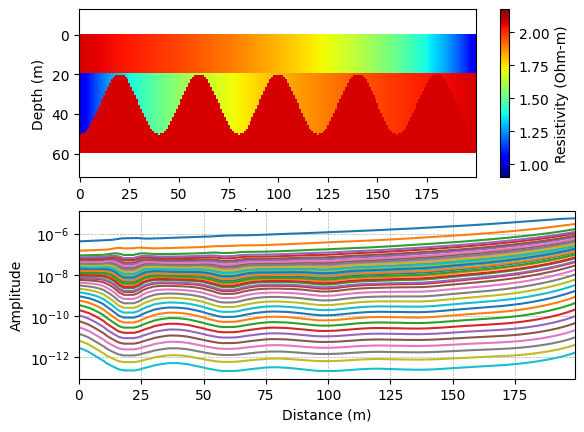

In [3]:
clim   = [min(rho)*0.8, max(rho)*1.25]

plt.subplot(2,1,1)
xx_ref, zz_ref = np.meshgrid(x_ref, z_ref)
#plt.pcolormesh(xx_ref, zz_ref, M_ref.T, cmap='jet', vmin=clim[0], vmax=clim[1])
plt.pcolormesh(xx_ref, zz_ref, np.log10(M_ref.T), cmap='jet', vmin=np.log10(clim[0]), vmax=np.log10(clim[1]))
plt.xlim([x_ref.min(), x_ref.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.axis('equal')
plt.gca().invert_yaxis()
plt.colorbar(label='Resistivity (Ohm-m)')

plt.subplot(2,1,2)
plt.semilogy(x_ref, D_ref)
plt.xlim([x_ref.min(), x_ref.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Amplitude')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)



## Create prior model and data

make prior model realizations


prior_layered:   0%|                                                                            | 0/1000000 [00:00<?, ?it/s]

prior_layered:  17%|█████████▊                                                 | 166381/1000000 [00:01<00:05, 166380.52it/s]

prior_layered:  33%|███████████████████▋                                       | 333507/1000000 [00:02<00:03, 166818.41it/s]

prior_layered:  50%|█████████████████████████████▌                             | 500326/1000000 [00:03<00:02, 166647.72it/s]

prior_layered:  67%|███████████████████████████████████████▎                   | 667333/1000000 [00:04<00:01, 166789.39it/s]

prior_layered:  83%|█████████████████████████████████████████████████▏         | 834123/1000000 [00:05<00:00, 166741.42it/s]

Using file_basename=TX07_20231016_2x4_RC20-33


prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                  | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|▏                                                                        | 55/31250 [00:01<09:33, 54.44it/s]

gatdaem1d:   0%|                                                                         | 53/31250 [00:01<09:54, 52.49it/s]

gatdaem1d:   0%|                                                                         | 53/31250 [00:01<09:55, 52.36it/s]

gatdaem1d:   0%|                                                                         | 41/31250 [00:01<12:54, 40.30it/s]

gatdaem1d:   0%|                                                                         | 39/31250 [00:01<13:23, 38.83it/s]

gatdaem1d:   0%|                                                                         | 42/31250 [00:01<12:33, 41.40it/s]

gatdaem1d:   0%|                                                                         | 36/31250 [00:01<14:46, 35.21it/s]

gatdaem1d:   0%|                                                                         | 35/31250 [00:01<14:54, 34.89it/s]

gatdaem1d:   0%|                                                                         | 39/31250 [00:01<13:39, 38.07it/s]

gatdaem1d:   0%|                                                                         | 35/31250 [00:01<14:55, 34.87it/s]

gatdaem1d:   0%|                                                                         | 36/31250 [00:01<14:42, 35.38it/s]

gatdaem1d:   0%|                                                                         | 30/31250 [00:01<17:27, 29.81it/s]

gatdaem1d:   0%|                                                                         | 36/31250 [00:01<14:49, 35.09it/s]

gatdaem1d:   0%|                                                                         | 31/31250 [00:01<16:54, 30.78it/s]

gatdaem1d:   0%|                                                                         | 50/31250 [00:01<10:33, 49.24it/s]

gatdaem1d:   0%|                                                                         | 48/31250 [00:01<10:57, 47.42it/s]

gatdaem1d:   0%|                                                                         | 47/31250 [00:01<11:18, 46.02it/s]

gatdaem1d:   0%|                                                                         | 35/31250 [00:01<15:11, 34.25it/s]

gatdaem1d:   0%|                                                                         | 33/31250 [00:01<16:01, 32.48it/s]

gatdaem1d:   0%|                                                                         | 45/31250 [00:01<11:39, 44.59it/s]

gatdaem1d:   0%|                                                                         | 34/31250 [00:01<15:30, 33.55it/s]

gatdaem1d:   0%|                                                                         | 45/31250 [00:01<11:38, 44.68it/s]

gatdaem1d:   0%|                                                                         | 35/31250 [00:01<15:04, 34.51it/s]

gatdaem1d:   0%|                                                                         | 35/31250 [00:01<15:04, 34.50it/s]

gatdaem1d:   0%|                                                                         | 47/31250 [00:01<11:12, 46.42it/s]

gatdaem1d:   0%|                                                                         | 45/31250 [00:01<11:48, 44.06it/s]

gatdaem1d:   0%|                                                                         | 47/31250 [00:01<11:16, 46.16it/s]

gatdaem1d:   0%|                                                                         | 46/31250 [00:01<11:22, 45.71it/s]

gatdaem1d:   0%|                                                                         | 31/31250 [00:01<16:48, 30.95it/s]

gatdaem1d:   0%|                                                                         | 47/31250 [00:01<11:14, 46.23it/s]

gatdaem1d:   0%|                                                                         | 41/31250 [00:01<12:45, 40.77it/s]

gatdaem1d:   0%|                                                                         | 47/31250 [00:01<11:12, 46.38it/s]

gatdaem1d:   0%|▏                                                                        | 86/31250 [00:02<12:05, 42.94it/s]

gatdaem1d:   0%|▏                                                                        | 72/31250 [00:02<14:52, 34.92it/s]

gatdaem1d:   0%|▏                                                                        | 73/31250 [00:02<14:18, 36.29it/s]

gatdaem1d:   0%|▏                                                                        | 80/31250 [00:02<12:51, 40.39it/s]

gatdaem1d:   0%|▏                                                                       | 106/31250 [00:02<10:39, 48.70it/s]

gatdaem1d:   0%|▏                                                                        | 70/31250 [00:02<15:05, 34.44it/s]

gatdaem1d:   0%|▏                                                                       | 106/31250 [00:02<10:38, 48.77it/s]

gatdaem1d:   0%|▏                                                                        | 63/31250 [00:02<16:25, 31.64it/s]

gatdaem1d:   0%|▏                                                                        | 78/31250 [00:02<14:21, 36.19it/s]

gatdaem1d:   0%|▏                                                                        | 81/31250 [00:02<12:51, 40.42it/s]

gatdaem1d:   0%|▏                                                                        | 79/31250 [00:02<12:48, 40.59it/s]

gatdaem1d:   0%|▏                                                                        | 78/31250 [00:02<14:28, 35.89it/s]

gatdaem1d:   0%|▏                                                                       | 100/31250 [00:02<10:52, 47.74it/s]

gatdaem1d:   0%|▏                                                                        | 96/31250 [00:02<11:20, 45.81it/s]

gatdaem1d:   0%|▏                                                                        | 80/31250 [00:02<12:55, 40.18it/s]

gatdaem1d:   0%|▏                                                                        | 68/31250 [00:02<15:24, 33.72it/s]

gatdaem1d:   0%|▏                                                                        | 84/31250 [00:02<14:12, 36.55it/s]

gatdaem1d:   0%|▏                                                                        | 68/31250 [00:02<15:31, 33.46it/s]

gatdaem1d:   0%|▏                                                                        | 90/31250 [00:02<11:42, 44.39it/s]

gatdaem1d:   0%|▏                                                                        | 70/31250 [00:02<15:04, 34.47it/s]

gatdaem1d:   0%|▏                                                                        | 70/31250 [00:02<15:21, 33.85it/s]

gatdaem1d:   0%|▏                                                                        | 91/31250 [00:02<11:33, 44.92it/s]

gatdaem1d:   0%|▏                                                                        | 94/31250 [00:02<11:17, 45.99it/s]

gatdaem1d:   0%|▏                                                                        | 93/31250 [00:02<11:15, 46.09it/s]

gatdaem1d:   0%|▏                                                                        | 94/31250 [00:02<11:19, 45.87it/s]

gatdaem1d:   0%|▏                                                                        | 94/31250 [00:02<11:08, 46.62it/s]

gatdaem1d:   0%|▏                                                                        | 67/31250 [00:02<15:34, 33.38it/s]

gatdaem1d:   0%|▎                                                                       | 110/31250 [00:02<12:42, 40.81it/s]

gatdaem1d:   0%|▏                                                                        | 94/31250 [00:02<13:40, 37.95it/s]

gatdaem1d:   0%|▏                                                                        | 94/31250 [00:02<11:52, 43.72it/s]

gatdaem1d:   0%|▏                                                                        | 90/31250 [00:02<14:18, 36.28it/s]

gatdaem1d:   0%|▏                                                                        | 82/31250 [00:02<14:05, 36.86it/s]

gatdaem1d:   0%|▎                                                                       | 130/31250 [00:03<12:01, 43.14it/s]

gatdaem1d:   0%|▎                                                                       | 125/31250 [00:03<12:16, 42.28it/s]

gatdaem1d:   0%|▏                                                                       | 107/31250 [00:03<15:08, 34.27it/s]

gatdaem1d:   0%|▏                                                                       | 105/31250 [00:03<15:10, 34.20it/s]

gatdaem1d:   0%|▏                                                                        | 97/31250 [00:03<16:03, 32.32it/s]

gatdaem1d:   0%|▎                                                                       | 155/31250 [00:03<10:51, 47.71it/s]

gatdaem1d:   0%|▎                                                                       | 125/31250 [00:03<12:04, 42.95it/s]

gatdaem1d:   0%|▎                                                                       | 126/31250 [00:03<12:18, 42.14it/s]

gatdaem1d:   0%|▎                                                                       | 155/31250 [00:03<10:49, 47.84it/s]

gatdaem1d:   0%|▎                                                                       | 110/31250 [00:03<14:50, 34.97it/s]

gatdaem1d:   0%|▎                                                                       | 115/31250 [00:03<14:38, 35.46it/s]

gatdaem1d:   0%|▎                                                                       | 114/31250 [00:03<14:49, 35.01it/s]

gatdaem1d:   0%|▎                                                                       | 125/31250 [00:03<12:17, 42.23it/s]

gatdaem1d:   0%|▎                                                                       | 126/31250 [00:03<13:26, 38.61it/s]

gatdaem1d:   0%|▎                                                                       | 142/31250 [00:03<11:29, 45.09it/s]

gatdaem1d:   0%|▎                                                                       | 148/31250 [00:03<11:07, 46.63it/s]

gatdaem1d:   0%|▏                                                                       | 102/31250 [00:03<15:41, 33.08it/s]

gatdaem1d:   0%|▎                                                                       | 135/31250 [00:03<11:46, 44.05it/s]

gatdaem1d:   0%|▏                                                                       | 105/31250 [00:03<14:59, 34.63it/s]

gatdaem1d:   0%|▏                                                                       | 102/31250 [00:03<15:52, 32.69it/s]

gatdaem1d:   0%|▏                                                                       | 104/31250 [00:03<15:26, 33.63it/s]

gatdaem1d:   0%|▎                                                                       | 138/31250 [00:03<11:24, 45.45it/s]

gatdaem1d:   0%|▎                                                                       | 140/31250 [00:03<11:29, 45.10it/s]

gatdaem1d:   0%|▎                                                                       | 141/31250 [00:03<11:08, 46.56it/s]

gatdaem1d:   0%|▏                                                                       | 102/31250 [00:03<15:16, 33.98it/s]

gatdaem1d:   0%|▎                                                                       | 140/31250 [00:03<11:46, 44.06it/s]

gatdaem1d:   0%|▎                                                                       | 133/31250 [00:03<13:37, 38.04it/s]

gatdaem1d:   0%|▎                                                                       | 141/31250 [00:03<11:57, 43.36it/s]

gatdaem1d:   0%|▎                                                                       | 120/31250 [00:03<14:26, 35.91it/s]

gatdaem1d:   0%|▎                                                                       | 128/31250 [00:03<14:41, 35.30it/s]

gatdaem1d:   0%|▎                                                                       | 153/31250 [00:03<13:34, 38.17it/s]

gatdaem1d:   0%|▎                                                                       | 138/31250 [00:03<13:09, 39.39it/s]

gatdaem1d:   1%|▍                                                                       | 174/31250 [00:04<11:56, 43.34it/s]

gatdaem1d:   0%|▎                                                                       | 143/31250 [00:04<14:59, 34.60it/s]

gatdaem1d:   0%|▎                                                                       | 142/31250 [00:04<13:59, 37.04it/s]

gatdaem1d:   0%|▎                                                                       | 140/31250 [00:04<15:14, 34.00it/s]

gatdaem1d:   1%|▍                                                                       | 171/31250 [00:04<12:03, 42.96it/s]

gatdaem1d:   0%|▎                                                                       | 152/31250 [00:04<13:45, 37.65it/s]

gatdaem1d:   1%|▍                                                                       | 174/31250 [00:04<11:30, 44.98it/s]

gatdaem1d:   1%|▍                                                                       | 203/31250 [00:04<10:58, 47.16it/s]

gatdaem1d:   1%|▎                                                                       | 162/31250 [00:04<13:02, 39.75it/s]

gatdaem1d:   1%|▍                                                                       | 203/31250 [00:04<10:56, 47.26it/s]

gatdaem1d:   1%|▍                                                                       | 168/31250 [00:04<12:50, 40.34it/s]

gatdaem1d:   1%|▍                                                                       | 170/31250 [00:04<11:58, 43.23it/s]

gatdaem1d:   1%|▍                                                                       | 195/31250 [00:04<11:04, 46.74it/s]

gatdaem1d:   1%|▍                                                                       | 171/31250 [00:04<12:42, 40.76it/s]

gatdaem1d:   0%|▎                                                                       | 138/31250 [00:04<15:16, 33.94it/s]

gatdaem1d:   0%|▎                                                                       | 150/31250 [00:04<15:05, 34.33it/s]

gatdaem1d:   1%|▍                                                                       | 181/31250 [00:04<11:37, 44.55it/s]

gatdaem1d:   0%|▎                                                                       | 140/31250 [00:04<15:02, 34.48it/s]

gatdaem1d:   0%|▎                                                                       | 137/31250 [00:04<15:34, 33.29it/s]

gatdaem1d:   0%|▎                                                                       | 150/31250 [00:04<13:33, 38.21it/s]

gatdaem1d:   1%|▍                                                                       | 188/31250 [00:04<11:02, 46.87it/s]

gatdaem1d:   1%|▍                                                                       | 189/31250 [00:04<11:02, 46.90it/s]

gatdaem1d:   0%|▎                                                                       | 137/31250 [00:04<15:10, 34.16it/s]

gatdaem1d:   1%|▍                                                                       | 188/31250 [00:04<12:52, 40.19it/s]

gatdaem1d:   1%|▍                                                                       | 186/31250 [00:04<12:48, 40.43it/s]

gatdaem1d:   1%|▍                                                                       | 172/31250 [00:04<14:16, 36.27it/s]

gatdaem1d:   1%|▍                                                                       | 185/31250 [00:04<13:00, 39.81it/s]

gatdaem1d:   1%|▎                                                                       | 157/31250 [00:04<14:40, 35.31it/s]

gatdaem1d:   1%|▍                                                                       | 164/31250 [00:04<15:13, 34.04it/s]

gatdaem1d:   1%|▍                                                                       | 185/31250 [00:04<13:14, 39.11it/s]

gatdaem1d:   1%|▌                                                                       | 220/31250 [00:05<11:45, 43.95it/s]

gatdaem1d:   1%|▍                                                                       | 193/31250 [00:05<14:36, 35.43it/s]

gatdaem1d:   1%|▍                                                                       | 178/31250 [00:04<13:58, 37.08it/s]

gatdaem1d:   1%|▍                                                                       | 188/31250 [00:05<13:36, 38.06it/s]

gatdaem1d:   1%|▍                                                                       | 187/31250 [00:05<13:01, 39.77it/s]

gatdaem1d:   1%|▌                                                                       | 220/31250 [00:05<11:25, 45.30it/s]

gatdaem1d:   1%|▍                                                                       | 216/31250 [00:05<11:53, 43.48it/s]

gatdaem1d:   1%|▍                                                                       | 197/31250 [00:05<12:56, 39.99it/s]

gatdaem1d:   1%|▍                                                                       | 175/31250 [00:05<15:13, 34.01it/s]

gatdaem1d:   1%|▍                                                                       | 210/31250 [00:05<12:12, 42.37it/s]

gatdaem1d:   1%|▌                                                                       | 251/31250 [00:05<11:00, 46.93it/s]

gatdaem1d:   1%|▌                                                                       | 251/31250 [00:05<11:00, 46.93it/s]

gatdaem1d:   1%|▍                                                                       | 215/31250 [00:05<11:48, 43.83it/s]

gatdaem1d:   1%|▌                                                                       | 242/31250 [00:05<11:03, 46.71it/s]

gatdaem1d:   1%|▍                                                                       | 215/31250 [00:05<12:22, 41.81it/s]

gatdaem1d:   1%|▍                                                                       | 173/31250 [00:05<15:10, 34.15it/s]

gatdaem1d:   1%|▍                                                                       | 185/31250 [00:05<15:04, 34.33it/s]

gatdaem1d:   1%|▍                                                                       | 187/31250 [00:05<13:22, 38.73it/s]

gatdaem1d:   1%|▍                                                                       | 195/31250 [00:05<12:46, 40.50it/s]

gatdaem1d:   1%|▍                                                                       | 172/31250 [00:05<15:26, 33.56it/s]

gatdaem1d:   1%|▍                                                                       | 209/31250 [00:05<13:35, 38.06it/s]

gatdaem1d:   1%|▌                                                                       | 235/31250 [00:05<11:07, 46.45it/s]

gatdaem1d:   1%|▌                                                                       | 236/31250 [00:05<11:03, 46.76it/s]

gatdaem1d:   1%|▍                                                                       | 172/31250 [00:05<15:09, 34.18it/s]

gatdaem1d:   1%|▌                                                                       | 226/31250 [00:05<12:54, 40.04it/s]

gatdaem1d:   1%|▌                                                                       | 229/31250 [00:05<13:40, 37.80it/s]

gatdaem1d:   1%|▍                                                                       | 209/31250 [00:05<14:35, 35.46it/s]

gatdaem1d:   1%|▍                                                                       | 193/31250 [00:05<14:48, 34.95it/s]

gatdaem1d:   1%|▍                                                                       | 199/31250 [00:05<15:11, 34.07it/s]

gatdaem1d:   1%|▌                                                                       | 228/31250 [00:05<13:22, 38.65it/s]

gatdaem1d:   1%|▌                                                                       | 226/31250 [00:05<13:34, 38.09it/s]

gatdaem1d:   1%|▌                                                                       | 265/31250 [00:06<11:42, 44.12it/s]

gatdaem1d:   1%|▌                                                                       | 225/31250 [00:05<13:38, 37.92it/s]

gatdaem1d:   1%|▌                                                                       | 229/31250 [00:06<14:45, 35.02it/s]

gatdaem1d:   1%|▌                                                                       | 233/31250 [00:06<12:49, 40.29it/s]

gatdaem1d:   1%|▌                                                                       | 268/31250 [00:06<11:13, 46.04it/s]

gatdaem1d:   1%|▌                                                                       | 260/31250 [00:06<11:51, 43.55it/s]

gatdaem1d:   1%|▍                                                                       | 216/31250 [00:05<14:21, 36.02it/s]

gatdaem1d:   1%|▌                                                                       | 257/31250 [00:06<11:47, 43.81it/s]

gatdaem1d:   1%|▋                                                                       | 298/31250 [00:06<11:01, 46.81it/s]

gatdaem1d:   1%|▋                                                                       | 298/31250 [00:06<11:00, 46.85it/s]

gatdaem1d:   1%|▌                                                                       | 260/31250 [00:06<11:44, 44.02it/s]

gatdaem1d:   1%|▍                                                                       | 210/31250 [00:06<15:33, 33.25it/s]

gatdaem1d:   1%|▋                                                                       | 289/31250 [00:06<11:02, 46.71it/s]

gatdaem1d:   1%|▌                                                                       | 260/31250 [00:06<12:06, 42.65it/s]

gatdaem1d:   1%|▌                                                                       | 220/31250 [00:06<13:29, 38.35it/s]

gatdaem1d:   1%|▌                                                                       | 220/31250 [00:06<15:04, 34.30it/s]

gatdaem1d:   1%|▌                                                                       | 238/31250 [00:06<13:38, 37.91it/s]

gatdaem1d:   1%|▌                                                                       | 227/31250 [00:06<13:58, 37.00it/s]

gatdaem1d:   1%|▌                                                                       | 240/31250 [00:06<12:23, 41.70it/s]

gatdaem1d:   1%|▍                                                                       | 214/31250 [00:06<14:21, 36.03it/s]

gatdaem1d:   1%|▋                                                                       | 282/31250 [00:06<11:08, 46.31it/s]

gatdaem1d:   1%|▋                                                                       | 283/31250 [00:06<11:04, 46.61it/s]

gatdaem1d:   1%|▌                                                                       | 226/31250 [00:06<13:43, 37.67it/s]

gatdaem1d:   1%|▌                                                                       | 218/31250 [00:06<13:34, 38.10it/s]

gatdaem1d:   1%|▌                                                                       | 248/31250 [00:06<14:15, 36.25it/s]

gatdaem1d:   1%|▌                                                                       | 245/31250 [00:06<14:38, 35.28it/s]

gatdaem1d:   1%|▌                                                                       | 228/31250 [00:06<15:01, 34.40it/s]

gatdaem1d:   1%|▌                                                                       | 235/31250 [00:06<15:02, 34.36it/s]

gatdaem1d:   1%|▌                                                                       | 267/31250 [00:06<14:13, 36.32it/s]

gatdaem1d:   1%|▋                                                                       | 310/31250 [00:07<11:39, 44.22it/s]

gatdaem1d:   1%|▌                                                                       | 268/31250 [00:06<13:44, 37.56it/s]

gatdaem1d:   1%|▌                                                                       | 268/31250 [00:06<14:30, 35.59it/s]

gatdaem1d:   1%|▌                                                                       | 265/31250 [00:06<13:58, 36.93it/s]

gatdaem1d:   1%|▋                                                                       | 278/31250 [00:07<12:24, 41.60it/s]

gatdaem1d:   1%|▌                                                                       | 265/31250 [00:07<14:55, 34.60it/s]

gatdaem1d:   1%|▌                                                                       | 264/31250 [00:06<14:03, 36.73it/s]

gatdaem1d:   1%|▋                                                                       | 316/31250 [00:07<11:07, 46.37it/s]

gatdaem1d:   1%|▋                                                                       | 305/31250 [00:07<11:47, 43.75it/s]

gatdaem1d:   1%|▌                                                                       | 263/31250 [00:06<13:11, 39.17it/s]

gatdaem1d:   1%|▋                                                                       | 304/31250 [00:07<11:31, 44.73it/s]

gatdaem1d:   1%|▊                                                                       | 346/31250 [00:07<10:59, 46.89it/s]

gatdaem1d:   1%|▊                                                                       | 346/31250 [00:07<10:58, 46.91it/s]

gatdaem1d:   1%|▋                                                                       | 306/31250 [00:07<11:37, 44.37it/s]

gatdaem1d:   1%|▌                                                                       | 245/31250 [00:07<15:19, 33.72it/s]

gatdaem1d:   1%|▊                                                                       | 337/31250 [00:07<10:57, 47.02it/s]

gatdaem1d:   1%|▋                                                                       | 305/31250 [00:07<11:55, 43.27it/s]

gatdaem1d:   1%|▌                                                                       | 270/31250 [00:07<12:19, 41.90it/s]

gatdaem1d:   1%|▋                                                                       | 282/31250 [00:07<12:59, 39.75it/s]

gatdaem1d:   1%|▌                                                                       | 256/31250 [00:07<14:55, 34.60it/s]

gatdaem1d:   1%|▊                                                                       | 330/31250 [00:07<11:03, 46.60it/s]

gatdaem1d:   1%|▌                                                                       | 265/31250 [00:07<14:18, 36.08it/s]

gatdaem1d:   1%|▌                                                                       | 251/31250 [00:07<14:33, 35.47it/s]

gatdaem1d:   1%|▌                                                                       | 265/31250 [00:07<12:36, 40.97it/s]

gatdaem1d:   1%|▌                                                                       | 264/31250 [00:07<14:22, 35.94it/s]

gatdaem1d:   1%|▋                                                                       | 282/31250 [00:07<13:19, 38.76it/s]

gatdaem1d:   1%|▋                                                                       | 285/31250 [00:07<15:03, 34.27it/s]

gatdaem1d:   1%|▊                                                                       | 329/31250 [00:07<12:23, 41.61it/s]

gatdaem1d:   1%|▋                                                                       | 278/31250 [00:07<13:58, 36.95it/s]

gatdaem1d:   1%|▌                                                                       | 263/31250 [00:07<15:00, 34.40it/s]

gatdaem1d:   1%|▋                                                                       | 281/31250 [00:07<15:00, 34.39it/s]

gatdaem1d:   1%|▋                                                                       | 304/31250 [00:07<14:32, 35.45it/s]

gatdaem1d:   1%|▋                                                                       | 306/31250 [00:07<14:03, 36.69it/s]

gatdaem1d:   1%|▋                                                                       | 305/31250 [00:07<14:31, 35.53it/s]

gatdaem1d:   1%|▋                                                                       | 300/31250 [00:08<14:54, 34.59it/s]

gatdaem1d:   1%|▋                                                                       | 323/31250 [00:08<12:08, 42.47it/s]

gatdaem1d:   1%|▋                                                                       | 303/31250 [00:07<14:12, 36.32it/s]

gatdaem1d:   1%|▊                                                                       | 364/31250 [00:08<11:02, 46.62it/s]

gatdaem1d:   1%|▋                                                                       | 303/31250 [00:07<13:08, 39.27it/s]

gatdaem1d:   1%|▊                                                                       | 350/31250 [00:08<11:44, 43.89it/s]

gatdaem1d:   1%|▊                                                                       | 351/31250 [00:08<11:20, 45.39it/s]

gatdaem1d:   1%|▉                                                                       | 393/31250 [00:08<10:57, 46.92it/s]

gatdaem1d:   1%|▋                                                                       | 301/31250 [00:07<14:17, 36.09it/s]

gatdaem1d:   1%|▉                                                                       | 394/31250 [00:08<10:57, 46.94it/s]

gatdaem1d:   1%|▊                                                                       | 351/31250 [00:08<11:33, 44.56it/s]

gatdaem1d:   1%|▊                                                                       | 355/31250 [00:08<12:29, 41.24it/s]

gatdaem1d:   1%|▋                                                                       | 280/31250 [00:08<15:14, 33.86it/s]

gatdaem1d:   1%|▊                                                                       | 350/31250 [00:08<11:45, 43.78it/s]

gatdaem1d:   1%|▉                                                                       | 385/31250 [00:08<10:58, 46.87it/s]

gatdaem1d:   1%|▋                                                                       | 318/31250 [00:08<11:47, 43.73it/s]

gatdaem1d:   1%|▋                                                                       | 303/31250 [00:08<13:28, 38.29it/s]

gatdaem1d:   1%|▊                                                                       | 326/31250 [00:08<12:40, 40.68it/s]

gatdaem1d:   1%|▊                                                                       | 377/31250 [00:08<11:03, 46.56it/s]

gatdaem1d:   1%|▋                                                                       | 312/31250 [00:08<12:05, 42.67it/s]

gatdaem1d:   1%|▋                                                                       | 287/31250 [00:08<14:42, 35.09it/s]

gatdaem1d:   1%|▋                                                                       | 302/31250 [00:08<14:31, 35.50it/s]

gatdaem1d:   1%|▋                                                                       | 304/31250 [00:08<13:58, 36.92it/s]

gatdaem1d:   1%|▋                                                                       | 322/31250 [00:08<13:49, 37.29it/s]

gatdaem1d:   1%|▋                                                                       | 320/31250 [00:08<15:09, 34.00it/s]

gatdaem1d:   1%|▋                                                                       | 322/31250 [00:08<13:13, 38.98it/s]

gatdaem1d:   1%|▋                                                                       | 298/31250 [00:08<15:00, 34.38it/s]

gatdaem1d:   1%|▋                                                                       | 316/31250 [00:08<15:06, 34.12it/s]

gatdaem1d:   1%|▊                                                                       | 372/31250 [00:08<13:14, 38.88it/s]

gatdaem1d:   1%|▊                                                                       | 340/31250 [00:09<14:45, 34.91it/s]

gatdaem1d:   1%|▊                                                                       | 367/31250 [00:09<11:59, 42.90it/s]

gatdaem1d:   1%|▊                                                                       | 343/31250 [00:08<14:13, 36.22it/s]

gatdaem1d:   1%|▊                                                                       | 342/31250 [00:08<13:58, 36.86it/s]

gatdaem1d:   1%|▉                                                                       | 398/31250 [00:09<11:14, 45.77it/s]

gatdaem1d:   1%|▉                                                                       | 411/31250 [00:09<11:02, 46.52it/s]

gatdaem1d:   1%|▊                                                                       | 349/31250 [00:08<12:30, 41.15it/s]

gatdaem1d:   1%|▊                                                                       | 335/31250 [00:09<15:07, 34.07it/s]

gatdaem1d:   1%|▊                                                                       | 342/31250 [00:08<14:46, 34.88it/s]

gatdaem1d:   1%|█                                                                       | 441/31250 [00:09<10:56, 46.95it/s]

gatdaem1d:   1%|█                                                                       | 440/31250 [00:09<11:03, 46.45it/s]

gatdaem1d:   1%|▉                                                                       | 396/31250 [00:09<11:31, 44.64it/s]

gatdaem1d:   1%|▉                                                                       | 394/31250 [00:09<11:57, 42.98it/s]

gatdaem1d:   1%|▊                                                                       | 338/31250 [00:08<14:27, 35.65it/s]

gatdaem1d:   1%|▋                                                                       | 314/31250 [00:09<15:12, 33.90it/s]

gatdaem1d:   1%|▉                                                                       | 432/31250 [00:09<10:58, 46.82it/s]

gatdaem1d:   1%|▉                                                                       | 394/31250 [00:09<11:50, 43.46it/s]

gatdaem1d:   1%|▊                                                                       | 350/31250 [00:09<12:35, 40.89it/s]

gatdaem1d:   1%|▊                                                                       | 362/31250 [00:09<12:06, 42.51it/s]

gatdaem1d:   1%|▉                                                                       | 424/31250 [00:09<11:02, 46.52it/s]

gatdaem1d:   1%|▉                                                                       | 397/31250 [00:09<13:11, 38.98it/s]

gatdaem1d:   1%|▊                                                                       | 359/31250 [00:09<11:43, 43.89it/s]

gatdaem1d:   1%|▊                                                                       | 367/31250 [00:09<13:17, 38.74it/s]

gatdaem1d:   1%|▋                                                                       | 323/31250 [00:09<14:48, 34.82it/s]

gatdaem1d:   1%|▊                                                                       | 350/31250 [00:09<13:03, 39.44it/s]

gatdaem1d:   1%|▊                                                                       | 338/31250 [00:09<14:58, 34.39it/s]

gatdaem1d:   1%|▊                                                                       | 366/31250 [00:09<13:09, 39.11it/s]

gatdaem1d:   1%|▊                                                                       | 355/31250 [00:09<15:04, 34.16it/s]

gatdaem1d:   1%|▊                                                                       | 345/31250 [00:09<13:31, 38.07it/s]

gatdaem1d:   1%|▊                                                                       | 351/31250 [00:09<15:00, 34.29it/s]

gatdaem1d:   1%|▊                                                                       | 362/31250 [00:09<13:50, 37.19it/s]

gatdaem1d:   1%|▉                                                                       | 385/31250 [00:10<13:38, 37.70it/s]

gatdaem1d:   1%|▉                                                                       | 412/31250 [00:10<11:51, 43.35it/s]

gatdaem1d:   1%|█                                                                       | 458/31250 [00:10<11:00, 46.60it/s]

gatdaem1d:   1%|▉                                                                       | 396/31250 [00:09<11:59, 42.85it/s]

gatdaem1d:   1%|█                                                                       | 445/31250 [00:10<11:09, 46.02it/s]

gatdaem1d:   1%|▊                                                                       | 370/31250 [00:10<15:00, 34.29it/s]

gatdaem1d:   1%|▉                                                                       | 380/31250 [00:09<14:23, 35.75it/s]

gatdaem1d:   2%|█                                                                       | 488/31250 [00:10<10:57, 46.76it/s]

gatdaem1d:   1%|█                                                                       | 441/31250 [00:10<11:30, 44.63it/s]

gatdaem1d:   1%|▉                                                                       | 412/31250 [00:09<13:49, 37.17it/s]

gatdaem1d:   1%|▊                                                                       | 378/31250 [00:10<14:50, 34.69it/s]

gatdaem1d:   1%|▊                                                                       | 350/31250 [00:10<14:55, 34.51it/s]

gatdaem1d:   1%|▊                                                                       | 379/31250 [00:09<14:22, 35.81it/s]

gatdaem1d:   1%|▉                                                                       | 385/31250 [00:09<13:16, 38.77it/s]

gatdaem1d:   1%|▉                                                                       | 397/31250 [00:10<12:04, 42.59it/s]

gatdaem1d:   2%|█                                                                       | 471/31250 [00:10<11:01, 46.52it/s]

gatdaem1d:   1%|▉                                                                       | 406/31250 [00:10<11:32, 44.55it/s]

gatdaem1d:   1%|▉                                                                       | 412/31250 [00:10<12:41, 40.51it/s]

gatdaem1d:   1%|█                                                                       | 438/31250 [00:10<12:57, 39.63it/s]

gatdaem1d:   1%|█                                                                       | 438/31250 [00:10<12:43, 40.37it/s]

gatdaem1d:   1%|▊                                                                       | 358/31250 [00:10<15:01, 34.26it/s]

gatdaem1d:   2%|█                                                                       | 487/31250 [00:10<12:21, 41.48it/s]

gatdaem1d:   1%|▉                                                                       | 397/31250 [00:10<12:21, 41.61it/s]

gatdaem1d:   1%|▉                                                                       | 405/31250 [00:10<12:52, 39.92it/s]

gatdaem1d:   1%|▉                                                                       | 382/31250 [00:10<13:51, 37.13it/s]

gatdaem1d:   1%|█                                                                       | 437/31250 [00:10<13:49, 37.15it/s]

gatdaem1d:   2%|█                                                                       | 479/31250 [00:10<12:12, 42.03it/s]

gatdaem1d:   1%|▉                                                                       | 410/31250 [00:10<12:44, 40.32it/s]

gatdaem1d:   1%|▉                                                                       | 390/31250 [00:10<15:01, 34.22it/s]

gatdaem1d:   1%|▉                                                                       | 393/31250 [00:10<12:35, 40.84it/s]

gatdaem1d:   1%|▉                                                                       | 386/31250 [00:10<15:07, 34.01it/s]

gatdaem1d:   1%|▉                                                                       | 430/31250 [00:11<12:56, 39.69it/s]

gatdaem1d:   1%|█                                                                       | 457/31250 [00:11<11:44, 43.69it/s]

gatdaem1d:   2%|█▏                                                                      | 505/31250 [00:11<10:58, 46.66it/s]

gatdaem1d:   1%|█                                                                       | 443/31250 [00:10<11:40, 43.95it/s]

gatdaem1d:   1%|▉                                                                       | 405/31250 [00:11<15:02, 34.18it/s]

gatdaem1d:   2%|█▏                                                                      | 535/31250 [00:11<10:58, 46.67it/s]

gatdaem1d:   2%|█                                                                       | 486/31250 [00:11<11:29, 44.62it/s]

gatdaem1d:   1%|▉                                                                       | 416/31250 [00:10<14:30, 35.43it/s]

gatdaem1d:   1%|▉                                                                       | 400/31250 [00:11<14:26, 35.60it/s]

gatdaem1d:   1%|▉                                                                       | 394/31250 [00:11<13:47, 37.31it/s]

gatdaem1d:   1%|▉                                                                       | 413/31250 [00:11<14:52, 34.57it/s]

gatdaem1d:   1%|▉                                                                       | 415/31250 [00:10<14:29, 35.47it/s]

gatdaem1d:   1%|█                                                                       | 444/31250 [00:11<11:42, 43.87it/s]

gatdaem1d:   1%|█                                                                       | 450/31250 [00:11<14:16, 35.95it/s]

gatdaem1d:   1%|▉                                                                       | 424/31250 [00:11<13:58, 36.76it/s]

gatdaem1d:   2%|█▏                                                                      | 518/31250 [00:11<11:10, 45.83it/s]

gatdaem1d:   1%|█                                                                       | 454/31250 [00:11<11:19, 45.35it/s]

gatdaem1d:   1%|█                                                                       | 457/31250 [00:11<12:20, 41.59it/s]

gatdaem1d:   2%|█▏                                                                      | 492/31250 [00:11<12:31, 40.90it/s]

gatdaem1d:   1%|▉                                                                       | 403/31250 [00:11<13:48, 37.23it/s]

gatdaem1d:   1%|█                                                                       | 451/31250 [00:11<12:20, 41.58it/s]

gatdaem1d:   1%|▉                                                                       | 426/31250 [00:11<13:07, 39.12it/s]

gatdaem1d:   2%|█                                                                       | 481/31250 [00:11<13:09, 39.00it/s]

gatdaem1d:   2%|█                                                                       | 479/31250 [00:11<13:29, 38.04it/s]

gatdaem1d:   2%|█                                                                       | 479/31250 [00:11<13:33, 37.83it/s]

gatdaem1d:   1%|█                                                                       | 439/31250 [00:11<13:01, 39.43it/s]

gatdaem1d:   2%|█▏                                                                      | 530/31250 [00:11<13:00, 39.34it/s]

gatdaem1d:   1%|▉                                                                       | 425/31250 [00:11<15:12, 33.80it/s]

gatdaem1d:   2%|█▏                                                                      | 522/31250 [00:11<12:55, 39.60it/s]

gatdaem1d:   1%|█                                                                       | 440/31250 [00:11<12:02, 42.65it/s]

gatdaem1d:   1%|█                                                                       | 451/31250 [00:11<13:18, 38.57it/s]

gatdaem1d:   1%|▉                                                                       | 421/31250 [00:11<15:05, 34.03it/s]

gatdaem1d:   2%|█                                                                       | 475/31250 [00:12<12:26, 41.22it/s]

gatdaem1d:   2%|█▏                                                                      | 502/31250 [00:12<11:40, 43.90it/s]

gatdaem1d:   2%|█▏                                                                      | 490/31250 [00:11<11:28, 44.65it/s]

gatdaem1d:   1%|█                                                                       | 440/31250 [00:12<14:59, 34.23it/s]

gatdaem1d:   2%|█▎                                                                      | 582/31250 [00:12<10:57, 46.67it/s]

gatdaem1d:   2%|█▏                                                                      | 531/31250 [00:12<11:29, 44.57it/s]

gatdaem1d:   1%|█                                                                       | 452/31250 [00:11<14:29, 35.42it/s]

gatdaem1d:   1%|█                                                                       | 438/31250 [00:12<13:04, 39.28it/s]

gatdaem1d:   1%|█                                                                       | 448/31250 [00:12<14:57, 34.33it/s]

gatdaem1d:   1%|█                                                                       | 436/31250 [00:12<14:36, 35.16it/s]

gatdaem1d:   1%|█                                                                       | 462/31250 [00:12<13:15, 38.70it/s]

gatdaem1d:   2%|█▏                                                                      | 492/31250 [00:12<11:25, 44.89it/s]

gatdaem1d:   2%|█▎                                                                      | 552/31250 [00:12<11:39, 43.91it/s]

gatdaem1d:   2%|█                                                                       | 487/31250 [00:12<14:26, 35.49it/s]

gatdaem1d:   2%|█▏                                                                      | 502/31250 [00:12<11:06, 46.12it/s]

gatdaem1d:   1%|█                                                                       | 462/31250 [00:12<14:07, 36.34it/s]

gatdaem1d:   2%|█▏                                                                      | 502/31250 [00:12<12:04, 42.46it/s]

gatdaem1d:   2%|█▏                                                                      | 498/31250 [00:12<11:55, 42.98it/s]

gatdaem1d:   2%|█                                                                       | 471/31250 [00:12<12:37, 40.63it/s]

gatdaem1d:   2%|█▏                                                                      | 525/31250 [00:12<12:43, 40.25it/s]

gatdaem1d:   1%|█                                                                       | 441/31250 [00:12<13:54, 36.91it/s]

gatdaem1d:   2%|█▎                                                                      | 564/31250 [00:12<12:06, 42.23it/s]

gatdaem1d:   2%|█▏                                                                      | 518/31250 [00:12<13:25, 38.14it/s]

gatdaem1d:   2%|█▏                                                                      | 534/31250 [00:12<13:09, 38.91it/s]

gatdaem1d:   1%|█                                                                       | 459/31250 [00:12<15:09, 33.84it/s]

gatdaem1d:   2%|█▏                                                                      | 518/31250 [00:12<14:10, 36.14it/s]

gatdaem1d:   2%|█                                                                       | 488/31250 [00:12<11:39, 44.00it/s]

gatdaem1d:   2%|█▏                                                                      | 495/31250 [00:12<12:46, 40.11it/s]

gatdaem1d:   2%|█                                                                       | 479/31250 [00:12<13:33, 37.83it/s]

gatdaem1d:   2%|█▎                                                                      | 571/31250 [00:13<13:34, 37.66it/s]

gatdaem1d:   1%|█                                                                       | 456/31250 [00:12<15:01, 34.17it/s]

gatdaem1d:   2%|█▎                                                                      | 563/31250 [00:13<13:36, 37.58it/s]

gatdaem1d:   2%|█▏                                                                      | 520/31250 [00:13<12:08, 42.20it/s]

gatdaem1d:   2%|█▎                                                                      | 547/31250 [00:13<11:37, 44.02it/s]

gatdaem1d:   2%|█▏                                                                      | 537/31250 [00:12<11:18, 45.27it/s]

gatdaem1d:   2%|█                                                                       | 476/31250 [00:13<14:51, 34.50it/s]

gatdaem1d:   2%|█▍                                                                      | 630/31250 [00:13<10:54, 46.80it/s]

gatdaem1d:   2%|█▎                                                                      | 576/31250 [00:13<11:31, 44.37it/s]

gatdaem1d:   2%|█                                                                       | 488/31250 [00:12<14:28, 35.43it/s]

gatdaem1d:   2%|█                                                                       | 483/31250 [00:13<12:34, 40.80it/s]

gatdaem1d:   2%|█▏                                                                      | 509/31250 [00:13<12:29, 41.04it/s]

gatdaem1d:   2%|█                                                                       | 482/31250 [00:13<13:28, 38.05it/s]

gatdaem1d:   2%|█                                                                       | 483/31250 [00:13<14:57, 34.30it/s]

gatdaem1d:   2%|█▏                                                                      | 539/31250 [00:13<11:15, 45.45it/s]

gatdaem1d:   2%|█▏                                                                      | 523/31250 [00:13<14:35, 35.12it/s]

gatdaem1d:   2%|█▎                                                                      | 549/31250 [00:13<11:03, 46.27it/s]

gatdaem1d:   2%|█▎                                                                      | 547/31250 [00:13<11:51, 43.12it/s]

gatdaem1d:   2%|█▏                                                                      | 499/31250 [00:13<14:15, 35.93it/s]

gatdaem1d:   2%|█▎                                                                      | 545/31250 [00:13<11:36, 44.07it/s]

gatdaem1d:   2%|█▎                                                                      | 570/31250 [00:13<12:17, 41.59it/s]

gatdaem1d:   2%|█▍                                                                      | 597/31250 [00:13<12:35, 40.58it/s]

gatdaem1d:   2%|█                                                                       | 478/31250 [00:13<14:27, 35.46it/s]

gatdaem1d:   2%|█▎                                                                      | 561/31250 [00:13<13:00, 39.33it/s]

gatdaem1d:   2%|█▏                                                                      | 493/31250 [00:13<15:08, 33.86it/s]

gatdaem1d:   2%|█▏                                                                      | 512/31250 [00:13<13:30, 37.94it/s]

gatdaem1d:   2%|█▏                                                                      | 535/31250 [00:13<11:25, 44.78it/s]

gatdaem1d:   2%|█▏                                                                      | 540/31250 [00:13<12:22, 41.34it/s]

gatdaem1d:   2%|█▎                                                                      | 574/31250 [00:14<13:35, 37.60it/s]

gatdaem1d:   2%|█▎                                                                      | 555/31250 [00:13<14:23, 35.55it/s]

gatdaem1d:   2%|█▍                                                                      | 607/31250 [00:13<12:54, 39.58it/s]

gatdaem1d:   2%|█▏                                                                      | 518/31250 [00:13<13:50, 37.01it/s]

gatdaem1d:   2%|█▏                                                                      | 491/31250 [00:13<15:01, 34.14it/s]

gatdaem1d:   2%|█▎                                                                      | 565/31250 [00:14<11:57, 42.76it/s]

gatdaem1d:   2%|█▍                                                                      | 610/31250 [00:14<13:48, 37.00it/s]

gatdaem1d:   2%|█▎                                                                      | 592/31250 [00:14<11:34, 44.12it/s]

gatdaem1d:   2%|█▎                                                                      | 584/31250 [00:13<11:11, 45.64it/s]

gatdaem1d:   2%|█▍                                                                      | 602/31250 [00:14<13:51, 36.85it/s]

gatdaem1d:   2%|█▌                                                                      | 678/31250 [00:14<10:52, 46.85it/s]

gatdaem1d:   2%|█▏                                                                      | 524/31250 [00:14<14:27, 35.43it/s]

gatdaem1d:   2%|█▏                                                                      | 511/31250 [00:14<14:57, 34.23it/s]

gatdaem1d:   2%|█▏                                                                      | 528/31250 [00:14<12:13, 41.89it/s]

gatdaem1d:   2%|█▎                                                                      | 555/31250 [00:14<12:03, 42.43it/s]

gatdaem1d:   2%|█▏                                                                      | 527/31250 [00:14<12:51, 39.82it/s]

gatdaem1d:   2%|█▏                                                                      | 518/31250 [00:14<14:59, 34.15it/s]

gatdaem1d:   2%|█▎                                                                      | 586/31250 [00:14<11:10, 45.74it/s]

gatdaem1d:   2%|█▎                                                                      | 570/31250 [00:14<13:18, 38.41it/s]

gatdaem1d:   2%|█▍                                                                      | 621/31250 [00:14<12:18, 41.45it/s]

gatdaem1d:   2%|█▎                                                                      | 596/31250 [00:14<11:02, 46.24it/s]

gatdaem1d:   2%|█▎                                                                      | 592/31250 [00:14<11:44, 43.54it/s]

gatdaem1d:   2%|█▎                                                                      | 592/31250 [00:14<11:23, 44.85it/s]

gatdaem1d:   2%|█▏                                                                      | 536/31250 [00:14<14:26, 35.43it/s]

gatdaem1d:   2%|█▍                                                                      | 614/31250 [00:14<12:05, 42.26it/s]

gatdaem1d:   2%|█▏                                                                      | 527/31250 [00:14<15:06, 33.90it/s]

gatdaem1d:   2%|█▏                                                                      | 514/31250 [00:14<14:43, 34.79it/s]

gatdaem1d:   2%|█▍                                                                      | 639/31250 [00:14<13:14, 38.53it/s]

gatdaem1d:   2%|█▍                                                                      | 601/31250 [00:15<13:27, 37.95it/s]

gatdaem1d:   2%|█▎                                                                      | 582/31250 [00:14<11:17, 45.27it/s]

gatdaem1d:   2%|█▍                                                                      | 622/31250 [00:15<12:41, 40.25it/s]

gatdaem1d:   2%|█▍                                                                      | 600/31250 [00:15<13:24, 38.08it/s]

gatdaem1d:   2%|█▎                                                                      | 551/31250 [00:15<14:00, 36.51it/s]

gatdaem1d:   2%|█▏                                                                      | 526/31250 [00:14<14:55, 34.32it/s]

gatdaem1d:   2%|█▍                                                                      | 609/31250 [00:15<11:51, 43.08it/s]

gatdaem1d:   2%|█▎                                                                      | 556/31250 [00:14<14:08, 36.17it/s]

gatdaem1d:   2%|█▍                                                                      | 631/31250 [00:14<11:05, 45.99it/s]

gatdaem1d:   2%|█▍                                                                      | 648/31250 [00:14<13:24, 38.02it/s]

gatdaem1d:   2%|█▎                                                                      | 582/31250 [00:15<13:16, 38.51it/s]

gatdaem1d:   2%|█▍                                                                      | 648/31250 [00:15<14:07, 36.12it/s]

gatdaem1d:   2%|█▍                                                                      | 640/31250 [00:15<13:58, 36.52it/s]

gatdaem1d:   2%|█▎                                                                      | 556/31250 [00:15<13:44, 37.24it/s]

gatdaem1d:   2%|█▎                                                                      | 573/31250 [00:15<12:00, 42.55it/s]

gatdaem1d:   2%|█▍                                                                      | 602/31250 [00:15<11:42, 43.60it/s]

gatdaem1d:   2%|█▎                                                                      | 560/31250 [00:15<14:36, 35.00it/s]

gatdaem1d:   2%|█▎                                                                      | 572/31250 [00:15<12:27, 41.05it/s]

gatdaem1d:   2%|█▎                                                                      | 563/31250 [00:15<13:46, 37.14it/s]

gatdaem1d:   2%|█▍                                                                      | 632/31250 [00:15<11:08, 45.77it/s]

gatdaem1d:   2%|█▍                                                                      | 637/31250 [00:15<12:36, 40.46it/s]

gatdaem1d:   2%|█▍                                                                      | 644/31250 [00:15<10:56, 46.63it/s]

gatdaem1d:   2%|█▋                                                                      | 725/31250 [00:15<11:57, 42.56it/s]

gatdaem1d:   2%|█▍                                                                      | 640/31250 [00:15<11:12, 45.55it/s]

gatdaem1d:   2%|█▎                                                                      | 578/31250 [00:15<13:42, 37.28it/s]

gatdaem1d:   2%|█▍                                                                      | 609/31250 [00:15<14:00, 36.45it/s]

gatdaem1d:   2%|█▍                                                                      | 636/31250 [00:15<12:22, 41.23it/s]

gatdaem1d:   2%|█▌                                                                      | 663/31250 [00:15<13:14, 38.48it/s]

gatdaem1d:   2%|█▌                                                                      | 657/31250 [00:16<12:50, 39.72it/s]

gatdaem1d:   2%|█▎                                                                      | 561/31250 [00:15<15:16, 33.47it/s]

gatdaem1d:   2%|█▌                                                                      | 686/31250 [00:15<12:33, 40.58it/s]

gatdaem1d:   2%|█▎                                                                      | 549/31250 [00:15<14:56, 34.25it/s]

gatdaem1d:   2%|█▍                                                                      | 628/31250 [00:15<11:15, 45.33it/s]

gatdaem1d:   2%|█▌                                                                      | 669/31250 [00:16<12:08, 41.97it/s]

gatdaem1d:   2%|█▍                                                                      | 640/31250 [00:16<13:36, 37.47it/s]

gatdaem1d:   2%|█▍                                                                      | 644/31250 [00:16<12:56, 39.44it/s]

gatdaem1d:   2%|█▎                                                                      | 561/31250 [00:16<14:59, 34.10it/s]

gatdaem1d:   2%|█▎                                                                      | 588/31250 [00:16<14:17, 35.77it/s]

gatdaem1d:   2%|█▌                                                                      | 678/31250 [00:15<11:02, 46.15it/s]

gatdaem1d:   2%|█▍                                                                      | 624/31250 [00:16<12:57, 39.37it/s]

gatdaem1d:   2%|█▎                                                                      | 593/31250 [00:16<14:21, 35.58it/s]

gatdaem1d:   2%|█▌                                                                      | 694/31250 [00:16<13:08, 38.75it/s]

gatdaem1d:   2%|█▌                                                                      | 687/31250 [00:16<12:58, 39.26it/s]

gatdaem1d:   2%|█▍                                                                      | 618/31250 [00:16<11:52, 42.99it/s]

gatdaem1d:   2%|█▍                                                                      | 649/31250 [00:16<11:27, 44.48it/s]

gatdaem1d:   2%|█▍                                                                      | 616/31250 [00:16<12:11, 41.86it/s]

gatdaem1d:   2%|█▌                                                                      | 653/31250 [00:16<12:31, 40.69it/s]

gatdaem1d:   2%|█▌                                                                      | 687/31250 [00:16<13:48, 36.90it/s]

gatdaem1d:   2%|█▌                                                                      | 679/31250 [00:16<11:02, 46.14it/s]

gatdaem1d:   2%|█▍                                                                      | 608/31250 [00:16<13:00, 39.28it/s]

gatdaem1d:   2%|█▎                                                                      | 596/31250 [00:16<14:40, 34.79it/s]

gatdaem1d:   2%|█▎                                                                      | 594/31250 [00:16<14:20, 35.61it/s]

gatdaem1d:   2%|█▌                                                                      | 679/31250 [00:16<12:32, 40.64it/s]

gatdaem1d:   2%|█▌                                                                      | 691/31250 [00:16<11:06, 45.88it/s]

gatdaem1d:   2%|█▌                                                                      | 687/31250 [00:16<11:06, 45.83it/s]

gatdaem1d:   2%|█▍                                                                      | 616/31250 [00:16<14:02, 36.37it/s]

gatdaem1d:   2%|█▍                                                                      | 646/31250 [00:16<14:18, 35.66it/s]

gatdaem1d:   2%|█▊                                                                      | 769/31250 [00:16<12:38, 40.17it/s]

gatdaem1d:   2%|█▋                                                                      | 733/31250 [00:16<12:01, 42.29it/s]

gatdaem1d:   2%|█▍                                                                      | 606/31250 [00:16<13:56, 36.63it/s]

gatdaem1d:   2%|█▌                                                                      | 703/31250 [00:16<13:38, 37.31it/s]

gatdaem1d:   2%|█▎                                                                      | 584/31250 [00:16<14:56, 34.22it/s]

gatdaem1d:   2%|█▌                                                                      | 675/31250 [00:16<11:09, 45.69it/s]

gatdaem1d:   2%|█▌                                                                      | 678/31250 [00:17<13:07, 38.84it/s]

gatdaem1d:   2%|█▋                                                                      | 716/31250 [00:17<11:45, 43.29it/s]

gatdaem1d:   2%|█▌                                                                      | 687/31250 [00:17<12:41, 40.12it/s]

gatdaem1d:   2%|█▌                                                                      | 698/31250 [00:17<13:30, 37.70it/s]

gatdaem1d:   2%|█▌                                                                      | 678/31250 [00:17<14:02, 36.31it/s]

gatdaem1d:   2%|█▎                                                                      | 596/31250 [00:17<14:58, 34.12it/s]

gatdaem1d:   2%|█▍                                                                      | 625/31250 [00:17<14:21, 35.54it/s]

gatdaem1d:   2%|█▋                                                                      | 725/31250 [00:16<11:00, 46.20it/s]

gatdaem1d:   2%|█▍                                                                      | 640/31250 [00:17<13:10, 38.74it/s]

gatdaem1d:   2%|█▋                                                                      | 741/31250 [00:17<12:25, 40.94it/s]

gatdaem1d:   2%|█▋                                                                      | 735/31250 [00:17<12:15, 41.50it/s]

gatdaem1d:   2%|█▌                                                                      | 662/31250 [00:17<11:50, 43.04it/s]

gatdaem1d:   2%|█▌                                                                      | 696/31250 [00:17<11:19, 44.98it/s]

gatdaem1d:   2%|█▌                                                                      | 661/31250 [00:17<11:57, 42.66it/s]

gatdaem1d:   2%|█▋                                                                      | 726/31250 [00:17<11:00, 46.24it/s]

gatdaem1d:   2%|█▌                                                                      | 654/31250 [00:17<12:26, 41.00it/s]

gatdaem1d:   2%|█▍                                                                      | 632/31250 [00:17<14:36, 34.95it/s]

gatdaem1d:   2%|█▋                                                                      | 725/31250 [00:17<13:51, 36.69it/s]

gatdaem1d:   2%|█▌                                                                      | 664/31250 [00:17<13:41, 37.23it/s]

gatdaem1d:   2%|█▍                                                                      | 638/31250 [00:17<13:27, 37.90it/s]

gatdaem1d:   2%|█▌                                                                      | 695/31250 [00:17<13:13, 38.51it/s]

gatdaem1d:   2%|█▋                                                                      | 734/31250 [00:17<11:03, 45.99it/s]

gatdaem1d:   2%|█▋                                                                      | 721/31250 [00:17<13:29, 37.73it/s]

gatdaem1d:   2%|█▌                                                                      | 653/31250 [00:17<14:14, 35.82it/s]

gatdaem1d:   2%|█▌                                                                      | 682/31250 [00:17<14:27, 35.22it/s]

gatdaem1d:   3%|█▉                                                                      | 816/31250 [00:17<12:05, 41.92it/s]

gatdaem1d:   2%|█▋                                                                      | 737/31250 [00:17<12:07, 41.95it/s]

gatdaem1d:   2%|█▊                                                                      | 781/31250 [00:17<11:37, 43.68it/s]

gatdaem1d:   2%|█▍                                                                      | 622/31250 [00:17<14:30, 35.19it/s]

gatdaem1d:   2%|█▋                                                                      | 723/31250 [00:17<11:02, 46.10it/s]

gatdaem1d:   2%|█▊                                                                      | 763/31250 [00:18<11:28, 44.31it/s]

gatdaem1d:   2%|█▋                                                                      | 741/31250 [00:17<13:56, 36.47it/s]

gatdaem1d:   2%|█▍                                                                      | 643/31250 [00:18<14:18, 35.64it/s]

gatdaem1d:   2%|█▋                                                                      | 718/31250 [00:18<13:39, 37.26it/s]

gatdaem1d:   2%|█▍                                                                      | 631/31250 [00:18<15:01, 33.98it/s]

gatdaem1d:   2%|█▌                                                                      | 670/31250 [00:18<13:20, 38.20it/s]

gatdaem1d:   2%|█▋                                                                      | 715/31250 [00:18<14:14, 35.72it/s]

gatdaem1d:   2%|█▊                                                                      | 772/31250 [00:17<10:59, 46.24it/s]

gatdaem1d:   2%|█▋                                                                      | 737/31250 [00:18<13:53, 36.61it/s]

gatdaem1d:   2%|█▌                                                                      | 688/31250 [00:18<12:21, 41.20it/s]

gatdaem1d:   2%|█▋                                                                      | 728/31250 [00:18<13:24, 37.94it/s]

gatdaem1d:   3%|█▊                                                                      | 783/31250 [00:18<11:45, 43.17it/s]

gatdaem1d:   2%|█▋                                                                      | 707/31250 [00:18<11:40, 43.57it/s]

gatdaem1d:   2%|█▋                                                                      | 745/31250 [00:18<11:03, 45.96it/s]

gatdaem1d:   3%|█▊                                                                      | 783/31250 [00:18<12:37, 40.23it/s]

gatdaem1d:   2%|█▊                                                                      | 774/31250 [00:18<10:55, 46.47it/s]

gatdaem1d:   2%|█▌                                                                      | 704/31250 [00:18<12:03, 42.19it/s]

gatdaem1d:   2%|█▌                                                                      | 699/31250 [00:18<12:07, 42.00it/s]

gatdaem1d:   2%|█▌                                                                      | 668/31250 [00:18<14:32, 35.04it/s]

gatdaem1d:   2%|█▊                                                                      | 762/31250 [00:18<14:03, 36.16it/s]

gatdaem1d:   2%|█▌                                                                      | 684/31250 [00:18<12:42, 40.08it/s]

gatdaem1d:   2%|█▌                                                                      | 702/31250 [00:18<14:19, 35.54it/s]

gatdaem1d:   2%|█▊                                                                      | 781/31250 [00:18<10:58, 46.26it/s]

gatdaem1d:   2%|█▋                                                                      | 734/31250 [00:18<13:53, 36.60it/s]

gatdaem1d:   2%|█▋                                                                      | 721/31250 [00:18<14:01, 36.26it/s]

gatdaem1d:   3%|█▉                                                                      | 862/31250 [00:19<11:46, 43.00it/s]

gatdaem1d:   2%|█▌                                                                      | 689/31250 [00:18<14:30, 35.09it/s]

gatdaem1d:   2%|█▊                                                                      | 760/31250 [00:19<13:44, 36.99it/s]

gatdaem1d:   3%|█▉                                                                      | 828/31250 [00:18<11:22, 44.58it/s]

gatdaem1d:   2%|█▌                                                                      | 658/31250 [00:18<14:32, 35.05it/s]

gatdaem1d:   3%|█▊                                                                      | 810/31250 [00:19<11:18, 44.86it/s]

gatdaem1d:   3%|█▊                                                                      | 786/31250 [00:18<13:06, 38.74it/s]

gatdaem1d:   2%|█▊                                                                      | 780/31250 [00:18<12:47, 39.70it/s]

gatdaem1d:   2%|█▌                                                                      | 679/31250 [00:19<14:44, 34.57it/s]

gatdaem1d:   2%|█▌                                                                      | 677/31250 [00:19<13:40, 37.28it/s]

gatdaem1d:   2%|█▋                                                                      | 716/31250 [00:19<12:37, 40.33it/s]

gatdaem1d:   2%|█▊                                                                      | 760/31250 [00:19<13:15, 38.32it/s]

gatdaem1d:   3%|█▉                                                                      | 820/31250 [00:18<10:53, 46.59it/s]

gatdaem1d:   2%|█▋                                                                      | 756/31250 [00:19<13:57, 36.40it/s]

gatdaem1d:   3%|█▉                                                                      | 831/31250 [00:19<11:26, 44.32it/s]

gatdaem1d:   2%|█▋                                                                      | 753/31250 [00:19<11:32, 44.01it/s]

gatdaem1d:   3%|█▉                                                                      | 829/31250 [00:19<12:06, 41.85it/s]

gatdaem1d:   3%|█▊                                                                      | 794/31250 [00:19<10:53, 46.59it/s]

gatdaem1d:   2%|█▋                                                                      | 744/31250 [00:19<11:53, 42.76it/s]

gatdaem1d:   2%|█▊                                                                      | 770/31250 [00:19<12:22, 41.07it/s]

gatdaem1d:   2%|█▋                                                                      | 730/31250 [00:19<12:49, 39.65it/s]

gatdaem1d:   2%|█▊                                                                      | 767/31250 [00:19<13:54, 36.54it/s]

gatdaem1d:   2%|█▌                                                                      | 704/31250 [00:19<14:33, 34.97it/s]

gatdaem1d:   2%|█▊                                                                      | 774/31250 [00:19<14:35, 34.83it/s]

gatdaem1d:   2%|█▋                                                                      | 729/31250 [00:19<12:16, 41.46it/s]

gatdaem1d:   3%|█▊                                                                      | 799/31250 [00:19<14:33, 34.85it/s]

gatdaem1d:   2%|█▋                                                                      | 747/31250 [00:19<12:50, 39.59it/s]

gatdaem1d:   3%|█▉                                                                      | 829/31250 [00:19<10:50, 46.78it/s]

gatdaem1d:   2%|█▋                                                                      | 738/31250 [00:19<14:53, 34.17it/s]

gatdaem1d:   3%|█▉                                                                      | 821/31250 [00:19<12:13, 41.50it/s]

gatdaem1d:   2%|█▊                                                                      | 771/31250 [00:19<14:17, 35.56it/s]

gatdaem1d:   2%|█▋                                                                      | 758/31250 [00:19<14:14, 35.67it/s]

gatdaem1d:   3%|█▊                                                                      | 805/31250 [00:20<12:58, 39.13it/s]

gatdaem1d:   3%|██                                                                      | 875/31250 [00:19<11:11, 45.25it/s]

gatdaem1d:   2%|█▋                                                                      | 725/31250 [00:19<14:36, 34.83it/s]

gatdaem1d:   3%|██                                                                      | 906/31250 [00:20<12:12, 41.42it/s]

gatdaem1d:   3%|█▉                                                                      | 857/31250 [00:20<11:09, 45.41it/s]

gatdaem1d:   2%|█▌                                                                      | 694/31250 [00:19<14:36, 34.87it/s]

gatdaem1d:   3%|█▉                                                                      | 831/31250 [00:19<12:34, 40.32it/s]

gatdaem1d:   3%|█▉                                                                      | 827/31250 [00:19<12:14, 41.44it/s]

gatdaem1d:   2%|█▋                                                                      | 715/31250 [00:20<14:37, 34.78it/s]

gatdaem1d:   3%|█▊                                                                      | 804/31250 [00:20<12:42, 39.93it/s]

gatdaem1d:   2%|█▊                                                                      | 761/31250 [00:20<12:15, 41.48it/s]

gatdaem1d:   2%|█▋                                                                      | 715/31250 [00:20<13:42, 37.11it/s]

gatdaem1d:   3%|█▉                                                                      | 867/31250 [00:19<10:53, 46.53it/s]

gatdaem1d:   3%|██                                                                      | 878/31250 [00:20<11:14, 45.01it/s]

gatdaem1d:   3%|█▊                                                                      | 798/31250 [00:20<11:27, 44.28it/s]

gatdaem1d:   3%|█▊                                                                      | 793/31250 [00:20<14:16, 35.56it/s]

gatdaem1d:   3%|█▉                                                                      | 841/31250 [00:20<10:53, 46.50it/s]

gatdaem1d:   3%|█▊                                                                      | 790/31250 [00:20<11:40, 43.48it/s]

gatdaem1d:   3%|█▊                                                                      | 804/31250 [00:20<14:01, 36.19it/s]

gatdaem1d:   2%|█▊                                                                      | 774/31250 [00:20<12:00, 42.32it/s]

gatdaem1d:   2%|█▋                                                                      | 739/31250 [00:20<14:57, 34.00it/s]

gatdaem1d:   3%|██                                                                      | 872/31250 [00:20<12:44, 39.73it/s]

gatdaem1d:   3%|█▊                                                                      | 810/31250 [00:20<14:59, 33.83it/s]

gatdaem1d:   2%|█▊                                                                      | 770/31250 [00:20<13:23, 37.91it/s]

gatdaem1d:   3%|█▉                                                                      | 847/31250 [00:20<13:11, 38.41it/s]

gatdaem1d:   3%|█▊                                                                      | 813/31250 [00:20<13:05, 38.77it/s]

gatdaem1d:   3%|██                                                                      | 876/31250 [00:20<10:55, 46.34it/s]

gatdaem1d:   3%|█▊                                                                      | 787/31250 [00:20<13:22, 37.98it/s]

gatdaem1d:   2%|█▊                                                                      | 773/31250 [00:20<14:56, 34.01it/s]

gatdaem1d:   3%|█▉                                                                      | 850/31250 [00:21<12:25, 40.75it/s]

gatdaem1d:   3%|█▊                                                                      | 794/31250 [00:20<14:18, 35.47it/s]

gatdaem1d:   2%|█▊                                                                      | 771/31250 [00:20<13:23, 37.92it/s]

gatdaem1d:   3%|█▊                                                                      | 807/31250 [00:20<14:29, 35.01it/s]

gatdaem1d:   3%|██                                                                      | 922/31250 [00:20<11:06, 45.49it/s]

gatdaem1d:   2%|█▋                                                                      | 729/31250 [00:20<14:42, 34.57it/s]

gatdaem1d:   3%|█▉                                                                      | 864/31250 [00:21<13:01, 38.87it/s]

gatdaem1d:   3%|██                                                                      | 872/31250 [00:21<12:42, 39.83it/s]

gatdaem1d:   3%|██                                                                      | 874/31250 [00:20<11:50, 42.75it/s]

gatdaem1d:   2%|█▋                                                                      | 750/31250 [00:21<14:38, 34.71it/s]

gatdaem1d:   3%|██▏                                                                     | 948/31250 [00:21<12:47, 39.50it/s]

gatdaem1d:   3%|██                                                                      | 903/31250 [00:21<11:44, 43.09it/s]

gatdaem1d:   3%|█▉                                                                      | 849/31250 [00:21<12:18, 41.15it/s]

gatdaem1d:   3%|█▊                                                                      | 805/31250 [00:21<12:04, 42.01it/s]

gatdaem1d:   3%|██                                                                      | 914/31250 [00:20<10:53, 46.42it/s]

gatdaem1d:   2%|█▋                                                                      | 753/31250 [00:21<14:01, 36.23it/s]

gatdaem1d:   3%|██▏                                                                     | 925/31250 [00:21<11:06, 45.51it/s]

gatdaem1d:   3%|█▉                                                                      | 843/31250 [00:21<11:25, 44.35it/s]

gatdaem1d:   3%|█▉                                                                      | 829/31250 [00:21<14:15, 35.55it/s]

gatdaem1d:   3%|██                                                                      | 888/31250 [00:21<10:57, 46.20it/s]

gatdaem1d:   3%|█▉                                                                      | 835/31250 [00:21<11:36, 43.68it/s]

gatdaem1d:   3%|█▉                                                                      | 818/31250 [00:21<11:52, 42.71it/s]

gatdaem1d:   2%|█▊                                                                      | 774/31250 [00:21<14:50, 34.22it/s]

gatdaem1d:   3%|█▉                                                                      | 841/31250 [00:21<14:14, 35.60it/s]

gatdaem1d:   3%|██                                                                      | 919/31250 [00:21<12:08, 41.62it/s]

gatdaem1d:   3%|█▉                                                                      | 817/31250 [00:21<12:34, 40.33it/s]

gatdaem1d:   3%|██                                                                      | 894/31250 [00:21<12:25, 40.70it/s]

gatdaem1d:   3%|█▉                                                                      | 845/31250 [00:21<15:05, 33.59it/s]

gatdaem1d:   3%|█▉                                                                      | 859/31250 [00:21<12:28, 40.61it/s]

gatdaem1d:   3%|█▊                                                                      | 808/31250 [00:21<14:54, 34.03it/s]

gatdaem1d:   3%|█▉                                                                      | 826/31250 [00:21<13:41, 37.02it/s]

gatdaem1d:   3%|██                                                                      | 893/31250 [00:22<12:14, 41.35it/s]

gatdaem1d:   3%|█▉                                                                      | 830/31250 [00:21<14:17, 35.49it/s]

gatdaem1d:   3%|█▉                                                                      | 818/31250 [00:21<12:32, 40.47it/s]

gatdaem1d:   3%|██▏                                                                     | 970/31250 [00:21<10:59, 45.94it/s]

gatdaem1d:   3%|█▉                                                                      | 843/31250 [00:21<14:34, 34.76it/s]

gatdaem1d:   3%|██▏                                                                     | 923/31250 [00:21<12:03, 41.93it/s]

gatdaem1d:   2%|█▊                                                                      | 764/31250 [00:21<14:51, 34.20it/s]

gatdaem1d:   3%|██                                                                      | 920/31250 [00:21<11:37, 43.50it/s]

gatdaem1d:   3%|██▏                                                                     | 950/31250 [00:22<11:29, 43.97it/s]

gatdaem1d:   3%|█▊                                                                      | 785/31250 [00:22<14:47, 34.34it/s]

gatdaem1d:   3%|█▉                                                                      | 849/31250 [00:22<11:54, 42.54it/s]

gatdaem1d:   3%|██                                                                      | 904/31250 [00:22<13:28, 37.52it/s]

gatdaem1d:   3%|██▏                                                                     | 961/31250 [00:21<10:59, 45.95it/s]

gatdaem1d:   3%|██                                                                      | 913/31250 [00:22<13:20, 37.88it/s]

gatdaem1d:   3%|██▎                                                                     | 988/31250 [00:22<13:10, 38.27it/s]

gatdaem1d:   3%|██▏                                                                     | 972/31250 [00:22<10:59, 45.93it/s]

gatdaem1d:   3%|██                                                                      | 872/31250 [00:22<13:30, 37.49it/s]

gatdaem1d:   3%|█▊                                                                      | 790/31250 [00:22<14:15, 35.62it/s]

gatdaem1d:   3%|██▏                                                                     | 935/31250 [00:22<10:54, 46.34it/s]

gatdaem1d:   3%|██                                                                      | 880/31250 [00:22<11:31, 43.94it/s]

gatdaem1d:   3%|██                                                                      | 891/31250 [00:22<13:06, 38.61it/s]

gatdaem1d:   3%|█▉                                                                      | 863/31250 [00:22<11:42, 43.25it/s]

gatdaem1d:   3%|█▊                                                                      | 809/31250 [00:22<14:46, 34.33it/s]

gatdaem1d:   3%|██▏                                                                     | 967/31250 [00:22<11:40, 43.20it/s]

gatdaem1d:   3%|█▉                                                                      | 865/31250 [00:22<11:58, 42.30it/s]

gatdaem1d:   3%|██                                                                      | 877/31250 [00:22<14:24, 35.12it/s]

gatdaem1d:   3%|██▏                                                                     | 941/31250 [00:22<11:56, 42.30it/s]

gatdaem1d:   3%|██                                                                      | 880/31250 [00:22<14:56, 33.87it/s]

gatdaem1d:   3%|██                                                                      | 888/31250 [00:22<12:24, 40.76it/s]

gatdaem1d:   3%|██                                                                      | 906/31250 [00:22<11:58, 42.22it/s]

gatdaem1d:   3%|█▉                                                                      | 843/31250 [00:22<14:52, 34.08it/s]

gatdaem1d:   3%|█▉                                                                      | 865/31250 [00:22<11:57, 42.34it/s]

gatdaem1d:   3%|█▉                                                                      | 866/31250 [00:22<14:23, 35.19it/s]

gatdaem1d:   3%|██▎                                                                    | 1017/31250 [00:22<10:57, 45.97it/s]

gatdaem1d:   3%|█▉                                                                      | 864/31250 [00:22<13:57, 36.27it/s]

gatdaem1d:   3%|██                                                                      | 878/31250 [00:22<14:33, 34.77it/s]

gatdaem1d:   3%|██▏                                                                     | 935/31250 [00:23<12:43, 39.70it/s]

gatdaem1d:   3%|█▊                                                                      | 799/31250 [00:22<14:48, 34.27it/s]

gatdaem1d:   3%|██▏                                                                     | 967/31250 [00:22<11:21, 44.47it/s]

gatdaem1d:   3%|█▉                                                                      | 829/31250 [00:23<13:39, 37.13it/s]

gatdaem1d:   3%|██▎                                                                     | 997/31250 [00:23<11:17, 44.67it/s]

gatdaem1d:   3%|██                                                                      | 894/31250 [00:23<11:43, 43.16it/s]

gatdaem1d:   3%|██▏                                                                     | 966/31250 [00:23<12:43, 39.65it/s]

gatdaem1d:   3%|██▎                                                                    | 1027/31250 [00:23<13:07, 38.37it/s]

gatdaem1d:   3%|██▏                                                                     | 958/31250 [00:23<12:44, 39.63it/s]

gatdaem1d:   3%|██▏                                                                     | 943/31250 [00:23<13:41, 36.90it/s]

gatdaem1d:   3%|█▉                                                                      | 827/31250 [00:23<14:05, 35.97it/s]

gatdaem1d:   3%|██▏                                                                     | 925/31250 [00:23<11:26, 44.19it/s]

gatdaem1d:   3%|██                                                                      | 910/31250 [00:23<13:53, 36.40it/s]

gatdaem1d:   3%|██                                                                      | 908/31250 [00:23<11:36, 43.56it/s]

gatdaem1d:   3%|██▏                                                                     | 931/31250 [00:23<13:13, 38.20it/s]

gatdaem1d:   3%|█▉                                                                      | 844/31250 [00:23<14:44, 34.39it/s]

gatdaem1d:   3%|██▎                                                                     | 982/31250 [00:23<11:20, 44.46it/s]

gatdaem1d:   3%|██                                                                      | 912/31250 [00:23<11:35, 43.65it/s]

gatdaem1d:   3%|██▎                                                                    | 1007/31250 [00:23<11:59, 42.04it/s]

gatdaem1d:   3%|██▎                                                                     | 988/31250 [00:23<11:33, 43.64it/s]

gatdaem1d:   3%|██▏                                                                     | 926/31250 [00:23<13:33, 37.26it/s]

gatdaem1d:   3%|██                                                                      | 913/31250 [00:23<14:35, 34.64it/s]

gatdaem1d:   3%|██▎                                                                    | 1019/31250 [00:23<12:00, 41.93it/s]

gatdaem1d:   3%|██▏                                                                     | 953/31250 [00:23<11:35, 43.53it/s]

gatdaem1d:   3%|██▎                                                                    | 1011/31250 [00:23<12:04, 41.71it/s]

gatdaem1d:   3%|██                                                                      | 878/31250 [00:23<14:50, 34.10it/s]

gatdaem1d:   3%|██▏                                                                     | 930/31250 [00:23<13:07, 38.51it/s]

gatdaem1d:   3%|██                                                                      | 912/31250 [00:23<11:36, 43.59it/s]

gatdaem1d:   3%|██▍                                                                    | 1064/31250 [00:24<10:54, 46.15it/s]

gatdaem1d:   3%|██                                                                      | 909/31250 [00:23<13:06, 38.56it/s]

gatdaem1d:   3%|██                                                                      | 902/31250 [00:23<14:27, 35.00it/s]

gatdaem1d:   3%|██                                                                      | 913/31250 [00:23<14:35, 34.66it/s]

gatdaem1d:   3%|█▉                                                                      | 834/31250 [00:24<14:46, 34.29it/s]

gatdaem1d:   3%|██▎                                                                    | 1015/31250 [00:23<11:08, 45.24it/s]

gatdaem1d:   3%|██▎                                                                    | 1045/31250 [00:24<11:03, 45.55it/s]

gatdaem1d:   3%|██                                                                      | 871/31250 [00:24<13:13, 38.28it/s]

gatdaem1d:   3%|██▏                                                                     | 939/31250 [00:24<11:37, 43.49it/s]

gatdaem1d:   3%|██▎                                                                    | 1012/31250 [00:24<12:17, 40.99it/s]

gatdaem1d:   3%|██▎                                                                    | 1002/31250 [00:24<12:21, 40.77it/s]

gatdaem1d:   3%|██▍                                                                    | 1066/31250 [00:24<13:13, 38.03it/s]

gatdaem1d:   3%|██▏                                                                     | 976/31250 [00:24<13:45, 36.67it/s]

gatdaem1d:   3%|██▎                                                                     | 981/31250 [00:24<13:52, 36.36it/s]

gatdaem1d:   3%|██▏                                                                     | 952/31250 [00:24<11:33, 43.67it/s]

gatdaem1d:   3%|█▉                                                                      | 864/31250 [00:24<14:32, 34.82it/s]

gatdaem1d:   3%|██▏                                                                     | 975/31250 [00:24<12:43, 39.66it/s]

gatdaem1d:   3%|██▏                                                                     | 947/31250 [00:24<14:04, 35.90it/s]

gatdaem1d:   3%|██                                                                      | 879/31250 [00:24<14:43, 34.39it/s]

gatdaem1d:   3%|██▏                                                                     | 970/31250 [00:24<11:53, 42.44it/s]

gatdaem1d:   3%|██▏                                                                     | 959/31250 [00:24<11:19, 44.60it/s]

gatdaem1d:   3%|██▏                                                                     | 967/31250 [00:24<13:13, 38.15it/s]

gatdaem1d:   3%|██▎                                                                     | 999/31250 [00:24<11:23, 44.24it/s]

gatdaem1d:   3%|██▍                                                                    | 1066/31250 [00:24<11:39, 43.12it/s]

gatdaem1d:   3%|██▏                                                                     | 948/31250 [00:24<14:40, 34.40it/s]

gatdaem1d:   3%|██▍                                                                    | 1050/31250 [00:24<12:40, 39.71it/s]

gatdaem1d:   3%|██▎                                                                    | 1027/31250 [00:24<12:21, 40.78it/s]

gatdaem1d:   3%|██▎                                                                    | 1032/31250 [00:24<12:30, 40.26it/s]

gatdaem1d:   3%|██▏                                                                     | 960/31250 [00:24<11:16, 44.78it/s]

gatdaem1d:   3%|██▍                                                                    | 1054/31250 [00:25<12:48, 39.30it/s]

gatdaem1d:   3%|██                                                                      | 913/31250 [00:24<15:03, 33.58it/s]

gatdaem1d:   4%|██▌                                                                    | 1111/31250 [00:25<10:50, 46.31it/s]

gatdaem1d:   3%|██▏                                                                     | 948/31250 [00:24<13:03, 38.66it/s]

gatdaem1d:   3%|██▏                                                                     | 949/31250 [00:24<13:09, 38.37it/s]

gatdaem1d:   3%|██▏                                                                     | 948/31250 [00:25<14:37, 34.52it/s]

gatdaem1d:   3%|██▏                                                                     | 970/31250 [00:25<13:48, 36.54it/s]

gatdaem1d:   3%|██                                                                      | 869/31250 [00:25<14:55, 33.91it/s]

gatdaem1d:   3%|██▍                                                                    | 1092/31250 [00:25<10:57, 45.87it/s]

gatdaem1d:   3%|██                                                                      | 916/31250 [00:25<12:38, 40.00it/s]

gatdaem1d:   3%|██▎                                                                     | 983/31250 [00:25<11:42, 43.08it/s]

gatdaem1d:   3%|██▍                                                                    | 1060/31250 [00:25<11:45, 42.77it/s]

gatdaem1d:   3%|██▍                                                                    | 1047/31250 [00:25<12:01, 41.85it/s]

gatdaem1d:   4%|██▌                                                                    | 1113/31250 [00:25<12:25, 40.41it/s]

gatdaem1d:   3%|██▎                                                                    | 1027/31250 [00:25<12:56, 38.94it/s]

gatdaem1d:   3%|██▍                                                                    | 1061/31250 [00:25<12:02, 41.80it/s]

gatdaem1d:   3%|██▎                                                                    | 1014/31250 [00:25<14:05, 35.76it/s]

gatdaem1d:   3%|██▎                                                                    | 1020/31250 [00:25<12:17, 41.01it/s]

gatdaem1d:   3%|██                                                                      | 900/31250 [00:25<14:30, 34.88it/s]

gatdaem1d:   3%|██                                                                      | 914/31250 [00:25<14:42, 34.37it/s]

gatdaem1d:   3%|██▎                                                                    | 1006/31250 [00:25<11:09, 45.20it/s]

gatdaem1d:   3%|██▎                                                                     | 984/31250 [00:25<14:14, 35.42it/s]

gatdaem1d:   3%|██▎                                                                     | 996/31250 [00:25<12:03, 41.80it/s]

gatdaem1d:   3%|██▎                                                                    | 1012/31250 [00:25<12:38, 39.87it/s]

gatdaem1d:   3%|██▎                                                                     | 993/31250 [00:25<13:28, 37.42it/s]

gatdaem1d:   3%|██▎                                                                    | 1013/31250 [00:25<12:40, 39.77it/s]

gatdaem1d:   3%|██▎                                                                    | 1044/31250 [00:25<12:06, 41.58it/s]

gatdaem1d:   4%|██▌                                                                    | 1101/31250 [00:26<12:09, 41.32it/s]

gatdaem1d:   4%|██▌                                                                    | 1110/31250 [00:25<12:29, 40.19it/s]

gatdaem1d:   3%|██▎                                                                    | 1007/31250 [00:25<11:09, 45.17it/s]

gatdaem1d:   4%|██▋                                                                    | 1158/31250 [00:26<10:49, 46.31it/s]

gatdaem1d:   3%|██▍                                                                    | 1091/31250 [00:25<13:10, 38.17it/s]

gatdaem1d:   3%|██▎                                                                     | 996/31250 [00:25<12:20, 40.85it/s]

gatdaem1d:   3%|██▏                                                                     | 947/31250 [00:25<15:16, 33.06it/s]

gatdaem1d:   3%|██▎                                                                     | 992/31250 [00:25<12:39, 39.86it/s]

gatdaem1d:   3%|██▎                                                                     | 983/31250 [00:26<14:37, 34.49it/s]

gatdaem1d:   3%|██▍                                                                    | 1069/31250 [00:25<12:52, 39.07it/s]

gatdaem1d:   3%|██▍                                                                    | 1073/31250 [00:25<13:03, 38.53it/s]

gatdaem1d:   3%|██                                                                      | 904/31250 [00:26<14:52, 33.99it/s]

gatdaem1d:   4%|██▌                                                                    | 1139/31250 [00:26<10:52, 46.15it/s]

gatdaem1d:   3%|██▎                                                                    | 1008/31250 [00:26<14:03, 35.84it/s]

gatdaem1d:   3%|██▏                                                                     | 961/31250 [00:26<12:14, 41.24it/s]

gatdaem1d:   3%|██▎                                                                    | 1027/31250 [00:26<11:38, 43.29it/s]

gatdaem1d:   4%|██▌                                                                    | 1107/31250 [00:26<11:27, 43.84it/s]

gatdaem1d:   3%|██▍                                                                    | 1092/31250 [00:26<11:48, 42.58it/s]

gatdaem1d:   4%|██▋                                                                    | 1160/31250 [00:26<11:52, 42.20it/s]

gatdaem1d:   4%|██▌                                                                    | 1108/31250 [00:26<11:38, 43.13it/s]

gatdaem1d:   3%|██▍                                                                    | 1067/31250 [00:26<13:16, 37.89it/s]

gatdaem1d:   3%|██▏                                                                     | 949/31250 [00:26<14:37, 34.53it/s]

gatdaem1d:   3%|██▏                                                                     | 935/31250 [00:26<14:35, 34.61it/s]

gatdaem1d:   3%|██▍                                                                    | 1051/31250 [00:26<14:19, 35.14it/s]

gatdaem1d:   3%|██▍                                                                    | 1062/31250 [00:26<12:30, 40.25it/s]

gatdaem1d:   3%|██▍                                                                    | 1056/31250 [00:26<12:17, 40.94it/s]

gatdaem1d:   3%|██▎                                                                    | 1020/31250 [00:26<14:25, 34.94it/s]

gatdaem1d:   3%|██▎                                                                    | 1038/31250 [00:26<12:44, 39.51it/s]

gatdaem1d:   3%|██▍                                                                    | 1052/31250 [00:26<11:42, 42.97it/s]

gatdaem1d:   3%|██▎                                                                    | 1038/31250 [00:27<12:51, 39.15it/s]

gatdaem1d:   4%|██▌                                                                    | 1148/31250 [00:27<11:44, 42.70it/s]

gatdaem1d:   3%|██▍                                                                    | 1054/31250 [00:26<11:02, 45.56it/s]

gatdaem1d:   4%|██▌                                                                    | 1138/31250 [00:26<12:24, 40.45it/s]

gatdaem1d:   3%|██▎                                                                    | 1043/31250 [00:26<11:49, 42.57it/s]

gatdaem1d:   4%|██▋                                                                    | 1205/31250 [00:27<10:50, 46.22it/s]

gatdaem1d:   3%|██▎                                                                     | 981/31250 [00:26<15:08, 33.31it/s]

gatdaem1d:   3%|██▍                                                                    | 1054/31250 [00:26<13:17, 37.88it/s]

gatdaem1d:   3%|██▎                                                                    | 1027/31250 [00:27<13:35, 37.04it/s]

gatdaem1d:   4%|██▌                                                                    | 1116/31250 [00:26<12:12, 41.12it/s]

gatdaem1d:   3%|██▍                                                                    | 1087/31250 [00:26<12:49, 39.20it/s]

gatdaem1d:   3%|██▏                                                                     | 938/31250 [00:27<14:52, 33.97it/s]

gatdaem1d:   4%|██▋                                                                    | 1187/31250 [00:27<10:46, 46.47it/s]

gatdaem1d:   4%|██▌                                                                    | 1151/31250 [00:27<13:23, 37.47it/s]

gatdaem1d:   4%|██▌                                                                    | 1113/31250 [00:27<13:30, 37.20it/s]

gatdaem1d:   3%|██▎                                                                    | 1033/31250 [00:27<13:26, 37.47it/s]

gatdaem1d:   3%|██▍                                                                    | 1072/31250 [00:27<11:31, 43.65it/s]

gatdaem1d:   3%|██▎                                                                    | 1045/31250 [00:27<14:15, 35.31it/s]

gatdaem1d:   4%|██▌                                                                    | 1155/31250 [00:27<11:11, 44.81it/s]

gatdaem1d:   4%|██▌                                                                    | 1138/31250 [00:27<11:34, 43.34it/s]

gatdaem1d:   4%|██▋                                                                    | 1207/31250 [00:27<11:30, 43.49it/s]

gatdaem1d:   3%|██▎                                                                    | 1003/31250 [00:27<12:53, 39.11it/s]

gatdaem1d:   4%|██▌                                                                    | 1155/31250 [00:27<11:22, 44.09it/s]

gatdaem1d:   3%|██▎                                                                     | 984/31250 [00:27<14:36, 34.55it/s]

gatdaem1d:   3%|██▏                                                                     | 970/31250 [00:27<14:32, 34.70it/s]

gatdaem1d:   3%|██▍                                                                    | 1087/31250 [00:27<14:19, 35.08it/s]

gatdaem1d:   4%|██▌                                                                    | 1106/31250 [00:27<13:33, 37.04it/s]

gatdaem1d:   4%|██▌                                                                    | 1103/31250 [00:27<11:49, 42.47it/s]

gatdaem1d:   3%|██▍                                                                    | 1055/31250 [00:27<14:31, 34.66it/s]

gatdaem1d:   3%|██▍                                                                    | 1083/31250 [00:27<12:17, 40.92it/s]

gatdaem1d:   4%|██▌                                                                    | 1103/31250 [00:28<13:18, 37.76it/s]

gatdaem1d:   4%|██▌                                                                    | 1101/31250 [00:27<10:57, 45.82it/s]

gatdaem1d:   4%|██▋                                                                    | 1196/31250 [00:28<11:23, 44.00it/s]

gatdaem1d:   4%|██▍                                                                    | 1096/31250 [00:27<12:21, 40.67it/s]

gatdaem1d:   4%|██▋                                                                    | 1185/31250 [00:27<11:51, 42.27it/s]

gatdaem1d:   3%|██▍                                                                    | 1090/31250 [00:27<11:29, 43.74it/s]

gatdaem1d:   3%|██▎                                                                    | 1015/31250 [00:27<15:04, 33.41it/s]

gatdaem1d:   4%|██▊                                                                    | 1252/31250 [00:28<10:48, 46.22it/s]

gatdaem1d:   3%|██▍                                                                    | 1071/31250 [00:28<12:53, 39.03it/s]

gatdaem1d:   3%|██▍                                                                    | 1093/31250 [00:27<13:21, 37.63it/s]

gatdaem1d:   3%|██▍                                                                    | 1078/31250 [00:28<13:37, 36.90it/s]

gatdaem1d:   3%|██▎                                                                     | 983/31250 [00:28<13:37, 37.04it/s]

gatdaem1d:   4%|██▋                                                                    | 1158/31250 [00:28<12:42, 39.47it/s]

gatdaem1d:   4%|██▊                                                                    | 1234/31250 [00:28<10:49, 46.19it/s]

gatdaem1d:   4%|██▌                                                                    | 1116/31250 [00:28<11:30, 43.64it/s]

gatdaem1d:   4%|██▋                                                                    | 1202/31250 [00:28<11:02, 45.37it/s]

gatdaem1d:   4%|██▌                                                                    | 1127/31250 [00:28<13:24, 37.45it/s]

gatdaem1d:   4%|██▋                                                                    | 1183/31250 [00:28<11:29, 43.60it/s]

gatdaem1d:   4%|██▋                                                                    | 1190/31250 [00:28<13:41, 36.59it/s]

gatdaem1d:   4%|██▊                                                                    | 1254/31250 [00:28<11:14, 44.45it/s]

gatdaem1d:   3%|██▍                                                                    | 1071/31250 [00:28<13:48, 36.44it/s]

gatdaem1d:   3%|██▍                                                                    | 1081/31250 [00:28<14:28, 34.72it/s]

gatdaem1d:   4%|██▌                                                                    | 1151/31250 [00:28<13:58, 35.89it/s]

gatdaem1d:   4%|██▋                                                                    | 1200/31250 [00:28<11:27, 43.69it/s]

gatdaem1d:   3%|██▎                                                                    | 1019/31250 [00:28<14:33, 34.63it/s]

gatdaem1d:   3%|██▎                                                                    | 1005/31250 [00:28<14:40, 34.34it/s]

gatdaem1d:   4%|██▌                                                                    | 1124/31250 [00:28<14:07, 35.55it/s]

gatdaem1d:   4%|██▌                                                                    | 1147/31250 [00:28<11:43, 42.80it/s]

gatdaem1d:   4%|██▌                                                                    | 1127/31250 [00:28<12:00, 41.82it/s]

gatdaem1d:   3%|██▍                                                                    | 1090/31250 [00:28<14:38, 34.35it/s]

gatdaem1d:   4%|██▌                                                                    | 1144/31250 [00:28<13:50, 36.23it/s]

gatdaem1d:   3%|██▎                                                                    | 1043/31250 [00:28<13:58, 36.01it/s]

gatdaem1d:   4%|██▌                                                                    | 1142/31250 [00:29<13:27, 37.29it/s]

gatdaem1d:   4%|██▊                                                                    | 1242/31250 [00:29<11:14, 44.48it/s]

gatdaem1d:   4%|██▌                                                                    | 1147/31250 [00:28<10:59, 45.62it/s]

gatdaem1d:   4%|██▊                                                                    | 1232/31250 [00:28<11:31, 43.40it/s]

gatdaem1d:   3%|██▍                                                                    | 1054/31250 [00:28<14:26, 34.84it/s]

gatdaem1d:   4%|██▌                                                                    | 1137/31250 [00:28<11:19, 44.31it/s]

gatdaem1d:   4%|██▌                                                                    | 1115/31250 [00:29<12:24, 40.47it/s]

gatdaem1d:   4%|██▌                                                                    | 1131/31250 [00:29<13:44, 36.54it/s]

gatdaem1d:   4%|██▌                                                                    | 1138/31250 [00:29<13:00, 38.58it/s]

gatdaem1d:   3%|██▎                                                                    | 1028/31250 [00:29<12:50, 39.21it/s]

gatdaem1d:   4%|██▌                                                                    | 1116/31250 [00:29<13:54, 36.13it/s]

gatdaem1d:   4%|██▉                                                                    | 1281/31250 [00:29<10:49, 46.12it/s]

gatdaem1d:   4%|██▉                                                                    | 1299/31250 [00:29<11:36, 42.98it/s]

gatdaem1d:   4%|██▋                                                                    | 1160/31250 [00:29<11:35, 43.28it/s]

gatdaem1d:   4%|██▊                                                                    | 1228/31250 [00:29<11:22, 43.96it/s]

gatdaem1d:   4%|██▊                                                                    | 1237/31250 [00:29<12:42, 39.35it/s]

gatdaem1d:   4%|██▉                                                                    | 1300/31250 [00:29<11:08, 44.79it/s]

gatdaem1d:   4%|██▊                                                                    | 1248/31250 [00:29<11:08, 44.91it/s]

gatdaem1d:   4%|██▌                                                                    | 1119/31250 [00:29<14:12, 35.35it/s]

gatdaem1d:   4%|██▋                                                                    | 1198/31250 [00:29<13:19, 37.61it/s]

gatdaem1d:   4%|██▋                                                                    | 1165/31250 [00:29<13:41, 36.64it/s]

gatdaem1d:   4%|██▋                                                                    | 1188/31250 [00:29<13:59, 35.81it/s]

gatdaem1d:   4%|██▌                                                                    | 1108/31250 [00:29<14:04, 35.70it/s]

gatdaem1d:   3%|██▍                                                                    | 1054/31250 [00:29<14:40, 34.28it/s]

gatdaem1d:   4%|██▋                                                                    | 1166/31250 [00:29<13:26, 37.29it/s]

gatdaem1d:   3%|██▎                                                                    | 1040/31250 [00:29<14:43, 34.19it/s]

gatdaem1d:   4%|██▋                                                                    | 1192/31250 [00:29<11:35, 43.22it/s]

gatdaem1d:   4%|██▋                                                                    | 1171/31250 [00:29<11:48, 42.44it/s]

gatdaem1d:   4%|██▌                                                                    | 1134/31250 [00:29<13:32, 37.06it/s]

gatdaem1d:   4%|██▊                                                                    | 1244/31250 [00:29<12:27, 40.16it/s]

gatdaem1d:   4%|██▋                                                                    | 1181/31250 [00:30<14:17, 35.05it/s]

gatdaem1d:   3%|██▍                                                                    | 1080/31250 [00:30<14:22, 35.00it/s]

gatdaem1d:   4%|██▋                                                                    | 1186/31250 [00:30<12:49, 39.07it/s]

gatdaem1d:   4%|██▋                                                                    | 1193/31250 [00:29<11:04, 45.20it/s]

gatdaem1d:   3%|██▍                                                                    | 1089/31250 [00:29<14:31, 34.61it/s]

gatdaem1d:   4%|██▋                                                                    | 1160/31250 [00:30<12:03, 41.60it/s]

gatdaem1d:   4%|██▋                                                                    | 1160/31250 [00:30<13:07, 38.22it/s]

gatdaem1d:   3%|██▍                                                                    | 1073/31250 [00:30<12:19, 40.82it/s]

gatdaem1d:   4%|██▉                                                                    | 1276/31250 [00:29<12:15, 40.75it/s]

gatdaem1d:   4%|███                                                                    | 1345/31250 [00:30<11:24, 43.69it/s]

gatdaem1d:   4%|██▋                                                                    | 1168/31250 [00:30<14:08, 35.47it/s]

gatdaem1d:   4%|██▉                                                                    | 1287/31250 [00:30<12:17, 40.65it/s]

gatdaem1d:   4%|██▋                                                                    | 1205/31250 [00:30<11:30, 43.54it/s]

gatdaem1d:   4%|██▋                                                                    | 1178/31250 [00:30<13:21, 37.52it/s]

gatdaem1d:   4%|██▉                                                                    | 1284/31250 [00:30<12:03, 41.40it/s]

gatdaem1d:   4%|██▉                                                                    | 1294/31250 [00:30<11:02, 45.22it/s]

gatdaem1d:   4%|██▉                                                                    | 1274/31250 [00:30<11:17, 44.27it/s]

gatdaem1d:   4%|███                                                                    | 1348/31250 [00:30<10:58, 45.44it/s]

gatdaem1d:   4%|██▋                                                                    | 1182/31250 [00:30<12:26, 40.30it/s]

gatdaem1d:   4%|██▊                                                                    | 1246/31250 [00:30<12:26, 40.21it/s]

gatdaem1d:   4%|██▌                                                                    | 1155/31250 [00:30<14:17, 35.09it/s]

gatdaem1d:   4%|██▌                                                                    | 1144/31250 [00:30<14:11, 35.36it/s]

gatdaem1d:   4%|██▊                                                                    | 1225/31250 [00:30<14:08, 35.39it/s]

gatdaem1d:   4%|██▋                                                                    | 1202/31250 [00:30<13:58, 35.84it/s]

gatdaem1d:   3%|██▍                                                                    | 1089/31250 [00:30<14:36, 34.40it/s]

gatdaem1d:   4%|██▊                                                                    | 1211/31250 [00:30<12:42, 39.41it/s]

gatdaem1d:   4%|███                                                                    | 1328/31250 [00:30<11:57, 41.72it/s]

gatdaem1d:   3%|██▍                                                                    | 1075/31250 [00:30<14:43, 34.15it/s]

gatdaem1d:   4%|██▋                                                                    | 1179/31250 [00:30<12:47, 39.18it/s]

gatdaem1d:   4%|██▉                                                                    | 1291/31250 [00:30<11:54, 41.91it/s]

gatdaem1d:   4%|██▊                                                                    | 1214/31250 [00:30<12:25, 40.29it/s]

gatdaem1d:   4%|██▊                                                                    | 1236/31250 [00:31<12:11, 41.02it/s]

gatdaem1d:   4%|██▊                                                                    | 1217/31250 [00:31<14:17, 35.02it/s]

gatdaem1d:   4%|██▌                                                                    | 1125/31250 [00:31<13:18, 37.70it/s]

gatdaem1d:   4%|██▊                                                                    | 1226/31250 [00:31<13:01, 38.41it/s]

gatdaem1d:   4%|██▌                                                                    | 1124/31250 [00:30<14:33, 34.50it/s]

gatdaem1d:   4%|██▋                                                                    | 1205/31250 [00:31<11:49, 42.33it/s]

gatdaem1d:   4%|██▌                                                                    | 1118/31250 [00:31<11:57, 41.98it/s]

gatdaem1d:   4%|██▋                                                                    | 1206/31250 [00:31<12:26, 40.26it/s]

gatdaem1d:   4%|██▊                                                                    | 1239/31250 [00:30<11:45, 42.56it/s]

gatdaem1d:   4%|███▏                                                                   | 1392/31250 [00:31<11:11, 44.48it/s]

gatdaem1d:   4%|██▊                                                                    | 1213/31250 [00:31<13:12, 37.92it/s]

gatdaem1d:   4%|███                                                                    | 1332/31250 [00:31<11:34, 43.07it/s]

gatdaem1d:   4%|███                                                                    | 1342/31250 [00:31<10:52, 45.84it/s]

gatdaem1d:   4%|██▉                                                                    | 1319/31250 [00:31<11:15, 44.31it/s]

gatdaem1d:   4%|███▏                                                                   | 1395/31250 [00:31<10:51, 45.80it/s]

gatdaem1d:   4%|██▊                                                                    | 1216/31250 [00:31<13:35, 36.81it/s]

gatdaem1d:   4%|██▉                                                                    | 1294/31250 [00:31<11:49, 42.22it/s]

gatdaem1d:   4%|██▊                                                                    | 1249/31250 [00:31<11:55, 41.93it/s]

gatdaem1d:   4%|██▋                                                                    | 1191/31250 [00:31<14:21, 34.89it/s]

gatdaem1d:   4%|███                                                                    | 1329/31250 [00:31<12:49, 38.89it/s]

gatdaem1d:   4%|██▉                                                                    | 1318/31250 [00:31<13:02, 38.27it/s]

gatdaem1d:   4%|██▋                                                                    | 1180/31250 [00:31<14:19, 34.99it/s]

gatdaem1d:   4%|██▊                                                                    | 1239/31250 [00:31<14:02, 35.64it/s]

gatdaem1d:   4%|██▊                                                                    | 1224/31250 [00:31<12:58, 38.56it/s]

gatdaem1d:   4%|██▊                                                                    | 1261/31250 [00:31<14:24, 34.67it/s]

gatdaem1d:   4%|██▊                                                                    | 1256/31250 [00:31<12:12, 40.97it/s]

gatdaem1d:   4%|██▌                                                                    | 1124/31250 [00:31<14:42, 34.13it/s]

gatdaem1d:   4%|██▊                                                                    | 1224/31250 [00:31<12:16, 40.75it/s]

gatdaem1d:   4%|██▌                                                                    | 1110/31250 [00:31<15:05, 33.29it/s]

gatdaem1d:   4%|██▊                                                                    | 1260/31250 [00:31<11:58, 41.72it/s]

gatdaem1d:   4%|██▋                                                                    | 1170/31250 [00:32<12:39, 39.61it/s]

gatdaem1d:   4%|███                                                                    | 1371/31250 [00:32<12:43, 39.14it/s]

gatdaem1d:   4%|██▉                                                                    | 1278/31250 [00:32<12:12, 40.90it/s]

gatdaem1d:   4%|██▊                                                                    | 1253/31250 [00:32<14:40, 34.07it/s]

gatdaem1d:   4%|██▋                                                                    | 1162/31250 [00:31<14:08, 35.44it/s]

gatdaem1d:   4%|██▊                                                                    | 1250/31250 [00:32<11:38, 42.96it/s]

gatdaem1d:   4%|███                                                                    | 1334/31250 [00:31<12:46, 39.04it/s]

gatdaem1d:   4%|██▊                                                                    | 1265/31250 [00:32<13:37, 36.67it/s]

gatdaem1d:   4%|██▊                                                                    | 1251/31250 [00:32<12:02, 41.52it/s]

gatdaem1d:   4%|██▋                                                                    | 1163/31250 [00:32<11:44, 42.70it/s]

gatdaem1d:   4%|██▊                                                                    | 1258/31250 [00:32<12:34, 39.77it/s]

gatdaem1d:   4%|███▏                                                                   | 1379/31250 [00:32<11:16, 44.14it/s]

gatdaem1d:   4%|███▏                                                                   | 1389/31250 [00:32<10:50, 45.88it/s]

gatdaem1d:   5%|███▎                                                                   | 1442/31250 [00:32<10:48, 45.98it/s]

gatdaem1d:   4%|███                                                                    | 1364/31250 [00:32<11:16, 44.19it/s]

gatdaem1d:   4%|██▉                                                                    | 1282/31250 [00:32<12:30, 39.92it/s]

gatdaem1d:   4%|██▊                                                                    | 1235/31250 [00:32<13:22, 37.40it/s]

gatdaem1d:   4%|██▊                                                                    | 1253/31250 [00:32<13:51, 36.07it/s]

gatdaem1d:   4%|███▏                                                                   | 1376/31250 [00:32<12:12, 40.81it/s]

gatdaem1d:   4%|███                                                                    | 1364/31250 [00:32<12:24, 40.13it/s]

gatdaem1d:   5%|███▎                                                                   | 1437/31250 [00:32<11:52, 41.84it/s]

gatdaem1d:   4%|██▉                                                                    | 1306/31250 [00:32<13:19, 37.44it/s]

gatdaem1d:   4%|██▉                                                                    | 1275/31250 [00:32<14:14, 35.07it/s]

gatdaem1d:   4%|██▊                                                                    | 1216/31250 [00:32<14:32, 34.43it/s]

gatdaem1d:   4%|██▉                                                                    | 1300/31250 [00:32<11:59, 41.61it/s]

gatdaem1d:   4%|██▋                                                                    | 1159/31250 [00:32<14:46, 33.96it/s]

gatdaem1d:   4%|███                                                                    | 1337/31250 [00:32<12:37, 39.47it/s]

gatdaem1d:   4%|██▉                                                                    | 1266/31250 [00:32<12:10, 41.02it/s]

gatdaem1d:   4%|██▊                                                                    | 1264/31250 [00:32<13:32, 36.91it/s]

gatdaem1d:   4%|██▉                                                                    | 1292/31250 [00:32<12:59, 38.42it/s]

gatdaem1d:   4%|██▌                                                                    | 1144/31250 [00:32<15:12, 33.00it/s]

gatdaem1d:   4%|██▊                                                                    | 1211/31250 [00:33<12:37, 39.67it/s]

gatdaem1d:   4%|██▉                                                                    | 1291/31250 [00:33<14:16, 34.98it/s]

gatdaem1d:   4%|██▉                                                                    | 1293/31250 [00:33<11:56, 41.82it/s]

gatdaem1d:   5%|███▏                                                                   | 1411/31250 [00:33<13:57, 35.64it/s]

gatdaem1d:   4%|██▉                                                                    | 1302/31250 [00:33<13:21, 37.37it/s]

gatdaem1d:   4%|██▋                                                                    | 1198/31250 [00:33<15:05, 33.20it/s]

gatdaem1d:   4%|██▉                                                                    | 1293/31250 [00:33<12:19, 40.52it/s]

gatdaem1d:   4%|██▋                                                                    | 1206/31250 [00:33<12:07, 41.30it/s]

gatdaem1d:   4%|██▉                                                                    | 1320/31250 [00:33<13:41, 36.44it/s]

gatdaem1d:   4%|██▉                                                                    | 1299/31250 [00:33<12:44, 39.17it/s]

gatdaem1d:   4%|███                                                                    | 1374/31250 [00:33<13:55, 35.74it/s]

gatdaem1d:   4%|██▉                                                                    | 1302/31250 [00:33<14:40, 34.02it/s]

gatdaem1d:   4%|██▉                                                                    | 1273/31250 [00:33<13:19, 37.48it/s]

gatdaem1d:   5%|███▏                                                                   | 1424/31250 [00:33<11:39, 42.62it/s]

gatdaem1d:   5%|███▎                                                                   | 1435/31250 [00:33<11:19, 43.87it/s]

gatdaem1d:   5%|███▏                                                                   | 1409/31250 [00:33<11:43, 42.39it/s]

gatdaem1d:   5%|███▏                                                                   | 1418/31250 [00:33<12:14, 40.60it/s]

gatdaem1d:   5%|███▍                                                                   | 1489/31250 [00:33<11:18, 43.86it/s]

gatdaem1d:   4%|███                                                                    | 1347/31250 [00:33<13:02, 38.20it/s]

gatdaem1d:   4%|██▊                                                                    | 1255/31250 [00:33<14:01, 35.64it/s]

gatdaem1d:   4%|██▉                                                                    | 1290/31250 [00:33<14:18, 34.89it/s]

gatdaem1d:   4%|███                                                                    | 1342/31250 [00:33<12:10, 40.93it/s]

gatdaem1d:   4%|██▉                                                                    | 1308/31250 [00:33<12:19, 40.48it/s]

gatdaem1d:   4%|██▉                                                                    | 1311/31250 [00:33<14:58, 33.32it/s]

gatdaem1d:   4%|██▋                                                                    | 1193/31250 [00:33<15:23, 32.56it/s]

gatdaem1d:   4%|███                                                                    | 1323/31250 [00:33<13:43, 36.32it/s]

gatdaem1d:   4%|███▏                                                                   | 1405/31250 [00:33<13:35, 36.58it/s]

gatdaem1d:   4%|██▊                                                                    | 1252/31250 [00:34<12:30, 39.98it/s]

gatdaem1d:   4%|██▋                                                                    | 1178/31250 [00:33<15:43, 31.87it/s]

gatdaem1d:   4%|██▉                                                                    | 1302/31250 [00:33<14:14, 35.05it/s]

gatdaem1d:   5%|███▎                                                                   | 1480/31250 [00:34<13:22, 37.09it/s]

gatdaem1d:   4%|███                                                                    | 1333/31250 [00:34<13:30, 36.93it/s]

gatdaem1d:   4%|███▏                                                                   | 1378/31250 [00:33<13:40, 36.41it/s]

gatdaem1d:   4%|███                                                                    | 1332/31250 [00:34<13:53, 35.87it/s]

gatdaem1d:   4%|███                                                                    | 1335/31250 [00:34<12:08, 41.08it/s]

gatdaem1d:   5%|███▎                                                                   | 1448/31250 [00:34<13:57, 35.57it/s]

gatdaem1d:   4%|███                                                                    | 1337/31250 [00:34<12:03, 41.35it/s]

gatdaem1d:   4%|██▊                                                                    | 1234/31250 [00:34<14:49, 33.75it/s]

gatdaem1d:   4%|██▊                                                                    | 1252/31250 [00:34<11:44, 42.56it/s]

gatdaem1d:   4%|███                                                                    | 1343/31250 [00:34<12:18, 40.47it/s]

gatdaem1d:   4%|███                                                                    | 1341/31250 [00:34<13:47, 36.15it/s]

gatdaem1d:   4%|███                                                                    | 1337/31250 [00:34<14:37, 34.07it/s]

gatdaem1d:   4%|██▉                                                                    | 1318/31250 [00:34<12:38, 39.46it/s]

gatdaem1d:   4%|███                                                                    | 1358/31250 [00:34<14:01, 35.51it/s]

gatdaem1d:   5%|███▎                                                                   | 1469/31250 [00:34<11:30, 43.15it/s]

gatdaem1d:   5%|███▏                                                                   | 1411/31250 [00:34<13:58, 35.61it/s]

gatdaem1d:   5%|███▎                                                                   | 1481/31250 [00:34<11:10, 44.41it/s]

gatdaem1d:   5%|███▎                                                                   | 1453/31250 [00:34<11:38, 42.65it/s]

gatdaem1d:   5%|███▍                                                                   | 1536/31250 [00:34<11:05, 44.62it/s]

gatdaem1d:   4%|███▏                                                                   | 1386/31250 [00:34<13:03, 38.12it/s]

gatdaem1d:   4%|██▉                                                                    | 1300/31250 [00:34<13:05, 38.15it/s]

gatdaem1d:   4%|███                                                                    | 1326/31250 [00:34<14:15, 34.97it/s]

gatdaem1d:   5%|███▎                                                                   | 1460/31250 [00:34<12:30, 39.71it/s]

gatdaem1d:   4%|███▏                                                                   | 1386/31250 [00:34<11:54, 41.77it/s]

gatdaem1d:   4%|███                                                                    | 1352/31250 [00:34<12:03, 41.35it/s]

gatdaem1d:   4%|██▊                                                                    | 1237/31250 [00:34<13:59, 35.75it/s]

gatdaem1d:   4%|██▉                                                                    | 1296/31250 [00:35<12:09, 41.05it/s]

gatdaem1d:   4%|███                                                                    | 1345/31250 [00:34<15:19, 32.53it/s]

gatdaem1d:   4%|██▊                                                                    | 1222/31250 [00:34<14:11, 35.27it/s]

gatdaem1d:   4%|███                                                                    | 1361/31250 [00:34<13:58, 35.64it/s]

gatdaem1d:   5%|███▎                                                                   | 1443/31250 [00:34<13:55, 35.69it/s]

gatdaem1d:   4%|███▏                                                                   | 1380/31250 [00:35<12:33, 39.66it/s]

gatdaem1d:   4%|███                                                                    | 1338/31250 [00:34<14:17, 34.88it/s]

gatdaem1d:   5%|███▏                                                                   | 1416/31250 [00:34<13:57, 35.61it/s]

gatdaem1d:   4%|███                                                                    | 1369/31250 [00:35<14:21, 34.67it/s]

gatdaem1d:   5%|███▍                                                                   | 1519/31250 [00:35<14:06, 35.14it/s]

gatdaem1d:   4%|███▏                                                                   | 1381/31250 [00:35<11:50, 42.07it/s]

gatdaem1d:   4%|██▉                                                                    | 1298/31250 [00:35<11:29, 43.44it/s]

gatdaem1d:   5%|███▎                                                                   | 1485/31250 [00:35<14:01, 35.37it/s]

gatdaem1d:   4%|██▉                                                                    | 1268/31250 [00:35<15:00, 33.31it/s]

gatdaem1d:   4%|███▏                                                                   | 1387/31250 [00:35<12:00, 41.48it/s]

gatdaem1d:   4%|███▏                                                                   | 1377/31250 [00:35<12:46, 38.98it/s]

gatdaem1d:   4%|███▏                                                                   | 1382/31250 [00:35<13:19, 37.36it/s]

gatdaem1d:   4%|███                                                                    | 1363/31250 [00:35<12:09, 40.97it/s]

gatdaem1d:   5%|███▎                                                                   | 1457/31250 [00:35<12:58, 38.25it/s]

gatdaem1d:   4%|███                                                                    | 1372/31250 [00:35<14:42, 33.87it/s]

gatdaem1d:   5%|███▍                                                                   | 1526/31250 [00:35<11:09, 44.39it/s]

gatdaem1d:   5%|███▍                                                                   | 1497/31250 [00:35<11:31, 43.02it/s]

gatdaem1d:   4%|███▏                                                                   | 1395/31250 [00:35<14:17, 34.83it/s]

gatdaem1d:   4%|███                                                                    | 1344/31250 [00:35<12:31, 39.79it/s]

gatdaem1d:   5%|███▍                                                                   | 1506/31250 [00:35<11:57, 41.44it/s]

gatdaem1d:   4%|███                                                                    | 1362/31250 [00:35<14:12, 35.07it/s]

gatdaem1d:   5%|███▏                                                                   | 1430/31250 [00:35<11:44, 42.35it/s]

gatdaem1d:   5%|███▏                                                                   | 1425/31250 [00:35<13:27, 36.93it/s]

gatdaem1d:   5%|███▍                                                                   | 1513/31250 [00:35<12:26, 39.86it/s]

gatdaem1d:   4%|███▏                                                                   | 1396/31250 [00:35<11:50, 42.02it/s]

gatdaem1d:   4%|██▉                                                                    | 1273/31250 [00:35<13:58, 35.77it/s]

gatdaem1d:   5%|███▌                                                                   | 1581/31250 [00:36<12:06, 40.82it/s]

gatdaem1d:   4%|███                                                                    | 1340/31250 [00:36<11:54, 41.84it/s]

gatdaem1d:   4%|███▏                                                                   | 1390/31250 [00:35<13:53, 35.81it/s]

gatdaem1d:   4%|██▊                                                                    | 1265/31250 [00:35<13:19, 37.49it/s]

gatdaem1d:   5%|███▏                                                                   | 1426/31250 [00:36<12:00, 41.40it/s]

gatdaem1d:   4%|███▏                                                                   | 1398/31250 [00:35<14:13, 34.99it/s]

gatdaem1d:   5%|███▎                                                                   | 1480/31250 [00:35<14:04, 35.24it/s]

gatdaem1d:   4%|███                                                                    | 1374/31250 [00:35<14:24, 34.55it/s]

gatdaem1d:   5%|███▎                                                                   | 1453/31250 [00:36<14:00, 35.43it/s]

gatdaem1d:   4%|███▏                                                                   | 1405/31250 [00:36<14:24, 34.54it/s]

gatdaem1d:   5%|███▏                                                                   | 1425/31250 [00:36<11:41, 42.50it/s]

gatdaem1d:   5%|███▍                                                                   | 1531/31250 [00:36<12:57, 38.24it/s]

gatdaem1d:   5%|███▌                                                                   | 1556/31250 [00:36<14:19, 34.55it/s]

gatdaem1d:   4%|██▉                                                                    | 1302/31250 [00:36<15:01, 33.22it/s]

gatdaem1d:   5%|███▏                                                                   | 1429/31250 [00:36<12:04, 41.19it/s]

gatdaem1d:   5%|███▏                                                                   | 1417/31250 [00:36<12:49, 38.77it/s]

gatdaem1d:   5%|███▏                                                                   | 1407/31250 [00:36<11:55, 41.70it/s]

gatdaem1d:   5%|███▍                                                                   | 1503/31250 [00:36<12:20, 40.15it/s]

gatdaem1d:   5%|███▌                                                                   | 1572/31250 [00:36<11:02, 44.79it/s]

gatdaem1d:   5%|███▏                                                                   | 1407/31250 [00:36<14:37, 34.01it/s]

gatdaem1d:   5%|███▌                                                                   | 1541/31250 [00:36<11:28, 43.18it/s]

gatdaem1d:   5%|███▏                                                                   | 1420/31250 [00:36<13:44, 36.18it/s]

gatdaem1d:   4%|███▏                                                                   | 1388/31250 [00:36<12:10, 40.85it/s]

gatdaem1d:   4%|███                                                                    | 1342/31250 [00:36<12:27, 40.01it/s]

gatdaem1d:   5%|███▎                                                                   | 1431/31250 [00:36<14:21, 34.63it/s]

gatdaem1d:   4%|███▏                                                                   | 1406/31250 [00:36<13:18, 37.37it/s]

gatdaem1d:   5%|███▎                                                                   | 1474/31250 [00:36<11:37, 42.68it/s]

gatdaem1d:   5%|███▎                                                                   | 1440/31250 [00:36<11:40, 42.53it/s]

gatdaem1d:   4%|██▉                                                                    | 1319/31250 [00:36<12:52, 38.74it/s]

gatdaem1d:   5%|███▌                                                                   | 1548/31250 [00:37<12:40, 39.04it/s]

gatdaem1d:   5%|███▎                                                                   | 1463/31250 [00:36<13:50, 35.85it/s]

gatdaem1d:   5%|███▋                                                                   | 1627/31250 [00:37<11:42, 42.15it/s]

gatdaem1d:   4%|███▏                                                                   | 1383/31250 [00:37<11:59, 41.51it/s]

gatdaem1d:   4%|██▉                                                                    | 1303/31250 [00:37<13:21, 37.37it/s]

gatdaem1d:   5%|███▏                                                                   | 1427/31250 [00:36<13:57, 35.62it/s]

gatdaem1d:   5%|███▌                                                                   | 1554/31250 [00:37<13:04, 37.83it/s]

gatdaem1d:   5%|███▎                                                                   | 1473/31250 [00:37<11:34, 42.90it/s]

gatdaem1d:   5%|███▏                                                                   | 1419/31250 [00:36<13:19, 37.30it/s]

gatdaem1d:   5%|███▎                                                                   | 1434/31250 [00:36<14:20, 34.66it/s]

gatdaem1d:   5%|███▍                                                                   | 1516/31250 [00:36<14:22, 34.47it/s]

gatdaem1d:   5%|███▍                                                                   | 1489/31250 [00:37<14:06, 35.17it/s]

gatdaem1d:   5%|███▎                                                                   | 1469/31250 [00:37<11:36, 42.75it/s]

gatdaem1d:   5%|███▎                                                                   | 1440/31250 [00:37<14:40, 33.85it/s]

gatdaem1d:   5%|███▌                                                                   | 1578/31250 [00:37<12:11, 40.59it/s]

gatdaem1d:   5%|███▋                                                                   | 1602/31250 [00:37<13:12, 37.41it/s]

gatdaem1d:   4%|███                                                                    | 1337/31250 [00:37<14:50, 33.61it/s]

gatdaem1d:   5%|███▎                                                                   | 1451/31250 [00:37<11:46, 42.17it/s]

gatdaem1d:   5%|███▋                                                                   | 1618/31250 [00:37<10:57, 45.09it/s]

gatdaem1d:   5%|███▌                                                                   | 1585/31250 [00:37<11:26, 43.23it/s]

gatdaem1d:   5%|███▎                                                                   | 1442/31250 [00:37<14:38, 33.93it/s]

gatdaem1d:   5%|███▎                                                                   | 1464/31250 [00:37<13:00, 38.17it/s]

gatdaem1d:   5%|███▎                                                                   | 1432/31250 [00:37<11:54, 41.74it/s]

gatdaem1d:   4%|███▏                                                                   | 1386/31250 [00:37<12:08, 40.99it/s]

gatdaem1d:   5%|███▎                                                                   | 1456/31250 [00:37<13:27, 36.89it/s]

gatdaem1d:   5%|███▎                                                                   | 1475/31250 [00:37<13:21, 37.15it/s]

gatdaem1d:   5%|███▎                                                                   | 1471/31250 [00:37<12:58, 38.23it/s]

gatdaem1d:   5%|███▍                                                                   | 1519/31250 [00:37<11:29, 43.09it/s]

gatdaem1d:   5%|███▌                                                                   | 1544/31250 [00:37<12:57, 38.21it/s]

gatdaem1d:   5%|███▎                                                                   | 1444/31250 [00:37<13:36, 36.49it/s]

gatdaem1d:   4%|███                                                                    | 1365/31250 [00:37<12:12, 40.78it/s]

gatdaem1d:   5%|███▎                                                                   | 1484/31250 [00:38<11:34, 42.83it/s]

gatdaem1d:   5%|███▍                                                                   | 1499/31250 [00:37<14:03, 35.29it/s]

gatdaem1d:   5%|███▎                                                                   | 1463/31250 [00:37<14:01, 35.41it/s]

gatdaem1d:   5%|███▋                                                                   | 1600/31250 [00:38<12:22, 39.93it/s]

gatdaem1d:   5%|███▌                                                                   | 1588/31250 [00:38<13:12, 37.43it/s]

gatdaem1d:   4%|███                                                                    | 1341/31250 [00:38<13:50, 36.03it/s]

gatdaem1d:   5%|███▎                                                                   | 1460/31250 [00:38<13:02, 38.08it/s]

gatdaem1d:   5%|███▎                                                                   | 1478/31250 [00:37<13:24, 36.99it/s]

gatdaem1d:   5%|███▌                                                                   | 1551/31250 [00:37<14:21, 34.46it/s]

gatdaem1d:   5%|███▊                                                                   | 1670/31250 [00:38<12:38, 38.98it/s]

gatdaem1d:   5%|███▏                                                                   | 1425/31250 [00:38<12:58, 38.33it/s]

gatdaem1d:   5%|███▍                                                                   | 1525/31250 [00:38<14:16, 34.71it/s]

gatdaem1d:   5%|███▍                                                                   | 1517/31250 [00:38<12:29, 39.65it/s]

gatdaem1d:   5%|███▍                                                                   | 1513/31250 [00:38<11:32, 42.91it/s]

gatdaem1d:   5%|███▋                                                                   | 1625/31250 [00:38<11:40, 42.28it/s]

gatdaem1d:   5%|███▎                                                                   | 1475/31250 [00:38<14:37, 33.95it/s]

gatdaem1d:   5%|███▋                                                                   | 1648/31250 [00:38<12:26, 39.66it/s]

gatdaem1d:   4%|███                                                                    | 1372/31250 [00:38<14:43, 33.80it/s]

gatdaem1d:   5%|███▍                                                                   | 1495/31250 [00:38<11:38, 42.60it/s]

gatdaem1d:   5%|███▊                                                                   | 1665/31250 [00:38<10:51, 45.41it/s]

gatdaem1d:   5%|███▋                                                                   | 1629/31250 [00:38<11:22, 43.41it/s]

gatdaem1d:   5%|███▍                                                                   | 1508/31250 [00:38<12:28, 39.71it/s]

gatdaem1d:   5%|███▎                                                                   | 1477/31250 [00:38<14:43, 33.71it/s]

gatdaem1d:   5%|███▎                                                                   | 1477/31250 [00:38<11:40, 42.51it/s]

gatdaem1d:   5%|███▍                                                                   | 1516/31250 [00:38<13:01, 38.04it/s]

gatdaem1d:   5%|███▏                                                                   | 1428/31250 [00:38<12:14, 40.59it/s]

gatdaem1d:   5%|███▍                                                                   | 1510/31250 [00:38<12:58, 38.21it/s]

gatdaem1d:   5%|███▍                                                                   | 1494/31250 [00:38<13:42, 36.16it/s]

gatdaem1d:   5%|███▌                                                                   | 1583/31250 [00:38<13:04, 37.83it/s]

gatdaem1d:   5%|███▏                                                                   | 1411/31250 [00:38<11:46, 42.22it/s]

gatdaem1d:   5%|███▍                                                                   | 1528/31250 [00:39<11:32, 42.94it/s]

gatdaem1d:   5%|███▎                                                                   | 1481/31250 [00:38<13:56, 35.58it/s]

gatdaem1d:   5%|███▍                                                                   | 1538/31250 [00:38<13:43, 36.09it/s]

gatdaem1d:   5%|███▍                                                                   | 1509/31250 [00:38<12:53, 38.44it/s]

gatdaem1d:   5%|███▋                                                                   | 1646/31250 [00:39<11:54, 41.45it/s]

gatdaem1d:   5%|███▌                                                                   | 1563/31250 [00:39<12:32, 39.44it/s]

gatdaem1d:   5%|███▋                                                                   | 1626/31250 [00:39<13:32, 36.47it/s]

gatdaem1d:   4%|███▏                                                                   | 1378/31250 [00:39<14:05, 35.32it/s]

gatdaem1d:   5%|███▉                                                                   | 1716/31250 [00:39<12:04, 40.74it/s]

gatdaem1d:   5%|███▌                                                                   | 1586/31250 [00:38<14:20, 34.47it/s]

gatdaem1d:   5%|███▍                                                                   | 1516/31250 [00:39<13:47, 35.95it/s]

gatdaem1d:   5%|███▍                                                                   | 1499/31250 [00:39<13:30, 36.70it/s]

gatdaem1d:   5%|███▌                                                                   | 1561/31250 [00:39<14:12, 34.84it/s]

gatdaem1d:   5%|███▌                                                                   | 1557/31250 [00:39<11:27, 43.17it/s]

gatdaem1d:   5%|███▌                                                                   | 1564/31250 [00:39<11:54, 41.53it/s]

gatdaem1d:   5%|███▎                                                                   | 1464/31250 [00:39<13:21, 37.18it/s]

gatdaem1d:   5%|███▍                                                                   | 1519/31250 [00:39<13:28, 36.76it/s]

gatdaem1d:   5%|███▊                                                                   | 1672/31250 [00:39<11:19, 43.52it/s]

gatdaem1d:   4%|███▏                                                                   | 1406/31250 [00:39<14:47, 33.64it/s]

gatdaem1d:   5%|███▊                                                                   | 1689/31250 [00:39<12:39, 38.94it/s]

gatdaem1d:   5%|███▊                                                                   | 1673/31250 [00:39<11:18, 43.57it/s]

gatdaem1d:   5%|███▉                                                                   | 1712/31250 [00:39<10:47, 45.62it/s]

gatdaem1d:   5%|███▌                                                                   | 1551/31250 [00:39<12:13, 40.46it/s]

gatdaem1d:   5%|███▍                                                                   | 1511/31250 [00:39<14:45, 33.59it/s]

gatdaem1d:   5%|███▍                                                                   | 1522/31250 [00:39<11:31, 43.01it/s]

gatdaem1d:   5%|███▌                                                                   | 1560/31250 [00:39<12:29, 39.61it/s]

gatdaem1d:   5%|███▌                                                                   | 1555/31250 [00:39<12:24, 39.90it/s]

gatdaem1d:   5%|███▍                                                                   | 1538/31250 [00:39<12:21, 40.09it/s]

gatdaem1d:   5%|███▋                                                                   | 1627/31250 [00:39<12:31, 39.40it/s]

gatdaem1d:   5%|███▎                                                                   | 1461/31250 [00:39<11:12, 44.32it/s]

gatdaem1d:   5%|███▎                                                                   | 1469/31250 [00:39<12:53, 38.50it/s]

gatdaem1d:   5%|███▍                                                                   | 1531/31250 [00:40<14:18, 34.62it/s]

gatdaem1d:   5%|███▍                                                                   | 1517/31250 [00:39<14:15, 34.75it/s]

gatdaem1d:   5%|███▌                                                                   | 1555/31250 [00:39<12:11, 40.60it/s]

gatdaem1d:   5%|███▌                                                                   | 1571/31250 [00:40<12:06, 40.85it/s]

gatdaem1d:   5%|███▌                                                                   | 1575/31250 [00:39<13:51, 35.69it/s]

gatdaem1d:   5%|███▊                                                                   | 1692/31250 [00:40<11:31, 42.73it/s]

gatdaem1d:   6%|████                                                                   | 1763/31250 [00:40<11:36, 42.31it/s]

gatdaem1d:   5%|███▏                                                                   | 1420/31250 [00:40<13:26, 36.98it/s]

gatdaem1d:   5%|███▋                                                                   | 1604/31250 [00:40<13:02, 37.90it/s]

gatdaem1d:   5%|███▊                                                                   | 1663/31250 [00:40<13:43, 35.92it/s]

gatdaem1d:   5%|███▋                                                                   | 1621/31250 [00:39<14:26, 34.19it/s]

gatdaem1d:   5%|███▍                                                                   | 1536/31250 [00:40<13:34, 36.49it/s]

gatdaem1d:   5%|███▋                                                                   | 1610/31250 [00:40<11:33, 42.73it/s]

gatdaem1d:   5%|███▌                                                                   | 1553/31250 [00:40<13:59, 35.39it/s]

gatdaem1d:   5%|███▋                                                                   | 1602/31250 [00:40<11:22, 43.43it/s]

gatdaem1d:   5%|███▋                                                                   | 1596/31250 [00:40<14:24, 34.29it/s]

gatdaem1d:   5%|███▌                                                                   | 1563/31250 [00:40<12:45, 38.78it/s]

gatdaem1d:   5%|███▍                                                                   | 1502/31250 [00:40<13:28, 36.80it/s]

gatdaem1d:   6%|███▉                                                                   | 1759/31250 [00:40<10:43, 45.83it/s]

gatdaem1d:   6%|███▉                                                                   | 1719/31250 [00:40<11:10, 44.07it/s]

gatdaem1d:   5%|███▎                                                                   | 1440/31250 [00:40<15:39, 31.73it/s]

gatdaem1d:   5%|███▌                                                                   | 1567/31250 [00:40<11:22, 43.51it/s]

gatdaem1d:   5%|███▌                                                                   | 1546/31250 [00:40<14:39, 33.76it/s]

gatdaem1d:   6%|███▉                                                                   | 1729/31250 [00:40<13:12, 37.27it/s]

gatdaem1d:   5%|███▋                                                                   | 1605/31250 [00:40<12:04, 40.91it/s]

gatdaem1d:   5%|███▋                                                                   | 1598/31250 [00:40<12:08, 40.72it/s]

gatdaem1d:   5%|███▉                                                                   | 1716/31250 [00:41<12:29, 39.40it/s]

gatdaem1d:   5%|███▊                                                                   | 1673/31250 [00:40<11:56, 41.27it/s]

gatdaem1d:   5%|███▌                                                                   | 1592/31250 [00:40<12:58, 38.10it/s]

gatdaem1d:   5%|███▍                                                                   | 1506/31250 [00:40<11:15, 44.06it/s]

gatdaem1d:   5%|███▍                                                                   | 1513/31250 [00:40<12:26, 39.83it/s]

gatdaem1d:   5%|███▌                                                                   | 1566/31250 [00:41<14:15, 34.69it/s]

gatdaem1d:   5%|███▋                                                                   | 1601/31250 [00:40<11:43, 42.15it/s]

gatdaem1d:   5%|███▌                                                                   | 1552/31250 [00:40<14:21, 34.49it/s]

gatdaem1d:   5%|███▌                                                                   | 1579/31250 [00:41<13:15, 37.28it/s]

gatdaem1d:   6%|███▉                                                                   | 1739/31250 [00:41<11:14, 43.72it/s]

gatdaem1d:   5%|███▋                                                                   | 1611/31250 [00:40<14:00, 35.26it/s]

gatdaem1d:   5%|███▎                                                                   | 1464/31250 [00:41<12:44, 38.98it/s]

gatdaem1d:   6%|████                                                                   | 1809/31250 [00:41<11:21, 43.17it/s]

gatdaem1d:   5%|███▋                                                                   | 1613/31250 [00:41<12:53, 38.30it/s]

gatdaem1d:   5%|███▊                                                                   | 1656/31250 [00:41<14:36, 33.76it/s]

gatdaem1d:   5%|███▊                                                                   | 1700/31250 [00:41<14:02, 35.05it/s]

gatdaem1d:   5%|███▋                                                                   | 1646/31250 [00:41<11:20, 43.52it/s]

gatdaem1d:   5%|███▋                                                                   | 1599/31250 [00:41<12:56, 38.21it/s]

gatdaem1d:   5%|███▋                                                                   | 1643/31250 [00:41<13:30, 36.53it/s]

gatdaem1d:   5%|███▋                                                                   | 1603/31250 [00:41<12:41, 38.92it/s]

gatdaem1d:   5%|███▌                                                                   | 1573/31250 [00:41<14:02, 35.20it/s]

gatdaem1d:   5%|███▋                                                                   | 1631/31250 [00:41<14:35, 33.84it/s]

gatdaem1d:   5%|███▊                                                                   | 1654/31250 [00:41<11:57, 41.23it/s]

gatdaem1d:   5%|███▍                                                                   | 1540/31250 [00:41<13:41, 36.15it/s]

gatdaem1d:   6%|████                                                                   | 1805/31250 [00:41<10:42, 45.82it/s]

gatdaem1d:   6%|████                                                                   | 1764/31250 [00:41<11:12, 43.87it/s]

gatdaem1d:   5%|███▌                                                                   | 1590/31250 [00:41<13:29, 36.64it/s]

gatdaem1d:   6%|████                                                                   | 1775/31250 [00:41<12:25, 39.56it/s]

gatdaem1d:   5%|███▎                                                                   | 1474/31250 [00:41<15:26, 32.14it/s]

gatdaem1d:   5%|███▋                                                                   | 1612/31250 [00:41<11:18, 43.68it/s]

gatdaem1d:   5%|███▊                                                                   | 1652/31250 [00:41<11:35, 42.53it/s]

gatdaem1d:   6%|███▉                                                                   | 1719/31250 [00:41<11:35, 42.48it/s]

gatdaem1d:   5%|███▋                                                                   | 1637/31250 [00:42<12:24, 39.79it/s]

gatdaem1d:   5%|███▌                                                                   | 1557/31250 [00:41<12:06, 40.86it/s]

gatdaem1d:   5%|███▋                                                                   | 1639/31250 [00:41<12:47, 38.56it/s]

gatdaem1d:   5%|███▋                                                                   | 1601/31250 [00:42<14:20, 34.45it/s]

gatdaem1d:   6%|███▉                                                                   | 1757/31250 [00:42<13:05, 37.56it/s]

gatdaem1d:   5%|███▋                                                                   | 1647/31250 [00:41<11:24, 43.26it/s]

gatdaem1d:   5%|███▌                                                                   | 1587/31250 [00:41<14:18, 34.54it/s]

gatdaem1d:   5%|███▋                                                                   | 1617/31250 [00:42<13:17, 37.14it/s]

gatdaem1d:   5%|███▍                                                                   | 1508/31250 [00:42<12:17, 40.34it/s]

gatdaem1d:   6%|████▏                                                                  | 1855/31250 [00:42<11:10, 43.87it/s]

gatdaem1d:   5%|███▋                                                                   | 1647/31250 [00:42<14:40, 33.64it/s]

gatdaem1d:   5%|███▌                                                                   | 1551/31250 [00:42<12:28, 39.68it/s]

gatdaem1d:   5%|███▊                                                                   | 1690/31250 [00:42<14:42, 33.48it/s]

gatdaem1d:   5%|███▊                                                                   | 1692/31250 [00:42<11:09, 44.17it/s]

gatdaem1d:   5%|███▋                                                                   | 1645/31250 [00:42<12:14, 40.30it/s]

gatdaem1d:   5%|███▊                                                                   | 1652/31250 [00:42<13:19, 37.02it/s]

gatdaem1d:   6%|███▉                                                                   | 1736/31250 [00:42<14:11, 34.67it/s]

gatdaem1d:   5%|███▊                                                                   | 1677/31250 [00:42<13:15, 37.16it/s]

gatdaem1d:   5%|███▊                                                                   | 1680/31250 [00:42<13:50, 35.63it/s]

gatdaem1d:   5%|███▋                                                                   | 1609/31250 [00:42<14:12, 34.78it/s]

gatdaem1d:   6%|████                                                                   | 1784/31250 [00:42<12:39, 38.80it/s]

gatdaem1d:   5%|███▋                                                                   | 1643/31250 [00:42<13:13, 37.30it/s]

gatdaem1d:   6%|████▏                                                                  | 1851/31250 [00:42<10:41, 45.82it/s]

gatdaem1d:   6%|████                                                                   | 1809/31250 [00:42<11:10, 43.92it/s]

gatdaem1d:   6%|████▏                                                                  | 1821/31250 [00:42<11:51, 41.36it/s]

gatdaem1d:   5%|███▍                                                                   | 1518/31250 [00:42<13:57, 35.51it/s]

gatdaem1d:   5%|███▌                                                                   | 1577/31250 [00:42<14:09, 34.93it/s]

gatdaem1d:   5%|███▊                                                                   | 1696/31250 [00:42<12:30, 39.38it/s]

gatdaem1d:   5%|███▋                                                                   | 1628/31250 [00:42<13:20, 37.00it/s]

gatdaem1d:   5%|███▊                                                                   | 1695/31250 [00:42<11:34, 42.57it/s]

gatdaem1d:   6%|████                                                                   | 1765/31250 [00:42<11:19, 43.42it/s]

gatdaem1d:   5%|███▊                                                                   | 1682/31250 [00:43<11:58, 41.16it/s]

gatdaem1d:   5%|███▊                                                                   | 1683/31250 [00:42<12:18, 40.05it/s]

gatdaem1d:   5%|███▋                                                                   | 1636/31250 [00:43<14:18, 34.49it/s]

gatdaem1d:   6%|████                                                                   | 1802/31250 [00:43<12:24, 39.53it/s]

gatdaem1d:   5%|███▋                                                                   | 1622/31250 [00:42<14:16, 34.57it/s]

gatdaem1d:   5%|███▊                                                                   | 1693/31250 [00:42<11:15, 43.79it/s]

gatdaem1d:   5%|███▊                                                                   | 1656/31250 [00:43<12:25, 39.70it/s]

gatdaem1d:   5%|███▊                                                                   | 1661/31250 [00:43<12:40, 38.91it/s]

gatdaem1d:   5%|███▋                                                                   | 1599/31250 [00:43<12:50, 38.46it/s]

gatdaem1d:   5%|███▌                                                                   | 1550/31250 [00:43<12:07, 40.81it/s]

gatdaem1d:   5%|███▊                                                                   | 1684/31250 [00:43<14:22, 34.29it/s]

gatdaem1d:   6%|███▉                                                                   | 1724/31250 [00:43<14:38, 33.62it/s]

gatdaem1d:   6%|███▉                                                                   | 1737/31250 [00:43<11:09, 44.10it/s]

gatdaem1d:   5%|███▊                                                                   | 1692/31250 [00:43<11:43, 42.00it/s]

gatdaem1d:   5%|███▌                                                                   | 1592/31250 [00:43<12:59, 38.04it/s]

gatdaem1d:   6%|████                                                                   | 1771/31250 [00:43<14:20, 34.28it/s]

gatdaem1d:   6%|███▉                                                                   | 1724/31250 [00:43<12:21, 39.82it/s]

gatdaem1d:   5%|███▊                                                                   | 1690/31250 [00:43<13:36, 36.21it/s]

gatdaem1d:   5%|███▋                                                                   | 1644/31250 [00:43<14:13, 34.69it/s]

gatdaem1d:   6%|████▎                                                                  | 1900/31250 [00:43<12:00, 40.73it/s]

gatdaem1d:   5%|███▉                                                                   | 1716/31250 [00:43<14:01, 35.08it/s]

gatdaem1d:   6%|████▎                                                                  | 1897/31250 [00:43<10:44, 45.54it/s]

gatdaem1d:   6%|████▏                                                                  | 1853/31250 [00:43<11:13, 43.66it/s]

gatdaem1d:   5%|███▌                                                                   | 1562/31250 [00:43<13:03, 37.91it/s]

gatdaem1d:   6%|████▏                                                                  | 1868/31250 [00:43<11:26, 42.83it/s]

gatdaem1d:   6%|███▉                                                                   | 1742/31250 [00:43<11:56, 41.16it/s]

gatdaem1d:   6%|████▏                                                                  | 1825/31250 [00:43<13:03, 37.54it/s]

gatdaem1d:   5%|███▋                                                                   | 1613/31250 [00:43<14:14, 34.68it/s]

gatdaem1d:   5%|███▊                                                                   | 1681/31250 [00:43<13:46, 35.77it/s]

gatdaem1d:   6%|████                                                                   | 1811/31250 [00:43<11:06, 44.17it/s]

gatdaem1d:   5%|███▊                                                                   | 1666/31250 [00:44<14:20, 34.40it/s]

gatdaem1d:   6%|███▉                                                                   | 1724/31250 [00:43<12:22, 39.77it/s]

gatdaem1d:   6%|████▏                                                                  | 1846/31250 [00:44<12:05, 40.54it/s]

gatdaem1d:   6%|███▉                                                                   | 1739/31250 [00:43<11:05, 44.37it/s]

gatdaem1d:   5%|███▊                                                                   | 1657/31250 [00:43<14:17, 34.49it/s]

gatdaem1d:   5%|███▊                                                                   | 1702/31250 [00:44<11:55, 41.30it/s]

gatdaem1d:   6%|███▉                                                                   | 1738/31250 [00:44<12:41, 38.78it/s]

gatdaem1d:   6%|███▉                                                                   | 1724/31250 [00:44<12:31, 39.29it/s]

gatdaem1d:   5%|███▊                                                                   | 1671/31250 [00:44<14:36, 33.73it/s]

gatdaem1d:   5%|███▉                                                                   | 1706/31250 [00:44<12:11, 40.40it/s]

gatdaem1d:   5%|███▌                                                                   | 1594/31250 [00:44<11:51, 41.70it/s]

gatdaem1d:   6%|███▉                                                                   | 1719/31250 [00:44<14:27, 34.06it/s]

gatdaem1d:   6%|███▉                                                                   | 1758/31250 [00:44<14:46, 33.28it/s]

gatdaem1d:   6%|████                                                                   | 1782/31250 [00:44<11:07, 44.14it/s]

gatdaem1d:   5%|███▋                                                                   | 1638/31250 [00:44<13:38, 36.17it/s]

gatdaem1d:   6%|███▉                                                                   | 1738/31250 [00:44<11:27, 42.91it/s]

gatdaem1d:   5%|███▋                                                                   | 1638/31250 [00:44<12:17, 40.17it/s]

gatdaem1d:   6%|████                                                                   | 1806/31250 [00:44<14:19, 34.25it/s]

gatdaem1d:   6%|████                                                                   | 1771/31250 [00:44<11:46, 41.70it/s]

gatdaem1d:   5%|███▊                                                                   | 1679/31250 [00:44<14:11, 34.73it/s]

gatdaem1d:   6%|████▍                                                                  | 1947/31250 [00:44<11:31, 42.38it/s]

gatdaem1d:   6%|███▉                                                                   | 1727/31250 [00:44<13:49, 35.61it/s]

gatdaem1d:   6%|███▉                                                                   | 1752/31250 [00:44<14:10, 34.70it/s]

gatdaem1d:   6%|████▍                                                                  | 1944/31250 [00:44<10:41, 45.70it/s]

gatdaem1d:   6%|████▎                                                                  | 1897/31250 [00:44<11:13, 43.55it/s]

gatdaem1d:   6%|████▎                                                                  | 1914/31250 [00:44<11:11, 43.72it/s]

gatdaem1d:   5%|███▋                                                                   | 1606/31250 [00:44<12:29, 39.57it/s]

gatdaem1d:   6%|████                                                                   | 1788/31250 [00:44<11:35, 42.35it/s]

gatdaem1d:   5%|███▋                                                                   | 1648/31250 [00:44<14:18, 34.46it/s]

gatdaem1d:   6%|████▏                                                                  | 1864/31250 [00:44<13:20, 36.72it/s]

gatdaem1d:   5%|███▉                                                                   | 1718/31250 [00:45<14:22, 34.25it/s]

gatdaem1d:   5%|███▉                                                                   | 1710/31250 [00:45<13:17, 37.05it/s]

gatdaem1d:   6%|███▉                                                                   | 1746/31250 [00:45<11:42, 42.02it/s]

gatdaem1d:   6%|████                                                                   | 1784/31250 [00:44<11:05, 44.27it/s]

gatdaem1d:   6%|████▏                                                                  | 1856/31250 [00:44<11:51, 41.33it/s]

gatdaem1d:   6%|███▉                                                                   | 1751/31250 [00:45<11:50, 41.50it/s]

gatdaem1d:   5%|███▊                                                                   | 1705/31250 [00:45<14:59, 32.86it/s]

gatdaem1d:   6%|████▎                                                                  | 1888/31250 [00:45<12:38, 38.72it/s]

gatdaem1d:   6%|████                                                                   | 1765/31250 [00:45<13:01, 37.71it/s]

gatdaem1d:   5%|███▊                                                                   | 1692/31250 [00:45<14:56, 32.98it/s]

gatdaem1d:   6%|████                                                                   | 1778/31250 [00:45<13:12, 37.21it/s]

gatdaem1d:   5%|███▋                                                                   | 1637/31250 [00:45<11:45, 41.99it/s]

gatdaem1d:   6%|████                                                                   | 1764/31250 [00:45<13:09, 37.32it/s]

gatdaem1d:   6%|████                                                                   | 1765/31250 [00:45<13:11, 37.27it/s]

gatdaem1d:   6%|████                                                                   | 1793/31250 [00:45<14:32, 33.77it/s]

gatdaem1d:   6%|████                                                                   | 1784/31250 [00:45<11:15, 43.64it/s]

gatdaem1d:   5%|███▊                                                                   | 1684/31250 [00:45<11:49, 41.66it/s]

gatdaem1d:   6%|████▏                                                                  | 1852/31250 [00:45<13:04, 37.47it/s]

gatdaem1d:   6%|████▏                                                                  | 1816/31250 [00:45<11:32, 42.49it/s]

gatdaem1d:   5%|███▊                                                                   | 1675/31250 [00:45<14:01, 35.16it/s]

gatdaem1d:   6%|████▌                                                                  | 1993/31250 [00:45<11:15, 43.30it/s]

gatdaem1d:   5%|███▉                                                                   | 1714/31250 [00:45<14:13, 34.62it/s]

gatdaem1d:   6%|████                                                                   | 1763/31250 [00:45<13:55, 35.30it/s]

gatdaem1d:   6%|████▍                                                                  | 1941/31250 [00:45<11:12, 43.59it/s]

gatdaem1d:   6%|████                                                                   | 1787/31250 [00:45<14:19, 34.28it/s]

gatdaem1d:   6%|████▍                                                                  | 1960/31250 [00:45<11:00, 44.37it/s]

gatdaem1d:   5%|███▋                                                                   | 1650/31250 [00:45<12:09, 40.60it/s]

gatdaem1d:   6%|████▏                                                                  | 1834/31250 [00:45<11:19, 43.28it/s]

gatdaem1d:   6%|████▏                                                                  | 1827/31250 [00:46<12:19, 39.77it/s]

gatdaem1d:   5%|███▊                                                                   | 1683/31250 [00:45<14:24, 34.19it/s]

gatdaem1d:   6%|████▌                                                                  | 1990/31250 [00:45<11:26, 42.62it/s]

gatdaem1d:   6%|████▎                                                                  | 1902/31250 [00:46<13:35, 35.97it/s]

gatdaem1d:   6%|████                                                                   | 1762/31250 [00:46<13:21, 36.80it/s]

gatdaem1d:   6%|███▉                                                                   | 1750/31250 [00:46<13:00, 37.81it/s]

gatdaem1d:   6%|████                                                                   | 1789/31250 [00:46<11:39, 42.12it/s]

gatdaem1d:   6%|████▏                                                                  | 1830/31250 [00:45<10:59, 44.62it/s]

gatdaem1d:   6%|████                                                                   | 1795/31250 [00:46<11:38, 42.19it/s]

gatdaem1d:   6%|███▉                                                                   | 1739/31250 [00:46<14:55, 32.97it/s]

gatdaem1d:   6%|███▉                                                                   | 1727/31250 [00:46<14:41, 33.51it/s]

gatdaem1d:   5%|███▊                                                                   | 1681/31250 [00:46<11:35, 42.51it/s]

gatdaem1d:   6%|████▎                                                                  | 1898/31250 [00:46<12:39, 38.64it/s]

gatdaem1d:   6%|████                                                                   | 1804/31250 [00:46<13:25, 36.56it/s]

gatdaem1d:   6%|████▏                                                                  | 1816/31250 [00:46<13:31, 36.27it/s]

gatdaem1d:   6%|████▍                                                                  | 1928/31250 [00:46<13:04, 37.35it/s]

gatdaem1d:   6%|████                                                                   | 1812/31250 [00:46<12:18, 39.84it/s]

gatdaem1d:   6%|████                                                                   | 1802/31250 [00:46<13:34, 36.14it/s]

gatdaem1d:   6%|████▏                                                                  | 1827/31250 [00:46<14:38, 33.50it/s]

gatdaem1d:   6%|████▏                                                                  | 1830/31250 [00:46<11:06, 44.13it/s]

gatdaem1d:   6%|████▎                                                                  | 1898/31250 [00:46<12:15, 39.90it/s]

gatdaem1d:   6%|████▏                                                                  | 1862/31250 [00:46<11:17, 43.37it/s]

gatdaem1d:   7%|████▋                                                                  | 2039/31250 [00:46<11:03, 44.02it/s]

gatdaem1d:   6%|███▉                                                                   | 1719/31250 [00:46<13:08, 37.44it/s]

gatdaem1d:   6%|███▉                                                                   | 1759/31250 [00:46<13:07, 37.47it/s]

gatdaem1d:   6%|████▌                                                                  | 1986/31250 [00:46<11:07, 43.86it/s]

gatdaem1d:   5%|███▊                                                                   | 1694/31250 [00:46<11:51, 41.51it/s]

gatdaem1d:   6%|████▎                                                                  | 1882/31250 [00:46<11:01, 44.41it/s]

gatdaem1d:   6%|███▉                                                                   | 1727/31250 [00:46<12:35, 39.07it/s]

gatdaem1d:   6%|████▏                                                                  | 1822/31250 [00:47<14:32, 33.73it/s]

gatdaem1d:   6%|████▌                                                                  | 2005/31250 [00:46<11:11, 43.57it/s]

gatdaem1d:   6%|████                                                                   | 1799/31250 [00:46<14:24, 34.06it/s]

gatdaem1d:   5%|███▉                                                                   | 1718/31250 [00:47<14:24, 34.16it/s]

gatdaem1d:   6%|████                                                                   | 1806/31250 [00:47<12:42, 38.61it/s]

gatdaem1d:   6%|████▏                                                                  | 1868/31250 [00:47<12:53, 37.97it/s]

gatdaem1d:   6%|████▍                                                                  | 1939/31250 [00:47<13:45, 35.52it/s]

gatdaem1d:   6%|████▏                                                                  | 1833/31250 [00:47<11:29, 42.65it/s]

gatdaem1d:   6%|████                                                                   | 1789/31250 [00:47<13:25, 36.56it/s]

gatdaem1d:   6%|████▏                                                                  | 1839/31250 [00:47<11:32, 42.45it/s]

gatdaem1d:   7%|████▌                                                                  | 2034/31250 [00:47<12:08, 40.10it/s]

gatdaem1d:   6%|████                                                                   | 1773/31250 [00:47<14:47, 33.21it/s]

gatdaem1d:   6%|███▉                                                                   | 1724/31250 [00:47<11:33, 42.60it/s]

gatdaem1d:   6%|████                                                                   | 1761/31250 [00:47<14:48, 33.20it/s]

gatdaem1d:   6%|████▍                                                                  | 1945/31250 [00:47<11:56, 40.89it/s]

gatdaem1d:   6%|████▏                                                                  | 1846/31250 [00:47<12:55, 37.90it/s]

gatdaem1d:   6%|████▏                                                                  | 1859/31250 [00:47<11:45, 41.67it/s]

gatdaem1d:   6%|████▏                                                                  | 1862/31250 [00:47<14:29, 33.81it/s]

gatdaem1d:   6%|████▏                                                                  | 1853/31250 [00:47<13:46, 35.55it/s]

gatdaem1d:   6%|████▎                                                                  | 1875/31250 [00:47<11:04, 44.18it/s]

gatdaem1d:   6%|████▍                                                                  | 1966/31250 [00:47<13:24, 36.41it/s]

gatdaem1d:   6%|████▎                                                                  | 1875/31250 [00:47<12:22, 39.55it/s]

gatdaem1d:   6%|████▏                                                                  | 1839/31250 [00:47<13:53, 35.27it/s]

gatdaem1d:   6%|████▍                                                                  | 1943/31250 [00:47<11:53, 41.09it/s]

gatdaem1d:   7%|████▋                                                                  | 2085/31250 [00:47<10:55, 44.48it/s]

gatdaem1d:   6%|████                                                                   | 1806/31250 [00:47<12:13, 40.15it/s]

gatdaem1d:   6%|████▎                                                                  | 1906/31250 [00:47<11:42, 41.78it/s]

gatdaem1d:   6%|████▌                                                                  | 2031/31250 [00:47<11:01, 44.19it/s]

gatdaem1d:   6%|███▉                                                                   | 1737/31250 [00:47<11:43, 41.95it/s]

gatdaem1d:   6%|████▍                                                                  | 1929/31250 [00:47<10:52, 44.91it/s]

gatdaem1d:   7%|████▋                                                                  | 2051/31250 [00:47<11:03, 44.01it/s]

gatdaem1d:   6%|███▉                                                                   | 1757/31250 [00:47<13:56, 35.25it/s]

gatdaem1d:   6%|████▏                                                                  | 1856/31250 [00:48<14:40, 33.38it/s]

gatdaem1d:   6%|████▏                                                                  | 1834/31250 [00:48<14:24, 34.03it/s]

gatdaem1d:   6%|███▉                                                                   | 1753/31250 [00:48<14:19, 34.33it/s]

gatdaem1d:   6%|████                                                                   | 1767/31250 [00:47<13:07, 37.42it/s]

gatdaem1d:   6%|████▏                                                                  | 1849/31250 [00:48<12:17, 39.85it/s]

gatdaem1d:   6%|████▎                                                                  | 1877/31250 [00:48<11:22, 43.03it/s]

gatdaem1d:   6%|████▍                                                                  | 1975/31250 [00:48<14:05, 34.63it/s]

gatdaem1d:   6%|████▎                                                                  | 1907/31250 [00:48<13:18, 36.73it/s]

gatdaem1d:   6%|████▏                                                                  | 1817/31250 [00:48<13:32, 36.21it/s]

gatdaem1d:   6%|████▏                                                                  | 1826/31250 [00:48<13:41, 35.81it/s]

gatdaem1d:   6%|████                                                                   | 1796/31250 [00:48<14:33, 33.71it/s]

gatdaem1d:   6%|████▎                                                                  | 1882/31250 [00:48<11:59, 40.81it/s]

gatdaem1d:   6%|████▌                                                                  | 1991/31250 [00:48<11:31, 42.29it/s]

gatdaem1d:   7%|████▋                                                                  | 2075/31250 [00:48<12:42, 38.25it/s]

gatdaem1d:   6%|████▎                                                                  | 1890/31250 [00:48<12:21, 39.62it/s]

gatdaem1d:   6%|████▎                                                                  | 1897/31250 [00:48<12:57, 37.75it/s]

gatdaem1d:   6%|████▎                                                                  | 1897/31250 [00:48<14:25, 33.91it/s]

gatdaem1d:   6%|████▎                                                                  | 1921/31250 [00:48<10:57, 44.64it/s]

gatdaem1d:   6%|████                                                                   | 1767/31250 [00:48<12:15, 40.09it/s]

gatdaem1d:   6%|████▌                                                                  | 2012/31250 [00:48<12:31, 38.89it/s]

gatdaem1d:   6%|████▎                                                                  | 1922/31250 [00:48<11:49, 41.36it/s]

gatdaem1d:   6%|████▎                                                                  | 1901/31250 [00:48<12:17, 39.77it/s]

gatdaem1d:   6%|████▏                                                                  | 1851/31250 [00:48<11:47, 41.53it/s]

gatdaem1d:   6%|████▎                                                                  | 1875/31250 [00:48<14:09, 34.57it/s]

gatdaem1d:   6%|████▍                                                                  | 1952/31250 [00:48<11:25, 42.77it/s]

gatdaem1d:   7%|████▊                                                                  | 2130/31250 [00:48<11:20, 42.81it/s]

gatdaem1d:   6%|████▌                                                                  | 1985/31250 [00:49<12:37, 38.64it/s]

gatdaem1d:   6%|████▍                                                                  | 1976/31250 [00:48<10:47, 45.25it/s]

gatdaem1d:   7%|████▊                                                                  | 2098/31250 [00:48<10:53, 44.60it/s]

gatdaem1d:   6%|████▎                                                                  | 1879/31250 [00:49<13:15, 36.94it/s]

gatdaem1d:   6%|████▎                                                                  | 1890/31250 [00:49<14:46, 33.10it/s]

gatdaem1d:   6%|████                                                                   | 1798/31250 [00:49<13:10, 37.24it/s]

gatdaem1d:   6%|████                                                                   | 1793/31250 [00:48<14:10, 34.65it/s]

gatdaem1d:   6%|████▎                                                                  | 1893/31250 [00:49<11:57, 40.91it/s]

gatdaem1d:   7%|████▋                                                                  | 2076/31250 [00:49<11:57, 40.68it/s]

gatdaem1d:   6%|████                                                                   | 1780/31250 [00:48<12:43, 38.61it/s]

gatdaem1d:   6%|████                                                                   | 1805/31250 [00:48<13:30, 36.34it/s]

gatdaem1d:   6%|████▎                                                                  | 1921/31250 [00:49<11:19, 43.16it/s]

gatdaem1d:   6%|████▌                                                                  | 2010/31250 [00:49<14:06, 34.55it/s]

gatdaem1d:   6%|████▏                                                                  | 1861/31250 [00:49<12:46, 38.36it/s]

gatdaem1d:   6%|████▏                                                                  | 1831/31250 [00:49<14:30, 33.81it/s]

gatdaem1d:   6%|████▍                                                                  | 1945/31250 [00:49<13:40, 35.73it/s]

gatdaem1d:   6%|████▏                                                                  | 1863/31250 [00:49<13:55, 35.19it/s]

gatdaem1d:   7%|████▋                                                                  | 2038/31250 [00:49<11:11, 43.49it/s]

gatdaem1d:   6%|████▍                                                                  | 1931/31250 [00:49<12:18, 39.72it/s]

gatdaem1d:   6%|████▍                                                                  | 1941/31250 [00:49<12:25, 39.34it/s]

gatdaem1d:   6%|████▍                                                                  | 1932/31250 [00:49<14:21, 34.02it/s]

gatdaem1d:   6%|████▍                                                                  | 1968/31250 [00:49<10:49, 45.08it/s]

gatdaem1d:   6%|████▎                                                                  | 1924/31250 [00:49<12:38, 38.64it/s]

gatdaem1d:   7%|████▋                                                                  | 2058/31250 [00:49<11:58, 40.64it/s]

gatdaem1d:   7%|████▊                                                                  | 2114/31250 [00:49<13:16, 36.60it/s]

gatdaem1d:   6%|████▍                                                                  | 1968/31250 [00:49<11:29, 42.45it/s]

gatdaem1d:   6%|████▍                                                                  | 1947/31250 [00:49<11:45, 41.52it/s]

gatdaem1d:   6%|████                                                                   | 1808/31250 [00:49<12:31, 39.15it/s]

gatdaem1d:   6%|████▎                                                                  | 1897/31250 [00:49<11:28, 42.65it/s]

gatdaem1d:   6%|████▎                                                                  | 1910/31250 [00:49<14:13, 34.37it/s]

gatdaem1d:   6%|████▌                                                                  | 1998/31250 [00:49<11:12, 43.52it/s]

gatdaem1d:   6%|████▌                                                                  | 2022/31250 [00:49<10:43, 45.44it/s]

gatdaem1d:   7%|████▊                                                                  | 2144/31250 [00:49<10:48, 44.85it/s]

gatdaem1d:   6%|████▎                                                                  | 1923/31250 [00:50<12:36, 38.75it/s]

gatdaem1d:   6%|████▎                                                                  | 1924/31250 [00:50<14:41, 33.27it/s]

gatdaem1d:   6%|████▏                                                                  | 1836/31250 [00:49<13:17, 36.89it/s]

gatdaem1d:   6%|████▌                                                                  | 2025/31250 [00:50<13:03, 37.28it/s]

gatdaem1d:   7%|████▉                                                                  | 2174/31250 [00:50<12:07, 39.99it/s]

gatdaem1d:   6%|████▏                                                                  | 1836/31250 [00:50<13:42, 35.78it/s]

gatdaem1d:   6%|████▏                                                                  | 1852/31250 [00:49<12:33, 39.02it/s]

gatdaem1d:   6%|████▍                                                                  | 1966/31250 [00:50<11:12, 43.56it/s]

gatdaem1d:   7%|████▋                                                                  | 2045/31250 [00:50<14:06, 34.49it/s]

gatdaem1d:   6%|████▍                                                                  | 1935/31250 [00:50<12:38, 38.67it/s]

gatdaem1d:   6%|████▎                                                                  | 1905/31250 [00:50<12:14, 39.96it/s]

gatdaem1d:   7%|████▊                                                                  | 2118/31250 [00:50<12:39, 38.38it/s]

gatdaem1d:   6%|████▏                                                                  | 1820/31250 [00:50<13:19, 36.83it/s]

gatdaem1d:   6%|████▏                                                                  | 1865/31250 [00:50<14:33, 33.65it/s]

gatdaem1d:   7%|████▋                                                                  | 2084/31250 [00:50<11:00, 44.18it/s]

gatdaem1d:   6%|████▌                                                                  | 1982/31250 [00:50<13:50, 35.24it/s]

gatdaem1d:   6%|████▎                                                                  | 1899/31250 [00:50<14:18, 34.19it/s]

gatdaem1d:   6%|████▌                                                                  | 1985/31250 [00:50<12:01, 40.57it/s]

gatdaem1d:   6%|████▍                                                                  | 1967/31250 [00:50<14:19, 34.08it/s]

gatdaem1d:   6%|████▍                                                                  | 1968/31250 [00:50<12:10, 40.06it/s]

gatdaem1d:   7%|████▊                                                                  | 2104/31250 [00:50<11:33, 42.04it/s]

gatdaem1d:   6%|████▌                                                                  | 2015/31250 [00:50<11:11, 43.53it/s]

gatdaem1d:   6%|████▍                                                                  | 1971/31250 [00:50<12:51, 37.95it/s]

gatdaem1d:   6%|████▌                                                                  | 1993/31250 [00:50<11:25, 42.71it/s]

gatdaem1d:   6%|████▏                                                                  | 1852/31250 [00:50<12:06, 40.45it/s]

gatdaem1d:   7%|████▉                                                                  | 2151/31250 [00:50<13:27, 36.03it/s]

gatdaem1d:   7%|████▋                                                                  | 2044/31250 [00:50<11:03, 44.00it/s]

gatdaem1d:   7%|████▋                                                                  | 2069/31250 [00:51<10:38, 45.67it/s]

gatdaem1d:   6%|████▍                                                                  | 1945/31250 [00:50<14:46, 33.06it/s]

gatdaem1d:   6%|████▌                                                                  | 2014/31250 [00:50<11:46, 41.36it/s]

gatdaem1d:   6%|████▍                                                                  | 1967/31250 [00:51<13:31, 36.10it/s]

gatdaem1d:   6%|████▍                                                                  | 1967/31250 [00:51<12:09, 40.13it/s]

gatdaem1d:   6%|████▍                                                                  | 1940/31250 [00:50<12:28, 39.18it/s]

gatdaem1d:   6%|████▎                                                                  | 1880/31250 [00:50<12:40, 38.63it/s]

gatdaem1d:   7%|████▉                                                                  | 2189/31250 [00:51<11:22, 42.60it/s]

gatdaem1d:   7%|████▋                                                                  | 2063/31250 [00:51<13:15, 36.71it/s]

gatdaem1d:   6%|████▎                                                                  | 1872/31250 [00:51<13:49, 35.41it/s]

gatdaem1d:   6%|████▎                                                                  | 1898/31250 [00:50<12:00, 40.73it/s]

gatdaem1d:   6%|████▌                                                                  | 2010/31250 [00:51<11:11, 43.52it/s]

gatdaem1d:   7%|█████                                                                  | 2215/31250 [00:51<12:36, 38.41it/s]

gatdaem1d:   7%|████▋                                                                  | 2080/31250 [00:51<14:10, 34.29it/s]

gatdaem1d:   6%|████▍                                                                  | 1949/31250 [00:51<11:54, 41.00it/s]

gatdaem1d:   6%|████▏                                                                  | 1858/31250 [00:51<13:26, 36.42it/s]

gatdaem1d:   6%|████▎                                                                  | 1909/31250 [00:51<13:22, 36.55it/s]

gatdaem1d:   7%|████▊                                                                  | 2129/31250 [00:51<10:55, 44.40it/s]

gatdaem1d:   7%|████▉                                                                  | 2157/31250 [00:51<13:08, 36.90it/s]

gatdaem1d:   6%|████▍                                                                  | 1975/31250 [00:51<13:16, 36.75it/s]

gatdaem1d:   6%|████▌                                                                  | 2018/31250 [00:51<13:56, 34.95it/s]

gatdaem1d:   6%|████▍                                                                  | 1934/31250 [00:51<14:18, 34.14it/s]

gatdaem1d:   6%|████▌                                                                  | 2029/31250 [00:51<11:47, 41.31it/s]

gatdaem1d:   6%|████▌                                                                  | 2011/31250 [00:51<11:57, 40.77it/s]

gatdaem1d:   7%|████▉                                                                  | 2149/31250 [00:51<11:20, 42.74it/s]

gatdaem1d:   6%|████▌                                                                  | 2002/31250 [00:51<14:22, 33.91it/s]

gatdaem1d:   7%|████▋                                                                  | 2061/31250 [00:51<11:00, 44.17it/s]

gatdaem1d:   7%|████▋                                                                  | 2039/31250 [00:51<11:09, 43.62it/s]

gatdaem1d:   6%|████▎                                                                  | 1893/31250 [00:51<12:19, 39.70it/s]

gatdaem1d:   7%|████▉                                                                  | 2188/31250 [00:51<13:39, 35.47it/s]

gatdaem1d:   6%|████▌                                                                  | 2010/31250 [00:51<13:19, 36.59it/s]

gatdaem1d:   7%|████▊                                                                  | 2091/31250 [00:51<10:53, 44.64it/s]

gatdaem1d:   7%|████▊                                                                  | 2116/31250 [00:52<10:35, 45.88it/s]

gatdaem1d:   6%|████▍                                                                  | 1979/31250 [00:51<14:42, 33.16it/s]

gatdaem1d:   7%|████▋                                                                  | 2056/31250 [00:51<11:52, 40.98it/s]

gatdaem1d:   6%|████▌                                                                  | 2005/31250 [00:52<13:19, 36.58it/s]

gatdaem1d:   6%|████▌                                                                  | 2011/31250 [00:52<11:50, 41.18it/s]

gatdaem1d:   6%|████▍                                                                  | 1980/31250 [00:51<12:53, 37.83it/s]

gatdaem1d:   6%|████▎                                                                  | 1919/31250 [00:52<13:10, 37.09it/s]

gatdaem1d:   6%|████▎                                                                  | 1916/31250 [00:52<12:57, 37.72it/s]

gatdaem1d:   6%|████▍                                                                  | 1944/31250 [00:51<11:35, 42.16it/s]

gatdaem1d:   7%|████▋                                                                  | 2055/31250 [00:52<11:07, 43.72it/s]

gatdaem1d:   7%|████▊                                                                  | 2100/31250 [00:52<13:40, 35.53it/s]

gatdaem1d:   7%|████▊                                                                  | 2115/31250 [00:52<14:04, 34.49it/s]

gatdaem1d:   7%|█████                                                                  | 2254/31250 [00:52<12:45, 37.86it/s]

gatdaem1d:   6%|████▌                                                                  | 1994/31250 [00:52<11:37, 41.92it/s]

gatdaem1d:   7%|█████                                                                  | 2232/31250 [00:52<12:15, 39.47it/s]

gatdaem1d:   6%|████▍                                                                  | 1956/31250 [00:52<12:20, 39.54it/s]

gatdaem1d:   6%|████▎                                                                  | 1903/31250 [00:52<12:40, 38.57it/s]

gatdaem1d:   7%|████▉                                                                  | 2178/31250 [00:52<10:36, 45.70it/s]

gatdaem1d:   7%|█████                                                                  | 2202/31250 [00:52<12:27, 38.87it/s]

gatdaem1d:   7%|████▋                                                                  | 2073/31250 [00:52<11:35, 41.96it/s]

gatdaem1d:   6%|████▍                                                                  | 1969/31250 [00:52<14:27, 33.76it/s]

gatdaem1d:   7%|████▋                                                                  | 2056/31250 [00:52<11:36, 41.89it/s]

gatdaem1d:   7%|████▋                                                                  | 2054/31250 [00:52<14:13, 34.22it/s]

gatdaem1d:   6%|████▌                                                                  | 2013/31250 [00:52<13:32, 35.99it/s]

gatdaem1d:   7%|████▊                                                                  | 2107/31250 [00:52<10:53, 44.57it/s]

gatdaem1d:   7%|████▋                                                                  | 2036/31250 [00:52<14:29, 33.61it/s]

gatdaem1d:   7%|████▋                                                                  | 2086/31250 [00:52<10:57, 44.34it/s]

gatdaem1d:   7%|█████                                                                  | 2224/31250 [00:52<13:37, 35.51it/s]

gatdaem1d:   7%|████▊                                                                  | 2137/31250 [00:52<10:46, 45.04it/s]

gatdaem1d:   7%|████▋                                                                  | 2047/31250 [00:52<13:36, 35.76it/s]

gatdaem1d:   7%|████▉                                                                  | 2163/31250 [00:53<10:33, 45.93it/s]

gatdaem1d:   6%|████▌                                                                  | 2014/31250 [00:52<14:34, 33.44it/s]

gatdaem1d:   6%|████▍                                                                  | 1933/31250 [00:52<12:56, 37.78it/s]

gatdaem1d:   7%|████▉                                                                  | 2192/31250 [00:53<12:22, 39.15it/s]

gatdaem1d:   7%|████▋                                                                  | 2055/31250 [00:53<11:37, 41.87it/s]

gatdaem1d:   7%|████▋                                                                  | 2042/31250 [00:53<13:59, 34.77it/s]

gatdaem1d:   6%|████▌                                                                  | 2026/31250 [00:52<12:13, 39.86it/s]

gatdaem1d:   6%|████▌                                                                  | 1991/31250 [00:52<11:12, 43.49it/s]

gatdaem1d:   7%|████▊                                                                  | 2099/31250 [00:53<11:07, 43.67it/s]

gatdaem1d:   7%|████▊                                                                  | 2098/31250 [00:52<12:39, 38.39it/s]

gatdaem1d:   6%|████▍                                                                  | 1957/31250 [00:53<13:27, 36.28it/s]

gatdaem1d:   7%|████▊                                                                  | 2136/31250 [00:53<13:53, 34.92it/s]

gatdaem1d:   7%|████▉                                                                  | 2150/31250 [00:53<14:09, 34.26it/s]

gatdaem1d:   7%|█████▏                                                                 | 2279/31250 [00:53<11:41, 41.30it/s]

gatdaem1d:   6%|████▍                                                                  | 1954/31250 [00:53<13:47, 35.41it/s]

gatdaem1d:   6%|████▌                                                                  | 1996/31250 [00:53<12:17, 39.66it/s]

gatdaem1d:   6%|████▍                                                                  | 1947/31250 [00:53<12:14, 39.90it/s]

gatdaem1d:   7%|█████                                                                  | 2224/31250 [00:53<10:36, 45.63it/s]

gatdaem1d:   7%|█████▏                                                                 | 2293/31250 [00:53<13:13, 36.49it/s]

gatdaem1d:   7%|████▋                                                                  | 2036/31250 [00:53<12:06, 40.19it/s]

gatdaem1d:   7%|█████                                                                  | 2244/31250 [00:53<12:14, 39.52it/s]

gatdaem1d:   7%|████▊                                                                  | 2117/31250 [00:53<11:28, 42.31it/s]

gatdaem1d:   7%|████▋                                                                  | 2057/31250 [00:53<12:45, 38.15it/s]

gatdaem1d:   6%|████▌                                                                  | 2004/31250 [00:53<14:23, 33.88it/s]

gatdaem1d:   7%|████▊                                                                  | 2098/31250 [00:53<13:13, 36.76it/s]

gatdaem1d:   7%|████▉                                                                  | 2154/31250 [00:53<10:46, 45.00it/s]

gatdaem1d:   7%|████▊                                                                  | 2133/31250 [00:53<10:45, 45.12it/s]

gatdaem1d:   7%|████▋                                                                  | 2070/31250 [00:53<14:28, 33.61it/s]

gatdaem1d:   7%|█████▏                                                                 | 2260/31250 [00:53<13:45, 35.13it/s]

gatdaem1d:   7%|████▊                                                                  | 2099/31250 [00:53<12:23, 39.19it/s]

gatdaem1d:   7%|████▋                                                                  | 2058/31250 [00:54<13:24, 36.28it/s]

gatdaem1d:   7%|█████                                                                  | 2238/31250 [00:54<11:48, 40.93it/s]

gatdaem1d:   7%|████▋                                                                  | 2083/31250 [00:53<14:15, 34.10it/s]

gatdaem1d:   7%|████▊                                                                  | 2097/31250 [00:54<12:03, 40.31it/s]

gatdaem1d:   6%|████▍                                                                  | 1972/31250 [00:54<13:31, 36.09it/s]

gatdaem1d:   7%|████▋                                                                  | 2072/31250 [00:53<11:42, 41.51it/s]

gatdaem1d:   7%|████▋                                                                  | 2037/31250 [00:54<11:04, 43.99it/s]

gatdaem1d:   7%|████▋                                                                  | 2078/31250 [00:54<14:09, 34.35it/s]

gatdaem1d:   7%|████▊                                                                  | 2144/31250 [00:53<12:00, 40.38it/s]

gatdaem1d:   7%|████▉                                                                  | 2183/31250 [00:53<11:59, 40.42it/s]

gatdaem1d:   7%|█████                                                                  | 2209/31250 [00:54<11:40, 41.48it/s]

gatdaem1d:   7%|████▉                                                                  | 2182/31250 [00:54<12:49, 37.79it/s]

gatdaem1d:   6%|████▌                                                                  | 1994/31250 [00:54<13:38, 35.74it/s]

gatdaem1d:   7%|████▉                                                                  | 2185/31250 [00:54<14:12, 34.10it/s]

gatdaem1d:   7%|█████▎                                                                 | 2325/31250 [00:54<11:18, 42.60it/s]

gatdaem1d:   6%|████▌                                                                  | 1998/31250 [00:54<12:57, 37.63it/s]

gatdaem1d:   6%|████▌                                                                  | 1988/31250 [00:54<12:08, 40.16it/s]

gatdaem1d:   7%|█████▏                                                                 | 2272/31250 [00:54<10:29, 46.06it/s]

gatdaem1d:   7%|████▊                                                                  | 2143/31250 [00:54<12:04, 40.16it/s]

gatdaem1d:   7%|█████▎                                                                 | 2330/31250 [00:54<13:26, 35.88it/s]

gatdaem1d:   7%|████▋                                                                  | 2036/31250 [00:54<12:58, 37.52it/s]

gatdaem1d:   7%|████▊                                                                  | 2101/31250 [00:54<12:13, 39.76it/s]

gatdaem1d:   7%|████▊                                                                  | 2140/31250 [00:54<12:43, 38.14it/s]

gatdaem1d:   7%|████▉                                                                  | 2200/31250 [00:54<10:41, 45.26it/s]

gatdaem1d:   7%|████▋                                                                  | 2038/31250 [00:54<14:33, 33.45it/s]

gatdaem1d:   7%|████▉                                                                  | 2179/31250 [00:54<10:41, 45.31it/s]

gatdaem1d:   7%|████▋                                                                  | 2077/31250 [00:54<12:44, 38.16it/s]

gatdaem1d:   7%|█████▏                                                                 | 2284/31250 [00:54<12:45, 37.83it/s]

gatdaem1d:   7%|████▊                                                                  | 2104/31250 [00:54<14:41, 33.08it/s]

gatdaem1d:   7%|████▉                                                                  | 2160/31250 [00:54<11:54, 40.70it/s]

gatdaem1d:   7%|█████▏                                                                 | 2304/31250 [00:54<12:51, 37.51it/s]

gatdaem1d:   7%|████▊                                                                  | 2102/31250 [00:55<12:39, 38.39it/s]

gatdaem1d:   7%|█████▏                                                                 | 2285/31250 [00:55<11:23, 42.40it/s]

gatdaem1d:   7%|████▊                                                                  | 2139/31250 [00:55<12:55, 37.52it/s]

gatdaem1d:   7%|████▊                                                                  | 2118/31250 [00:54<14:15, 34.07it/s]

gatdaem1d:   6%|████▌                                                                  | 2016/31250 [00:55<12:44, 38.23it/s]

gatdaem1d:   7%|████▊                                                                  | 2119/31250 [00:54<11:18, 42.96it/s]

gatdaem1d:   7%|████▋                                                                  | 2083/31250 [00:55<10:57, 44.36it/s]

gatdaem1d:   7%|████▉                                                                  | 2191/31250 [00:54<11:31, 42.01it/s]

gatdaem1d:   7%|████▊                                                                  | 2113/31250 [00:55<14:10, 34.24it/s]

gatdaem1d:   7%|████▊                                                                  | 2138/31250 [00:55<12:34, 38.59it/s]

gatdaem1d:   7%|█████▏                                                                 | 2256/31250 [00:55<11:17, 42.78it/s]

gatdaem1d:   7%|█████                                                                  | 2229/31250 [00:55<12:01, 40.22it/s]

gatdaem1d:   7%|█████                                                                  | 2220/31250 [00:55<14:10, 34.13it/s]

gatdaem1d:   6%|████▌                                                                  | 2030/31250 [00:55<13:51, 35.13it/s]

gatdaem1d:   8%|█████▍                                                                 | 2371/31250 [00:55<11:02, 43.57it/s]

gatdaem1d:   7%|████▋                                                                  | 2041/31250 [00:55<12:30, 38.92it/s]

gatdaem1d:   7%|█████▎                                                                 | 2320/31250 [00:55<10:21, 46.51it/s]

gatdaem1d:   7%|█████                                                                  | 2225/31250 [00:55<12:51, 37.62it/s]

gatdaem1d:   7%|████▋                                                                  | 2082/31250 [00:55<12:12, 39.80it/s]

gatdaem1d:   8%|█████▍                                                                 | 2367/31250 [00:55<13:37, 35.32it/s]

gatdaem1d:   7%|████▊                                                                  | 2145/31250 [00:55<11:52, 40.87it/s]

gatdaem1d:   7%|████▋                                                                  | 2082/31250 [00:55<13:20, 36.45it/s]

gatdaem1d:   7%|█████                                                                  | 2246/31250 [00:55<10:39, 45.35it/s]

gatdaem1d:   6%|████▌                                                                  | 2029/31250 [00:55<12:54, 37.71it/s]

gatdaem1d:   7%|████▉                                                                  | 2184/31250 [00:55<12:50, 37.73it/s]

gatdaem1d:   7%|████▊                                                                  | 2141/31250 [00:55<14:17, 33.94it/s]

gatdaem1d:   7%|████▉                                                                  | 2179/31250 [00:56<13:13, 36.63it/s]

gatdaem1d:   7%|█████▎                                                                 | 2323/31250 [00:55<13:04, 36.87it/s]

gatdaem1d:   7%|████▊                                                                  | 2116/31250 [00:55<13:28, 36.02it/s]

gatdaem1d:   7%|█████                                                                  | 2201/31250 [00:56<12:30, 38.70it/s]

gatdaem1d:   7%|████▉                                                                  | 2146/31250 [00:56<12:08, 39.93it/s]

gatdaem1d:   7%|█████▎                                                                 | 2330/31250 [00:56<11:12, 43.03it/s]

gatdaem1d:   7%|█████▎                                                                 | 2342/31250 [00:55<13:25, 35.87it/s]

gatdaem1d:   7%|████▉                                                                  | 2184/31250 [00:56<12:17, 39.44it/s]

gatdaem1d:   7%|█████                                                                  | 2225/31250 [00:55<12:00, 40.30it/s]

gatdaem1d:   7%|████▉                                                                  | 2165/31250 [00:55<11:04, 43.78it/s]

gatdaem1d:   7%|████▉                                                                  | 2153/31250 [00:56<14:34, 33.28it/s]

gatdaem1d:   7%|████▋                                                                  | 2055/31250 [00:56<13:04, 37.21it/s]

gatdaem1d:   7%|█████                                                                  | 2235/31250 [00:55<11:24, 42.37it/s]

gatdaem1d:   7%|████▊                                                                  | 2128/31250 [00:56<11:03, 43.88it/s]

gatdaem1d:   7%|████▉                                                                  | 2148/31250 [00:56<14:09, 34.24it/s]

gatdaem1d:   7%|████▉                                                                  | 2179/31250 [00:56<12:25, 38.99it/s]

gatdaem1d:   7%|█████▏                                                                 | 2302/31250 [00:56<11:06, 43.43it/s]

gatdaem1d:   7%|█████▏                                                                 | 2275/31250 [00:56<11:33, 41.80it/s]

gatdaem1d:   8%|█████▍                                                                 | 2418/31250 [00:56<10:48, 44.43it/s]

gatdaem1d:   7%|█████                                                                  | 2255/31250 [00:56<14:21, 33.66it/s]

gatdaem1d:   7%|████▋                                                                  | 2066/31250 [00:56<13:58, 34.79it/s]

gatdaem1d:   7%|████▋                                                                  | 2086/31250 [00:56<12:01, 40.44it/s]

gatdaem1d:   8%|█████▍                                                                 | 2367/31250 [00:56<10:23, 46.35it/s]

gatdaem1d:   7%|████▉                                                                  | 2189/31250 [00:56<11:37, 41.67it/s]

gatdaem1d:   8%|█████▍                                                                 | 2403/31250 [00:56<13:40, 35.14it/s]

gatdaem1d:   7%|████▊                                                                  | 2126/31250 [00:56<12:36, 38.50it/s]

gatdaem1d:   7%|█████▏                                                                 | 2264/31250 [00:56<13:19, 36.25it/s]

gatdaem1d:   7%|████▊                                                                  | 2123/31250 [00:56<12:34, 38.60it/s]

gatdaem1d:   7%|████▉                                                                  | 2176/31250 [00:56<14:13, 34.05it/s]

gatdaem1d:   7%|█████                                                                  | 2223/31250 [00:57<12:32, 38.56it/s]

gatdaem1d:   7%|████▋                                                                  | 2068/31250 [00:56<13:20, 36.45it/s]

gatdaem1d:   7%|█████                                                                  | 2223/31250 [00:56<13:13, 36.57it/s]

gatdaem1d:   7%|█████▏                                                                 | 2292/31250 [00:56<11:21, 42.50it/s]

gatdaem1d:   7%|████▉                                                                  | 2160/31250 [00:56<12:43, 38.09it/s]

gatdaem1d:   7%|█████                                                                  | 2245/31250 [00:57<12:05, 39.99it/s]

gatdaem1d:   8%|█████▍                                                                 | 2376/31250 [00:57<10:59, 43.76it/s]

gatdaem1d:   8%|█████▎                                                                 | 2361/31250 [00:56<13:34, 35.46it/s]

gatdaem1d:   8%|█████▍                                                                 | 2379/31250 [00:57<13:30, 35.61it/s]

gatdaem1d:   7%|█████                                                                  | 2227/31250 [00:57<11:59, 40.31it/s]

gatdaem1d:   7%|████▉                                                                  | 2187/31250 [00:57<12:29, 38.76it/s]

gatdaem1d:   7%|█████                                                                  | 2211/31250 [00:57<10:55, 44.30it/s]

gatdaem1d:   7%|████▉                                                                  | 2197/31250 [00:57<13:25, 36.07it/s]

gatdaem1d:   7%|████▉                                                                  | 2174/31250 [00:57<10:57, 44.23it/s]

gatdaem1d:   7%|████▉                                                                  | 2192/31250 [00:57<13:09, 36.83it/s]

gatdaem1d:   8%|█████▎                                                                 | 2348/31250 [00:57<10:57, 43.99it/s]

gatdaem1d:   7%|█████▎                                                                 | 2322/31250 [00:57<11:11, 43.08it/s]

gatdaem1d:   7%|████▊                                                                  | 2093/31250 [00:57<13:31, 35.94it/s]

gatdaem1d:   7%|█████▏                                                                 | 2267/31250 [00:57<12:45, 37.85it/s]

gatdaem1d:   8%|█████▌                                                                 | 2464/31250 [00:57<10:44, 44.68it/s]

gatdaem1d:   7%|█████▏                                                                 | 2289/31250 [00:57<14:19, 33.71it/s]

gatdaem1d:   7%|████▊                                                                  | 2130/31250 [00:57<11:43, 41.42it/s]

gatdaem1d:   7%|████▊                                                                  | 2101/31250 [00:57<14:08, 34.34it/s]

gatdaem1d:   7%|█████▏                                                                 | 2278/31250 [00:57<12:16, 39.33it/s]

gatdaem1d:   8%|█████▍                                                                 | 2414/31250 [00:57<10:30, 45.73it/s]

gatdaem1d:   7%|█████                                                                  | 2219/31250 [00:57<13:13, 36.58it/s]

gatdaem1d:   7%|█████                                                                  | 2235/31250 [00:57<11:19, 42.71it/s]

gatdaem1d:   7%|████▉                                                                  | 2170/31250 [00:57<12:05, 40.06it/s]

gatdaem1d:   8%|█████▌                                                                 | 2439/31250 [00:57<13:48, 34.78it/s]

gatdaem1d:   7%|█████▏                                                                 | 2301/31250 [00:57<13:31, 35.67it/s]

gatdaem1d:   7%|█████                                                                  | 2211/31250 [00:57<14:08, 34.21it/s]

gatdaem1d:   7%|█████▏                                                                 | 2262/31250 [00:58<12:39, 38.15it/s]

gatdaem1d:   7%|████▉                                                                  | 2162/31250 [00:57<13:00, 37.29it/s]

gatdaem1d:   7%|█████▏                                                                 | 2264/31250 [00:57<12:51, 37.55it/s]

gatdaem1d:   7%|█████                                                                  | 2204/31250 [00:57<12:11, 39.69it/s]

gatdaem1d:   7%|████▊                                                                  | 2105/31250 [00:57<13:36, 35.67it/s]

gatdaem1d:   7%|█████▏                                                                 | 2288/31250 [00:58<11:49, 40.84it/s]

gatdaem1d:   8%|█████▍                                                                 | 2397/31250 [00:58<13:44, 35.01it/s]

gatdaem1d:   8%|█████▍                                                                 | 2415/31250 [00:58<13:30, 35.59it/s]

gatdaem1d:   7%|█████▏                                                                 | 2270/31250 [00:58<11:45, 41.07it/s]

gatdaem1d:   8%|█████▌                                                                 | 2421/31250 [00:58<11:19, 42.40it/s]

gatdaem1d:   7%|█████▎                                                                 | 2335/31250 [00:57<12:01, 40.06it/s]

gatdaem1d:   7%|█████▏                                                                 | 2257/31250 [00:58<10:48, 44.69it/s]

gatdaem1d:   7%|█████                                                                  | 2226/31250 [00:58<12:57, 37.35it/s]

gatdaem1d:   7%|█████                                                                  | 2236/31250 [00:58<12:27, 38.80it/s]

gatdaem1d:   8%|█████▍                                                                 | 2394/31250 [00:58<10:50, 44.36it/s]

gatdaem1d:   8%|█████▍                                                                 | 2369/31250 [00:58<10:56, 44.01it/s]

gatdaem1d:   7%|█████                                                                  | 2234/31250 [00:58<13:54, 34.78it/s]

gatdaem1d:   7%|████▊                                                                  | 2137/31250 [00:58<12:43, 38.11it/s]

gatdaem1d:   7%|█████                                                                  | 2219/31250 [00:58<11:15, 42.95it/s]

gatdaem1d:   8%|█████▋                                                                 | 2510/31250 [00:58<10:38, 45.01it/s]

gatdaem1d:   7%|████▉                                                                  | 2174/31250 [00:58<11:30, 42.12it/s]

gatdaem1d:   7%|█████▎                                                                 | 2324/31250 [00:58<14:14, 33.86it/s]

gatdaem1d:   8%|█████▌                                                                 | 2460/31250 [00:58<10:29, 45.75it/s]

gatdaem1d:   7%|████▊                                                                  | 2136/31250 [00:58<14:17, 33.95it/s]

gatdaem1d:   7%|█████▏                                                                 | 2263/31250 [00:58<12:32, 38.54it/s]

gatdaem1d:   7%|█████▏                                                                 | 2306/31250 [00:58<13:14, 36.43it/s]

gatdaem1d:   7%|█████▏                                                                 | 2279/31250 [00:58<11:13, 43.04it/s]

gatdaem1d:   7%|█████▎                                                                 | 2318/31250 [00:58<12:52, 37.44it/s]

gatdaem1d:   8%|█████▌                                                                 | 2474/31250 [00:58<13:53, 34.52it/s]

gatdaem1d:   7%|█████                                                                  | 2211/31250 [00:58<12:15, 39.48it/s]

gatdaem1d:   8%|█████▎                                                                 | 2347/31250 [00:58<12:35, 38.25it/s]

gatdaem1d:   7%|█████                                                                  | 2246/31250 [00:58<14:07, 34.23it/s]

gatdaem1d:   7%|█████▏                                                                 | 2302/31250 [00:58<12:48, 37.65it/s]

gatdaem1d:   7%|█████                                                                  | 2248/31250 [00:58<11:50, 40.79it/s]

gatdaem1d:   7%|█████▎                                                                 | 2331/31250 [00:59<11:38, 41.42it/s]

gatdaem1d:   7%|████▊                                                                  | 2141/31250 [00:58<13:43, 35.35it/s]

gatdaem1d:   7%|█████▏                                                                 | 2301/31250 [00:59<13:07, 36.74it/s]

gatdaem1d:   7%|████▉                                                                  | 2200/31250 [00:58<13:27, 35.95it/s]

gatdaem1d:   7%|█████▎                                                                 | 2314/31250 [00:59<11:30, 41.88it/s]

gatdaem1d:   8%|█████▌                                                                 | 2451/31250 [00:59<13:34, 35.36it/s]

gatdaem1d:   8%|█████▌                                                                 | 2433/31250 [00:59<13:49, 34.74it/s]

gatdaem1d:   7%|█████▏                                                                 | 2303/31250 [00:59<10:43, 44.95it/s]

gatdaem1d:   8%|█████▍                                                                 | 2376/31250 [00:58<12:26, 38.69it/s]

gatdaem1d:   7%|█████▏                                                                 | 2280/31250 [00:59<12:01, 40.17it/s]

gatdaem1d:   8%|█████▌                                                                 | 2440/31250 [00:59<10:43, 44.75it/s]

gatdaem1d:   7%|█████▏                                                                 | 2264/31250 [00:59<13:22, 36.13it/s]

gatdaem1d:   8%|█████▌                                                                 | 2464/31250 [00:59<12:08, 39.54it/s]

gatdaem1d:   7%|█████▏                                                                 | 2269/31250 [00:59<13:55, 34.67it/s]

gatdaem1d:   8%|█████▊                                                                 | 2556/31250 [00:59<10:36, 45.05it/s]

gatdaem1d:   7%|████▉                                                                  | 2176/31250 [00:59<12:46, 37.92it/s]

gatdaem1d:   7%|█████                                                                  | 2219/31250 [00:59<11:16, 42.90it/s]

gatdaem1d:   8%|█████▎                                                                 | 2358/31250 [00:59<14:18, 33.65it/s]

gatdaem1d:   8%|█████▍                                                                 | 2414/31250 [00:59<11:15, 42.70it/s]

gatdaem1d:   7%|█████▏                                                                 | 2263/31250 [00:59<11:44, 41.13it/s]

gatdaem1d:   7%|█████▏                                                                 | 2308/31250 [00:59<12:01, 40.12it/s]

gatdaem1d:   8%|█████▋                                                                 | 2506/31250 [00:59<10:32, 45.45it/s]

gatdaem1d:   7%|████▉                                                                  | 2170/31250 [00:59<14:37, 33.15it/s]

gatdaem1d:   7%|█████▎                                                                 | 2324/31250 [00:59<11:07, 43.35it/s]

gatdaem1d:   8%|█████▎                                                                 | 2344/31250 [00:59<13:33, 35.53it/s]

gatdaem1d:   8%|█████▎                                                                 | 2364/31250 [00:59<12:09, 39.60it/s]

gatdaem1d:   7%|█████                                                                  | 2255/31250 [00:59<11:52, 40.68it/s]

gatdaem1d:   8%|█████▋                                                                 | 2509/31250 [01:00<13:57, 34.32it/s]

gatdaem1d:   7%|█████▏                                                                 | 2291/31250 [00:59<12:57, 37.24it/s]

gatdaem1d:   8%|█████▍                                                                 | 2386/31250 [00:59<12:47, 37.63it/s]

gatdaem1d:   7%|█████▏                                                                 | 2293/31250 [00:59<11:29, 41.99it/s]

gatdaem1d:   8%|█████▍                                                                 | 2374/31250 [01:00<11:30, 41.81it/s]

gatdaem1d:   7%|████▉                                                                  | 2177/31250 [00:59<13:56, 34.74it/s]

gatdaem1d:   8%|█████▎                                                                 | 2357/31250 [01:00<11:29, 41.90it/s]

gatdaem1d:   7%|█████▎                                                                 | 2340/31250 [01:00<13:24, 35.94it/s]

gatdaem1d:   8%|█████▋                                                                 | 2496/31250 [01:00<12:34, 38.10it/s]

gatdaem1d:   7%|█████▎                                                                 | 2338/31250 [01:00<13:27, 35.80it/s]

gatdaem1d:   8%|█████▋                                                                 | 2477/31250 [01:00<12:53, 37.19it/s]

gatdaem1d:   7%|█████                                                                  | 2237/31250 [01:00<13:46, 35.10it/s]

gatdaem1d:   7%|█████▎                                                                 | 2323/31250 [01:00<11:46, 40.92it/s]

gatdaem1d:   8%|█████▌                                                                 | 2422/31250 [01:00<11:52, 40.44it/s]

gatdaem1d:   8%|█████▉                                                                 | 2602/31250 [01:00<10:32, 45.30it/s]

gatdaem1d:   7%|█████▏                                                                 | 2304/31250 [01:00<14:02, 34.37it/s]

gatdaem1d:   7%|█████▏                                                                 | 2301/31250 [01:00<13:42, 35.18it/s]

gatdaem1d:   8%|█████▍                                                                 | 2394/31250 [01:00<14:04, 34.15it/s]

gatdaem1d:   8%|█████▌                                                                 | 2457/31250 [01:00<11:26, 41.93it/s]

gatdaem1d:   7%|█████                                                                  | 2215/31250 [01:00<13:10, 36.72it/s]

gatdaem1d:   8%|█████▋                                                                 | 2505/31250 [01:00<12:40, 37.79it/s]

gatdaem1d:   7%|█████▏                                                                 | 2309/31250 [01:00<11:24, 42.27it/s]

gatdaem1d:   8%|█████▎                                                                 | 2349/31250 [01:00<11:58, 40.23it/s]

gatdaem1d:   8%|█████▎                                                                 | 2349/31250 [01:00<12:11, 39.52it/s]

gatdaem1d:   7%|█████                                                                  | 2204/31250 [01:00<14:34, 33.22it/s]

gatdaem1d:   8%|█████▋                                                                 | 2485/31250 [01:00<11:41, 41.00it/s]

gatdaem1d:   8%|█████▍                                                                 | 2368/31250 [01:00<11:05, 43.42it/s]

gatdaem1d:   8%|█████▍                                                                 | 2389/31250 [01:00<12:38, 38.07it/s]

gatdaem1d:   7%|█████▏                                                                 | 2263/31250 [01:00<12:02, 40.14it/s]

gatdaem1d:   8%|█████▍                                                                 | 2410/31250 [01:00<11:38, 41.26it/s]

gatdaem1d:   7%|█████▏                                                                 | 2299/31250 [01:00<11:36, 41.58it/s]

gatdaem1d:   8%|█████▊                                                                 | 2544/31250 [01:01<13:58, 34.25it/s]

gatdaem1d:   7%|█████▎                                                                 | 2337/31250 [01:00<12:07, 39.76it/s]

gatdaem1d:   8%|█████▌                                                                 | 2432/31250 [01:00<12:03, 39.84it/s]

gatdaem1d:   8%|█████▊                                                                 | 2552/31250 [01:00<11:36, 41.23it/s]

gatdaem1d:   7%|█████▎                                                                 | 2337/31250 [01:00<11:21, 42.45it/s]

gatdaem1d:   8%|█████▍                                                                 | 2418/31250 [01:01<11:22, 42.24it/s]

gatdaem1d:   7%|█████                                                                  | 2212/31250 [01:00<14:01, 34.53it/s]

gatdaem1d:   8%|█████▊                                                                 | 2542/31250 [01:01<11:51, 40.37it/s]

gatdaem1d:   8%|█████▋                                                                 | 2521/31250 [01:01<12:16, 39.01it/s]

gatdaem1d:   7%|█████▏                                                                 | 2283/31250 [01:01<12:42, 37.96it/s]

gatdaem1d:   8%|█████▍                                                                 | 2374/31250 [01:01<13:44, 35.03it/s]

gatdaem1d:   8%|█████▍                                                                 | 2400/31250 [01:01<11:47, 40.80it/s]

gatdaem1d:   8%|█████▍                                                                 | 2377/31250 [01:01<13:48, 34.86it/s]

gatdaem1d:   8%|█████▍                                                                 | 2367/31250 [01:01<11:34, 41.61it/s]

gatdaem1d:   8%|█████▌                                                                 | 2468/31250 [01:01<11:29, 41.74it/s]

gatdaem1d:   8%|██████                                                                 | 2648/31250 [01:01<10:31, 45.26it/s]

gatdaem1d:   7%|█████▎                                                                 | 2340/31250 [01:01<13:55, 34.59it/s]

gatdaem1d:   8%|█████▌                                                                 | 2429/31250 [01:01<14:00, 34.30it/s]

gatdaem1d:   7%|█████▎                                                                 | 2337/31250 [01:01<13:57, 34.54it/s]

gatdaem1d:   7%|█████                                                                  | 2241/31250 [01:01<14:05, 34.30it/s]

gatdaem1d:   8%|█████▍                                                                 | 2393/31250 [01:01<11:50, 40.62it/s]

gatdaem1d:   7%|█████                                                                  | 2252/31250 [01:01<13:31, 35.72it/s]

gatdaem1d:   8%|█████▍                                                                 | 2412/31250 [01:01<11:02, 43.51it/s]

gatdaem1d:   8%|█████▌                                                                 | 2429/31250 [01:01<12:28, 38.50it/s]

gatdaem1d:   8%|█████▊                                                                 | 2544/31250 [01:01<13:07, 36.46it/s]

gatdaem1d:   8%|█████▌                                                                 | 2456/31250 [01:01<11:17, 42.50it/s]

gatdaem1d:   7%|█████▎                                                                 | 2343/31250 [01:01<11:27, 42.03it/s]

gatdaem1d:   8%|█████▍                                                                 | 2383/31250 [01:01<11:34, 41.57it/s]

gatdaem1d:   8%|█████▋                                                                 | 2500/31250 [01:02<12:15, 39.08it/s]

gatdaem1d:   8%|█████▊                                                                 | 2579/31250 [01:02<13:57, 34.21it/s]

gatdaem1d:   8%|█████▍                                                                 | 2391/31250 [01:01<12:37, 38.09it/s]

gatdaem1d:   8%|█████▎                                                                 | 2352/31250 [01:01<12:13, 39.40it/s]

gatdaem1d:   8%|█████▋                                                                 | 2478/31250 [01:01<11:32, 41.55it/s]

gatdaem1d:   8%|█████▋                                                                 | 2527/31250 [01:02<12:25, 38.52it/s]

gatdaem1d:   7%|█████▏                                                                 | 2304/31250 [01:02<12:37, 38.23it/s]

gatdaem1d:   8%|█████▉                                                                 | 2594/31250 [01:01<11:34, 41.25it/s]

gatdaem1d:   8%|█████▍                                                                 | 2381/31250 [01:01<11:14, 42.81it/s]

gatdaem1d:   8%|█████▌                                                                 | 2462/31250 [01:02<11:15, 42.62it/s]

gatdaem1d:   7%|█████                                                                  | 2247/31250 [01:02<14:06, 34.27it/s]

gatdaem1d:   8%|█████▉                                                                 | 2588/31250 [01:02<11:31, 41.42it/s]

gatdaem1d:   8%|█████▊                                                                 | 2566/31250 [01:02<11:48, 40.51it/s]

gatdaem1d:   7%|█████▎                                                                 | 2329/31250 [01:02<12:00, 40.16it/s]

gatdaem1d:   8%|█████▍                                                                 | 2418/31250 [01:02<12:51, 37.38it/s]

gatdaem1d:   8%|█████▍                                                                 | 2411/31250 [01:02<11:23, 42.18it/s]

gatdaem1d:   8%|█████▋                                                                 | 2515/31250 [01:02<11:05, 43.16it/s]

gatdaem1d:   8%|█████▍                                                                 | 2413/31250 [01:02<14:10, 33.90it/s]

gatdaem1d:   8%|█████▌                                                                 | 2441/31250 [01:02<12:27, 38.56it/s]

gatdaem1d:   9%|██████                                                                 | 2694/31250 [01:02<10:28, 45.41it/s]

gatdaem1d:   8%|█████▍                                                                 | 2375/31250 [01:02<13:53, 34.63it/s]

gatdaem1d:   8%|█████▌                                                                 | 2464/31250 [01:02<13:59, 34.29it/s]

gatdaem1d:   8%|█████▍                                                                 | 2372/31250 [01:02<13:59, 34.38it/s]

gatdaem1d:   7%|█████▏                                                                 | 2277/31250 [01:02<13:52, 34.80it/s]

gatdaem1d:   8%|█████▌                                                                 | 2439/31250 [01:02<11:27, 41.89it/s]

gatdaem1d:   8%|█████▌                                                                 | 2457/31250 [01:02<10:58, 43.74it/s]

gatdaem1d:   7%|█████▏                                                                 | 2288/31250 [01:02<13:44, 35.14it/s]

gatdaem1d:   8%|█████▋                                                                 | 2502/31250 [01:02<11:03, 43.32it/s]

gatdaem1d:   8%|█████▍                                                                 | 2386/31250 [01:03<11:29, 41.87it/s]

gatdaem1d:   8%|█████▌                                                                 | 2468/31250 [01:02<12:51, 37.30it/s]

gatdaem1d:   8%|█████▉                                                                 | 2614/31250 [01:03<13:52, 34.41it/s]

gatdaem1d:   8%|█████▊                                                                 | 2581/31250 [01:03<13:23, 35.68it/s]

gatdaem1d:   8%|█████▌                                                                 | 2437/31250 [01:02<12:00, 39.97it/s]

gatdaem1d:   8%|█████▍                                                                 | 2393/31250 [01:02<12:08, 39.60it/s]

gatdaem1d:   8%|█████▋                                                                 | 2524/31250 [01:02<11:13, 42.65it/s]

gatdaem1d:   8%|█████▌                                                                 | 2425/31250 [01:02<11:50, 40.58it/s]

gatdaem1d:   8%|█████▌                                                                 | 2425/31250 [01:02<11:09, 43.08it/s]

gatdaem1d:   8%|█████▊                                                                 | 2540/31250 [01:03<12:41, 37.69it/s]

gatdaem1d:   8%|█████▋                                                                 | 2506/31250 [01:03<11:08, 42.97it/s]

gatdaem1d:   8%|█████▊                                                                 | 2567/31250 [01:03<12:51, 37.18it/s]

gatdaem1d:   7%|█████▎                                                                 | 2343/31250 [01:03<13:09, 36.63it/s]

gatdaem1d:   8%|█████▍                                                                 | 2376/31250 [01:03<11:29, 41.88it/s]

gatdaem1d:   7%|█████▏                                                                 | 2282/31250 [01:03<14:28, 33.37it/s]

gatdaem1d:   8%|█████▌                                                                 | 2463/31250 [01:03<12:11, 39.33it/s]

gatdaem1d:   8%|█████▉                                                                 | 2636/31250 [01:03<12:36, 37.82it/s]

gatdaem1d:   8%|█████▉                                                                 | 2607/31250 [01:03<12:22, 38.59it/s]

gatdaem1d:   8%|█████▌                                                                 | 2455/31250 [01:03<11:18, 42.44it/s]

gatdaem1d:   8%|█████▊                                                                 | 2561/31250 [01:03<10:55, 43.76it/s]

gatdaem1d:   8%|█████▋                                                                 | 2485/31250 [01:03<12:00, 39.93it/s]

gatdaem1d:   8%|█████▌                                                                 | 2448/31250 [01:03<14:20, 33.48it/s]

gatdaem1d:   8%|█████▉                                                                 | 2630/31250 [01:03<12:33, 38.00it/s]

gatdaem1d:   8%|█████▍                                                                 | 2418/31250 [01:03<13:01, 36.91it/s]

gatdaem1d:   8%|█████▋                                                                 | 2504/31250 [01:03<13:23, 35.80it/s]

gatdaem1d:   8%|█████▍                                                                 | 2416/31250 [01:03<13:01, 36.90it/s]

gatdaem1d:   7%|█████▎                                                                 | 2312/31250 [01:03<13:58, 34.53it/s]

gatdaem1d:   8%|█████▋                                                                 | 2483/31250 [01:03<11:18, 42.38it/s]

gatdaem1d:   8%|█████▋                                                                 | 2501/31250 [01:03<10:57, 43.72it/s]

gatdaem1d:   9%|██████▏                                                                | 2740/31250 [01:03<11:27, 41.47it/s]

gatdaem1d:   7%|█████▎                                                                 | 2324/31250 [01:03<13:54, 34.68it/s]

gatdaem1d:   8%|█████▊                                                                 | 2546/31250 [01:03<11:16, 42.40it/s]

gatdaem1d:   8%|██████                                                                 | 2649/31250 [01:04<13:54, 34.29it/s]

gatdaem1d:   8%|█████▋                                                                 | 2484/31250 [01:03<11:28, 41.77it/s]

gatdaem1d:   8%|█████▉                                                                 | 2617/31250 [01:04<13:34, 35.16it/s]

gatdaem1d:   8%|█████▊                                                                 | 2570/31250 [01:03<11:01, 43.37it/s]

gatdaem1d:   8%|█████▋                                                                 | 2506/31250 [01:03<13:06, 36.53it/s]

gatdaem1d:   8%|█████▌                                                                 | 2471/31250 [01:03<11:26, 41.93it/s]

gatdaem1d:   8%|█████▊                                                                 | 2550/31250 [01:04<11:07, 43.00it/s]

gatdaem1d:   8%|█████▊                                                                 | 2579/31250 [01:04<12:43, 37.53it/s]

gatdaem1d:   8%|█████▌                                                                 | 2433/31250 [01:03<12:38, 37.97it/s]

gatdaem1d:   8%|█████▌                                                                 | 2428/31250 [01:04<12:13, 39.31it/s]

gatdaem1d:   8%|█████▍                                                                 | 2383/31250 [01:04<12:51, 37.41it/s]

gatdaem1d:   8%|█████▉                                                                 | 2605/31250 [01:04<13:06, 36.40it/s]

gatdaem1d:   8%|█████▌                                                                 | 2469/31250 [01:04<11:53, 40.31it/s]

gatdaem1d:   8%|█████▌                                                                 | 2422/31250 [01:04<11:12, 42.87it/s]

gatdaem1d:   7%|█████▎                                                                 | 2316/31250 [01:04<14:22, 33.55it/s]

gatdaem1d:   8%|█████▋                                                                 | 2507/31250 [01:04<11:47, 40.64it/s]

gatdaem1d:   9%|██████                                                                 | 2679/31250 [01:04<12:09, 39.16it/s]

gatdaem1d:   8%|█████▉                                                                 | 2608/31250 [01:04<10:44, 44.46it/s]

gatdaem1d:   8%|█████▋                                                                 | 2498/31250 [01:04<11:28, 41.75it/s]

gatdaem1d:   8%|█████▋                                                                 | 2530/31250 [01:04<11:36, 41.23it/s]

gatdaem1d:   8%|█████▋                                                                 | 2492/31250 [01:04<13:12, 36.27it/s]

gatdaem1d:   8%|██████                                                                 | 2646/31250 [01:04<12:49, 37.17it/s]

gatdaem1d:   8%|█████▌                                                                 | 2459/31250 [01:04<12:38, 37.96it/s]

gatdaem1d:   8%|█████▊                                                                 | 2540/31250 [01:04<13:35, 35.19it/s]

gatdaem1d:   8%|█████▌                                                                 | 2460/31250 [01:04<12:20, 38.88it/s]

gatdaem1d:   9%|██████                                                                 | 2669/31250 [01:04<12:55, 36.86it/s]

gatdaem1d:   8%|█████▎                                                                 | 2349/31250 [01:04<13:42, 35.13it/s]

gatdaem1d:   8%|█████▋                                                                 | 2527/31250 [01:04<11:10, 42.84it/s]

gatdaem1d:   8%|█████▊                                                                 | 2546/31250 [01:04<10:51, 44.04it/s]

gatdaem1d:   8%|█████▎                                                                 | 2359/31250 [01:04<13:58, 34.44it/s]

gatdaem1d:   9%|██████                                                                 | 2685/31250 [01:05<13:47, 34.52it/s]

gatdaem1d:   8%|█████▋                                                                 | 2529/31250 [01:04<11:17, 42.38it/s]

gatdaem1d:   8%|██████                                                                 | 2653/31250 [01:05<13:36, 35.02it/s]

gatdaem1d:   8%|█████▋                                                                 | 2518/31250 [01:04<11:05, 43.16it/s]

gatdaem1d:   9%|██████▎                                                                | 2783/31250 [01:05<12:00, 39.51it/s]

gatdaem1d:   8%|█████▉                                                                 | 2594/31250 [01:05<11:03, 43.22it/s]

gatdaem1d:   8%|█████▉                                                                 | 2614/31250 [01:04<11:17, 42.26it/s]

gatdaem1d:   8%|█████▉                                                                 | 2625/31250 [01:05<11:58, 39.85it/s]

gatdaem1d:   8%|█████▋                                                                 | 2479/31250 [01:04<11:57, 40.12it/s]

gatdaem1d:   8%|█████▌                                                                 | 2472/31250 [01:05<11:49, 40.58it/s]

gatdaem1d:   8%|█████▊                                                                 | 2543/31250 [01:04<13:31, 35.36it/s]

gatdaem1d:   8%|█████▉                                                                 | 2589/31250 [01:04<12:01, 39.71it/s]

gatdaem1d:   8%|█████▋                                                                 | 2513/31250 [01:05<11:35, 41.35it/s]

gatdaem1d:   8%|█████▎                                                                 | 2350/31250 [01:05<14:20, 33.57it/s]

gatdaem1d:   8%|██████                                                                 | 2642/31250 [01:05<13:26, 35.48it/s]

gatdaem1d:   8%|█████▌                                                                 | 2421/31250 [01:05<13:31, 35.51it/s]

gatdaem1d:   8%|██████                                                                 | 2654/31250 [01:05<10:37, 44.89it/s]

gatdaem1d:   8%|█████▊                                                                 | 2574/31250 [01:05<11:26, 41.77it/s]

gatdaem1d:   8%|█████▊                                                                 | 2537/31250 [01:05<12:25, 38.50it/s]

gatdaem1d:   9%|██████                                                                 | 2690/31250 [01:05<12:12, 39.00it/s]

gatdaem1d:   8%|█████▋                                                                 | 2501/31250 [01:05<12:16, 39.03it/s]

gatdaem1d:   8%|█████▌                                                                 | 2466/31250 [01:05<12:05, 39.66it/s]

gatdaem1d:   9%|██████▏                                                                | 2719/31250 [01:05<12:50, 37.03it/s]

gatdaem1d:   8%|█████▊                                                                 | 2548/31250 [01:05<12:57, 36.92it/s]

gatdaem1d:   9%|██████▏                                                                | 2714/31250 [01:05<12:10, 39.09it/s]

gatdaem1d:   8%|█████▋                                                                 | 2504/31250 [01:05<11:55, 40.20it/s]

gatdaem1d:   8%|█████▊                                                                 | 2576/31250 [01:05<13:39, 34.97it/s]

gatdaem1d:   8%|█████▍                                                                 | 2393/31250 [01:05<12:45, 37.67it/s]

gatdaem1d:   8%|█████▊                                                                 | 2571/31250 [01:05<11:07, 43.00it/s]

gatdaem1d:   8%|█████▊                                                                 | 2540/31250 [01:05<12:26, 38.44it/s]

gatdaem1d:   8%|█████▉                                                                 | 2591/31250 [01:05<10:51, 43.99it/s]

gatdaem1d:   8%|█████▍                                                                 | 2394/31250 [01:05<14:05, 34.13it/s]

gatdaem1d:   9%|██████▏                                                                | 2720/31250 [01:06<13:50, 34.35it/s]

gatdaem1d:   8%|█████▊                                                                 | 2564/31250 [01:05<10:53, 43.88it/s]

gatdaem1d:   9%|██████                                                                 | 2689/31250 [01:06<13:38, 34.91it/s]

gatdaem1d:   8%|█████▉                                                                 | 2638/31250 [01:06<11:02, 43.16it/s]

gatdaem1d:   9%|██████                                                                 | 2671/31250 [01:06<11:30, 41.42it/s]

gatdaem1d:   8%|█████▋                                                                 | 2515/31250 [01:06<11:37, 41.18it/s]

gatdaem1d:   8%|█████▋                                                                 | 2523/31250 [01:05<11:40, 41.00it/s]

gatdaem1d:   8%|█████▊                                                                 | 2579/31250 [01:05<13:45, 34.71it/s]

gatdaem1d:   9%|██████▍                                                                | 2824/31250 [01:06<12:26, 38.10it/s]

gatdaem1d:   8%|█████▊                                                                 | 2572/31250 [01:06<12:14, 39.07it/s]

gatdaem1d:   8%|█████▉                                                                 | 2630/31250 [01:05<12:20, 38.63it/s]

gatdaem1d:   9%|██████                                                                 | 2687/31250 [01:06<12:33, 37.90it/s]

gatdaem1d:   8%|█████▌                                                                 | 2464/31250 [01:06<12:47, 37.48it/s]

gatdaem1d:   9%|██████                                                                 | 2657/31250 [01:06<12:09, 39.18it/s]

gatdaem1d:   8%|█████▍                                                                 | 2384/31250 [01:06<14:41, 32.75it/s]

gatdaem1d:   9%|██████▏                                                                | 2700/31250 [01:06<10:32, 45.14it/s]

gatdaem1d:   8%|█████▊                                                                 | 2555/31250 [01:06<12:10, 39.27it/s]

gatdaem1d:   8%|█████▉                                                                 | 2619/31250 [01:06<11:11, 42.62it/s]

gatdaem1d:   8%|█████▊                                                                 | 2581/31250 [01:06<11:56, 40.01it/s]

gatdaem1d:   9%|██████▏                                                                | 2735/31250 [01:06<11:44, 40.50it/s]

gatdaem1d:   9%|██████▎                                                                | 2757/31250 [01:06<13:01, 36.44it/s]

gatdaem1d:   8%|█████▊                                                                 | 2548/31250 [01:06<11:36, 41.24it/s]

gatdaem1d:   8%|█████▉                                                                 | 2622/31250 [01:06<12:33, 37.99it/s]

gatdaem1d:   8%|█████▋                                                                 | 2507/31250 [01:06<12:35, 38.06it/s]

gatdaem1d:   8%|█████▊                                                                 | 2541/31250 [01:06<12:56, 36.97it/s]

gatdaem1d:   8%|█████▉                                                                 | 2616/31250 [01:06<11:00, 43.34it/s]

gatdaem1d:   8%|█████▉                                                                 | 2586/31250 [01:06<13:17, 35.96it/s]

gatdaem1d:   8%|█████▉                                                                 | 2636/31250 [01:06<10:47, 44.20it/s]

gatdaem1d:   9%|██████▎                                                                | 2754/31250 [01:06<12:38, 37.56it/s]

gatdaem1d:   8%|█████▊                                                                 | 2579/31250 [01:07<12:55, 36.96it/s]

gatdaem1d:   8%|█████▌                                                                 | 2429/31250 [01:06<14:13, 33.76it/s]

gatdaem1d:   8%|█████▌                                                                 | 2431/31250 [01:06<13:44, 34.95it/s]

gatdaem1d:   9%|██████▎                                                                | 2755/31250 [01:07<13:57, 34.01it/s]

gatdaem1d:   8%|█████▉                                                                 | 2610/31250 [01:06<10:45, 44.36it/s]

gatdaem1d:   9%|██████▏                                                                | 2736/31250 [01:07<12:26, 38.18it/s]

gatdaem1d:   9%|██████▏                                                                | 2717/31250 [01:07<11:08, 42.68it/s]

gatdaem1d:   9%|██████                                                                 | 2683/31250 [01:07<10:57, 43.46it/s]

gatdaem1d:   8%|█████▊                                                                 | 2560/31250 [01:07<11:19, 42.24it/s]

gatdaem1d:   8%|█████▊                                                                 | 2569/31250 [01:06<11:16, 42.37it/s]

gatdaem1d:   8%|█████▉                                                                 | 2614/31250 [01:06<13:45, 34.68it/s]

gatdaem1d:   9%|██████▌                                                                | 2863/31250 [01:07<12:47, 36.97it/s]

gatdaem1d:   9%|██████▏                                                                | 2734/31250 [01:07<11:46, 40.34it/s]

gatdaem1d:   8%|█████▌                                                                 | 2428/31250 [01:07<13:24, 35.84it/s]

gatdaem1d:   9%|██████                                                                 | 2669/31250 [01:07<12:44, 37.40it/s]

gatdaem1d:   8%|█████▉                                                                 | 2612/31250 [01:07<12:39, 37.72it/s]

gatdaem1d:   8%|█████▋                                                                 | 2502/31250 [01:07<13:18, 36.01it/s]

gatdaem1d:   9%|██████                                                                 | 2664/31250 [01:07<11:04, 43.05it/s]

gatdaem1d:   8%|█████▉                                                                 | 2622/31250 [01:07<12:09, 39.25it/s]

gatdaem1d:   9%|██████▏                                                                | 2697/31250 [01:07<13:02, 36.47it/s]

gatdaem1d:   9%|██████▎                                                                | 2802/31250 [01:07<12:14, 38.72it/s]

gatdaem1d:   9%|██████▎                                                                | 2776/31250 [01:07<12:08, 39.09it/s]

gatdaem1d:   8%|█████▉                                                                 | 2593/31250 [01:07<11:20, 42.10it/s]

gatdaem1d:   9%|██████                                                                 | 2668/31250 [01:07<11:50, 40.23it/s]

gatdaem1d:   9%|██████▏                                                                | 2746/31250 [01:07<11:27, 41.46it/s]

gatdaem1d:   9%|██████                                                                 | 2660/31250 [01:07<10:57, 43.49it/s]

gatdaem1d:   8%|█████▉                                                                 | 2595/31250 [01:07<13:11, 36.20it/s]

gatdaem1d:   9%|██████                                                                 | 2681/31250 [01:07<10:46, 44.22it/s]

gatdaem1d:   9%|██████▎                                                                | 2800/31250 [01:07<11:53, 39.87it/s]

gatdaem1d:   8%|█████▊                                                                 | 2546/31250 [01:07<12:54, 37.06it/s]

gatdaem1d:   8%|█████▊                                                                 | 2579/31250 [01:07<13:17, 35.95it/s]

gatdaem1d:   8%|█████▉                                                                 | 2623/31250 [01:08<13:36, 35.06it/s]

gatdaem1d:   8%|█████▉                                                                 | 2624/31250 [01:08<12:12, 39.06it/s]

gatdaem1d:   8%|█████▌                                                                 | 2463/31250 [01:07<14:16, 33.62it/s]

gatdaem1d:   9%|██████▎                                                                | 2790/31250 [01:08<13:51, 34.22it/s]

gatdaem1d:   9%|██████                                                                 | 2657/31250 [01:07<10:37, 44.86it/s]

gatdaem1d:   9%|██████▎                                                                | 2777/31250 [01:08<12:13, 38.84it/s]

gatdaem1d:   8%|█████▌                                                                 | 2467/31250 [01:07<13:50, 34.67it/s]

gatdaem1d:   9%|██████▏                                                                | 2727/31250 [01:08<10:56, 43.44it/s]

gatdaem1d:   9%|██████▎                                                                | 2760/31250 [01:08<11:20, 41.86it/s]

gatdaem1d:   8%|█████▉                                                                 | 2603/31250 [01:08<11:30, 41.49it/s]

gatdaem1d:   9%|██████                                                                 | 2659/31250 [01:07<12:40, 37.59it/s]

gatdaem1d:   8%|█████▌                                                                 | 2466/31250 [01:08<13:09, 36.45it/s]

gatdaem1d:   8%|█████▉                                                                 | 2612/31250 [01:08<12:11, 39.13it/s]

gatdaem1d:   9%|██████                                                                 | 2658/31250 [01:08<11:55, 39.94it/s]

gatdaem1d:   9%|██████▌                                                                | 2901/31250 [01:08<13:02, 36.23it/s]

gatdaem1d:   9%|██████▏                                                                | 2708/31250 [01:08<11:00, 43.24it/s]

gatdaem1d:   9%|██████▏                                                                | 2707/31250 [01:08<13:06, 36.30it/s]

gatdaem1d:   9%|██████▎                                                                | 2775/31250 [01:08<12:18, 38.53it/s]

gatdaem1d:   8%|█████▊                                                                 | 2539/31250 [01:08<13:32, 35.33it/s]

gatdaem1d:   9%|██████▍                                                                | 2849/31250 [01:08<11:35, 40.82it/s]

gatdaem1d:   9%|██████                                                                 | 2662/31250 [01:08<12:18, 38.74it/s]

gatdaem1d:   8%|█████▉                                                                 | 2637/31250 [01:08<11:12, 42.55it/s]

gatdaem1d:   9%|██████▏                                                                | 2715/31250 [01:08<11:19, 41.99it/s]

gatdaem1d:   9%|██████▏                                                                | 2704/31250 [01:08<10:57, 43.44it/s]

gatdaem1d:   9%|██████▏                                                                | 2735/31250 [01:08<13:21, 35.59it/s]

gatdaem1d:   9%|██████▍                                                                | 2845/31250 [01:08<11:27, 41.30it/s]

gatdaem1d:   9%|██████▏                                                                | 2726/31250 [01:08<10:46, 44.10it/s]

gatdaem1d:   8%|█████▉                                                                 | 2592/31250 [01:08<12:08, 39.33it/s]

gatdaem1d:   8%|█████▉                                                                 | 2632/31250 [01:08<13:31, 35.28it/s]

gatdaem1d:   8%|█████▉                                                                 | 2623/31250 [01:08<12:30, 38.16it/s]

gatdaem1d:   9%|██████                                                                 | 2669/31250 [01:09<11:44, 40.58it/s]

gatdaem1d:   9%|██████▍                                                                | 2816/31250 [01:08<12:59, 36.46it/s]

gatdaem1d:   9%|██████                                                                 | 2659/31250 [01:09<13:59, 34.04it/s]

gatdaem1d:   9%|██████▍                                                                | 2830/31250 [01:09<13:13, 35.81it/s]

gatdaem1d:   9%|██████▎                                                                | 2789/31250 [01:08<12:18, 38.54it/s]

gatdaem1d:   9%|██████▍                                                                | 2822/31250 [01:09<11:43, 40.43it/s]

gatdaem1d:   8%|█████▋                                                                 | 2502/31250 [01:08<13:52, 34.52it/s]

gatdaem1d:   9%|██████▎                                                                | 2771/31250 [01:09<11:00, 43.10it/s]

gatdaem1d:   8%|█████▋                                                                 | 2497/31250 [01:09<14:51, 32.25it/s]

gatdaem1d:   9%|██████▏                                                                | 2702/31250 [01:08<11:06, 42.83it/s]

gatdaem1d:   9%|██████▏                                                                | 2705/31250 [01:08<11:55, 39.89it/s]

gatdaem1d:   9%|██████▏                                                                | 2704/31250 [01:09<11:29, 41.39it/s]

gatdaem1d:   9%|██████▎                                                                | 2803/31250 [01:09<12:07, 39.11it/s]

gatdaem1d:   8%|█████▋                                                                 | 2503/31250 [01:09<13:28, 35.56it/s]

gatdaem1d:   8%|██████                                                                 | 2645/31250 [01:09<12:32, 38.02it/s]

gatdaem1d:   9%|██████▋                                                                | 2938/31250 [01:09<13:14, 35.62it/s]

gatdaem1d:   9%|██████▍                                                                | 2821/31250 [01:09<11:40, 40.61it/s]

gatdaem1d:   9%|██████▎                                                                | 2752/31250 [01:09<12:19, 38.55it/s]

gatdaem1d:   8%|██████                                                                 | 2652/31250 [01:09<12:47, 37.26it/s]

gatdaem1d:   9%|██████▌                                                                | 2892/31250 [01:09<11:24, 41.44it/s]

gatdaem1d:   9%|██████▏                                                                | 2705/31250 [01:09<11:56, 39.82it/s]

gatdaem1d:   8%|█████▊                                                                 | 2575/31250 [01:09<13:50, 34.54it/s]

gatdaem1d:   9%|██████▎                                                                | 2761/31250 [01:09<11:00, 43.11it/s]

gatdaem1d:   9%|██████▎                                                                | 2752/31250 [01:09<11:45, 40.41it/s]

gatdaem1d:   9%|██████▏                                                                | 2748/31250 [01:09<11:00, 43.13it/s]

gatdaem1d:   9%|██████▌                                                                | 2891/31250 [01:09<11:07, 42.49it/s]

gatdaem1d:   9%|██████▎                                                                | 2771/31250 [01:09<10:48, 43.94it/s]

gatdaem1d:   8%|█████▉                                                                 | 2636/31250 [01:09<11:47, 40.47it/s]

gatdaem1d:   9%|██████▎                                                                | 2771/31250 [01:09<13:42, 34.62it/s]

gatdaem1d:   9%|██████                                                                 | 2666/31250 [01:09<12:06, 39.36it/s]

gatdaem1d:   9%|██████                                                                 | 2680/31250 [01:09<11:56, 39.89it/s]

gatdaem1d:   9%|██████▏                                                                | 2710/31250 [01:10<11:53, 39.99it/s]

gatdaem1d:   9%|██████▍                                                                | 2853/31250 [01:09<13:14, 35.72it/s]

gatdaem1d:   9%|██████                                                                 | 2668/31250 [01:10<14:01, 33.97it/s]

gatdaem1d:   9%|██████▌                                                                | 2866/31250 [01:10<13:17, 35.58it/s]

gatdaem1d:   9%|██████                                                                 | 2694/31250 [01:10<14:02, 33.90it/s]

gatdaem1d:   9%|██████▍                                                                | 2829/31250 [01:09<12:15, 38.66it/s]

gatdaem1d:   9%|██████▌                                                                | 2863/31250 [01:10<11:46, 40.16it/s]

gatdaem1d:   8%|█████▊                                                                 | 2537/31250 [01:10<13:54, 34.40it/s]

gatdaem1d:   9%|██████▍                                                                | 2815/31250 [01:10<10:58, 43.19it/s]

gatdaem1d:   8%|█████▋                                                                 | 2530/31250 [01:10<14:46, 32.40it/s]

gatdaem1d:   9%|██████▎                                                                | 2751/31250 [01:09<11:26, 41.49it/s]

gatdaem1d:   9%|██████▏                                                                | 2749/31250 [01:10<11:13, 42.34it/s]

gatdaem1d:   9%|██████▍                                                                | 2844/31250 [01:10<12:00, 39.42it/s]

gatdaem1d:   9%|██████▏                                                                | 2746/31250 [01:10<11:53, 39.96it/s]

gatdaem1d:   8%|█████▊                                                                 | 2547/31250 [01:10<12:38, 37.84it/s]

gatdaem1d:   9%|██████▌                                                                | 2867/31250 [01:10<11:16, 41.99it/s]

gatdaem1d:  10%|██████▊                                                                | 2974/31250 [01:10<13:20, 35.32it/s]

gatdaem1d:   9%|██████▎                                                                | 2793/31250 [01:10<12:10, 38.94it/s]

gatdaem1d:   9%|██████▏                                                                | 2697/31250 [01:10<12:06, 39.30it/s]

gatdaem1d:   9%|██████                                                                 | 2684/31250 [01:10<12:55, 36.84it/s]

gatdaem1d:   9%|██████▋                                                                | 2937/31250 [01:10<11:08, 42.34it/s]

gatdaem1d:   9%|██████▏                                                                | 2750/31250 [01:10<11:34, 41.06it/s]

gatdaem1d:   9%|██████▍                                                                | 2807/31250 [01:10<10:48, 43.87it/s]

gatdaem1d:   8%|█████▉                                                                 | 2610/31250 [01:10<14:01, 34.05it/s]

gatdaem1d:   9%|██████▎                                                                | 2792/31250 [01:10<10:59, 43.14it/s]

gatdaem1d:   9%|██████▋                                                                | 2937/31250 [01:10<10:53, 43.35it/s]

gatdaem1d:   9%|██████▍                                                                | 2815/31250 [01:10<10:50, 43.69it/s]

gatdaem1d:   9%|██████                                                                 | 2682/31250 [01:10<11:20, 41.96it/s]

gatdaem1d:   9%|██████▍                                                                | 2806/31250 [01:10<13:42, 34.56it/s]

gatdaem1d:   9%|██████▎                                                                | 2793/31250 [01:11<12:21, 38.40it/s]

gatdaem1d:   9%|██████▏                                                                | 2706/31250 [01:10<12:28, 38.13it/s]

gatdaem1d:   9%|██████▌                                                                | 2874/31250 [01:10<11:43, 40.35it/s]

gatdaem1d:   9%|██████▏                                                                | 2732/31250 [01:11<13:37, 34.89it/s]

gatdaem1d:   9%|██████▏                                                                | 2703/31250 [01:11<14:03, 33.83it/s]

gatdaem1d:   9%|██████▌                                                                | 2902/31250 [01:11<13:25, 35.19it/s]

gatdaem1d:   9%|██████▌                                                                | 2909/31250 [01:11<11:20, 41.63it/s]

gatdaem1d:   9%|██████▌                                                                | 2890/31250 [01:11<13:26, 35.17it/s]

gatdaem1d:   8%|█████▊                                                                 | 2572/31250 [01:11<13:59, 34.17it/s]

gatdaem1d:   8%|█████▊                                                                 | 2564/31250 [01:11<14:35, 32.78it/s]

gatdaem1d:   9%|██████▍                                                                | 2859/31250 [01:11<10:59, 43.06it/s]

gatdaem1d:   9%|██████▏                                                                | 2721/31250 [01:11<12:44, 37.34it/s]

gatdaem1d:   9%|██████▎                                                                | 2751/31250 [01:11<12:32, 37.87it/s]

gatdaem1d:   9%|██████▎                                                                | 2797/31250 [01:10<11:07, 42.62it/s]

gatdaem1d:   9%|██████▎                                                                | 2794/31250 [01:11<11:00, 43.06it/s]

gatdaem1d:   9%|██████▌                                                                | 2886/31250 [01:11<11:46, 40.14it/s]

gatdaem1d:   8%|█████▉                                                                 | 2590/31250 [01:11<12:10, 39.22it/s]

gatdaem1d:   9%|██████▌                                                                | 2913/31250 [01:11<10:58, 43.00it/s]

gatdaem1d:   9%|██████▍                                                                | 2833/31250 [01:11<12:05, 39.18it/s]

gatdaem1d:  10%|██████▊                                                                | 3010/31250 [01:11<13:21, 35.22it/s]

gatdaem1d:   9%|██████▎                                                                | 2787/31250 [01:11<12:24, 38.21it/s]

gatdaem1d:  10%|██████▊                                                                | 2982/31250 [01:11<10:56, 43.07it/s]

gatdaem1d:   9%|██████▎                                                                | 2794/31250 [01:11<11:20, 41.79it/s]

gatdaem1d:   9%|██████▍                                                                | 2854/31250 [01:11<10:36, 44.58it/s]

gatdaem1d:   9%|██████▏                                                                | 2722/31250 [01:11<13:14, 35.90it/s]

gatdaem1d:   8%|██████                                                                 | 2645/31250 [01:11<14:00, 34.04it/s]

gatdaem1d:   9%|██████▏                                                                | 2737/31250 [01:11<12:38, 37.60it/s]

gatdaem1d:   9%|██████▍                                                                | 2836/31250 [01:11<10:58, 43.17it/s]

gatdaem1d:  10%|██████▊                                                                | 2983/31250 [01:11<10:43, 43.90it/s]

gatdaem1d:   9%|██████▍                                                                | 2859/31250 [01:11<10:49, 43.73it/s]

gatdaem1d:   9%|██████▏                                                                | 2729/31250 [01:11<11:00, 43.15it/s]

gatdaem1d:   9%|██████▍                                                                | 2841/31250 [01:11<13:52, 34.12it/s]

gatdaem1d:   9%|██████▏                                                                | 2750/31250 [01:11<12:00, 39.57it/s]

gatdaem1d:   9%|██████▏                                                                | 2738/31250 [01:12<14:02, 33.86it/s]

gatdaem1d:   9%|██████▍                                                                | 2832/31250 [01:12<12:47, 37.03it/s]

gatdaem1d:   9%|██████▎                                                                | 2768/31250 [01:12<13:46, 34.47it/s]

gatdaem1d:   9%|██████▋                                                                | 2938/31250 [01:12<13:37, 34.65it/s]

gatdaem1d:   8%|█████▉                                                                 | 2598/31250 [01:12<14:27, 33.02it/s]

gatdaem1d:   9%|██████▌                                                                | 2915/31250 [01:11<12:04, 39.13it/s]

gatdaem1d:   9%|██████▌                                                                | 2903/31250 [01:12<10:55, 43.22it/s]

gatdaem1d:   9%|██████▋                                                                | 2926/31250 [01:12<13:34, 34.77it/s]

gatdaem1d:   9%|██████▎                                                                | 2795/31250 [01:12<12:00, 39.50it/s]

gatdaem1d:   9%|██████▍                                                                | 2843/31250 [01:11<10:52, 43.57it/s]

gatdaem1d:   8%|█████▉                                                                 | 2607/31250 [01:12<14:14, 33.53it/s]

gatdaem1d:   9%|██████▋                                                                | 2951/31250 [01:12<11:46, 40.04it/s]

gatdaem1d:   9%|██████▎                                                                | 2759/31250 [01:12<13:15, 35.81it/s]

gatdaem1d:   9%|██████▍                                                                | 2839/31250 [01:12<10:51, 43.61it/s]

gatdaem1d:   9%|██████▋                                                                | 2933/31250 [01:12<11:16, 41.87it/s]

gatdaem1d:   9%|██████▋                                                                | 2959/31250 [01:12<10:45, 43.81it/s]

gatdaem1d:  10%|██████▉                                                                | 3056/31250 [01:12<12:18, 38.18it/s]

gatdaem1d:  10%|██████▉                                                                | 3028/31250 [01:12<10:45, 43.71it/s]

gatdaem1d:   8%|█████▉                                                                 | 2630/31250 [01:12<12:52, 37.07it/s]

gatdaem1d:   9%|██████▍                                                                | 2840/31250 [01:12<11:04, 42.77it/s]

gatdaem1d:   9%|██████▌                                                                | 2873/31250 [01:12<12:38, 37.40it/s]

gatdaem1d:   9%|██████▍                                                                | 2826/31250 [01:12<12:48, 37.01it/s]

gatdaem1d:   9%|██████                                                                 | 2680/31250 [01:12<14:01, 33.94it/s]

gatdaem1d:  10%|██████▉                                                                | 3029/31250 [01:12<10:34, 44.49it/s]

gatdaem1d:   9%|██████▌                                                                | 2881/31250 [01:12<10:53, 43.44it/s]

gatdaem1d:   9%|██████▌                                                                | 2903/31250 [01:12<10:47, 43.75it/s]

gatdaem1d:   9%|██████▎                                                                | 2759/31250 [01:13<13:32, 35.06it/s]

gatdaem1d:   9%|██████▎                                                                | 2775/31250 [01:12<10:48, 43.94it/s]

gatdaem1d:   9%|██████▌                                                                | 2899/31250 [01:12<11:14, 42.01it/s]

gatdaem1d:   9%|██████▎                                                                | 2776/31250 [01:12<13:10, 36.01it/s]

gatdaem1d:   9%|██████▌                                                                | 2876/31250 [01:12<13:55, 33.97it/s]

gatdaem1d:   9%|██████▎                                                                | 2782/31250 [01:13<12:59, 36.53it/s]

gatdaem1d:   9%|██████▍                                                                | 2812/31250 [01:13<12:49, 36.95it/s]

gatdaem1d:   9%|██████▎                                                                | 2790/31250 [01:13<12:30, 37.91it/s]

gatdaem1d:   9%|██████▋                                                                | 2947/31250 [01:13<10:55, 43.14it/s]

gatdaem1d:   8%|█████▉                                                                 | 2632/31250 [01:13<14:27, 33.00it/s]

gatdaem1d:  10%|██████▊                                                                | 2973/31250 [01:13<13:47, 34.19it/s]

gatdaem1d:   9%|██████▌                                                                | 2889/31250 [01:12<10:40, 44.25it/s]

gatdaem1d:   8%|██████                                                                 | 2651/31250 [01:13<13:04, 36.46it/s]

gatdaem1d:   9%|██████▌                                                                | 2870/31250 [01:13<13:07, 36.04it/s]

gatdaem1d:   9%|██████▋                                                                | 2961/31250 [01:13<13:46, 34.23it/s]

gatdaem1d:   9%|██████▋                                                                | 2955/31250 [01:13<12:32, 37.60it/s]

gatdaem1d:   9%|██████▍                                                                | 2835/31250 [01:13<12:28, 37.94it/s]

gatdaem1d:   9%|██████▎                                                                | 2797/31250 [01:13<13:06, 36.19it/s]

gatdaem1d:  10%|██████▊                                                                | 2992/31250 [01:13<12:20, 38.15it/s]

gatdaem1d:   9%|██████▌                                                                | 2885/31250 [01:13<10:44, 44.00it/s]

gatdaem1d:  10%|██████▊                                                                | 2978/31250 [01:13<11:01, 42.76it/s]

gatdaem1d:  10%|███████                                                                | 3102/31250 [01:13<11:38, 40.30it/s]

gatdaem1d:  10%|██████▊                                                                | 3004/31250 [01:13<10:57, 42.93it/s]

gatdaem1d:  10%|██████▉                                                                | 3074/31250 [01:13<10:37, 44.21it/s]

gatdaem1d:   9%|██████▌                                                                | 2885/31250 [01:13<10:54, 43.31it/s]

gatdaem1d:   9%|██████▌                                                                | 2911/31250 [01:13<12:55, 36.57it/s]

gatdaem1d:  10%|██████▉                                                                | 3075/31250 [01:13<10:26, 44.94it/s]

gatdaem1d:   9%|██████                                                                 | 2668/31250 [01:13<13:12, 36.08it/s]

gatdaem1d:   9%|██████▋                                                                | 2925/31250 [01:13<10:50, 43.55it/s]

gatdaem1d:   9%|██████▋                                                                | 2947/31250 [01:13<10:46, 43.78it/s]

gatdaem1d:   9%|██████▏                                                                | 2714/31250 [01:13<14:14, 33.41it/s]

gatdaem1d:   9%|██████▎                                                                | 2801/31250 [01:14<12:50, 36.93it/s]

gatdaem1d:   9%|██████▌                                                                | 2864/31250 [01:13<13:06, 36.08it/s]

gatdaem1d:   9%|██████▍                                                                | 2821/31250 [01:13<10:41, 44.33it/s]

gatdaem1d:   9%|██████▌                                                                | 2911/31250 [01:13<13:53, 34.01it/s]

gatdaem1d:   9%|██████▍                                                                | 2813/31250 [01:13<13:28, 35.19it/s]

gatdaem1d:   9%|██████▍                                                                | 2826/31250 [01:14<12:19, 38.45it/s]

gatdaem1d:   9%|██████▍                                                                | 2857/31250 [01:14<12:07, 39.04it/s]

gatdaem1d:   9%|██████                                                                 | 2677/31250 [01:14<13:04, 36.44it/s]

gatdaem1d:   9%|██████▋                                                                | 2935/31250 [01:14<10:35, 44.57it/s]

gatdaem1d:   9%|██████                                                                 | 2695/31250 [01:14<12:21, 38.49it/s]

gatdaem1d:  10%|██████▊                                                                | 3008/31250 [01:14<13:52, 33.93it/s]

gatdaem1d:   9%|██████▋                                                                | 2942/31250 [01:14<12:08, 38.85it/s]

gatdaem1d:  10%|██████▊                                                                | 2996/31250 [01:14<13:46, 34.20it/s]

gatdaem1d:   9%|██████▌                                                                | 2907/31250 [01:14<13:19, 35.44it/s]

gatdaem1d:   9%|██████▍                                                                | 2829/31250 [01:14<12:56, 36.59it/s]

gatdaem1d:   9%|██████▋                                                                | 2932/31250 [01:14<10:31, 44.83it/s]

gatdaem1d:  10%|██████▊                                                                | 2993/31250 [01:14<12:51, 36.64it/s]

gatdaem1d:  10%|██████▊                                                                | 2991/31250 [01:14<11:40, 40.36it/s]

gatdaem1d:   9%|██████▌                                                                | 2874/31250 [01:14<12:44, 37.10it/s]

gatdaem1d:  10%|██████▊                                                                | 3024/31250 [01:14<10:49, 43.49it/s]

gatdaem1d:  10%|██████▉                                                                | 3031/31250 [01:14<12:28, 37.69it/s]

gatdaem1d:   9%|██████▍                                                                | 2834/31250 [01:14<13:36, 34.79it/s]

gatdaem1d:  10%|███████▏                                                               | 3148/31250 [01:14<11:10, 41.93it/s]

gatdaem1d:  10%|███████                                                                | 3120/31250 [01:14<10:30, 44.63it/s]

gatdaem1d:   9%|██████▋                                                                | 2930/31250 [01:14<10:50, 43.56it/s]

gatdaem1d:  10%|███████                                                                | 3121/31250 [01:14<10:22, 45.21it/s]

gatdaem1d:  10%|██████▉                                                                | 3048/31250 [01:14<11:31, 40.77it/s]

gatdaem1d:  10%|██████▋                                                                | 2970/31250 [01:15<10:47, 43.71it/s]

gatdaem1d:  10%|██████▊                                                                | 2992/31250 [01:14<10:43, 43.93it/s]

gatdaem1d:   9%|██████▍                                                                | 2845/31250 [01:15<12:12, 38.75it/s]

gatdaem1d:   9%|██████▏                                                                | 2749/31250 [01:15<14:07, 33.61it/s]

gatdaem1d:   9%|██████▋                                                                | 2948/31250 [01:14<13:06, 35.98it/s]

gatdaem1d:   9%|██████▌                                                                | 2868/31250 [01:14<10:31, 44.92it/s]

gatdaem1d:   9%|██████▏                                                                | 2705/31250 [01:14<13:28, 35.32it/s]

gatdaem1d:   9%|██████▋                                                                | 2957/31250 [01:14<12:39, 37.27it/s]

gatdaem1d:   9%|██████▌                                                                | 2901/31250 [01:14<13:28, 35.08it/s]

gatdaem1d:   9%|██████▌                                                                | 2869/31250 [01:15<11:53, 39.75it/s]

gatdaem1d:   9%|██████▍                                                                | 2849/31250 [01:14<13:34, 34.86it/s]

gatdaem1d:   9%|██████▌                                                                | 2901/31250 [01:15<11:44, 40.26it/s]

gatdaem1d:  10%|██████▉                                                                | 3042/31250 [01:15<13:57, 33.66it/s]

gatdaem1d:   9%|██████▏                                                                | 2714/31250 [01:15<13:18, 35.74it/s]

gatdaem1d:  10%|██████▉                                                                | 3031/31250 [01:15<13:52, 33.91it/s]

gatdaem1d:   9%|██████▌                                                                | 2872/31250 [01:15<12:20, 38.31it/s]

gatdaem1d:   9%|██████▏                                                                | 2734/31250 [01:15<12:56, 36.71it/s]

gatdaem1d:  10%|██████▊                                                                | 2980/31250 [01:15<11:10, 42.19it/s]

gatdaem1d:  10%|██████▊                                                                | 2978/31250 [01:15<10:26, 45.13it/s]

gatdaem1d:   9%|██████▋                                                                | 2943/31250 [01:15<13:46, 34.26it/s]

gatdaem1d:   9%|██████▋                                                                | 2918/31250 [01:15<12:09, 38.85it/s]

gatdaem1d:  10%|██████▉                                                                | 3070/31250 [01:15<10:41, 43.94it/s]

gatdaem1d:  10%|██████▉                                                                | 3030/31250 [01:15<13:03, 36.04it/s]

gatdaem1d:  10%|██████▊                                                                | 2982/31250 [01:15<12:56, 36.39it/s]

gatdaem1d:  10%|██████▉                                                                | 3032/31250 [01:15<11:54, 39.49it/s]

gatdaem1d:   9%|██████▌                                                                | 2870/31250 [01:15<13:38, 34.66it/s]

gatdaem1d:  10%|███████▎                                                               | 3194/31250 [01:15<10:52, 42.97it/s]

gatdaem1d:  10%|██████▉                                                                | 3069/31250 [01:15<12:51, 36.51it/s]

gatdaem1d:  10%|███████▏                                                               | 3166/31250 [01:15<10:24, 44.96it/s]

gatdaem1d:  10%|██████▊                                                                | 2974/31250 [01:15<10:53, 43.29it/s]

gatdaem1d:  10%|███████                                                                | 3094/31250 [01:16<11:08, 42.15it/s]

gatdaem1d:  10%|███████▏                                                               | 3167/31250 [01:15<10:20, 45.24it/s]

gatdaem1d:  10%|██████▊                                                                | 3015/31250 [01:16<10:43, 43.89it/s]

gatdaem1d:  10%|██████▉                                                                | 3037/31250 [01:15<10:40, 44.04it/s]

gatdaem1d:   9%|██████▌                                                                | 2889/31250 [01:16<11:46, 40.16it/s]

gatdaem1d:   9%|██████▎                                                                | 2783/31250 [01:16<14:09, 33.50it/s]

gatdaem1d:   9%|██████▌                                                                | 2914/31250 [01:15<10:28, 45.11it/s]

gatdaem1d:  10%|██████▊                                                                | 2985/31250 [01:15<13:24, 35.14it/s]

gatdaem1d:   9%|██████▏                                                                | 2741/31250 [01:15<13:40, 34.73it/s]

gatdaem1d:  10%|██████▊                                                                | 3004/31250 [01:15<11:48, 39.85it/s]

gatdaem1d:   9%|██████▋                                                                | 2937/31250 [01:15<13:34, 34.78it/s]

gatdaem1d:   9%|██████▌                                                                | 2885/31250 [01:16<13:53, 34.05it/s]

gatdaem1d:   9%|██████▋                                                                | 2942/31250 [01:16<12:04, 39.06it/s]

gatdaem1d:  10%|██████▉                                                                | 3076/31250 [01:16<14:03, 33.40it/s]

gatdaem1d:   9%|██████▋                                                                | 2918/31250 [01:16<11:40, 40.46it/s]

gatdaem1d:   9%|██████▏                                                                | 2750/31250 [01:16<13:32, 35.07it/s]

gatdaem1d:   9%|██████▌                                                                | 2909/31250 [01:16<12:47, 36.92it/s]

gatdaem1d:  10%|██████▉                                                                | 3065/31250 [01:16<14:17, 32.87it/s]

gatdaem1d:  10%|██████▊                                                                | 3024/31250 [01:16<10:25, 45.15it/s]

gatdaem1d:   9%|██████▋                                                                | 2962/31250 [01:16<11:45, 40.09it/s]

gatdaem1d:   9%|██████▎                                                                | 2771/31250 [01:16<13:14, 35.83it/s]

gatdaem1d:  10%|██████▊                                                                | 2978/31250 [01:16<13:55, 33.85it/s]

gatdaem1d:  10%|███████                                                                | 3115/31250 [01:16<10:46, 43.55it/s]

gatdaem1d:  10%|██████▊                                                                | 3020/31250 [01:16<12:50, 36.65it/s]

gatdaem1d:  10%|██████▉                                                                | 3067/31250 [01:16<13:13, 35.51it/s]

gatdaem1d:  10%|███████▎                                                               | 3240/31250 [01:16<10:40, 43.71it/s]

gatdaem1d:   9%|██████▌                                                                | 2905/31250 [01:16<13:47, 34.24it/s]

gatdaem1d:  10%|███████                                                                | 3115/31250 [01:16<12:02, 38.94it/s]

gatdaem1d:  10%|██████▊                                                                | 3023/31250 [01:16<11:51, 39.66it/s]

gatdaem1d:  10%|███████▎                                                               | 3212/31250 [01:16<10:21, 45.14it/s]

gatdaem1d:  10%|██████▉                                                                | 3072/31250 [01:16<12:25, 37.81it/s]

gatdaem1d:  10%|██████▊                                                                | 3018/31250 [01:16<10:51, 43.34it/s]

gatdaem1d:  10%|███████▎                                                               | 3213/31250 [01:16<10:18, 45.36it/s]

gatdaem1d:  10%|██████▉                                                                | 3059/31250 [01:17<10:41, 43.92it/s]

gatdaem1d:   9%|██████▋                                                                | 2933/31250 [01:17<11:27, 41.18it/s]

gatdaem1d:  10%|███████                                                                | 3082/31250 [01:16<10:40, 44.00it/s]

gatdaem1d:   9%|██████▍                                                                | 2817/31250 [01:17<14:06, 33.58it/s]

gatdaem1d:   9%|██████▋                                                                | 2960/31250 [01:16<10:26, 45.14it/s]

gatdaem1d:  10%|██████▉                                                                | 3031/31250 [01:16<12:19, 38.13it/s]

gatdaem1d:  10%|███████▏                                                               | 3137/31250 [01:17<11:39, 40.21it/s]

gatdaem1d:  10%|██████▉                                                                | 3050/31250 [01:16<11:18, 41.54it/s]

gatdaem1d:   9%|██████▎                                                                | 2776/31250 [01:16<13:48, 34.36it/s]

gatdaem1d:  10%|██████▊                                                                | 2983/31250 [01:16<12:32, 37.58it/s]

gatdaem1d:   9%|██████▋                                                                | 2920/31250 [01:17<13:49, 34.13it/s]

gatdaem1d:  10%|███████                                                                | 3111/31250 [01:17<13:51, 33.83it/s]

gatdaem1d:   9%|██████▋                                                                | 2963/31250 [01:17<11:19, 41.65it/s]

gatdaem1d:   9%|██████▎                                                                | 2794/31250 [01:17<12:39, 37.49it/s]

gatdaem1d:  10%|███████                                                                | 3100/31250 [01:17<14:07, 33.20it/s]

gatdaem1d:  10%|██████▊                                                                | 3006/31250 [01:17<11:28, 41.04it/s]

gatdaem1d:   9%|██████▋                                                                | 2947/31250 [01:17<13:05, 36.04it/s]

gatdaem1d:  10%|██████▊                                                                | 2982/31250 [01:17<12:44, 36.96it/s]

gatdaem1d:  10%|███████▏                                                               | 3161/31250 [01:17<10:34, 44.26it/s]

gatdaem1d:  10%|██████▊                                                                | 3012/31250 [01:17<14:01, 33.54it/s]

gatdaem1d:   9%|██████▍                                                                | 2808/31250 [01:17<13:30, 35.11it/s]

gatdaem1d:  11%|███████▍                                                               | 3285/31250 [01:17<10:34, 44.08it/s]

gatdaem1d:  10%|███████                                                                | 3103/31250 [01:17<13:21, 35.13it/s]

gatdaem1d:  10%|██████▉                                                                | 3058/31250 [01:17<13:02, 36.02it/s]

gatdaem1d:  10%|███████▏                                                               | 3161/31250 [01:17<11:29, 40.75it/s]

gatdaem1d:   9%|██████▋                                                                | 2940/31250 [01:17<13:51, 34.03it/s]

gatdaem1d:  10%|███████▍                                                               | 3258/31250 [01:17<10:27, 44.61it/s]

gatdaem1d:  10%|██████▉                                                                | 3062/31250 [01:17<10:48, 43.44it/s]

gatdaem1d:  10%|██████▉                                                                | 3070/31250 [01:17<11:22, 41.28it/s]

gatdaem1d:  10%|██████▉                                                                | 3064/31250 [01:17<12:19, 38.11it/s]

gatdaem1d:  10%|███████                                                                | 3111/31250 [01:18<12:55, 36.31it/s]

gatdaem1d:  10%|██████▊                                                                | 2976/31250 [01:18<11:19, 41.58it/s]

gatdaem1d:   9%|██████▍                                                                | 2851/31250 [01:18<14:05, 33.58it/s]

gatdaem1d:  10%|███████▍                                                               | 3259/31250 [01:17<10:29, 44.44it/s]

gatdaem1d:  10%|███████                                                                | 3127/31250 [01:18<10:40, 43.89it/s]

gatdaem1d:  10%|███████                                                                | 3103/31250 [01:18<10:54, 43.02it/s]

gatdaem1d:  10%|██████▊                                                                | 3006/31250 [01:17<10:28, 44.96it/s]

gatdaem1d:  10%|██████▉                                                                | 3077/31250 [01:17<11:39, 40.29it/s]

gatdaem1d:  10%|███████                                                                | 3093/31250 [01:17<11:15, 41.69it/s]

gatdaem1d:  10%|██████▊                                                                | 3025/31250 [01:17<12:12, 38.56it/s]

gatdaem1d:   9%|██████▍                                                                | 2811/31250 [01:18<14:05, 33.63it/s]

gatdaem1d:  10%|███████▏                                                               | 3178/31250 [01:18<12:13, 38.28it/s]

gatdaem1d:   9%|██████▋                                                                | 2955/31250 [01:18<13:54, 33.92it/s]

gatdaem1d:  10%|███████▏                                                               | 3146/31250 [01:18<13:49, 33.87it/s]

gatdaem1d:  10%|██████▊                                                                | 3005/31250 [01:18<11:18, 41.63it/s]

gatdaem1d:   9%|██████▍                                                                | 2836/31250 [01:18<12:17, 38.55it/s]

gatdaem1d:  10%|███████                                                                | 3135/31250 [01:18<14:00, 33.43it/s]

gatdaem1d:  10%|██████▉                                                                | 3050/31250 [01:18<11:15, 41.73it/s]

gatdaem1d:  10%|███████▎                                                               | 3207/31250 [01:18<10:28, 44.62it/s]

gatdaem1d:  10%|██████▉                                                                | 3056/31250 [01:18<12:57, 36.27it/s]

gatdaem1d:  11%|███████▌                                                               | 3330/31250 [01:18<10:30, 44.26it/s]

gatdaem1d:   9%|██████▍                                                                | 2848/31250 [01:18<13:01, 36.34it/s]

gatdaem1d:  10%|██████▊                                                                | 2984/31250 [01:18<13:28, 34.94it/s]

gatdaem1d:  10%|███████                                                                | 3104/31250 [01:18<12:09, 38.59it/s]

gatdaem1d:  10%|███████▎                                                               | 3207/31250 [01:18<11:06, 42.07it/s]

gatdaem1d:  10%|██████▊                                                                | 3020/31250 [01:18<13:11, 35.65it/s]

gatdaem1d:  10%|███████▏                                                               | 3139/31250 [01:18<13:26, 34.86it/s]

gatdaem1d:  10%|██████▊                                                                | 2975/31250 [01:18<13:51, 34.00it/s]

gatdaem1d:  10%|███████                                                                | 3118/31250 [01:18<10:55, 42.94it/s]

gatdaem1d:  10%|███████                                                                | 3109/31250 [01:18<11:45, 39.92it/s]

gatdaem1d:  10%|███████                                                                | 3106/31250 [01:18<10:59, 42.68it/s]

gatdaem1d:  10%|███████▏                                                               | 3149/31250 [01:19<12:47, 36.59it/s]

gatdaem1d:  10%|██████▊                                                                | 3020/31250 [01:19<11:10, 42.13it/s]

gatdaem1d:  10%|███████▏                                                               | 3171/31250 [01:19<10:40, 43.85it/s]

gatdaem1d:   9%|██████▌                                                                | 2885/31250 [01:19<14:07, 33.48it/s]

gatdaem1d:  11%|███████▌                                                               | 3305/31250 [01:18<10:25, 44.67it/s]

gatdaem1d:  11%|███████▌                                                               | 3303/31250 [01:18<11:10, 41.67it/s]

gatdaem1d:  10%|███████                                                                | 3124/31250 [01:18<11:10, 41.98it/s]

gatdaem1d:   9%|██████▍                                                                | 2846/31250 [01:19<14:01, 33.76it/s]

gatdaem1d:  10%|███████▎                                                               | 3223/31250 [01:19<11:40, 40.03it/s]

gatdaem1d:  10%|███████▏                                                               | 3147/31250 [01:19<11:49, 39.63it/s]

gatdaem1d:  10%|██████▉                                                                | 3051/31250 [01:19<11:23, 41.24it/s]

gatdaem1d:  10%|██████▉                                                                | 3064/31250 [01:18<12:39, 37.11it/s]

gatdaem1d:  10%|███████                                                                | 3135/31250 [01:19<11:55, 39.28it/s]

gatdaem1d:  10%|██████▊                                                                | 2989/31250 [01:19<13:54, 33.85it/s]

gatdaem1d:   9%|██████▌                                                                | 2880/31250 [01:19<11:49, 39.97it/s]

gatdaem1d:  10%|███████▏                                                               | 3180/31250 [01:19<14:02, 33.32it/s]

gatdaem1d:  10%|███████▏                                                               | 3180/31250 [01:19<12:47, 36.59it/s]

gatdaem1d:  10%|███████                                                                | 3094/31250 [01:19<11:06, 42.26it/s]

gatdaem1d:  10%|███████▍                                                               | 3254/31250 [01:19<10:18, 45.27it/s]

gatdaem1d:  11%|███████▋                                                               | 3376/31250 [01:19<10:25, 44.56it/s]

gatdaem1d:  10%|██████▉                                                                | 3028/31250 [01:19<12:34, 37.40it/s]

gatdaem1d:  10%|███████▏                                                               | 3152/31250 [01:19<11:21, 41.21it/s]

gatdaem1d:  10%|██████▉                                                                | 3047/31250 [01:19<12:17, 38.26it/s]

gatdaem1d:  10%|███████                                                                | 3093/31250 [01:19<13:15, 35.41it/s]

gatdaem1d:  10%|██████▊                                                                | 3010/31250 [01:19<13:45, 34.20it/s]

gatdaem1d:  10%|███████▏                                                               | 3185/31250 [01:19<12:21, 37.83it/s]

gatdaem1d:  10%|██████▉                                                                | 3056/31250 [01:19<13:20, 35.23it/s]

gatdaem1d:   9%|██████▌                                                                | 2885/31250 [01:19<13:23, 35.28it/s]

gatdaem1d:  10%|███████▏                                                               | 3150/31250 [01:19<11:43, 39.93it/s]

gatdaem1d:  10%|███████▍                                                               | 3250/31250 [01:20<11:47, 39.58it/s]

gatdaem1d:  10%|███████▎                                                               | 3193/31250 [01:20<12:07, 38.58it/s]

gatdaem1d:  10%|██████▉                                                                | 3065/31250 [01:20<10:59, 42.73it/s]

gatdaem1d:  11%|███████▌                                                               | 3351/31250 [01:19<10:20, 44.98it/s]

gatdaem1d:  10%|███████▎                                                               | 3215/31250 [01:20<10:41, 43.71it/s]

gatdaem1d:  10%|███████▏                                                               | 3170/31250 [01:19<10:51, 43.13it/s]

gatdaem1d:   9%|██████▋                                                                | 2919/31250 [01:20<14:29, 32.60it/s]

gatdaem1d:   9%|██████▌                                                                | 2889/31250 [01:20<13:00, 36.34it/s]

gatdaem1d:  10%|███████▏                                                               | 3162/31250 [01:20<11:57, 39.13it/s]

gatdaem1d:  10%|███████▏                                                               | 3149/31250 [01:20<12:02, 38.90it/s]

gatdaem1d:  10%|███████▍                                                               | 3269/31250 [01:20<11:14, 41.47it/s]

gatdaem1d:  11%|███████▌                                                               | 3346/31250 [01:20<12:06, 38.43it/s]

gatdaem1d:  10%|██████▉                                                                | 3035/31250 [01:20<12:38, 37.21it/s]

gatdaem1d:  10%|███████                                                                | 3102/31250 [01:20<13:00, 36.05it/s]

gatdaem1d:   9%|██████▋                                                                | 2924/31250 [01:20<11:31, 40.97it/s]

gatdaem1d:  10%|███████▎                                                               | 3215/31250 [01:20<13:56, 33.50it/s]

gatdaem1d:  10%|███████▏                                                               | 3188/31250 [01:20<12:16, 38.09it/s]

gatdaem1d:  10%|███████▏                                                               | 3175/31250 [01:20<12:27, 37.57it/s]

gatdaem1d:  10%|███████                                                                | 3093/31250 [01:20<12:02, 38.96it/s]

gatdaem1d:  10%|███████▎                                                               | 3224/31250 [01:20<12:06, 38.59it/s]

gatdaem1d:  10%|███████▏                                                               | 3138/31250 [01:20<10:58, 42.66it/s]

gatdaem1d:  11%|███████▍                                                               | 3301/31250 [01:20<10:13, 45.57it/s]

gatdaem1d:  11%|███████▊                                                               | 3421/31250 [01:20<10:33, 43.93it/s]

gatdaem1d:  10%|██████▉                                                                | 3066/31250 [01:20<12:44, 36.87it/s]

gatdaem1d:  10%|██████▉                                                                | 3045/31250 [01:20<13:42, 34.30it/s]

gatdaem1d:  10%|███████▎                                                               | 3229/31250 [01:20<11:52, 39.31it/s]

gatdaem1d:  10%|███████                                                                | 3129/31250 [01:20<13:25, 34.93it/s]

gatdaem1d:  10%|███████▎                                                               | 3194/31250 [01:20<11:37, 40.22it/s]

gatdaem1d:  10%|███████                                                                | 3092/31250 [01:21<13:23, 35.04it/s]

gatdaem1d:   9%|██████▋                                                                | 2921/31250 [01:20<13:37, 34.66it/s]

gatdaem1d:  10%|███████                                                                | 3086/31250 [01:20<12:47, 36.70it/s]

gatdaem1d:  10%|███████▎                                                               | 3196/31250 [01:20<11:15, 41.54it/s]

gatdaem1d:  10%|███████                                                                | 3109/31250 [01:21<10:53, 43.06it/s]

gatdaem1d:  11%|███████▋                                                               | 3397/31250 [01:20<10:15, 45.26it/s]

gatdaem1d:  10%|███████▍                                                               | 3260/31250 [01:21<10:37, 43.91it/s]

gatdaem1d:  10%|███████▎                                                               | 3217/31250 [01:20<10:36, 44.02it/s]

gatdaem1d:   9%|██████▋                                                                | 2965/31250 [01:21<12:57, 36.37it/s]

gatdaem1d:  10%|███████▎                                                               | 3232/31250 [01:21<12:36, 37.01it/s]

gatdaem1d:  11%|███████▍                                                               | 3290/31250 [01:21<12:20, 37.75it/s]

gatdaem1d:   9%|██████▋                                                                | 2926/31250 [01:21<12:57, 36.41it/s]

gatdaem1d:  11%|███████▌                                                               | 3316/31250 [01:21<10:51, 42.87it/s]

gatdaem1d:  11%|███████▋                                                               | 3392/31250 [01:21<11:31, 40.28it/s]

gatdaem1d:  10%|███████                                                                | 3081/31250 [01:21<11:51, 39.57it/s]

gatdaem1d:  10%|███████▏                                                               | 3189/31250 [01:21<12:36, 37.11it/s]

gatdaem1d:   9%|██████▋                                                                | 2968/31250 [01:21<11:16, 41.83it/s]

gatdaem1d:  10%|███████▎                                                               | 3203/31250 [01:21<12:37, 37.03it/s]

gatdaem1d:  10%|███████▎                                                               | 3232/31250 [01:21<11:48, 39.54it/s]

gatdaem1d:  10%|███████▍                                                               | 3261/31250 [01:21<12:39, 36.86it/s]

gatdaem1d:  10%|███████▍                                                               | 3268/31250 [01:21<11:36, 40.17it/s]

gatdaem1d:  10%|███████▏                                                               | 3139/31250 [01:21<13:16, 35.29it/s]

gatdaem1d:  11%|███████▌                                                               | 3347/31250 [01:21<10:11, 45.65it/s]

gatdaem1d:  10%|███████                                                                | 3133/31250 [01:21<12:25, 37.71it/s]

gatdaem1d:  10%|███████▎                                                               | 3213/31250 [01:21<13:12, 35.36it/s]

gatdaem1d:  11%|███████▉                                                               | 3467/31250 [01:21<10:27, 44.29it/s]

gatdaem1d:  10%|███████▏                                                               | 3181/31250 [01:21<11:40, 40.10it/s]

gatdaem1d:  10%|██████▉                                                                | 3080/31250 [01:21<13:56, 33.69it/s]

gatdaem1d:  10%|███████▏                                                               | 3165/31250 [01:21<13:37, 34.35it/s]

gatdaem1d:   9%|██████▋                                                                | 2965/31250 [01:21<12:44, 36.99it/s]

gatdaem1d:  10%|███████                                                                | 3104/31250 [01:21<13:06, 35.81it/s]

gatdaem1d:  10%|███████                                                                | 3128/31250 [01:22<13:36, 34.44it/s]

gatdaem1d:  10%|███████▎                                                               | 3242/31250 [01:21<10:56, 42.67it/s]

gatdaem1d:  10%|███████▍                                                               | 3269/31250 [01:21<12:28, 37.40it/s]

gatdaem1d:  10%|███████▏                                                               | 3153/31250 [01:22<10:51, 43.14it/s]

gatdaem1d:  11%|███████▊                                                               | 3443/31250 [01:21<10:11, 45.48it/s]

gatdaem1d:  10%|███████                                                                | 3124/31250 [01:21<13:08, 35.68it/s]

gatdaem1d:  10%|███████▎                                                               | 3235/31250 [01:22<12:15, 38.10it/s]

gatdaem1d:  11%|███████▌                                                               | 3304/31250 [01:22<10:39, 43.71it/s]

gatdaem1d:  10%|██████▊                                                                | 3010/31250 [01:22<12:10, 38.67it/s]

gatdaem1d:  11%|███████▌                                                               | 3336/31250 [01:22<11:40, 39.83it/s]

gatdaem1d:  10%|███████▍                                                               | 3270/31250 [01:22<13:04, 35.64it/s]

gatdaem1d:  11%|███████▋                                                               | 3362/31250 [01:22<10:39, 43.63it/s]

gatdaem1d:   9%|██████▋                                                                | 2963/31250 [01:22<13:18, 35.41it/s]

gatdaem1d:  11%|███████▊                                                               | 3438/31250 [01:22<11:06, 41.74it/s]

gatdaem1d:  10%|███████                                                                | 3127/31250 [01:22<11:20, 41.32it/s]

gatdaem1d:  10%|███████▍                                                               | 3262/31250 [01:22<11:31, 40.49it/s]

gatdaem1d:  10%|██████▊                                                                | 3012/31250 [01:22<11:06, 42.37it/s]

gatdaem1d:  11%|███████▌                                                               | 3312/31250 [01:22<11:16, 41.30it/s]

gatdaem1d:  10%|███████▎                                                               | 3241/31250 [01:22<12:47, 36.50it/s]

gatdaem1d:  10%|███████▎                                                               | 3227/31250 [01:22<13:02, 35.81it/s]

gatdaem1d:  10%|███████▍                                                               | 3272/31250 [01:22<12:06, 38.53it/s]

gatdaem1d:  11%|███████▋                                                               | 3393/31250 [01:22<10:13, 45.42it/s]

gatdaem1d:  10%|███████▏                                                               | 3175/31250 [01:22<13:35, 34.44it/s]

gatdaem1d:  11%|███████▍                                                               | 3298/31250 [01:22<13:24, 34.72it/s]

gatdaem1d:  11%|███████▉                                                               | 3513/31250 [01:22<10:20, 44.68it/s]

gatdaem1d:  10%|███████▍                                                               | 3259/31250 [01:22<12:14, 38.09it/s]

gatdaem1d:  10%|███████▎                                                               | 3225/31250 [01:22<11:21, 41.12it/s]

gatdaem1d:  10%|███████▏                                                               | 3172/31250 [01:22<12:48, 36.55it/s]

gatdaem1d:  10%|███████                                                                | 3115/31250 [01:22<13:49, 33.90it/s]

gatdaem1d:  10%|███████▎                                                               | 3206/31250 [01:22<13:00, 35.92it/s]

gatdaem1d:  10%|███████▏                                                               | 3163/31250 [01:23<13:40, 34.23it/s]

gatdaem1d:  11%|███████▍                                                               | 3288/31250 [01:22<10:43, 43.48it/s]

gatdaem1d:  10%|███████▎                                                               | 3197/31250 [01:23<10:46, 43.37it/s]

gatdaem1d:  10%|██████▊                                                                | 3003/31250 [01:22<13:00, 36.20it/s]

gatdaem1d:  11%|███████▉                                                               | 3489/31250 [01:22<10:08, 45.60it/s]

gatdaem1d:  10%|███████▏                                                               | 3141/31250 [01:23<13:22, 35.01it/s]

gatdaem1d:  11%|███████▌                                                               | 3348/31250 [01:23<10:38, 43.68it/s]

gatdaem1d:  11%|███████▌                                                               | 3307/31250 [01:22<12:49, 36.34it/s]

gatdaem1d:  10%|███████▏                                                               | 3161/31250 [01:22<13:16, 35.27it/s]

gatdaem1d:  10%|██████▉                                                                | 3054/31250 [01:23<11:44, 40.04it/s]

gatdaem1d:  11%|███████▋                                                               | 3382/31250 [01:23<11:11, 41.50it/s]

gatdaem1d:  10%|███████▍                                                               | 3274/31250 [01:23<12:41, 36.72it/s]

gatdaem1d:  11%|███████▋                                                               | 3408/31250 [01:23<10:28, 44.27it/s]

gatdaem1d:  10%|██████▊                                                                | 2999/31250 [01:23<13:24, 35.10it/s]

gatdaem1d:  11%|███████▉                                                               | 3484/31250 [01:23<10:47, 42.87it/s]

gatdaem1d:  10%|███████▏                                                               | 3174/31250 [01:23<10:57, 42.71it/s]

gatdaem1d:  11%|███████▌                                                               | 3306/31250 [01:23<13:40, 34.04it/s]

gatdaem1d:  11%|███████▌                                                               | 3317/31250 [01:23<11:34, 40.22it/s]

gatdaem1d:  10%|██████▉                                                                | 3055/31250 [01:23<11:30, 40.82it/s]

gatdaem1d:  11%|███████▌                                                               | 3354/31250 [01:23<11:28, 40.50it/s]

gatdaem1d:  11%|███████▊                                                               | 3439/31250 [01:23<10:11, 45.52it/s]

gatdaem1d:  11%|███████▌                                                               | 3304/31250 [01:23<12:07, 38.39it/s]

gatdaem1d:  10%|███████▎                                                               | 3211/31250 [01:23<13:31, 34.57it/s]

gatdaem1d:  10%|███████▍                                                               | 3264/31250 [01:23<13:15, 35.18it/s]

gatdaem1d:  10%|███████▍                                                               | 3279/31250 [01:23<13:08, 35.47it/s]

gatdaem1d:  11%|███████▌                                                               | 3333/31250 [01:23<13:26, 34.60it/s]

gatdaem1d:  11%|████████                                                               | 3558/31250 [01:23<10:18, 44.78it/s]

gatdaem1d:  11%|███████▌                                                               | 3305/31250 [01:23<11:36, 40.11it/s]

gatdaem1d:  10%|███████▍                                                               | 3269/31250 [01:23<11:10, 41.74it/s]

gatdaem1d:  10%|███████▏                                                               | 3150/31250 [01:23<13:42, 34.18it/s]

gatdaem1d:  11%|███████▌                                                               | 3334/31250 [01:23<10:34, 44.02it/s]

gatdaem1d:  10%|███████▎                                                               | 3209/31250 [01:23<13:12, 35.37it/s]

gatdaem1d:  10%|███████▎                                                               | 3243/31250 [01:24<13:14, 35.27it/s]

gatdaem1d:  11%|████████                                                               | 3535/31250 [01:23<10:07, 45.59it/s]

gatdaem1d:  10%|███████▎                                                               | 3241/31250 [01:24<10:45, 43.38it/s]

gatdaem1d:  10%|███████▎                                                               | 3198/31250 [01:24<13:51, 33.75it/s]

gatdaem1d:  10%|███████▏                                                               | 3184/31250 [01:24<12:35, 37.15it/s]

gatdaem1d:  11%|███████▋                                                               | 3392/31250 [01:24<10:38, 43.62it/s]

gatdaem1d:  10%|██████▉                                                                | 3040/31250 [01:23<13:15, 35.47it/s]

gatdaem1d:  11%|███████▌                                                               | 3347/31250 [01:23<12:31, 37.15it/s]

gatdaem1d:  11%|███████▊                                                               | 3428/31250 [01:24<10:52, 42.64it/s]

gatdaem1d:  10%|███████▎                                                               | 3197/31250 [01:24<13:29, 34.67it/s]

gatdaem1d:  10%|███████                                                                | 3095/31250 [01:24<12:17, 38.19it/s]

gatdaem1d:  11%|███████▊                                                               | 3454/31250 [01:24<10:23, 44.60it/s]

gatdaem1d:  11%|███████▌                                                               | 3312/31250 [01:24<13:09, 35.41it/s]

gatdaem1d:  10%|██████▉                                                                | 3042/31250 [01:24<12:35, 37.32it/s]

gatdaem1d:  11%|████████                                                               | 3530/31250 [01:24<10:36, 43.58it/s]

gatdaem1d:  11%|███████▌                                                               | 3341/31250 [01:24<13:46, 33.78it/s]

gatdaem1d:  10%|███████▎                                                               | 3217/31250 [01:24<11:14, 41.57it/s]

gatdaem1d:  11%|███████▋                                                               | 3361/31250 [01:24<11:18, 41.10it/s]

gatdaem1d:  11%|███████▉                                                               | 3485/31250 [01:24<10:10, 45.49it/s]

gatdaem1d:  11%|███████▌                                                               | 3317/31250 [01:24<12:53, 36.12it/s]

gatdaem1d:  10%|███████▎                                                               | 3246/31250 [01:24<13:32, 34.45it/s]

gatdaem1d:  11%|███████▍                                                               | 3300/31250 [01:24<13:20, 34.90it/s]

gatdaem1d:  12%|████████▏                                                              | 3604/31250 [01:24<10:13, 45.03it/s]

gatdaem1d:  11%|███████▋                                                               | 3368/31250 [01:24<13:31, 34.34it/s]

gatdaem1d:  11%|███████▌                                                               | 3351/31250 [01:24<11:11, 41.54it/s]

gatdaem1d:  11%|███████▌                                                               | 3343/31250 [01:24<12:32, 37.11it/s]

gatdaem1d:  11%|███████▌                                                               | 3313/31250 [01:24<10:59, 42.33it/s]

gatdaem1d:  11%|███████▋                                                               | 3395/31250 [01:24<12:06, 38.36it/s]

gatdaem1d:  10%|███████                                                                | 3096/31250 [01:24<12:13, 38.37it/s]

gatdaem1d:  10%|███████▎                                                               | 3193/31250 [01:24<12:43, 36.74it/s]

gatdaem1d:  11%|███████▋                                                               | 3380/31250 [01:24<10:28, 44.37it/s]

gatdaem1d:  11%|███████▍                                                               | 3285/31250 [01:25<10:43, 43.44it/s]

gatdaem1d:  10%|███████▎                                                               | 3233/31250 [01:25<13:43, 34.03it/s]

gatdaem1d:  11%|████████▏                                                              | 3581/31250 [01:24<10:07, 45.52it/s]

gatdaem1d:  10%|███████▎                                                               | 3245/31250 [01:24<13:19, 35.04it/s]

gatdaem1d:  10%|███████▍                                                               | 3279/31250 [01:25<13:16, 35.10it/s]

gatdaem1d:  11%|███████▊                                                               | 3436/31250 [01:25<10:38, 43.55it/s]

gatdaem1d:  10%|███████                                                                | 3084/31250 [01:24<12:24, 37.85it/s]

gatdaem1d:  11%|███████▉                                                               | 3475/31250 [01:25<10:36, 43.67it/s]

gatdaem1d:  10%|███████▎                                                               | 3222/31250 [01:25<13:06, 35.62it/s]

gatdaem1d:  10%|███████▎                                                               | 3235/31250 [01:25<13:09, 35.50it/s]

gatdaem1d:  11%|███████▋                                                               | 3385/31250 [01:24<12:44, 36.44it/s]

gatdaem1d:  11%|███████▉                                                               | 3499/31250 [01:25<10:26, 44.29it/s]

gatdaem1d:  10%|███████                                                                | 3085/31250 [01:25<12:03, 38.92it/s]

gatdaem1d:  11%|███████▌                                                               | 3348/31250 [01:25<13:16, 35.05it/s]

gatdaem1d:  11%|████████                                                               | 3575/31250 [01:25<10:30, 43.89it/s]

gatdaem1d:  10%|███████                                                                | 3134/31250 [01:25<12:41, 36.90it/s]

gatdaem1d:  11%|███████▋                                                               | 3375/31250 [01:25<14:04, 33.02it/s]

gatdaem1d:  11%|███████▋                                                               | 3405/31250 [01:25<11:06, 41.75it/s]

gatdaem1d:  10%|███████▍                                                               | 3259/31250 [01:25<11:50, 39.38it/s]

gatdaem1d:  10%|███████▍                                                               | 3281/31250 [01:25<13:36, 34.23it/s]

gatdaem1d:  12%|████████▎                                                              | 3650/31250 [01:25<10:10, 45.24it/s]

gatdaem1d:  11%|███████▋                                                               | 3397/31250 [01:25<10:51, 42.78it/s]

gatdaem1d:  11%|███████▌                                                               | 3354/31250 [01:25<13:06, 35.47it/s]

gatdaem1d:  11%|███████▋                                                               | 3389/31250 [01:25<11:47, 39.39it/s]

gatdaem1d:  11%|███████▌                                                               | 3336/31250 [01:25<13:27, 34.57it/s]

gatdaem1d:  11%|███████▋                                                               | 3403/31250 [01:26<13:36, 34.09it/s]

gatdaem1d:  11%|███████▊                                                               | 3437/31250 [01:25<11:46, 39.39it/s]

gatdaem1d:  11%|███████▋                                                               | 3358/31250 [01:25<10:49, 42.96it/s]

gatdaem1d:  10%|███████▎                                                               | 3238/31250 [01:25<11:59, 38.94it/s]

gatdaem1d:  11%|███████▌                                                               | 3329/31250 [01:26<10:40, 43.60it/s]

gatdaem1d:  10%|███████                                                                | 3135/31250 [01:26<12:49, 36.53it/s]

gatdaem1d:  11%|███████▊                                                               | 3425/31250 [01:25<10:36, 43.72it/s]

gatdaem1d:  11%|███████▌                                                               | 3322/31250 [01:26<12:28, 37.32it/s]

gatdaem1d:  10%|███████▍                                                               | 3268/31250 [01:26<13:50, 33.71it/s]

gatdaem1d:  10%|███████▍                                                               | 3281/31250 [01:25<13:23, 34.82it/s]

gatdaem1d:  11%|████████                                                               | 3531/31250 [01:26<11:25, 40.42it/s]

gatdaem1d:  10%|███████                                                                | 3128/31250 [01:25<11:50, 39.56it/s]

gatdaem1d:  11%|███████▉                                                               | 3521/31250 [01:26<10:25, 44.31it/s]

gatdaem1d:  11%|███████▊                                                               | 3431/31250 [01:25<11:52, 39.06it/s]

gatdaem1d:  10%|███████▍                                                               | 3267/31250 [01:26<12:15, 38.05it/s]

gatdaem1d:  10%|███████▍                                                               | 3271/31250 [01:26<13:19, 35.01it/s]

gatdaem1d:  12%|████████▏                                                              | 3627/31250 [01:26<11:06, 41.47it/s]

gatdaem1d:  11%|███████▉                                                               | 3480/31250 [01:26<11:35, 39.90it/s]

gatdaem1d:  12%|████████▏                                                              | 3622/31250 [01:26<10:18, 44.69it/s]

gatdaem1d:  11%|███████▋                                                               | 3384/31250 [01:26<13:22, 34.74it/s]

gatdaem1d:  10%|███████                                                                | 3125/31250 [01:26<12:28, 37.59it/s]

gatdaem1d:  10%|███████▏                                                               | 3172/31250 [01:26<13:00, 35.97it/s]

gatdaem1d:  11%|████████                                                               | 3544/31250 [01:26<11:14, 41.10it/s]

gatdaem1d:  11%|███████▋                                                               | 3409/31250 [01:26<14:12, 32.65it/s]

gatdaem1d:  11%|███████▊                                                               | 3447/31250 [01:26<11:24, 40.59it/s]

gatdaem1d:  11%|███████▌                                                               | 3328/31250 [01:26<12:17, 37.85it/s]

gatdaem1d:  12%|████████▍                                                              | 3696/31250 [01:26<10:06, 45.45it/s]

gatdaem1d:  11%|███████▊                                                               | 3435/31250 [01:26<11:14, 41.23it/s]

gatdaem1d:  11%|███████▋                                                               | 3395/31250 [01:26<12:34, 36.90it/s]

gatdaem1d:  11%|███████▋                                                               | 3380/31250 [01:26<12:29, 37.17it/s]

gatdaem1d:  11%|███████▉                                                               | 3481/31250 [01:26<11:22, 40.66it/s]

gatdaem1d:  11%|███████▋                                                               | 3402/31250 [01:26<10:43, 43.25it/s]

gatdaem1d:  11%|███████▊                                                               | 3438/31250 [01:27<13:43, 33.78it/s]

gatdaem1d:  11%|███████▍                                                               | 3299/31250 [01:26<12:21, 37.71it/s]

gatdaem1d:  11%|███████▍                                                               | 3282/31250 [01:26<11:34, 40.25it/s]

gatdaem1d:  11%|███████▋                                                               | 3373/31250 [01:27<10:41, 43.48it/s]

gatdaem1d:  11%|███████▌                                                               | 3312/31250 [01:27<12:42, 36.64it/s]

gatdaem1d:  11%|███████▌                                                               | 3316/31250 [01:26<13:29, 34.51it/s]

gatdaem1d:  10%|███████▏                                                               | 3172/31250 [01:27<13:09, 35.54it/s]

gatdaem1d:  11%|███████▋                                                               | 3360/31250 [01:27<12:54, 36.00it/s]

gatdaem1d:  11%|███████▊                                                               | 3441/31250 [01:26<11:58, 38.71it/s]

gatdaem1d:  11%|████████                                                               | 3567/31250 [01:27<10:19, 44.66it/s]

gatdaem1d:  11%|███████▉                                                               | 3477/31250 [01:26<11:17, 41.00it/s]

gatdaem1d:  11%|███████▌                                                               | 3311/31250 [01:27<11:45, 39.61it/s]

gatdaem1d:  10%|███████▏                                                               | 3168/31250 [01:27<12:15, 38.16it/s]

gatdaem1d:  11%|███████▌                                                               | 3315/31250 [01:27<12:27, 37.39it/s]

gatdaem1d:  11%|███████▉                                                               | 3469/31250 [01:27<11:34, 39.99it/s]

gatdaem1d:  11%|████████                                                               | 3573/31250 [01:27<12:10, 37.89it/s]

gatdaem1d:  12%|████████▎                                                              | 3673/31250 [01:27<10:48, 42.51it/s]

gatdaem1d:  12%|████████▎                                                              | 3667/31250 [01:27<10:18, 44.63it/s]

gatdaem1d:  11%|███████▊                                                               | 3419/31250 [01:27<13:37, 34.04it/s]

gatdaem1d:  11%|███████▉                                                               | 3521/31250 [01:27<12:07, 38.10it/s]

gatdaem1d:  10%|███████▏                                                               | 3163/31250 [01:27<12:43, 36.78it/s]

gatdaem1d:  11%|███████▊                                                               | 3444/31250 [01:27<13:57, 33.20it/s]

gatdaem1d:  10%|███████▎                                                               | 3209/31250 [01:27<13:15, 35.26it/s]

gatdaem1d:  11%|████████▏                                                              | 3586/31250 [01:27<11:19, 40.74it/s]

gatdaem1d:  12%|████████▌                                                              | 3742/31250 [01:27<10:08, 45.24it/s]

gatdaem1d:  11%|███████▉                                                               | 3481/31250 [01:27<10:54, 42.45it/s]

gatdaem1d:  11%|███████▊                                                               | 3424/31250 [01:27<11:51, 39.10it/s]

gatdaem1d:  11%|███████▊                                                               | 3443/31250 [01:27<11:36, 39.90it/s]

gatdaem1d:  11%|████████                                                               | 3525/31250 [01:27<11:07, 41.53it/s]

gatdaem1d:  11%|███████▊                                                               | 3446/31250 [01:28<10:41, 43.36it/s]

gatdaem1d:  11%|███████▉                                                               | 3473/31250 [01:28<13:39, 33.91it/s]

gatdaem1d:  11%|███████▋                                                               | 3366/31250 [01:27<12:46, 36.38it/s]

gatdaem1d:  11%|███████▉                                                               | 3488/31250 [01:28<12:03, 38.39it/s]

gatdaem1d:  11%|███████▌                                                               | 3337/31250 [01:27<12:43, 36.57it/s]

gatdaem1d:  11%|███████▊                                                               | 3418/31250 [01:28<10:37, 43.69it/s]

gatdaem1d:  11%|███████▋                                                               | 3362/31250 [01:27<12:20, 37.66it/s]

gatdaem1d:  11%|███████▌                                                               | 3349/31250 [01:28<12:51, 36.16it/s]

gatdaem1d:  10%|███████▎                                                               | 3208/31250 [01:28<13:16, 35.19it/s]

gatdaem1d:  11%|███████▋                                                               | 3399/31250 [01:28<12:38, 36.70it/s]

gatdaem1d:  11%|███████▌                                                               | 3323/31250 [01:28<12:33, 37.06it/s]

gatdaem1d:  11%|████████                                                               | 3524/31250 [01:27<10:51, 42.56it/s]

gatdaem1d:  11%|███████▌                                                               | 3355/31250 [01:28<11:24, 40.75it/s]

gatdaem1d:  10%|███████▎                                                               | 3212/31250 [01:28<11:46, 39.68it/s]

gatdaem1d:  11%|███████▋                                                               | 3359/31250 [01:28<11:51, 39.22it/s]

gatdaem1d:  12%|████████▍                                                              | 3720/31250 [01:28<10:30, 43.65it/s]

gatdaem1d:  11%|███████▉                                                               | 3481/31250 [01:28<12:39, 36.55it/s]

gatdaem1d:  12%|████████▍                                                              | 3714/31250 [01:28<10:10, 45.08it/s]

gatdaem1d:  12%|████████▏                                                              | 3612/31250 [01:28<12:34, 36.63it/s]

gatdaem1d:  12%|████████▏                                                              | 3612/31250 [01:28<11:20, 40.62it/s]

gatdaem1d:  11%|███████▊                                                               | 3465/31250 [01:28<12:23, 37.36it/s]

gatdaem1d:  11%|███████▉                                                               | 3510/31250 [01:28<12:04, 38.27it/s]

gatdaem1d:  10%|███████▎                                                               | 3205/31250 [01:28<12:13, 38.26it/s]

gatdaem1d:  10%|███████▎                                                               | 3245/31250 [01:28<13:18, 35.07it/s]

gatdaem1d:  11%|████████                                                               | 3560/31250 [01:28<12:35, 36.66it/s]

gatdaem1d:  11%|███████▉                                                               | 3478/31250 [01:28<14:06, 32.83it/s]

gatdaem1d:  12%|████████▌                                                              | 3788/31250 [01:28<10:07, 45.19it/s]

gatdaem1d:  11%|███████▉                                                               | 3489/31250 [01:28<11:07, 41.61it/s]

gatdaem1d:  11%|███████▉                                                               | 3468/31250 [01:28<11:28, 40.36it/s]

gatdaem1d:  11%|████████                                                               | 3569/31250 [01:28<10:55, 42.24it/s]

gatdaem1d:  11%|███████▉                                                               | 3490/31250 [01:29<10:38, 43.48it/s]

gatdaem1d:  11%|███████▉                                                               | 3508/31250 [01:29<13:33, 34.09it/s]

gatdaem1d:  12%|████████▏                                                              | 3628/31250 [01:29<11:56, 38.57it/s]

gatdaem1d:  11%|████████                                                               | 3532/31250 [01:29<11:35, 39.86it/s]

gatdaem1d:  11%|███████▋                                                               | 3403/31250 [01:28<13:07, 35.37it/s]

gatdaem1d:  11%|███████▊                                                               | 3462/31250 [01:29<10:35, 43.70it/s]

gatdaem1d:  11%|███████▋                                                               | 3374/31250 [01:28<12:51, 36.14it/s]

gatdaem1d:  11%|███████▋                                                               | 3408/31250 [01:28<11:36, 39.99it/s]

gatdaem1d:  11%|████████                                                               | 3524/31250 [01:28<11:51, 38.98it/s]

gatdaem1d:  11%|███████▋                                                               | 3399/31250 [01:29<11:08, 41.64it/s]

gatdaem1d:  11%|████████                                                               | 3571/31250 [01:28<10:33, 43.68it/s]

gatdaem1d:  10%|███████▎                                                               | 3244/31250 [01:29<13:24, 34.80it/s]

gatdaem1d:  10%|███████▍                                                               | 3256/31250 [01:29<11:26, 40.77it/s]

gatdaem1d:  11%|███████▊                                                               | 3436/31250 [01:29<12:50, 36.10it/s]

gatdaem1d:  11%|███████▋                                                               | 3386/31250 [01:29<13:15, 35.01it/s]

gatdaem1d:  11%|███████▋                                                               | 3402/31250 [01:29<11:31, 40.29it/s]

gatdaem1d:  11%|███████▋                                                               | 3361/31250 [01:29<12:59, 35.80it/s]

gatdaem1d:  12%|████████▌                                                              | 3766/31250 [01:29<10:20, 44.27it/s]

gatdaem1d:  12%|████████▌                                                              | 3760/31250 [01:29<10:08, 45.20it/s]

gatdaem1d:  11%|███████▉                                                               | 3519/31250 [01:29<12:53, 35.83it/s]

gatdaem1d:  11%|███████▉                                                               | 3511/31250 [01:29<11:38, 39.70it/s]

gatdaem1d:  12%|████████▎                                                              | 3650/31250 [01:29<12:51, 35.75it/s]

gatdaem1d:  10%|███████▍                                                               | 3248/31250 [01:29<11:55, 39.14it/s]

gatdaem1d:  11%|████████                                                               | 3549/31250 [01:29<12:27, 37.07it/s]

gatdaem1d:  11%|███████▉                                                               | 3512/31250 [01:29<14:01, 32.97it/s]

gatdaem1d:  12%|████████▎                                                              | 3654/31250 [01:29<11:57, 38.47it/s]

gatdaem1d:  10%|███████▍                                                               | 3281/31250 [01:29<13:27, 34.64it/s]

gatdaem1d:  12%|████████▋                                                              | 3834/31250 [01:29<10:04, 45.36it/s]

gatdaem1d:  11%|███████▉                                                               | 3511/31250 [01:29<11:15, 41.09it/s]

gatdaem1d:  11%|████████                                                               | 3535/31250 [01:29<10:49, 42.67it/s]

gatdaem1d:  12%|████████▏                                                              | 3612/31250 [01:29<10:51, 42.40it/s]

gatdaem1d:  11%|████████                                                               | 3534/31250 [01:30<10:39, 43.33it/s]

gatdaem1d:  12%|████████▏                                                              | 3598/31250 [01:29<12:54, 35.70it/s]

gatdaem1d:  11%|████████                                                               | 3543/31250 [01:30<13:37, 33.90it/s]

gatdaem1d:  11%|████████▏                                                              | 3577/31250 [01:30<11:13, 41.10it/s]

gatdaem1d:  12%|████████▎                                                              | 3667/31250 [01:30<12:18, 37.35it/s]

gatdaem1d:  11%|███████▊                                                               | 3439/31250 [01:29<13:18, 34.85it/s]

gatdaem1d:  11%|███████▉                                                               | 3506/31250 [01:30<10:44, 43.01it/s]

gatdaem1d:  11%|███████▊                                                               | 3454/31250 [01:29<11:09, 41.52it/s]

gatdaem1d:  11%|███████▋                                                               | 3411/31250 [01:29<13:07, 35.34it/s]

gatdaem1d:  11%|███████▊                                                               | 3443/31250 [01:30<10:59, 42.13it/s]

gatdaem1d:  11%|███████▉                                                               | 3479/31250 [01:30<12:12, 37.90it/s]

gatdaem1d:  11%|███████▊                                                               | 3446/31250 [01:30<11:12, 41.34it/s]

gatdaem1d:  11%|████████                                                               | 3564/31250 [01:30<12:17, 37.53it/s]

gatdaem1d:  10%|███████▍                                                               | 3279/31250 [01:30<13:38, 34.18it/s]

gatdaem1d:  12%|████████▏                                                              | 3615/31250 [01:30<10:50, 42.46it/s]

gatdaem1d:  11%|███████▊                                                               | 3422/31250 [01:30<13:28, 34.43it/s]

gatdaem1d:  12%|████████▋                                                              | 3812/31250 [01:30<10:15, 44.58it/s]

gatdaem1d:  11%|███████▋                                                               | 3398/31250 [01:30<13:14, 35.05it/s]

gatdaem1d:  11%|███████▍                                                               | 3297/31250 [01:30<12:10, 38.26it/s]

gatdaem1d:  12%|████████▋                                                              | 3807/31250 [01:30<10:03, 45.47it/s]

gatdaem1d:  11%|████████                                                               | 3557/31250 [01:30<11:07, 41.48it/s]

gatdaem1d:  11%|████████                                                               | 3556/31250 [01:30<13:05, 35.26it/s]

gatdaem1d:  12%|████████▍                                                              | 3696/31250 [01:30<11:58, 38.33it/s]

gatdaem1d:  12%|████████▍                                                              | 3699/31250 [01:30<11:24, 40.23it/s]

gatdaem1d:  11%|████████                                                               | 3546/31250 [01:30<13:54, 33.19it/s]

gatdaem1d:  11%|████████▏                                                              | 3587/31250 [01:30<12:46, 36.09it/s]

gatdaem1d:  12%|████████▊                                                              | 3880/31250 [01:30<10:03, 45.32it/s]

gatdaem1d:  11%|████████                                                               | 3554/31250 [01:30<11:08, 41.46it/s]

gatdaem1d:  12%|████████▎                                                              | 3655/31250 [01:30<10:49, 42.51it/s]

gatdaem1d:  11%|███████▌                                                               | 3316/31250 [01:30<13:36, 34.20it/s]

gatdaem1d:  11%|███████▍                                                               | 3288/31250 [01:30<12:28, 37.34it/s]

gatdaem1d:  11%|████████▏                                                              | 3578/31250 [01:31<10:38, 43.35it/s]

gatdaem1d:  11%|████████▏                                                              | 3589/31250 [01:31<12:21, 37.33it/s]

gatdaem1d:  12%|████████▎                                                              | 3634/31250 [01:31<13:12, 34.86it/s]

gatdaem1d:  12%|████████▏                                                              | 3621/31250 [01:31<11:00, 41.80it/s]

gatdaem1d:  11%|████████▏                                                              | 3578/31250 [01:30<11:19, 40.75it/s]

gatdaem1d:  11%|███████▉                                                               | 3474/31250 [01:30<13:23, 34.56it/s]

gatdaem1d:  11%|███████▉                                                               | 3500/31250 [01:30<10:48, 42.77it/s]

gatdaem1d:  12%|████████▍                                                              | 3705/31250 [01:31<12:39, 36.29it/s]

gatdaem1d:  11%|███████▊                                                               | 3456/31250 [01:31<12:13, 37.90it/s]

gatdaem1d:  11%|███████▉                                                               | 3488/31250 [01:31<10:49, 42.76it/s]

gatdaem1d:  11%|████████                                                               | 3523/31250 [01:31<11:39, 39.65it/s]

gatdaem1d:  11%|███████▉                                                               | 3490/31250 [01:31<11:02, 41.92it/s]

gatdaem1d:  11%|███████▌                                                               | 3314/31250 [01:31<13:39, 34.09it/s]

gatdaem1d:  11%|████████                                                               | 3550/31250 [01:31<11:32, 39.99it/s]

gatdaem1d:  12%|████████▊                                                              | 3858/31250 [01:31<10:10, 44.88it/s]

gatdaem1d:  11%|███████▊                                                               | 3457/31250 [01:31<13:39, 33.91it/s]

gatdaem1d:  12%|████████▏                                                              | 3603/31250 [01:31<12:36, 36.56it/s]

gatdaem1d:  12%|████████▊                                                              | 3853/31250 [01:31<10:01, 45.55it/s]

gatdaem1d:  11%|███████▊                                                               | 3434/31250 [01:31<13:25, 34.53it/s]

gatdaem1d:  12%|████████▏                                                              | 3603/31250 [01:31<10:46, 42.76it/s]

gatdaem1d:  12%|████████▎                                                              | 3658/31250 [01:31<11:33, 39.78it/s]

gatdaem1d:  11%|███████▌                                                               | 3336/31250 [01:31<12:44, 36.51it/s]

gatdaem1d:  12%|████████▌                                                              | 3742/31250 [01:31<11:21, 40.34it/s]

gatdaem1d:  11%|████████▏                                                              | 3592/31250 [01:31<13:14, 34.80it/s]

gatdaem1d:  11%|████████▏                                                              | 3580/31250 [01:31<13:49, 33.36it/s]

gatdaem1d:  12%|████████▏                                                              | 3624/31250 [01:31<12:43, 36.20it/s]

gatdaem1d:  12%|████████▏                                                              | 3597/31250 [01:31<11:01, 41.82it/s]

gatdaem1d:  12%|████████▍                                                              | 3699/31250 [01:31<10:44, 42.77it/s]

gatdaem1d:  11%|███████▌                                                               | 3351/31250 [01:31<13:39, 34.04it/s]

gatdaem1d:  12%|████████▏                                                              | 3622/31250 [01:32<10:37, 43.33it/s]

gatdaem1d:  12%|████████▍                                                              | 3740/31250 [01:32<11:50, 38.71it/s]

gatdaem1d:  11%|███████▌                                                               | 3326/31250 [01:31<13:01, 35.71it/s]

gatdaem1d:  12%|████████▏                                                              | 3620/31250 [01:31<11:18, 40.74it/s]

gatdaem1d:  12%|████████▏                                                              | 3627/31250 [01:32<12:47, 36.01it/s]

gatdaem1d:  12%|████████▎                                                              | 3670/31250 [01:32<13:33, 33.90it/s]

gatdaem1d:  12%|████████▎                                                              | 3664/31250 [01:32<11:19, 40.60it/s]

gatdaem1d:  11%|███████▉                                                               | 3520/31250 [01:31<12:14, 37.73it/s]

gatdaem1d:  12%|████████▌                                                              | 3746/31250 [01:32<12:16, 37.35it/s]

gatdaem1d:  11%|███████▉                                                               | 3495/31250 [01:32<12:14, 37.77it/s]

gatdaem1d:  11%|████████                                                               | 3543/31250 [01:32<11:06, 41.60it/s]

gatdaem1d:  13%|████████▉                                                              | 3926/31250 [01:32<11:15, 40.44it/s]

gatdaem1d:  11%|████████                                                               | 3531/31250 [01:32<10:51, 42.58it/s]

gatdaem1d:  11%|████████                                                               | 3567/31250 [01:32<11:20, 40.70it/s]

gatdaem1d:  11%|████████                                                               | 3534/31250 [01:32<10:54, 42.34it/s]

gatdaem1d:  11%|███████▌                                                               | 3349/31250 [01:32<13:43, 33.87it/s]

gatdaem1d:  12%|████████▊                                                              | 3904/31250 [01:32<10:05, 45.16it/s]

gatdaem1d:  11%|███████▉                                                               | 3491/31250 [01:32<13:41, 33.78it/s]

gatdaem1d:  12%|████████▎                                                              | 3643/31250 [01:32<12:17, 37.44it/s]

gatdaem1d:  12%|████████▎                                                              | 3650/31250 [01:32<10:30, 43.80it/s]

gatdaem1d:  12%|████████▍                                                              | 3704/31250 [01:32<11:05, 41.37it/s]

gatdaem1d:  11%|████████▏                                                              | 3591/31250 [01:32<12:08, 37.97it/s]

gatdaem1d:  11%|███████▉                                                               | 3469/31250 [01:32<13:47, 33.58it/s]

gatdaem1d:  11%|███████▋                                                               | 3378/31250 [01:32<12:15, 37.92it/s]

gatdaem1d:  12%|████████▊                                                              | 3899/31250 [01:32<10:48, 42.19it/s]

gatdaem1d:  12%|████████▏                                                              | 3616/31250 [01:32<13:31, 34.07it/s]

gatdaem1d:  12%|████████▏                                                              | 3628/31250 [01:32<13:32, 34.00it/s]

gatdaem1d:  12%|████████▎                                                              | 3641/31250 [01:32<10:51, 42.37it/s]

gatdaem1d:  12%|████████▌                                                              | 3743/31250 [01:32<10:39, 43.00it/s]

gatdaem1d:  12%|████████▎                                                              | 3661/31250 [01:32<12:52, 35.72it/s]

gatdaem1d:  11%|███████▋                                                               | 3396/31250 [01:33<12:33, 36.97it/s]

gatdaem1d:  12%|████████▌                                                              | 3782/31250 [01:33<11:34, 39.56it/s]

gatdaem1d:  12%|████████▌                                                              | 3783/31250 [01:33<12:19, 37.16it/s]

gatdaem1d:  12%|████████▎                                                              | 3674/31250 [01:33<11:44, 39.12it/s]

gatdaem1d:  11%|████████                                                               | 3566/31250 [01:32<11:31, 40.03it/s]

gatdaem1d:  12%|████████▍                                                              | 3705/31250 [01:33<13:34, 33.82it/s]

gatdaem1d:  11%|███████▋                                                               | 3362/31250 [01:33<13:29, 34.43it/s]

gatdaem1d:  12%|████████▎                                                              | 3666/31250 [01:33<11:27, 40.15it/s]

gatdaem1d:  12%|████████▌                                                              | 3791/31250 [01:33<11:35, 39.47it/s]

gatdaem1d:  12%|████████▎                                                              | 3661/31250 [01:33<12:01, 38.24it/s]

gatdaem1d:  11%|████████                                                               | 3576/31250 [01:33<10:43, 43.02it/s]

gatdaem1d:  12%|████████▏                                                              | 3611/31250 [01:33<11:05, 41.55it/s]

gatdaem1d:  11%|████████▏                                                              | 3579/31250 [01:33<10:45, 42.88it/s]

gatdaem1d:  11%|████████                                                               | 3533/31250 [01:33<12:34, 36.73it/s]

gatdaem1d:  12%|████████▍                                                              | 3705/31250 [01:33<12:08, 37.82it/s]

gatdaem1d:  11%|███████▋                                                               | 3393/31250 [01:33<12:41, 36.59it/s]

gatdaem1d:  13%|████████▉                                                              | 3951/31250 [01:33<09:59, 45.50it/s]

gatdaem1d:  12%|████████▍                                                              | 3688/31250 [01:33<11:37, 39.50it/s]

gatdaem1d:  11%|████████                                                               | 3526/31250 [01:33<13:37, 33.92it/s]

gatdaem1d:  11%|████████▏                                                              | 3585/31250 [01:33<11:48, 39.05it/s]

gatdaem1d:  13%|█████████                                                              | 3968/31250 [01:33<12:10, 37.36it/s]

gatdaem1d:  12%|████████▍                                                              | 3697/31250 [01:33<10:19, 44.50it/s]

gatdaem1d:  11%|███████▊                                                               | 3422/31250 [01:33<11:45, 39.44it/s]

gatdaem1d:  11%|███████▉                                                               | 3503/31250 [01:33<13:55, 33.20it/s]

gatdaem1d:  12%|████████▌                                                              | 3746/31250 [01:33<11:40, 39.27it/s]

gatdaem1d:  12%|████████▎                                                              | 3673/31250 [01:33<12:28, 36.86it/s]

gatdaem1d:  12%|████████▏                                                              | 3630/31250 [01:34<12:53, 35.70it/s]

gatdaem1d:  12%|████████▎                                                              | 3651/31250 [01:34<13:47, 33.35it/s]

gatdaem1d:  12%|████████▌                                                              | 3787/31250 [01:33<10:40, 42.87it/s]

gatdaem1d:  11%|███████▊                                                               | 3440/31250 [01:34<11:56, 38.81it/s]

gatdaem1d:  12%|████████▋                                                              | 3828/31250 [01:34<11:05, 41.22it/s]

gatdaem1d:  12%|████████▍                                                              | 3697/31250 [01:33<13:12, 34.78it/s]

gatdaem1d:  13%|████████▉                                                              | 3942/31250 [01:33<11:32, 39.44it/s]

gatdaem1d:  12%|████████▎                                                              | 3684/31250 [01:34<11:28, 40.02it/s]

gatdaem1d:  12%|████████▋                                                              | 3821/31250 [01:34<12:37, 36.21it/s]

gatdaem1d:  12%|████████▍                                                              | 3720/31250 [01:34<11:13, 40.85it/s]

gatdaem1d:  12%|████████▌                                                              | 3745/31250 [01:34<12:56, 35.41it/s]

gatdaem1d:  11%|███████▋                                                               | 3406/31250 [01:34<12:31, 37.03it/s]

gatdaem1d:  12%|████████▋                                                              | 3836/31250 [01:34<11:08, 41.02it/s]

gatdaem1d:  12%|████████▎                                                              | 3655/31250 [01:34<10:55, 42.07it/s]

gatdaem1d:  12%|████████▏                                                              | 3624/31250 [01:34<10:38, 43.30it/s]

gatdaem1d:  12%|████████▏                                                              | 3607/31250 [01:34<12:13, 37.69it/s]

gatdaem1d:  11%|████████                                                               | 3570/31250 [01:34<12:49, 35.95it/s]

gatdaem1d:  11%|███████▊                                                               | 3433/31250 [01:34<12:21, 37.51it/s]

gatdaem1d:  13%|█████████                                                              | 3997/31250 [01:34<09:59, 45.49it/s]

gatdaem1d:  12%|████████▍                                                              | 3700/31250 [01:34<12:28, 36.78it/s]

gatdaem1d:  12%|████████▍                                                              | 3734/31250 [01:34<11:09, 41.12it/s]

gatdaem1d:  12%|████████▍                                                              | 3707/31250 [01:34<12:16, 37.38it/s]

gatdaem1d:  11%|████████                                                               | 3561/31250 [01:34<13:35, 33.95it/s]

gatdaem1d:  12%|████████▏                                                              | 3620/31250 [01:34<11:21, 40.56it/s]

gatdaem1d:  12%|████████▌                                                              | 3744/31250 [01:34<12:32, 36.58it/s]

gatdaem1d:  13%|█████████                                                              | 4014/31250 [01:34<11:29, 39.51it/s]

gatdaem1d:  12%|████████▏                                                              | 3625/31250 [01:34<12:17, 37.45it/s]

gatdaem1d:  11%|███████▊                                                               | 3466/31250 [01:34<11:23, 40.64it/s]

gatdaem1d:  11%|████████                                                               | 3537/31250 [01:34<13:52, 33.31it/s]

gatdaem1d:  12%|████████▌                                                              | 3742/31250 [01:34<11:01, 41.57it/s]

gatdaem1d:  12%|████████▍                                                              | 3718/31250 [01:34<11:44, 39.06it/s]

gatdaem1d:  12%|████████▎                                                              | 3674/31250 [01:35<12:11, 37.71it/s]

gatdaem1d:  12%|████████▋                                                              | 3831/31250 [01:34<10:37, 43.03it/s]

gatdaem1d:  12%|████████▎                                                              | 3685/31250 [01:35<13:51, 33.17it/s]

gatdaem1d:  12%|████████▊                                                              | 3874/31250 [01:35<10:44, 42.50it/s]

gatdaem1d:  11%|███████▉                                                               | 3479/31250 [01:35<12:06, 38.25it/s]

gatdaem1d:  12%|████████▌                                                              | 3786/31250 [01:34<12:11, 37.57it/s]

gatdaem1d:  12%|████████▍                                                              | 3732/31250 [01:34<13:17, 34.52it/s]

gatdaem1d:  13%|█████████                                                              | 3988/31250 [01:34<11:03, 41.08it/s]

gatdaem1d:  12%|████████▌                                                              | 3764/31250 [01:35<11:03, 41.42it/s]

gatdaem1d:  11%|███████▊                                                               | 3450/31250 [01:35<11:53, 38.94it/s]

gatdaem1d:  12%|████████▊                                                              | 3882/31250 [01:35<10:45, 42.42it/s]

gatdaem1d:  12%|████████▌                                                              | 3781/31250 [01:35<13:21, 34.26it/s]

gatdaem1d:  12%|████████▊                                                              | 3858/31250 [01:35<13:10, 34.66it/s]

gatdaem1d:  12%|████████▍                                                              | 3699/31250 [01:35<10:46, 42.63it/s]

gatdaem1d:  12%|████████▍                                                              | 3725/31250 [01:35<12:12, 37.59it/s]

gatdaem1d:  12%|████████▏                                                              | 3617/31250 [01:35<11:50, 38.87it/s]

gatdaem1d:  12%|████████▌                                                              | 3746/31250 [01:35<11:42, 39.15it/s]

gatdaem1d:  13%|█████████▏                                                             | 4044/31250 [01:35<09:55, 45.66it/s]

gatdaem1d:  12%|████████▌                                                              | 3747/31250 [01:35<12:05, 37.89it/s]

gatdaem1d:  12%|████████▏                                                              | 3608/31250 [01:35<12:15, 37.59it/s]

gatdaem1d:  11%|███████▉                                                               | 3471/31250 [01:35<12:42, 36.44it/s]

gatdaem1d:  12%|████████▎                                                              | 3646/31250 [01:35<12:39, 36.33it/s]

gatdaem1d:  12%|████████▎                                                              | 3668/31250 [01:35<11:16, 40.77it/s]

gatdaem1d:  13%|█████████▏                                                             | 4061/31250 [01:35<10:57, 41.35it/s]

gatdaem1d:  12%|████████▌                                                              | 3781/31250 [01:35<12:53, 35.50it/s]

gatdaem1d:  11%|███████▉                                                               | 3511/31250 [01:35<11:04, 41.76it/s]

gatdaem1d:  11%|████████                                                               | 3571/31250 [01:35<13:47, 33.46it/s]

gatdaem1d:  12%|████████▎                                                              | 3661/31250 [01:35<12:03, 38.15it/s]

gatdaem1d:  12%|████████▎                                                              | 3663/31250 [01:35<12:40, 36.29it/s]

gatdaem1d:  12%|████████▌                                                              | 3776/31250 [01:35<12:11, 37.58it/s]

gatdaem1d:  12%|████████▍                                                              | 3719/31250 [01:36<11:36, 39.55it/s]

gatdaem1d:  12%|████████▊                                                              | 3875/31250 [01:35<10:34, 43.16it/s]

gatdaem1d:  13%|████████▉                                                              | 3921/31250 [01:36<10:26, 43.59it/s]

gatdaem1d:  12%|████████▌                                                              | 3758/31250 [01:35<12:07, 37.80it/s]

gatdaem1d:  12%|████████▋                                                              | 3832/31250 [01:35<11:31, 39.67it/s]

gatdaem1d:  13%|█████████▏                                                             | 4034/31250 [01:35<10:42, 42.35it/s]

gatdaem1d:  12%|████████▍                                                              | 3719/31250 [01:36<14:19, 32.03it/s]

gatdaem1d:  12%|████████▌                                                              | 3767/31250 [01:35<13:26, 34.08it/s]

gatdaem1d:  12%|████████▌                                                              | 3785/31250 [01:36<11:45, 38.93it/s]

gatdaem1d:  11%|███████▉                                                               | 3518/31250 [01:36<12:42, 36.38it/s]

gatdaem1d:  11%|███████▉                                                               | 3493/31250 [01:36<11:32, 40.11it/s]

gatdaem1d:  13%|████████▉                                                              | 3928/31250 [01:36<10:30, 43.31it/s]

gatdaem1d:  12%|████████▌                                                              | 3743/31250 [01:36<10:40, 42.92it/s]

gatdaem1d:  12%|████████▋                                                              | 3816/31250 [01:36<13:24, 34.09it/s]

gatdaem1d:  12%|████████▎                                                              | 3663/31250 [01:36<11:16, 40.76it/s]

gatdaem1d:  12%|████████▌                                                              | 3792/31250 [01:36<11:09, 41.03it/s]

gatdaem1d:  12%|████████▋                                                              | 3806/31250 [01:36<11:58, 38.18it/s]

gatdaem1d:  12%|████████▊                                                              | 3894/31250 [01:36<13:34, 33.59it/s]

gatdaem1d:  13%|█████████▎                                                             | 4090/31250 [01:36<09:56, 45.57it/s]

gatdaem1d:  12%|████████▌                                                              | 3791/31250 [01:36<11:36, 39.43it/s]

gatdaem1d:  12%|████████▌                                                              | 3764/31250 [01:36<12:54, 35.50it/s]

gatdaem1d:  11%|███████▉                                                               | 3508/31250 [01:36<12:54, 35.82it/s]

gatdaem1d:  12%|████████▎                                                              | 3646/31250 [01:36<12:36, 36.50it/s]

gatdaem1d:  12%|████████▎                                                              | 3683/31250 [01:36<12:51, 35.75it/s]

gatdaem1d:  13%|█████████▎                                                             | 4107/31250 [01:36<10:37, 42.61it/s]

gatdaem1d:  12%|████████▋                                                              | 3820/31250 [01:36<12:34, 36.35it/s]

gatdaem1d:  11%|████████                                                               | 3555/31250 [01:36<10:55, 42.28it/s]

gatdaem1d:  12%|████████▏                                                              | 3605/31250 [01:36<13:49, 33.33it/s]

gatdaem1d:  12%|████████▍                                                              | 3702/31250 [01:36<11:50, 38.78it/s]

gatdaem1d:  12%|████████▍                                                              | 3700/31250 [01:36<13:00, 35.30it/s]

gatdaem1d:  12%|████████▋                                                              | 3815/31250 [01:36<12:25, 36.82it/s]

gatdaem1d:  12%|████████▍                                                              | 3710/31250 [01:36<12:19, 37.26it/s]

gatdaem1d:  13%|████████▉                                                              | 3919/31250 [01:36<10:32, 43.23it/s]

gatdaem1d:  13%|█████████                                                              | 3967/31250 [01:37<10:19, 44.03it/s]

gatdaem1d:  12%|████████▊                                                              | 3878/31250 [01:36<11:02, 41.31it/s]

gatdaem1d:  12%|████████▋                                                              | 3805/31250 [01:36<11:23, 40.18it/s]

gatdaem1d:  12%|████████▌                                                              | 3753/31250 [01:37<14:04, 32.57it/s]

gatdaem1d:  13%|█████████▎                                                             | 4080/31250 [01:36<10:27, 43.27it/s]

gatdaem1d:  12%|████████▌                                                              | 3760/31250 [01:37<12:06, 37.84it/s]

gatdaem1d:  12%|████████▋                                                              | 3803/31250 [01:36<13:18, 34.35it/s]

gatdaem1d:  12%|████████▋                                                              | 3825/31250 [01:37<11:45, 38.88it/s]

gatdaem1d:  11%|████████                                                               | 3555/31250 [01:37<12:56, 35.65it/s]

gatdaem1d:  12%|████████▌                                                              | 3787/31250 [01:37<10:35, 43.22it/s]

gatdaem1d:  13%|█████████                                                              | 3972/31250 [01:37<10:53, 41.73it/s]

gatdaem1d:  11%|████████                                                               | 3534/31250 [01:37<12:13, 37.79it/s]

gatdaem1d:  12%|████████▋                                                              | 3851/31250 [01:37<13:39, 33.42it/s]

gatdaem1d:  12%|████████▍                                                              | 3708/31250 [01:37<10:57, 41.89it/s]

gatdaem1d:  13%|████████▉                                                              | 3940/31250 [01:37<12:20, 36.90it/s]

gatdaem1d:  12%|████████▋                                                              | 3839/31250 [01:37<10:44, 42.50it/s]

gatdaem1d:  12%|████████▊                                                              | 3852/31250 [01:37<11:21, 40.18it/s]

gatdaem1d:  13%|█████████▍                                                             | 4136/31250 [01:37<09:56, 45.48it/s]

gatdaem1d:  12%|████████▋                                                              | 3835/31250 [01:37<11:17, 40.49it/s]

gatdaem1d:  12%|████████▋                                                              | 3800/31250 [01:37<12:57, 35.31it/s]

gatdaem1d:  12%|████████▍                                                              | 3723/31250 [01:37<12:29, 36.74it/s]

gatdaem1d:  13%|█████████▍                                                             | 4151/31250 [01:37<10:33, 42.79it/s]

gatdaem1d:  11%|████████                                                               | 3544/31250 [01:37<13:06, 35.22it/s]

gatdaem1d:  12%|████████▎                                                              | 3683/31250 [01:37<12:48, 35.88it/s]

gatdaem1d:  12%|████████▏                                                              | 3599/31250 [01:37<10:48, 42.65it/s]

gatdaem1d:  12%|████████▊                                                              | 3857/31250 [01:37<12:46, 35.74it/s]

gatdaem1d:  12%|████████▎                                                              | 3640/31250 [01:37<13:40, 33.66it/s]

gatdaem1d:  12%|████████▍                                                              | 3736/31250 [01:37<12:58, 35.34it/s]

gatdaem1d:  12%|████████▌                                                              | 3754/31250 [01:37<11:45, 38.95it/s]

gatdaem1d:  13%|█████████                                                              | 3964/31250 [01:37<10:27, 43.47it/s]

gatdaem1d:  12%|████████▌                                                              | 3742/31250 [01:37<12:20, 37.13it/s]

gatdaem1d:  13%|█████████                                                              | 4013/31250 [01:38<10:11, 44.57it/s]

gatdaem1d:  13%|████████▉                                                              | 3925/31250 [01:37<10:37, 42.89it/s]

gatdaem1d:  12%|████████▋                                                              | 3851/31250 [01:37<10:55, 41.82it/s]

gatdaem1d:  12%|████████▊                                                              | 3853/31250 [01:37<12:40, 36.01it/s]

gatdaem1d:  12%|████████▌                                                              | 3787/31250 [01:38<14:00, 32.69it/s]

gatdaem1d:  12%|████████▋                                                              | 3838/31250 [01:37<13:13, 34.54it/s]

gatdaem1d:  12%|████████▋                                                              | 3805/31250 [01:38<11:33, 39.56it/s]

gatdaem1d:  13%|█████████▎                                                             | 4124/31250 [01:37<10:56, 41.32it/s]

gatdaem1d:  11%|████████▏                                                              | 3591/31250 [01:38<13:07, 35.14it/s]

gatdaem1d:  12%|████████▋                                                              | 3831/31250 [01:38<10:33, 43.26it/s]

gatdaem1d:  12%|████████▊                                                              | 3865/31250 [01:38<12:24, 36.78it/s]

gatdaem1d:  12%|████████▌                                                              | 3754/31250 [01:38<10:38, 43.05it/s]

gatdaem1d:  13%|█████████                                                              | 3986/31250 [01:38<11:31, 39.41it/s]

gatdaem1d:  12%|████████▊                                                              | 3885/31250 [01:38<10:29, 43.49it/s]

gatdaem1d:  12%|████████▊                                                              | 3898/31250 [01:38<10:54, 41.80it/s]

gatdaem1d:  12%|████████▊                                                              | 3885/31250 [01:38<13:55, 32.77it/s]

gatdaem1d:  12%|████████▊                                                              | 3879/31250 [01:38<11:01, 41.36it/s]

gatdaem1d:  13%|█████████▌                                                             | 4182/31250 [01:38<10:11, 44.30it/s]

gatdaem1d:  11%|████████                                                               | 3573/31250 [01:38<12:41, 36.34it/s]

gatdaem1d:  13%|█████████                                                              | 4014/31250 [01:38<11:40, 38.86it/s]

gatdaem1d:  12%|████████▌                                                              | 3769/31250 [01:38<11:38, 39.32it/s]

gatdaem1d:  13%|█████████▌                                                             | 4198/31250 [01:38<10:18, 43.75it/s]

gatdaem1d:  12%|████████▋                                                              | 3836/31250 [01:38<13:09, 34.72it/s]

gatdaem1d:  11%|████████▏                                                              | 3580/31250 [01:38<13:10, 35.00it/s]

gatdaem1d:  12%|████████▍                                                              | 3719/31250 [01:38<12:57, 35.41it/s]

gatdaem1d:  12%|████████▎                                                              | 3677/31250 [01:38<13:18, 34.53it/s]

gatdaem1d:  12%|████████▊                                                              | 3893/31250 [01:38<12:57, 35.19it/s]

gatdaem1d:  12%|████████▋                                                              | 3798/31250 [01:38<11:21, 40.31it/s]

gatdaem1d:  13%|█████████                                                              | 4008/31250 [01:38<10:27, 43.44it/s]

gatdaem1d:  12%|████████▌                                                              | 3772/31250 [01:38<13:04, 35.03it/s]

gatdaem1d:  12%|████████▎                                                              | 3642/31250 [01:38<11:34, 39.76it/s]

gatdaem1d:  13%|█████████▏                                                             | 4059/31250 [01:39<10:06, 44.82it/s]

gatdaem1d:  12%|████████▊                                                              | 3897/31250 [01:38<10:36, 42.97it/s]

gatdaem1d:  12%|████████▋                                                              | 3820/31250 [01:39<13:57, 32.77it/s]

gatdaem1d:  12%|████████▌                                                              | 3780/31250 [01:39<12:47, 35.81it/s]

gatdaem1d:  12%|████████▊                                                              | 3890/31250 [01:38<12:51, 35.47it/s]

gatdaem1d:  12%|████████▋                                                              | 3848/31250 [01:39<11:16, 40.48it/s]

gatdaem1d:  12%|████████▊                                                              | 3873/31250 [01:38<13:14, 34.45it/s]

gatdaem1d:  13%|█████████                                                              | 3969/31250 [01:38<11:06, 40.90it/s]

gatdaem1d:  13%|█████████▍                                                             | 4169/31250 [01:38<10:39, 42.35it/s]

gatdaem1d:  12%|████████▏                                                              | 3629/31250 [01:39<12:52, 35.76it/s]

gatdaem1d:  12%|████████▊                                                              | 3876/31250 [01:39<10:28, 43.56it/s]

gatdaem1d:  13%|█████████▏                                                             | 4032/31250 [01:39<11:00, 41.20it/s]

gatdaem1d:  13%|████████▉                                                              | 3944/31250 [01:39<10:35, 42.98it/s]

gatdaem1d:  13%|████████▉                                                              | 3932/31250 [01:39<10:16, 44.29it/s]

gatdaem1d:  12%|████████▊                                                              | 3903/31250 [01:39<12:37, 36.08it/s]

gatdaem1d:  12%|████████▋                                                              | 3798/31250 [01:39<10:45, 42.53it/s]

gatdaem1d:  13%|████████▉                                                              | 3919/31250 [01:39<13:46, 33.05it/s]

gatdaem1d:  13%|████████▉                                                              | 3922/31250 [01:39<10:53, 41.83it/s]

gatdaem1d:  12%|████████▋                                                              | 3815/31250 [01:39<11:05, 41.23it/s]

gatdaem1d:  12%|████████▏                                                              | 3610/31250 [01:39<12:58, 35.50it/s]

gatdaem1d:  12%|████████▊                                                              | 3871/31250 [01:39<13:14, 34.45it/s]

gatdaem1d:  13%|█████████▏                                                             | 4054/31250 [01:39<12:04, 37.52it/s]

gatdaem1d:  12%|████████▍                                                              | 3713/31250 [01:39<13:14, 34.67it/s]

gatdaem1d:  14%|█████████▋                                                             | 4243/31250 [01:39<10:41, 42.10it/s]

gatdaem1d:  14%|█████████▌                                                             | 4227/31250 [01:39<10:50, 41.57it/s]

gatdaem1d:  13%|████████▉                                                              | 3937/31250 [01:39<12:08, 37.50it/s]

gatdaem1d:  12%|████████▏                                                              | 3616/31250 [01:39<13:28, 34.18it/s]

gatdaem1d:  12%|████████▌                                                              | 3755/31250 [01:40<13:18, 34.43it/s]

gatdaem1d:  12%|████████▋                                                              | 3817/31250 [01:39<12:04, 37.85it/s]

gatdaem1d:  13%|█████████▎                                                             | 4107/31250 [01:40<09:56, 45.51it/s]

gatdaem1d:  13%|████████▉                                                              | 3943/31250 [01:39<10:22, 43.84it/s]

gatdaem1d:  13%|█████████▏                                                             | 4052/31250 [01:40<10:35, 42.81it/s]

gatdaem1d:  12%|████████▋                                                              | 3839/31250 [01:39<11:36, 39.37it/s]

gatdaem1d:  12%|████████▊                                                              | 3864/31250 [01:40<12:41, 35.97it/s]

gatdaem1d:  12%|████████▋                                                              | 3824/31250 [01:40<12:02, 37.97it/s]

gatdaem1d:  13%|████████▉                                                              | 3926/31250 [01:39<12:57, 35.16it/s]

gatdaem1d:  13%|████████▉                                                              | 3908/31250 [01:39<13:25, 33.94it/s]

gatdaem1d:  12%|████████▎                                                              | 3683/31250 [01:40<12:14, 37.56it/s]

gatdaem1d:  13%|█████████▌                                                             | 4215/31250 [01:39<10:25, 43.23it/s]

gatdaem1d:  12%|████████▊                                                              | 3889/31250 [01:40<11:57, 38.15it/s]

gatdaem1d:  13%|████████▉                                                              | 3920/31250 [01:40<10:27, 43.55it/s]

gatdaem1d:  12%|████████▎                                                              | 3665/31250 [01:40<13:06, 35.06it/s]

gatdaem1d:  13%|█████████▎                                                             | 4078/31250 [01:40<10:39, 42.48it/s]

gatdaem1d:  13%|█████████                                                              | 4011/31250 [01:40<11:52, 38.22it/s]

gatdaem1d:  13%|█████████                                                              | 3991/31250 [01:40<10:20, 43.92it/s]

gatdaem1d:  13%|█████████                                                              | 3978/31250 [01:40<10:09, 44.73it/s]

gatdaem1d:  13%|█████████                                                              | 3963/31250 [01:40<12:35, 36.11it/s]

gatdaem1d:  13%|█████████                                                              | 3966/31250 [01:40<10:44, 42.31it/s]

gatdaem1d:  13%|████████▉                                                              | 3940/31250 [01:40<13:02, 34.90it/s]

gatdaem1d:  13%|████████▉                                                              | 3908/31250 [01:40<13:03, 34.88it/s]

gatdaem1d:  12%|████████▋                                                              | 3841/31250 [01:40<11:28, 39.83it/s]

gatdaem1d:  12%|████████▎                                                              | 3646/31250 [01:40<13:13, 34.79it/s]

gatdaem1d:  13%|█████████                                                              | 3981/31250 [01:40<11:35, 39.23it/s]

gatdaem1d:  14%|█████████▋                                                             | 4290/31250 [01:40<10:22, 43.29it/s]

gatdaem1d:  12%|████████▊                                                              | 3857/31250 [01:40<11:41, 39.06it/s]

gatdaem1d:  12%|████████▌                                                              | 3748/31250 [01:40<13:18, 34.43it/s]

gatdaem1d:  13%|█████████▎                                                             | 4092/31250 [01:41<12:15, 36.92it/s]

gatdaem1d:  12%|████████▋                                                              | 3798/31250 [01:41<12:28, 36.69it/s]

gatdaem1d:  12%|████████▎                                                              | 3651/31250 [01:40<13:32, 33.98it/s]

gatdaem1d:  12%|████████▊                                                              | 3864/31250 [01:40<11:18, 40.34it/s]

gatdaem1d:  13%|█████████                                                              | 3989/31250 [01:40<10:13, 44.41it/s]

gatdaem1d:  14%|█████████▋                                                             | 4269/31250 [01:41<11:30, 39.09it/s]

gatdaem1d:  13%|████████▉                                                              | 3908/31250 [01:41<11:56, 38.19it/s]

gatdaem1d:  12%|████████▊                                                              | 3868/31250 [01:41<11:30, 39.64it/s]

gatdaem1d:  13%|█████████                                                              | 3972/31250 [01:40<11:54, 38.19it/s]

gatdaem1d:  13%|████████▉                                                              | 3943/31250 [01:40<13:20, 34.12it/s]

gatdaem1d:  12%|████████▍                                                              | 3727/31250 [01:41<11:41, 39.24it/s]

gatdaem1d:  14%|█████████▋                                                             | 4260/31250 [01:40<10:17, 43.72it/s]

gatdaem1d:  13%|█████████▍                                                             | 4153/31250 [01:41<10:40, 42.33it/s]

gatdaem1d:  13%|█████████▎                                                             | 4095/31250 [01:41<11:22, 39.79it/s]

gatdaem1d:  12%|████████▊                                                              | 3879/31250 [01:41<12:22, 36.88it/s]

gatdaem1d:  13%|█████████▏                                                             | 4037/31250 [01:41<10:12, 44.44it/s]

gatdaem1d:  13%|█████████▏                                                             | 4024/31250 [01:41<10:06, 44.89it/s]

gatdaem1d:  12%|████████▍                                                              | 3701/31250 [01:41<13:21, 34.39it/s]

gatdaem1d:  13%|█████████                                                              | 3964/31250 [01:41<10:53, 41.74it/s]

gatdaem1d:  13%|█████████                                                              | 4007/31250 [01:41<11:50, 38.33it/s]

gatdaem1d:  13%|████████▉                                                              | 3928/31250 [01:41<12:28, 36.50it/s]

gatdaem1d:  13%|█████████                                                              | 4012/31250 [01:41<10:31, 43.11it/s]

gatdaem1d:  13%|█████████▏                                                             | 4050/31250 [01:41<12:29, 36.27it/s]

gatdaem1d:  13%|████████▉                                                              | 3947/31250 [01:41<12:38, 36.00it/s]

gatdaem1d:  13%|█████████                                                              | 3976/31250 [01:41<13:21, 34.03it/s]

gatdaem1d:  12%|████████▎                                                              | 3681/31250 [01:41<13:19, 34.50it/s]

gatdaem1d:  13%|█████████▏                                                             | 4025/31250 [01:41<11:12, 40.51it/s]

gatdaem1d:  12%|████████▌                                                              | 3791/31250 [01:41<12:23, 36.91it/s]

gatdaem1d:  13%|█████████▎                                                             | 4121/31250 [01:42<11:44, 38.52it/s]

gatdaem1d:  12%|████████▋                                                              | 3836/31250 [01:42<12:22, 36.93it/s]

gatdaem1d:  12%|████████▍                                                              | 3695/31250 [01:41<12:29, 36.79it/s]

gatdaem1d:  12%|████████▊                                                              | 3882/31250 [01:41<11:58, 38.08it/s]

gatdaem1d:  13%|█████████▍                                                             | 4130/31250 [01:42<12:36, 35.86it/s]

gatdaem1d:  13%|████████▉                                                              | 3911/31250 [01:41<10:50, 42.03it/s]

gatdaem1d:  13%|█████████▏                                                             | 4035/31250 [01:41<10:07, 44.76it/s]

gatdaem1d:  12%|████████▊                                                              | 3897/31250 [01:41<12:16, 37.16it/s]

gatdaem1d:  13%|████████▉                                                              | 3952/31250 [01:42<11:26, 39.77it/s]

gatdaem1d:  13%|████████▉                                                              | 3912/31250 [01:42<11:10, 40.75it/s]

gatdaem1d:  14%|█████████▊                                                             | 4334/31250 [01:42<11:13, 39.97it/s]

gatdaem1d:  13%|█████████▏                                                             | 4017/31250 [01:41<11:19, 40.07it/s]

gatdaem1d:  14%|█████████▊                                                             | 4309/31250 [01:42<11:55, 37.66it/s]

gatdaem1d:  12%|████████▌                                                              | 3771/31250 [01:42<11:17, 40.56it/s]

gatdaem1d:  13%|█████████                                                              | 3978/31250 [01:42<13:23, 33.92it/s]

gatdaem1d:  14%|█████████▊                                                             | 4305/31250 [01:41<10:11, 44.03it/s]

gatdaem1d:  13%|████████▉                                                              | 3918/31250 [01:42<12:13, 37.25it/s]

gatdaem1d:  13%|█████████▍                                                             | 4136/31250 [01:42<11:46, 38.36it/s]

gatdaem1d:  13%|█████████▎                                                             | 4083/31250 [01:42<10:07, 44.75it/s]

gatdaem1d:  13%|█████████▏                                                             | 4070/31250 [01:42<10:03, 45.05it/s]

gatdaem1d:  13%|█████████                                                              | 4007/31250 [01:42<10:48, 42.00it/s]

gatdaem1d:  13%|█████████▌                                                             | 4196/31250 [01:42<11:21, 39.68it/s]

gatdaem1d:  13%|█████████                                                              | 3972/31250 [01:42<11:50, 38.39it/s]

gatdaem1d:  12%|████████▍                                                              | 3736/31250 [01:42<13:26, 34.12it/s]

gatdaem1d:  13%|█████████▏                                                             | 4057/31250 [01:42<10:25, 43.50it/s]

gatdaem1d:  13%|█████████▏                                                             | 4046/31250 [01:42<12:19, 36.77it/s]

gatdaem1d:  13%|█████████▎                                                             | 4087/31250 [01:42<12:42, 35.62it/s]

gatdaem1d:  13%|█████████                                                              | 4011/31250 [01:42<13:20, 34.03it/s]

gatdaem1d:  12%|████████▋                                                              | 3835/31250 [01:42<11:43, 38.98it/s]

gatdaem1d:  13%|█████████▏                                                             | 4069/31250 [01:42<10:56, 41.41it/s]

gatdaem1d:  13%|█████████                                                              | 3984/31250 [01:42<12:56, 35.11it/s]

gatdaem1d:  12%|████████▍                                                              | 3716/31250 [01:42<13:28, 34.06it/s]

gatdaem1d:  12%|████████▍                                                              | 3739/31250 [01:42<11:48, 38.85it/s]

gatdaem1d:  13%|████████▉                                                              | 3928/31250 [01:42<11:21, 40.06it/s]

gatdaem1d:  13%|████████▉                                                              | 3957/31250 [01:42<10:32, 43.14it/s]

gatdaem1d:  12%|████████▊                                                              | 3874/31250 [01:43<12:48, 35.63it/s]

gatdaem1d:  13%|█████████▎                                                             | 4081/31250 [01:42<10:03, 45.04it/s]

gatdaem1d:  13%|█████████▍                                                             | 4161/31250 [01:43<12:14, 36.90it/s]

gatdaem1d:  13%|█████████▍                                                             | 4167/31250 [01:43<12:44, 35.41it/s]

gatdaem1d:  13%|█████████                                                              | 3996/31250 [01:43<11:04, 40.99it/s]

gatdaem1d:  13%|████████▉                                                              | 3935/31250 [01:42<12:30, 36.40it/s]

gatdaem1d:  13%|█████████▏                                                             | 4061/31250 [01:42<10:59, 41.20it/s]

gatdaem1d:  12%|████████▋                                                              | 3815/31250 [01:43<11:02, 41.44it/s]

gatdaem1d:  13%|█████████▏                                                             | 4024/31250 [01:43<12:09, 37.31it/s]

gatdaem1d:  14%|█████████▉                                                             | 4350/31250 [01:43<10:08, 44.23it/s]

gatdaem1d:  14%|█████████▉                                                             | 4347/31250 [01:43<12:14, 36.63it/s]

gatdaem1d:  13%|████████▉                                                              | 3954/31250 [01:43<11:43, 38.78it/s]

gatdaem1d:  14%|█████████▉                                                             | 4375/31250 [01:43<11:50, 37.84it/s]

gatdaem1d:  13%|████████▉                                                              | 3956/31250 [01:43<12:31, 36.31it/s]

gatdaem1d:  13%|█████████▍                                                             | 4129/31250 [01:43<10:02, 45.01it/s]

gatdaem1d:  13%|█████████▎                                                             | 4116/31250 [01:43<10:00, 45.19it/s]

gatdaem1d:  13%|█████████▏                                                             | 4051/31250 [01:43<10:40, 42.49it/s]

gatdaem1d:  13%|█████████                                                              | 4015/31250 [01:43<11:26, 39.66it/s]

gatdaem1d:  13%|█████████▎                                                             | 4101/31250 [01:43<10:22, 43.60it/s]

gatdaem1d:  13%|█████████▍                                                             | 4175/31250 [01:43<12:13, 36.90it/s]

gatdaem1d:  12%|████████▌                                                              | 3771/31250 [01:43<13:41, 33.47it/s]

gatdaem1d:  14%|█████████▋                                                             | 4237/31250 [01:43<11:58, 37.60it/s]

gatdaem1d:  13%|█████████▏                                                             | 4046/31250 [01:43<13:22, 33.89it/s]

gatdaem1d:  13%|█████████▎                                                             | 4084/31250 [01:43<12:44, 35.56it/s]

gatdaem1d:  13%|█████████▎                                                             | 4123/31250 [01:43<12:52, 35.14it/s]

gatdaem1d:  13%|█████████▎                                                             | 4112/31250 [01:43<10:48, 41.86it/s]

gatdaem1d:  12%|████████▊                                                              | 3879/31250 [01:43<11:19, 40.26it/s]

gatdaem1d:  12%|████████▌                                                              | 3783/31250 [01:43<11:23, 40.19it/s]

gatdaem1d:  13%|█████████▏                                                             | 4020/31250 [01:43<13:08, 34.53it/s]

gatdaem1d:  13%|█████████                                                              | 3974/31250 [01:43<10:55, 41.64it/s]

gatdaem1d:  12%|████████▌                                                              | 3751/31250 [01:43<13:48, 33.19it/s]

gatdaem1d:  13%|█████████                                                              | 4003/31250 [01:43<10:22, 43.80it/s]

gatdaem1d:  13%|█████████▍                                                             | 4127/31250 [01:43<09:59, 45.21it/s]

gatdaem1d:  13%|█████████▌                                                             | 4213/31250 [01:44<11:48, 38.18it/s]

gatdaem1d:  13%|████████▉                                                              | 3910/31250 [01:44<13:00, 35.05it/s]

gatdaem1d:  13%|█████████▌                                                             | 4199/31250 [01:44<12:31, 36.02it/s]

gatdaem1d:  13%|█████████▏                                                             | 4038/31250 [01:44<11:10, 40.58it/s]

gatdaem1d:  13%|█████████                                                              | 3972/31250 [01:43<12:43, 35.70it/s]

gatdaem1d:  12%|████████▊                                                              | 3860/31250 [01:44<10:49, 42.19it/s]

gatdaem1d:  13%|█████████▏                                                             | 4062/31250 [01:44<12:06, 37.41it/s]

gatdaem1d:  13%|█████████▎                                                             | 4103/31250 [01:44<11:42, 38.62it/s]

gatdaem1d:  14%|█████████▉                                                             | 4384/31250 [01:44<12:29, 35.83it/s]

gatdaem1d:  14%|█████████▉                                                             | 4395/31250 [01:44<10:33, 42.39it/s]

gatdaem1d:  14%|██████████                                                             | 4414/31250 [01:44<12:10, 36.76it/s]

gatdaem1d:  13%|█████████▍                                                             | 4175/31250 [01:44<09:59, 45.16it/s]

gatdaem1d:  13%|█████████                                                              | 3993/31250 [01:44<12:48, 35.46it/s]

gatdaem1d:  13%|█████████▍                                                             | 4162/31250 [01:44<09:57, 45.34it/s]

gatdaem1d:  13%|█████████                                                              | 3994/31250 [01:44<12:15, 37.07it/s]

gatdaem1d:  13%|█████████▎                                                             | 4096/31250 [01:44<10:31, 42.98it/s]

gatdaem1d:  13%|█████████▏                                                             | 4059/31250 [01:44<11:06, 40.81it/s]

gatdaem1d:  13%|█████████▍                                                             | 4145/31250 [01:44<10:25, 43.30it/s]

gatdaem1d:  12%|████████▋                                                              | 3805/31250 [01:44<13:40, 33.46it/s]

gatdaem1d:  14%|█████████▋                                                             | 4283/31250 [01:44<11:17, 39.81it/s]

gatdaem1d:  13%|█████████▌                                                             | 4213/31250 [01:44<12:48, 35.18it/s]

gatdaem1d:  13%|█████████▍                                                             | 4168/31250 [01:44<11:55, 37.83it/s]

gatdaem1d:  13%|█████████▍                                                             | 4155/31250 [01:44<10:42, 42.19it/s]

gatdaem1d:  13%|█████████▎                                                             | 4082/31250 [01:44<13:12, 34.27it/s]

gatdaem1d:  13%|████████▉                                                              | 3924/31250 [01:44<10:59, 41.43it/s]

gatdaem1d:  12%|████████▋                                                              | 3828/31250 [01:44<11:00, 41.49it/s]

gatdaem1d:  13%|█████████▏                                                             | 4055/31250 [01:44<13:10, 34.38it/s]

gatdaem1d:  13%|█████████▏                                                             | 4018/31250 [01:44<10:44, 42.24it/s]

gatdaem1d:  13%|█████████▎                                                             | 4120/31250 [01:45<13:12, 34.25it/s]

gatdaem1d:  13%|█████████▏                                                             | 4049/31250 [01:44<10:12, 44.39it/s]

gatdaem1d:  12%|████████▌                                                              | 3785/31250 [01:44<14:01, 32.63it/s]

gatdaem1d:  14%|█████████▋                                                             | 4261/31250 [01:45<11:00, 40.85it/s]

gatdaem1d:  13%|████████▉                                                              | 3946/31250 [01:45<13:24, 33.94it/s]

gatdaem1d:  12%|████████▊                                                              | 3904/31250 [01:45<10:40, 42.70it/s]

gatdaem1d:  13%|█████████                                                              | 4008/31250 [01:44<12:52, 35.28it/s]

gatdaem1d:  13%|█████████▎                                                             | 4108/31250 [01:45<11:22, 39.78it/s]

gatdaem1d:  14%|█████████▌                                                             | 4236/31250 [01:45<12:55, 34.82it/s]

gatdaem1d:  13%|█████████▍                                                             | 4149/31250 [01:45<11:09, 40.50it/s]

gatdaem1d:  13%|█████████▎                                                             | 4079/31250 [01:45<12:01, 37.66it/s]

gatdaem1d:  14%|██████████                                                             | 4420/31250 [01:45<12:42, 35.20it/s]

gatdaem1d:  13%|█████████▍                                                             | 4173/31250 [01:45<11:21, 39.71it/s]

gatdaem1d:  13%|█████████▌                                                             | 4208/31250 [01:45<09:54, 45.50it/s]

gatdaem1d:  14%|█████████▌                                                             | 4222/31250 [01:45<09:54, 45.46it/s]

gatdaem1d:  13%|█████████▍                                                             | 4140/31250 [01:45<10:26, 43.26it/s]

gatdaem1d:  13%|█████████▎                                                             | 4103/31250 [01:45<10:53, 41.55it/s]

gatdaem1d:  13%|█████████▏                                                             | 4029/31250 [01:45<13:00, 34.90it/s]

gatdaem1d:  13%|█████████▌                                                             | 4189/31250 [01:45<10:22, 43.49it/s]

gatdaem1d:  14%|██████████                                                             | 4452/31250 [01:45<12:25, 35.96it/s]

gatdaem1d:  14%|██████████                                                             | 4438/31250 [01:45<11:11, 39.91it/s]

gatdaem1d:  12%|████████▋                                                              | 3840/31250 [01:45<13:32, 33.75it/s]

gatdaem1d:  13%|█████████▏                                                             | 4032/31250 [01:45<12:37, 35.94it/s]

gatdaem1d:  14%|█████████▊                                                             | 4330/31250 [01:45<10:44, 41.80it/s]

gatdaem1d:  13%|█████████▌                                                             | 4216/31250 [01:45<11:05, 40.60it/s]

gatdaem1d:  13%|█████████▎                                                             | 4119/31250 [01:45<12:59, 34.80it/s]

gatdaem1d:  13%|█████████                                                              | 3968/31250 [01:45<10:46, 42.18it/s]

gatdaem1d:  14%|█████████▋                                                             | 4249/31250 [01:45<12:56, 34.77it/s]

gatdaem1d:  12%|████████▊                                                              | 3872/31250 [01:45<10:50, 42.12it/s]

gatdaem1d:  13%|█████████▏                                                             | 4061/31250 [01:45<10:43, 42.28it/s]

gatdaem1d:  13%|█████████▎                                                             | 4090/31250 [01:45<13:10, 34.34it/s]

gatdaem1d:  13%|█████████▎                                                             | 4097/31250 [01:45<10:01, 45.17it/s]

gatdaem1d:  13%|█████████▍                                                             | 4155/31250 [01:46<13:23, 33.73it/s]

gatdaem1d:  13%|█████████▌                                                             | 4198/31250 [01:46<11:20, 39.73it/s]

gatdaem1d:  14%|█████████▊                                                             | 4306/31250 [01:46<10:45, 41.72it/s]

gatdaem1d:  12%|████████▋                                                              | 3818/31250 [01:46<14:11, 32.20it/s]

gatdaem1d:  13%|█████████                                                              | 3990/31250 [01:46<12:25, 36.54it/s]

gatdaem1d:  13%|████████▉                                                              | 3949/31250 [01:46<10:31, 43.21it/s]

gatdaem1d:  13%|█████████▏                                                             | 4044/31250 [01:46<13:00, 34.86it/s]

gatdaem1d:  14%|█████████▋                                                             | 4272/31250 [01:46<13:00, 34.58it/s]

gatdaem1d:  13%|█████████▌                                                             | 4195/31250 [01:46<10:45, 41.93it/s]

gatdaem1d:  13%|█████████▍                                                             | 4148/31250 [01:46<12:05, 37.34it/s]

gatdaem1d:  14%|█████████▋                                                             | 4269/31250 [01:46<09:50, 45.67it/s]

gatdaem1d:  14%|█████████▋                                                             | 4254/31250 [01:46<09:58, 45.10it/s]

gatdaem1d:  13%|█████████▍                                                             | 4147/31250 [01:46<10:43, 42.09it/s]

gatdaem1d:  14%|██████████                                                             | 4456/31250 [01:46<12:57, 34.48it/s]

gatdaem1d:  13%|█████████▎                                                             | 4118/31250 [01:46<12:24, 36.44it/s]

gatdaem1d:  13%|█████████▌                                                             | 4184/31250 [01:46<10:35, 42.58it/s]

gatdaem1d:  14%|█████████▌                                                             | 4233/31250 [01:46<10:22, 43.38it/s]

gatdaem1d:  13%|█████████▏                                                             | 4065/31250 [01:46<13:06, 34.57it/s]

gatdaem1d:  12%|████████▊                                                              | 3884/31250 [01:46<12:26, 36.64it/s]

gatdaem1d:  14%|██████████▏                                                            | 4489/31250 [01:46<12:37, 35.34it/s]

gatdaem1d:  13%|█████████▌                                                             | 4214/31250 [01:46<11:59, 37.55it/s]

gatdaem1d:  14%|█████████▉                                                             | 4376/31250 [01:46<10:26, 42.88it/s]

gatdaem1d:  13%|█████████▏                                                             | 4069/31250 [01:46<13:04, 34.63it/s]

gatdaem1d:  14%|██████████▏                                                            | 4479/31250 [01:46<11:44, 38.00it/s]

gatdaem1d:  14%|█████████▋                                                             | 4263/31250 [01:46<10:38, 42.25it/s]

gatdaem1d:  13%|█████████▍                                                             | 4154/31250 [01:46<12:59, 34.75it/s]

gatdaem1d:  13%|█████████                                                              | 4012/31250 [01:46<10:39, 42.58it/s]

gatdaem1d:  14%|█████████▋                                                             | 4291/31250 [01:46<12:14, 36.71it/s]

gatdaem1d:  13%|█████████▎                                                             | 4107/31250 [01:46<10:27, 43.23it/s]

gatdaem1d:  13%|█████████▎                                                             | 4125/31250 [01:47<13:20, 33.87it/s]

gatdaem1d:  13%|█████████▌                                                             | 4189/31250 [01:47<13:22, 33.71it/s]

gatdaem1d:  14%|█████████▋                                                             | 4241/31250 [01:47<11:06, 40.52it/s]

gatdaem1d:  14%|█████████▉                                                             | 4349/31250 [01:47<10:46, 41.60it/s]

gatdaem1d:  13%|████████▉                                                              | 3915/31250 [01:47<11:32, 39.47it/s]

gatdaem1d:  12%|████████▊                                                              | 3853/31250 [01:47<13:56, 32.77it/s]

gatdaem1d:  13%|█████████▏                                                             | 4033/31250 [01:47<11:49, 38.37it/s]

gatdaem1d:  13%|█████████                                                              | 3994/31250 [01:47<10:25, 43.59it/s]

gatdaem1d:  13%|█████████▎                                                             | 4079/31250 [01:47<13:01, 34.77it/s]

gatdaem1d:  14%|█████████▊                                                             | 4318/31250 [01:47<11:57, 37.53it/s]

gatdaem1d:  13%|█████████▍                                                             | 4143/31250 [01:47<11:04, 40.80it/s]

gatdaem1d:  14%|█████████▊                                                             | 4315/31250 [01:47<09:51, 45.50it/s]

gatdaem1d:  13%|█████████▌                                                             | 4190/31250 [01:47<10:40, 42.22it/s]

gatdaem1d:  14%|█████████▊                                                             | 4301/31250 [01:47<09:53, 45.38it/s]

gatdaem1d:  14%|█████████▋                                                             | 4238/31250 [01:47<11:07, 40.49it/s]

gatdaem1d:  14%|██████████▏                                                            | 4491/31250 [01:47<12:57, 34.42it/s]

gatdaem1d:  13%|█████████▌                                                             | 4186/31250 [01:47<12:24, 36.35it/s]

gatdaem1d:  13%|████████▉                                                              | 3928/31250 [01:47<11:46, 38.65it/s]

gatdaem1d:  13%|█████████▎                                                             | 4100/31250 [01:47<13:13, 34.23it/s]

gatdaem1d:  13%|█████████▍                                                             | 4155/31250 [01:47<12:42, 35.53it/s]

gatdaem1d:  14%|██████████                                                             | 4422/31250 [01:47<10:13, 43.72it/s]

gatdaem1d:  14%|██████████▎                                                            | 4525/31250 [01:47<12:45, 34.93it/s]

gatdaem1d:  13%|█████████▎                                                             | 4112/31250 [01:47<12:15, 36.89it/s]

gatdaem1d:  14%|█████████▋                                                             | 4277/31250 [01:48<11:02, 40.73it/s]

gatdaem1d:  14%|█████████▊                                                             | 4309/31250 [01:47<10:24, 43.14it/s]

gatdaem1d:  13%|█████████▌                                                             | 4198/31250 [01:47<12:03, 37.41it/s]

gatdaem1d:  14%|█████████▊                                                             | 4334/31250 [01:47<11:41, 38.40it/s]

gatdaem1d:  14%|█████████▌                                                             | 4227/31250 [01:48<11:28, 39.23it/s]

gatdaem1d:  14%|█████████▋                                                             | 4253/31250 [01:47<12:29, 36.01it/s]

gatdaem1d:  14%|██████████▎                                                            | 4518/31250 [01:47<12:06, 36.81it/s]

gatdaem1d:  13%|█████████▍                                                             | 4151/31250 [01:47<10:28, 43.08it/s]

gatdaem1d:  14%|█████████▋                                                             | 4285/31250 [01:48<10:51, 41.36it/s]

gatdaem1d:  13%|█████████▍                                                             | 4159/31250 [01:48<13:27, 33.55it/s]

gatdaem1d:  14%|█████████▌                                                             | 4223/31250 [01:48<13:25, 33.54it/s]

gatdaem1d:  13%|█████████▏                                                             | 4055/31250 [01:48<11:26, 39.59it/s]

gatdaem1d:  13%|████████▉                                                              | 3956/31250 [01:48<11:26, 39.77it/s]

gatdaem1d:  12%|████████▊                                                              | 3886/31250 [01:48<13:58, 32.62it/s]

gatdaem1d:  14%|█████████▉                                                             | 4391/31250 [01:48<10:58, 40.76it/s]

gatdaem1d:  13%|█████████▎                                                             | 4076/31250 [01:48<11:25, 39.66it/s]

gatdaem1d:  13%|█████████▏                                                             | 4038/31250 [01:48<10:23, 43.64it/s]

gatdaem1d:  13%|█████████▎                                                             | 4114/31250 [01:48<13:05, 34.53it/s]

gatdaem1d:  14%|█████████▉                                                             | 4363/31250 [01:48<11:18, 39.60it/s]

gatdaem1d:  14%|█████████▉                                                             | 4361/31250 [01:48<09:51, 45.44it/s]

gatdaem1d:  14%|█████████▋                                                             | 4284/31250 [01:48<10:42, 42.00it/s]

gatdaem1d:  14%|█████████▌                                                             | 4234/31250 [01:48<10:35, 42.49it/s]

gatdaem1d:  15%|██████████▎                                                            | 4537/31250 [01:48<11:51, 37.52it/s]

gatdaem1d:  13%|█████████▌                                                             | 4185/31250 [01:48<11:36, 38.85it/s]

gatdaem1d:  14%|█████████▌                                                             | 4223/31250 [01:48<12:34, 35.82it/s]

gatdaem1d:  13%|█████████                                                              | 3975/31250 [01:48<11:04, 41.03it/s]

gatdaem1d:  13%|█████████▍                                                             | 4135/31250 [01:48<13:15, 34.09it/s]

gatdaem1d:  15%|██████████▍                                                            | 4570/31250 [01:48<11:48, 37.66it/s]

gatdaem1d:  14%|██████████▏                                                            | 4469/31250 [01:49<10:02, 44.42it/s]

gatdaem1d:  13%|█████████▌                                                             | 4191/31250 [01:49<13:04, 34.51it/s]

gatdaem1d:  13%|█████████▍                                                             | 4156/31250 [01:48<11:37, 38.87it/s]

gatdaem1d:  14%|█████████▉                                                             | 4355/31250 [01:48<10:12, 43.90it/s]

gatdaem1d:  14%|█████████▉                                                             | 4347/31250 [01:48<10:44, 41.73it/s]

gatdaem1d:  14%|█████████▉                                                             | 4379/31250 [01:48<11:09, 40.11it/s]

gatdaem1d:  14%|█████████▌                                                             | 4236/31250 [01:49<12:16, 36.70it/s]

gatdaem1d:  14%|█████████▊                                                             | 4319/31250 [01:49<11:35, 38.70it/s]

gatdaem1d:  14%|█████████▋                                                             | 4290/31250 [01:48<12:44, 35.26it/s]

gatdaem1d:  14%|█████████▋                                                             | 4257/31250 [01:49<13:23, 33.59it/s]

gatdaem1d:  14%|█████████▊                                                             | 4330/31250 [01:49<10:38, 42.18it/s]

gatdaem1d:  14%|█████████▋                                                             | 4267/31250 [01:49<12:01, 37.38it/s]

gatdaem1d:  13%|█████████▌                                                             | 4193/31250 [01:49<13:29, 33.44it/s]

gatdaem1d:  15%|██████████▎                                                            | 4556/31250 [01:48<12:24, 35.84it/s]

gatdaem1d:  13%|█████████▎                                                             | 4099/31250 [01:49<11:05, 40.77it/s]

gatdaem1d:  13%|█████████▎                                                             | 4120/31250 [01:49<11:04, 40.84it/s]

gatdaem1d:  13%|█████████▎                                                             | 4083/31250 [01:49<10:20, 43.75it/s]

gatdaem1d:  13%|████████▉                                                              | 3919/31250 [01:49<14:29, 31.42it/s]

gatdaem1d:  13%|█████████▌                                                             | 4195/31250 [01:49<11:24, 39.55it/s]

gatdaem1d:  13%|█████████▍                                                             | 4150/31250 [01:49<12:59, 34.77it/s]

gatdaem1d:  13%|█████████                                                              | 3997/31250 [01:49<12:07, 37.44it/s]

gatdaem1d:  14%|██████████                                                             | 4410/31250 [01:49<10:47, 41.47it/s]

gatdaem1d:  14%|██████████                                                             | 4432/31250 [01:49<12:01, 37.16it/s]

gatdaem1d:  14%|██████████                                                             | 4409/31250 [01:49<09:44, 45.95it/s]

gatdaem1d:  14%|█████████▊                                                             | 4330/31250 [01:49<10:27, 42.88it/s]

gatdaem1d:  15%|██████████▍                                                            | 4584/31250 [01:49<11:05, 40.06it/s]

gatdaem1d:  13%|█████████▏                                                             | 4019/31250 [01:49<10:51, 41.79it/s]

gatdaem1d:  14%|█████████▋                                                             | 4277/31250 [01:49<10:59, 40.89it/s]

gatdaem1d:  14%|█████████▋                                                             | 4259/31250 [01:49<12:48, 35.11it/s]

gatdaem1d:  13%|█████████▍                                                             | 4179/31250 [01:49<12:17, 36.69it/s]

gatdaem1d:  15%|██████████▍                                                            | 4612/31250 [01:49<11:27, 38.75it/s]

gatdaem1d:  13%|█████████▌                                                             | 4200/31250 [01:49<11:12, 40.24it/s]

gatdaem1d:  14%|█████████▌                                                             | 4225/31250 [01:49<12:11, 36.94it/s]

gatdaem1d:  14%|█████████▌                                                             | 4226/31250 [01:50<13:10, 34.18it/s]

gatdaem1d:  14%|██████████                                                             | 4402/31250 [01:49<10:02, 44.54it/s]

gatdaem1d:  14%|██████████                                                             | 4423/31250 [01:49<10:52, 41.09it/s]

gatdaem1d:  14%|█████████▋                                                             | 4273/31250 [01:50<12:26, 36.14it/s]

gatdaem1d:  14%|██████████▎                                                            | 4514/31250 [01:50<10:42, 41.61it/s]

gatdaem1d:  14%|█████████▊                                                             | 4336/31250 [01:49<11:49, 37.96it/s]

gatdaem1d:  14%|█████████▋                                                             | 4291/31250 [01:50<13:19, 33.71it/s]

gatdaem1d:  14%|█████████▉                                                             | 4390/31250 [01:49<11:20, 39.50it/s]

gatdaem1d:  13%|█████████▍                                                             | 4141/31250 [01:50<11:03, 40.87it/s]

gatdaem1d:  14%|█████████▉                                                             | 4373/31250 [01:50<10:49, 41.39it/s]

gatdaem1d:  14%|█████████▌                                                             | 4227/31250 [01:50<13:44, 32.77it/s]

gatdaem1d:  14%|█████████▊                                                             | 4305/31250 [01:50<12:22, 36.29it/s]

gatdaem1d:  14%|█████████▉                                                             | 4359/31250 [01:50<12:04, 37.11it/s]

gatdaem1d:  13%|█████████▍                                                             | 4163/31250 [01:50<10:53, 41.46it/s]

gatdaem1d:  15%|██████████▍                                                            | 4593/31250 [01:50<12:49, 34.66it/s]

gatdaem1d:  13%|█████████▍                                                             | 4127/31250 [01:50<10:21, 43.66it/s]

gatdaem1d:  13%|█████████                                                              | 3962/31250 [01:50<13:11, 34.48it/s]

gatdaem1d:  13%|█████████▌                                                             | 4185/31250 [01:50<12:57, 34.80it/s]

gatdaem1d:  14%|██████████                                                             | 4456/31250 [01:50<10:28, 42.63it/s]

gatdaem1d:  14%|█████████▌                                                             | 4236/31250 [01:50<12:01, 37.45it/s]

gatdaem1d:  14%|██████████                                                             | 4455/31250 [01:50<09:43, 45.88it/s]

gatdaem1d:  13%|█████████▏                                                             | 4035/31250 [01:50<12:44, 35.61it/s]

gatdaem1d:  14%|█████████▉                                                             | 4376/31250 [01:50<10:14, 43.71it/s]

gatdaem1d:  15%|██████████▌                                                            | 4631/31250 [01:50<10:35, 41.89it/s]

gatdaem1d:  14%|██████████▏                                                            | 4470/31250 [01:50<12:13, 36.50it/s]

gatdaem1d:  13%|█████████▏                                                             | 4063/31250 [01:50<10:43, 42.23it/s]

gatdaem1d:  14%|█████████▌                                                             | 4222/31250 [01:50<11:43, 38.41it/s]

gatdaem1d:  14%|█████████▊                                                             | 4295/31250 [01:50<12:51, 34.95it/s]

gatdaem1d:  14%|█████████▊                                                             | 4319/31250 [01:51<11:15, 39.89it/s]

gatdaem1d:  14%|█████████▋                                                             | 4269/31250 [01:51<12:16, 36.66it/s]

gatdaem1d:  15%|██████████▌                                                            | 4651/31250 [01:50<11:49, 37.50it/s]

gatdaem1d:  14%|██████████                                                             | 4448/31250 [01:50<09:59, 44.70it/s]

gatdaem1d:  14%|██████████▏                                                            | 4466/31250 [01:50<10:47, 41.35it/s]

gatdaem1d:  14%|█████████▋                                                             | 4263/31250 [01:50<12:27, 36.13it/s]

gatdaem1d:  14%|█████████▊                                                             | 4319/31250 [01:51<11:34, 38.80it/s]

gatdaem1d:  14%|█████████▋                                                             | 4241/31250 [01:51<11:49, 38.05it/s]

gatdaem1d:  14%|█████████▉                                                             | 4380/31250 [01:50<11:18, 39.61it/s]

gatdaem1d:  14%|█████████▊                                                             | 4325/31250 [01:51<13:23, 33.49it/s]

gatdaem1d:  13%|█████████▌                                                             | 4186/31250 [01:51<10:46, 41.84it/s]

gatdaem1d:  14%|█████████▋                                                             | 4260/31250 [01:51<13:41, 32.84it/s]

gatdaem1d:  14%|█████████▉                                                             | 4348/31250 [01:51<11:47, 38.05it/s]

gatdaem1d:  14%|██████████                                                             | 4403/31250 [01:51<11:29, 38.92it/s]

gatdaem1d:  15%|██████████▌                                                            | 4628/31250 [01:51<12:52, 34.45it/s]

gatdaem1d:  13%|█████████▍                                                             | 4171/31250 [01:51<10:22, 43.51it/s]

gatdaem1d:  15%|██████████▎                                                            | 4557/31250 [01:51<11:30, 38.67it/s]

gatdaem1d:  13%|█████████                                                              | 4005/31250 [01:51<12:19, 36.82it/s]

gatdaem1d:  14%|██████████                                                             | 4431/31250 [01:51<11:53, 37.61it/s]

gatdaem1d:  14%|██████████▏                                                            | 4502/31250 [01:51<10:13, 43.61it/s]

gatdaem1d:  14%|█████████▌                                                             | 4220/31250 [01:51<13:01, 34.60it/s]

gatdaem1d:  14%|██████████                                                             | 4415/31250 [01:51<11:31, 38.80it/s]

gatdaem1d:  13%|█████████▌                                                             | 4205/31250 [01:51<11:36, 38.85it/s]

gatdaem1d:  14%|██████████                                                             | 4422/31250 [01:51<10:04, 44.35it/s]

gatdaem1d:  14%|██████████▎                                                            | 4515/31250 [01:51<11:28, 38.83it/s]

gatdaem1d:  15%|██████████▋                                                            | 4677/31250 [01:51<10:20, 42.81it/s]

gatdaem1d:  14%|█████████▋                                                             | 4275/31250 [01:51<12:18, 36.54it/s]

gatdaem1d:  13%|█████████▎                                                             | 4072/31250 [01:51<13:02, 34.74it/s]

gatdaem1d:  14%|█████████▋                                                             | 4266/31250 [01:51<11:14, 39.98it/s]

gatdaem1d:  13%|█████████▎                                                             | 4106/31250 [01:51<11:03, 40.93it/s]

gatdaem1d:  14%|█████████▊                                                             | 4331/31250 [01:51<12:54, 34.77it/s]

gatdaem1d:  14%|█████████▉                                                             | 4363/31250 [01:52<10:57, 40.89it/s]

gatdaem1d:  14%|█████████▊                                                             | 4313/31250 [01:52<11:39, 38.51it/s]

gatdaem1d:  14%|██████████▏                                                            | 4494/31250 [01:51<09:54, 44.97it/s]

gatdaem1d:  14%|██████████▏                                                            | 4510/31250 [01:51<10:35, 42.08it/s]

gatdaem1d:  14%|██████████▏                                                            | 4501/31250 [01:52<10:47, 41.33it/s]

gatdaem1d:  15%|██████████▋                                                            | 4689/31250 [01:52<12:04, 36.64it/s]

gatdaem1d:  14%|█████████▊                                                             | 4300/31250 [01:51<12:36, 35.64it/s]

gatdaem1d:  14%|█████████▉                                                             | 4366/31250 [01:52<10:56, 40.97it/s]

gatdaem1d:  14%|█████████▉                                                             | 4359/31250 [01:52<13:22, 33.51it/s]

gatdaem1d:  14%|█████████▌                                                             | 4230/31250 [01:52<10:38, 42.35it/s]

gatdaem1d:  14%|█████████▊                                                             | 4294/31250 [01:52<13:34, 33.09it/s]

gatdaem1d:  14%|█████████▋                                                             | 4280/31250 [01:52<12:15, 36.67it/s]

gatdaem1d:  14%|██████████                                                             | 4421/31250 [01:52<11:45, 38.01it/s]

gatdaem1d:  14%|█████████▉                                                             | 4387/31250 [01:52<11:47, 37.97it/s]

gatdaem1d:  14%|██████████                                                             | 4449/31250 [01:52<10:59, 40.67it/s]

gatdaem1d:  13%|█████████▌                                                             | 4215/31250 [01:52<10:20, 43.59it/s]

gatdaem1d:  15%|██████████▌                                                            | 4663/31250 [01:52<12:52, 34.39it/s]

gatdaem1d:  14%|██████████▏                                                            | 4477/31250 [01:52<11:13, 39.77it/s]

gatdaem1d:  13%|█████████▏                                                             | 4049/31250 [01:52<11:42, 38.72it/s]

gatdaem1d:  14%|█████████▋                                                             | 4255/31250 [01:52<13:08, 34.21it/s]

gatdaem1d:  15%|██████████▎                                                            | 4546/31250 [01:52<10:29, 42.42it/s]

gatdaem1d:  14%|██████████▏                                                            | 4468/31250 [01:52<09:57, 44.79it/s]

gatdaem1d:  14%|██████████                                                             | 4455/31250 [01:52<12:02, 37.08it/s]

gatdaem1d:  15%|██████████▎                                                            | 4563/31250 [01:52<10:46, 41.25it/s]

gatdaem1d:  15%|██████████▍                                                            | 4597/31250 [01:52<12:24, 35.82it/s]

gatdaem1d:  15%|██████████▋                                                            | 4727/31250 [01:52<09:51, 44.81it/s]

gatdaem1d:  14%|█████████▋                                                             | 4245/31250 [01:52<12:05, 37.20it/s]

gatdaem1d:  13%|█████████▎                                                             | 4108/31250 [01:52<13:10, 34.33it/s]

gatdaem1d:  14%|█████████▊                                                             | 4312/31250 [01:52<12:35, 35.66it/s]

gatdaem1d:  14%|█████████▉                                                             | 4366/31250 [01:52<12:52, 34.82it/s]

gatdaem1d:  14%|██████████                                                             | 4408/31250 [01:53<10:40, 41.88it/s]

gatdaem1d:  14%|█████████▉                                                             | 4358/31250 [01:53<11:09, 40.18it/s]

gatdaem1d:  15%|██████████▎                                                            | 4541/31250 [01:52<09:48, 45.37it/s]

gatdaem1d:  15%|██████████▎                                                            | 4554/31250 [01:52<10:26, 42.63it/s]

gatdaem1d:  13%|█████████▍                                                             | 4148/31250 [01:53<11:21, 39.74it/s]

gatdaem1d:  14%|██████████                                                             | 4412/31250 [01:53<10:32, 42.44it/s]

gatdaem1d:  15%|██████████▋                                                            | 4726/31250 [01:53<12:14, 36.10it/s]

gatdaem1d:  14%|█████████▊                                                             | 4307/31250 [01:53<12:14, 36.68it/s]

gatdaem1d:  14%|█████████▊                                                             | 4336/31250 [01:53<13:02, 34.41it/s]

gatdaem1d:  14%|█████████▉                                                             | 4393/31250 [01:53<13:28, 33.22it/s]

gatdaem1d:  14%|█████████▋                                                             | 4274/31250 [01:53<10:30, 42.81it/s]

gatdaem1d:  14%|█████████▊                                                             | 4328/31250 [01:53<13:32, 33.15it/s]

gatdaem1d:  14%|█████████▊                                                             | 4325/31250 [01:53<11:34, 38.76it/s]

gatdaem1d:  14%|██████████▏                                                            | 4467/31250 [01:53<11:08, 40.08it/s]

gatdaem1d:  14%|██████████▏                                                            | 4493/31250 [01:53<10:46, 41.41it/s]

gatdaem1d:  14%|█████████▋                                                             | 4260/31250 [01:53<10:14, 43.92it/s]

gatdaem1d:  15%|██████████▋                                                            | 4698/31250 [01:53<12:53, 34.34it/s]

gatdaem1d:  14%|██████████▎                                                            | 4519/31250 [01:53<11:04, 40.21it/s]

gatdaem1d:  15%|██████████▎                                                            | 4544/31250 [01:53<11:49, 37.61it/s]

gatdaem1d:  13%|█████████▎                                                             | 4094/31250 [01:53<11:13, 40.34it/s]

gatdaem1d:  14%|██████████                                                             | 4426/31250 [01:53<12:19, 36.26it/s]

gatdaem1d:  14%|█████████▋                                                             | 4290/31250 [01:53<13:25, 33.47it/s]

gatdaem1d:  14%|██████████▎                                                            | 4514/31250 [01:53<09:54, 44.97it/s]

gatdaem1d:  15%|██████████▌                                                            | 4644/31250 [01:53<11:29, 38.58it/s]

gatdaem1d:  15%|██████████▊                                                            | 4773/31250 [01:53<09:48, 44.99it/s]

gatdaem1d:  15%|██████████▍                                                            | 4609/31250 [01:53<10:28, 42.37it/s]

gatdaem1d:  15%|██████████▍                                                            | 4589/31250 [01:54<11:16, 39.42it/s]

gatdaem1d:  14%|██████████▏                                                            | 4493/31250 [01:53<12:28, 35.75it/s]

gatdaem1d:  14%|█████████▉                                                             | 4348/31250 [01:53<12:39, 35.44it/s]

gatdaem1d:  14%|█████████▉                                                             | 4401/31250 [01:53<12:54, 34.69it/s]

gatdaem1d:  13%|█████████▍                                                             | 4143/31250 [01:53<13:17, 33.97it/s]

gatdaem1d:  14%|█████████▋                                                             | 4283/31250 [01:54<12:39, 35.53it/s]

gatdaem1d:  14%|██████████                                                             | 4452/31250 [01:54<10:34, 42.26it/s]

gatdaem1d:  14%|██████████                                                             | 4403/31250 [01:54<10:49, 41.37it/s]

gatdaem1d:  15%|██████████▍                                                            | 4587/31250 [01:53<09:45, 45.52it/s]

gatdaem1d:  15%|██████████▍                                                            | 4597/31250 [01:53<10:27, 42.45it/s]

gatdaem1d:  14%|██████████▏                                                            | 4458/31250 [01:54<10:17, 43.41it/s]

gatdaem1d:  15%|██████████▊                                                            | 4763/31250 [01:54<12:27, 35.42it/s]

gatdaem1d:  13%|█████████▌                                                             | 4188/31250 [01:54<11:59, 37.61it/s]

gatdaem1d:  14%|█████████▉                                                             | 4371/31250 [01:54<13:06, 34.17it/s]

gatdaem1d:  14%|█████████▊                                                             | 4345/31250 [01:54<12:33, 35.71it/s]

gatdaem1d:  14%|█████████▉                                                             | 4370/31250 [01:54<11:07, 40.28it/s]

gatdaem1d:  14%|██████████                                                             | 4427/31250 [01:54<13:40, 32.69it/s]

gatdaem1d:  14%|██████████▎                                                            | 4512/31250 [01:54<10:45, 41.43it/s]

gatdaem1d:  15%|██████████▎                                                            | 4537/31250 [01:54<10:35, 42.06it/s]

gatdaem1d:  14%|█████████▉                                                             | 4362/31250 [01:54<13:44, 32.61it/s]

gatdaem1d:  14%|█████████▊                                                             | 4304/31250 [01:54<10:13, 43.93it/s]

gatdaem1d:  15%|██████████▎                                                            | 4565/31250 [01:54<10:38, 41.82it/s]

gatdaem1d:  14%|█████████▊                                                             | 4317/31250 [01:54<11:03, 40.59it/s]

gatdaem1d:  15%|██████████▊                                                            | 4733/31250 [01:54<12:52, 34.33it/s]

gatdaem1d:  15%|██████████▍                                                            | 4590/31250 [01:54<11:12, 39.67it/s]

gatdaem1d:  13%|█████████▍                                                             | 4138/31250 [01:54<10:58, 41.17it/s]

gatdaem1d:  14%|██████████▏                                                            | 4463/31250 [01:54<12:31, 35.66it/s]

gatdaem1d:  14%|█████████▊                                                             | 4324/31250 [01:54<13:24, 33.46it/s]

gatdaem1d:  15%|██████████▎                                                            | 4561/31250 [01:54<09:49, 45.30it/s]

gatdaem1d:  15%|██████████▋                                                            | 4690/31250 [01:54<10:54, 40.57it/s]

gatdaem1d:  15%|██████████▌                                                            | 4654/31250 [01:54<10:17, 43.10it/s]

gatdaem1d:  15%|██████████▉                                                            | 4819/31250 [01:54<09:46, 45.05it/s]

gatdaem1d:  14%|██████████▎                                                            | 4531/31250 [01:54<12:18, 36.18it/s]

gatdaem1d:  13%|█████████▍                                                             | 4178/31250 [01:54<13:16, 33.99it/s]

gatdaem1d:  14%|██████████                                                             | 4436/31250 [01:54<13:00, 34.35it/s]

gatdaem1d:  14%|█████████▉                                                             | 4384/31250 [01:54<12:47, 35.02it/s]

gatdaem1d:  14%|██████████▏                                                            | 4496/31250 [01:55<10:28, 42.59it/s]

gatdaem1d:  15%|██████████▌                                                            | 4629/31250 [01:55<11:37, 38.14it/s]

gatdaem1d:  14%|██████████                                                             | 4447/31250 [01:55<10:36, 42.11it/s]

gatdaem1d:  15%|██████████▌                                                            | 4634/31250 [01:54<09:41, 45.76it/s]

gatdaem1d:  14%|█████████▊                                                             | 4319/31250 [01:55<12:52, 34.88it/s]

gatdaem1d:  14%|██████████▏                                                            | 4504/31250 [01:55<10:07, 44.04it/s]

gatdaem1d:  15%|██████████▉                                                            | 4799/31250 [01:55<12:33, 35.09it/s]

gatdaem1d:  15%|██████████▌                                                            | 4640/31250 [01:55<11:13, 39.52it/s]

gatdaem1d:  14%|██████████                                                             | 4406/31250 [01:55<13:09, 33.99it/s]

gatdaem1d:  14%|██████████                                                             | 4415/31250 [01:55<10:47, 41.45it/s]

gatdaem1d:  15%|██████████▎                                                            | 4558/31250 [01:55<10:25, 42.66it/s]

gatdaem1d:  14%|█████████▌                                                             | 4226/31250 [01:55<12:23, 36.35it/s]

gatdaem1d:  15%|██████████▍                                                            | 4581/31250 [01:55<10:28, 42.41it/s]

gatdaem1d:  14%|█████████▉                                                             | 4395/31250 [01:55<13:44, 32.56it/s]

gatdaem1d:  14%|██████████▏                                                            | 4460/31250 [01:55<13:53, 32.16it/s]

gatdaem1d:  14%|█████████▉                                                             | 4382/31250 [01:55<12:44, 35.13it/s]

gatdaem1d:  14%|█████████▉                                                             | 4348/31250 [01:55<10:14, 43.75it/s]

gatdaem1d:  15%|██████████▌                                                            | 4636/31250 [01:55<10:43, 41.36it/s]

gatdaem1d:  15%|██████████▊                                                            | 4779/31250 [01:55<11:44, 37.59it/s]

gatdaem1d:  14%|█████████▉                                                             | 4361/31250 [01:55<10:50, 41.31it/s]

gatdaem1d:  13%|█████████▍                                                             | 4180/31250 [01:55<11:14, 40.10it/s]

gatdaem1d:  15%|██████████▍                                                            | 4608/31250 [01:55<11:14, 39.53it/s]

gatdaem1d:  14%|█████████▉                                                             | 4359/31250 [01:55<13:18, 33.67it/s]

gatdaem1d:  14%|██████████▏                                                            | 4499/31250 [01:55<12:43, 35.04it/s]

gatdaem1d:  15%|██████████▍                                                            | 4607/31250 [01:55<09:49, 45.18it/s]

gatdaem1d:  15%|██████████▋                                                            | 4700/31250 [01:55<10:05, 43.84it/s]

gatdaem1d:  16%|███████████                                                            | 4865/31250 [01:55<09:44, 45.16it/s]

gatdaem1d:  15%|██████████▊                                                            | 4732/31250 [01:56<11:14, 39.34it/s]

gatdaem1d:  14%|██████████                                                             | 4429/31250 [01:55<11:49, 37.83it/s]

gatdaem1d:  15%|██████████▍                                                            | 4568/31250 [01:56<12:33, 35.41it/s]

gatdaem1d:  13%|█████████▌                                                             | 4213/31250 [01:55<13:15, 33.98it/s]

gatdaem1d:  14%|██████████▏                                                            | 4476/31250 [01:55<12:28, 35.76it/s]

gatdaem1d:  14%|██████████▏                                                            | 4490/31250 [01:56<10:32, 42.32it/s]

gatdaem1d:  15%|██████████▌                                                            | 4670/31250 [01:56<11:24, 38.80it/s]

gatdaem1d:  15%|██████████▋                                                            | 4680/31250 [01:55<09:41, 45.68it/s]

gatdaem1d:  14%|█████████▉                                                             | 4363/31250 [01:56<12:01, 37.29it/s]

gatdaem1d:  15%|██████████▎                                                            | 4550/31250 [01:56<10:01, 44.42it/s]

gatdaem1d:  15%|██████████▎                                                            | 4539/31250 [01:56<11:18, 39.37it/s]

gatdaem1d:  14%|██████████▏                                                            | 4459/31250 [01:56<10:35, 42.18it/s]

gatdaem1d:  14%|██████████                                                             | 4441/31250 [01:56<13:08, 34.01it/s]

gatdaem1d:  15%|██████████▉                                                            | 4835/31250 [01:56<12:46, 34.45it/s]

gatdaem1d:  14%|██████████▏                                                            | 4503/31250 [01:56<12:38, 35.24it/s]

gatdaem1d:  15%|██████████▌                                                            | 4625/31250 [01:56<10:24, 42.62it/s]

gatdaem1d:  14%|██████████                                                             | 4429/31250 [01:56<13:35, 32.90it/s]

gatdaem1d:  14%|█████████▉                                                             | 4392/31250 [01:56<10:16, 43.56it/s]

gatdaem1d:  14%|██████████                                                             | 4418/31250 [01:56<12:49, 34.88it/s]

gatdaem1d:  15%|██████████▋                                                            | 4681/31250 [01:56<10:27, 42.36it/s]

gatdaem1d:  15%|██████████▉                                                            | 4825/31250 [01:56<11:01, 39.95it/s]

gatdaem1d:  14%|██████████                                                             | 4404/31250 [01:56<10:42, 41.76it/s]

gatdaem1d:  15%|██████████▋                                                            | 4680/31250 [01:56<11:45, 37.67it/s]

gatdaem1d:  14%|█████████▋                                                             | 4263/31250 [01:56<12:42, 35.38it/s]

gatdaem1d:  15%|██████████▍                                                            | 4601/31250 [01:56<11:20, 39.13it/s]

gatdaem1d:  14%|█████████▉                                                             | 4394/31250 [01:56<13:12, 33.89it/s]

gatdaem1d:  15%|██████████▌                                                            | 4653/31250 [01:56<09:45, 45.41it/s]

gatdaem1d:  15%|██████████▎                                                            | 4535/31250 [01:56<12:51, 34.61it/s]

gatdaem1d:  15%|██████████▊                                                            | 4746/31250 [01:56<09:58, 44.29it/s]

gatdaem1d:  16%|███████████▏                                                           | 4911/31250 [01:56<09:40, 45.37it/s]

gatdaem1d:  15%|██████████▌                                                            | 4649/31250 [01:56<11:41, 37.91it/s]

gatdaem1d:  14%|█████████▌                                                             | 4221/31250 [01:56<12:06, 37.22it/s]

gatdaem1d:  14%|██████████▏                                                            | 4469/31250 [01:56<11:40, 38.23it/s]

gatdaem1d:  15%|██████████▎                                                            | 4534/31250 [01:57<10:26, 42.62it/s]

gatdaem1d:  15%|██████████▋                                                            | 4716/31250 [01:57<10:51, 40.74it/s]

gatdaem1d:  14%|██████████▎                                                            | 4512/31250 [01:56<12:35, 35.38it/s]

gatdaem1d:  14%|██████████                                                             | 4407/31250 [01:57<11:26, 39.11it/s]

gatdaem1d:  14%|█████████▋                                                             | 4248/31250 [01:57<13:20, 33.71it/s]

gatdaem1d:  15%|██████████▋                                                            | 4727/31250 [01:56<09:39, 45.79it/s]

gatdaem1d:  15%|██████████▍                                                            | 4604/31250 [01:57<12:45, 34.82it/s]

gatdaem1d:  15%|██████████▊                                                            | 4772/31250 [01:57<11:40, 37.79it/s]

gatdaem1d:  15%|██████████▍                                                            | 4595/31250 [01:57<10:21, 42.85it/s]

gatdaem1d:  14%|██████████▏                                                            | 4503/31250 [01:57<10:28, 42.54it/s]

gatdaem1d:  14%|██████████▏                                                            | 4476/31250 [01:57<13:09, 33.93it/s]

gatdaem1d:  14%|██████████▏                                                            | 4472/31250 [01:57<12:27, 35.84it/s]

gatdaem1d:  15%|██████████▌                                                            | 4669/31250 [01:57<10:20, 42.84it/s]

gatdaem1d:  16%|███████████                                                            | 4870/31250 [01:57<12:56, 33.97it/s]

gatdaem1d:  14%|██████████▏                                                            | 4462/31250 [01:57<11:56, 37.40it/s]

gatdaem1d:  15%|██████████▋                                                            | 4727/31250 [01:57<10:13, 43.27it/s]

gatdaem1d:  15%|██████████▍                                                            | 4579/31250 [01:57<11:51, 37.50it/s]

gatdaem1d:  14%|██████████                                                             | 4436/31250 [01:57<10:18, 43.39it/s]

gatdaem1d:  15%|██████████▎                                                            | 4539/31250 [01:57<12:52, 34.57it/s]

gatdaem1d:  14%|██████████                                                             | 4448/31250 [01:57<10:34, 42.22it/s]

gatdaem1d:  16%|███████████                                                            | 4866/31250 [01:57<11:03, 39.77it/s]

gatdaem1d:  15%|██████████▋                                                            | 4719/31250 [01:57<12:08, 36.44it/s]

gatdaem1d:  14%|█████████▊                                                             | 4299/31250 [01:57<13:09, 34.12it/s]

gatdaem1d:  14%|██████████                                                             | 4432/31250 [01:57<12:48, 34.91it/s]

gatdaem1d:  15%|██████████▋                                                            | 4701/31250 [01:57<09:37, 45.93it/s]

gatdaem1d:  15%|██████████▍                                                            | 4570/31250 [01:57<12:57, 34.34it/s]

gatdaem1d:  16%|███████████▎                                                           | 4957/31250 [01:57<09:40, 45.26it/s]

gatdaem1d:  15%|██████████▌                                                            | 4641/31250 [01:57<11:46, 37.68it/s]

gatdaem1d:  15%|██████████▋                                                            | 4695/31250 [01:57<11:05, 39.90it/s]

gatdaem1d:  14%|█████████▋                                                             | 4259/31250 [01:57<12:10, 36.95it/s]

gatdaem1d:  15%|██████████▍                                                            | 4579/31250 [01:58<10:17, 43.22it/s]

gatdaem1d:  15%|██████████▊                                                            | 4764/31250 [01:58<10:21, 42.61it/s]

gatdaem1d:  14%|██████████                                                             | 4451/31250 [01:58<11:01, 40.50it/s]

gatdaem1d:  15%|██████████▉                                                            | 4791/31250 [01:58<10:44, 41.04it/s]

gatdaem1d:  14%|█████████▊                                                             | 4293/31250 [01:58<12:13, 36.74it/s]

gatdaem1d:  15%|██████████▉                                                            | 4818/31250 [01:58<11:03, 39.84it/s]

gatdaem1d:  15%|██████████▎                                                            | 4548/31250 [01:57<12:40, 35.10it/s]

gatdaem1d:  15%|██████████▌                                                            | 4639/31250 [01:58<12:54, 34.37it/s]

gatdaem1d:  14%|██████████▏                                                            | 4508/31250 [01:57<12:03, 36.96it/s]

gatdaem1d:  15%|██████████▊                                                            | 4773/31250 [01:57<10:24, 42.37it/s]

gatdaem1d:  15%|██████████▎                                                            | 4547/31250 [01:58<10:21, 42.94it/s]

gatdaem1d:  14%|██████████▏                                                            | 4510/31250 [01:58<13:08, 33.91it/s]

gatdaem1d:  14%|██████████▎                                                            | 4517/31250 [01:58<11:36, 38.40it/s]

gatdaem1d:  15%|██████████▋                                                            | 4713/31250 [01:58<10:15, 43.12it/s]

gatdaem1d:  16%|███████████▏                                                           | 4916/31250 [01:58<11:44, 37.39it/s]

gatdaem1d:  15%|██████████▊                                                            | 4773/31250 [01:58<10:02, 43.95it/s]

gatdaem1d:  14%|██████████▏                                                            | 4480/31250 [01:58<10:17, 43.37it/s]

gatdaem1d:  15%|██████████▍                                                            | 4574/31250 [01:58<12:52, 34.54it/s]

gatdaem1d:  15%|██████████▌                                                            | 4639/31250 [01:58<11:07, 39.88it/s]

gatdaem1d:  14%|██████████▏                                                            | 4500/31250 [01:58<12:21, 36.08it/s]

gatdaem1d:  15%|██████████▊                                                            | 4762/31250 [01:58<11:33, 38.17it/s]

gatdaem1d:  15%|██████████▍                                                            | 4617/31250 [01:58<12:30, 35.47it/s]

gatdaem1d:  14%|█████████▊                                                             | 4334/31250 [01:58<13:18, 33.71it/s]

gatdaem1d:  16%|███████████▏                                                           | 4906/31250 [01:58<11:50, 37.07it/s]

gatdaem1d:  15%|██████████▊                                                            | 4747/31250 [01:58<09:38, 45.81it/s]

gatdaem1d:  14%|██████████▏                                                            | 4467/31250 [01:58<13:00, 34.30it/s]

gatdaem1d:  16%|███████████▎                                                           | 5003/31250 [01:58<09:37, 45.42it/s]

gatdaem1d:  14%|██████████▏                                                            | 4491/31250 [01:58<11:29, 38.80it/s]

gatdaem1d:  15%|██████████▋                                                            | 4687/31250 [01:58<11:08, 39.72it/s]

gatdaem1d:  15%|██████████▍                                                            | 4605/31250 [01:58<13:06, 33.86it/s]

gatdaem1d:  15%|██████████▊                                                            | 4741/31250 [01:58<10:40, 41.40it/s]

gatdaem1d:  14%|█████████▊                                                             | 4297/31250 [01:58<12:27, 36.08it/s]

gatdaem1d:  15%|██████████▉                                                            | 4810/31250 [01:59<10:07, 43.55it/s]

gatdaem1d:  14%|██████████▏                                                            | 4495/31250 [01:59<10:46, 41.37it/s]

gatdaem1d:  14%|█████████▊                                                             | 4337/31250 [01:59<11:34, 38.73it/s]

gatdaem1d:  15%|██████████▍                                                            | 4594/31250 [01:58<11:37, 38.21it/s]

gatdaem1d:  16%|███████████                                                            | 4864/31250 [01:59<10:38, 41.33it/s]

gatdaem1d:  15%|██████████▌                                                            | 4674/31250 [01:59<13:03, 33.93it/s]

gatdaem1d:  15%|██████████▎                                                            | 4546/31250 [01:59<12:22, 35.97it/s]

gatdaem1d:  15%|██████████▉                                                            | 4833/31250 [01:59<11:21, 38.79it/s]

gatdaem1d:  15%|██████████▌                                                            | 4623/31250 [01:59<11:02, 40.21it/s]

gatdaem1d:  15%|██████████▍                                                            | 4591/31250 [01:59<10:24, 42.68it/s]

gatdaem1d:  15%|██████████▎                                                            | 4544/31250 [01:59<13:09, 33.82it/s]

gatdaem1d:  15%|██████████▊                                                            | 4757/31250 [01:59<10:13, 43.18it/s]

gatdaem1d:  16%|███████████▎                                                           | 4962/31250 [01:59<11:02, 39.65it/s]

gatdaem1d:  15%|██████████▎                                                            | 4556/31250 [01:59<11:40, 38.12it/s]

gatdaem1d:  15%|██████████▉                                                            | 4819/31250 [01:59<09:56, 44.30it/s]

gatdaem1d:  14%|██████████▎                                                            | 4524/31250 [01:59<10:16, 43.32it/s]

gatdaem1d:  15%|██████████▍                                                            | 4609/31250 [01:59<12:49, 34.61it/s]

gatdaem1d:  15%|██████████▉                                                            | 4816/31250 [01:59<11:10, 39.40it/s]

gatdaem1d:  15%|██████████▉                                                            | 4806/31250 [01:59<11:05, 39.71it/s]

gatdaem1d:  14%|█████████▉                                                             | 4368/31250 [01:59<13:21, 33.55it/s]

gatdaem1d:  15%|██████████▎                                                            | 4537/31250 [01:59<12:46, 34.87it/s]

gatdaem1d:  15%|██████████▋                                                            | 4680/31250 [01:59<11:35, 38.23it/s]

gatdaem1d:  15%|██████████▌                                                            | 4653/31250 [01:59<12:40, 34.98it/s]

gatdaem1d:  15%|██████████▉                                                            | 4794/31250 [01:59<09:35, 45.97it/s]

gatdaem1d:  14%|██████████▏                                                            | 4502/31250 [01:59<13:00, 34.27it/s]

gatdaem1d:  16%|███████████▍                                                           | 5049/31250 [01:59<09:38, 45.33it/s]

gatdaem1d:  15%|██████████▊                                                            | 4733/31250 [01:59<10:42, 41.29it/s]

gatdaem1d:  15%|██████████▌                                                            | 4639/31250 [01:59<13:08, 33.73it/s]

gatdaem1d:  14%|██████████▎                                                            | 4531/31250 [01:59<11:38, 38.27it/s]

gatdaem1d:  16%|███████████▏                                                           | 4944/31250 [01:59<12:10, 36.00it/s]

gatdaem1d:  15%|██████████▉                                                            | 4787/31250 [01:59<10:22, 42.54it/s]

gatdaem1d:  16%|███████████                                                            | 4856/31250 [02:00<09:58, 44.13it/s]

gatdaem1d:  15%|██████████▎                                                            | 4540/31250 [02:00<10:31, 42.31it/s]

gatdaem1d:  14%|█████████▉                                                             | 4382/31250 [02:00<11:03, 40.49it/s]

gatdaem1d:  15%|██████████▌                                                            | 4640/31250 [01:59<10:58, 40.42it/s]

gatdaem1d:  16%|███████████▏                                                           | 4909/31250 [02:00<10:22, 42.33it/s]

gatdaem1d:  14%|█████████▊                                                             | 4334/31250 [01:59<12:41, 35.33it/s]

gatdaem1d:  15%|██████████▋                                                            | 4708/31250 [02:00<13:05, 33.77it/s]

gatdaem1d:  15%|██████████▍                                                            | 4583/31250 [02:00<12:30, 35.54it/s]

gatdaem1d:  15%|██████████▍                                                            | 4581/31250 [02:00<12:54, 34.45it/s]

gatdaem1d:  16%|███████████▍                                                           | 5008/31250 [02:00<10:34, 41.37it/s]

gatdaem1d:  16%|███████████                                                            | 4873/31250 [02:00<11:45, 37.37it/s]

gatdaem1d:  16%|███████████                                                            | 4865/31250 [02:00<09:49, 44.76it/s]

gatdaem1d:  15%|██████████▍                                                            | 4568/31250 [02:00<10:13, 43.49it/s]

gatdaem1d:  15%|██████████▌                                                            | 4644/31250 [02:00<12:51, 34.49it/s]

gatdaem1d:  15%|██████████▌                                                            | 4634/31250 [02:00<10:51, 40.88it/s]

gatdaem1d:  15%|██████████▌                                                            | 4664/31250 [02:00<11:47, 37.57it/s]

gatdaem1d:  15%|██████████▍                                                            | 4595/31250 [02:00<12:09, 36.56it/s]

gatdaem1d:  16%|███████████                                                            | 4850/31250 [02:00<10:47, 40.79it/s]

gatdaem1d:  15%|██████████▉                                                            | 4801/31250 [02:00<10:58, 40.15it/s]

gatdaem1d:  14%|██████████                                                             | 4402/31250 [02:00<13:19, 33.56it/s]

gatdaem1d:  15%|██████████▋                                                            | 4725/31250 [02:00<11:03, 39.95it/s]

gatdaem1d:  15%|██████████▍                                                            | 4581/31250 [02:00<11:56, 37.22it/s]

gatdaem1d:  15%|██████████▉                                                            | 4840/31250 [02:00<09:34, 45.95it/s]

gatdaem1d:  15%|██████████▎                                                            | 4537/31250 [02:00<12:55, 34.43it/s]

gatdaem1d:  15%|██████████▋                                                            | 4689/31250 [02:01<12:58, 34.10it/s]

gatdaem1d:  15%|██████████▊                                                            | 4779/31250 [02:00<10:22, 42.51it/s]

gatdaem1d:  16%|███████████                                                            | 4857/31250 [02:00<11:54, 36.95it/s]

gatdaem1d:  15%|██████████▋                                                            | 4683/31250 [02:00<12:08, 36.46it/s]

gatdaem1d:  15%|██████████▉                                                            | 4833/31250 [02:00<10:06, 43.53it/s]

gatdaem1d:  16%|███████████▎                                                           | 4989/31250 [02:00<11:25, 38.32it/s]

gatdaem1d:  15%|██████████▍                                                            | 4570/31250 [02:01<12:03, 36.90it/s]

gatdaem1d:  16%|███████████▏                                                           | 4903/31250 [02:01<09:49, 44.71it/s]

gatdaem1d:  15%|██████████▍                                                            | 4584/31250 [02:01<10:24, 42.71it/s]

gatdaem1d:  14%|██████████                                                             | 4426/31250 [02:01<10:47, 41.45it/s]

gatdaem1d:  15%|██████████▋                                                            | 4686/31250 [02:00<10:32, 42.01it/s]

gatdaem1d:  16%|███████████▎                                                           | 4956/31250 [02:01<10:05, 43.45it/s]

gatdaem1d:  16%|███████████▌                                                           | 5095/31250 [02:01<10:30, 41.48it/s]

gatdaem1d:  14%|█████████▉                                                             | 4370/31250 [02:01<12:52, 34.81it/s]

gatdaem1d:  15%|██████████▊                                                            | 4742/31250 [02:01<13:08, 33.63it/s]

gatdaem1d:  15%|██████████▍                                                            | 4619/31250 [02:01<12:41, 34.99it/s]

gatdaem1d:  15%|██████████▍                                                            | 4616/31250 [02:01<13:04, 33.96it/s]

gatdaem1d:  16%|███████████▏                                                           | 4911/31250 [02:01<09:45, 45.01it/s]

gatdaem1d:  15%|██████████▍                                                            | 4612/31250 [02:01<10:11, 43.58it/s]

gatdaem1d:  15%|██████████▋                                                            | 4688/31250 [02:01<11:53, 37.21it/s]

gatdaem1d:  16%|███████████▏                                                           | 4911/31250 [02:01<12:12, 35.94it/s]

gatdaem1d:  16%|███████████                                                            | 4894/31250 [02:01<10:34, 41.55it/s]

gatdaem1d:  16%|███████████▍                                                           | 5050/31250 [02:01<11:14, 38.87it/s]

gatdaem1d:  15%|██████████▋                                                            | 4703/31250 [02:01<12:05, 36.60it/s]

gatdaem1d:  15%|██████████▌                                                            | 4632/31250 [02:01<12:22, 35.83it/s]

gatdaem1d:  16%|███████████                                                            | 4845/31250 [02:01<10:43, 41.02it/s]

gatdaem1d:  14%|██████████                                                             | 4436/31250 [02:01<13:17, 33.61it/s]

gatdaem1d:  16%|███████████                                                            | 4886/31250 [02:01<09:34, 45.91it/s]

gatdaem1d:  15%|██████████▌                                                            | 4625/31250 [02:01<11:23, 38.93it/s]

gatdaem1d:  15%|██████████▍                                                            | 4572/31250 [02:01<12:52, 34.52it/s]

gatdaem1d:  15%|██████████▌                                                            | 4676/31250 [02:01<11:39, 38.00it/s]

gatdaem1d:  15%|██████████▉                                                            | 4825/31250 [02:01<10:09, 43.38it/s]

gatdaem1d:  15%|██████████▋                                                            | 4724/31250 [02:02<12:55, 34.18it/s]

gatdaem1d:  16%|███████████▍                                                           | 5035/31250 [02:01<10:48, 40.42it/s]

gatdaem1d:  16%|███████████                                                            | 4879/31250 [02:01<09:58, 44.06it/s]

gatdaem1d:  15%|██████████▋                                                            | 4720/31250 [02:02<12:15, 36.06it/s]

gatdaem1d:  15%|██████████▊                                                            | 4766/31250 [02:01<11:35, 38.08it/s]

gatdaem1d:  16%|███████████                                                            | 4895/31250 [02:01<12:08, 36.18it/s]

gatdaem1d:  15%|██████████▍                                                            | 4614/31250 [02:02<11:26, 38.79it/s]

gatdaem1d:  16%|███████████▏                                                           | 4950/31250 [02:02<09:40, 45.30it/s]

gatdaem1d:  15%|██████████▌                                                            | 4628/31250 [02:02<10:17, 43.08it/s]

gatdaem1d:  14%|██████████▏                                                            | 4470/31250 [02:02<10:35, 42.13it/s]

gatdaem1d:  15%|██████████▋                                                            | 4731/31250 [02:01<10:18, 42.86it/s]

gatdaem1d:  16%|███████████▎                                                           | 5002/31250 [02:02<09:55, 44.09it/s]

gatdaem1d:  14%|██████████                                                             | 4405/31250 [02:02<13:01, 34.34it/s]

gatdaem1d:  15%|██████████▊                                                            | 4776/31250 [02:02<13:19, 33.11it/s]

gatdaem1d:  16%|███████████▋                                                           | 5138/31250 [02:02<11:02, 39.42it/s]

gatdaem1d:  15%|██████████▌                                                            | 4655/31250 [02:02<12:44, 34.77it/s]

gatdaem1d:  15%|██████████▌                                                            | 4651/31250 [02:02<13:00, 34.10it/s]

gatdaem1d:  15%|██████████▌                                                            | 4656/31250 [02:02<10:09, 43.64it/s]

gatdaem1d:  15%|██████████▊                                                            | 4732/31250 [02:02<11:16, 39.20it/s]

gatdaem1d:  16%|███████████▎                                                           | 4957/31250 [02:02<11:24, 38.43it/s]

gatdaem1d:  16%|███████████                                                            | 4889/31250 [02:02<10:33, 41.62it/s]

gatdaem1d:  15%|██████████▌                                                            | 4668/31250 [02:02<12:31, 35.36it/s]

gatdaem1d:  16%|███████████▏                                                           | 4932/31250 [02:02<09:33, 45.91it/s]

gatdaem1d:  15%|██████████▌                                                            | 4669/31250 [02:02<10:59, 40.31it/s]

gatdaem1d:  14%|██████████▏                                                            | 4470/31250 [02:02<13:21, 33.40it/s]

gatdaem1d:  15%|██████████▍                                                            | 4607/31250 [02:02<12:57, 34.26it/s]

gatdaem1d:  15%|██████████▊                                                            | 4741/31250 [02:03<12:27, 35.47it/s]

gatdaem1d:  15%|██████████▋                                                            | 4721/31250 [02:02<11:07, 39.76it/s]

gatdaem1d:  16%|███████████▌                                                           | 5090/31250 [02:02<11:42, 37.24it/s]

gatdaem1d:  16%|███████████                                                            | 4871/31250 [02:02<09:57, 44.12it/s]

gatdaem1d:  16%|███████████▎                                                           | 4957/31250 [02:03<10:48, 40.56it/s]

gatdaem1d:  16%|███████████▏                                                           | 4936/31250 [02:02<11:11, 39.17it/s]

gatdaem1d:  16%|███████████▌                                                           | 5080/31250 [02:02<10:27, 41.73it/s]

gatdaem1d:  15%|██████████▊                                                            | 4759/31250 [02:03<12:59, 34.00it/s]

gatdaem1d:  16%|███████████▏                                                           | 4925/31250 [02:02<09:53, 44.35it/s]

gatdaem1d:  15%|██████████▊                                                            | 4758/31250 [02:03<12:06, 36.48it/s]

gatdaem1d:  15%|██████████▌                                                            | 4659/31250 [02:03<10:57, 40.47it/s]

gatdaem1d:  16%|███████████▎                                                           | 4996/31250 [02:03<09:38, 45.42it/s]

gatdaem1d:  15%|██████████▉                                                            | 4805/31250 [02:03<11:55, 36.98it/s]

gatdaem1d:  14%|██████████▎                                                            | 4514/31250 [02:03<10:28, 42.56it/s]

gatdaem1d:  15%|██████████▊                                                            | 4777/31250 [02:02<10:07, 43.57it/s]

gatdaem1d:  16%|███████████▍                                                           | 5048/31250 [02:03<09:47, 44.61it/s]

gatdaem1d:  16%|███████████▏                                                           | 4932/31250 [02:02<12:36, 34.80it/s]

gatdaem1d:  14%|██████████                                                             | 4445/31250 [02:03<12:31, 35.69it/s]

gatdaem1d:  15%|██████████▉                                                            | 4810/31250 [02:03<13:19, 33.08it/s]

gatdaem1d:  15%|██████████▌                                                            | 4672/31250 [02:03<11:22, 38.97it/s]

gatdaem1d:  15%|██████████▋                                                            | 4696/31250 [02:03<12:10, 36.37it/s]

gatdaem1d:  15%|██████████▋                                                            | 4686/31250 [02:03<12:57, 34.18it/s]

gatdaem1d:  17%|███████████▊                                                           | 5179/31250 [02:03<11:30, 37.78it/s]

gatdaem1d:  16%|███████████▎                                                           | 5002/31250 [02:03<10:52, 40.21it/s]

gatdaem1d:  15%|██████████▊                                                            | 4772/31250 [02:03<11:44, 37.56it/s]

gatdaem1d:  16%|███████████▏                                                           | 4934/31250 [02:03<10:21, 42.34it/s]

gatdaem1d:  16%|███████████▎                                                           | 4978/31250 [02:03<09:32, 45.89it/s]

gatdaem1d:  15%|██████████▋                                                            | 4713/31250 [02:03<10:41, 41.37it/s]

gatdaem1d:  15%|██████████▋                                                            | 4704/31250 [02:03<12:37, 35.05it/s]

gatdaem1d:  15%|██████████▋                                                            | 4700/31250 [02:03<11:04, 39.93it/s]

gatdaem1d:  15%|██████████▌                                                            | 4642/31250 [02:03<12:52, 34.43it/s]

gatdaem1d:  14%|██████████▏                                                            | 4504/31250 [02:03<13:34, 32.84it/s]

gatdaem1d:  15%|██████████▊                                                            | 4765/31250 [02:03<10:49, 40.75it/s]

gatdaem1d:  16%|███████████▏                                                           | 4917/31250 [02:03<09:52, 44.43it/s]

gatdaem1d:  15%|██████████▊                                                            | 4777/31250 [02:04<12:38, 34.91it/s]

gatdaem1d:  16%|███████████▋                                                           | 5126/31250 [02:03<10:09, 42.85it/s]

gatdaem1d:  16%|███████████▎                                                           | 4971/31250 [02:03<09:48, 44.63it/s]

gatdaem1d:  16%|███████████▋                                                           | 5128/31250 [02:04<11:58, 36.35it/s]

gatdaem1d:  15%|██████████▉                                                            | 4803/31250 [02:04<11:23, 38.70it/s]

gatdaem1d:  15%|██████████▋                                                            | 4703/31250 [02:04<10:40, 41.48it/s]

gatdaem1d:  15%|██████████▉                                                            | 4794/31250 [02:04<13:20, 33.05it/s]

gatdaem1d:  16%|███████████▍                                                           | 5042/31250 [02:04<09:36, 45.50it/s]

gatdaem1d:  16%|███████████                                                            | 4851/31250 [02:04<11:12, 39.24it/s]

gatdaem1d:  15%|██████████▉                                                            | 4824/31250 [02:03<09:57, 44.23it/s]

gatdaem1d:  16%|███████████▎                                                           | 4999/31250 [02:04<11:30, 38.04it/s]

gatdaem1d:  16%|███████████▎                                                           | 4977/31250 [02:03<11:40, 37.53it/s]

gatdaem1d:  16%|███████████▎                                                           | 4976/31250 [02:04<12:03, 36.33it/s]

gatdaem1d:  16%|███████████                                                            | 4854/31250 [02:04<12:08, 36.22it/s]

gatdaem1d:  15%|██████████▎                                                            | 4557/31250 [02:04<11:10, 39.79it/s]

gatdaem1d:  14%|██████████▏                                                            | 4481/31250 [02:04<12:46, 34.95it/s]

gatdaem1d:  16%|███████████▌                                                           | 5093/31250 [02:04<10:39, 40.89it/s]

gatdaem1d:  15%|██████████▋                                                            | 4721/31250 [02:04<12:57, 34.13it/s]

gatdaem1d:  15%|██████████▊                                                            | 4733/31250 [02:04<12:41, 34.82it/s]

gatdaem1d:  15%|██████████▋                                                            | 4712/31250 [02:04<11:53, 37.18it/s]

gatdaem1d:  16%|███████████▍                                                           | 5048/31250 [02:04<10:28, 41.68it/s]

gatdaem1d:  15%|██████████▉                                                            | 4811/31250 [02:04<11:38, 37.84it/s]

gatdaem1d:  17%|███████████▊                                                           | 5218/31250 [02:04<11:58, 36.23it/s]

gatdaem1d:  16%|███████████▎                                                           | 4978/31250 [02:04<10:16, 42.62it/s]

gatdaem1d:  15%|██████████▊                                                            | 4757/31250 [02:04<10:30, 42.02it/s]

gatdaem1d:  15%|██████████▋                                                            | 4677/31250 [02:04<12:53, 34.35it/s]

gatdaem1d:  15%|██████████▎                                                            | 4539/31250 [02:04<13:20, 33.39it/s]

gatdaem1d:  15%|██████████▊                                                            | 4740/31250 [02:04<12:46, 34.58it/s]

gatdaem1d:  15%|██████████▉                                                            | 4809/31250 [02:04<10:36, 41.55it/s]

gatdaem1d:  15%|██████████▉                                                            | 4820/31250 [02:05<11:54, 36.97it/s]

gatdaem1d:  17%|███████████▊                                                           | 5172/31250 [02:04<09:59, 43.52it/s]

gatdaem1d:  16%|███████████▍                                                           | 5017/31250 [02:04<09:42, 45.00it/s]

gatdaem1d:  16%|███████████                                                            | 4847/31250 [02:05<10:56, 40.21it/s]

gatdaem1d:  17%|███████████▊                                                           | 5172/31250 [02:05<11:22, 38.23it/s]

gatdaem1d:  15%|██████████▊                                                            | 4741/31250 [02:04<11:35, 38.12it/s]

gatdaem1d:  15%|██████████▊                                                            | 4747/31250 [02:05<10:28, 42.14it/s]

gatdaem1d:  16%|███████████▍                                                           | 5024/31250 [02:04<10:17, 42.48it/s]

gatdaem1d:  15%|██████████▉                                                            | 4828/31250 [02:05<13:13, 33.30it/s]

gatdaem1d:  16%|███████████▌                                                           | 5088/31250 [02:05<09:34, 45.51it/s]

gatdaem1d:  16%|███████████▏                                                           | 4898/31250 [02:05<10:38, 41.24it/s]

gatdaem1d:  16%|███████████                                                            | 4870/31250 [02:04<09:50, 44.69it/s]

gatdaem1d:  16%|███████████▍                                                           | 5045/31250 [02:05<10:56, 39.95it/s]

gatdaem1d:  16%|███████████▎                                                           | 4962/31250 [02:05<10:46, 40.66it/s]

gatdaem1d:  16%|███████████▍                                                           | 5016/31250 [02:04<11:48, 37.05it/s]

gatdaem1d:  16%|███████████▍                                                           | 5013/31250 [02:05<12:14, 35.72it/s]

gatdaem1d:  16%|███████████▏                                                           | 4899/31250 [02:05<11:22, 38.60it/s]

gatdaem1d:  15%|██████████▍                                                            | 4598/31250 [02:05<11:18, 39.26it/s]

gatdaem1d:  14%|██████████▎                                                            | 4517/31250 [02:05<12:53, 34.55it/s]

gatdaem1d:  15%|██████████▊                                                            | 4756/31250 [02:05<12:59, 34.00it/s]

gatdaem1d:  15%|██████████▊                                                            | 4768/31250 [02:05<12:43, 34.69it/s]

gatdaem1d:  16%|███████████▋                                                           | 5135/31250 [02:05<11:14, 38.74it/s]

gatdaem1d:  16%|███████████▌                                                           | 5095/31250 [02:05<10:07, 43.03it/s]

gatdaem1d:  15%|██████████▊                                                            | 4750/31250 [02:05<12:10, 36.28it/s]

gatdaem1d:  16%|███████████▍                                                           | 5023/31250 [02:05<10:08, 43.11it/s]

gatdaem1d:  15%|██████████▉                                                            | 4803/31250 [02:05<10:13, 43.13it/s]

gatdaem1d:  17%|███████████▉                                                           | 5255/31250 [02:05<12:10, 35.57it/s]

gatdaem1d:  15%|██████████▋                                                            | 4723/31250 [02:05<11:42, 37.76it/s]

gatdaem1d:  16%|███████████                                                            | 4849/31250 [02:05<12:13, 35.99it/s]

gatdaem1d:  16%|███████████                                                            | 4854/31250 [02:05<10:23, 42.31it/s]

gatdaem1d:  17%|███████████▊                                                           | 5218/31250 [02:05<09:49, 44.18it/s]

gatdaem1d:  15%|██████████▍                                                            | 4573/31250 [02:06<13:34, 32.76it/s]

gatdaem1d:  15%|██████████▊                                                            | 4775/31250 [02:05<13:06, 33.64it/s]

gatdaem1d:  16%|███████████                                                            | 4864/31250 [02:06<11:20, 38.79it/s]

gatdaem1d:  16%|███████████                                                            | 4891/31250 [02:06<10:39, 41.23it/s]

gatdaem1d:  15%|██████████▊                                                            | 4785/31250 [02:05<11:07, 39.67it/s]

gatdaem1d:  15%|██████████▉                                                            | 4791/31250 [02:06<10:21, 42.56it/s]

gatdaem1d:  16%|███████████                                                            | 4872/31250 [02:06<12:06, 36.32it/s]

gatdaem1d:  16%|███████████▋                                                           | 5135/31250 [02:06<09:31, 45.71it/s]

gatdaem1d:  17%|███████████▊                                                           | 5211/31250 [02:06<11:46, 36.85it/s]

gatdaem1d:  16%|███████████▏                                                           | 4915/31250 [02:05<09:54, 44.26it/s]

gatdaem1d:  16%|███████████▌                                                           | 5091/31250 [02:06<10:29, 41.57it/s]

gatdaem1d:  16%|███████████▌                                                           | 5063/31250 [02:06<10:37, 41.07it/s]

gatdaem1d:  16%|███████████▏                                                           | 4943/31250 [02:06<10:55, 40.13it/s]

gatdaem1d:  16%|███████████▍                                                           | 5050/31250 [02:06<12:23, 35.22it/s]

gatdaem1d:  16%|███████████▍                                                           | 5054/31250 [02:06<12:02, 36.23it/s]

gatdaem1d:  16%|███████████▏                                                           | 4940/31250 [02:06<11:24, 38.46it/s]

gatdaem1d:  16%|███████████▌                                                           | 5067/31250 [02:06<11:16, 38.70it/s]

gatdaem1d:  16%|███████████▎                                                           | 5004/31250 [02:06<11:11, 39.09it/s]

gatdaem1d:  15%|██████████▎                                                            | 4552/31250 [02:06<13:17, 33.46it/s]

gatdaem1d:  15%|██████████▌                                                            | 4638/31250 [02:06<11:50, 37.44it/s]

gatdaem1d:  15%|██████████▉                                                            | 4814/31250 [02:06<11:39, 37.80it/s]

gatdaem1d:  15%|██████████▉                                                            | 4791/31250 [02:06<13:08, 33.54it/s]

gatdaem1d:  16%|███████████▋                                                           | 5141/31250 [02:06<09:57, 43.70it/s]

gatdaem1d:  16%|███████████▌                                                           | 5068/31250 [02:06<10:03, 43.40it/s]

gatdaem1d:  16%|███████████                                                            | 4847/31250 [02:06<10:11, 43.16it/s]

gatdaem1d:  15%|██████████▉                                                            | 4787/31250 [02:07<12:21, 35.69it/s]

gatdaem1d:  17%|███████████▊                                                           | 5175/31250 [02:07<11:40, 37.23it/s]

gatdaem1d:  15%|██████████▊                                                            | 4763/31250 [02:06<11:33, 38.17it/s]

gatdaem1d:  16%|███████████                                                            | 4893/31250 [02:06<11:30, 38.19it/s]

gatdaem1d:  17%|████████████                                                           | 5291/31250 [02:06<12:17, 35.21it/s]

gatdaem1d:  15%|██████████▍                                                            | 4615/31250 [02:07<12:33, 35.36it/s]

gatdaem1d:  16%|███████████▏                                                           | 4933/31250 [02:07<10:34, 41.45it/s]

gatdaem1d:  15%|██████████▉                                                            | 4809/31250 [02:06<13:07, 33.56it/s]

gatdaem1d:  16%|███████████▏                                                           | 4897/31250 [02:07<10:40, 41.16it/s]

gatdaem1d:  15%|██████████▉                                                            | 4829/31250 [02:06<10:48, 40.73it/s]

gatdaem1d:  16%|███████████▏                                                           | 4915/31250 [02:07<11:28, 38.25it/s]

gatdaem1d:  16%|███████████▏                                                           | 4904/31250 [02:07<11:36, 37.84it/s]

gatdaem1d:  15%|██████████▉                                                            | 4835/31250 [02:07<10:17, 42.78it/s]

gatdaem1d:  17%|███████████▊                                                           | 5181/31250 [02:07<09:31, 45.63it/s]

gatdaem1d:  16%|███████████▋                                                           | 5139/31250 [02:07<10:04, 43.21it/s]

gatdaem1d:  17%|███████████▉                                                           | 5249/31250 [02:07<11:55, 36.32it/s]

gatdaem1d:  17%|███████████▉                                                           | 5263/31250 [02:07<10:48, 40.09it/s]

gatdaem1d:  16%|███████████▌                                                           | 5110/31250 [02:07<10:13, 42.59it/s]

gatdaem1d:  16%|███████████▎                                                           | 4988/31250 [02:07<10:33, 41.48it/s]

gatdaem1d:  16%|███████████▌                                                           | 5091/31250 [02:07<12:11, 35.74it/s]

gatdaem1d:  16%|███████████▌                                                           | 5086/31250 [02:07<12:33, 34.73it/s]

gatdaem1d:  16%|███████████▎                                                           | 4960/31250 [02:07<10:42, 40.95it/s]

gatdaem1d:  16%|███████████▍                                                           | 5044/31250 [02:07<11:29, 38.00it/s]

gatdaem1d:  16%|███████████▌                                                           | 5107/31250 [02:07<11:35, 37.59it/s]

gatdaem1d:  16%|███████████▎                                                           | 4980/31250 [02:07<11:48, 37.09it/s]

gatdaem1d:  15%|██████████▋                                                            | 4682/31250 [02:07<11:17, 39.21it/s]

gatdaem1d:  15%|██████████▍                                                            | 4586/31250 [02:07<13:31, 32.85it/s]

gatdaem1d:  16%|███████████                                                            | 4859/31250 [02:07<11:06, 39.59it/s]

gatdaem1d:  17%|███████████▊                                                           | 5187/31250 [02:07<09:49, 44.18it/s]

gatdaem1d:  15%|██████████▉                                                            | 4825/31250 [02:07<13:14, 33.25it/s]

gatdaem1d:  16%|███████████▌                                                           | 5114/31250 [02:07<09:53, 44.03it/s]

gatdaem1d:  15%|██████████▉                                                            | 4823/31250 [02:08<12:20, 35.69it/s]

gatdaem1d:  16%|███████████                                                            | 4891/31250 [02:07<10:21, 42.42it/s]

gatdaem1d:  16%|███████████▏                                                           | 4937/31250 [02:07<11:01, 39.77it/s]

gatdaem1d:  17%|████████████                                                           | 5327/31250 [02:07<12:13, 35.34it/s]

gatdaem1d:  17%|███████████▊                                                           | 5213/31250 [02:08<11:56, 36.36it/s]

gatdaem1d:  15%|██████████▌                                                            | 4660/31250 [02:08<11:40, 37.97it/s]

gatdaem1d:  15%|██████████▉                                                            | 4802/31250 [02:07<11:53, 37.05it/s]

gatdaem1d:  16%|███████████                                                            | 4854/31250 [02:07<11:59, 36.67it/s]

gatdaem1d:  16%|███████████                                                            | 4873/31250 [02:07<10:33, 41.62it/s]

gatdaem1d:  16%|███████████                                                            | 4879/31250 [02:08<10:11, 43.10it/s]

gatdaem1d:  16%|███████████▎                                                           | 4960/31250 [02:08<10:57, 39.97it/s]

gatdaem1d:  17%|███████████▊                                                           | 5185/31250 [02:08<09:52, 43.99it/s]

gatdaem1d:  16%|███████████▎                                                           | 4975/31250 [02:08<11:14, 38.98it/s]

gatdaem1d:  17%|████████████                                                           | 5295/31250 [02:08<11:06, 38.92it/s]

gatdaem1d:  16%|███████████▏                                                           | 4939/31250 [02:08<11:25, 38.37it/s]

gatdaem1d:  16%|███████████▏                                                           | 4943/31250 [02:08<12:14, 35.80it/s]

gatdaem1d:  17%|████████████                                                           | 5309/31250 [02:08<10:23, 41.61it/s]

gatdaem1d:  16%|███████████▍                                                           | 5032/31250 [02:08<10:22, 42.12it/s]

gatdaem1d:  17%|███████████▉                                                           | 5227/31250 [02:08<10:10, 42.65it/s]

gatdaem1d:  16%|███████████▋                                                           | 5123/31250 [02:08<12:21, 35.22it/s]

gatdaem1d:  16%|███████████▋                                                           | 5127/31250 [02:08<12:20, 35.29it/s]

gatdaem1d:  16%|███████████▎                                                           | 5006/31250 [02:08<10:22, 42.19it/s]

gatdaem1d:  16%|███████████▌                                                           | 5090/31250 [02:08<10:53, 40.04it/s]

gatdaem1d:  16%|███████████▋                                                           | 5154/31250 [02:08<10:57, 39.69it/s]

gatdaem1d:  15%|██████████▋                                                            | 4726/31250 [02:08<10:56, 40.38it/s]

gatdaem1d:  15%|██████████▍                                                            | 4619/31250 [02:08<13:37, 32.56it/s]

gatdaem1d:  16%|███████████▋                                                           | 5146/31250 [02:08<11:52, 36.65it/s]

gatdaem1d:  16%|███████████▏                                                           | 4902/31250 [02:08<10:49, 40.56it/s]

gatdaem1d:  16%|███████████▍                                                           | 5018/31250 [02:08<12:04, 36.22it/s]

gatdaem1d:  16%|███████████                                                            | 4859/31250 [02:08<13:21, 32.93it/s]

gatdaem1d:  16%|███████████                                                            | 4863/31250 [02:09<12:00, 36.64it/s]

gatdaem1d:  17%|███████████▋                                                           | 5159/31250 [02:09<09:56, 43.75it/s]

gatdaem1d:  16%|███████████▎                                                           | 4981/31250 [02:08<10:41, 40.94it/s]

gatdaem1d:  17%|████████████▏                                                          | 5363/31250 [02:08<12:15, 35.19it/s]

gatdaem1d:  15%|██████████▋                                                            | 4704/31250 [02:09<11:09, 39.65it/s]

gatdaem1d:  17%|███████████▉                                                           | 5232/31250 [02:09<10:38, 40.76it/s]

gatdaem1d:  16%|███████████▏                                                           | 4898/31250 [02:08<11:20, 38.73it/s]

gatdaem1d:  17%|███████████▉                                                           | 5250/31250 [02:09<12:07, 35.75it/s]

gatdaem1d:  16%|███████████▏                                                           | 4917/31250 [02:08<10:22, 42.28it/s]

gatdaem1d:  16%|███████████▏                                                           | 4923/31250 [02:09<10:09, 43.17it/s]

gatdaem1d:  16%|███████████▎                                                           | 5003/31250 [02:09<10:45, 40.69it/s]

gatdaem1d:  15%|██████████▉                                                            | 4840/31250 [02:08<12:10, 36.14it/s]

gatdaem1d:  16%|███████████▏                                                           | 4934/31250 [02:09<11:04, 39.59it/s]

gatdaem1d:  17%|███████████▉                                                           | 5230/31250 [02:09<09:51, 43.97it/s]

gatdaem1d:  17%|████████████▏                                                          | 5341/31250 [02:09<10:34, 40.81it/s]

gatdaem1d:  16%|███████████▎                                                           | 4980/31250 [02:09<12:14, 35.75it/s]

gatdaem1d:  16%|███████████▌                                                           | 5077/31250 [02:09<10:12, 42.71it/s]

gatdaem1d:  17%|████████████▏                                                          | 5352/31250 [02:09<10:31, 41.00it/s]

gatdaem1d:  16%|███████████▍                                                           | 5015/31250 [02:09<11:46, 37.16it/s]

gatdaem1d:  17%|███████████▋                                                           | 5159/31250 [02:09<12:18, 35.33it/s]

gatdaem1d:  16%|███████████▎                                                           | 4978/31250 [02:09<11:54, 36.76it/s]

gatdaem1d:  16%|███████████▍                                                           | 5051/31250 [02:09<10:09, 42.98it/s]

gatdaem1d:  17%|███████████▋                                                           | 5163/31250 [02:09<12:27, 34.92it/s]

gatdaem1d:  16%|███████████▋                                                           | 5135/31250 [02:09<10:30, 41.42it/s]

gatdaem1d:  17%|███████████▉                                                           | 5271/31250 [02:09<10:51, 39.91it/s]

gatdaem1d:  16%|███████████▏                                                           | 4945/31250 [02:09<10:37, 41.23it/s]

gatdaem1d:  16%|███████████▌                                                           | 5064/31250 [02:09<11:14, 38.80it/s]

gatdaem1d:  15%|██████████▌                                                            | 4654/31250 [02:09<13:26, 32.96it/s]

gatdaem1d:  17%|███████████▊                                                           | 5184/31250 [02:09<12:02, 36.08it/s]

gatdaem1d:  16%|███████████                                                            | 4892/31250 [02:09<13:26, 32.69it/s]

gatdaem1d:  15%|██████████▊                                                            | 4767/31250 [02:09<11:34, 38.13it/s]

gatdaem1d:  16%|███████████▏                                                           | 4906/31250 [02:10<11:25, 38.40it/s]

gatdaem1d:  17%|███████████▊                                                           | 5195/31250 [02:09<11:38, 37.29it/s]

gatdaem1d:  16%|███████████▍                                                           | 5025/31250 [02:09<10:28, 41.69it/s]

gatdaem1d:  17%|███████████▊                                                           | 5203/31250 [02:10<10:04, 43.12it/s]

gatdaem1d:  17%|████████████▎                                                          | 5399/31250 [02:09<12:20, 34.92it/s]

gatdaem1d:  15%|██████████▊                                                            | 4750/31250 [02:10<10:41, 41.34it/s]

gatdaem1d:  16%|███████████▏                                                           | 4942/31250 [02:09<10:53, 40.24it/s]

gatdaem1d:  16%|███████████▎                                                           | 4961/31250 [02:09<10:15, 42.69it/s]

gatdaem1d:  17%|████████████                                                           | 5286/31250 [02:10<12:17, 35.21it/s]

gatdaem1d:  16%|███████████▎                                                           | 4967/31250 [02:10<10:09, 43.15it/s]

gatdaem1d:  16%|███████████▍                                                           | 5048/31250 [02:10<10:27, 41.75it/s]

gatdaem1d:  17%|███████████▉                                                           | 5276/31250 [02:10<09:43, 44.55it/s]

gatdaem1d:  17%|███████████▉                                                           | 5274/31250 [02:10<11:17, 38.35it/s]

gatdaem1d:  17%|████████████▏                                                          | 5387/31250 [02:10<10:13, 42.18it/s]

gatdaem1d:  16%|███████████                                                            | 4877/31250 [02:09<12:35, 34.89it/s]

gatdaem1d:  16%|███████████▋                                                           | 5121/31250 [02:10<10:11, 42.76it/s]

gatdaem1d:  16%|███████████▎                                                           | 4975/31250 [02:10<11:41, 37.46it/s]

gatdaem1d:  16%|███████████▍                                                           | 5016/31250 [02:10<12:26, 35.13it/s]

gatdaem1d:  17%|███████████▊                                                           | 5204/31250 [02:10<11:27, 37.91it/s]

gatdaem1d:  17%|████████████▎                                                          | 5394/31250 [02:10<10:43, 40.15it/s]

gatdaem1d:  16%|███████████▍                                                           | 5053/31250 [02:10<12:03, 36.20it/s]

gatdaem1d:  17%|███████████▊                                                           | 5181/31250 [02:10<10:10, 42.69it/s]

gatdaem1d:  17%|███████████▊                                                           | 5199/31250 [02:10<12:25, 34.96it/s]

gatdaem1d:  16%|███████████▍                                                           | 5016/31250 [02:10<12:14, 35.74it/s]

gatdaem1d:  16%|███████████▎                                                           | 4990/31250 [02:10<10:21, 42.23it/s]

gatdaem1d:  15%|██████████▋                                                            | 4698/31250 [02:10<12:15, 36.12it/s]

gatdaem1d:  16%|███████████▌                                                           | 5095/31250 [02:10<10:49, 40.25it/s]

gatdaem1d:  16%|███████████▏                                                           | 4925/31250 [02:10<13:38, 32.18it/s]

gatdaem1d:  17%|███████████▉                                                           | 5238/31250 [02:10<11:10, 38.78it/s]

gatdaem1d:  16%|███████████▌                                                           | 5104/31250 [02:10<11:43, 37.17it/s]

gatdaem1d:  16%|███████████▏                                                           | 4951/31250 [02:11<10:56, 40.07it/s]

gatdaem1d:  17%|███████████▊                                                           | 5221/31250 [02:10<12:18, 35.25it/s]

gatdaem1d:  17%|████████████                                                           | 5312/31250 [02:11<11:36, 37.22it/s]

gatdaem1d:  17%|███████████▉                                                           | 5248/31250 [02:11<09:57, 43.51it/s]

gatdaem1d:  17%|████████████▎                                                          | 5444/31250 [02:10<11:22, 37.81it/s]

gatdaem1d:  15%|██████████▉                                                            | 4806/31250 [02:10<12:02, 36.62it/s]

gatdaem1d:  16%|███████████▎                                                           | 4986/31250 [02:10<10:35, 41.30it/s]

gatdaem1d:  16%|███████████▎                                                           | 5006/31250 [02:10<10:08, 43.16it/s]

gatdaem1d:  16%|███████████▌                                                           | 5067/31250 [02:11<11:02, 39.51it/s]

gatdaem1d:  16%|███████████▍                                                           | 5011/31250 [02:11<10:05, 43.33it/s]

gatdaem1d:  16%|███████████▌                                                           | 5092/31250 [02:11<10:17, 42.33it/s]

gatdaem1d:  17%|████████████                                                           | 5322/31250 [02:11<12:44, 33.90it/s]

gatdaem1d:  17%|████████████                                                           | 5321/31250 [02:11<09:47, 44.11it/s]

gatdaem1d:  16%|███████████▏                                                           | 4923/31250 [02:10<11:33, 37.98it/s]

gatdaem1d:  17%|████████████▎                                                          | 5433/31250 [02:11<09:58, 43.15it/s]

gatdaem1d:  15%|██████████▉                                                            | 4792/31250 [02:11<11:41, 37.71it/s]

gatdaem1d:  17%|████████████                                                           | 5313/31250 [02:11<11:29, 37.62it/s]

gatdaem1d:  16%|███████████▍                                                           | 5052/31250 [02:11<12:31, 34.87it/s]

gatdaem1d:  17%|███████████▉                                                           | 5248/31250 [02:11<10:57, 39.58it/s]

gatdaem1d:  16%|███████████▍                                                           | 5013/31250 [02:11<12:01, 36.36it/s]

gatdaem1d:  17%|███████████▉                                                           | 5227/31250 [02:11<09:58, 43.51it/s]

gatdaem1d:  17%|███████████▋                                                           | 5164/31250 [02:11<10:50, 40.08it/s]

gatdaem1d:  16%|███████████▌                                                           | 5090/31250 [02:11<12:14, 35.60it/s]

gatdaem1d:  17%|███████████▉                                                           | 5235/31250 [02:11<12:29, 34.69it/s]

gatdaem1d:  16%|███████████▍                                                           | 5035/31250 [02:11<10:09, 43.04it/s]

gatdaem1d:  16%|███████████▍                                                           | 5053/31250 [02:11<12:25, 35.16it/s]

gatdaem1d:  17%|████████████▎                                                          | 5435/31250 [02:11<11:15, 38.22it/s]

gatdaem1d:  15%|██████████▊                                                            | 4742/31250 [02:11<11:32, 38.28it/s]

gatdaem1d:  16%|███████████▎                                                           | 4960/31250 [02:11<13:23, 32.73it/s]

gatdaem1d:  16%|███████████▋                                                           | 5149/31250 [02:11<11:04, 39.27it/s]

gatdaem1d:  17%|████████████                                                           | 5284/31250 [02:11<10:39, 40.62it/s]

gatdaem1d:  16%|███████████▎                                                           | 4995/31250 [02:12<10:37, 41.17it/s]

gatdaem1d:  17%|████████████▏                                                          | 5357/31250 [02:12<10:59, 39.27it/s]

gatdaem1d:  17%|███████████▉                                                           | 5257/31250 [02:11<12:23, 34.98it/s]

gatdaem1d:  16%|███████████▋                                                           | 5136/31250 [02:11<11:22, 38.24it/s]

gatdaem1d:  17%|████████████                                                           | 5292/31250 [02:12<09:58, 43.40it/s]

gatdaem1d:  18%|████████████▍                                                          | 5490/31250 [02:11<10:44, 39.99it/s]

gatdaem1d:  16%|███████████▍                                                           | 5030/31250 [02:11<10:23, 42.04it/s]

gatdaem1d:  16%|███████████▍                                                           | 5050/31250 [02:11<10:03, 43.39it/s]

gatdaem1d:  15%|███████████                                                            | 4843/31250 [02:12<12:19, 35.69it/s]

gatdaem1d:  16%|███████████▍                                                           | 5055/31250 [02:12<10:06, 43.22it/s]

gatdaem1d:  17%|████████████▏                                                          | 5357/31250 [02:12<12:40, 34.07it/s]

gatdaem1d:  16%|███████████▎                                                           | 4969/31250 [02:11<10:56, 40.03it/s]

gatdaem1d:  18%|████████████▍                                                          | 5479/31250 [02:12<09:49, 43.74it/s]

gatdaem1d:  16%|███████████▌                                                           | 5107/31250 [02:12<11:37, 37.50it/s]

gatdaem1d:  16%|███████████▋                                                           | 5135/31250 [02:12<10:50, 40.17it/s]

gatdaem1d:  15%|██████████▉                                                            | 4831/31250 [02:12<11:59, 36.72it/s]

gatdaem1d:  17%|████████████▏                                                          | 5352/31250 [02:12<11:44, 36.76it/s]

gatdaem1d:  16%|███████████▌                                                           | 5087/31250 [02:12<12:39, 34.45it/s]

gatdaem1d:  16%|███████████▍                                                           | 5056/31250 [02:12<11:28, 38.02it/s]

gatdaem1d:  17%|████████████▏                                                          | 5366/31250 [02:12<10:33, 40.83it/s]

gatdaem1d:  17%|███████████▉                                                           | 5274/31250 [02:12<09:46, 44.32it/s]

gatdaem1d:  17%|████████████                                                           | 5288/31250 [02:12<11:14, 38.46it/s]

gatdaem1d:  17%|███████████▉                                                           | 5270/31250 [02:12<12:38, 34.23it/s]

gatdaem1d:  16%|███████████▋                                                           | 5126/31250 [02:12<12:23, 35.12it/s]

gatdaem1d:  16%|███████████▌                                                           | 5081/31250 [02:12<09:55, 43.92it/s]

gatdaem1d:  16%|███████████▌                                                           | 5097/31250 [02:12<11:36, 37.57it/s]

gatdaem1d:  15%|██████████▉                                                            | 4787/31250 [02:12<11:01, 39.99it/s]

gatdaem1d:  17%|███████████▊                                                           | 5205/31250 [02:12<11:25, 37.97it/s]

gatdaem1d:  18%|████████████▍                                                          | 5474/31250 [02:12<11:36, 37.00it/s]

gatdaem1d:  16%|███████████▎                                                           | 4994/31250 [02:12<13:17, 32.93it/s]

gatdaem1d:  16%|███████████▍                                                           | 5038/31250 [02:13<10:30, 41.57it/s]

gatdaem1d:  17%|████████████▎                                                          | 5402/31250 [02:13<10:34, 40.74it/s]

gatdaem1d:  17%|████████████                                                           | 5336/31250 [02:13<09:57, 43.35it/s]

gatdaem1d:  17%|███████████▊                                                           | 5189/31250 [02:12<11:17, 38.49it/s]

gatdaem1d:  17%|████████████                                                           | 5293/31250 [02:12<12:25, 34.80it/s]

gatdaem1d:  18%|████████████▌                                                          | 5537/31250 [02:12<10:14, 41.86it/s]

gatdaem1d:  16%|███████████▌                                                           | 5095/31250 [02:12<09:59, 43.65it/s]

gatdaem1d:  16%|███████████▌                                                           | 5073/31250 [02:13<10:37, 41.05it/s]

gatdaem1d:  16%|███████████                                                            | 4887/31250 [02:13<11:36, 37.84it/s]

gatdaem1d:  17%|███████████▊                                                           | 5175/31250 [02:12<11:55, 36.43it/s]

gatdaem1d:  16%|███████████▌                                                           | 5099/31250 [02:13<10:05, 43.22it/s]

gatdaem1d:  17%|████████████                                                           | 5326/31250 [02:13<11:30, 37.56it/s]

gatdaem1d:  16%|███████████▍                                                           | 5016/31250 [02:12<10:26, 41.90it/s]

gatdaem1d:  17%|████████████▎                                                          | 5392/31250 [02:13<12:40, 33.98it/s]

gatdaem1d:  18%|████████████▌                                                          | 5525/31250 [02:13<09:42, 44.17it/s]

gatdaem1d:  16%|███████████▋                                                           | 5122/31250 [02:13<12:42, 34.26it/s]

gatdaem1d:  16%|███████████▌                                                           | 5100/31250 [02:13<11:00, 39.59it/s]

gatdaem1d:  17%|███████████▊                                                           | 5176/31250 [02:13<11:28, 37.85it/s]

gatdaem1d:  17%|████████████▏                                                          | 5390/31250 [02:13<11:55, 36.13it/s]

gatdaem1d:  16%|███████████▋                                                           | 5145/31250 [02:13<12:25, 35.01it/s]

gatdaem1d:  17%|████████████▎                                                          | 5416/31250 [02:13<09:57, 43.21it/s]

gatdaem1d:  17%|████████████                                                           | 5321/31250 [02:13<09:38, 44.84it/s]

gatdaem1d:  17%|███████████▋                                                           | 5162/31250 [02:13<12:17, 35.36it/s]

gatdaem1d:  16%|███████████▋                                                           | 5145/31250 [02:13<10:44, 40.50it/s]

gatdaem1d:  17%|████████████                                                           | 5307/31250 [02:13<12:26, 34.73it/s]

gatdaem1d:  16%|███████████▋                                                           | 5129/31250 [02:13<09:42, 44.87it/s]

gatdaem1d:  17%|████████████                                                           | 5327/31250 [02:13<11:35, 37.27it/s]

gatdaem1d:  16%|███████████                                                            | 4869/31250 [02:13<12:44, 34.50it/s]

gatdaem1d:  15%|██████████▉                                                            | 4832/31250 [02:13<10:40, 41.26it/s]

gatdaem1d:  18%|████████████▌                                                          | 5520/31250 [02:13<10:52, 39.41it/s]

gatdaem1d:  17%|████████████▏                                                          | 5381/31250 [02:14<09:53, 43.57it/s]

gatdaem1d:  18%|████████████▋                                                          | 5583/31250 [02:13<09:56, 43.02it/s]

gatdaem1d:  16%|███████████▍                                                           | 5027/31250 [02:13<13:48, 31.66it/s]

gatdaem1d:  17%|███████████▉                                                           | 5244/31250 [02:14<12:01, 36.03it/s]

gatdaem1d:  16%|███████████▋                                                           | 5140/31250 [02:13<09:55, 43.84it/s]

gatdaem1d:  16%|███████████▏                                                           | 4932/31250 [02:14<11:03, 39.65it/s]

gatdaem1d:  16%|███████████▌                                                           | 5080/31250 [02:14<11:15, 38.73it/s]

gatdaem1d:  16%|███████████▋                                                           | 5144/31250 [02:14<09:59, 43.53it/s]

gatdaem1d:  17%|████████████                                                           | 5328/31250 [02:13<13:05, 33.02it/s]

gatdaem1d:  17%|███████████▉                                                           | 5228/31250 [02:14<11:54, 36.43it/s]

gatdaem1d:  17%|████████████▎                                                          | 5444/31250 [02:14<11:20, 37.90it/s]

gatdaem1d:  17%|███████████▊                                                           | 5212/31250 [02:14<12:18, 35.25it/s]

gatdaem1d:  16%|███████████▌                                                           | 5063/31250 [02:13<10:06, 43.19it/s]

gatdaem1d:  18%|████████████▋                                                          | 5572/31250 [02:14<09:34, 44.74it/s]

gatdaem1d:  17%|████████████▎                                                          | 5428/31250 [02:14<12:33, 34.28it/s]

gatdaem1d:  16%|███████████▌                                                           | 5115/31250 [02:14<11:18, 38.53it/s]

gatdaem1d:  17%|████████████▏                                                          | 5365/31250 [02:14<11:52, 36.31it/s]

gatdaem1d:  16%|███████████▋                                                           | 5144/31250 [02:14<10:40, 40.78it/s]

gatdaem1d:  17%|███████████▋                                                           | 5157/31250 [02:14<12:39, 34.35it/s]

gatdaem1d:  17%|███████████▊                                                           | 5220/31250 [02:14<10:58, 39.50it/s]

gatdaem1d:  17%|████████████▍                                                          | 5462/31250 [02:14<09:46, 43.96it/s]

gatdaem1d:  17%|████████████▏                                                          | 5367/31250 [02:14<09:34, 45.09it/s]

gatdaem1d:  17%|████████████▎                                                          | 5427/31250 [02:14<12:02, 35.76it/s]

gatdaem1d:  17%|███████████▊                                                           | 5181/31250 [02:14<12:40, 34.30it/s]

gatdaem1d:  17%|███████████▊                                                           | 5206/31250 [02:14<11:30, 37.69it/s]

gatdaem1d:  17%|████████████▏                                                          | 5342/31250 [02:14<12:26, 34.69it/s]

gatdaem1d:  17%|███████████▊                                                           | 5176/31250 [02:14<09:35, 45.33it/s]

gatdaem1d:  16%|███████████                                                            | 4876/31250 [02:14<10:27, 42.00it/s]

gatdaem1d:  17%|████████████▏                                                          | 5365/31250 [02:14<11:39, 36.98it/s]

gatdaem1d:  16%|███████████▏                                                           | 4905/31250 [02:14<12:46, 34.36it/s]

gatdaem1d:  18%|████████████▋                                                          | 5560/31250 [02:14<10:59, 38.96it/s]

gatdaem1d:  17%|███████████▊                                                           | 5186/31250 [02:14<11:31, 37.68it/s]

gatdaem1d:  17%|████████████▎                                                          | 5426/31250 [02:15<09:47, 43.95it/s]

gatdaem1d:  18%|████████████▊                                                          | 5629/31250 [02:14<09:44, 43.84it/s]

gatdaem1d:  16%|███████████▌                                                           | 5062/31250 [02:14<13:24, 32.55it/s]

gatdaem1d:  17%|███████████▊                                                           | 5185/31250 [02:15<09:53, 43.90it/s]

gatdaem1d:  16%|███████████▎                                                           | 4976/31250 [02:15<10:44, 40.77it/s]

gatdaem1d:  16%|███████████▋                                                           | 5125/31250 [02:15<10:48, 40.29it/s]

gatdaem1d:  17%|███████████▉                                                           | 5281/31250 [02:15<12:23, 34.92it/s]

gatdaem1d:  17%|████████████▏                                                          | 5362/31250 [02:14<13:04, 33.00it/s]

gatdaem1d:  17%|███████████▊                                                           | 5188/31250 [02:15<10:09, 42.77it/s]

gatdaem1d:  17%|███████████▉                                                           | 5265/31250 [02:15<12:02, 35.96it/s]

gatdaem1d:  16%|███████████▌                                                           | 5109/31250 [02:14<09:55, 43.89it/s]

gatdaem1d:  18%|████████████▊                                                          | 5618/31250 [02:15<09:29, 45.04it/s]

gatdaem1d:  17%|███████████▉                                                           | 5248/31250 [02:15<12:22, 35.01it/s]

gatdaem1d:  18%|████████████▍                                                          | 5483/31250 [02:15<11:37, 36.97it/s]

gatdaem1d:  17%|████████████▍                                                          | 5463/31250 [02:15<12:31, 34.33it/s]

gatdaem1d:  16%|███████████▋                                                           | 5154/31250 [02:15<11:40, 37.23it/s]

gatdaem1d:  17%|████████████▎                                                          | 5402/31250 [02:15<12:17, 35.05it/s]

gatdaem1d:  17%|███████████▊                                                           | 5188/31250 [02:15<10:25, 41.70it/s]

gatdaem1d:  17%|███████████▊                                                           | 5199/31250 [02:15<11:52, 36.55it/s]

gatdaem1d:  17%|███████████▉                                                           | 5264/31250 [02:15<10:40, 40.56it/s]

gatdaem1d:  18%|████████████▌                                                          | 5507/31250 [02:15<09:59, 42.95it/s]

gatdaem1d:  17%|███████████▉                                                           | 5250/31250 [02:15<11:00, 39.38it/s]

gatdaem1d:  17%|███████████▊                                                           | 5222/31250 [02:15<09:32, 45.47it/s]

gatdaem1d:  17%|████████████▍                                                          | 5463/31250 [02:15<12:26, 34.53it/s]

gatdaem1d:  17%|████████████▏                                                          | 5377/31250 [02:15<12:34, 34.30it/s]

gatdaem1d:  17%|████████████▎                                                          | 5403/31250 [02:15<11:34, 37.23it/s]

gatdaem1d:  17%|███████████▊                                                           | 5216/31250 [02:15<12:55, 33.57it/s]

gatdaem1d:  16%|███████████▏                                                           | 4940/31250 [02:15<12:50, 34.14it/s]

gatdaem1d:  17%|████████████▎                                                          | 5413/31250 [02:15<10:26, 41.23it/s]

gatdaem1d:  17%|███████████▉                                                           | 5230/31250 [02:15<11:00, 39.37it/s]

gatdaem1d:  18%|████████████▍                                                          | 5472/31250 [02:16<09:40, 44.42it/s]

gatdaem1d:  16%|███████████▏                                                           | 4919/31250 [02:15<11:12, 39.17it/s]

gatdaem1d:  18%|████████████▉                                                          | 5675/31250 [02:15<09:36, 44.35it/s]

gatdaem1d:  16%|███████████▌                                                           | 5097/31250 [02:15<13:09, 33.13it/s]

gatdaem1d:  18%|████████████▋                                                          | 5600/31250 [02:15<11:22, 37.59it/s]

gatdaem1d:  17%|███████████▉                                                           | 5229/31250 [02:16<09:56, 43.59it/s]

gatdaem1d:  16%|███████████▍                                                           | 5020/31250 [02:16<10:29, 41.64it/s]

gatdaem1d:  17%|███████████▋                                                           | 5169/31250 [02:16<10:31, 41.29it/s]

gatdaem1d:  17%|████████████▎                                                          | 5408/31250 [02:15<11:46, 36.56it/s]

gatdaem1d:  17%|████████████                                                           | 5311/31250 [02:16<11:09, 38.72it/s]

gatdaem1d:  17%|████████████                                                           | 5317/31250 [02:16<12:32, 34.48it/s]

gatdaem1d:  16%|███████████▋                                                           | 5155/31250 [02:15<09:46, 44.48it/s]

gatdaem1d:  18%|████████████▊                                                          | 5664/31250 [02:16<09:27, 45.12it/s]

gatdaem1d:  18%|████████████▌                                                          | 5530/31250 [02:16<10:51, 39.51it/s]

gatdaem1d:  17%|████████████                                                           | 5284/31250 [02:16<12:22, 34.97it/s]

gatdaem1d:  18%|████████████▍                                                          | 5498/31250 [02:16<12:48, 33.50it/s]

gatdaem1d:  17%|███████████▉                                                           | 5231/31250 [02:16<10:53, 39.83it/s]

gatdaem1d:  17%|███████████▉                                                           | 5233/31250 [02:16<10:13, 42.40it/s]

gatdaem1d:  17%|████████████                                                           | 5308/31250 [02:16<10:26, 41.39it/s]

gatdaem1d:  17%|███████████▊                                                           | 5192/31250 [02:16<11:58, 36.29it/s]

gatdaem1d:  17%|███████████▉                                                           | 5236/31250 [02:16<12:13, 35.47it/s]

gatdaem1d:  17%|████████████▎                                                          | 5438/31250 [02:16<12:45, 33.71it/s]

gatdaem1d:  17%|████████████                                                           | 5294/31250 [02:16<10:38, 40.68it/s]

gatdaem1d:  17%|████████████▍                                                          | 5447/31250 [02:16<11:00, 39.04it/s]

gatdaem1d:  17%|████████████▎                                                          | 5415/31250 [02:16<12:16, 35.09it/s]

gatdaem1d:  18%|████████████▍                                                          | 5498/31250 [02:16<12:29, 34.36it/s]

gatdaem1d:  17%|███████████▉                                                           | 5250/31250 [02:16<12:59, 33.36it/s]

gatdaem1d:  16%|███████████▎                                                           | 4975/31250 [02:16<12:52, 34.03it/s]

gatdaem1d:  18%|████████████▌                                                          | 5551/31250 [02:17<10:40, 40.12it/s]

gatdaem1d:  18%|████████████▌                                                          | 5517/31250 [02:17<09:42, 44.17it/s]

gatdaem1d:  18%|████████████▉                                                          | 5720/31250 [02:16<09:34, 44.42it/s]

gatdaem1d:  16%|███████████▋                                                           | 5142/31250 [02:16<11:55, 36.47it/s]

gatdaem1d:  18%|████████████▊                                                          | 5642/31250 [02:16<11:03, 38.62it/s]

gatdaem1d:  17%|███████████▉                                                           | 5268/31250 [02:16<10:31, 41.14it/s]

gatdaem1d:  17%|████████████▍                                                          | 5455/31250 [02:16<10:57, 39.24it/s]

gatdaem1d:  17%|███████████▉                                                           | 5270/31250 [02:17<11:29, 37.68it/s]

gatdaem1d:  17%|███████████▉                                                           | 5273/31250 [02:17<09:56, 43.53it/s]

gatdaem1d:  17%|███████████▊                                                           | 5212/31250 [02:17<10:25, 41.59it/s]

gatdaem1d:  16%|███████████▎                                                           | 4959/31250 [02:17<11:44, 37.32it/s]

gatdaem1d:  17%|████████████▍                                                          | 5454/31250 [02:16<11:00, 39.03it/s]

gatdaem1d:  17%|████████████▏                                                          | 5357/31250 [02:17<10:35, 40.77it/s]

gatdaem1d:  17%|████████████▏                                                          | 5352/31250 [02:17<12:40, 34.04it/s]

gatdaem1d:  17%|███████████▊                                                           | 5201/31250 [02:17<09:40, 44.85it/s]

gatdaem1d:  16%|███████████▌                                                           | 5062/31250 [02:17<10:59, 39.72it/s]

gatdaem1d:  18%|████████████▉                                                          | 5710/31250 [02:17<09:27, 45.02it/s]

gatdaem1d:  18%|████████████▋                                                          | 5576/31250 [02:17<10:23, 41.16it/s]

gatdaem1d:  17%|████████████                                                           | 5330/31250 [02:17<11:23, 37.90it/s]

gatdaem1d:  18%|████████████▌                                                          | 5532/31250 [02:17<12:45, 33.58it/s]

gatdaem1d:  17%|███████████▉                                                           | 5276/31250 [02:17<10:10, 42.56it/s]

gatdaem1d:  17%|████████████▏                                                          | 5350/31250 [02:17<10:40, 40.42it/s]

gatdaem1d:  17%|███████████▉                                                           | 5272/31250 [02:17<12:18, 35.17it/s]

gatdaem1d:  17%|████████████▏                                                          | 5338/31250 [02:17<10:22, 41.60it/s]

gatdaem1d:  17%|███████████▉                                                           | 5229/31250 [02:17<12:10, 35.62it/s]

gatdaem1d:  17%|███████████▉                                                           | 5272/31250 [02:17<11:26, 37.84it/s]

gatdaem1d:  18%|████████████▍                                                          | 5473/31250 [02:17<12:39, 33.95it/s]

gatdaem1d:  18%|████████████▍                                                          | 5491/31250 [02:17<10:37, 40.39it/s]

gatdaem1d:  18%|████████████▌                                                          | 5544/31250 [02:17<11:25, 37.52it/s]

gatdaem1d:  17%|████████████                                                           | 5285/31250 [02:17<12:51, 33.64it/s]

gatdaem1d:  17%|████████████▍                                                          | 5451/31250 [02:17<12:20, 34.83it/s]

gatdaem1d:  16%|███████████▍                                                           | 5010/31250 [02:18<12:52, 33.95it/s]

gatdaem1d:  18%|████████████▋                                                          | 5562/31250 [02:18<09:42, 44.09it/s]

gatdaem1d:  18%|█████████████                                                          | 5767/31250 [02:18<09:27, 44.92it/s]

gatdaem1d:  17%|███████████▊                                                           | 5188/31250 [02:17<11:05, 39.18it/s]

gatdaem1d:  17%|████████████                                                           | 5314/31250 [02:17<10:12, 42.38it/s]

gatdaem1d:  17%|████████████                                                           | 5318/31250 [02:18<09:53, 43.71it/s]

gatdaem1d:  17%|███████████▉                                                           | 5257/31250 [02:18<10:12, 42.43it/s]

gatdaem1d:  18%|████████████▋                                                          | 5592/31250 [02:18<11:21, 37.63it/s]

gatdaem1d:  18%|████████████▉                                                          | 5681/31250 [02:17<11:31, 36.96it/s]

gatdaem1d:  18%|████████████▍                                                          | 5500/31250 [02:17<10:28, 40.97it/s]

gatdaem1d:  17%|████████████▎                                                          | 5404/31250 [02:18<10:09, 42.43it/s]

gatdaem1d:  18%|████████████▍                                                          | 5495/31250 [02:18<11:20, 37.83it/s]

gatdaem1d:  17%|████████████                                                           | 5309/31250 [02:18<11:55, 36.26it/s]

gatdaem1d:  16%|███████████▎                                                           | 4997/31250 [02:18<12:02, 36.33it/s]

gatdaem1d:  17%|███████████▉                                                           | 5247/31250 [02:18<09:36, 45.12it/s]

gatdaem1d:  17%|████████████▏                                                          | 5387/31250 [02:18<12:43, 33.88it/s]

gatdaem1d:  18%|█████████████                                                          | 5756/31250 [02:18<09:23, 45.22it/s]

gatdaem1d:  17%|████████████▏                                                          | 5376/31250 [02:18<10:44, 40.12it/s]

gatdaem1d:  18%|████████████▋                                                          | 5567/31250 [02:18<12:37, 33.90it/s]

gatdaem1d:  18%|████████████▊                                                          | 5618/31250 [02:18<10:42, 39.91it/s]

gatdaem1d:  16%|███████████▌                                                           | 5103/31250 [02:18<11:31, 37.83it/s]

gatdaem1d:  17%|████████████                                                           | 5320/31250 [02:18<10:05, 42.81it/s]

gatdaem1d:  17%|████████████▏                                                          | 5382/31250 [02:18<10:12, 42.24it/s]

gatdaem1d:  18%|████████████▌                                                          | 5508/31250 [02:18<12:43, 33.73it/s]

gatdaem1d:  17%|████████████                                                           | 5308/31250 [02:18<12:28, 34.67it/s]

gatdaem1d:  17%|████████████                                                           | 5311/31250 [02:18<11:36, 37.23it/s]

gatdaem1d:  18%|████████████▌                                                          | 5536/31250 [02:18<10:20, 41.47it/s]

gatdaem1d:  18%|████████████▋                                                          | 5590/31250 [02:18<10:43, 39.85it/s]

gatdaem1d:  17%|███████████▉                                                           | 5265/31250 [02:18<12:32, 34.51it/s]

gatdaem1d:  17%|████████████                                                           | 5319/31250 [02:18<12:52, 33.57it/s]

gatdaem1d:  18%|████████████▍                                                          | 5486/31250 [02:18<12:27, 34.49it/s]

gatdaem1d:  17%|████████████▏                                                          | 5391/31250 [02:19<11:19, 38.07it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5813/31250 [02:19<09:22, 45.22it/s]

gatdaem1d:  18%|████████████▋                                                          | 5607/31250 [02:19<09:43, 43.96it/s]

gatdaem1d:  17%|███████████▉                                                           | 5235/31250 [02:18<10:30, 41.25it/s]

gatdaem1d:  16%|███████████▍                                                           | 5045/31250 [02:19<13:26, 32.50it/s]

gatdaem1d:  17%|████████████▏                                                          | 5360/31250 [02:18<09:57, 43.31it/s]

gatdaem1d:  18%|████████████▊                                                          | 5638/31250 [02:19<10:45, 39.67it/s]

gatdaem1d:  18%|████████████▌                                                          | 5546/31250 [02:18<10:09, 42.18it/s]

gatdaem1d:  17%|████████████▍                                                          | 5449/31250 [02:19<09:58, 43.08it/s]

gatdaem1d:  17%|████████████                                                           | 5300/31250 [02:19<10:20, 41.82it/s]

gatdaem1d:  18%|████████████▉                                                          | 5719/31250 [02:19<11:52, 35.86it/s]

gatdaem1d:  17%|████████████▎                                                          | 5422/31250 [02:19<10:18, 41.75it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5803/31250 [02:19<09:18, 45.54it/s]

gatdaem1d:  17%|████████████▎                                                          | 5422/31250 [02:19<12:40, 33.97it/s]

gatdaem1d:  17%|████████████▏                                                          | 5346/31250 [02:19<12:07, 35.62it/s]

gatdaem1d:  17%|████████████▏                                                          | 5362/31250 [02:19<10:36, 40.66it/s]

gatdaem1d:  16%|███████████▍                                                           | 5034/31250 [02:19<12:25, 35.15it/s]

gatdaem1d:  18%|████████████▋                                                          | 5601/31250 [02:19<12:38, 33.83it/s]

gatdaem1d:  18%|████████████▌                                                          | 5534/31250 [02:19<11:53, 36.04it/s]

gatdaem1d:  17%|████████████                                                           | 5293/31250 [02:19<10:02, 43.05it/s]

gatdaem1d:  17%|████████████▏                                                          | 5364/31250 [02:19<10:02, 42.94it/s]

gatdaem1d:  16%|███████████▋                                                           | 5142/31250 [02:19<11:54, 36.56it/s]

gatdaem1d:  18%|████████████▊                                                          | 5659/31250 [02:19<11:14, 37.95it/s]

gatdaem1d:  17%|████████████▎                                                          | 5427/31250 [02:19<10:03, 42.76it/s]

gatdaem1d:  18%|████████████▌                                                          | 5542/31250 [02:19<12:43, 33.67it/s]

gatdaem1d:  17%|████████████▏                                                          | 5349/31250 [02:19<11:51, 36.38it/s]

gatdaem1d:  17%|████████████▏                                                          | 5355/31250 [02:19<11:04, 38.97it/s]

gatdaem1d:  17%|████████████                                                           | 5309/31250 [02:19<11:41, 36.96it/s]

gatdaem1d:  17%|████████████▏                                                          | 5353/31250 [02:19<12:56, 33.33it/s]

gatdaem1d:  18%|████████████▌                                                          | 5532/31250 [02:19<11:23, 37.64it/s]

gatdaem1d:  18%|████████████▊                                                          | 5631/31250 [02:20<11:15, 37.92it/s]

gatdaem1d:  18%|████████████▋                                                          | 5578/31250 [02:20<11:04, 38.66it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5859/31250 [02:20<09:19, 45.34it/s]

gatdaem1d:  18%|████████████▊                                                          | 5651/31250 [02:20<09:43, 43.87it/s]

gatdaem1d:  16%|███████████▌                                                           | 5088/31250 [02:20<12:19, 35.36it/s]

gatdaem1d:  17%|████████████                                                           | 5282/31250 [02:19<10:07, 42.74it/s]

gatdaem1d:  17%|████████████▎                                                          | 5430/31250 [02:20<11:54, 36.15it/s]

gatdaem1d:  18%|████████████▉                                                          | 5684/31250 [02:20<10:18, 41.37it/s]

gatdaem1d:  18%|████████████▋                                                          | 5592/31250 [02:20<09:54, 43.18it/s]

gatdaem1d:  18%|████████████▍                                                          | 5493/31250 [02:20<09:59, 42.97it/s]

gatdaem1d:  17%|████████████▎                                                          | 5404/31250 [02:20<10:31, 40.93it/s]

gatdaem1d:  17%|████████████▍                                                          | 5468/31250 [02:20<10:01, 42.89it/s]

gatdaem1d:  17%|████████████▍                                                          | 5465/31250 [02:20<11:48, 36.40it/s]

gatdaem1d:  17%|████████████▎                                                          | 5406/31250 [02:20<10:24, 41.40it/s]

gatdaem1d:  18%|█████████████                                                          | 5756/31250 [02:20<12:03, 35.24it/s]

gatdaem1d:  18%|████████████▊                                                          | 5647/31250 [02:20<11:26, 37.28it/s]

gatdaem1d:  17%|████████████▏                                                          | 5382/31250 [02:20<12:21, 34.90it/s]

gatdaem1d:  17%|████████████▏                                                          | 5342/31250 [02:20<11:00, 39.20it/s]

gatdaem1d:  16%|███████████▌                                                           | 5070/31250 [02:20<12:29, 34.93it/s]

gatdaem1d:  18%|████████████▋                                                          | 5571/31250 [02:20<12:01, 35.58it/s]

gatdaem1d:  17%|████████████▎                                                          | 5408/31250 [02:20<10:04, 42.74it/s]

gatdaem1d:  18%|████████████▍                                                          | 5472/31250 [02:20<09:56, 43.19it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5849/31250 [02:20<10:19, 41.04it/s]

gatdaem1d:  17%|███████████▊                                                           | 5179/31250 [02:20<12:09, 35.72it/s]

gatdaem1d:  18%|████████████▋                                                          | 5578/31250 [02:20<12:32, 34.09it/s]

gatdaem1d:  17%|████████████▏                                                          | 5337/31250 [02:20<10:48, 39.93it/s]

gatdaem1d:  17%|████████████▎                                                          | 5399/31250 [02:20<10:41, 40.31it/s]

gatdaem1d:  18%|████████████▉                                                          | 5698/31250 [02:21<11:30, 37.02it/s]

gatdaem1d:  17%|████████████▏                                                          | 5353/31250 [02:20<11:08, 38.72it/s]

gatdaem1d:  17%|████████████▏                                                          | 5386/31250 [02:21<12:07, 35.53it/s]

gatdaem1d:  18%|████████████▋                                                          | 5578/31250 [02:20<10:42, 39.93it/s]

gatdaem1d:  17%|████████████▏                                                          | 5387/31250 [02:20<12:58, 33.20it/s]

gatdaem1d:  18%|████████████▉                                                          | 5678/31250 [02:21<10:35, 40.24it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5905/31250 [02:21<09:19, 45.31it/s]

gatdaem1d:  16%|███████████▋                                                           | 5132/31250 [02:21<11:31, 37.79it/s]

gatdaem1d:  18%|████████████▍                                                          | 5474/31250 [02:21<11:15, 38.14it/s]

gatdaem1d:  18%|████████████▊                                                          | 5618/31250 [02:21<11:27, 37.28it/s]

gatdaem1d:  18%|█████████████                                                          | 5731/31250 [02:21<09:54, 42.90it/s]

gatdaem1d:  18%|████████████▉                                                          | 5695/31250 [02:21<10:13, 41.67it/s]

gatdaem1d:  18%|████████████▊                                                          | 5638/31250 [02:21<09:42, 43.94it/s]

gatdaem1d:  17%|████████████                                                           | 5325/31250 [02:21<10:56, 39.50it/s]

gatdaem1d:  18%|████████████▌                                                          | 5509/31250 [02:21<11:10, 38.42it/s]

gatdaem1d:  17%|████████████▍                                                          | 5450/31250 [02:21<10:16, 41.88it/s]

gatdaem1d:  17%|████████████▎                                                          | 5426/31250 [02:21<11:31, 37.34it/s]

gatdaem1d:  18%|████████████▉                                                          | 5693/31250 [02:21<10:45, 39.59it/s]

gatdaem1d:  17%|████████████▏                                                          | 5387/31250 [02:21<10:36, 40.63it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5792/31250 [02:21<12:08, 34.95it/s]

gatdaem1d:  17%|████████████▎                                                          | 5446/31250 [02:21<11:03, 38.91it/s]

gatdaem1d:  18%|████████████▌                                                          | 5512/31250 [02:21<10:20, 41.45it/s]

gatdaem1d:  18%|████████████▌                                                          | 5537/31250 [02:21<10:41, 40.10it/s]

gatdaem1d:  16%|███████████▌                                                           | 5106/31250 [02:21<12:33, 34.68it/s]

gatdaem1d:  18%|████████████▋                                                          | 5607/31250 [02:21<12:03, 35.44it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5894/31250 [02:21<10:02, 42.11it/s]

gatdaem1d:  18%|████████████▊                                                          | 5613/31250 [02:21<12:29, 34.19it/s]

gatdaem1d:  17%|████████████▏                                                          | 5383/31250 [02:21<10:24, 41.40it/s]

gatdaem1d:  17%|████████████▎                                                          | 5444/31250 [02:21<10:23, 41.42it/s]

gatdaem1d:  17%|████████████▎                                                          | 5397/31250 [02:21<10:43, 40.15it/s]

gatdaem1d:  17%|███████████▊                                                           | 5215/31250 [02:21<12:32, 34.60it/s]

gatdaem1d:  17%|████████████▍                                                          | 5451/31250 [02:21<10:56, 39.31it/s]

gatdaem1d:  17%|████████████▎                                                          | 5427/31250 [02:21<12:17, 35.01it/s]

gatdaem1d:  18%|█████████████                                                          | 5736/31250 [02:22<11:46, 36.09it/s]

gatdaem1d:  17%|████████████▎                                                          | 5422/31250 [02:22<12:20, 34.90it/s]

gatdaem1d:  18%|█████████████                                                          | 5724/31250 [02:22<10:11, 41.74it/s]

gatdaem1d:  18%|████████████▌                                                          | 5516/31250 [02:22<10:47, 39.74it/s]

gatdaem1d:  18%|████████████▊                                                          | 5619/31250 [02:21<11:13, 38.04it/s]

gatdaem1d:  17%|███████████▊                                                           | 5176/31250 [02:22<11:00, 39.48it/s]

gatdaem1d:  18%|████████████▌                                                          | 5519/31250 [02:22<10:43, 39.99it/s]

gatdaem1d:  18%|████████████▉                                                          | 5684/31250 [02:22<09:36, 44.38it/s]

gatdaem1d:  18%|█████████████                                                          | 5775/31250 [02:22<10:02, 42.30it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5951/31250 [02:22<10:00, 42.12it/s]

gatdaem1d:  18%|████████████▊                                                          | 5656/31250 [02:22<11:47, 36.17it/s]

gatdaem1d:  18%|████████████▌                                                          | 5552/31250 [02:22<10:46, 39.75it/s]

gatdaem1d:  18%|████████████▍                                                          | 5494/31250 [02:22<10:08, 42.32it/s]

gatdaem1d:  18%|█████████████                                                          | 5739/31250 [02:22<10:15, 41.48it/s]

gatdaem1d:  17%|████████████▍                                                          | 5464/31250 [02:22<11:30, 37.32it/s]

gatdaem1d:  17%|████████████▎                                                          | 5431/31250 [02:22<10:21, 41.52it/s]

gatdaem1d:  18%|█████████████                                                          | 5737/31250 [02:22<10:59, 38.67it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5828/31250 [02:22<12:08, 34.87it/s]

gatdaem1d:  18%|████████████▋                                                          | 5558/31250 [02:22<10:03, 42.55it/s]

gatdaem1d:  17%|████████████▏                                                          | 5366/31250 [02:22<11:27, 37.64it/s]

gatdaem1d:  18%|████████████▊                                                          | 5652/31250 [02:22<11:13, 38.03it/s]

gatdaem1d:  16%|███████████▋                                                           | 5141/31250 [02:22<12:40, 34.31it/s]

gatdaem1d:  18%|████████████▍                                                          | 5486/31250 [02:22<11:29, 37.34it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5940/31250 [02:22<09:47, 43.06it/s]

gatdaem1d:  18%|████████████▋                                                          | 5578/31250 [02:22<11:16, 37.97it/s]

gatdaem1d:  18%|████████████▊                                                          | 5659/31250 [02:22<11:21, 37.54it/s]

gatdaem1d:  17%|████████████▎                                                          | 5429/31250 [02:22<10:05, 42.66it/s]

gatdaem1d:  18%|████████████▍                                                          | 5471/31250 [02:23<11:25, 37.61it/s]

gatdaem1d:  18%|████████████▍                                                          | 5495/31250 [02:22<10:35, 40.51it/s]

gatdaem1d:  17%|███████████▉                                                           | 5250/31250 [02:22<12:38, 34.27it/s]

gatdaem1d:  18%|█████████████                                                          | 5773/31250 [02:23<11:57, 35.52it/s]

gatdaem1d:  17%|████████████▍                                                          | 5457/31250 [02:23<12:36, 34.10it/s]

gatdaem1d:  18%|█████████████                                                          | 5770/31250 [02:23<09:54, 42.88it/s]

gatdaem1d:  18%|████████████▋                                                          | 5560/31250 [02:23<10:27, 40.91it/s]

gatdaem1d:  18%|████████████▍                                                          | 5486/31250 [02:23<11:14, 38.21it/s]

gatdaem1d:  18%|████████████▋                                                          | 5565/31250 [02:23<10:19, 41.47it/s]

gatdaem1d:  17%|████████████▎                                                          | 5438/31250 [02:23<11:38, 36.94it/s]

gatdaem1d:  18%|█████████████                                                          | 5731/31250 [02:23<09:28, 44.92it/s]

gatdaem1d:  18%|████████████▊                                                          | 5658/31250 [02:23<11:47, 36.20it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5821/31250 [02:23<09:47, 43.28it/s]

gatdaem1d:  17%|███████████▊                                                           | 5216/31250 [02:23<11:52, 36.52it/s]

gatdaem1d:  18%|████████████▉                                                          | 5693/31250 [02:23<11:53, 35.80it/s]

gatdaem1d:  18%|████████████▋                                                          | 5596/31250 [02:23<10:27, 40.89it/s]

gatdaem1d:  18%|████████████▌                                                          | 5538/31250 [02:23<10:01, 42.73it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5786/31250 [02:23<09:52, 42.97it/s]

gatdaem1d:  18%|████████████▍                                                          | 5475/31250 [02:23<10:12, 42.06it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5863/31250 [02:23<12:08, 34.84it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5994/31250 [02:23<10:36, 39.68it/s]

gatdaem1d:  18%|████████████▌                                                          | 5502/31250 [02:23<11:52, 36.11it/s]

gatdaem1d:  18%|█████████████▏                                                         | 5777/31250 [02:23<11:18, 37.56it/s]

gatdaem1d:  17%|███████████▊                                                           | 5176/31250 [02:23<12:56, 33.60it/s]

gatdaem1d:  18%|████████████▌                                                          | 5532/31250 [02:23<10:51, 39.47it/s]

gatdaem1d:  17%|████████████▎                                                          | 5405/31250 [02:23<11:47, 36.55it/s]

gatdaem1d:  18%|████████████▉                                                          | 5691/31250 [02:23<11:41, 36.45it/s]

gatdaem1d:  18%|████████████▊                                                          | 5624/31250 [02:23<10:38, 40.11it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5986/31250 [02:23<09:36, 43.79it/s]

gatdaem1d:  18%|████████████▋                                                          | 5601/31250 [02:23<10:48, 39.55it/s]

gatdaem1d:  18%|████████████▉                                                          | 5705/31250 [02:23<10:40, 39.85it/s]

gatdaem1d:  18%|████████████▌                                                          | 5515/31250 [02:24<10:53, 39.40it/s]

gatdaem1d:  18%|████████████▌                                                          | 5540/31250 [02:23<10:18, 41.57it/s]

gatdaem1d:  17%|████████████                                                           | 5287/31250 [02:23<12:25, 34.84it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5816/31250 [02:24<09:42, 43.67it/s]

gatdaem1d:  18%|████████████▍                                                          | 5492/31250 [02:24<12:33, 34.17it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5809/31250 [02:24<12:01, 35.24it/s]

gatdaem1d:  18%|████████████▋                                                          | 5605/31250 [02:24<10:13, 41.82it/s]

gatdaem1d:  18%|████████████▍                                                          | 5473/31250 [02:23<10:53, 39.44it/s]

gatdaem1d:  18%|████████████▌                                                          | 5525/31250 [02:24<11:12, 38.26it/s]

gatdaem1d:  18%|████████████▋                                                          | 5609/31250 [02:24<10:11, 41.94it/s]

gatdaem1d:  18%|█████████████▏                                                         | 5777/31250 [02:24<09:25, 45.05it/s]

gatdaem1d:  18%|████████████▉                                                          | 5705/31250 [02:24<10:55, 38.97it/s]

gatdaem1d:  18%|████████████▍                                                          | 5476/31250 [02:24<11:56, 35.96it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5867/31250 [02:24<09:37, 43.93it/s]

gatdaem1d:  18%|████████████▋                                                          | 5582/31250 [02:24<09:57, 42.96it/s]

gatdaem1d:  18%|█████████████                                                          | 5729/31250 [02:24<12:11, 34.91it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5832/31250 [02:24<09:42, 43.67it/s]

gatdaem1d:  17%|███████████▉                                                           | 5254/31250 [02:24<12:10, 35.58it/s]

gatdaem1d:  18%|████████████▌                                                          | 5519/31250 [02:24<10:04, 42.54it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5898/31250 [02:24<12:07, 34.85it/s]

gatdaem1d:  18%|████████████▊                                                          | 5638/31250 [02:24<11:19, 37.72it/s]

gatdaem1d:  17%|███████████▊                                                           | 5210/31250 [02:24<13:01, 33.33it/s]

gatdaem1d:  18%|████████████▌                                                          | 5539/31250 [02:24<12:08, 35.29it/s]

gatdaem1d:  17%|████████████▍                                                          | 5451/31250 [02:24<11:02, 38.94it/s]

gatdaem1d:  18%|████████████▉                                                          | 5670/31250 [02:24<10:13, 41.71it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6032/31250 [02:24<09:30, 44.19it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5815/31250 [02:25<11:41, 36.28it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6035/31250 [02:24<11:13, 37.42it/s]

gatdaem1d:  18%|█████████████                                                          | 5751/31250 [02:24<10:14, 41.49it/s]

gatdaem1d:  18%|█████████████                                                          | 5728/31250 [02:24<11:57, 35.59it/s]

gatdaem1d:  18%|████████████▋                                                          | 5572/31250 [02:24<11:19, 37.80it/s]

gatdaem1d:  18%|████████████▋                                                          | 5584/31250 [02:24<10:08, 42.16it/s]

gatdaem1d:  18%|████████████▊                                                          | 5642/31250 [02:24<11:13, 38.00it/s]

gatdaem1d:  17%|████████████                                                           | 5322/31250 [02:25<12:38, 34.17it/s]

gatdaem1d:  18%|████████████▌                                                          | 5529/31250 [02:25<12:19, 34.79it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5855/31250 [02:25<11:06, 38.11it/s]

gatdaem1d:  18%|████████████▊                                                          | 5649/31250 [02:25<10:05, 42.26it/s]

gatdaem1d:  18%|████████████▌                                                          | 5555/31250 [02:25<11:19, 37.81it/s]

gatdaem1d:  18%|████████████▋                                                          | 5569/31250 [02:25<10:46, 39.72it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5824/31250 [02:25<09:20, 45.40it/s]

gatdaem1d:  18%|█████████████                                                          | 5752/31250 [02:25<10:21, 41.00it/s]

gatdaem1d:  18%|████████████▌                                                          | 5513/31250 [02:25<11:53, 36.05it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5914/31250 [02:25<09:28, 44.55it/s]

gatdaem1d:  18%|████████████▊                                                          | 5652/31250 [02:25<10:49, 39.42it/s]

gatdaem1d:  18%|████████████▌                                                          | 5514/31250 [02:25<11:35, 37.01it/s]

gatdaem1d:  18%|████████████▊                                                          | 5627/31250 [02:25<09:50, 43.36it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5860/31250 [02:25<10:59, 38.51it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5878/31250 [02:25<09:32, 44.33it/s]

gatdaem1d:  18%|████████████▋                                                          | 5562/31250 [02:25<10:03, 42.56it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5944/31250 [02:25<11:04, 38.10it/s]

gatdaem1d:  17%|████████████                                                           | 5291/31250 [02:25<12:20, 35.06it/s]

gatdaem1d:  18%|█████████████                                                          | 5765/31250 [02:25<12:32, 33.85it/s]

gatdaem1d:  17%|███████████▉                                                           | 5244/31250 [02:25<12:58, 33.40it/s]

gatdaem1d:  18%|████████████▍                                                          | 5501/31250 [02:25<10:13, 41.97it/s]

gatdaem1d:  18%|████████████▉                                                          | 5717/31250 [02:25<09:52, 43.07it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6081/31250 [02:25<09:12, 45.53it/s]

gatdaem1d:  18%|████████████▋                                                          | 5575/31250 [02:25<12:24, 34.49it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5797/31250 [02:25<09:57, 42.57it/s]

gatdaem1d:  18%|████████████▉                                                          | 5677/31250 [02:26<11:46, 36.20it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6073/31250 [02:25<11:25, 36.72it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5852/31250 [02:26<12:02, 35.14it/s]

gatdaem1d:  18%|████████████▊                                                          | 5628/31250 [02:25<10:01, 42.58it/s]

gatdaem1d:  18%|████████████▋                                                          | 5611/31250 [02:25<11:36, 36.80it/s]

gatdaem1d:  18%|█████████████                                                          | 5764/31250 [02:25<12:28, 34.04it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5902/31250 [02:26<10:27, 40.43it/s]

gatdaem1d:  18%|████████████▉                                                          | 5681/31250 [02:25<11:30, 37.03it/s]

gatdaem1d:  18%|████████████▊                                                          | 5614/31250 [02:26<10:23, 41.11it/s]

gatdaem1d:  18%|████████████▋                                                          | 5564/31250 [02:26<12:46, 33.51it/s]

gatdaem1d:  17%|████████████▏                                                          | 5357/31250 [02:26<13:09, 32.82it/s]

gatdaem1d:  18%|████████████▋                                                          | 5594/31250 [02:26<11:51, 36.06it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5871/31250 [02:26<09:15, 45.65it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5799/31250 [02:26<09:58, 42.50it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5962/31250 [02:26<09:17, 45.37it/s]

gatdaem1d:  18%|████████████▋                                                          | 5560/31250 [02:26<10:54, 39.25it/s]

gatdaem1d:  18%|████████████▌                                                          | 5550/31250 [02:26<12:08, 35.28it/s]

gatdaem1d:  18%|████████████▉                                                          | 5692/31250 [02:26<11:08, 38.25it/s]

gatdaem1d:  18%|████████████▉                                                          | 5671/31250 [02:26<09:47, 43.53it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5925/31250 [02:26<09:24, 44.82it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5991/31250 [02:26<10:21, 40.67it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5799/31250 [02:26<12:36, 33.66it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5900/31250 [02:26<11:25, 36.98it/s]

gatdaem1d:  17%|████████████                                                           | 5289/31250 [02:26<11:48, 36.65it/s]

gatdaem1d:  17%|████████████                                                           | 5327/31250 [02:26<12:44, 33.91it/s]

gatdaem1d:  18%|████████████▌                                                          | 5544/31250 [02:26<10:10, 42.09it/s]

gatdaem1d:  18%|█████████████                                                          | 5763/31250 [02:26<09:42, 43.75it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6127/31250 [02:26<09:11, 45.55it/s]

gatdaem1d:  18%|████████████▉                                                          | 5692/31250 [02:27<12:03, 35.35it/s]

gatdaem1d:  18%|████████████▋                                                          | 5605/31250 [02:27<10:58, 38.94it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5843/31250 [02:26<09:45, 43.42it/s]

gatdaem1d:  18%|████████████▉                                                          | 5720/31250 [02:27<11:11, 38.03it/s]

gatdaem1d:  18%|████████████▋                                                          | 5610/31250 [02:26<12:39, 33.78it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5895/31250 [02:27<11:22, 37.15it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5799/31250 [02:26<12:22, 34.27it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6111/31250 [02:27<11:50, 35.41it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5948/31250 [02:27<10:09, 41.53it/s]

gatdaem1d:  18%|████████████▊                                                          | 5649/31250 [02:26<11:54, 35.83it/s]

gatdaem1d:  18%|████████████▊                                                          | 5656/31250 [02:27<10:27, 40.79it/s]

gatdaem1d:  18%|████████████▋                                                          | 5599/31250 [02:27<12:38, 33.81it/s]

gatdaem1d:  18%|████████████▉                                                          | 5719/31250 [02:27<11:45, 36.21it/s]

gatdaem1d:  17%|████████████▏                                                          | 5391/31250 [02:27<13:06, 32.87it/s]

gatdaem1d:  18%|████████████▉                                                          | 5671/31250 [02:27<11:03, 38.53it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6009/31250 [02:27<09:11, 45.78it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5846/31250 [02:27<09:43, 43.52it/s]

gatdaem1d:  18%|████████████▊                                                          | 5631/31250 [02:27<12:05, 35.33it/s]

gatdaem1d:  18%|████████████▉                                                          | 5715/31250 [02:27<09:48, 43.40it/s]

gatdaem1d:  18%|████████████▋                                                          | 5601/31250 [02:27<11:01, 38.76it/s]

gatdaem1d:  18%|████████████▋                                                          | 5586/31250 [02:27<12:19, 34.68it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5971/31250 [02:27<09:20, 45.10it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6034/31250 [02:27<10:15, 40.99it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5917/31250 [02:27<09:56, 42.47it/s]

gatdaem1d:  18%|█████████████                                                          | 5732/31250 [02:27<11:24, 37.26it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5843/31250 [02:27<11:36, 36.50it/s]

gatdaem1d:  17%|████████████                                                           | 5333/31250 [02:27<11:08, 38.75it/s]

gatdaem1d:  17%|████████████▏                                                          | 5371/31250 [02:27<11:46, 36.61it/s]

gatdaem1d:  18%|████████████▋                                                          | 5591/31250 [02:27<09:53, 43.26it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5809/31250 [02:27<09:33, 44.33it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5938/31250 [02:28<11:46, 35.83it/s]

gatdaem1d:  18%|████████████▊                                                          | 5648/31250 [02:28<10:41, 39.91it/s]

gatdaem1d:  20%|██████████████                                                         | 6173/31250 [02:27<09:27, 44.23it/s]

gatdaem1d:  18%|████████████▊                                                          | 5654/31250 [02:27<11:40, 36.53it/s]

gatdaem1d:  18%|█████████████                                                          | 5729/31250 [02:28<12:15, 34.69it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5940/31250 [02:28<10:45, 39.19it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5845/31250 [02:27<11:17, 37.48it/s]

gatdaem1d:  18%|█████████████                                                          | 5759/31250 [02:28<11:36, 36.58it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6147/31250 [02:28<11:59, 34.91it/s]

gatdaem1d:  18%|████████████▉                                                          | 5694/31250 [02:28<11:11, 38.03it/s]

gatdaem1d:  18%|████████████▊                                                          | 5643/31250 [02:28<11:39, 36.59it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5887/31250 [02:28<10:45, 39.31it/s]

gatdaem1d:  17%|████████████▎                                                          | 5425/31250 [02:28<13:03, 32.95it/s]

gatdaem1d:  18%|█████████████                                                          | 5756/31250 [02:28<11:58, 35.48it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6055/31250 [02:28<09:09, 45.84it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5990/31250 [02:28<10:47, 39.03it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5893/31250 [02:28<09:32, 44.30it/s]

gatdaem1d:  18%|████████████▉                                                          | 5698/31250 [02:28<10:59, 38.76it/s]

gatdaem1d:  18%|████████████▉                                                          | 5667/31250 [02:28<12:13, 34.88it/s]

gatdaem1d:  18%|████████████▉                                                          | 5711/31250 [02:28<11:27, 37.14it/s]

gatdaem1d:  18%|█████████████                                                          | 5759/31250 [02:28<09:47, 43.41it/s]

gatdaem1d:  18%|████████████▊                                                          | 5628/31250 [02:28<11:39, 36.60it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6017/31250 [02:28<09:16, 45.30it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5887/31250 [02:28<10:57, 38.58it/s]

gatdaem1d:  18%|████████████▊                                                          | 5641/31250 [02:28<11:26, 37.30it/s]

gatdaem1d:  18%|█████████████                                                          | 5770/31250 [02:28<11:41, 36.34it/s]

gatdaem1d:  17%|████████████▏                                                          | 5377/31250 [02:28<10:43, 40.19it/s]

gatdaem1d:  17%|████████████▎                                                          | 5416/31250 [02:28<11:06, 38.77it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6076/31250 [02:28<10:48, 38.83it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5855/31250 [02:28<09:28, 44.69it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5960/31250 [02:28<10:36, 39.76it/s]

gatdaem1d:  18%|████████████▊                                                          | 5635/31250 [02:28<10:02, 42.50it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5975/31250 [02:29<11:50, 35.56it/s]

gatdaem1d:  18%|████████████▉                                                          | 5689/31250 [02:29<10:47, 39.49it/s]

gatdaem1d:  18%|█████████████                                                          | 5772/31250 [02:29<11:34, 36.69it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5984/31250 [02:29<10:24, 40.46it/s]

gatdaem1d:  18%|████████████▉                                                          | 5691/31250 [02:29<12:09, 35.04it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5883/31250 [02:28<11:25, 36.98it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5796/31250 [02:29<11:53, 35.65it/s]

gatdaem1d:  18%|█████████████                                                          | 5739/31250 [02:29<10:41, 39.79it/s]

gatdaem1d:  20%|██████████████                                                         | 6183/31250 [02:29<12:01, 34.73it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6218/31250 [02:29<10:14, 40.72it/s]

gatdaem1d:  18%|████████████▉                                                          | 5687/31250 [02:29<11:00, 38.69it/s]

gatdaem1d:  17%|████████████▍                                                          | 5465/31250 [02:29<12:23, 34.68it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5792/31250 [02:29<12:07, 35.00it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5940/31250 [02:29<09:23, 44.88it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5928/31250 [02:29<11:11, 37.69it/s]

gatdaem1d:  18%|████████████▉                                                          | 5709/31250 [02:29<11:37, 36.64it/s]

gatdaem1d:  18%|█████████████                                                          | 5754/31250 [02:29<10:59, 38.64it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6101/31250 [02:29<09:33, 43.83it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5804/31250 [02:29<09:43, 43.65it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6064/31250 [02:29<09:11, 45.64it/s]

gatdaem1d:  18%|████████████▊                                                          | 5665/31250 [02:29<11:42, 36.40it/s]

gatdaem1d:  18%|█████████████                                                          | 5738/31250 [02:29<11:29, 37.01it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5931/31250 [02:29<10:34, 39.93it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6030/31250 [02:30<11:50, 35.47it/s]

gatdaem1d:  18%|████████████▉                                                          | 5679/31250 [02:29<11:42, 36.41it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6122/31250 [02:29<10:16, 40.78it/s]

gatdaem1d:  17%|████████████▍                                                          | 5459/31250 [02:29<10:50, 39.63it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5901/31250 [02:29<09:24, 44.91it/s]

gatdaem1d:  18%|████████████▉                                                          | 5681/31250 [02:29<09:47, 43.50it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5807/31250 [02:30<12:09, 34.86it/s]

gatdaem1d:  17%|████████████▎                                                          | 5418/31250 [02:29<11:03, 38.94it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6015/31250 [02:30<11:31, 36.52it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6028/31250 [02:30<10:09, 41.39it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5811/31250 [02:30<11:25, 37.11it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6001/31250 [02:29<11:06, 37.90it/s]

gatdaem1d:  18%|█████████████                                                          | 5727/31250 [02:30<12:20, 34.48it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6229/31250 [02:30<11:01, 37.80it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5785/31250 [02:30<10:15, 41.38it/s]

gatdaem1d:  18%|█████████████                                                          | 5729/31250 [02:30<11:36, 36.66it/s]

gatdaem1d:  18%|█████████████                                                          | 5730/31250 [02:30<10:39, 39.89it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6264/31250 [02:30<09:55, 41.95it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5832/31250 [02:30<12:07, 34.94it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5921/31250 [02:30<11:49, 35.72it/s]

gatdaem1d:  18%|████████████▍                                                          | 5500/31250 [02:30<12:27, 34.46it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5986/31250 [02:30<09:21, 45.02it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5828/31250 [02:30<12:09, 34.83it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5967/31250 [02:30<11:10, 37.73it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5798/31250 [02:30<10:35, 40.04it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6147/31250 [02:30<09:26, 44.31it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5848/31250 [02:30<09:44, 43.45it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6110/31250 [02:30<09:11, 45.62it/s]

gatdaem1d:  18%|█████████████                                                          | 5746/31250 [02:30<11:56, 35.61it/s]

gatdaem1d:  18%|█████████████                                                          | 5776/31250 [02:30<11:29, 36.97it/s]

gatdaem1d:  18%|████████████▉                                                          | 5702/31250 [02:30<12:00, 35.46it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6076/31250 [02:31<10:58, 38.23it/s]

gatdaem1d:  20%|██████████████                                                         | 6168/31250 [02:30<09:54, 42.21it/s]

gatdaem1d:  18%|█████████████                                                          | 5727/31250 [02:30<09:37, 44.21it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5972/31250 [02:30<10:59, 38.33it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5947/31250 [02:30<09:28, 44.48it/s]

gatdaem1d:  18%|████████████▉                                                          | 5716/31250 [02:30<11:57, 35.58it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5851/31250 [02:31<11:23, 37.17it/s]

gatdaem1d:  17%|████████████▍                                                          | 5458/31250 [02:30<11:15, 38.19it/s]

gatdaem1d:  18%|████████████▍                                                          | 5499/31250 [02:31<11:23, 37.68it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6072/31250 [02:31<09:59, 42.00it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6052/31250 [02:31<11:44, 35.75it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5849/31250 [02:31<11:45, 35.98it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6040/31250 [02:30<11:26, 36.74it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5831/31250 [02:31<09:55, 42.70it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6275/31250 [02:31<10:24, 39.97it/s]

gatdaem1d:  18%|█████████████                                                          | 5773/31250 [02:31<11:00, 38.58it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5876/31250 [02:31<11:21, 37.24it/s]

gatdaem1d:  18%|█████████████                                                          | 5762/31250 [02:31<12:41, 33.47it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5957/31250 [02:31<11:57, 35.26it/s]

gatdaem1d:  18%|████████████▌                                                          | 5535/31250 [02:31<12:32, 34.17it/s]

gatdaem1d:  18%|█████████████                                                          | 5771/31250 [02:31<11:05, 38.26it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6032/31250 [02:31<09:20, 45.02it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5863/31250 [02:31<12:13, 34.60it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6307/31250 [02:31<10:30, 39.57it/s]

gatdaem1d:  20%|██████████████                                                         | 6193/31250 [02:31<09:20, 44.71it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6156/31250 [02:31<09:10, 45.56it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5892/31250 [02:31<09:43, 43.43it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5839/31250 [02:31<10:46, 39.33it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5790/31250 [02:31<11:14, 37.75it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6006/31250 [02:31<11:41, 35.97it/s]

gatdaem1d:  18%|█████████████                                                          | 5746/31250 [02:31<11:15, 37.78it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6123/31250 [02:32<10:18, 40.61it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5814/31250 [02:31<11:48, 35.91it/s]

gatdaem1d:  20%|██████████████                                                         | 6214/31250 [02:31<09:39, 43.18it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5896/31250 [02:32<10:44, 39.34it/s]

gatdaem1d:  18%|█████████████                                                          | 5752/31250 [02:31<12:10, 34.90it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6011/31250 [02:32<11:23, 36.93it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6099/31250 [02:32<10:49, 38.72it/s]

gatdaem1d:  18%|█████████████                                                          | 5772/31250 [02:31<10:15, 41.36it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5893/31250 [02:32<11:05, 38.11it/s]

gatdaem1d:  18%|████████████▍                                                          | 5497/31250 [02:32<11:45, 36.49it/s]

gatdaem1d:  18%|████████████▌                                                          | 5538/31250 [02:32<11:52, 36.08it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5992/31250 [02:32<10:20, 40.69it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5878/31250 [02:32<09:39, 43.78it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6321/31250 [02:32<09:59, 41.60it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6115/31250 [02:32<10:35, 39.55it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5818/31250 [02:32<10:33, 40.17it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5920/31250 [02:32<10:48, 39.04it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6078/31250 [02:32<11:42, 35.83it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5796/31250 [02:32<12:47, 33.18it/s]

gatdaem1d:  18%|████████████▋                                                          | 5570/31250 [02:32<12:38, 33.86it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5993/31250 [02:32<12:16, 34.28it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6078/31250 [02:32<09:21, 44.85it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6239/31250 [02:32<09:15, 45.06it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5898/31250 [02:32<12:33, 33.66it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5810/31250 [02:32<11:31, 36.77it/s]

gatdaem1d:  20%|██████████████                                                         | 6202/31250 [02:32<09:12, 45.34it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5832/31250 [02:32<10:54, 38.82it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5785/31250 [02:32<11:07, 38.13it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6052/31250 [02:32<10:53, 38.54it/s]

gatdaem1d:  20%|██████████████                                                         | 6170/31250 [02:33<09:51, 42.39it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6261/31250 [02:32<09:26, 44.08it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6348/31250 [02:32<11:21, 36.53it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5936/31250 [02:32<10:30, 40.13it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5879/31250 [02:32<11:33, 36.59it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5940/31250 [02:33<10:26, 40.42it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5851/31250 [02:33<12:23, 34.15it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6055/31250 [02:33<10:51, 38.67it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5788/31250 [02:32<12:20, 34.40it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5937/31250 [02:33<10:38, 39.66it/s]

gatdaem1d:  18%|████████████▌                                                          | 5538/31250 [02:33<11:21, 37.74it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6139/31250 [02:33<11:13, 37.26it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5924/31250 [02:33<09:31, 44.29it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6367/31250 [02:33<09:42, 42.75it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6155/31250 [02:33<10:42, 39.06it/s]

gatdaem1d:  18%|████████████▋                                                          | 5575/31250 [02:33<12:09, 35.18it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5964/31250 [02:33<10:27, 40.29it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5814/31250 [02:33<10:51, 39.06it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6124/31250 [02:33<10:52, 38.53it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5859/31250 [02:33<10:52, 38.92it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5830/31250 [02:33<12:46, 33.17it/s]

gatdaem1d:  18%|████████████▋                                                          | 5604/31250 [02:33<12:41, 33.69it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6028/31250 [02:33<12:15, 34.30it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6034/31250 [02:33<10:57, 38.33it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6285/31250 [02:33<09:14, 45.01it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5853/31250 [02:33<10:59, 38.49it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5933/31250 [02:33<12:27, 33.86it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6248/31250 [02:33<09:11, 45.34it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5876/31250 [02:33<10:31, 40.17it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6098/31250 [02:33<10:20, 40.54it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6123/31250 [02:33<10:05, 41.47it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6219/31250 [02:34<09:27, 44.09it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5824/31250 [02:33<11:31, 36.76it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5980/31250 [02:33<10:14, 41.12it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5985/31250 [02:34<10:08, 41.52it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6386/31250 [02:34<11:35, 35.77it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5917/31250 [02:33<11:47, 35.80it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5895/31250 [02:34<11:30, 36.69it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6306/31250 [02:33<09:53, 42.05it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6094/31250 [02:34<11:04, 37.84it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5823/31250 [02:33<12:28, 33.97it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5981/31250 [02:34<10:20, 40.72it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5970/31250 [02:34<09:24, 44.79it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6414/31250 [02:34<09:26, 43.85it/s]

gatdaem1d:  18%|████████████▋                                                          | 5576/31250 [02:34<11:41, 36.60it/s]

gatdaem1d:  20%|██████████████                                                         | 6177/31250 [02:34<11:27, 36.46it/s]

gatdaem1d:  18%|████████████▊                                                          | 5619/31250 [02:34<11:22, 37.53it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5860/31250 [02:34<10:20, 40.93it/s]

gatdaem1d:  20%|██████████████                                                         | 6171/31250 [02:34<10:16, 40.66it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5864/31250 [02:34<12:45, 33.18it/s]

gatdaem1d:  18%|████████████▊                                                          | 5638/31250 [02:34<12:38, 33.76it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6063/31250 [02:34<12:13, 34.32it/s]

gatdaem1d:  20%|██████████████                                                         | 6195/31250 [02:34<11:21, 36.78it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6005/31250 [02:34<11:03, 38.04it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6331/31250 [02:34<09:10, 45.29it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5897/31250 [02:34<10:33, 40.03it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5920/31250 [02:34<10:15, 41.18it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6073/31250 [02:34<11:30, 36.47it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6294/31250 [02:34<09:18, 44.64it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6144/31250 [02:34<09:56, 42.08it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5967/31250 [02:34<12:50, 32.82it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5899/31250 [02:34<11:45, 35.92it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6266/31250 [02:35<09:16, 44.90it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6025/31250 [02:34<10:00, 42.00it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6029/31250 [02:35<09:57, 42.23it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5861/31250 [02:34<12:01, 35.20it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5939/31250 [02:35<10:55, 38.61it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6351/31250 [02:34<09:41, 42.78it/s]

gatdaem1d:  20%|██████████████                                                         | 6165/31250 [02:34<10:54, 38.34it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6423/31250 [02:35<11:54, 34.75it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5954/31250 [02:35<11:59, 35.14it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6025/31250 [02:35<10:06, 41.60it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5858/31250 [02:34<12:32, 33.73it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6016/31250 [02:35<09:19, 45.12it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6133/31250 [02:35<11:30, 36.36it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6459/31250 [02:35<09:31, 43.38it/s]

gatdaem1d:  18%|████████████▊                                                          | 5664/31250 [02:35<10:49, 39.41it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6217/31250 [02:35<09:53, 42.16it/s]

gatdaem1d:  20%|██████████████                                                         | 6214/31250 [02:35<11:39, 35.81it/s]

gatdaem1d:  18%|████████████▊                                                          | 5613/31250 [02:35<12:03, 35.44it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5898/31250 [02:35<12:42, 33.26it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5902/31250 [02:35<10:32, 40.05it/s]

gatdaem1d:  18%|████████████▉                                                          | 5672/31250 [02:35<12:38, 33.72it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6047/31250 [02:35<10:44, 39.09it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6098/31250 [02:35<12:22, 33.90it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6377/31250 [02:35<09:12, 45.04it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5938/31250 [02:35<10:44, 39.30it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6233/31250 [02:35<11:40, 35.70it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6112/31250 [02:35<11:18, 37.07it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5942/31250 [02:35<11:09, 37.79it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6001/31250 [02:35<12:44, 33.01it/s]

gatdaem1d:  20%|██████████████                                                         | 6187/31250 [02:35<09:55, 42.09it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6312/31250 [02:36<09:11, 45.20it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5962/31250 [02:35<10:54, 38.65it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6069/31250 [02:35<09:54, 42.39it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6073/31250 [02:36<09:52, 42.52it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6339/31250 [02:36<10:07, 40.99it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6397/31250 [02:35<09:31, 43.50it/s]

gatdaem1d:  20%|██████████████                                                         | 6210/31250 [02:35<10:24, 40.13it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5897/31250 [02:36<12:12, 34.59it/s]

gatdaem1d:  19%|█████████████▋                                                         | 5998/31250 [02:36<11:12, 37.57it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5979/31250 [02:36<11:12, 37.57it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5896/31250 [02:35<12:05, 34.93it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6070/31250 [02:36<09:54, 42.33it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6459/31250 [02:36<12:05, 34.15it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6062/31250 [02:36<09:16, 45.28it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6263/31250 [02:36<09:38, 43.22it/s]

gatdaem1d:  20%|██████████████                                                         | 6170/31250 [02:36<11:42, 35.69it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6260/31250 [02:36<10:48, 38.52it/s]

gatdaem1d:  18%|████████████▊                                                          | 5657/31250 [02:36<11:16, 37.83it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5932/31250 [02:36<12:36, 33.46it/s]

gatdaem1d:  18%|████████████▉                                                          | 5709/31250 [02:36<12:16, 34.66it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5948/31250 [02:36<10:10, 41.47it/s]

gatdaem1d:  18%|████████████▉                                                          | 5704/31250 [02:36<11:15, 37.80it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6093/31250 [02:36<10:14, 40.93it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6133/31250 [02:36<12:16, 34.11it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6503/31250 [02:36<10:23, 39.67it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6047/31250 [02:36<11:27, 36.67it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6269/31250 [02:36<11:51, 35.10it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6423/31250 [02:37<09:36, 43.05it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6150/31250 [02:36<11:34, 36.12it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5978/31250 [02:37<11:06, 37.93it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6358/31250 [02:37<09:25, 44.06it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6113/31250 [02:36<09:46, 42.84it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5981/31250 [02:37<11:46, 35.77it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6117/31250 [02:37<09:46, 42.86it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6002/31250 [02:37<11:07, 37.80it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6230/31250 [02:36<10:44, 38.80it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6444/31250 [02:36<09:20, 44.28it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6256/31250 [02:36<10:01, 41.57it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6042/31250 [02:37<10:40, 39.38it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5941/31250 [02:36<11:10, 37.76it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6115/31250 [02:37<09:45, 42.92it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6381/31250 [02:37<10:40, 38.84it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6496/31250 [02:37<11:53, 34.68it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5932/31250 [02:37<12:41, 33.26it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6108/31250 [02:37<09:14, 45.34it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6017/31250 [02:37<11:36, 36.24it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6309/31250 [02:37<09:28, 43.89it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6306/31250 [02:37<10:15, 40.53it/s]

gatdaem1d:  18%|████████████▉                                                          | 5701/31250 [02:37<10:45, 39.59it/s]

gatdaem1d:  20%|██████████████                                                         | 6206/31250 [02:37<11:50, 35.23it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5972/31250 [02:37<11:57, 35.24it/s]

gatdaem1d:  18%|█████████████                                                          | 5753/31250 [02:37<11:23, 37.32it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6138/31250 [02:37<09:57, 42.06it/s]

gatdaem1d:  20%|██████████████                                                         | 6169/31250 [02:37<12:07, 34.48it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5990/31250 [02:37<10:43, 39.23it/s]

gatdaem1d:  18%|█████████████                                                          | 5743/31250 [02:37<11:45, 36.17it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6093/31250 [02:37<10:38, 39.38it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6305/31250 [02:38<12:00, 34.64it/s]

gatdaem1d:  20%|██████████████                                                         | 6187/31250 [02:37<11:43, 35.62it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6544/31250 [02:37<10:59, 37.46it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6158/31250 [02:37<09:40, 43.20it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6018/31250 [02:38<11:41, 35.99it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6017/31250 [02:38<11:30, 36.52it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6467/31250 [02:38<10:12, 40.46it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6041/31250 [02:38<11:13, 37.42it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6301/31250 [02:37<09:46, 42.52it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6490/31250 [02:37<09:14, 44.67it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6084/31250 [02:38<10:31, 39.87it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6270/31250 [02:38<11:06, 37.46it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5986/31250 [02:37<10:36, 39.70it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6403/31250 [02:38<10:17, 40.23it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6533/31250 [02:38<11:41, 35.24it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5976/31250 [02:38<11:39, 36.13it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6159/31250 [02:38<09:44, 42.95it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6154/31250 [02:38<09:13, 45.36it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6160/31250 [02:38<10:36, 39.40it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6061/31250 [02:38<10:57, 38.32it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6355/31250 [02:38<09:20, 44.42it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6421/31250 [02:38<11:06, 37.25it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6352/31250 [02:38<09:52, 42.05it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6014/31250 [02:38<11:19, 37.13it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5797/31250 [02:38<10:51, 39.08it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6242/31250 [02:38<12:03, 34.55it/s]

gatdaem1d:  20%|██████████████                                                         | 6204/31250 [02:38<12:04, 34.55it/s]

gatdaem1d:  18%|█████████████                                                          | 5741/31250 [02:38<11:16, 37.68it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6139/31250 [02:38<10:10, 41.14it/s]

gatdaem1d:  20%|██████████████                                                         | 6181/31250 [02:38<10:28, 39.90it/s]

gatdaem1d:  18%|█████████████▏                                                         | 5780/31250 [02:38<12:02, 35.27it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6349/31250 [02:39<11:09, 37.18it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6030/31250 [02:38<11:19, 37.11it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6590/31250 [02:38<10:22, 39.59it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6223/31250 [02:38<11:52, 35.14it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6062/31250 [02:39<11:01, 38.05it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6512/31250 [02:39<09:56, 41.50it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6054/31250 [02:39<11:45, 35.71it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6535/31250 [02:38<09:12, 44.72it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6347/31250 [02:38<09:35, 43.30it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6079/31250 [02:39<11:31, 36.41it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6030/31250 [02:38<10:16, 40.90it/s]

gatdaem1d:  20%|██████████████                                                         | 6202/31250 [02:39<10:28, 39.87it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6578/31250 [02:39<10:50, 37.92it/s]

gatdaem1d:  20%|██████████████                                                         | 6203/31250 [02:39<09:42, 43.00it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6020/31250 [02:39<11:00, 38.17it/s]

gatdaem1d:  20%|██████████████                                                         | 6200/31250 [02:39<09:10, 45.52it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6308/31250 [02:39<11:22, 36.52it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6105/31250 [02:39<10:30, 39.87it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6125/31250 [02:39<11:04, 37.80it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6401/31250 [02:39<09:14, 44.79it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6398/31250 [02:39<09:35, 43.18it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6445/31250 [02:39<10:50, 38.11it/s]

gatdaem1d:  20%|██████████████                                                         | 6201/31250 [02:39<11:10, 37.34it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5837/31250 [02:39<10:49, 39.10it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6459/31250 [02:39<11:23, 36.24it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6277/31250 [02:39<12:04, 34.46it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6052/31250 [02:39<11:39, 36.03it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6239/31250 [02:39<12:05, 34.46it/s]

gatdaem1d:  20%|██████████████                                                         | 6185/31250 [02:39<09:50, 42.48it/s]

gatdaem1d:  18%|█████████████▏                                                         | 5780/31250 [02:39<11:50, 35.85it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6391/31250 [02:40<10:50, 38.24it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5816/31250 [02:40<12:12, 34.71it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6072/31250 [02:39<10:57, 38.28it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6264/31250 [02:40<11:24, 36.52it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6222/31250 [02:40<10:58, 38.03it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6106/31250 [02:40<10:33, 39.71it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6098/31250 [02:40<11:02, 37.96it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6393/31250 [02:39<09:25, 43.96it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6580/31250 [02:39<09:14, 44.47it/s]

gatdaem1d:  21%|███████████████                                                        | 6631/31250 [02:40<10:47, 38.03it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6075/31250 [02:39<09:57, 42.11it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6116/31250 [02:40<11:40, 35.91it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6554/31250 [02:40<10:31, 39.10it/s]

gatdaem1d:  21%|███████████████                                                        | 6625/31250 [02:40<10:10, 40.30it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6247/31250 [02:40<09:39, 43.14it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6064/31250 [02:40<10:34, 39.72it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6246/31250 [02:40<09:07, 45.65it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6345/31250 [02:40<11:31, 36.00it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6146/31250 [02:40<10:34, 39.56it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6449/31250 [02:40<09:02, 45.73it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6444/31250 [02:40<09:24, 43.98it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6243/31250 [02:40<10:58, 38.00it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6491/31250 [02:40<10:16, 40.14it/s]

gatdaem1d:  20%|██████████████                                                         | 6164/31250 [02:40<11:27, 36.50it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6506/31250 [02:40<10:32, 39.14it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6312/31250 [02:40<12:06, 34.30it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6089/31250 [02:40<11:47, 35.56it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5877/31250 [02:40<11:17, 37.45it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6239/31250 [02:40<11:40, 35.68it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6232/31250 [02:40<09:32, 43.69it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6274/31250 [02:40<12:40, 32.83it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5860/31250 [02:41<11:21, 37.24it/s]

gatdaem1d:  19%|█████████████▏                                                         | 5817/31250 [02:40<12:09, 34.84it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6430/31250 [02:41<11:16, 36.68it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6301/31250 [02:41<11:35, 35.87it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6147/31250 [02:41<10:39, 39.25it/s]

gatdaem1d:  21%|███████████████                                                        | 6626/31250 [02:40<09:09, 44.79it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6439/31250 [02:40<09:19, 44.32it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6111/31250 [02:41<11:29, 36.48it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6676/31250 [02:41<10:18, 39.75it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6137/31250 [02:41<11:17, 37.05it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6261/31250 [02:41<11:34, 35.98it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6107/31250 [02:41<10:19, 40.61it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6671/31250 [02:41<09:48, 41.78it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6292/31250 [02:41<09:06, 45.66it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6600/31250 [02:41<10:03, 40.85it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6291/31250 [02:41<09:37, 43.24it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6152/31250 [02:41<11:53, 35.18it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6118/31250 [02:41<10:26, 40.09it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6496/31250 [02:41<08:59, 45.87it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6490/31250 [02:41<09:15, 44.56it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6382/31250 [02:41<11:39, 35.56it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6287/31250 [02:41<10:32, 39.47it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6532/31250 [02:41<10:16, 40.08it/s]

gatdaem1d:  20%|██████████████                                                         | 6186/31250 [02:41<11:01, 37.87it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6552/31250 [02:41<10:02, 41.02it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6347/31250 [02:41<12:08, 34.17it/s]

gatdaem1d:  20%|██████████████                                                         | 6201/31250 [02:41<11:55, 34.99it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6278/31250 [02:41<11:24, 36.49it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6125/31250 [02:41<12:00, 34.86it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6279/31250 [02:41<09:22, 44.41it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6309/31250 [02:41<12:30, 33.22it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5915/31250 [02:41<11:41, 36.10it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5904/31250 [02:42<10:49, 39.00it/s]

gatdaem1d:  19%|█████████████▎                                                         | 5861/31250 [02:41<11:22, 37.20it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6337/31250 [02:42<11:45, 35.32it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6467/31250 [02:42<11:29, 35.93it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6484/31250 [02:41<09:16, 44.46it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6672/31250 [02:41<09:06, 44.99it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6721/31250 [02:42<09:56, 41.13it/s]

gatdaem1d:  20%|██████████████                                                         | 6181/31250 [02:42<10:42, 39.00it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6148/31250 [02:42<11:47, 35.50it/s]

gatdaem1d:  20%|██████████████                                                         | 6187/31250 [02:42<11:10, 37.40it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6338/31250 [02:42<09:04, 45.74it/s]

gatdaem1d:  21%|███████████████                                                        | 6646/31250 [02:42<09:42, 42.22it/s]

gatdaem1d:  21%|███████████████▎                                                       | 6717/31250 [02:42<09:33, 42.77it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6298/31250 [02:42<11:46, 35.30it/s]

gatdaem1d:  20%|██████████████                                                         | 6188/31250 [02:42<12:04, 34.61it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6542/31250 [02:42<08:59, 45.76it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6148/31250 [02:42<10:42, 39.06it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6536/31250 [02:42<09:11, 44.83it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6418/31250 [02:42<11:48, 35.07it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6598/31250 [02:42<09:41, 42.37it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6327/31250 [02:42<10:46, 38.53it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6335/31250 [02:42<10:23, 39.96it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6159/31250 [02:42<10:53, 38.37it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6390/31250 [02:42<11:18, 36.65it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6573/31250 [02:42<10:42, 38.40it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6225/31250 [02:42<11:30, 36.25it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6323/31250 [02:42<10:45, 38.61it/s]

gatdaem1d:  20%|██████████████                                                         | 6169/31250 [02:42<11:11, 37.35it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6237/31250 [02:42<12:03, 34.58it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6325/31250 [02:42<09:18, 44.65it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6343/31250 [02:42<12:25, 33.42it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5947/31250 [02:43<10:31, 40.05it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5952/31250 [02:42<11:56, 35.32it/s]

gatdaem1d:  19%|█████████████▍                                                         | 5905/31250 [02:42<10:48, 39.09it/s]

gatdaem1d:  21%|███████████████▎                                                       | 6718/31250 [02:42<09:04, 45.09it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6530/31250 [02:42<09:13, 44.69it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6373/31250 [02:43<11:50, 35.00it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6225/31250 [02:43<10:19, 40.40it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6504/31250 [02:43<11:43, 35.18it/s]

gatdaem1d:  20%|██████████████                                                         | 6193/31250 [02:43<11:01, 37.88it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6384/31250 [02:43<09:05, 45.61it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6762/31250 [02:43<09:24, 43.37it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6342/31250 [02:43<11:04, 37.47it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6763/31250 [02:43<10:25, 39.15it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6588/31250 [02:43<08:58, 45.83it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6225/31250 [02:43<11:40, 35.74it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6223/31250 [02:43<12:07, 34.42it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6582/31250 [02:43<09:07, 45.06it/s]

gatdaem1d:  21%|███████████████                                                        | 6644/31250 [02:43<09:27, 43.35it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6454/31250 [02:43<11:53, 34.76it/s]

gatdaem1d:  20%|██████████████                                                         | 6188/31250 [02:43<11:07, 37.53it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6689/31250 [02:43<10:30, 38.94it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6430/31250 [02:43<11:01, 37.49it/s]

gatdaem1d:  20%|██████████████                                                         | 6198/31250 [02:43<11:10, 37.34it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6263/31250 [02:43<11:21, 36.68it/s]

gatdaem1d:  20%|██████████████                                                         | 6213/31250 [02:43<10:38, 39.22it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6366/31250 [02:43<11:19, 36.62it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6272/31250 [02:43<12:06, 34.38it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6376/31250 [02:43<10:55, 37.95it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6370/31250 [02:43<09:16, 44.71it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6389/31250 [02:43<11:13, 36.92it/s]

gatdaem1d:  21%|███████████████                                                        | 6612/31250 [02:44<11:07, 36.92it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6363/31250 [02:44<11:07, 37.28it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5988/31250 [02:44<10:32, 39.96it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5950/31250 [02:43<10:23, 40.60it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5988/31250 [02:44<12:06, 34.80it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6765/31250 [02:43<08:59, 45.38it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6409/31250 [02:44<11:58, 34.60it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6238/31250 [02:44<10:29, 39.76it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6266/31250 [02:44<10:29, 39.70it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6431/31250 [02:44<09:02, 45.74it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6808/31250 [02:44<09:16, 43.95it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6386/31250 [02:44<10:33, 39.25it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6540/31250 [02:44<12:03, 34.15it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6810/31250 [02:44<09:54, 41.09it/s]

gatdaem1d:  21%|███████████████                                                        | 6634/31250 [02:44<08:57, 45.76it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6575/31250 [02:44<10:03, 40.89it/s]

gatdaem1d:  21%|███████████████                                                        | 6628/31250 [02:44<09:07, 45.00it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6258/31250 [02:44<12:10, 34.22it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6262/31250 [02:44<11:54, 34.98it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6690/31250 [02:44<09:17, 44.02it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6500/31250 [02:44<10:54, 37.83it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6468/31250 [02:44<11:12, 36.82it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6226/31250 [02:44<11:33, 36.06it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6257/31250 [02:44<10:17, 40.50it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6316/31250 [02:44<11:14, 36.98it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6236/31250 [02:44<11:26, 36.42it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6417/31250 [02:44<09:10, 45.11it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6434/31250 [02:44<10:32, 39.25it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6300/31250 [02:44<11:40, 35.60it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6403/31250 [02:44<11:36, 35.67it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6729/31250 [02:45<11:13, 36.42it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6408/31250 [02:45<10:31, 39.34it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6415/31250 [02:45<11:17, 36.63it/s]

gatdaem1d:  21%|███████████████                                                        | 6650/31250 [02:45<11:27, 35.78it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6023/31250 [02:45<12:30, 33.62it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6811/31250 [02:44<08:57, 45.49it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6029/31250 [02:45<11:04, 37.93it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6444/31250 [02:45<12:00, 34.44it/s]

gatdaem1d:  19%|█████████████▌                                                         | 5991/31250 [02:45<11:07, 37.84it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6310/31250 [02:45<10:09, 40.93it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6283/31250 [02:45<10:06, 41.15it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6478/31250 [02:45<09:00, 45.87it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6430/31250 [02:45<10:13, 40.46it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6584/31250 [02:45<11:11, 36.75it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6680/31250 [02:45<08:57, 45.67it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6294/31250 [02:45<11:59, 34.67it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6677/31250 [02:45<08:54, 45.96it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6852/31250 [02:45<10:22, 39.21it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6304/31250 [02:45<11:20, 36.67it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6546/31250 [02:45<10:16, 40.07it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6853/31250 [02:45<10:05, 40.30it/s]

gatdaem1d:  21%|███████████████                                                        | 6617/31250 [02:45<10:32, 38.92it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6301/31250 [02:45<10:01, 41.48it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6354/31250 [02:45<11:10, 37.14it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6263/31250 [02:45<11:41, 35.62it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6463/31250 [02:45<09:07, 45.31it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6480/31250 [02:45<10:00, 41.23it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6273/31250 [02:45<11:33, 35.99it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6449/31250 [02:46<10:26, 39.58it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6735/31250 [02:46<10:13, 39.98it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6505/31250 [02:45<11:55, 34.60it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6336/31250 [02:46<11:55, 34.81it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6439/31250 [02:45<11:49, 34.96it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6767/31250 [02:46<11:22, 35.85it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6452/31250 [02:46<11:35, 35.66it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6687/31250 [02:46<11:31, 35.52it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6858/31250 [02:45<08:52, 45.77it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6057/31250 [02:46<12:40, 33.11it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6490/31250 [02:46<10:55, 37.76it/s]

gatdaem1d:  19%|█████████████▋                                                         | 6035/31250 [02:46<10:38, 39.50it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6354/31250 [02:46<09:56, 41.77it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6329/31250 [02:46<09:46, 42.46it/s]

gatdaem1d:  21%|███████████████                                                        | 6628/31250 [02:46<10:34, 38.79it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6068/31250 [02:46<11:39, 36.02it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6524/31250 [02:46<09:19, 44.17it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6338/31250 [02:46<11:07, 37.32it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6725/31250 [02:46<08:47, 46.51it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6471/31250 [02:46<10:38, 38.82it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6898/31250 [02:46<09:53, 41.06it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6726/31250 [02:46<09:20, 43.79it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6587/31250 [02:46<10:23, 39.53it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6345/31250 [02:46<09:50, 42.21it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6341/31250 [02:47<11:56, 34.75it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6894/31250 [02:46<10:31, 38.57it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6510/31250 [02:46<09:02, 45.58it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6526/31250 [02:46<09:42, 42.42it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6319/31250 [02:46<10:43, 38.76it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6299/31250 [02:46<11:57, 34.78it/s]

gatdaem1d:  21%|███████████████                                                        | 6657/31250 [02:46<11:12, 36.56it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6781/31250 [02:47<09:50, 41.44it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6392/31250 [02:46<11:33, 35.82it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6540/31250 [02:46<12:00, 34.31it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6475/31250 [02:46<11:58, 34.49it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6371/31250 [02:47<12:19, 33.65it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6734/31250 [02:47<10:33, 38.70it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6804/31250 [02:47<11:38, 35.02it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6489/31250 [02:47<10:57, 37.65it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6488/31250 [02:47<11:52, 34.73it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6904/31250 [02:46<08:55, 45.49it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6101/31250 [02:47<11:37, 36.05it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6537/31250 [02:47<10:13, 40.29it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6396/31250 [02:47<09:54, 41.83it/s]

gatdaem1d:  19%|█████████████▊                                                         | 6079/31250 [02:47<10:21, 40.50it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6375/31250 [02:47<09:34, 43.27it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6672/31250 [02:47<10:11, 40.16it/s]

gatdaem1d:  20%|█████████████▊                                                         | 6105/31250 [02:47<11:49, 35.45it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6380/31250 [02:47<10:43, 38.66it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6946/31250 [02:47<09:25, 42.97it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6772/31250 [02:47<08:54, 45.77it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6511/31250 [02:47<11:02, 37.31it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6569/31250 [02:47<10:05, 40.76it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6377/31250 [02:48<11:58, 34.61it/s]

gatdaem1d:  21%|███████████████                                                        | 6627/31250 [02:47<10:54, 37.62it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6556/31250 [02:47<09:01, 45.63it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6572/31250 [02:47<09:29, 43.32it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6366/31250 [02:47<10:07, 40.95it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6770/31250 [02:47<10:12, 39.94it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6700/31250 [02:47<10:42, 38.19it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6827/31250 [02:48<09:35, 42.46it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6388/31250 [02:48<10:23, 39.85it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6575/31250 [02:48<12:08, 33.88it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6510/31250 [02:47<11:58, 34.43it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6934/31250 [02:48<11:02, 36.71it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6429/31250 [02:47<11:47, 35.06it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6781/31250 [02:48<09:58, 40.88it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6407/31250 [02:48<12:10, 34.00it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6334/31250 [02:48<12:42, 32.67it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6840/31250 [02:48<11:42, 34.77it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6529/31250 [02:48<11:18, 36.43it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6527/31250 [02:48<11:10, 36.88it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6951/31250 [02:47<08:51, 45.71it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6145/31250 [02:48<10:56, 38.26it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6123/31250 [02:48<10:05, 41.49it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6422/31250 [02:48<09:23, 44.08it/s]

gatdaem1d:  21%|███████████████▎                                                       | 6713/31250 [02:48<10:13, 39.97it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6424/31250 [02:48<10:19, 40.10it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6438/31250 [02:48<10:32, 39.23it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6578/31250 [02:48<10:58, 37.49it/s]

gatdaem1d:  22%|███████████████▉                                                       | 6994/31250 [02:48<09:09, 44.17it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6819/31250 [02:48<08:52, 45.84it/s]

gatdaem1d:  20%|█████████████▉                                                         | 6141/31250 [02:48<12:24, 33.70it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6420/31250 [02:49<11:13, 36.84it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6602/31250 [02:48<09:00, 45.63it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6549/31250 [02:49<11:34, 35.59it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6412/31250 [02:48<09:46, 42.35it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6746/31250 [02:48<10:08, 40.25it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6872/31250 [02:49<09:24, 43.18it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6665/31250 [02:48<11:17, 36.28it/s]

gatdaem1d:  21%|███████████████                                                        | 6616/31250 [02:48<09:57, 41.24it/s]

gatdaem1d:  21%|███████████████                                                        | 6611/31250 [02:48<10:45, 38.20it/s]

gatdaem1d:  21%|███████████████                                                        | 6610/31250 [02:49<12:04, 34.01it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6472/31250 [02:48<11:04, 37.29it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6827/31250 [02:49<09:40, 42.10it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6811/31250 [02:48<10:39, 38.22it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6442/31250 [02:49<12:09, 33.99it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6545/31250 [02:49<12:11, 33.76it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6367/31250 [02:49<12:40, 32.74it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6886/31250 [02:49<10:43, 37.84it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6573/31250 [02:49<10:42, 38.42it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6972/31250 [02:49<11:19, 35.73it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6429/31250 [02:49<11:00, 37.58it/s]

gatdaem1d:  20%|██████████████                                                         | 6189/31250 [02:49<10:29, 39.81it/s]

gatdaem1d:  22%|███████████████▉                                                       | 6998/31250 [02:48<08:49, 45.84it/s]

gatdaem1d:  20%|██████████████                                                         | 6167/31250 [02:49<09:56, 42.04it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6468/31250 [02:49<09:17, 44.45it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6565/31250 [02:49<11:32, 35.64it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6478/31250 [02:49<10:34, 39.04it/s]

gatdaem1d:  23%|███████████████▉                                                       | 7040/31250 [02:49<09:01, 44.68it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6866/31250 [02:49<08:49, 46.01it/s]

gatdaem1d:  21%|███████████████                                                        | 6616/31250 [02:49<11:13, 36.56it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6754/31250 [02:49<10:52, 37.52it/s]

gatdaem1d:  20%|██████████████                                                         | 6176/31250 [02:49<12:22, 33.79it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6465/31250 [02:49<11:02, 37.40it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6461/31250 [02:50<10:52, 37.96it/s]

gatdaem1d:  21%|███████████████                                                        | 6648/31250 [02:49<08:58, 45.71it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6585/31250 [02:50<11:35, 35.44it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6458/31250 [02:49<09:32, 43.34it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6792/31250 [02:49<09:45, 41.79it/s]

gatdaem1d:  21%|███████████████                                                        | 6657/31250 [02:49<10:12, 40.17it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6702/31250 [02:49<11:30, 35.54it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6517/31250 [02:50<10:29, 39.28it/s]

gatdaem1d:  21%|███████████████                                                        | 6645/31250 [02:50<12:09, 33.75it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6873/31250 [02:50<09:27, 42.98it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6589/31250 [02:50<11:15, 36.51it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6477/31250 [02:50<12:07, 34.05it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6401/31250 [02:50<12:36, 32.83it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6916/31250 [02:50<09:58, 40.68it/s]

gatdaem1d:  23%|████████████████                                                       | 7044/31250 [02:49<08:48, 45.77it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6233/31250 [02:50<10:12, 40.82it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6473/31250 [02:50<10:34, 39.02it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6850/31250 [02:50<11:00, 36.93it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6658/31250 [02:50<10:34, 38.78it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6925/31250 [02:50<11:03, 36.69it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7009/31250 [02:50<11:33, 34.97it/s]

gatdaem1d:  20%|██████████████                                                         | 6210/31250 [02:50<09:56, 41.96it/s]

gatdaem1d:  21%|███████████████                                                        | 6612/31250 [02:50<11:06, 36.95it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6516/31250 [02:50<09:06, 45.24it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6601/31250 [02:50<12:05, 33.98it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6522/31250 [02:50<10:13, 40.32it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6798/31250 [02:50<10:23, 39.19it/s]

gatdaem1d:  20%|██████████████                                                         | 6210/31250 [02:50<12:24, 33.64it/s]

gatdaem1d:  21%|███████████████                                                        | 6653/31250 [02:50<11:28, 35.74it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6913/31250 [02:50<09:13, 43.93it/s]

gatdaem1d:  23%|████████████████                                                       | 7085/31250 [02:50<09:35, 42.01it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6504/31250 [02:51<10:28, 39.36it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6695/31250 [02:50<08:55, 45.84it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6503/31250 [02:50<11:23, 36.21it/s]

gatdaem1d:  21%|███████████████                                                        | 6621/31250 [02:51<11:41, 35.13it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6838/31250 [02:50<09:29, 42.86it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6703/31250 [02:50<09:50, 41.60it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6561/31250 [02:51<10:09, 40.54it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6748/31250 [02:50<10:41, 38.21it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6680/31250 [02:51<12:01, 34.03it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6502/31250 [02:50<10:08, 40.70it/s]

gatdaem1d:  21%|███████████████                                                        | 6626/31250 [02:51<11:18, 36.29it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6512/31250 [02:51<12:07, 34.00it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6439/31250 [02:51<12:08, 34.07it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6962/31250 [02:51<09:37, 42.05it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6278/31250 [02:51<09:55, 41.94it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6897/31250 [02:51<10:16, 39.52it/s]

gatdaem1d:  23%|████████████████                                                       | 7051/31250 [02:51<10:57, 36.83it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6971/31250 [02:51<10:19, 39.20it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6253/31250 [02:51<09:55, 41.97it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6917/31250 [02:51<10:00, 40.55it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6563/31250 [02:51<09:01, 45.56it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6513/31250 [02:51<11:04, 37.21it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6698/31250 [02:51<10:56, 37.41it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6565/31250 [02:51<10:00, 41.07it/s]

gatdaem1d:  23%|████████████████                                                       | 7090/31250 [02:51<09:36, 41.89it/s]

gatdaem1d:  21%|███████████████                                                        | 6636/31250 [02:51<12:03, 34.03it/s]

gatdaem1d:  21%|███████████████                                                        | 6650/31250 [02:51<11:43, 34.95it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6842/31250 [02:51<10:03, 40.45it/s]

gatdaem1d:  20%|██████████████▏                                                        | 6244/31250 [02:51<12:26, 33.48it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6689/31250 [02:51<11:38, 35.14it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6546/31250 [02:52<10:20, 39.82it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6742/31250 [02:51<08:53, 45.92it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6665/31250 [02:52<10:56, 37.47it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6540/31250 [02:52<11:53, 34.65it/s]

gatdaem1d:  21%|███████████████                                                        | 6605/31250 [02:52<09:53, 41.50it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6958/31250 [02:52<10:03, 40.28it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6794/31250 [02:51<10:08, 40.20it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7128/31250 [02:52<10:27, 38.47it/s]

gatdaem1d:  21%|███████████████▎                                                       | 6715/31250 [02:52<12:00, 34.07it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6882/31250 [02:51<09:56, 40.86it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6548/31250 [02:52<11:55, 34.50it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6669/31250 [02:52<10:45, 38.10it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7008/31250 [02:52<09:23, 43.02it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6943/31250 [02:52<09:48, 41.30it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6321/31250 [02:52<09:54, 41.93it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6474/31250 [02:52<12:19, 33.51it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6746/31250 [02:52<10:20, 39.52it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7016/31250 [02:52<09:53, 40.83it/s]

gatdaem1d:  23%|████████████████                                                       | 7097/31250 [02:52<10:13, 39.36it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6544/31250 [02:52<10:42, 38.47it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6963/31250 [02:52<09:40, 41.86it/s]

gatdaem1d:  21%|███████████████                                                        | 6609/31250 [02:52<09:02, 45.45it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6744/31250 [02:52<10:18, 39.63it/s]

gatdaem1d:  21%|███████████████                                                        | 6608/31250 [02:52<09:52, 41.60it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6551/31250 [02:52<11:20, 36.31it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7136/31250 [02:52<09:21, 42.98it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6671/31250 [02:52<12:05, 33.88it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6686/31250 [02:52<11:49, 34.60it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6296/31250 [02:52<10:41, 38.92it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6279/31250 [02:52<12:19, 33.76it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6883/31250 [02:53<10:30, 38.63it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6725/31250 [02:52<11:46, 34.73it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6709/31250 [02:53<10:25, 39.26it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6586/31250 [02:53<10:53, 37.72it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6788/31250 [02:52<09:26, 43.18it/s]

gatdaem1d:  21%|███████████████                                                        | 6649/31250 [02:53<09:45, 42.00it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7004/31250 [02:53<09:42, 41.60it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6575/31250 [02:53<12:01, 34.20it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7172/31250 [02:53<10:03, 39.87it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6759/31250 [02:53<11:05, 36.78it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6928/31250 [02:52<09:37, 42.15it/s]

gatdaem1d:  21%|███████████████▎                                                       | 6713/31250 [02:53<10:18, 39.70it/s]

gatdaem1d:  23%|████████████████                                                       | 7054/31250 [02:53<09:12, 43.77it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6583/31250 [02:53<12:00, 34.22it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6835/31250 [02:53<10:36, 38.38it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6518/31250 [02:53<11:20, 36.36it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6792/31250 [02:53<09:53, 41.18it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7142/31250 [02:53<09:48, 40.96it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7009/31250 [02:53<09:24, 42.90it/s]

gatdaem1d:  21%|███████████████                                                        | 6655/31250 [02:53<09:01, 45.40it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6583/31250 [02:53<10:59, 37.42it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6985/31250 [02:53<10:23, 38.91it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6364/31250 [02:53<10:31, 39.38it/s]

gatdaem1d:  23%|████████████████                                                       | 7058/31250 [02:53<10:25, 38.69it/s]

gatdaem1d:  21%|███████████████                                                        | 6652/31250 [02:53<09:43, 42.15it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7182/31250 [02:53<09:09, 43.77it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6785/31250 [02:53<10:35, 38.49it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6705/31250 [02:53<12:07, 33.75it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6588/31250 [02:53<11:30, 35.70it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6721/31250 [02:53<11:54, 34.32it/s]

gatdaem1d:  20%|██████████████▎                                                        | 6314/31250 [02:53<12:17, 33.82it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6336/31250 [02:53<11:14, 36.95it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6924/31250 [02:54<10:22, 39.06it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6760/31250 [02:53<11:53, 34.35it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6752/31250 [02:54<10:09, 40.17it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6692/31250 [02:54<09:41, 42.26it/s]

gatdaem1d:  23%|████████████████                                                       | 7050/31250 [02:54<09:25, 42.80it/s]

gatdaem1d:  21%|███████████████                                                        | 6610/31250 [02:54<11:58, 34.30it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7219/31250 [02:54<09:36, 41.65it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6973/31250 [02:53<09:25, 42.93it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6796/31250 [02:54<11:06, 36.69it/s]

gatdaem1d:  21%|███████████████                                                        | 6625/31250 [02:54<11:15, 36.47it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6758/31250 [02:54<09:57, 41.00it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7100/31250 [02:54<09:04, 44.32it/s]

gatdaem1d:  21%|███████████████                                                        | 6618/31250 [02:54<12:00, 34.20it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6881/31250 [02:54<10:03, 40.41it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6839/31250 [02:54<09:30, 42.76it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7188/31250 [02:54<09:28, 42.34it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6555/31250 [02:54<11:31, 35.71it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6701/31250 [02:54<09:02, 45.28it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6832/31250 [02:54<10:14, 39.75it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6408/31250 [02:54<10:11, 40.63it/s]

gatdaem1d:  23%|████████████████                                                       | 7053/31250 [02:54<09:45, 41.31it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6696/31250 [02:54<09:35, 42.64it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7229/31250 [02:54<08:59, 44.53it/s]

gatdaem1d:  21%|███████████████                                                        | 6621/31250 [02:54<11:14, 36.50it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6739/31250 [02:54<12:10, 33.57it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6765/31250 [02:54<11:02, 36.98it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7025/31250 [02:54<10:48, 37.35it/s]

gatdaem1d:  21%|███████████████                                                        | 6624/31250 [02:54<11:47, 34.79it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6824/31250 [02:54<11:01, 36.91it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7098/31250 [02:55<11:01, 36.53it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6349/31250 [02:54<12:12, 33.97it/s]

gatdaem1d:  20%|██████████████▍                                                        | 6374/31250 [02:54<11:27, 36.18it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6793/31250 [02:55<10:20, 39.40it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6795/31250 [02:55<12:19, 33.06it/s]

gatdaem1d:  23%|████████████████                                                       | 7096/31250 [02:55<09:15, 43.52it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6735/31250 [02:55<09:41, 42.15it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7265/31250 [02:55<09:21, 42.75it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7019/31250 [02:54<09:14, 43.72it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6964/31250 [02:55<11:12, 36.10it/s]

gatdaem1d:  21%|███████████████                                                        | 6645/31250 [02:55<12:05, 33.94it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6802/31250 [02:55<09:45, 41.76it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7146/31250 [02:55<08:59, 44.69it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6662/31250 [02:55<11:06, 36.89it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6833/31250 [02:55<11:27, 35.54it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6927/31250 [02:55<09:41, 41.86it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6662/31250 [02:55<11:32, 35.48it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6885/31250 [02:55<09:20, 43.47it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7234/31250 [02:55<09:16, 43.18it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6878/31250 [02:55<09:49, 41.32it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6747/31250 [02:55<09:03, 45.07it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6591/31250 [02:55<11:47, 34.88it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6452/31250 [02:55<09:57, 41.53it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6740/31250 [02:55<09:31, 42.88it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7275/31250 [02:55<08:56, 44.72it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6773/31250 [02:55<12:07, 33.66it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6658/31250 [02:55<11:24, 35.95it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6809/31250 [02:55<10:28, 38.89it/s]

gatdaem1d:  23%|████████████████                                                       | 7095/31250 [02:56<10:19, 39.01it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6659/31250 [02:55<11:55, 34.38it/s]

gatdaem1d:  23%|████████████████                                                       | 7063/31250 [02:55<11:04, 36.40it/s]

gatdaem1d:  20%|██████████████▌                                                        | 6384/31250 [02:56<12:15, 33.79it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6862/31250 [02:55<11:16, 36.05it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7136/31250 [02:56<11:14, 35.77it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6411/31250 [02:55<11:45, 35.21it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6831/31250 [02:56<12:04, 33.69it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7142/31250 [02:56<09:06, 44.12it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6779/31250 [02:56<09:35, 42.50it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7310/31250 [02:56<09:12, 43.31it/s]

gatdaem1d:  23%|████████████████                                                       | 7065/31250 [02:55<09:05, 44.30it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6846/31250 [02:56<09:35, 42.37it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6833/31250 [02:56<10:51, 37.45it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7192/31250 [02:56<08:56, 44.84it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6680/31250 [02:56<12:11, 33.61it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6706/31250 [02:56<10:32, 38.82it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7001/31250 [02:56<11:26, 35.32it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6931/31250 [02:56<09:11, 44.07it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7280/31250 [02:56<09:05, 43.96it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6973/31250 [02:56<09:26, 42.82it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6869/31250 [02:56<11:39, 34.87it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6698/31250 [02:56<11:44, 34.87it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6922/31250 [02:56<09:40, 41.93it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6793/31250 [02:56<09:01, 45.16it/s]

gatdaem1d:  21%|███████████████                                                        | 6626/31250 [02:56<11:57, 34.34it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6784/31250 [02:56<09:28, 43.01it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7321/31250 [02:56<08:52, 44.96it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6817/31250 [02:56<11:07, 36.59it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6853/31250 [02:56<10:05, 40.30it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6695/31250 [02:56<11:36, 35.23it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6494/31250 [02:56<10:45, 38.37it/s]

gatdaem1d:  21%|██████████████▌                                                        | 6418/31250 [02:57<12:16, 33.71it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6694/31250 [02:56<12:08, 33.70it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7100/31250 [02:56<11:15, 35.76it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7135/31250 [02:57<10:40, 37.67it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6899/31250 [02:56<11:26, 35.48it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7173/31250 [02:57<11:21, 35.31it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6866/31250 [02:57<11:59, 33.88it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6823/31250 [02:57<09:30, 42.81it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6447/31250 [02:57<11:57, 34.58it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7187/31250 [02:57<09:07, 43.93it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7356/31250 [02:57<09:02, 44.01it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7111/31250 [02:56<09:02, 44.53it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6890/31250 [02:57<09:32, 42.59it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7238/31250 [02:57<08:52, 45.13it/s]

gatdaem1d:  21%|███████████████▎                                                       | 6714/31250 [02:57<12:09, 33.62it/s]

gatdaem1d:  23%|████████████████                                                       | 7045/31250 [02:57<10:44, 37.57it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6977/31250 [02:57<09:04, 44.56it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7326/31250 [02:57<08:57, 44.48it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7020/31250 [02:57<09:13, 43.76it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6913/31250 [02:57<10:50, 37.43it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6871/31250 [02:57<11:17, 35.99it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6733/31250 [02:57<11:48, 34.63it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6745/31250 [02:57<10:58, 37.22it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6839/31250 [02:57<08:58, 45.36it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6661/31250 [02:57<12:04, 33.96it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6828/31250 [02:57<09:24, 43.26it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7367/31250 [02:57<08:49, 45.09it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6965/31250 [02:57<10:18, 39.29it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6854/31250 [02:57<11:27, 35.46it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6894/31250 [02:58<10:20, 39.23it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6731/31250 [02:57<11:45, 34.75it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6452/31250 [02:58<12:26, 33.23it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7136/31250 [02:57<11:23, 35.26it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6728/31250 [02:57<12:19, 33.15it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6944/31250 [02:57<10:37, 38.12it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7218/31250 [02:58<10:33, 37.91it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6533/31250 [02:58<11:12, 36.76it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7173/31250 [02:58<11:01, 36.41it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6912/31250 [02:58<10:53, 37.26it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6866/31250 [02:58<09:30, 42.71it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7233/31250 [02:58<09:00, 44.40it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7402/31250 [02:58<08:56, 44.49it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7157/31250 [02:57<08:57, 44.86it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6482/31250 [02:58<12:03, 34.22it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6757/31250 [02:58<11:16, 36.22it/s]

gatdaem1d:  23%|████████████████                                                       | 7086/31250 [02:58<10:29, 38.38it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7372/31250 [02:58<08:51, 44.89it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7023/31250 [02:58<09:01, 44.71it/s]

gatdaem1d:  23%|████████████████                                                       | 7066/31250 [02:58<09:06, 44.28it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6957/31250 [02:58<10:19, 39.21it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6768/31250 [02:58<11:51, 34.40it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6885/31250 [02:58<08:55, 45.47it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6908/31250 [02:58<11:29, 35.31it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6933/31250 [02:58<10:22, 39.07it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6783/31250 [02:58<11:21, 35.88it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6696/31250 [02:58<12:03, 33.95it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6872/31250 [02:58<09:24, 43.20it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7284/31250 [02:58<09:44, 41.03it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7413/31250 [02:58<08:47, 45.20it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6890/31250 [02:59<11:41, 34.73it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6766/31250 [02:58<11:54, 34.25it/s]

gatdaem1d:  21%|██████████████▋                                                        | 6486/31250 [02:59<12:27, 33.15it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6762/31250 [02:59<12:16, 33.24it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7005/31250 [02:58<10:59, 36.77it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6934/31250 [02:59<10:49, 37.42it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7264/31250 [02:59<09:59, 39.99it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6576/31250 [02:59<10:41, 38.45it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7172/31250 [02:58<11:39, 34.40it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6983/31250 [02:58<10:57, 36.92it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6958/31250 [02:59<10:13, 39.62it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7449/31250 [02:59<08:49, 44.97it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7203/31250 [02:58<08:52, 45.13it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6527/31250 [02:59<11:05, 37.14it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7210/31250 [02:59<11:32, 34.72it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6909/31250 [02:59<09:52, 41.07it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7130/31250 [02:59<10:06, 39.74it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7418/31250 [02:59<08:48, 45.07it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7112/31250 [02:59<08:59, 44.78it/s]

gatdaem1d:  23%|████████████████                                                       | 7068/31250 [02:59<09:02, 44.57it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7001/31250 [02:59<09:57, 40.61it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6794/31250 [02:59<11:31, 35.38it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7278/31250 [02:59<09:31, 41.96it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6811/31250 [02:59<11:05, 36.75it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6952/31250 [02:59<10:46, 37.56it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6730/31250 [02:59<12:03, 33.89it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6916/31250 [02:59<09:22, 43.27it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7459/31250 [02:59<08:47, 45.10it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6820/31250 [02:59<11:31, 35.35it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7326/31250 [02:59<09:57, 40.02it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6973/31250 [02:59<10:57, 36.90it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6931/31250 [02:59<09:52, 41.08it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6801/31250 [02:59<11:52, 34.29it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6925/31250 [03:00<11:53, 34.10it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6796/31250 [03:00<12:14, 33.30it/s]

gatdaem1d:  23%|████████████████                                                       | 7049/31250 [02:59<10:26, 38.66it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6977/31250 [03:00<10:23, 38.96it/s]

gatdaem1d:  21%|██████████████▊                                                        | 6520/31250 [03:00<12:29, 33.02it/s]

gatdaem1d:  21%|███████████████                                                        | 6621/31250 [03:00<10:14, 40.08it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7207/31250 [02:59<11:37, 34.46it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7001/31250 [03:00<09:57, 40.55it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7305/31250 [03:00<10:25, 38.27it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7249/31250 [02:59<08:49, 45.32it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7021/31250 [03:00<11:12, 36.04it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6565/31250 [03:00<11:00, 37.35it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7245/31250 [03:00<11:36, 34.47it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7174/31250 [03:00<09:49, 40.86it/s]

gatdaem1d:  24%|█████████████████                                                      | 7495/31250 [03:00<09:09, 43.26it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7464/31250 [03:00<08:47, 45.09it/s]

gatdaem1d:  23%|████████████████                                                       | 7045/31250 [03:00<09:43, 41.48it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6838/31250 [03:00<10:47, 37.72it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7323/31250 [03:00<09:19, 42.74it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7157/31250 [03:00<09:20, 43.00it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6951/31250 [03:00<10:29, 38.61it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6848/31250 [03:00<11:26, 35.54it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6764/31250 [03:00<12:08, 33.63it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6960/31250 [03:00<09:22, 43.16it/s]

gatdaem1d:  24%|█████████████████                                                      | 7505/31250 [03:00<08:44, 45.30it/s]

gatdaem1d:  22%|███████████████▉                                                       | 6990/31250 [03:00<11:07, 36.32it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6864/31250 [03:00<10:47, 37.65it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7113/31250 [03:00<09:49, 40.95it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7016/31250 [03:00<10:28, 38.55it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6847/31250 [03:00<10:50, 37.54it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6960/31250 [03:01<11:47, 34.34it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7367/31250 [03:01<10:27, 38.05it/s]

gatdaem1d:  23%|████████████████                                                       | 7097/31250 [03:00<09:48, 41.06it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7021/31250 [03:01<10:02, 40.23it/s]

gatdaem1d:  21%|██████████████▉                                                        | 6564/31250 [03:01<11:24, 36.04it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6830/31250 [03:01<12:19, 33.02it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6665/31250 [03:01<09:57, 41.16it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7242/31250 [03:00<11:34, 34.58it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6973/31250 [03:00<10:30, 38.52it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7345/31250 [03:01<10:19, 38.58it/s]

gatdaem1d:  23%|████████████████                                                       | 7067/31250 [03:01<10:26, 38.60it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7280/31250 [03:01<11:36, 34.40it/s]

gatdaem1d:  21%|███████████████                                                        | 6603/31250 [03:01<11:17, 36.39it/s]

gatdaem1d:  23%|███████████████▉                                                       | 7042/31250 [03:01<10:34, 38.16it/s]

gatdaem1d:  24%|█████████████████                                                      | 7510/31250 [03:01<08:43, 45.34it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7216/31250 [03:01<09:51, 40.62it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6882/31250 [03:01<10:16, 39.53it/s]

gatdaem1d:  23%|████████████████                                                       | 7088/31250 [03:01<09:37, 41.85it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7295/31250 [03:01<09:41, 41.17it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7539/31250 [03:01<09:48, 40.32it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7551/31250 [03:01<08:42, 45.36it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6884/31250 [03:01<11:36, 34.97it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7005/31250 [03:01<09:18, 43.43it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6799/31250 [03:01<12:03, 33.78it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6908/31250 [03:01<10:17, 39.40it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7158/31250 [03:01<09:33, 42.01it/s]

gatdaem1d:  22%|███████████████▉                                                       | 6990/31250 [03:01<10:51, 37.25it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7367/31250 [03:01<10:07, 39.28it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7201/31250 [03:01<10:02, 39.95it/s]

gatdaem1d:  23%|████████████████                                                       | 7060/31250 [03:01<10:04, 39.99it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7027/31250 [03:02<11:56, 33.79it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7143/31250 [03:01<09:29, 42.32it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6885/31250 [03:01<11:04, 36.67it/s]

gatdaem1d:  22%|███████████████▉                                                       | 6995/31250 [03:02<12:01, 33.60it/s]

gatdaem1d:  21%|███████████████                                                        | 6609/31250 [03:02<10:41, 38.44it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6707/31250 [03:02<09:53, 41.35it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6874/31250 [03:02<11:16, 36.02it/s]

gatdaem1d:  23%|████████████████                                                       | 7062/31250 [03:02<10:05, 39.97it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7277/31250 [03:01<11:37, 34.39it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7018/31250 [03:01<10:01, 40.25it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7406/31250 [03:02<10:56, 36.31it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7113/31250 [03:02<09:53, 40.64it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7319/31250 [03:02<11:10, 35.69it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7384/31250 [03:02<10:52, 36.58it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7556/31250 [03:02<08:45, 45.11it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7132/31250 [03:02<09:29, 42.36it/s]

gatdaem1d:  21%|███████████████                                                        | 6640/31250 [03:02<11:28, 35.75it/s]

gatdaem1d:  23%|████████████████                                                       | 7081/31250 [03:02<10:54, 36.94it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7339/31250 [03:02<09:32, 41.80it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7257/31250 [03:02<10:25, 38.37it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6922/31250 [03:02<10:59, 36.91it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7597/31250 [03:02<08:40, 45.47it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6833/31250 [03:02<12:02, 33.78it/s]

gatdaem1d:  23%|████████████████                                                       | 7049/31250 [03:02<09:16, 43.47it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6952/31250 [03:02<09:56, 40.71it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6929/31250 [03:02<10:47, 37.58it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7204/31250 [03:02<09:18, 43.07it/s]

gatdaem1d:  23%|███████████████▉                                                       | 7034/31250 [03:02<10:22, 38.91it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7104/31250 [03:02<09:47, 41.10it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7580/31250 [03:02<10:19, 38.21it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7407/31250 [03:03<10:32, 37.68it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7242/31250 [03:02<10:28, 38.22it/s]

gatdaem1d:  23%|████████████████                                                       | 7062/31250 [03:03<12:00, 33.59it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7189/31250 [03:02<09:16, 43.27it/s]

gatdaem1d:  21%|███████████████                                                        | 6654/31250 [03:03<10:11, 40.20it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6918/31250 [03:03<10:36, 38.23it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7030/31250 [03:03<11:58, 33.73it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6922/31250 [03:02<11:14, 36.05it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7103/31250 [03:03<10:11, 39.50it/s]

gatdaem1d:  23%|████████████████                                                       | 7062/31250 [03:03<09:48, 41.10it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7312/31250 [03:02<11:39, 34.24it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7443/31250 [03:03<11:05, 35.77it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7160/31250 [03:03<09:29, 42.33it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6749/31250 [03:03<10:34, 38.64it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7355/31250 [03:03<11:17, 35.25it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7602/31250 [03:03<08:42, 45.27it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7176/31250 [03:03<09:22, 42.77it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7421/31250 [03:03<11:05, 35.81it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7119/31250 [03:03<11:00, 36.53it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6676/31250 [03:03<11:57, 34.27it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7296/31250 [03:03<10:24, 38.35it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6965/31250 [03:03<10:29, 38.57it/s]

gatdaem1d:  23%|████████████████                                                       | 7093/31250 [03:03<09:14, 43.57it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6973/31250 [03:03<10:16, 39.36it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6867/31250 [03:03<12:04, 33.65it/s]

gatdaem1d:  22%|███████████████▉                                                       | 6995/31250 [03:03<09:49, 41.17it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7643/31250 [03:03<08:43, 45.08it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7250/31250 [03:03<09:09, 43.68it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7147/31250 [03:03<09:42, 41.41it/s]

gatdaem1d:  23%|████████████████                                                       | 7074/31250 [03:03<10:46, 37.41it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7382/31250 [03:03<10:16, 38.69it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7453/31250 [03:04<09:56, 39.92it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7619/31250 [03:04<10:40, 36.89it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7235/31250 [03:03<09:08, 43.79it/s]

gatdaem1d:  21%|███████████████▏                                                       | 6699/31250 [03:04<09:52, 41.46it/s]

gatdaem1d:  23%|████████████████                                                       | 7096/31250 [03:04<12:09, 33.12it/s]

gatdaem1d:  23%|████████████████                                                       | 7064/31250 [03:04<11:57, 33.72it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6962/31250 [03:04<10:10, 39.76it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7281/31250 [03:04<10:47, 37.00it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7108/31250 [03:04<09:31, 42.26it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6959/31250 [03:03<11:24, 35.47it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7347/31250 [03:03<11:45, 33.90it/s]

gatdaem1d:  24%|█████████████████                                                      | 7489/31250 [03:04<10:17, 38.48it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7206/31250 [03:04<09:14, 43.38it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7143/31250 [03:04<10:39, 37.72it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7391/31250 [03:04<11:17, 35.19it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7221/31250 [03:04<09:16, 43.20it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6789/31250 [03:04<11:00, 37.04it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7467/31250 [03:04<10:17, 38.51it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6721/31250 [03:04<11:01, 37.10it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7010/31250 [03:04<10:01, 40.29it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7137/31250 [03:04<09:12, 43.68it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7156/31250 [03:04<11:21, 35.35it/s]

gatdaem1d:  23%|███████████████▉                                                       | 7039/31250 [03:04<09:37, 41.92it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6904/31250 [03:04<11:47, 34.42it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7296/31250 [03:04<09:02, 44.18it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7013/31250 [03:05<10:26, 38.72it/s]

gatdaem1d:  24%|█████████████████▍                                                     | 7648/31250 [03:04<09:42, 40.53it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7335/31250 [03:05<11:03, 36.06it/s]

gatdaem1d:  24%|█████████████████                                                      | 7498/31250 [03:05<09:37, 41.14it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7112/31250 [03:04<11:03, 36.39it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7689/31250 [03:04<09:29, 41.40it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7422/31250 [03:04<10:33, 37.59it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7282/31250 [03:04<08:58, 44.50it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7189/31250 [03:05<10:16, 39.00it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6745/31250 [03:05<09:33, 42.76it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7108/31250 [03:05<10:58, 36.68it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7131/31250 [03:05<11:58, 33.56it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7657/31250 [03:05<10:47, 36.44it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7327/31250 [03:05<10:07, 39.39it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7154/31250 [03:05<09:17, 43.21it/s]

gatdaem1d:  24%|█████████████████                                                      | 7536/31250 [03:05<09:40, 40.87it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7381/31250 [03:05<11:58, 33.22it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7252/31250 [03:05<09:04, 44.04it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7002/31250 [03:05<10:49, 37.31it/s]

gatdaem1d:  22%|███████████████▉                                                       | 6995/31250 [03:05<11:50, 34.14it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7181/31250 [03:05<10:46, 37.21it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7427/31250 [03:05<11:22, 34.89it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7265/31250 [03:05<09:14, 43.25it/s]

gatdaem1d:  24%|█████████████████                                                      | 7508/31250 [03:05<10:08, 39.00it/s]

gatdaem1d:  22%|███████████████▎                                                       | 6762/31250 [03:05<10:44, 37.98it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6827/31250 [03:05<11:25, 35.65it/s]

gatdaem1d:  23%|████████████████                                                       | 7055/31250 [03:05<09:43, 41.48it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7182/31250 [03:05<09:07, 43.95it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7192/31250 [03:05<11:21, 35.29it/s]

gatdaem1d:  23%|████████████████                                                       | 7084/31250 [03:05<09:27, 42.61it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6948/31250 [03:05<10:54, 37.13it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7341/31250 [03:05<09:27, 42.12it/s]

gatdaem1d:  23%|████████████████                                                       | 7052/31250 [03:06<10:52, 37.08it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7690/31250 [03:06<10:09, 38.64it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7372/31250 [03:06<11:28, 34.68it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7733/31250 [03:05<09:19, 42.01it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7233/31250 [03:06<09:54, 40.40it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7152/31250 [03:06<10:21, 38.75it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7175/31250 [03:06<10:59, 36.51it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6789/31250 [03:06<09:29, 42.92it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7703/31250 [03:06<10:02, 39.06it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7149/31250 [03:06<11:16, 35.60it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7373/31250 [03:06<09:39, 41.20it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7199/31250 [03:06<09:11, 43.58it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7540/31250 [03:06<10:13, 38.66it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7461/31250 [03:05<10:55, 36.30it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7583/31250 [03:06<09:18, 42.39it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7415/31250 [03:06<11:55, 33.29it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7298/31250 [03:06<08:57, 44.53it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7327/31250 [03:06<09:40, 41.24it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7030/31250 [03:06<11:51, 34.03it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7225/31250 [03:06<10:15, 39.02it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7462/31250 [03:06<11:27, 34.61it/s]

gatdaem1d:  23%|███████████████▉                                                       | 7040/31250 [03:06<11:24, 35.38it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6865/31250 [03:06<11:15, 36.12it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7226/31250 [03:06<09:07, 43.89it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7100/31250 [03:06<09:31, 42.23it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7309/31250 [03:06<09:59, 39.95it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7129/31250 [03:06<09:20, 43.03it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6986/31250 [03:06<10:54, 37.10it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7228/31250 [03:06<11:23, 35.13it/s]

gatdaem1d:  22%|███████████████▍                                                       | 6801/31250 [03:06<11:09, 36.54it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7548/31250 [03:07<10:52, 36.32it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7387/31250 [03:06<09:15, 42.98it/s]

gatdaem1d:  23%|████████████████                                                       | 7090/31250 [03:07<11:08, 36.14it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7416/31250 [03:07<10:43, 37.05it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7193/31250 [03:07<10:10, 39.42it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7218/31250 [03:07<10:26, 38.36it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6833/31250 [03:07<09:26, 43.11it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7776/31250 [03:06<09:24, 41.59it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7750/31250 [03:07<09:32, 41.05it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7193/31250 [03:07<10:37, 37.72it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7420/31250 [03:07<09:18, 42.70it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7730/31250 [03:07<10:29, 37.38it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7629/31250 [03:07<09:05, 43.28it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7344/31250 [03:07<08:54, 44.76it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7449/31250 [03:07<11:58, 33.13it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7274/31250 [03:07<10:37, 37.60it/s]

gatdaem1d:  24%|█████████████████                                                      | 7498/31250 [03:07<11:14, 35.20it/s]

gatdaem1d:  23%|████████████████                                                       | 7076/31250 [03:07<10:47, 37.32it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7269/31250 [03:07<09:56, 40.22it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7580/31250 [03:07<10:42, 36.85it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7243/31250 [03:07<09:59, 40.05it/s]

gatdaem1d:  24%|█████████████████                                                      | 7497/31250 [03:07<11:28, 34.51it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7369/31250 [03:07<10:10, 39.14it/s]

gatdaem1d:  23%|████████████████                                                       | 7076/31250 [03:07<11:30, 35.03it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7144/31250 [03:07<09:24, 42.73it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7271/31250 [03:07<09:05, 43.96it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6902/31250 [03:07<11:23, 35.63it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7173/31250 [03:07<09:16, 43.29it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7265/31250 [03:07<11:14, 35.58it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7027/31250 [03:07<10:37, 37.97it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7585/31250 [03:08<11:00, 35.83it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6838/31250 [03:07<11:25, 35.59it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7432/31250 [03:07<09:06, 43.56it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7350/31250 [03:07<10:27, 38.06it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7460/31250 [03:08<10:13, 38.78it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7262/31250 [03:08<10:01, 39.90it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6877/31250 [03:08<09:23, 43.21it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7795/31250 [03:08<09:18, 42.00it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7823/31250 [03:07<09:06, 42.88it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7237/31250 [03:08<10:08, 39.45it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7127/31250 [03:08<11:22, 35.32it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7466/31250 [03:08<09:05, 43.58it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7675/31250 [03:08<08:57, 43.87it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7233/31250 [03:08<10:45, 37.22it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7768/31250 [03:08<10:42, 36.57it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7390/31250 [03:08<08:51, 44.92it/s]

gatdaem1d:  24%|█████████████████                                                      | 7483/31250 [03:08<11:54, 33.24it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7544/31250 [03:08<10:22, 38.07it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7122/31250 [03:08<10:07, 39.71it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7625/31250 [03:08<10:06, 38.94it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7313/31250 [03:08<10:59, 36.29it/s]

gatdaem1d:  24%|█████████████████                                                      | 7532/31250 [03:08<11:30, 34.32it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7112/31250 [03:08<11:35, 34.69it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7310/31250 [03:08<10:36, 37.64it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7284/31250 [03:08<10:27, 38.20it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7409/31250 [03:08<10:33, 37.62it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7188/31250 [03:08<09:19, 43.00it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6946/31250 [03:08<10:42, 37.81it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7217/31250 [03:08<09:17, 43.13it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7301/31250 [03:08<11:21, 35.15it/s]

gatdaem1d:  23%|████████████████                                                       | 7065/31250 [03:08<10:53, 37.03it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7477/31250 [03:08<09:01, 43.92it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7622/31250 [03:09<11:09, 35.31it/s]

gatdaem1d:  22%|███████████████▌                                                       | 6874/31250 [03:08<11:37, 34.94it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7315/31250 [03:09<09:59, 39.91it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7305/31250 [03:09<09:49, 40.65it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6921/31250 [03:09<09:20, 43.41it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7840/31250 [03:09<09:06, 42.84it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7869/31250 [03:08<08:54, 43.75it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7389/31250 [03:09<10:53, 36.53it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7281/31250 [03:09<09:48, 40.74it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7170/31250 [03:09<10:42, 37.47it/s]

gatdaem1d:  24%|█████████████████                                                      | 7500/31250 [03:09<10:40, 37.05it/s]

gatdaem1d:  24%|█████████████████                                                      | 7510/31250 [03:09<09:22, 42.24it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7722/31250 [03:09<08:48, 44.52it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7436/31250 [03:09<08:47, 45.15it/s]

gatdaem1d:  24%|█████████████████                                                      | 7517/31250 [03:09<11:53, 33.29it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7805/31250 [03:09<10:52, 35.94it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7585/31250 [03:09<10:11, 38.70it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7169/31250 [03:09<09:38, 41.61it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7271/31250 [03:09<11:06, 35.98it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7572/31250 [03:09<11:02, 35.73it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7665/31250 [03:09<10:28, 37.51it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7350/31250 [03:09<11:11, 35.58it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7147/31250 [03:09<11:44, 34.22it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7326/31250 [03:09<10:11, 39.11it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7232/31250 [03:09<09:15, 43.26it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6985/31250 [03:09<10:38, 38.00it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7349/31250 [03:09<10:54, 36.53it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7261/31250 [03:09<09:23, 42.55it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7448/31250 [03:09<10:49, 36.63it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7109/31250 [03:09<10:20, 38.93it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7337/31250 [03:09<11:34, 34.45it/s]

gatdaem1d:  24%|█████████████████                                                      | 7522/31250 [03:09<08:56, 44.19it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7658/31250 [03:10<11:14, 34.99it/s]

gatdaem1d:  22%|███████████████▋                                                       | 6910/31250 [03:09<11:45, 34.49it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7886/31250 [03:10<08:54, 43.71it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7915/31250 [03:09<08:46, 44.32it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7346/31250 [03:10<09:54, 40.21it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7325/31250 [03:10<09:36, 41.51it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7214/31250 [03:10<10:13, 39.16it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7356/31250 [03:10<10:20, 38.49it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6965/31250 [03:10<09:41, 41.73it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7556/31250 [03:10<09:09, 43.09it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7768/31250 [03:10<08:43, 44.82it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7426/31250 [03:10<11:21, 34.93it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7482/31250 [03:10<08:47, 45.09it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7552/31250 [03:10<11:46, 33.55it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7629/31250 [03:10<09:48, 40.15it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7216/31250 [03:10<09:19, 42.96it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7538/31250 [03:10<11:01, 35.85it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7842/31250 [03:10<11:00, 35.44it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7308/31250 [03:10<11:26, 34.89it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7608/31250 [03:10<11:16, 34.97it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7703/31250 [03:10<10:41, 36.70it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7386/31250 [03:10<11:24, 34.88it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7190/31250 [03:10<10:58, 36.53it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7276/31250 [03:10<09:14, 43.27it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7029/31250 [03:10<10:10, 39.68it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7366/31250 [03:10<10:33, 37.71it/s]

gatdaem1d:  24%|█████████████████                                                      | 7493/31250 [03:10<10:11, 38.83it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7305/31250 [03:10<09:19, 42.80it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7152/31250 [03:10<10:00, 40.12it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7386/31250 [03:11<11:16, 35.28it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7372/31250 [03:10<11:31, 34.51it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7568/31250 [03:10<08:51, 44.59it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7694/31250 [03:11<11:21, 34.58it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6945/31250 [03:11<11:52, 34.09it/s]

gatdaem1d:  25%|██████████████████                                                     | 7931/31250 [03:11<08:50, 44.00it/s]

gatdaem1d:  25%|██████████████████                                                     | 7961/31250 [03:10<08:41, 44.66it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7369/31250 [03:11<09:25, 42.20it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7257/31250 [03:11<09:57, 40.16it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7814/31250 [03:11<08:39, 45.09it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7602/31250 [03:11<09:00, 43.74it/s]

gatdaem1d:  24%|█████████████████                                                      | 7528/31250 [03:11<08:45, 45.18it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7387/31250 [03:11<10:27, 38.04it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7586/31250 [03:11<11:45, 33.53it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7462/31250 [03:11<11:29, 34.48it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7675/31250 [03:11<09:26, 41.63it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7262/31250 [03:11<09:07, 43.85it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7396/31250 [03:11<10:49, 36.74it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7007/31250 [03:11<10:20, 39.06it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7878/31250 [03:11<11:04, 35.18it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7575/31250 [03:11<11:14, 35.09it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7344/31250 [03:11<11:36, 34.33it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7644/31250 [03:11<11:21, 34.66it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7233/31250 [03:11<10:27, 38.30it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7422/31250 [03:11<11:23, 34.85it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7320/31250 [03:11<09:13, 43.22it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7740/31250 [03:11<10:56, 35.81it/s]

gatdaem1d:  23%|████████████████                                                       | 7069/31250 [03:11<10:11, 39.57it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7196/31250 [03:11<09:43, 41.24it/s]

gatdaem1d:  24%|█████████████████                                                      | 7535/31250 [03:11<10:01, 39.42it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7348/31250 [03:12<09:23, 42.43it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7405/31250 [03:11<10:45, 36.93it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7614/31250 [03:11<08:46, 44.87it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7407/31250 [03:12<11:42, 33.96it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7422/31250 [03:12<11:30, 34.50it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7729/31250 [03:12<11:24, 34.36it/s]

gatdaem1d:  26%|██████████████████                                                     | 7977/31250 [03:12<08:43, 44.46it/s]

gatdaem1d:  22%|███████████████▊                                                       | 6980/31250 [03:12<11:57, 33.82it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7300/31250 [03:12<09:44, 40.98it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8006/31250 [03:11<08:46, 44.15it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7860/31250 [03:12<08:36, 45.27it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7412/31250 [03:12<09:56, 39.95it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7575/31250 [03:12<08:41, 45.43it/s]

gatdaem1d:  24%|█████████████████                                                      | 7497/31250 [03:12<11:28, 34.49it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7308/31250 [03:12<08:58, 44.43it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7646/31250 [03:12<09:13, 42.61it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7624/31250 [03:12<11:23, 34.55it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7721/31250 [03:12<09:10, 42.74it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7436/31250 [03:12<10:33, 37.59it/s]

gatdaem1d:  25%|██████████████████                                                     | 7924/31250 [03:12<10:12, 38.11it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7426/31250 [03:12<10:52, 36.49it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7611/31250 [03:12<11:23, 34.58it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7690/31250 [03:12<10:21, 37.92it/s]

gatdaem1d:  23%|████████████████                                                       | 7047/31250 [03:12<10:48, 37.33it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7379/31250 [03:12<11:42, 33.98it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7277/31250 [03:12<10:02, 39.78it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7466/31250 [03:12<10:39, 37.21it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7776/31250 [03:13<11:11, 34.96it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7109/31250 [03:12<10:22, 38.80it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7240/31250 [03:12<09:31, 41.99it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7581/31250 [03:12<09:35, 41.16it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7450/31250 [03:12<10:08, 39.13it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7661/31250 [03:12<08:41, 45.27it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7441/31250 [03:13<11:41, 33.92it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7460/31250 [03:13<11:13, 35.31it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7364/31250 [03:13<10:02, 39.62it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7764/31250 [03:13<11:25, 34.26it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8022/31250 [03:13<08:42, 44.44it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7391/31250 [03:13<10:05, 39.43it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7343/31250 [03:13<09:35, 41.56it/s]

gatdaem1d:  22%|███████████████▉                                                       | 7014/31250 [03:13<12:01, 33.59it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8051/31250 [03:12<08:46, 44.04it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7906/31250 [03:13<08:33, 45.48it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7621/31250 [03:13<08:40, 45.41it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7767/31250 [03:13<08:59, 43.56it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7670/31250 [03:13<10:23, 37.80it/s]

gatdaem1d:  24%|█████████████████                                                      | 7532/31250 [03:13<11:30, 34.34it/s]

gatdaem1d:  26%|██████████████████                                                     | 7969/31250 [03:13<09:43, 39.87it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7453/31250 [03:13<10:30, 37.74it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7475/31250 [03:13<10:52, 36.43it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7463/31250 [03:13<11:04, 35.81it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7689/31250 [03:13<09:52, 39.77it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7646/31250 [03:13<11:35, 33.93it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7736/31250 [03:13<09:45, 40.16it/s]

gatdaem1d:  23%|████████████████                                                       | 7091/31250 [03:13<10:19, 39.02it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7353/31250 [03:13<09:47, 40.70it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7321/31250 [03:13<09:46, 40.79it/s]

gatdaem1d:  24%|█████████████████                                                      | 7510/31250 [03:13<10:08, 39.04it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7414/31250 [03:13<11:58, 33.18it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7627/31250 [03:13<09:16, 42.47it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7812/31250 [03:14<11:13, 34.79it/s]

gatdaem1d:  24%|█████████████████                                                      | 7496/31250 [03:13<09:38, 41.07it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7148/31250 [03:14<10:43, 37.43it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7707/31250 [03:13<08:41, 45.16it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7476/31250 [03:14<11:36, 34.15it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7283/31250 [03:14<09:58, 40.06it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7405/31250 [03:14<09:58, 39.83it/s]

gatdaem1d:  24%|█████████████████                                                      | 7496/31250 [03:14<11:20, 34.90it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7799/31250 [03:14<11:22, 34.37it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8068/31250 [03:14<08:38, 44.70it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7387/31250 [03:14<09:27, 42.03it/s]

gatdaem1d:  23%|████████████████                                                       | 7050/31250 [03:14<11:50, 34.06it/s]

gatdaem1d:  25%|██████████████████                                                     | 7953/31250 [03:14<08:29, 45.72it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7431/31250 [03:14<10:35, 37.50it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7667/31250 [03:14<08:38, 45.48it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7813/31250 [03:14<08:50, 44.19it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7717/31250 [03:14<09:43, 40.30it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7567/31250 [03:14<11:51, 33.28it/s]

gatdaem1d:  24%|█████████████████                                                      | 7492/31250 [03:14<10:25, 38.00it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8096/31250 [03:14<09:44, 39.61it/s]

gatdaem1d:  24%|█████████████████                                                      | 7507/31250 [03:14<10:24, 38.03it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8010/31250 [03:14<10:09, 38.12it/s]

gatdaem1d:  24%|█████████████████                                                      | 7512/31250 [03:14<11:11, 35.36it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7134/31250 [03:14<10:05, 39.85it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7681/31250 [03:14<11:39, 33.71it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7554/31250 [03:14<09:45, 40.45it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7365/31250 [03:14<09:35, 41.49it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7777/31250 [03:15<09:55, 39.40it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7730/31250 [03:14<10:23, 37.74it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7448/31250 [03:15<12:04, 32.83it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7858/31250 [03:15<10:18, 37.83it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7674/31250 [03:14<09:01, 43.52it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7543/31250 [03:14<09:15, 42.66it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7395/31250 [03:14<10:21, 38.38it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7753/31250 [03:14<08:38, 45.31it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7194/31250 [03:15<10:06, 39.65it/s]

gatdaem1d:  24%|█████████████████                                                      | 7511/31250 [03:15<11:32, 34.26it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7540/31250 [03:15<10:33, 37.46it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7834/31250 [03:15<11:18, 34.49it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7432/31250 [03:15<09:17, 42.74it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7324/31250 [03:15<10:33, 37.75it/s]

gatdaem1d:  23%|████████████████                                                       | 7085/31250 [03:15<12:09, 33.14it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7446/31250 [03:15<10:38, 37.28it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7474/31250 [03:15<10:12, 38.81it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7859/31250 [03:15<08:43, 44.65it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7762/31250 [03:15<09:23, 41.65it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7999/31250 [03:15<08:49, 43.87it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8113/31250 [03:15<09:26, 40.84it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7602/31250 [03:15<11:42, 33.65it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7551/31250 [03:15<09:56, 39.72it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8143/31250 [03:15<09:18, 41.41it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7713/31250 [03:15<09:19, 42.10it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7178/31250 [03:15<09:49, 40.82it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7598/31250 [03:15<09:31, 41.35it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7715/31250 [03:15<11:41, 33.55it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7410/31250 [03:15<09:23, 42.29it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7548/31250 [03:16<11:17, 34.99it/s]

gatdaem1d:  24%|█████████████████                                                      | 7531/31250 [03:15<10:55, 36.21it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8049/31250 [03:15<10:29, 36.83it/s]

gatdaem1d:  24%|█████████████████                                                      | 7492/31250 [03:16<11:00, 35.99it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7720/31250 [03:15<08:53, 44.13it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7817/31250 [03:16<10:24, 37.54it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7799/31250 [03:15<08:36, 45.38it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7238/31250 [03:16<09:47, 40.85it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7558/31250 [03:16<10:25, 37.88it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7586/31250 [03:15<09:33, 41.28it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7769/31250 [03:15<10:49, 36.14it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7897/31250 [03:16<10:45, 36.20it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7584/31250 [03:16<10:05, 39.10it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7435/31250 [03:15<10:44, 36.97it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7869/31250 [03:16<11:19, 34.40it/s]

gatdaem1d:  23%|████████████████▏                                                      | 7119/31250 [03:16<12:06, 33.21it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7363/31250 [03:16<10:33, 37.71it/s]

gatdaem1d:  24%|█████████████████                                                      | 7518/31250 [03:16<09:52, 40.08it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7905/31250 [03:16<08:41, 44.77it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7808/31250 [03:16<09:09, 42.69it/s]

gatdaem1d:  24%|█████████████████                                                      | 7484/31250 [03:16<10:58, 36.07it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7475/31250 [03:16<10:10, 38.93it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7636/31250 [03:16<11:42, 33.60it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7596/31250 [03:16<09:35, 41.07it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8155/31250 [03:16<09:57, 38.66it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7642/31250 [03:16<09:20, 42.09it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7592/31250 [03:17<10:31, 37.44it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8044/31250 [03:17<09:32, 40.51it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7455/31250 [03:16<09:15, 42.83it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7749/31250 [03:17<11:46, 33.27it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7575/31250 [03:16<10:21, 38.11it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8186/31250 [03:16<09:44, 39.43it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8095/31250 [03:16<09:49, 39.27it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7220/31250 [03:17<10:06, 39.65it/s]

gatdaem1d:  24%|█████████████████                                                      | 7536/31250 [03:17<10:20, 38.21it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7766/31250 [03:16<08:45, 44.65it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7756/31250 [03:16<09:58, 39.28it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7847/31250 [03:16<08:29, 45.89it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7280/31250 [03:17<09:45, 40.97it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7605/31250 [03:17<09:46, 40.34it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7855/31250 [03:17<10:41, 36.47it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7628/31250 [03:17<09:45, 40.33it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7806/31250 [03:17<11:00, 35.48it/s]

gatdaem1d:  25%|██████████████████                                                     | 7934/31250 [03:17<10:57, 35.47it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7904/31250 [03:17<11:22, 34.21it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7473/31250 [03:17<10:59, 36.04it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7628/31250 [03:17<10:03, 39.15it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7153/31250 [03:17<12:02, 33.36it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7562/31250 [03:17<09:37, 41.01it/s]

gatdaem1d:  25%|██████████████████                                                     | 7951/31250 [03:17<08:37, 45.01it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7853/31250 [03:17<09:00, 43.32it/s]

gatdaem1d:  24%|█████████████████                                                      | 7522/31250 [03:17<10:48, 36.59it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7401/31250 [03:17<11:01, 36.06it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7670/31250 [03:17<11:43, 33.50it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7641/31250 [03:17<09:22, 41.98it/s]

gatdaem1d:  24%|█████████████████                                                      | 7515/31250 [03:18<10:33, 37.47it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7686/31250 [03:17<09:13, 42.56it/s]

gatdaem1d:  24%|█████████████████                                                      | 7499/31250 [03:17<09:10, 43.17it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7636/31250 [03:18<10:03, 39.13it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7793/31250 [03:18<10:45, 36.34it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8141/31250 [03:17<09:22, 41.09it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7580/31250 [03:18<09:56, 39.70it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8195/31250 [03:17<10:22, 37.06it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7614/31250 [03:17<10:35, 37.22it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7812/31250 [03:17<08:43, 44.78it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8086/31250 [03:18<10:00, 38.55it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7260/31250 [03:18<10:32, 37.96it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7324/31250 [03:18<09:33, 41.71it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8227/31250 [03:17<10:08, 37.84it/s]

gatdaem1d:  24%|█████████████████▍                                                     | 7652/31250 [03:18<09:19, 42.20it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7893/31250 [03:17<08:33, 45.51it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7796/31250 [03:17<10:23, 37.64it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7671/31250 [03:18<09:34, 41.01it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7892/31250 [03:18<10:54, 35.70it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7842/31250 [03:18<11:06, 35.12it/s]

gatdaem1d:  26%|██████████████████                                                     | 7970/31250 [03:18<11:05, 35.00it/s]

gatdaem1d:  25%|██████████████████                                                     | 7939/31250 [03:18<11:29, 33.82it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7673/31250 [03:18<09:39, 40.67it/s]

gatdaem1d:  24%|█████████████████                                                      | 7510/31250 [03:18<11:09, 35.48it/s]

gatdaem1d:  23%|████████████████▎                                                      | 7187/31250 [03:18<12:06, 33.12it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7607/31250 [03:18<09:23, 41.98it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7997/31250 [03:18<08:33, 45.27it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7898/31250 [03:18<08:54, 43.70it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7438/31250 [03:18<11:11, 35.45it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7559/31250 [03:18<11:03, 35.68it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7705/31250 [03:18<11:40, 33.62it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7685/31250 [03:18<09:14, 42.48it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7730/31250 [03:18<09:08, 42.84it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7680/31250 [03:19<09:43, 40.42it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7837/31250 [03:19<10:09, 38.41it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7553/31250 [03:19<10:51, 36.36it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8187/31250 [03:18<09:04, 42.35it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7658/31250 [03:18<10:06, 38.92it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7858/31250 [03:18<08:39, 44.99it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8132/31250 [03:19<09:31, 40.45it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8233/31250 [03:19<10:35, 36.23it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7543/31250 [03:19<09:46, 40.41it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7368/31250 [03:19<09:24, 42.29it/s]

gatdaem1d:  25%|██████████████████                                                     | 7939/31250 [03:18<08:31, 45.55it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7620/31250 [03:19<10:36, 37.11it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7715/31250 [03:19<09:24, 41.67it/s]

gatdaem1d:  25%|██████████████████                                                     | 7938/31250 [03:19<10:06, 38.43it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7299/31250 [03:19<10:56, 36.49it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8266/31250 [03:18<10:29, 36.52it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7878/31250 [03:19<11:10, 34.85it/s]

gatdaem1d:  26%|██████████████████                                                     | 7974/31250 [03:19<11:23, 34.06it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8006/31250 [03:19<11:04, 34.98it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7835/31250 [03:19<10:43, 36.41it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7719/31250 [03:19<09:19, 42.07it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7695/31250 [03:19<10:10, 38.58it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7221/31250 [03:19<12:01, 33.28it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7546/31250 [03:19<11:14, 35.14it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8043/31250 [03:19<08:31, 45.38it/s]

gatdaem1d:  25%|██████████████████                                                     | 7944/31250 [03:19<08:47, 44.21it/s]

gatdaem1d:  24%|█████████████████▍                                                     | 7650/31250 [03:19<09:43, 40.45it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7740/31250 [03:19<11:32, 33.93it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7474/31250 [03:19<11:20, 34.93it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7730/31250 [03:19<09:07, 42.96it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7595/31250 [03:19<11:15, 35.03it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7774/31250 [03:19<09:04, 43.15it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7725/31250 [03:20<09:25, 41.58it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7881/31250 [03:20<09:45, 39.92it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7593/31250 [03:20<10:33, 37.32it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7703/31250 [03:19<09:41, 40.48it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7904/31250 [03:19<08:39, 44.96it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8270/31250 [03:20<10:43, 35.73it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8230/31250 [03:20<09:36, 39.91it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7664/31250 [03:20<10:04, 39.02it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8174/31250 [03:20<09:47, 39.26it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7983/31250 [03:20<09:37, 40.29it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7757/31250 [03:20<09:38, 40.64it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7584/31250 [03:20<10:22, 38.01it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8020/31250 [03:20<10:19, 37.51it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8053/31250 [03:20<10:06, 38.28it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7913/31250 [03:20<11:13, 34.65it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7336/31250 [03:20<11:12, 35.55it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7766/31250 [03:20<09:03, 43.23it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7411/31250 [03:20<10:15, 38.71it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8303/31250 [03:20<10:57, 34.91it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7985/31250 [03:20<09:19, 41.60it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7741/31250 [03:20<09:42, 40.39it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7872/31250 [03:20<11:01, 35.32it/s]

gatdaem1d:  23%|████████████████▍                                                      | 7255/31250 [03:20<12:02, 33.22it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7582/31250 [03:20<11:18, 34.87it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8089/31250 [03:20<08:29, 45.42it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7989/31250 [03:20<08:53, 43.61it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7774/31250 [03:20<11:33, 33.84it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7639/31250 [03:20<10:30, 37.45it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7775/31250 [03:20<09:01, 43.36it/s]

gatdaem1d:  24%|█████████████████                                                      | 7510/31250 [03:20<11:30, 34.37it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7818/31250 [03:20<09:00, 43.34it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7691/31250 [03:20<10:18, 38.07it/s]

gatdaem1d:  25%|██████████████████                                                     | 7926/31250 [03:21<09:25, 41.22it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7637/31250 [03:21<10:04, 39.07it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7747/31250 [03:20<09:28, 41.37it/s]

gatdaem1d:  25%|██████████████████                                                     | 7950/31250 [03:20<08:37, 45.05it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8315/31250 [03:21<10:00, 38.22it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7708/31250 [03:21<09:43, 40.35it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7767/31250 [03:21<10:22, 37.71it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8029/31250 [03:21<09:16, 41.72it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8271/31250 [03:21<09:59, 38.34it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8098/31250 [03:21<09:36, 40.19it/s]

gatdaem1d:  25%|██████████████████                                                     | 7959/31250 [03:21<10:16, 37.78it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8214/31250 [03:21<10:09, 37.77it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7812/31250 [03:21<08:53, 43.94it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7372/31250 [03:21<11:16, 35.28it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8058/31250 [03:21<10:32, 36.69it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7786/31250 [03:21<09:23, 41.61it/s]

gatdaem1d:  23%|████████████████▌                                                      | 7289/31250 [03:21<12:00, 33.24it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8339/31250 [03:21<11:01, 34.66it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7623/31250 [03:21<10:48, 36.44it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7908/31250 [03:21<11:06, 35.05it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7798/31250 [03:21<10:13, 38.21it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8135/31250 [03:21<08:28, 45.45it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7628/31250 [03:21<10:24, 37.80it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7451/31250 [03:21<10:42, 37.03it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7808/31250 [03:21<11:34, 33.77it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8028/31250 [03:21<09:58, 38.81it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7683/31250 [03:21<10:00, 39.25it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7819/31250 [03:21<09:03, 43.12it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7862/31250 [03:21<09:00, 43.23it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7545/31250 [03:21<11:35, 34.07it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8033/31250 [03:21<09:36, 40.24it/s]

gatdaem1d:  26%|██████████████████                                                     | 7970/31250 [03:22<09:15, 41.88it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7681/31250 [03:22<09:45, 40.25it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7730/31250 [03:22<10:40, 36.73it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7789/31250 [03:21<09:28, 41.27it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8359/31250 [03:22<09:37, 39.63it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7752/31250 [03:22<09:27, 41.38it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7996/31250 [03:22<09:00, 42.99it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8071/31250 [03:22<09:25, 41.01it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8145/31250 [03:22<09:09, 42.04it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8005/31250 [03:22<09:42, 39.93it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7858/31250 [03:22<08:46, 44.45it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7806/31250 [03:22<10:46, 36.29it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8310/31250 [03:22<10:18, 37.07it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7408/31250 [03:22<11:27, 34.70it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7832/31250 [03:22<09:08, 42.68it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8253/31250 [03:22<10:22, 36.94it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8095/31250 [03:22<10:42, 36.03it/s]

gatdaem1d:  23%|████████████████▋                                                      | 7324/31250 [03:22<11:53, 33.54it/s]

gatdaem1d:  25%|██████████████████                                                     | 7954/31250 [03:22<10:14, 37.91it/s]

gatdaem1d:  27%|███████████████████                                                    | 8374/31250 [03:22<11:13, 33.97it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8181/31250 [03:22<08:34, 44.82it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7660/31250 [03:22<11:05, 35.46it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7837/31250 [03:22<10:35, 36.84it/s]

gatdaem1d:  24%|█████████████████                                                      | 7489/31250 [03:22<10:48, 36.63it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7666/31250 [03:22<10:52, 36.15it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7852/31250 [03:22<10:36, 36.78it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8072/31250 [03:22<09:36, 40.20it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7727/31250 [03:22<09:41, 40.48it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7863/31250 [03:22<09:00, 43.31it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7587/31250 [03:22<10:51, 36.31it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7906/31250 [03:22<08:59, 43.30it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8014/31250 [03:23<09:08, 42.40it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7725/31250 [03:23<09:29, 41.29it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8074/31250 [03:22<10:04, 38.35it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7768/31250 [03:23<10:52, 35.96it/s]

gatdaem1d:  27%|███████████████████                                                    | 8404/31250 [03:23<09:17, 41.00it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7831/31250 [03:23<10:06, 38.63it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8191/31250 [03:23<08:56, 42.95it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7904/31250 [03:23<08:40, 44.88it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8048/31250 [03:23<09:31, 40.60it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7843/31250 [03:23<10:47, 36.13it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7794/31250 [03:23<10:10, 38.39it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7443/31250 [03:23<11:33, 34.34it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8000/31250 [03:23<09:41, 40.01it/s]

gatdaem1d:  24%|████████████████▋                                                      | 7358/31250 [03:23<11:55, 33.41it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8132/31250 [03:23<10:50, 35.53it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8040/31250 [03:23<09:49, 39.36it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8113/31250 [03:23<10:04, 38.28it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8291/31250 [03:23<10:34, 36.16it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8228/31250 [03:23<08:27, 45.35it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8348/31250 [03:23<10:35, 36.04it/s]

gatdaem1d:  27%|███████████████████                                                    | 8409/31250 [03:23<11:17, 33.70it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7704/31250 [03:23<10:26, 37.60it/s]

gatdaem1d:  24%|█████████████████                                                      | 7531/31250 [03:23<10:23, 38.04it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7896/31250 [03:23<10:00, 38.89it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7876/31250 [03:23<09:44, 39.99it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8118/31250 [03:23<09:14, 41.70it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7771/31250 [03:23<09:26, 41.46it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7703/31250 [03:23<11:01, 35.60it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7907/31250 [03:23<08:57, 43.40it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7875/31250 [03:23<10:53, 35.77it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7631/31250 [03:23<10:14, 38.42it/s]

gatdaem1d:  25%|██████████████████                                                     | 7950/31250 [03:23<08:56, 43.43it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7769/31250 [03:24<09:19, 41.96it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8059/31250 [03:24<09:00, 42.94it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7812/31250 [03:24<10:15, 38.10it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8450/31250 [03:24<08:57, 42.42it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8113/31250 [03:23<10:24, 37.04it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8237/31250 [03:24<08:45, 43.77it/s]

gatdaem1d:  25%|██████████████████                                                     | 7949/31250 [03:24<08:44, 44.39it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7871/31250 [03:24<10:38, 36.63it/s]

gatdaem1d:  24%|█████████████████                                                      | 7486/31250 [03:24<10:46, 36.73it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7880/31250 [03:24<11:02, 35.29it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8046/31250 [03:24<09:19, 41.50it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7392/31250 [03:24<11:54, 33.38it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8274/31250 [03:24<08:24, 45.51it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8089/31250 [03:24<10:05, 38.26it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8168/31250 [03:24<10:57, 35.10it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8328/31250 [03:24<10:40, 35.81it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7748/31250 [03:24<09:58, 39.24it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8443/31250 [03:24<11:17, 33.66it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7833/31250 [03:24<10:34, 36.89it/s]

gatdaem1d:  27%|███████████████████                                                    | 8385/31250 [03:24<10:45, 35.44it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8152/31250 [03:24<10:25, 36.92it/s]

gatdaem1d:  25%|██████████████████                                                     | 7941/31250 [03:24<09:36, 40.46it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7815/31250 [03:24<09:17, 42.07it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8161/31250 [03:24<09:12, 41.80it/s]

gatdaem1d:  25%|██████████████████                                                     | 7951/31250 [03:24<08:55, 43.54it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7739/31250 [03:24<11:06, 35.26it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8081/31250 [03:24<10:22, 37.24it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7675/31250 [03:24<09:50, 39.91it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7570/31250 [03:24<10:50, 36.42it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7994/31250 [03:24<08:56, 43.31it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8103/31250 [03:25<08:56, 43.17it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7813/31250 [03:25<09:12, 42.41it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7911/31250 [03:25<11:17, 34.47it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7917/31250 [03:25<10:18, 37.75it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7856/31250 [03:25<09:49, 39.67it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8496/31250 [03:25<08:44, 43.40it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8151/31250 [03:24<10:20, 37.22it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8283/31250 [03:25<08:37, 44.37it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7994/31250 [03:25<08:59, 43.13it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8092/31250 [03:25<09:02, 42.66it/s]

gatdaem1d:  24%|████████████████▊                                                      | 7426/31250 [03:25<11:53, 33.38it/s]

gatdaem1d:  24%|█████████████████                                                      | 7523/31250 [03:25<10:55, 36.22it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7916/31250 [03:25<11:10, 34.80it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7909/31250 [03:25<10:49, 35.94it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8488/31250 [03:25<10:17, 36.89it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8204/31250 [03:25<10:59, 34.94it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7790/31250 [03:25<09:48, 39.86it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7877/31250 [03:25<10:05, 38.62it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8320/31250 [03:25<08:36, 44.40it/s]

gatdaem1d:  27%|███████████████████                                                    | 8364/31250 [03:25<10:45, 35.47it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8421/31250 [03:25<10:52, 35.01it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7985/31250 [03:25<09:23, 41.32it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8128/31250 [03:25<10:25, 36.97it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7995/31250 [03:25<08:54, 43.51it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7784/31250 [03:25<10:17, 38.03it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8190/31250 [03:26<10:35, 36.28it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7719/31250 [03:25<09:35, 40.90it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8038/31250 [03:25<08:55, 43.35it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8119/31250 [03:25<10:34, 36.45it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7857/31250 [03:26<09:06, 42.82it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8147/31250 [03:26<08:54, 43.24it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7607/31250 [03:25<11:06, 35.49it/s]

gatdaem1d:  25%|██████████████████                                                     | 7946/31250 [03:26<11:19, 34.31it/s]

gatdaem1d:  25%|██████████████████                                                     | 7962/31250 [03:26<09:48, 39.56it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8204/31250 [03:25<09:51, 38.96it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7858/31250 [03:26<10:02, 38.83it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7900/31250 [03:26<09:33, 40.72it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8542/31250 [03:26<08:34, 44.10it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8189/31250 [03:26<10:35, 36.29it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8328/31250 [03:26<08:36, 44.41it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8138/31250 [03:26<08:51, 43.48it/s]

gatdaem1d:  24%|████████████████▉                                                      | 7460/31250 [03:26<11:52, 33.39it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7834/31250 [03:26<09:31, 40.99it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8239/31250 [03:26<11:01, 34.80it/s]

gatdaem1d:  25%|██████████████████                                                     | 7951/31250 [03:26<11:21, 34.17it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7921/31250 [03:26<09:41, 40.10it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7560/31250 [03:26<11:10, 35.34it/s]

gatdaem1d:  27%|███████████████████                                                    | 8410/31250 [03:26<09:55, 38.33it/s]

gatdaem1d:  25%|██████████████████                                                     | 7946/31250 [03:26<11:02, 35.18it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8029/31250 [03:26<09:12, 42.02it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8526/31250 [03:26<10:33, 35.89it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8457/31250 [03:26<10:56, 34.71it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8039/31250 [03:26<08:53, 43.49it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7830/31250 [03:26<09:41, 40.26it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8038/31250 [03:26<09:42, 39.82it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8166/31250 [03:26<10:42, 35.94it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7763/31250 [03:26<09:23, 41.68it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8082/31250 [03:26<08:52, 43.53it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8227/31250 [03:27<10:46, 35.62it/s]

gatdaem1d:  27%|███████████████████                                                    | 8365/31250 [03:26<09:08, 41.75it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8165/31250 [03:26<09:53, 38.92it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7901/31250 [03:27<09:01, 43.11it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8191/31250 [03:27<08:53, 43.23it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7981/31250 [03:27<11:21, 34.15it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7643/31250 [03:27<11:12, 35.12it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8245/31250 [03:26<09:43, 39.40it/s]

gatdaem1d:  25%|██████████████████                                                     | 7944/31250 [03:27<09:20, 41.61it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8003/31250 [03:27<10:10, 38.06it/s]

gatdaem1d:  27%|███████████████████▌                                                   | 8588/31250 [03:27<08:29, 44.46it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7898/31250 [03:27<10:27, 37.19it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8226/31250 [03:27<10:47, 35.57it/s]

gatdaem1d:  27%|███████████████████                                                    | 8373/31250 [03:27<08:54, 42.77it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8184/31250 [03:27<08:42, 44.13it/s]

gatdaem1d:  24%|█████████████████                                                      | 7494/31250 [03:27<11:48, 33.52it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7878/31250 [03:27<09:19, 41.76it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8274/31250 [03:27<11:02, 34.69it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7596/31250 [03:27<11:06, 35.49it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7995/31250 [03:27<10:32, 36.78it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8456/31250 [03:27<09:22, 40.49it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8074/31250 [03:27<09:03, 42.62it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8083/31250 [03:27<08:51, 43.56it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7877/31250 [03:27<09:13, 42.21it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7982/31250 [03:27<11:13, 34.52it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8492/31250 [03:27<10:58, 34.54it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8563/31250 [03:27<10:39, 35.50it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8079/31250 [03:27<09:39, 40.01it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7807/31250 [03:27<09:14, 42.28it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8127/31250 [03:27<08:48, 43.74it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8272/31250 [03:28<10:02, 38.15it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8211/31250 [03:27<09:24, 40.80it/s]

gatdaem1d:  25%|██████████████████                                                     | 7945/31250 [03:28<08:57, 43.35it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8203/31250 [03:27<10:49, 35.48it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8235/31250 [03:28<08:51, 43.33it/s]

gatdaem1d:  25%|██████████████████                                                     | 7962/31250 [03:28<10:33, 36.75it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8016/31250 [03:28<11:18, 34.25it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7679/31250 [03:28<11:17, 34.78it/s]

gatdaem1d:  27%|███████████████████                                                    | 8408/31250 [03:27<09:39, 39.44it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7986/31250 [03:28<09:25, 41.11it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8285/31250 [03:28<10:07, 37.78it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8042/31250 [03:28<10:26, 37.03it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8272/31250 [03:28<09:57, 38.47it/s]

gatdaem1d:  25%|██████████████████                                                     | 7936/31250 [03:28<11:03, 35.12it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8231/31250 [03:28<08:31, 44.97it/s]

gatdaem1d:  24%|█████████████████                                                      | 7528/31250 [03:28<11:49, 33.44it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8633/31250 [03:28<09:39, 39.00it/s]

gatdaem1d:  25%|██████████████████                                                     | 7923/31250 [03:28<09:08, 42.53it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8502/31250 [03:28<09:00, 42.06it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8039/31250 [03:28<09:59, 38.73it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8321/31250 [03:28<10:01, 38.10it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8119/31250 [03:28<08:56, 43.15it/s]

gatdaem1d:  27%|███████████████████                                                    | 8416/31250 [03:28<09:34, 39.78it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7632/31250 [03:28<11:28, 34.29it/s]

gatdaem1d:  25%|██████████████████                                                     | 7923/31250 [03:28<09:01, 43.11it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8527/31250 [03:28<10:57, 34.54it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8027/31250 [03:28<10:24, 37.20it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7852/31250 [03:28<09:05, 42.88it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8173/31250 [03:28<08:40, 44.31it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8321/31250 [03:29<09:17, 41.11it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7990/31250 [03:29<08:52, 43.65it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8258/31250 [03:28<09:02, 42.35it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8599/31250 [03:28<10:59, 34.35it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8279/31250 [03:29<08:48, 43.45it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8120/31250 [03:28<10:04, 38.26it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8239/31250 [03:28<11:06, 34.55it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8127/31250 [03:29<09:33, 40.32it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8051/31250 [03:29<11:25, 33.84it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7714/31250 [03:29<11:18, 34.69it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8000/31250 [03:29<10:57, 35.35it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8030/31250 [03:29<09:18, 41.58it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8324/31250 [03:29<10:23, 36.78it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8080/31250 [03:29<10:37, 36.33it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8448/31250 [03:29<10:28, 36.29it/s]

gatdaem1d:  26%|██████████████████                                                     | 7972/31250 [03:29<11:26, 33.92it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8311/31250 [03:29<10:33, 36.19it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8548/31250 [03:29<08:46, 43.13it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8084/31250 [03:29<09:33, 40.42it/s]

gatdaem1d:  27%|███████████████████                                                    | 8368/31250 [03:29<09:25, 40.48it/s]

gatdaem1d:  25%|██████████████████                                                     | 7966/31250 [03:29<09:12, 42.11it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8277/31250 [03:29<08:55, 42.88it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 7562/31250 [03:29<12:18, 32.07it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8164/31250 [03:29<08:48, 43.68it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7667/31250 [03:29<11:28, 34.26it/s]

gatdaem1d:  26%|██████████████████                                                     | 7969/31250 [03:29<08:51, 43.76it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8071/31250 [03:29<09:53, 39.04it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8562/31250 [03:29<11:08, 33.92it/s]

gatdaem1d:  27%|███████████████████                                                    | 8367/31250 [03:30<08:59, 42.38it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8674/31250 [03:29<10:09, 37.01it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8218/31250 [03:29<08:41, 44.19it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8034/31250 [03:30<08:50, 43.75it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8303/31250 [03:29<08:54, 42.95it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8645/31250 [03:29<10:02, 37.52it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8457/31250 [03:30<10:04, 37.69it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8274/31250 [03:29<11:06, 34.46it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8171/31250 [03:30<09:20, 41.19it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8085/31250 [03:30<11:26, 33.74it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7895/31250 [03:30<09:38, 40.38it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7758/31250 [03:30<10:31, 37.18it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8323/31250 [03:30<09:20, 40.88it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8159/31250 [03:30<10:28, 36.76it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8036/31250 [03:30<11:02, 35.03it/s]

gatdaem1d:  27%|███████████████████                                                    | 8370/31250 [03:30<09:44, 39.12it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8123/31250 [03:30<10:06, 38.10it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8072/31250 [03:30<10:08, 38.12it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8485/31250 [03:30<10:38, 35.64it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8128/31250 [03:30<09:17, 41.45it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8007/31250 [03:30<11:31, 33.63it/s]

gatdaem1d:  27%|███████████████████                                                    | 8412/31250 [03:30<09:11, 41.44it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8348/31250 [03:30<10:44, 35.56it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7596/31250 [03:30<12:06, 32.57it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8208/31250 [03:30<08:47, 43.72it/s]

gatdaem1d:  27%|███████████████████▌                                                   | 8592/31250 [03:31<09:05, 41.52it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8114/31250 [03:30<09:37, 40.07it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8015/31250 [03:30<08:45, 44.21it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7702/31250 [03:31<11:33, 33.94it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8321/31250 [03:30<09:11, 41.58it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8596/31250 [03:30<11:08, 33.86it/s]

gatdaem1d:  27%|███████████████████                                                    | 8413/31250 [03:31<08:47, 43.27it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8263/31250 [03:30<08:40, 44.13it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8078/31250 [03:31<08:51, 43.63it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8349/31250 [03:30<08:44, 43.68it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8691/31250 [03:30<09:25, 39.86it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8009/31250 [03:31<09:54, 39.08it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8496/31250 [03:31<10:06, 37.50it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8215/31250 [03:31<09:08, 41.97it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8713/31250 [03:31<10:28, 35.85it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8126/31250 [03:31<10:47, 35.73it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7802/31250 [03:31<09:59, 39.11it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8309/31250 [03:30<11:11, 34.15it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8205/31250 [03:31<09:49, 39.10it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8080/31250 [03:31<10:18, 37.44it/s]

gatdaem1d:  25%|██████████████████                                                     | 7936/31250 [03:31<10:06, 38.46it/s]

gatdaem1d:  27%|███████████████████                                                    | 8416/31250 [03:31<09:16, 41.01it/s]

gatdaem1d:  27%|███████████████████                                                    | 8365/31250 [03:31<09:58, 38.26it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8162/31250 [03:31<10:25, 36.93it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8531/31250 [03:31<09:53, 38.25it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8111/31250 [03:31<10:30, 36.71it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8043/31250 [03:31<11:19, 34.14it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8458/31250 [03:31<08:54, 42.61it/s]

gatdaem1d:  24%|█████████████████▎                                                     | 7631/31250 [03:31<11:51, 33.20it/s]

gatdaem1d:  27%|███████████████████                                                    | 8384/31250 [03:31<11:00, 34.63it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8639/31250 [03:32<08:47, 42.84it/s]

gatdaem1d:  27%|███████████████████                                                    | 8367/31250 [03:31<08:57, 42.61it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8630/31250 [03:31<11:08, 33.86it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8170/31250 [03:32<09:56, 38.70it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8122/31250 [03:32<08:49, 43.71it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8457/31250 [03:32<08:49, 43.05it/s]

gatdaem1d:  27%|███████████████████                                                    | 8394/31250 [03:31<08:39, 43.96it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7736/31250 [03:32<11:48, 33.17it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8737/31250 [03:31<09:02, 41.51it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8308/31250 [03:31<08:45, 43.65it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8053/31250 [03:32<09:35, 40.28it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8155/31250 [03:32<10:14, 37.58it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8252/31250 [03:32<09:36, 39.90it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8757/31250 [03:32<09:52, 37.98it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7847/31250 [03:32<09:35, 40.68it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8060/31250 [03:31<09:28, 40.82it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8344/31250 [03:32<11:15, 33.92it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8534/31250 [03:32<10:25, 36.31it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8162/31250 [03:32<11:02, 34.87it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8251/31250 [03:32<09:21, 40.93it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8258/31250 [03:32<09:27, 40.50it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8124/31250 [03:32<09:49, 39.23it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8462/31250 [03:32<08:57, 42.36it/s]

gatdaem1d:  26%|██████████████████                                                     | 7975/31250 [03:32<10:27, 37.10it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8571/31250 [03:32<09:46, 38.70it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8200/31250 [03:32<10:38, 36.13it/s]

gatdaem1d:  27%|███████████████████                                                    | 8404/31250 [03:32<10:25, 36.53it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8078/31250 [03:32<11:32, 33.45it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7665/31250 [03:32<11:58, 32.80it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8149/31250 [03:32<10:48, 35.63it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8685/31250 [03:33<08:35, 43.75it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8422/31250 [03:32<10:46, 35.29it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8501/31250 [03:33<09:17, 40.84it/s]

gatdaem1d:  27%|███████████████████                                                    | 8413/31250 [03:32<08:44, 43.54it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8665/31250 [03:33<11:02, 34.10it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8214/31250 [03:33<09:33, 40.13it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8166/31250 [03:33<08:48, 43.66it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8440/31250 [03:32<08:34, 44.33it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8783/31250 [03:32<08:46, 42.71it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8352/31250 [03:32<08:43, 43.74it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8098/31250 [03:33<09:16, 41.60it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7770/31250 [03:33<11:58, 32.69it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8297/31250 [03:33<09:18, 41.09it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8105/31250 [03:32<09:12, 41.93it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7888/31250 [03:33<09:41, 40.14it/s]

gatdaem1d:  27%|███████████████████                                                    | 8379/31250 [03:33<11:12, 33.99it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8572/31250 [03:33<10:19, 36.58it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8298/31250 [03:33<09:01, 42.41it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8168/31250 [03:33<09:29, 40.56it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8197/31250 [03:33<11:10, 34.39it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8194/31250 [03:33<10:34, 36.35it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8299/31250 [03:33<09:29, 40.29it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8796/31250 [03:33<10:14, 36.55it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8508/31250 [03:33<08:44, 43.36it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8501/31250 [03:33<09:52, 38.36it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8617/31250 [03:33<09:16, 40.67it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8013/31250 [03:33<10:58, 35.29it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8448/31250 [03:33<09:54, 38.35it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8237/31250 [03:33<10:47, 35.51it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8112/31250 [03:33<11:34, 33.32it/s]

gatdaem1d:  25%|█████████████████▍                                                     | 7699/31250 [03:33<11:51, 33.08it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8732/31250 [03:34<08:26, 44.46it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8467/31250 [03:33<10:01, 37.89it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8185/31250 [03:34<11:01, 34.84it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8700/31250 [03:34<11:01, 34.09it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8258/31250 [03:34<09:17, 41.22it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8210/31250 [03:34<08:47, 43.69it/s]

gatdaem1d:  28%|████████████████████                                                   | 8829/31250 [03:33<08:34, 43.61it/s]

gatdaem1d:  27%|███████████████████                                                    | 8396/31250 [03:33<08:42, 43.77it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8142/31250 [03:34<09:07, 42.23it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7804/31250 [03:34<11:49, 33.03it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8543/31250 [03:34<09:42, 39.01it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8457/31250 [03:33<09:10, 41.42it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8341/31250 [03:34<09:07, 41.87it/s]

gatdaem1d:  25%|██████████████████                                                     | 7932/31250 [03:34<09:26, 41.18it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8485/31250 [03:34<09:03, 41.91it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8427/31250 [03:34<10:03, 37.84it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8344/31250 [03:34<08:47, 43.41it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8212/31250 [03:34<09:14, 41.53it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8241/31250 [03:34<10:21, 37.01it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8609/31250 [03:34<10:35, 35.62it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8231/31250 [03:34<10:47, 35.57it/s]

gatdaem1d:  28%|████████████████████                                                   | 8834/31250 [03:34<10:24, 35.92it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8148/31250 [03:34<09:53, 38.91it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8340/31250 [03:34<10:01, 38.11it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8541/31250 [03:34<10:14, 36.94it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8663/31250 [03:34<08:57, 42.01it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8552/31250 [03:34<09:19, 40.53it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8492/31250 [03:34<09:31, 39.83it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8049/31250 [03:34<11:10, 34.62it/s]

gatdaem1d:  25%|█████████████████▌                                                     | 7733/31250 [03:34<11:45, 33.31it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8156/31250 [03:34<10:37, 36.20it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8778/31250 [03:35<08:20, 44.89it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8273/31250 [03:34<11:19, 33.79it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8302/31250 [03:35<09:06, 41.96it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8254/31250 [03:35<08:46, 43.70it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8875/31250 [03:34<08:27, 44.12it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8186/31250 [03:35<09:00, 42.70it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8735/31250 [03:35<11:12, 33.46it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8506/31250 [03:34<10:21, 36.58it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7849/31250 [03:35<10:42, 36.40it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8221/31250 [03:35<11:16, 34.03it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8502/31250 [03:34<08:58, 42.23it/s]

gatdaem1d:  26%|██████████████████                                                     | 7976/31250 [03:35<09:15, 41.88it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8474/31250 [03:35<09:25, 40.25it/s]

gatdaem1d:  27%|███████████████████                                                    | 8390/31250 [03:35<08:38, 44.12it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8256/31250 [03:35<09:05, 42.17it/s]

gatdaem1d:  27%|███████████████████▌                                                   | 8583/31250 [03:35<10:11, 37.10it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8286/31250 [03:35<09:47, 39.09it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8440/31250 [03:35<09:26, 40.24it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8528/31250 [03:35<09:16, 40.83it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8645/31250 [03:35<10:46, 34.97it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8267/31250 [03:35<10:53, 35.15it/s]

gatdaem1d:  27%|███████████████████                                                    | 8384/31250 [03:35<09:51, 38.67it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8871/31250 [03:35<10:32, 35.40it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8709/31250 [03:35<08:43, 43.10it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8188/31250 [03:35<10:16, 37.38it/s]

gatdaem1d:  27%|███████████████████                                                    | 8379/31250 [03:35<10:21, 36.79it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8537/31250 [03:35<09:13, 41.06it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8579/31250 [03:35<10:27, 36.11it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8084/31250 [03:35<11:23, 33.91it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8200/31250 [03:35<10:01, 38.35it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 7778/31250 [03:35<10:42, 36.52it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8594/31250 [03:35<09:52, 38.22it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8311/31250 [03:35<10:56, 34.94it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8346/31250 [03:36<08:58, 42.52it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8299/31250 [03:36<08:43, 43.85it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8921/31250 [03:35<08:21, 44.54it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8230/31250 [03:36<08:55, 42.95it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8769/31250 [03:36<11:12, 33.43it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7886/31250 [03:36<10:39, 36.54it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8549/31250 [03:35<08:42, 43.47it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8256/31250 [03:36<11:21, 33.74it/s]

gatdaem1d:  28%|████████████████████                                                   | 8823/31250 [03:36<09:02, 41.35it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8543/31250 [03:35<10:43, 35.28it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8520/31250 [03:36<09:02, 41.92it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8018/31250 [03:36<09:21, 41.40it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8436/31250 [03:36<08:31, 44.59it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8300/31250 [03:36<08:58, 42.63it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8330/31250 [03:36<09:27, 40.37it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8630/31250 [03:36<09:31, 39.59it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8681/31250 [03:36<10:40, 35.23it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8303/31250 [03:36<11:01, 34.68it/s]

gatdaem1d:  29%|████████████████████▏                                                  | 8907/31250 [03:36<10:38, 34.98it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8570/31250 [03:36<09:46, 38.68it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8481/31250 [03:36<10:00, 37.89it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8424/31250 [03:36<10:13, 37.19it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8423/31250 [03:36<09:51, 38.62it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8226/31250 [03:36<10:30, 36.54it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8753/31250 [03:36<09:01, 41.56it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8616/31250 [03:37<10:34, 35.65it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8579/31250 [03:37<09:29, 39.81it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8119/31250 [03:36<11:19, 34.04it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8244/31250 [03:36<09:35, 39.96it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7822/31250 [03:36<10:05, 38.70it/s]

gatdaem1d:  27%|███████████████████                                                    | 8391/31250 [03:37<08:52, 42.96it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8343/31250 [03:37<08:43, 43.74it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8633/31250 [03:36<10:10, 37.05it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8274/31250 [03:37<08:52, 43.12it/s]

gatdaem1d:  28%|████████████████████                                                   | 8815/31250 [03:37<10:08, 36.90it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8347/31250 [03:37<11:20, 33.64it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8595/31250 [03:36<08:34, 44.06it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8300/31250 [03:37<10:29, 36.47it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8869/31250 [03:37<08:46, 42.48it/s]

gatdaem1d:  25%|██████████████████                                                     | 7923/31250 [03:37<11:05, 35.03it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8566/31250 [03:37<08:48, 42.93it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8062/31250 [03:37<09:12, 41.98it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8482/31250 [03:37<08:27, 44.90it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8343/31250 [03:37<08:57, 42.66it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8579/31250 [03:37<10:58, 34.44it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8966/31250 [03:37<08:59, 41.32it/s]

gatdaem1d:  27%|███████████████████                                                    | 8374/31250 [03:37<09:12, 41.39it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8676/31250 [03:37<09:06, 41.31it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8717/31250 [03:37<10:44, 34.97it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8943/31250 [03:37<10:37, 34.96it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8338/31250 [03:37<11:16, 33.88it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8467/31250 [03:37<09:29, 39.98it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8610/31250 [03:37<10:05, 37.38it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8520/31250 [03:37<10:22, 36.54it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8462/31250 [03:37<10:25, 36.41it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8263/31250 [03:37<10:39, 35.95it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8652/31250 [03:38<10:40, 35.26it/s]

gatdaem1d:  25%|█████████████████▊                                                     | 7866/31250 [03:37<09:41, 40.22it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8288/31250 [03:37<09:20, 41.00it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8795/31250 [03:37<09:18, 40.23it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8154/31250 [03:37<11:19, 34.00it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8436/31250 [03:38<08:46, 43.34it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8620/31250 [03:38<09:57, 37.86it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8318/31250 [03:38<08:50, 43.26it/s]

gatdaem1d:  28%|████████████████████                                                   | 8857/31250 [03:38<09:45, 38.24it/s]

gatdaem1d:  27%|███████████████████                                                    | 8382/31250 [03:38<11:15, 33.87it/s]

gatdaem1d:  27%|███████████████████                                                    | 8387/31250 [03:38<08:57, 42.56it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8671/31250 [03:38<10:25, 36.10it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8641/31250 [03:37<08:27, 44.54it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8916/31250 [03:38<08:33, 43.51it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8528/31250 [03:38<08:22, 45.20it/s]

gatdaem1d:  27%|███████████████████                                                    | 8387/31250 [03:38<08:52, 42.94it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8337/31250 [03:38<10:51, 35.17it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8418/31250 [03:38<09:02, 42.06it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8722/31250 [03:38<08:48, 42.65it/s]

gatdaem1d:  25%|██████████████████                                                     | 7959/31250 [03:38<11:21, 34.16it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8610/31250 [03:38<09:00, 41.91it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8614/31250 [03:38<11:07, 33.91it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8763/31250 [03:38<09:52, 37.98it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8105/31250 [03:38<09:54, 38.95it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8989/31250 [03:38<09:46, 37.98it/s]

gatdaem1d:  27%|███████████████████                                                    | 8372/31250 [03:38<11:16, 33.82it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9008/31250 [03:38<09:43, 38.09it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8510/31250 [03:38<09:17, 40.78it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8564/31250 [03:38<09:50, 38.42it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8500/31250 [03:38<10:21, 36.60it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8300/31250 [03:38<10:38, 35.95it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8648/31250 [03:38<10:22, 36.31it/s]

gatdaem1d:  25%|█████████████████▉                                                     | 7910/31250 [03:38<09:25, 41.26it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8331/31250 [03:39<09:14, 41.32it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8688/31250 [03:39<10:50, 34.66it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8189/31250 [03:38<11:30, 33.39it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8480/31250 [03:39<08:46, 43.22it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8362/31250 [03:39<08:49, 43.24it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8430/31250 [03:39<08:55, 42.58it/s]

gatdaem1d:  27%|███████████████████                                                    | 8417/31250 [03:39<11:15, 33.78it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8687/31250 [03:38<08:23, 44.85it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8717/31250 [03:39<09:42, 38.69it/s]

gatdaem1d:  28%|████████████████████                                                   | 8836/31250 [03:38<10:01, 37.27it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8962/31250 [03:39<08:25, 44.12it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8659/31250 [03:39<10:21, 36.35it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8896/31250 [03:39<10:05, 36.89it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8431/31250 [03:39<08:48, 43.16it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8768/31250 [03:39<08:37, 43.48it/s]

gatdaem1d:  27%|███████████████████                                                    | 8373/31250 [03:39<10:57, 34.82it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8656/31250 [03:39<08:45, 43.01it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7994/31250 [03:39<11:22, 34.05it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8649/31250 [03:39<11:05, 33.94it/s]

gatdaem1d:  28%|████████████████████                                                   | 8808/31250 [03:39<09:23, 39.85it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8461/31250 [03:39<09:32, 39.79it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8574/31250 [03:39<09:04, 41.64it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9030/31250 [03:39<09:32, 38.84it/s]

gatdaem1d:  27%|███████████████████                                                    | 8416/31250 [03:39<10:23, 36.61it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8553/31250 [03:39<09:07, 41.43it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8145/31250 [03:39<10:18, 37.37it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8604/31250 [03:39<09:43, 38.82it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8537/31250 [03:39<10:30, 36.00it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8694/31250 [03:39<09:40, 38.84it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9047/31250 [03:39<10:15, 36.05it/s]

gatdaem1d:  25%|██████████████████                                                     | 7954/31250 [03:39<09:14, 42.03it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8337/31250 [03:39<10:52, 35.10it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8723/31250 [03:40<10:58, 34.23it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8224/31250 [03:39<11:24, 33.64it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8524/31250 [03:40<08:45, 43.22it/s]

gatdaem1d:  27%|███████████████████                                                    | 8407/31250 [03:40<08:43, 43.66it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8474/31250 [03:40<08:49, 42.98it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8451/31250 [03:40<11:15, 33.77it/s]

gatdaem1d:  27%|███████████████████                                                    | 8373/31250 [03:40<09:50, 38.71it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8763/31250 [03:40<09:12, 40.72it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8734/31250 [03:39<08:17, 45.23it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9008/31250 [03:40<08:18, 44.63it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8696/31250 [03:40<10:37, 35.39it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8874/31250 [03:40<10:24, 35.82it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8418/31250 [03:40<10:08, 37.49it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8703/31250 [03:40<08:32, 43.96it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8696/31250 [03:40<10:02, 37.44it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8934/31250 [03:40<10:33, 35.21it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 8029/31250 [03:40<11:28, 33.71it/s]

gatdaem1d:  28%|████████████████████                                                   | 8812/31250 [03:40<08:53, 42.08it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8475/31250 [03:40<09:17, 40.84it/s]

gatdaem1d:  28%|████████████████████                                                   | 8854/31250 [03:40<09:00, 41.46it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8460/31250 [03:40<09:49, 38.66it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8595/31250 [03:40<09:08, 41.28it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8502/31250 [03:40<09:58, 38.03it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8189/31250 [03:40<09:48, 39.16it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8617/31250 [03:40<09:35, 39.35it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9070/31250 [03:40<10:08, 36.43it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8740/31250 [03:40<09:14, 40.63it/s]

gatdaem1d:  26%|██████████████████▏                                                    | 7998/31250 [03:40<09:05, 42.60it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8574/31250 [03:40<10:43, 35.26it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9084/31250 [03:40<10:26, 35.38it/s]

gatdaem1d:  27%|███████████████████                                                    | 8383/31250 [03:40<09:59, 38.12it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8644/31250 [03:40<10:13, 36.85it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8758/31250 [03:41<10:57, 34.22it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8258/31250 [03:40<11:21, 33.71it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8568/31250 [03:41<08:42, 43.44it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8518/31250 [03:41<08:46, 43.21it/s]

gatdaem1d:  28%|████████████████████                                                   | 8809/31250 [03:41<08:52, 42.16it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8451/31250 [03:41<08:53, 42.76it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8781/31250 [03:41<08:12, 45.59it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8485/31250 [03:41<11:20, 33.47it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9054/31250 [03:41<08:13, 45.02it/s]

gatdaem1d:  27%|███████████████████                                                    | 8413/31250 [03:41<10:16, 37.06it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8739/31250 [03:41<10:02, 37.37it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8749/31250 [03:41<08:25, 44.49it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8457/31250 [03:41<10:05, 37.64it/s]

gatdaem1d:  29%|████████████████████▏                                                  | 8911/31250 [03:41<10:28, 35.55it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8073/31250 [03:41<10:34, 36.54it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8858/31250 [03:41<08:38, 43.17it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8970/31250 [03:41<10:38, 34.88it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8734/31250 [03:41<10:18, 36.39it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8504/31250 [03:41<09:28, 40.04it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8546/31250 [03:41<09:32, 39.67it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8517/31250 [03:41<09:50, 38.49it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8896/31250 [03:41<09:42, 38.38it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9115/31250 [03:41<09:32, 38.67it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8786/31250 [03:41<08:53, 42.15it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8229/31250 [03:41<10:11, 37.63it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8042/31250 [03:41<09:01, 42.85it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8637/31250 [03:42<09:44, 38.67it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8610/31250 [03:42<10:50, 34.81it/s]

gatdaem1d:  28%|████████████████████                                                   | 8803/31250 [03:42<10:02, 37.28it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9120/31250 [03:41<10:30, 35.09it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8292/31250 [03:41<11:19, 33.80it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8657/31250 [03:41<10:07, 37.21it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8612/31250 [03:42<08:41, 43.43it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8682/31250 [03:42<10:34, 35.56it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8422/31250 [03:41<10:24, 36.57it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8562/31250 [03:42<08:45, 43.18it/s]

gatdaem1d:  28%|████████████████████                                                   | 8854/31250 [03:42<08:41, 42.92it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8529/31250 [03:42<10:23, 36.46it/s]

gatdaem1d:  28%|████████████████████                                                   | 8828/31250 [03:42<08:09, 45.77it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8457/31250 [03:42<09:45, 38.91it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8783/31250 [03:42<09:35, 39.04it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8947/31250 [03:42<10:30, 35.38it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8494/31250 [03:42<09:36, 39.48it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8113/31250 [03:42<10:18, 37.41it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8794/31250 [03:42<08:33, 43.70it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8904/31250 [03:42<08:29, 43.87it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8495/31250 [03:42<10:26, 36.30it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9006/31250 [03:42<10:42, 34.62it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8771/31250 [03:42<10:30, 35.67it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9100/31250 [03:42<09:09, 40.27it/s]

gatdaem1d:  27%|███████████████████▌                                                   | 8590/31250 [03:42<09:15, 40.77it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8545/31250 [03:42<09:51, 38.38it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9161/31250 [03:42<09:02, 40.70it/s]

gatdaem1d:  28%|████████████████████                                                   | 8832/31250 [03:42<08:39, 43.16it/s]

gatdaem1d:  26%|██████████████████▎                                                    | 8087/31250 [03:42<08:55, 43.22it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8556/31250 [03:43<10:22, 36.43it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8677/31250 [03:43<09:43, 38.71it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8935/31250 [03:43<10:10, 36.53it/s]

gatdaem1d:  28%|████████████████████                                                   | 8850/31250 [03:43<09:20, 39.98it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8645/31250 [03:43<10:51, 34.68it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8656/31250 [03:43<08:38, 43.59it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8268/31250 [03:43<10:34, 36.22it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8326/31250 [03:43<11:31, 33.17it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9156/31250 [03:42<10:38, 34.59it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8467/31250 [03:42<09:45, 38.89it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8722/31250 [03:43<10:17, 36.48it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8606/31250 [03:43<08:43, 43.29it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8900/31250 [03:43<08:30, 43.80it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8575/31250 [03:43<09:37, 39.25it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8874/31250 [03:43<08:09, 45.68it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8695/31250 [03:43<10:32, 35.66it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8501/31250 [03:43<09:25, 40.25it/s]

gatdaem1d:  28%|████████████████████                                                   | 8827/31250 [03:43<09:16, 40.26it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8983/31250 [03:43<10:30, 35.33it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8951/31250 [03:43<08:21, 44.51it/s]

gatdaem1d:  28%|████████████████████                                                   | 8838/31250 [03:43<08:43, 42.79it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9041/31250 [03:43<10:44, 34.45it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8151/31250 [03:43<10:37, 36.22it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8532/31250 [03:43<10:38, 35.56it/s]

gatdaem1d:  28%|████████████████████                                                   | 8807/31250 [03:43<10:32, 35.49it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8534/31250 [03:43<10:03, 37.62it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8635/31250 [03:43<09:01, 41.75it/s]

gatdaem1d:  27%|███████████████████▌                                                   | 8589/31250 [03:43<09:29, 39.80it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9205/31250 [03:43<08:49, 41.61it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9142/31250 [03:44<09:35, 38.41it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8878/31250 [03:43<08:28, 43.97it/s]

gatdaem1d:  26%|██████████████████▍                                                    | 8131/31250 [03:43<08:53, 43.31it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8896/31250 [03:44<08:55, 41.73it/s]

gatdaem1d:  27%|███████████████████▌                                                   | 8593/31250 [03:44<10:32, 35.82it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8972/31250 [03:44<10:20, 35.89it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8680/31250 [03:44<11:04, 33.96it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9202/31250 [03:43<09:46, 37.58it/s]

gatdaem1d:  27%|███████████████████                                                    | 8370/31250 [03:44<10:35, 35.98it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8716/31250 [03:44<10:08, 37.04it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8650/31250 [03:44<08:39, 43.47it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8305/31250 [03:44<10:45, 35.53it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8946/31250 [03:44<08:23, 44.30it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8620/31250 [03:44<09:13, 40.91it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8921/31250 [03:44<08:07, 45.77it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8741/31250 [03:44<09:48, 38.25it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8759/31250 [03:44<10:41, 35.04it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8507/31250 [03:44<10:15, 36.97it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8700/31250 [03:44<09:21, 40.15it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8871/31250 [03:44<09:02, 41.25it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8997/31250 [03:44<08:16, 44.79it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9019/31250 [03:44<10:32, 35.12it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8195/31250 [03:44<10:01, 38.31it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8542/31250 [03:44<10:02, 37.67it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9076/31250 [03:44<10:51, 34.05it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8576/31250 [03:44<10:01, 37.72it/s]

gatdaem1d:  28%|████████████████████                                                   | 8843/31250 [03:44<10:37, 35.15it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8677/31250 [03:44<09:00, 41.80it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8881/31250 [03:44<09:24, 39.61it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8573/31250 [03:44<10:25, 36.25it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8633/31250 [03:44<09:13, 40.86it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 8176/31250 [03:44<08:48, 43.67it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8940/31250 [03:45<08:46, 42.37it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8923/31250 [03:44<08:47, 42.33it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9247/31250 [03:45<09:19, 39.31it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9182/31250 [03:45<10:01, 36.68it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9250/31250 [03:44<09:03, 40.51it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8724/31250 [03:45<10:15, 36.62it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9009/31250 [03:45<10:32, 35.14it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8993/31250 [03:45<08:16, 44.83it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8694/31250 [03:45<08:43, 43.06it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8341/31250 [03:45<10:50, 35.24it/s]

gatdaem1d:  27%|███████████████████                                                    | 8407/31250 [03:45<10:52, 35.02it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8630/31250 [03:45<11:00, 34.24it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8785/31250 [03:45<09:26, 39.69it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8662/31250 [03:45<09:21, 40.26it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8754/31250 [03:45<10:25, 35.95it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8795/31250 [03:45<10:49, 34.56it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8916/31250 [03:45<08:49, 42.14it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8967/31250 [03:45<08:37, 43.07it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8545/31250 [03:45<10:36, 35.65it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9044/31250 [03:45<08:12, 45.13it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9055/31250 [03:45<10:48, 34.25it/s]

gatdaem1d:  27%|███████████████████▌                                                   | 8586/31250 [03:45<09:37, 39.22it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9122/31250 [03:45<09:53, 37.30it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8616/31250 [03:45<09:54, 38.06it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8889/31250 [03:45<09:46, 38.11it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8741/31250 [03:45<10:12, 36.73it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8234/31250 [03:45<10:17, 37.26it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8721/31250 [03:45<08:51, 42.40it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8677/31250 [03:45<09:02, 41.57it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8986/31250 [03:46<08:33, 43.36it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8922/31250 [03:45<09:48, 37.93it/s]

gatdaem1d:  26%|██████████████████▋                                                    | 8220/31250 [03:45<08:58, 42.76it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8610/31250 [03:46<10:56, 34.46it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9293/31250 [03:46<08:55, 41.01it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9227/31250 [03:46<09:27, 38.82it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9296/31250 [03:45<08:44, 41.86it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8769/31250 [03:46<09:37, 38.91it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9039/31250 [03:46<08:14, 44.93it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8739/31250 [03:46<08:39, 43.36it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9045/31250 [03:46<10:37, 34.82it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8674/31250 [03:46<10:12, 36.86it/s]

gatdaem1d:  27%|███████████████████                                                    | 8377/31250 [03:46<10:56, 34.83it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8443/31250 [03:46<10:56, 34.75it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8966/31250 [03:46<09:26, 39.35it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8791/31250 [03:46<10:37, 35.21it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8960/31250 [03:46<08:45, 42.43it/s]

gatdaem1d:  28%|████████████████████                                                   | 8830/31250 [03:46<10:54, 34.24it/s]

gatdaem1d:  28%|████████████████████                                                   | 8826/31250 [03:46<09:55, 37.65it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8703/31250 [03:46<09:52, 38.08it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9090/31250 [03:46<08:09, 45.23it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8581/31250 [03:46<10:44, 35.20it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8630/31250 [03:46<09:18, 40.54it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9090/31250 [03:46<10:47, 34.22it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9167/31250 [03:46<09:19, 39.48it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8935/31250 [03:46<09:15, 40.17it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9011/31250 [03:46<09:14, 40.13it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8278/31250 [03:46<09:48, 39.03it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8721/31250 [03:46<08:53, 42.23it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8779/31250 [03:47<10:28, 35.75it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8655/31250 [03:46<10:22, 36.29it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8764/31250 [03:47<09:20, 40.13it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8654/31250 [03:47<10:13, 36.82it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9338/31250 [03:47<08:41, 42.06it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9272/31250 [03:47<09:02, 40.51it/s]

gatdaem1d:  28%|████████████████████                                                   | 8813/31250 [03:47<09:15, 40.36it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8961/31250 [03:47<10:05, 36.81it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9030/31250 [03:47<08:58, 41.30it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8783/31250 [03:47<08:36, 43.46it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9085/31250 [03:47<08:12, 45.03it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8718/31250 [03:47<09:40, 38.83it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9081/31250 [03:47<10:33, 34.97it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9339/31250 [03:47<09:02, 40.36it/s]

gatdaem1d:  26%|██████████████████▊                                                    | 8263/31250 [03:47<09:39, 39.68it/s]

gatdaem1d:  27%|███████████████████                                                    | 8412/31250 [03:47<11:00, 34.56it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9012/31250 [03:47<09:00, 41.11it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8478/31250 [03:47<11:01, 34.42it/s]

gatdaem1d:  28%|████████████████████                                                   | 8835/31250 [03:47<09:57, 37.50it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8874/31250 [03:47<10:07, 36.80it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9137/31250 [03:47<08:05, 45.50it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8617/31250 [03:47<10:44, 35.14it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8742/31250 [03:47<10:13, 36.67it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8675/31250 [03:47<09:02, 41.62it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8865/31250 [03:47<10:17, 36.28it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9213/31250 [03:47<08:55, 41.16it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9125/31250 [03:47<10:47, 34.17it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9003/31250 [03:47<09:25, 39.36it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8981/31250 [03:47<08:53, 41.73it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8323/31250 [03:47<09:25, 40.52it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8766/31250 [03:47<08:44, 42.83it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9052/31250 [03:47<09:39, 38.29it/s]

gatdaem1d:  28%|████████████████████                                                   | 8816/31250 [03:48<10:35, 35.33it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8692/31250 [03:48<10:38, 35.34it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8699/31250 [03:48<09:40, 38.87it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9383/31250 [03:48<08:30, 42.84it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9318/31250 [03:48<08:41, 42.05it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8858/31250 [03:48<09:00, 41.46it/s]

gatdaem1d:  28%|████████████████████                                                   | 8827/31250 [03:48<08:34, 43.57it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9131/31250 [03:48<08:08, 45.25it/s]

gatdaem1d:  28%|████████████████████                                                   | 8805/31250 [03:48<09:59, 37.42it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8762/31250 [03:48<09:19, 40.21it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8999/31250 [03:48<10:20, 35.85it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9117/31250 [03:48<10:41, 34.50it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9059/31250 [03:48<08:40, 42.59it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8447/31250 [03:48<11:10, 33.99it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8879/31250 [03:48<09:30, 39.21it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8513/31250 [03:48<11:14, 33.73it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9072/31250 [03:48<09:34, 38.60it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8913/31250 [03:48<10:01, 37.13it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9380/31250 [03:48<09:34, 38.09it/s]

gatdaem1d:  27%|██████████████████▊                                                    | 8304/31250 [03:48<10:08, 37.68it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9183/31250 [03:48<08:04, 45.50it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8717/31250 [03:48<09:03, 41.50it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8653/31250 [03:48<10:53, 34.55it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9259/31250 [03:48<08:38, 42.44it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9160/31250 [03:48<10:50, 33.93it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8779/31250 [03:48<10:29, 35.72it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9028/31250 [03:48<08:36, 43.05it/s]

gatdaem1d:  27%|███████████████████                                                    | 8367/31250 [03:48<09:11, 41.48it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8902/31250 [03:48<10:32, 35.33it/s]

gatdaem1d:  28%|████████████████████                                                   | 8810/31250 [03:48<08:41, 43.04it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9043/31250 [03:49<09:53, 37.44it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8736/31250 [03:49<09:58, 37.62it/s]

gatdaem1d:  28%|████████████████████                                                   | 8852/31250 [03:49<10:42, 34.87it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9091/31250 [03:48<09:53, 37.32it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8743/31250 [03:49<09:18, 40.29it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9364/31250 [03:49<08:27, 43.15it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9429/31250 [03:49<08:21, 43.54it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8902/31250 [03:49<08:51, 42.05it/s]

gatdaem1d:  28%|████████████████████                                                   | 8805/31250 [03:49<09:08, 40.95it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9177/31250 [03:49<08:11, 44.95it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9045/31250 [03:49<09:37, 38.47it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9152/31250 [03:49<10:39, 34.55it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9105/31250 [03:49<08:29, 43.43it/s]

gatdaem1d:  28%|████████████████████                                                   | 8843/31250 [03:49<10:19, 36.16it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8482/31250 [03:49<11:11, 33.92it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8923/31250 [03:49<09:12, 40.42it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8547/31250 [03:49<11:18, 33.45it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8871/31250 [03:49<09:17, 40.16it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9229/31250 [03:49<08:04, 45.44it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8951/31250 [03:49<10:17, 36.14it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9112/31250 [03:49<09:57, 37.04it/s]

gatdaem1d:  27%|██████████████████▉                                                    | 8343/31250 [03:49<10:24, 36.71it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9419/31250 [03:49<09:53, 36.76it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9306/31250 [03:49<08:23, 43.58it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8688/31250 [03:49<10:59, 34.23it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9206/31250 [03:49<09:51, 37.28it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9073/31250 [03:49<08:28, 43.58it/s]

gatdaem1d:  27%|███████████████████                                                    | 8411/31250 [03:49<09:02, 42.06it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8938/31250 [03:49<10:35, 35.13it/s]

gatdaem1d:  28%|████████████████████                                                   | 8815/31250 [03:49<10:40, 35.00it/s]

gatdaem1d:  28%|████████████████████                                                   | 8854/31250 [03:49<08:41, 42.95it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8759/31250 [03:50<09:36, 39.00it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9081/31250 [03:50<10:00, 36.94it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8780/31250 [03:50<09:30, 39.38it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8787/31250 [03:50<09:03, 41.33it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8888/31250 [03:50<10:52, 34.26it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9410/31250 [03:50<08:17, 43.88it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9474/31250 [03:50<08:15, 43.91it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9129/31250 [03:49<10:07, 36.40it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8946/31250 [03:50<08:44, 42.51it/s]

gatdaem1d:  28%|████████████████████                                                   | 8849/31250 [03:50<08:56, 41.75it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9091/31250 [03:50<09:06, 40.57it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9187/31250 [03:50<10:40, 34.46it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9152/31250 [03:50<08:19, 44.21it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8517/31250 [03:50<11:08, 34.03it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8967/31250 [03:50<08:58, 41.42it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8880/31250 [03:50<10:28, 35.61it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9222/31250 [03:50<08:41, 42.23it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8581/31250 [03:50<11:24, 33.13it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8995/31250 [03:50<09:41, 38.26it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9251/31250 [03:50<09:17, 39.48it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8723/31250 [03:50<11:01, 34.08it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9150/31250 [03:51<10:10, 36.21it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9457/31250 [03:50<10:05, 35.98it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9119/31250 [03:50<08:22, 44.04it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8455/31250 [03:50<08:56, 42.52it/s]

gatdaem1d:  29%|████████████████████▏                                                  | 8912/31250 [03:51<09:53, 37.63it/s]

gatdaem1d:  27%|███████████████████                                                    | 8381/31250 [03:50<10:46, 35.40it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8861/31250 [03:50<09:51, 37.88it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9275/31250 [03:51<08:42, 42.07it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8974/31250 [03:50<10:43, 34.59it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8898/31250 [03:50<08:38, 43.13it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9125/31250 [03:51<09:32, 38.66it/s]

gatdaem1d:  28%|████████████████████                                                   | 8824/31250 [03:51<09:11, 40.69it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9350/31250 [03:51<09:07, 40.00it/s]

gatdaem1d:  28%|████████████████████                                                   | 8831/31250 [03:51<08:54, 41.94it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8799/31250 [03:51<10:04, 37.12it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9456/31250 [03:51<08:10, 44.42it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9521/31250 [03:51<08:05, 44.76it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8923/31250 [03:51<10:54, 34.12it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8991/31250 [03:51<08:37, 43.02it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9166/31250 [03:51<10:14, 35.94it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8894/31250 [03:51<08:47, 42.41it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9222/31250 [03:51<10:39, 34.43it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9199/31250 [03:51<08:12, 44.80it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9012/31250 [03:51<08:46, 42.22it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8552/31250 [03:51<11:10, 33.84it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9132/31250 [03:51<09:31, 38.70it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8625/31250 [03:51<10:25, 36.16it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8916/31250 [03:51<10:43, 34.70it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9040/31250 [03:51<09:14, 40.07it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9265/31250 [03:51<09:15, 39.57it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9165/31250 [03:51<08:15, 44.60it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8498/31250 [03:51<08:54, 42.57it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8758/31250 [03:51<11:00, 34.08it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8425/31250 [03:51<10:05, 37.67it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9187/31250 [03:52<10:21, 35.49it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9494/31250 [03:51<10:15, 35.35it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9291/31250 [03:51<09:42, 37.69it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8943/31250 [03:51<08:33, 43.41it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8900/31250 [03:52<10:09, 36.65it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8869/31250 [03:52<08:55, 41.77it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9009/31250 [03:51<11:03, 33.52it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8951/31250 [03:52<10:27, 35.56it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9164/31250 [03:52<09:43, 37.82it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8875/31250 [03:52<08:46, 42.52it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9502/31250 [03:52<08:05, 44.79it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9318/31250 [03:52<09:16, 39.43it/s]

gatdaem1d:  28%|████████████████████                                                   | 8844/31250 [03:52<09:33, 39.08it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8966/31250 [03:52<10:08, 36.60it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9036/31250 [03:52<08:32, 43.37it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9391/31250 [03:52<09:41, 37.57it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8938/31250 [03:52<08:42, 42.74it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9203/31250 [03:52<10:35, 34.71it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9245/31250 [03:52<08:08, 45.07it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9257/31250 [03:52<10:39, 34.41it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9566/31250 [03:52<08:49, 40.94it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9056/31250 [03:52<08:40, 42.62it/s]

gatdaem1d:  27%|███████████████████▌                                                   | 8586/31250 [03:52<11:13, 33.64it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8669/31250 [03:52<09:47, 38.42it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9172/31250 [03:52<09:37, 38.23it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8951/31250 [03:52<10:48, 34.39it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9084/31250 [03:52<08:59, 41.12it/s]

gatdaem1d:  27%|███████████████████▏                                                   | 8472/31250 [03:52<09:29, 40.03it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9233/31250 [03:53<09:36, 38.17it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9530/31250 [03:52<10:16, 35.24it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8793/31250 [03:52<11:18, 33.09it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9337/31250 [03:52<09:09, 39.88it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8988/31250 [03:52<08:30, 43.64it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9306/31250 [03:52<09:41, 37.71it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9045/31250 [03:52<10:52, 34.05it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8913/31250 [03:53<08:49, 42.15it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9210/31250 [03:52<08:58, 40.94it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8919/31250 [03:53<08:40, 42.87it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9548/31250 [03:53<08:01, 45.03it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8541/31250 [03:53<09:47, 38.67it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9009/31250 [03:53<09:38, 38.44it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8937/31250 [03:53<10:30, 35.39it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8888/31250 [03:53<09:14, 40.31it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8988/31250 [03:53<10:38, 34.87it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9080/31250 [03:53<08:29, 43.48it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9359/31250 [03:53<09:24, 38.75it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9203/31250 [03:53<10:02, 36.61it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8981/31250 [03:53<08:41, 42.67it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9238/31250 [03:53<10:40, 34.39it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9430/31250 [03:53<09:58, 36.47it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9292/31250 [03:53<10:43, 34.13it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8709/31250 [03:53<09:41, 38.77it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9099/31250 [03:53<08:50, 41.72it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9291/31250 [03:53<08:27, 43.24it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8620/31250 [03:53<11:26, 32.98it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8992/31250 [03:53<10:14, 36.20it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9608/31250 [03:53<09:16, 38.86it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9211/31250 [03:53<10:01, 36.66it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9126/31250 [03:53<09:13, 39.97it/s]

gatdaem1d:  27%|███████████████████▎                                                   | 8516/31250 [03:53<09:13, 41.08it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9279/31250 [03:54<09:05, 40.26it/s]

gatdaem1d:  28%|████████████████████                                                   | 8828/31250 [03:53<11:08, 33.56it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9383/31250 [03:53<08:45, 41.63it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9566/31250 [03:53<10:20, 34.92it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9032/31250 [03:53<08:28, 43.66it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9345/31250 [03:53<09:44, 37.49it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8957/31250 [03:54<08:44, 42.53it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9080/31250 [03:53<10:52, 33.98it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9256/31250 [03:53<08:40, 42.24it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8963/31250 [03:54<08:37, 43.10it/s]

gatdaem1d:  27%|███████████████████▌                                                   | 8585/31250 [03:54<09:25, 40.07it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9053/31250 [03:54<09:15, 39.94it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8984/31250 [03:54<09:38, 38.46it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9594/31250 [03:54<08:01, 44.94it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9024/31250 [03:54<10:34, 35.02it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9124/31250 [03:54<08:28, 43.52it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9246/31250 [03:54<09:35, 38.23it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8929/31250 [03:54<09:31, 39.05it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9025/31250 [03:54<08:38, 42.84it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9399/31250 [03:54<09:45, 37.33it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9273/31250 [03:54<10:36, 34.55it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9327/31250 [03:54<10:39, 34.28it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9467/31250 [03:54<10:12, 35.58it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8654/31250 [03:54<11:25, 32.94it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9036/31250 [03:54<09:40, 38.26it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9653/31250 [03:54<08:54, 40.40it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8748/31250 [03:54<10:07, 37.05it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9141/31250 [03:54<09:31, 38.71it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9248/31250 [03:54<10:14, 35.78it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9335/31250 [03:54<09:08, 39.93it/s]

gatdaem1d:  27%|███████████████████▍                                                   | 8559/31250 [03:54<09:06, 41.53it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9325/31250 [03:55<08:44, 41.80it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9428/31250 [03:54<08:32, 42.54it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8863/31250 [03:54<11:04, 33.70it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9076/31250 [03:54<08:27, 43.70it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9167/31250 [03:54<09:46, 37.66it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9601/31250 [03:54<10:27, 34.49it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9125/31250 [03:54<09:56, 37.09it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9000/31250 [03:55<08:47, 42.17it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9301/31250 [03:54<08:30, 43.02it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9097/31250 [03:55<08:59, 41.07it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9031/31250 [03:55<09:06, 40.66it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9383/31250 [03:55<10:05, 36.11it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9066/31250 [03:55<10:01, 36.90it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9640/31250 [03:55<08:00, 44.94it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9168/31250 [03:55<08:29, 43.33it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9290/31250 [03:55<09:11, 39.82it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9069/31250 [03:55<08:36, 42.98it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8626/31250 [03:55<10:01, 37.63it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9007/31250 [03:55<09:21, 39.61it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9308/31250 [03:55<10:40, 34.28it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8969/31250 [03:55<09:58, 37.23it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9362/31250 [03:55<10:41, 34.12it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9437/31250 [03:55<10:02, 36.23it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9503/31250 [03:55<10:21, 34.98it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9080/31250 [03:55<09:16, 39.87it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8688/31250 [03:55<11:23, 33.00it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9699/31250 [03:55<08:34, 41.92it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8786/31250 [03:55<10:21, 36.15it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9294/31250 [03:55<09:29, 38.57it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 8604/31250 [03:55<08:55, 42.31it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9371/31250 [03:56<08:29, 42.97it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9474/31250 [03:55<08:21, 43.44it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8898/31250 [03:55<10:59, 33.88it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9121/31250 [03:55<08:24, 43.86it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9181/31250 [03:56<09:54, 37.13it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9376/31250 [03:55<09:30, 38.32it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9636/31250 [03:55<10:36, 33.93it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9163/31250 [03:55<09:55, 37.10it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9044/31250 [03:56<08:41, 42.58it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9348/31250 [03:55<08:17, 44.05it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9140/31250 [03:56<08:53, 41.44it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9078/31250 [03:56<08:43, 42.39it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9206/31250 [03:56<10:12, 35.99it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9334/31250 [03:56<08:54, 41.00it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9420/31250 [03:56<10:16, 35.44it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9104/31250 [03:56<10:16, 35.95it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9685/31250 [03:56<08:32, 42.04it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9011/31250 [03:56<09:38, 38.43it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9343/31250 [03:56<10:40, 34.19it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9409/31250 [03:56<09:37, 37.84it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9212/31250 [03:56<09:04, 40.51it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8665/31250 [03:56<10:19, 36.48it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9550/31250 [03:56<09:29, 38.12it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9048/31250 [03:56<09:48, 37.72it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9474/31250 [03:56<10:17, 35.29it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9124/31250 [03:56<08:59, 41.04it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9113/31250 [03:56<09:20, 39.50it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9745/31250 [03:56<08:19, 43.06it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8722/31250 [03:56<11:32, 32.55it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9339/31250 [03:56<09:03, 40.29it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8648/31250 [03:56<08:48, 42.80it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9417/31250 [03:57<08:18, 43.78it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9520/31250 [03:56<08:13, 44.07it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8944/31250 [03:56<09:59, 37.21it/s]

gatdaem1d:  28%|████████████████████                                                   | 8823/31250 [03:56<10:52, 34.35it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9682/31250 [03:56<09:37, 37.32it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9087/31250 [03:57<08:39, 42.68it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9165/31250 [03:57<08:43, 42.21it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9394/31250 [03:56<08:11, 44.51it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9219/31250 [03:57<10:16, 35.74it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9415/31250 [03:56<09:47, 37.16it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9184/31250 [03:57<08:45, 41.98it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9124/31250 [03:57<08:32, 43.20it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9201/31250 [03:57<10:17, 35.72it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9243/31250 [03:57<10:23, 35.32it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9148/31250 [03:57<09:41, 37.99it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9456/31250 [03:57<10:24, 34.92it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9376/31250 [03:57<09:28, 38.50it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9378/31250 [03:57<10:43, 33.97it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9447/31250 [03:57<09:44, 37.27it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9596/31250 [03:57<08:57, 40.25it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9050/31250 [03:57<10:00, 36.95it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9520/31250 [03:57<09:28, 38.21it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9168/31250 [03:57<08:47, 41.84it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9728/31250 [03:57<09:07, 39.31it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9791/31250 [03:57<08:10, 43.75it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9253/31250 [03:57<09:37, 38.11it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8702/31250 [03:57<10:47, 34.82it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8767/31250 [03:57<10:25, 35.95it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9087/31250 [03:57<10:08, 36.42it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9154/31250 [03:58<09:46, 37.68it/s]

gatdaem1d:  28%|███████████████████▋                                                   | 8692/31250 [03:57<08:44, 42.99it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9462/31250 [03:58<08:14, 44.10it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9566/31250 [03:57<08:06, 44.57it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9380/31250 [03:57<09:19, 39.07it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8991/31250 [03:57<09:16, 39.98it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8858/31250 [03:58<10:59, 33.93it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9729/31250 [03:57<08:59, 39.91it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9263/31250 [03:58<09:40, 37.85it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9228/31250 [03:58<08:38, 42.50it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9172/31250 [03:58<08:17, 44.36it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9130/31250 [03:58<08:59, 41.00it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9192/31250 [03:58<09:16, 39.66it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9237/31250 [03:58<10:30, 34.92it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9453/31250 [03:58<10:09, 35.74it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9491/31250 [03:58<10:28, 34.62it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9279/31250 [03:58<10:41, 34.23it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9208/31250 [03:58<09:29, 38.68it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9439/31250 [03:58<08:57, 40.60it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9420/31250 [03:58<09:05, 39.98it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9412/31250 [03:58<10:43, 33.95it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9642/31250 [03:58<08:40, 41.53it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9567/31250 [03:58<08:54, 40.57it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9212/31250 [03:58<08:41, 42.30it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9837/31250 [03:58<08:04, 44.17it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8745/31250 [03:58<10:07, 37.03it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9485/31250 [03:58<10:20, 35.09it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9088/31250 [03:58<10:20, 35.73it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9131/31250 [03:58<09:37, 38.32it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9768/31250 [03:59<09:32, 37.55it/s]

gatdaem1d:  28%|████████████████████                                                   | 8804/31250 [03:58<10:45, 34.79it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9292/31250 [03:58<09:58, 36.68it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9508/31250 [03:59<08:07, 44.56it/s]

gatdaem1d:  28%|███████████████████▊                                                   | 8736/31250 [03:58<08:42, 43.06it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9612/31250 [03:58<08:01, 44.97it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9193/31250 [03:59<10:00, 36.70it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8902/31250 [03:59<10:10, 36.62it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9774/31250 [03:58<08:39, 41.35it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9420/31250 [03:58<09:39, 37.69it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9304/31250 [03:59<09:27, 38.68it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9272/31250 [03:59<08:32, 42.85it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9032/31250 [03:58<09:52, 37.51it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9236/31250 [03:59<08:58, 40.90it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9273/31250 [03:59<10:29, 34.92it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9489/31250 [03:59<10:17, 35.21it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9526/31250 [03:59<10:32, 34.33it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9217/31250 [03:59<08:46, 41.88it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9485/31250 [03:59<08:38, 42.00it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9314/31250 [03:59<10:46, 33.95it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9172/31250 [03:59<09:34, 38.46it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9464/31250 [03:59<08:50, 41.06it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9447/31250 [03:59<10:41, 33.97it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9248/31250 [03:59<09:55, 36.93it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9613/31250 [03:59<08:34, 42.06it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9256/31250 [03:59<08:34, 42.79it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8790/31250 [03:59<09:35, 39.06it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9882/31250 [03:59<08:10, 43.58it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9132/31250 [03:59<09:43, 37.91it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9521/31250 [04:00<10:22, 34.92it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9684/31250 [03:59<09:04, 39.61it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9175/31250 [03:59<09:16, 39.69it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9336/31250 [03:59<09:29, 38.49it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9554/31250 [04:00<08:02, 44.98it/s]

gatdaem1d:  28%|███████████████████▉                                                   | 8780/31250 [03:59<08:42, 43.00it/s]

gatdaem1d:  28%|████████████████████                                                   | 8839/31250 [04:00<10:57, 34.06it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9806/31250 [04:00<09:48, 36.43it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8946/31250 [04:00<09:36, 38.67it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9820/31250 [03:59<08:24, 42.52it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9231/31250 [04:00<10:12, 35.94it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9658/31250 [03:59<08:29, 42.36it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9316/31250 [04:00<08:27, 43.18it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9458/31250 [04:00<09:58, 36.44it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9070/31250 [04:00<10:05, 36.66it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9344/31250 [04:00<09:50, 37.12it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9279/31250 [04:00<08:56, 40.94it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9562/31250 [04:00<10:26, 34.63it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9525/31250 [04:00<10:20, 35.01it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9531/31250 [04:00<08:24, 43.08it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9358/31250 [04:00<09:57, 36.65it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9309/31250 [04:00<10:46, 33.95it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9508/31250 [04:00<08:39, 41.84it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9493/31250 [04:00<09:43, 37.28it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9659/31250 [04:00<08:19, 43.19it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9300/31250 [04:00<08:29, 43.12it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9260/31250 [04:00<09:17, 39.46it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9211/31250 [04:00<09:59, 36.77it/s]

gatdaem1d:  28%|████████████████████                                                   | 8834/31250 [04:00<09:14, 40.42it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9286/31250 [04:00<10:08, 36.09it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9176/31250 [04:00<09:17, 39.59it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9557/31250 [04:01<10:19, 35.03it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9730/31250 [04:00<08:41, 41.30it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9600/31250 [04:01<07:59, 45.16it/s]

gatdaem1d:  28%|████████████████████                                                   | 8825/31250 [04:00<08:35, 43.52it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9216/31250 [04:01<09:42, 37.86it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8990/31250 [04:01<09:14, 40.12it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8874/31250 [04:01<11:16, 33.06it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9926/31250 [04:01<08:57, 39.68it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9375/31250 [04:01<09:58, 36.52it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9274/31250 [04:01<09:40, 37.83it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9843/31250 [04:01<10:06, 35.28it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9703/31250 [04:00<08:22, 42.91it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9863/31250 [04:01<08:44, 40.81it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9495/31250 [04:01<10:05, 35.90it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9360/31250 [04:01<08:50, 41.26it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9107/31250 [04:01<10:15, 35.97it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9597/31250 [04:01<10:28, 34.44it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9577/31250 [04:01<08:15, 43.74it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9402/31250 [04:01<09:24, 38.72it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9356/31250 [04:01<09:44, 37.47it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9553/31250 [04:01<08:28, 42.67it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9382/31250 [04:01<10:10, 35.85it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9561/31250 [04:01<10:32, 34.30it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9539/31250 [04:01<09:07, 39.67it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9321/31250 [04:01<09:38, 37.93it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9344/31250 [04:01<08:26, 43.24it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9705/31250 [04:01<08:12, 43.78it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9220/31250 [04:01<08:59, 40.84it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9776/31250 [04:01<08:24, 42.58it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9603/31250 [04:02<09:30, 37.96it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8875/31250 [04:02<09:30, 39.22it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9300/31250 [04:01<09:47, 37.33it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9249/31250 [04:02<10:31, 34.86it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9647/31250 [04:02<07:55, 45.47it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9323/31250 [04:01<10:34, 34.56it/s]

gatdaem1d:  28%|████████████████████▏                                                  | 8869/31250 [04:01<08:35, 43.41it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9034/31250 [04:02<09:01, 41.00it/s]

gatdaem1d:  29%|████████████████████▏                                                  | 8908/31250 [04:02<11:15, 33.08it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9419/31250 [04:02<09:27, 38.47it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9972/31250 [04:02<08:37, 41.15it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9879/31250 [04:02<10:22, 34.35it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9255/31250 [04:02<10:11, 35.97it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9313/31250 [04:02<10:04, 36.32it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9532/31250 [04:02<10:13, 35.39it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9747/31250 [04:02<08:51, 40.48it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9624/31250 [04:02<08:05, 44.55it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9446/31250 [04:02<09:03, 40.15it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9905/31250 [04:02<09:15, 38.45it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9144/31250 [04:02<10:24, 35.39it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9632/31250 [04:02<10:35, 34.03it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9402/31250 [04:02<09:10, 39.71it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9597/31250 [04:02<08:25, 42.80it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9585/31250 [04:02<08:43, 41.35it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9402/31250 [04:02<09:26, 38.55it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9596/31250 [04:02<10:43, 33.65it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9419/31250 [04:02<10:29, 34.67it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9365/31250 [04:02<09:13, 39.51it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9388/31250 [04:02<08:24, 43.37it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9751/31250 [04:02<08:04, 44.35it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9822/31250 [04:02<08:12, 43.47it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9649/31250 [04:03<08:58, 40.08it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9346/31250 [04:02<09:15, 39.43it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8913/31250 [04:02<08:35, 43.30it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9285/31250 [04:03<10:38, 34.42it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9358/31250 [04:02<10:38, 34.27it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9262/31250 [04:03<09:27, 38.76it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8915/31250 [04:03<09:55, 37.48it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9078/31250 [04:03<08:50, 41.79it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9463/31250 [04:03<09:07, 39.80it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10018/31250 [04:03<08:21, 42.31it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8942/31250 [04:03<11:18, 32.90it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9693/31250 [04:03<08:37, 41.62it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9914/31250 [04:03<10:26, 34.06it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9350/31250 [04:03<10:08, 36.02it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9292/31250 [04:03<10:26, 35.05it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9568/31250 [04:03<10:22, 34.81it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9490/31250 [04:03<08:47, 41.23it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9670/31250 [04:03<08:01, 44.79it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9679/31250 [04:03<09:32, 37.66it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9448/31250 [04:03<08:46, 41.43it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9641/31250 [04:03<08:22, 42.96it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9180/31250 [04:03<10:31, 34.98it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9631/31250 [04:03<08:26, 42.67it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9944/31250 [04:03<09:31, 37.26it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9632/31250 [04:03<10:34, 34.08it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9788/31250 [04:03<09:21, 38.24it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9432/31250 [04:03<08:21, 43.52it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9409/31250 [04:03<08:58, 40.56it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9796/31250 [04:03<08:03, 44.36it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9454/31250 [04:03<10:32, 34.45it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9442/31250 [04:04<09:49, 37.02it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9869/31250 [04:03<08:03, 44.25it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9392/31250 [04:03<08:50, 41.23it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8958/31250 [04:03<08:30, 43.64it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9393/31250 [04:03<10:37, 34.30it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9690/31250 [04:04<09:17, 38.70it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9320/31250 [04:04<10:45, 34.00it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9122/31250 [04:04<08:42, 42.39it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10064/31250 [04:04<08:08, 43.34it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9302/31250 [04:04<09:44, 37.54it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9508/31250 [04:04<08:49, 41.03it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8977/31250 [04:04<11:05, 33.48it/s]

gatdaem1d:  29%|████████████████████▎                                                  | 8953/31250 [04:04<10:19, 36.01it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9949/31250 [04:04<10:29, 33.85it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9337/31250 [04:04<09:41, 37.68it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9736/31250 [04:04<09:03, 39.57it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9387/31250 [04:04<10:25, 34.96it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9603/31250 [04:04<10:23, 34.69it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9726/31250 [04:04<08:55, 40.19it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9532/31250 [04:04<08:54, 40.66it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9677/31250 [04:04<08:15, 43.57it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9990/31250 [04:04<08:58, 39.49it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9216/31250 [04:04<10:42, 34.29it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9715/31250 [04:04<08:25, 42.59it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9455/31250 [04:04<08:37, 42.11it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9477/31250 [04:04<08:18, 43.69it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9667/31250 [04:04<10:36, 33.90it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9842/31250 [04:04<07:59, 44.61it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9490/31250 [04:04<09:22, 38.66it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9827/31250 [04:04<09:46, 36.54it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9489/31250 [04:05<10:58, 33.03it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9916/31250 [04:04<07:55, 44.88it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9685/31250 [04:05<09:09, 39.24it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9439/31250 [04:05<08:31, 42.67it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9002/31250 [04:04<08:30, 43.60it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9480/31250 [04:05<10:15, 35.38it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9437/31250 [04:04<09:49, 37.02it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9737/31250 [04:05<08:47, 40.82it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9355/31250 [04:05<10:52, 33.56it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9167/31250 [04:05<08:34, 42.89it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10111/31250 [04:05<07:58, 44.22it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9340/31250 [04:05<09:46, 37.38it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 9011/31250 [04:05<11:07, 33.33it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 8997/31250 [04:05<09:46, 37.96it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9984/31250 [04:05<10:26, 33.92it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9383/31250 [04:05<09:07, 39.92it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9550/31250 [04:05<09:25, 38.37it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9638/31250 [04:05<10:22, 34.71it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9772/31250 [04:05<08:32, 41.87it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9423/31250 [04:05<10:39, 34.14it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9725/31250 [04:05<08:01, 44.68it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10036/31250 [04:05<08:34, 41.25it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9251/31250 [04:05<10:43, 34.20it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9500/31250 [04:06<08:28, 42.74it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9523/31250 [04:05<08:12, 44.12it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9888/31250 [04:05<07:55, 44.88it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9701/31250 [04:05<10:42, 33.55it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9777/31250 [04:06<09:39, 37.07it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9573/31250 [04:05<09:33, 37.82it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9535/31250 [04:06<09:55, 36.46it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9864/31250 [04:05<09:55, 35.89it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9485/31250 [04:06<08:21, 43.43it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9530/31250 [04:05<09:47, 36.94it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9481/31250 [04:05<09:18, 38.94it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9784/31250 [04:06<08:25, 42.48it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9046/31250 [04:05<08:36, 43.01it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9725/31250 [04:06<09:37, 37.26it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9389/31250 [04:06<10:49, 33.64it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9516/31250 [04:06<10:35, 34.20it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9212/31250 [04:06<08:29, 43.22it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9758/31250 [04:05<09:33, 37.45it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10158/31250 [04:06<07:50, 44.81it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9382/31250 [04:06<09:25, 38.66it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9962/31250 [04:06<08:34, 41.36it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9045/31250 [04:06<11:28, 32.25it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9036/31250 [04:06<10:05, 36.69it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9427/31250 [04:06<08:53, 40.91it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10018/31250 [04:06<10:38, 33.26it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9684/31250 [04:06<09:30, 37.78it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9818/31250 [04:06<08:18, 43.03it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9771/31250 [04:06<07:57, 44.96it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9458/31250 [04:06<10:41, 33.98it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9589/31250 [04:06<10:00, 36.08it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10078/31250 [04:06<08:37, 40.94it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9287/31250 [04:06<10:36, 34.52it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9544/31250 [04:07<08:24, 43.01it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9568/31250 [04:06<08:11, 44.09it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9746/31250 [04:06<09:44, 36.77it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9578/31250 [04:07<09:30, 38.00it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9910/31250 [04:06<09:13, 38.58it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9576/31250 [04:06<09:10, 39.36it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9525/31250 [04:06<08:58, 40.37it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9815/31250 [04:07<10:18, 34.67it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9829/31250 [04:07<08:16, 43.15it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9933/31250 [04:07<08:42, 40.83it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9092/31250 [04:07<08:28, 43.61it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9612/31250 [04:07<10:10, 35.42it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9424/31250 [04:07<10:46, 33.77it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9551/31250 [04:07<10:34, 34.18it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9804/31250 [04:06<09:02, 39.50it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10206/31250 [04:07<07:42, 45.50it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9763/31250 [04:07<09:48, 36.50it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9529/31250 [04:07<09:09, 39.55it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9421/31250 [04:07<09:47, 37.17it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9079/31250 [04:07<11:20, 32.57it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9471/31250 [04:07<08:41, 41.73it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10004/31250 [04:07<09:03, 39.06it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9256/31250 [04:07<09:05, 40.29it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10052/31250 [04:07<10:36, 33.32it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9725/31250 [04:07<09:16, 38.66it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9864/31250 [04:07<08:08, 43.74it/s]

gatdaem1d:  29%|████████████████████▌                                                  | 9073/31250 [04:07<10:34, 34.94it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9817/31250 [04:07<07:54, 45.19it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10123/31250 [04:07<08:22, 42.07it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9333/31250 [04:07<09:41, 37.71it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9493/31250 [04:07<10:48, 33.53it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9792/31250 [04:07<09:05, 39.36it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9613/31250 [04:07<08:10, 44.08it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9626/31250 [04:07<10:13, 35.25it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9956/31250 [04:07<08:45, 40.48it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9622/31250 [04:07<08:47, 41.00it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9569/31250 [04:07<08:44, 41.34it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9874/31250 [04:08<08:12, 43.44it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9979/31250 [04:08<08:26, 42.01it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9655/31250 [04:08<09:36, 37.46it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9136/31250 [04:08<08:30, 43.33it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9851/31250 [04:08<10:21, 34.44it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9458/31250 [04:08<10:48, 33.62it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9617/31250 [04:08<10:08, 35.56it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9588/31250 [04:08<09:31, 37.92it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9850/31250 [04:07<08:40, 41.11it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10252/31250 [04:08<07:42, 45.44it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9586/31250 [04:08<10:35, 34.07it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9800/31250 [04:08<10:04, 35.50it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9113/31250 [04:08<11:12, 32.91it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9515/31250 [04:08<08:35, 42.19it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10086/31250 [04:08<10:33, 33.41it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9459/31250 [04:08<10:06, 35.93it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9570/31250 [04:08<09:31, 37.91it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9909/31250 [04:08<08:04, 44.03it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10044/31250 [04:08<09:22, 37.68it/s]

gatdaem1d:  29%|████████████████████▋                                                  | 9109/31250 [04:08<10:39, 34.62it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9863/31250 [04:08<07:51, 45.34it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9764/31250 [04:08<09:39, 37.09it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9297/31250 [04:08<09:42, 37.67it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10169/31250 [04:08<08:10, 43.00it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9380/31250 [04:08<09:04, 40.19it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9527/31250 [04:08<10:50, 33.40it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9837/31250 [04:08<08:42, 41.01it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9658/31250 [04:09<08:12, 43.81it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9662/31250 [04:08<10:21, 34.73it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10002/31250 [04:08<08:26, 41.93it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9668/31250 [04:08<08:31, 42.23it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9613/31250 [04:08<08:35, 42.01it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10025/31250 [04:09<08:12, 43.12it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9919/31250 [04:09<08:07, 43.73it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9694/31250 [04:09<09:30, 37.81it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9896/31250 [04:09<09:34, 37.15it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9492/31250 [04:09<10:46, 33.67it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9895/31250 [04:08<08:26, 42.14it/s]

gatdaem1d:  33%|███████████████████████                                               | 10298/31250 [04:09<07:42, 45.32it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9621/31250 [04:09<10:37, 33.90it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9654/31250 [04:09<10:19, 34.88it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9147/31250 [04:09<11:09, 33.03it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9836/31250 [04:09<10:15, 34.79it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9180/31250 [04:09<09:11, 40.02it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9628/31250 [04:09<09:54, 36.34it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10120/31250 [04:09<10:33, 33.34it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9558/31250 [04:09<08:43, 41.43it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9955/31250 [04:09<07:58, 44.49it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9496/31250 [04:09<10:19, 35.10it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9609/31250 [04:09<09:45, 36.94it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9909/31250 [04:09<07:51, 45.27it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9810/31250 [04:09<09:01, 39.58it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10083/31250 [04:09<09:33, 36.94it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9144/31250 [04:09<10:47, 34.13it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10214/31250 [04:09<08:03, 43.55it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9561/31250 [04:09<10:46, 33.56it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9426/31250 [04:09<08:42, 41.75it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9879/31250 [04:09<08:42, 40.90it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9702/31250 [04:10<08:12, 43.74it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9336/31250 [04:09<09:58, 36.61it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9697/31250 [04:09<10:31, 34.15it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10047/31250 [04:09<08:15, 42.79it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9656/31250 [04:09<08:31, 42.23it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9715/31250 [04:09<08:16, 43.40it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10070/31250 [04:10<08:06, 43.56it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9965/31250 [04:10<08:02, 44.14it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9738/31250 [04:10<09:05, 39.44it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9934/31250 [04:10<09:38, 36.82it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9526/31250 [04:10<10:47, 33.56it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9941/31250 [04:10<08:15, 43.03it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10344/31250 [04:10<07:40, 45.42it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9698/31250 [04:10<09:39, 37.20it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9655/31250 [04:10<10:53, 33.03it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9181/31250 [04:10<11:07, 33.08it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9672/31250 [04:10<09:25, 38.18it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9871/31250 [04:10<10:19, 34.54it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10155/31250 [04:10<10:27, 33.62it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10001/31250 [04:10<07:55, 44.68it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9532/31250 [04:10<10:23, 34.83it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 9221/31250 [04:10<09:45, 37.62it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9955/31250 [04:10<07:50, 45.25it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9856/31250 [04:10<08:37, 41.34it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10260/31250 [04:10<07:56, 44.09it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9647/31250 [04:10<10:01, 35.94it/s]

gatdaem1d:  29%|████████████████████▊                                                  | 9179/31250 [04:10<10:52, 33.84it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9600/31250 [04:10<09:17, 38.85it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9595/31250 [04:10<10:47, 33.42it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9468/31250 [04:10<08:44, 41.50it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10121/31250 [04:10<09:46, 36.06it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9746/31250 [04:11<08:11, 43.78it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9373/31250 [04:10<10:13, 35.67it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10093/31250 [04:10<08:06, 43.53it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9921/31250 [04:10<09:07, 38.92it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9762/31250 [04:10<08:05, 44.22it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9732/31250 [04:11<10:53, 32.93it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10011/31250 [04:11<07:56, 44.54it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9783/31250 [04:11<08:46, 40.77it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9699/31250 [04:11<08:44, 41.05it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10114/31250 [04:11<08:16, 42.53it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9560/31250 [04:11<10:44, 33.63it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10390/31250 [04:11<07:37, 45.58it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9987/31250 [04:11<08:07, 43.66it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9972/31250 [04:11<09:45, 36.37it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9742/31250 [04:11<09:10, 39.04it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9689/31250 [04:11<10:49, 33.19it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9215/31250 [04:11<11:09, 32.92it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9716/31250 [04:11<09:02, 39.67it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9906/31250 [04:11<10:23, 34.25it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10189/31250 [04:11<10:29, 33.48it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10047/31250 [04:11<07:52, 44.86it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9576/31250 [04:11<09:39, 37.40it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9262/31250 [04:11<09:33, 38.36it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10001/31250 [04:11<07:50, 45.16it/s]

gatdaem1d:  33%|███████████████████████                                               | 10306/31250 [04:11<07:51, 44.45it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9898/31250 [04:11<08:44, 40.70it/s]

gatdaem1d:  29%|████████████████████▉                                                  | 9214/31250 [04:11<10:48, 33.97it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9514/31250 [04:11<08:29, 42.70it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9629/31250 [04:11<10:46, 33.42it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9684/31250 [04:11<10:07, 35.52it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9790/31250 [04:12<08:21, 42.82it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10158/31250 [04:12<09:56, 35.36it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9409/31250 [04:11<10:17, 35.38it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9640/31250 [04:12<09:46, 36.87it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10140/31250 [04:11<07:56, 44.30it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9808/31250 [04:11<07:59, 44.69it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9776/31250 [04:12<09:57, 35.94it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9827/31250 [04:12<08:35, 41.55it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9961/31250 [04:11<09:30, 37.33it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9742/31250 [04:12<08:38, 41.47it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9594/31250 [04:12<10:45, 33.55it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10436/31250 [04:12<07:36, 45.60it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10033/31250 [04:12<08:01, 44.09it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9786/31250 [04:12<08:53, 40.27it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10009/31250 [04:12<09:55, 35.67it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9733/31250 [04:12<09:54, 36.20it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10157/31250 [04:12<08:51, 39.71it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9760/31250 [04:12<08:47, 40.73it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10056/31250 [04:12<08:44, 40.41it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9249/31250 [04:12<11:07, 32.98it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9941/31250 [04:12<10:18, 34.43it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10224/31250 [04:12<10:23, 33.71it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10093/31250 [04:12<07:48, 45.12it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9620/31250 [04:12<09:12, 39.16it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9306/31250 [04:12<09:11, 39.81it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10047/31250 [04:12<07:51, 44.98it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10352/31250 [04:12<07:48, 44.63it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9663/31250 [04:12<10:42, 33.58it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9560/31250 [04:12<08:19, 43.46it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9249/31250 [04:12<10:50, 33.80it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9720/31250 [04:12<10:13, 35.08it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10194/31250 [04:13<09:58, 35.20it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9939/31250 [04:12<09:15, 38.36it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10186/31250 [04:12<07:50, 44.77it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9814/31250 [04:13<09:47, 36.51it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9854/31250 [04:13<07:57, 44.79it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9678/31250 [04:13<10:02, 35.83it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9445/31250 [04:13<10:42, 33.91it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9833/31250 [04:13<08:58, 39.75it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9871/31250 [04:13<08:27, 42.15it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9786/31250 [04:13<08:30, 42.07it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9628/31250 [04:13<10:44, 33.55it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10482/31250 [04:13<07:35, 45.56it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9999/31250 [04:13<09:40, 36.59it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10079/31250 [04:13<07:56, 44.39it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9830/31250 [04:13<08:38, 41.30it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10045/31250 [04:13<10:03, 35.15it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9804/31250 [04:13<08:35, 41.59it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9770/31250 [04:13<10:07, 35.37it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9283/31250 [04:13<11:03, 33.12it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10198/31250 [04:13<08:55, 39.34it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9985/31250 [04:13<09:35, 36.97it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10258/31250 [04:13<10:26, 33.50it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10139/31250 [04:13<07:46, 45.28it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9660/31250 [04:13<09:13, 39.03it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9350/31250 [04:13<08:55, 40.92it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10098/31250 [04:13<09:13, 38.21it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9605/31250 [04:13<08:12, 43.91it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9703/31250 [04:13<10:11, 35.25it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10397/31250 [04:13<07:56, 43.79it/s]

gatdaem1d:  30%|█████████████████████                                                  | 9283/31250 [04:14<10:52, 33.65it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10240/31250 [04:14<09:09, 38.23it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9756/31250 [04:14<10:23, 34.47it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9984/31250 [04:13<08:51, 39.98it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10092/31250 [04:13<08:30, 41.43it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9721/31250 [04:14<09:32, 37.61it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10231/31250 [04:13<08:08, 43.01it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9914/31250 [04:14<08:23, 42.40it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9480/31250 [04:14<10:43, 33.85it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9851/31250 [04:14<10:03, 35.44it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9672/31250 [04:14<09:52, 36.40it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10044/31250 [04:14<09:05, 38.84it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10125/31250 [04:14<07:53, 44.64it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9874/31250 [04:14<08:28, 42.04it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9874/31250 [04:14<09:30, 37.47it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9899/31250 [04:14<08:43, 40.82it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10081/31250 [04:14<10:05, 34.96it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9829/31250 [04:14<09:07, 39.10it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9327/31250 [04:14<10:04, 36.26it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9813/31250 [04:14<09:33, 37.39it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10029/31250 [04:14<09:04, 38.97it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10241/31250 [04:14<08:43, 40.09it/s]

gatdaem1d:  33%|███████████████████████                                               | 10293/31250 [04:14<10:19, 33.84it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10185/31250 [04:14<07:46, 45.11it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10528/31250 [04:14<08:26, 40.89it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9394/31250 [04:14<08:44, 41.71it/s]

gatdaem1d:  32%|██████████████████████▎                                                | 9847/31250 [04:15<09:10, 38.86it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9652/31250 [04:14<08:04, 44.56it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9317/31250 [04:15<10:51, 33.69it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10137/31250 [04:15<09:30, 37.04it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9739/31250 [04:15<10:20, 34.65it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9700/31250 [04:15<09:41, 37.09it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9801/31250 [04:15<09:33, 37.42it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10030/31250 [04:14<08:31, 41.47it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10441/31250 [04:14<08:20, 41.62it/s]

gatdaem1d:  33%|███████████████████████                                               | 10279/31250 [04:15<09:27, 36.98it/s]

gatdaem1d:  33%|███████████████████████                                               | 10277/31250 [04:14<07:58, 43.87it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9764/31250 [04:15<09:11, 38.92it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9957/31250 [04:15<08:21, 42.43it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9514/31250 [04:15<10:43, 33.75it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9887/31250 [04:15<10:01, 35.54it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10134/31250 [04:15<08:58, 39.19it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10089/31250 [04:15<08:43, 40.46it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9717/31250 [04:15<09:16, 38.69it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10171/31250 [04:15<07:49, 44.94it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9918/31250 [04:15<08:20, 42.58it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10117/31250 [04:15<10:05, 34.91it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9873/31250 [04:15<08:51, 40.23it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9371/31250 [04:15<09:29, 38.44it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10072/31250 [04:15<08:47, 40.15it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9857/31250 [04:15<09:06, 39.15it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9912/31250 [04:15<09:47, 36.35it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10327/31250 [04:15<10:18, 33.80it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10231/31250 [04:15<07:44, 45.22it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9941/31250 [04:15<09:11, 38.61it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9438/31250 [04:15<08:37, 42.12it/s]

gatdaem1d:  33%|███████████████████████                                               | 10282/31250 [04:16<09:12, 37.97it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9697/31250 [04:15<08:03, 44.58it/s]

gatdaem1d:  30%|█████████████████████▏                                                 | 9351/31250 [04:16<10:53, 33.53it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10570/31250 [04:15<08:58, 38.39it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9887/31250 [04:16<09:33, 37.27it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9774/31250 [04:16<10:29, 34.09it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10175/31250 [04:16<09:41, 36.22it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10486/31250 [04:15<08:09, 42.43it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9738/31250 [04:16<09:57, 35.98it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10076/31250 [04:15<08:17, 42.53it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9839/31250 [04:16<09:45, 36.55it/s]

gatdaem1d:  33%|███████████████████████                                               | 10323/31250 [04:15<07:51, 44.35it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9808/31250 [04:16<08:53, 40.22it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10001/31250 [04:16<08:16, 42.78it/s]

gatdaem1d:  33%|███████████████████████                                               | 10317/31250 [04:16<09:40, 36.07it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9548/31250 [04:16<10:43, 33.74it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9923/31250 [04:16<10:05, 35.20it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10134/31250 [04:16<08:27, 41.61it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10217/31250 [04:16<07:47, 45.01it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9962/31250 [04:16<08:16, 42.89it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9756/31250 [04:16<09:26, 37.92it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10174/31250 [04:16<09:29, 37.03it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9415/31250 [04:16<09:05, 40.03it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10152/31250 [04:16<10:10, 34.58it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9901/31250 [04:16<08:49, 40.32it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9955/31250 [04:16<09:18, 38.15it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10113/31250 [04:16<08:58, 39.26it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10361/31250 [04:16<10:18, 33.76it/s]

gatdaem1d:  33%|███████████████████████                                               | 10277/31250 [04:16<07:42, 45.36it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9914/31250 [04:16<09:18, 38.24it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9988/31250 [04:16<08:43, 40.64it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9482/31250 [04:16<08:30, 42.61it/s]

gatdaem1d:  33%|███████████████████████                                               | 10321/31250 [04:17<09:29, 36.72it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9932/31250 [04:17<09:04, 39.18it/s]

gatdaem1d:  30%|█████████████████████▎                                                 | 9385/31250 [04:17<11:07, 32.75it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9809/31250 [04:17<10:37, 33.66it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10532/31250 [04:16<07:57, 43.39it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9781/31250 [04:17<09:28, 37.74it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10212/31250 [04:17<09:51, 35.57it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9742/31250 [04:16<08:43, 41.09it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10610/31250 [04:17<09:24, 36.59it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9876/31250 [04:17<09:59, 35.64it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10368/31250 [04:16<07:54, 43.99it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10046/31250 [04:17<08:10, 43.22it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10362/31250 [04:17<09:04, 38.38it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9582/31250 [04:17<10:41, 33.77it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10119/31250 [04:17<08:43, 40.34it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9967/31250 [04:17<09:24, 37.71it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9849/31250 [04:17<09:13, 38.69it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10007/31250 [04:17<08:10, 43.29it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9794/31250 [04:17<09:31, 37.55it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10176/31250 [04:17<08:44, 40.18it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10216/31250 [04:17<09:08, 38.34it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9460/31250 [04:17<08:47, 41.28it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10198/31250 [04:17<09:18, 37.69it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9999/31250 [04:17<08:54, 39.77it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10395/31250 [04:17<10:17, 33.80it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10324/31250 [04:17<07:37, 45.71it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10034/31250 [04:17<08:25, 41.99it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9959/31250 [04:17<08:54, 39.86it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9527/31250 [04:17<08:24, 43.05it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9942/31250 [04:18<09:19, 38.05it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10263/31250 [04:17<08:44, 40.02it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10153/31250 [04:18<09:23, 37.47it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10367/31250 [04:18<08:53, 39.12it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9976/31250 [04:18<08:47, 40.35it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9418/31250 [04:18<11:09, 32.60it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9843/31250 [04:18<10:34, 33.72it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9820/31250 [04:18<09:39, 36.98it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10248/31250 [04:18<10:07, 34.58it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10413/31250 [04:17<07:50, 44.25it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10091/31250 [04:18<08:06, 43.49it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9912/31250 [04:18<10:07, 35.15it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10410/31250 [04:18<08:29, 40.94it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10165/31250 [04:18<08:23, 41.86it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10648/31250 [04:18<09:33, 35.95it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10576/31250 [04:18<08:24, 40.99it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10011/31250 [04:18<08:58, 39.47it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9616/31250 [04:18<11:01, 32.69it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9784/31250 [04:18<09:25, 37.98it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9888/31250 [04:18<09:34, 37.18it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10262/31250 [04:18<08:39, 40.41it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9505/31250 [04:18<08:35, 42.18it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9832/31250 [04:18<09:52, 36.13it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10239/31250 [04:18<09:04, 38.57it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10043/31250 [04:18<08:38, 40.91it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10440/31250 [04:18<09:21, 37.05it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10051/31250 [04:18<08:49, 40.00it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10080/31250 [04:18<08:10, 43.12it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10004/31250 [04:18<08:36, 41.13it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10217/31250 [04:18<09:25, 37.17it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9571/31250 [04:18<08:22, 43.18it/s]

gatdaem1d:  33%|███████████████████████                                               | 10309/31250 [04:18<08:24, 41.50it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10191/31250 [04:19<09:38, 36.41it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9981/31250 [04:19<09:40, 36.61it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10413/31250 [04:19<08:28, 40.95it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10021/31250 [04:19<08:32, 41.42it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10370/31250 [04:18<08:20, 41.68it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 9453/31250 [04:19<10:57, 33.17it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9877/31250 [04:19<10:33, 33.73it/s]

gatdaem1d:  33%|███████████████████████                                               | 10283/31250 [04:19<10:09, 34.41it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10135/31250 [04:19<08:04, 43.55it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10456/31250 [04:19<08:11, 42.32it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10210/31250 [04:19<08:12, 42.69it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9950/31250 [04:19<09:54, 35.80it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10622/31250 [04:19<08:07, 42.32it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10055/31250 [04:19<08:40, 40.74it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9858/31250 [04:19<09:55, 35.89it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10685/31250 [04:19<09:37, 35.58it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9650/31250 [04:19<10:57, 32.87it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10458/31250 [04:19<08:29, 40.83it/s]

gatdaem1d:  33%|███████████████████████                                               | 10309/31250 [04:19<08:18, 42.04it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9548/31250 [04:19<08:35, 42.07it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9823/31250 [04:19<09:42, 36.76it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9926/31250 [04:19<09:49, 36.20it/s]

gatdaem1d:  33%|███████████████████████                                               | 10285/31250 [04:19<08:44, 40.00it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9869/31250 [04:19<10:02, 35.50it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10486/31250 [04:19<08:44, 39.61it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10049/31250 [04:19<08:22, 42.19it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10085/31250 [04:19<09:06, 38.73it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9616/31250 [04:19<08:17, 43.45it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10353/31250 [04:19<08:18, 41.93it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10235/31250 [04:20<09:08, 38.35it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10460/31250 [04:20<08:08, 42.56it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10255/31250 [04:19<09:54, 35.33it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10124/31250 [04:19<08:45, 40.19it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10065/31250 [04:20<08:23, 42.09it/s]

gatdaem1d:  30%|█████████████████████▌                                                 | 9487/31250 [04:20<10:54, 33.27it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10018/31250 [04:20<09:56, 35.58it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10092/31250 [04:20<09:45, 36.16it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9911/31250 [04:20<10:46, 33.01it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10328/31250 [04:20<09:20, 37.32it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10501/31250 [04:20<08:01, 43.08it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10181/31250 [04:20<07:59, 43.99it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10257/31250 [04:20<07:59, 43.75it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10413/31250 [04:20<08:54, 38.96it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10099/31250 [04:20<08:30, 41.46it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9986/31250 [04:20<10:03, 35.25it/s]

gatdaem1d:  34%|████████████████████████                                              | 10721/31250 [04:20<09:42, 35.22it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9690/31250 [04:20<10:18, 34.87it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9895/31250 [04:20<10:05, 35.29it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10665/31250 [04:20<08:26, 40.67it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10504/31250 [04:20<08:12, 42.14it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10355/31250 [04:20<08:06, 42.97it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10331/31250 [04:20<08:24, 41.49it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10532/31250 [04:20<08:19, 41.46it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9963/31250 [04:20<10:00, 35.47it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9861/31250 [04:20<09:56, 35.85it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10094/31250 [04:20<08:14, 42.76it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9905/31250 [04:20<10:20, 34.38it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9660/31250 [04:20<08:15, 43.59it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10129/31250 [04:21<08:47, 40.01it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9591/31250 [04:20<09:19, 38.72it/s]

gatdaem1d:  33%|███████████████████████                                               | 10279/31250 [04:21<08:45, 39.87it/s]

gatdaem1d:  33%|███████████████████████                                               | 10291/31250 [04:20<09:54, 35.23it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10110/31250 [04:21<08:14, 42.76it/s]

gatdaem1d:  30%|█████████████████████▋                                                 | 9521/31250 [04:21<10:52, 33.29it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10503/31250 [04:21<08:24, 41.09it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10396/31250 [04:20<08:51, 39.26it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10136/31250 [04:21<09:15, 38.04it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9945/31250 [04:21<10:42, 33.18it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10054/31250 [04:21<10:13, 34.55it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10165/31250 [04:21<09:14, 38.05it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10374/31250 [04:21<08:45, 39.71it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10547/31250 [04:21<07:54, 43.65it/s]

gatdaem1d:  33%|███████████████████████                                               | 10303/31250 [04:21<07:52, 44.32it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10459/31250 [04:21<08:30, 40.71it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10143/31250 [04:21<08:21, 42.10it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9727/31250 [04:21<10:07, 35.41it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10022/31250 [04:21<10:12, 34.66it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9931/31250 [04:21<10:06, 35.16it/s]

gatdaem1d:  34%|████████████████████████                                              | 10757/31250 [04:21<09:48, 34.80it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10550/31250 [04:21<07:59, 43.19it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10401/31250 [04:21<07:56, 43.73it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10225/31250 [04:21<08:40, 40.43it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10375/31250 [04:21<08:15, 42.12it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10706/31250 [04:21<08:57, 38.22it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10575/31250 [04:21<08:15, 41.74it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9898/31250 [04:21<09:52, 36.06it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10138/31250 [04:21<08:09, 43.12it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9940/31250 [04:21<10:20, 34.32it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10172/31250 [04:22<08:36, 40.85it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9704/31250 [04:21<08:14, 43.56it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9999/31250 [04:21<10:13, 34.63it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10333/31250 [04:21<09:24, 37.04it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10154/31250 [04:22<08:11, 42.96it/s]

gatdaem1d:  31%|█████████████████████▋                                                 | 9555/31250 [04:22<10:52, 33.26it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10442/31250 [04:21<08:27, 40.99it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10181/31250 [04:22<08:49, 39.75it/s]

gatdaem1d:  33%|███████████████████████                                               | 10320/31250 [04:22<09:12, 37.89it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10098/31250 [04:22<09:29, 37.15it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9631/31250 [04:22<09:55, 36.30it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9979/31250 [04:22<10:42, 33.12it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10350/31250 [04:22<07:44, 45.00it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10594/31250 [04:22<07:45, 44.36it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10503/31250 [04:22<08:20, 41.45it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10545/31250 [04:22<08:56, 38.58it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10204/31250 [04:22<09:30, 36.88it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10067/31250 [04:22<09:23, 37.60it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9763/31250 [04:22<10:12, 35.06it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9967/31250 [04:22<10:06, 35.09it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10414/31250 [04:22<09:19, 37.23it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10596/31250 [04:22<07:49, 43.98it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10792/31250 [04:22<10:04, 33.84it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10447/31250 [04:22<07:49, 44.34it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10186/31250 [04:22<08:53, 39.48it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10420/31250 [04:22<08:05, 42.89it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9944/31250 [04:22<09:11, 38.64it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10182/31250 [04:22<08:07, 43.18it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10266/31250 [04:22<09:11, 38.03it/s]

gatdaem1d:  34%|████████████████████████                                              | 10745/31250 [04:22<09:15, 36.92it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10218/31250 [04:23<08:19, 42.12it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9748/31250 [04:22<08:13, 43.54it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9975/31250 [04:22<10:23, 34.14it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10034/31250 [04:22<10:19, 34.22it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10617/31250 [04:23<08:54, 38.63it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10379/31250 [04:22<08:49, 39.39it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10198/31250 [04:23<08:06, 43.24it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9589/31250 [04:23<10:51, 33.27it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10489/31250 [04:22<08:08, 42.50it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10225/31250 [04:23<08:34, 40.89it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9668/31250 [04:23<09:51, 36.48it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10142/31250 [04:23<09:01, 38.97it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10013/31250 [04:23<10:37, 33.34it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10396/31250 [04:23<07:40, 45.25it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10640/31250 [04:23<07:40, 44.73it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10359/31250 [04:23<09:31, 36.57it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10113/31250 [04:23<08:48, 40.01it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10585/31250 [04:23<09:11, 37.47it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10460/31250 [04:23<08:46, 39.51it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10242/31250 [04:23<09:45, 35.86it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9799/31250 [04:23<10:21, 34.52it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10003/31250 [04:23<10:12, 34.70it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10642/31250 [04:23<07:43, 44.49it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10545/31250 [04:23<08:49, 39.08it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10826/31250 [04:23<10:19, 32.97it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10466/31250 [04:23<07:55, 43.71it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9990/31250 [04:23<08:43, 40.63it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10226/31250 [04:23<08:05, 43.31it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10226/31250 [04:23<09:30, 36.84it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10262/31250 [04:24<08:14, 42.42it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10492/31250 [04:23<08:28, 40.86it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10783/31250 [04:23<09:27, 36.08it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10069/31250 [04:23<10:27, 33.76it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9792/31250 [04:23<08:28, 42.16it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10010/31250 [04:24<10:37, 33.30it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10663/31250 [04:24<08:26, 40.62it/s]

gatdaem1d:  33%|███████████████████████                                               | 10305/31250 [04:23<09:32, 36.59it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10424/31250 [04:23<08:28, 40.96it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10243/31250 [04:24<08:03, 43.48it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10535/31250 [04:23<07:56, 43.45it/s]

gatdaem1d:  31%|█████████████████████▊                                                 | 9623/31250 [04:24<10:57, 32.87it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10186/31250 [04:24<08:41, 40.37it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10047/31250 [04:24<10:32, 33.50it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9712/31250 [04:24<09:21, 38.39it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10686/31250 [04:24<07:38, 44.86it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10267/31250 [04:24<09:08, 38.23it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10396/31250 [04:24<09:45, 35.62it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10160/31250 [04:24<08:24, 41.80it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10624/31250 [04:24<09:05, 37.83it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10506/31250 [04:24<08:24, 41.13it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10047/31250 [04:24<09:28, 37.30it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9834/31250 [04:24<10:21, 34.47it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10687/31250 [04:24<07:45, 44.21it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10442/31250 [04:24<08:20, 41.55it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10860/31250 [04:24<10:14, 33.21it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10512/31250 [04:24<07:47, 44.38it/s]

gatdaem1d:  33%|███████████████████████                                               | 10279/31250 [04:24<10:07, 34.52it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10585/31250 [04:24<09:13, 37.37it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10035/31250 [04:24<08:26, 41.86it/s]

gatdaem1d:  33%|███████████████████████                                               | 10270/31250 [04:24<08:03, 43.39it/s]

gatdaem1d:  33%|███████████████████████                                               | 10306/31250 [04:25<08:09, 42.78it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10264/31250 [04:24<09:40, 36.15it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9835/31250 [04:24<08:25, 42.40it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10103/31250 [04:25<10:29, 33.59it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10709/31250 [04:25<08:08, 42.09it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10044/31250 [04:25<10:37, 33.29it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10820/31250 [04:24<09:33, 35.65it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10470/31250 [04:24<08:11, 42.24it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10343/31250 [04:25<09:38, 36.15it/s]

gatdaem1d:  33%|███████████████████████                                               | 10287/31250 [04:25<08:01, 43.56it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10534/31250 [04:24<08:54, 38.78it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10581/31250 [04:24<07:49, 44.03it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 9656/31250 [04:25<10:56, 32.90it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10230/31250 [04:25<08:28, 41.34it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9756/31250 [04:25<09:00, 39.80it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10081/31250 [04:25<10:36, 33.28it/s]

gatdaem1d:  34%|████████████████████████                                              | 10731/31250 [04:25<07:37, 44.88it/s]

gatdaem1d:  33%|███████████████████████                                               | 10310/31250 [04:25<08:49, 39.51it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10432/31250 [04:25<09:54, 35.04it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10553/31250 [04:25<08:06, 42.55it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10088/31250 [04:25<09:14, 38.16it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9869/31250 [04:25<10:23, 34.27it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10487/31250 [04:25<08:08, 42.51it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10663/31250 [04:25<09:22, 36.63it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10202/31250 [04:25<08:58, 39.09it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10894/31250 [04:25<10:11, 33.29it/s]

gatdaem1d:  33%|███████████████████████                                               | 10314/31250 [04:25<10:05, 34.60it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10558/31250 [04:25<07:43, 44.62it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10079/31250 [04:25<08:21, 42.21it/s]

gatdaem1d:  33%|███████████████████████                                               | 10314/31250 [04:25<08:00, 43.53it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10350/31250 [04:26<08:05, 43.02it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10623/31250 [04:25<09:29, 36.23it/s]

gatdaem1d:  34%|████████████████████████                                              | 10732/31250 [04:25<08:26, 40.52it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9879/31250 [04:25<08:22, 42.57it/s]

gatdaem1d:  34%|████████████████████████                                              | 10754/31250 [04:26<07:58, 42.79it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10078/31250 [04:26<10:34, 33.38it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10138/31250 [04:26<10:26, 33.71it/s]

gatdaem1d:  33%|███████████████████████                                               | 10301/31250 [04:26<09:50, 35.48it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10516/31250 [04:25<08:00, 43.16it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10856/31250 [04:25<09:39, 35.16it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10580/31250 [04:25<08:29, 40.59it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10627/31250 [04:25<07:42, 44.58it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10380/31250 [04:26<09:49, 35.40it/s]

gatdaem1d:  31%|██████████████████████                                                 | 9700/31250 [04:26<09:58, 36.02it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9801/31250 [04:26<08:42, 41.08it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10124/31250 [04:26<09:44, 36.12it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10777/31250 [04:26<07:34, 45.08it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10331/31250 [04:26<08:43, 40.00it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10354/31250 [04:26<08:34, 40.65it/s]

gatdaem1d:  33%|███████████████████████                                               | 10272/31250 [04:26<09:06, 38.40it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10600/31250 [04:26<07:53, 43.64it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10468/31250 [04:26<09:57, 34.77it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9904/31250 [04:26<10:23, 34.25it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10535/31250 [04:26<07:51, 43.95it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10940/31250 [04:26<09:11, 36.85it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10349/31250 [04:26<10:05, 34.51it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10127/31250 [04:26<09:35, 36.68it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10700/31250 [04:27<09:46, 35.02it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10358/31250 [04:26<08:01, 43.42it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10395/31250 [04:27<07:58, 43.55it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10777/31250 [04:26<08:11, 41.63it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10242/31250 [04:27<09:34, 36.58it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10603/31250 [04:27<08:17, 41.47it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10660/31250 [04:26<09:37, 35.63it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9923/31250 [04:26<08:17, 42.88it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10112/31250 [04:27<10:34, 33.31it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10563/31250 [04:26<07:50, 44.00it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10122/31250 [04:26<08:58, 39.23it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10172/31250 [04:27<10:44, 32.70it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10424/31250 [04:27<09:13, 37.64it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10892/31250 [04:26<09:53, 34.27it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9744/31250 [04:27<09:21, 38.30it/s]

gatdaem1d:  32%|██████████████████████▎                                                | 9845/31250 [04:27<08:31, 41.88it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10168/31250 [04:27<09:09, 38.36it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10337/31250 [04:27<10:23, 33.56it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10798/31250 [04:27<08:34, 39.76it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10672/31250 [04:27<08:04, 42.49it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10622/31250 [04:27<08:57, 38.40it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10824/31250 [04:27<07:29, 45.45it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10398/31250 [04:27<08:21, 41.59it/s]

gatdaem1d:  33%|███████████████████████                                               | 10311/31250 [04:27<09:12, 37.89it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10512/31250 [04:27<09:15, 37.31it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10647/31250 [04:27<07:44, 44.33it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9939/31250 [04:27<10:24, 34.13it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10372/31250 [04:27<09:18, 37.37it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10986/31250 [04:27<08:35, 39.34it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10580/31250 [04:27<08:00, 43.01it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10384/31250 [04:27<10:11, 34.10it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10164/31250 [04:27<09:49, 35.77it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10402/31250 [04:27<08:01, 43.28it/s]

gatdaem1d:  34%|████████████████████████                                              | 10736/31250 [04:28<09:49, 34.81it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10823/31250 [04:27<07:57, 42.75it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10705/31250 [04:27<09:00, 37.99it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10146/31250 [04:28<10:29, 33.50it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10609/31250 [04:27<07:44, 44.46it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10217/31250 [04:28<09:40, 36.21it/s]

gatdaem1d:  33%|███████████████████████                                               | 10280/31250 [04:28<09:53, 35.31it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9966/31250 [04:28<08:38, 41.04it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10645/31250 [04:28<08:44, 39.27it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10468/31250 [04:28<08:49, 39.27it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10439/31250 [04:28<08:43, 39.72it/s]

gatdaem1d:  31%|██████████████████████▏                                                | 9788/31250 [04:28<08:58, 39.85it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10927/31250 [04:28<09:57, 34.01it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9889/31250 [04:28<08:23, 42.40it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10162/31250 [04:27<09:19, 37.70it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10207/31250 [04:28<09:10, 38.21it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10371/31250 [04:28<10:27, 33.28it/s]

gatdaem1d:  34%|████████████████████████                                              | 10718/31250 [04:28<07:52, 43.46it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10870/31250 [04:28<07:27, 45.51it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10442/31250 [04:28<08:12, 42.29it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10839/31250 [04:28<08:51, 38.43it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10661/31250 [04:28<09:31, 36.02it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10550/31250 [04:28<09:23, 36.72it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9983/31250 [04:28<09:36, 36.91it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10350/31250 [04:28<09:25, 36.95it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11027/31250 [04:28<08:31, 39.56it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10626/31250 [04:28<07:51, 43.70it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10431/31250 [04:28<09:13, 37.58it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10411/31250 [04:29<09:31, 36.44it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10692/31250 [04:29<08:15, 41.52it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10447/31250 [04:28<07:55, 43.79it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10200/31250 [04:28<09:52, 35.51it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10772/31250 [04:29<09:45, 34.99it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10869/31250 [04:28<07:48, 43.54it/s]

gatdaem1d:  34%|████████████████████████                                              | 10751/31250 [04:28<08:29, 40.20it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10183/31250 [04:29<10:12, 34.41it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10262/31250 [04:29<09:05, 38.51it/s]

gatdaem1d:  33%|███████████████████████                                               | 10316/31250 [04:29<09:56, 35.09it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10511/31250 [04:29<08:35, 40.26it/s]

gatdaem1d:  31%|██████████████████████▎                                                | 9833/31250 [04:29<08:41, 41.09it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9932/31250 [04:29<08:21, 42.48it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10208/31250 [04:28<08:47, 39.88it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10962/31250 [04:29<09:56, 34.03it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10410/31250 [04:29<09:58, 34.84it/s]

gatdaem1d:  34%|████████████████████████                                              | 10763/31250 [04:29<07:49, 43.65it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10246/31250 [04:29<09:18, 37.60it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10685/31250 [04:29<09:07, 37.56it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10916/31250 [04:29<07:26, 45.55it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10480/31250 [04:29<09:10, 37.73it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10654/31250 [04:29<08:32, 40.22it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10008/31250 [04:29<09:21, 37.85it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10485/31250 [04:29<08:28, 40.82it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10878/31250 [04:29<09:10, 37.03it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10027/31250 [04:29<09:06, 38.87it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10698/31250 [04:29<09:37, 35.59it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10587/31250 [04:29<09:33, 36.00it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11073/31250 [04:29<08:08, 41.34it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10672/31250 [04:29<07:44, 44.27it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10388/31250 [04:30<09:41, 35.88it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10469/31250 [04:29<09:14, 37.50it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10491/31250 [04:29<07:55, 43.66it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10818/31250 [04:30<08:57, 38.03it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10448/31250 [04:30<09:45, 35.56it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10236/31250 [04:30<09:58, 35.09it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10917/31250 [04:29<07:34, 44.75it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10797/31250 [04:29<08:08, 41.84it/s]

gatdaem1d:  34%|████████████████████████                                              | 10734/31250 [04:30<08:43, 39.16it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10218/31250 [04:30<10:19, 33.94it/s]

gatdaem1d:  33%|███████████████████████                                               | 10302/31250 [04:30<08:58, 38.89it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10556/31250 [04:30<08:19, 41.47it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 9877/31250 [04:30<08:31, 41.81it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10254/31250 [04:29<08:26, 41.49it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10352/31250 [04:30<10:09, 34.27it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 10997/31250 [04:30<09:59, 33.79it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10454/31250 [04:30<09:18, 37.24it/s]

gatdaem1d:  34%|████████████████████████                                              | 10731/31250 [04:30<08:36, 39.73it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9975/31250 [04:30<08:37, 41.13it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10962/31250 [04:30<07:25, 45.51it/s]

gatdaem1d:  33%|███████████████████████                                               | 10284/31250 [04:30<09:38, 36.21it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10519/31250 [04:30<09:26, 36.57it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10924/31250 [04:30<08:35, 39.39it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10807/31250 [04:30<08:30, 40.08it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10047/31250 [04:30<09:48, 36.04it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10071/31250 [04:30<08:47, 40.19it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10696/31250 [04:30<08:55, 38.35it/s]

gatdaem1d:  34%|████████████████████████                                              | 10734/31250 [04:30<09:40, 35.35it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11120/31250 [04:30<07:50, 42.76it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10432/31250 [04:31<09:08, 37.97it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10511/31250 [04:30<08:58, 38.52it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10624/31250 [04:31<09:46, 35.19it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10527/31250 [04:31<09:05, 38.00it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10864/31250 [04:31<08:27, 40.18it/s]

gatdaem1d:  33%|███████████████████████                                               | 10280/31250 [04:31<09:17, 37.59it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10963/31250 [04:30<07:32, 44.84it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10843/31250 [04:30<07:54, 43.03it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10484/31250 [04:31<10:01, 34.54it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10780/31250 [04:31<08:20, 40.89it/s]

gatdaem1d:  34%|████████████████████████                                              | 10717/31250 [04:30<08:24, 40.66it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10252/31250 [04:31<10:19, 33.89it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10535/31250 [04:31<08:41, 39.73it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10600/31250 [04:31<08:09, 42.16it/s]

gatdaem1d:  32%|██████████████████████▌                                                | 9921/31250 [04:31<08:22, 42.44it/s]

gatdaem1d:  33%|███████████████████████                                               | 10300/31250 [04:30<08:11, 42.66it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10342/31250 [04:31<09:21, 37.27it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11035/31250 [04:31<09:38, 34.92it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10387/31250 [04:31<10:14, 33.96it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10498/31250 [04:31<08:51, 39.03it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10777/31250 [04:31<08:14, 41.42it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11009/31250 [04:31<07:23, 45.69it/s]

gatdaem1d:  33%|███████████████████████                                               | 10321/31250 [04:31<09:47, 35.65it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10969/31250 [04:31<08:15, 40.95it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10017/31250 [04:31<09:13, 38.35it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10556/31250 [04:31<09:37, 35.84it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10115/31250 [04:31<08:32, 41.25it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10779/31250 [04:31<09:00, 37.88it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11166/31250 [04:31<07:41, 43.57it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10084/31250 [04:31<09:58, 35.36it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10476/31250 [04:32<08:45, 39.50it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10848/31250 [04:31<08:53, 38.21it/s]

gatdaem1d:  34%|████████████████████████                                              | 10736/31250 [04:31<09:15, 36.92it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10660/31250 [04:32<09:53, 34.72it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10910/31250 [04:32<08:09, 41.59it/s]

gatdaem1d:  33%|███████████████████████                                               | 10322/31250 [04:32<09:02, 38.57it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11009/31250 [04:31<07:30, 44.89it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10566/31250 [04:32<09:24, 36.67it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10889/31250 [04:31<07:45, 43.73it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10550/31250 [04:31<09:25, 36.58it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10826/31250 [04:32<08:04, 42.13it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10519/31250 [04:32<10:08, 34.04it/s]

gatdaem1d:  33%|███████████████████████                                               | 10286/31250 [04:32<10:24, 33.56it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10644/31250 [04:32<08:03, 42.59it/s]

gatdaem1d:  32%|██████████████████████▋                                                | 9965/31250 [04:32<08:17, 42.81it/s]

gatdaem1d:  34%|████████████████████████                                              | 10759/31250 [04:32<08:52, 38.51it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11076/31250 [04:32<09:11, 36.55it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10541/31250 [04:32<08:35, 40.14it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10422/31250 [04:32<10:14, 33.87it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10824/31250 [04:32<07:57, 42.76it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11055/31250 [04:32<07:22, 45.64it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10576/31250 [04:32<09:08, 37.70it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10380/31250 [04:32<09:39, 36.00it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10344/31250 [04:32<08:51, 39.34it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11015/31250 [04:32<07:59, 42.21it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10357/31250 [04:32<09:56, 35.03it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10157/31250 [04:32<08:29, 41.43it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10593/31250 [04:32<09:39, 35.62it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10825/31250 [04:32<08:29, 40.05it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11212/31250 [04:32<07:32, 44.28it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10056/31250 [04:32<09:32, 37.02it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10520/31250 [04:33<08:28, 40.73it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10120/31250 [04:32<10:05, 34.92it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10779/31250 [04:32<08:52, 38.44it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10704/31250 [04:33<09:12, 37.17it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10367/31250 [04:33<08:38, 40.30it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11056/31250 [04:32<07:26, 45.26it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10887/31250 [04:32<09:14, 36.73it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10935/31250 [04:32<07:39, 44.25it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10872/31250 [04:33<07:51, 43.21it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10587/31250 [04:32<09:33, 36.02it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10554/31250 [04:33<10:09, 33.96it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10604/31250 [04:33<09:36, 35.80it/s]

gatdaem1d:  33%|███████████████████████                                               | 10320/31250 [04:33<10:23, 33.57it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10952/31250 [04:33<08:39, 39.05it/s]

gatdaem1d:  32%|██████████████████████▍                                               | 10008/31250 [04:33<08:18, 42.61it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10585/31250 [04:33<08:21, 41.18it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10466/31250 [04:33<09:27, 36.64it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10870/31250 [04:33<07:47, 43.55it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11113/31250 [04:33<09:21, 35.86it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11101/31250 [04:33<07:22, 45.51it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10425/31250 [04:33<09:02, 38.38it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10799/31250 [04:33<09:14, 36.91it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10615/31250 [04:33<09:26, 36.46it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10687/31250 [04:33<08:59, 38.10it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10201/31250 [04:33<08:20, 42.07it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10871/31250 [04:33<08:09, 41.65it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10629/31250 [04:33<09:48, 35.04it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10385/31250 [04:33<09:13, 37.68it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11058/31250 [04:34<08:24, 40.04it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10393/31250 [04:33<10:20, 33.61it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10563/31250 [04:34<08:21, 41.28it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10156/31250 [04:33<10:00, 35.11it/s]

gatdaem1d:  34%|████████████████████████                                              | 10749/31250 [04:34<08:42, 39.23it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10413/31250 [04:34<08:18, 41.78it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10094/31250 [04:34<10:00, 35.23it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11103/31250 [04:33<07:21, 45.67it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10934/31250 [04:33<08:36, 39.34it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10981/31250 [04:33<07:35, 44.54it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10919/31250 [04:34<07:39, 44.24it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10818/31250 [04:33<09:23, 36.29it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11257/31250 [04:34<08:14, 40.44it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10624/31250 [04:34<09:42, 35.43it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10354/31250 [04:34<10:26, 33.36it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10641/31250 [04:34<09:43, 35.30it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10589/31250 [04:34<10:27, 32.93it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10629/31250 [04:34<08:10, 42.00it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10051/31250 [04:34<08:32, 41.38it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10506/31250 [04:34<09:14, 37.41it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10917/31250 [04:34<07:38, 44.33it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11147/31250 [04:34<07:21, 45.55it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10469/31250 [04:34<08:40, 39.92it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10992/31250 [04:34<09:28, 35.62it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11149/31250 [04:34<09:39, 34.70it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10837/31250 [04:34<09:21, 36.33it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10659/31250 [04:34<08:57, 38.32it/s]

gatdaem1d:  34%|████████████████████████                                              | 10732/31250 [04:34<08:36, 39.73it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10245/31250 [04:34<08:13, 42.60it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10917/31250 [04:34<07:54, 42.84it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10667/31250 [04:35<09:39, 35.55it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10427/31250 [04:34<10:22, 33.44it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10424/31250 [04:34<09:28, 36.65it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10794/31250 [04:35<08:23, 40.65it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10192/31250 [04:34<10:16, 34.16it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10458/31250 [04:35<08:09, 42.44it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11099/31250 [04:35<08:47, 38.20it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11149/31250 [04:34<07:22, 45.38it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11028/31250 [04:34<07:27, 45.19it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10981/31250 [04:34<08:11, 41.25it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10605/31250 [04:35<08:53, 38.71it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10130/31250 [04:35<10:08, 34.68it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10965/31250 [04:35<07:35, 44.56it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10864/31250 [04:34<08:44, 38.90it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11300/31250 [04:35<08:04, 41.15it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10388/31250 [04:35<10:26, 33.30it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10660/31250 [04:35<09:47, 35.06it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10677/31250 [04:35<09:46, 35.08it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10623/31250 [04:35<10:21, 33.19it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10673/31250 [04:35<08:04, 42.50it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10544/31250 [04:35<09:27, 36.49it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10514/31250 [04:35<08:23, 41.15it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11193/31250 [04:35<07:31, 44.43it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10883/31250 [04:35<08:43, 38.89it/s]

gatdaem1d:  32%|██████████████████████▌                                               | 10093/31250 [04:35<09:02, 39.00it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10703/31250 [04:35<08:37, 39.73it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11184/31250 [04:35<09:55, 33.69it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11029/31250 [04:35<09:40, 34.82it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10777/31250 [04:35<08:19, 40.96it/s]

gatdaem1d:  33%|███████████████████████                                               | 10289/31250 [04:35<08:08, 42.93it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10963/31250 [04:35<07:45, 43.60it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10962/31250 [04:36<08:28, 39.86it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10468/31250 [04:35<09:45, 35.50it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10703/31250 [04:36<09:49, 34.85it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10470/31250 [04:35<08:51, 39.12it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10501/31250 [04:36<08:08, 42.46it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10227/31250 [04:35<10:21, 33.84it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11027/31250 [04:35<07:55, 42.51it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11074/31250 [04:35<07:26, 45.19it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11012/31250 [04:36<07:27, 45.23it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10909/31250 [04:35<08:22, 40.52it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11346/31250 [04:36<07:49, 42.42it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11138/31250 [04:36<09:01, 37.16it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10165/31250 [04:36<10:24, 33.76it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10835/31250 [04:36<08:59, 37.82it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10423/31250 [04:36<10:21, 33.53it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10645/31250 [04:36<09:16, 37.03it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10657/31250 [04:36<10:25, 32.94it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10696/31250 [04:36<09:59, 34.26it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10713/31250 [04:36<09:54, 34.53it/s]

gatdaem1d:  34%|████████████████████████                                              | 10718/31250 [04:36<07:57, 43.03it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11195/31250 [04:36<08:12, 40.69it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10558/31250 [04:36<08:13, 41.93it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10929/31250 [04:36<08:18, 40.79it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10581/31250 [04:36<09:43, 35.45it/s]

gatdaem1d:  34%|████████████████████████                                              | 10747/31250 [04:36<08:21, 40.91it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11219/31250 [04:36<09:52, 33.83it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10822/31250 [04:36<08:07, 41.91it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10334/31250 [04:36<08:03, 43.30it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11065/31250 [04:37<09:49, 34.24it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11009/31250 [04:36<07:37, 44.26it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11238/31250 [04:36<08:00, 41.66it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11008/31250 [04:37<08:08, 41.48it/s]

gatdaem1d:  32%|██████████████████████▋                                               | 10133/31250 [04:37<09:34, 36.78it/s]

gatdaem1d:  34%|████████████████████████                                              | 10748/31250 [04:37<09:06, 37.50it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10504/31250 [04:37<09:59, 34.62it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10516/31250 [04:36<08:25, 40.98it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10545/31250 [04:37<08:02, 42.88it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10261/31250 [04:37<10:30, 33.31it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10955/31250 [04:36<08:02, 42.04it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11058/31250 [04:37<07:27, 45.14it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11120/31250 [04:36<07:30, 44.67it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10199/31250 [04:37<10:23, 33.76it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11070/31250 [04:37<08:16, 40.62it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11176/31250 [04:37<09:15, 36.12it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10457/31250 [04:37<10:23, 33.37it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10689/31250 [04:37<08:49, 38.80it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10701/31250 [04:37<09:30, 36.04it/s]

gatdaem1d:  34%|████████████████████████                                              | 10748/31250 [04:37<09:52, 34.62it/s]

gatdaem1d:  34%|████████████████████████                                              | 10731/31250 [04:37<09:58, 34.28it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11389/31250 [04:37<08:18, 39.83it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10874/31250 [04:37<09:19, 36.43it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10602/31250 [04:37<08:07, 42.40it/s]

gatdaem1d:  34%|████████████████████████                                              | 10762/31250 [04:37<08:13, 41.54it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10976/31250 [04:37<07:58, 42.40it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11237/31250 [04:37<08:37, 38.64it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10379/31250 [04:37<07:59, 43.50it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11100/31250 [04:38<09:47, 34.32it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11055/31250 [04:37<07:31, 44.71it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11253/31250 [04:37<10:08, 32.88it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11281/31250 [04:37<08:00, 41.54it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10865/31250 [04:37<08:20, 40.70it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10789/31250 [04:37<08:46, 38.86it/s]

gatdaem1d:  33%|██████████████████████▊                                               | 10177/31250 [04:38<09:06, 38.59it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11051/31250 [04:38<08:12, 41.02it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10617/31250 [04:37<10:26, 32.91it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10793/31250 [04:38<08:37, 39.56it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10549/31250 [04:38<09:12, 37.45it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10589/31250 [04:38<08:00, 42.97it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10558/31250 [04:37<08:38, 39.91it/s]

gatdaem1d:  33%|███████████████████████                                               | 10296/31250 [04:38<10:24, 33.54it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11002/31250 [04:37<07:48, 43.25it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10243/31250 [04:38<09:35, 36.50it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10492/31250 [04:38<10:17, 33.61it/s]

gatdaem1d:  34%|████████████████████████                                              | 10733/31250 [04:38<08:29, 40.24it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11213/31250 [04:38<09:21, 35.70it/s]

gatdaem1d:  34%|████████████████████████                                              | 10745/31250 [04:38<08:56, 38.24it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10779/31250 [04:38<08:57, 38.11it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11439/31250 [04:38<07:46, 42.46it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10783/31250 [04:38<09:55, 34.34it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11165/31250 [04:38<08:16, 40.42it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11112/31250 [04:38<08:52, 37.84it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10647/31250 [04:38<08:00, 42.91it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10806/31250 [04:38<08:06, 42.03it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10911/31250 [04:38<09:39, 35.07it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11104/31250 [04:38<08:19, 40.32it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11022/31250 [04:38<07:46, 43.32it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10423/31250 [04:38<07:57, 43.63it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11101/31250 [04:38<07:28, 44.93it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11287/31250 [04:38<10:02, 33.11it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11136/31250 [04:39<09:42, 34.55it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10218/31250 [04:39<09:00, 38.95it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10652/31250 [04:38<10:18, 33.31it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10833/31250 [04:39<08:37, 39.42it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10593/31250 [04:39<08:45, 39.34it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11277/31250 [04:38<09:15, 35.98it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10633/31250 [04:39<07:56, 43.27it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11323/31250 [04:39<08:31, 38.93it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11093/31250 [04:39<08:37, 38.92it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10340/31250 [04:39<09:35, 36.36it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10907/31250 [04:39<09:01, 37.58it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11047/31250 [04:38<07:45, 43.37it/s]

gatdaem1d:  33%|███████████████████████                                               | 10287/31250 [04:39<09:04, 38.52it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10829/31250 [04:39<09:41, 35.14it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10599/31250 [04:39<09:05, 37.86it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10777/31250 [04:39<08:16, 41.23it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10789/31250 [04:39<08:33, 39.88it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10526/31250 [04:39<10:25, 33.15it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10826/31250 [04:39<08:24, 40.45it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11249/31250 [04:39<09:28, 35.18it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11485/31250 [04:39<07:38, 43.09it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10818/31250 [04:39<09:55, 34.29it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11212/31250 [04:39<07:57, 41.97it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10691/31250 [04:39<07:55, 43.20it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11150/31250 [04:39<08:00, 41.83it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10850/31250 [04:39<08:01, 42.36it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10947/31250 [04:39<09:41, 34.89it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11067/31250 [04:39<07:42, 43.66it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11151/31250 [04:39<09:06, 36.76it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11332/31250 [04:39<09:05, 36.54it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11171/31250 [04:40<09:42, 34.46it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10467/31250 [04:39<08:21, 41.46it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10687/31250 [04:40<10:12, 33.58it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11314/31250 [04:39<09:15, 35.89it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10633/31250 [04:40<08:50, 38.83it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10677/31250 [04:40<07:59, 42.92it/s]

gatdaem1d:  33%|██████████████████████▉                                               | 10258/31250 [04:40<09:25, 37.15it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11147/31250 [04:39<08:11, 40.91it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10384/31250 [04:40<09:03, 38.38it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10873/31250 [04:40<09:04, 37.40it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11363/31250 [04:40<08:50, 37.50it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10332/31250 [04:40<08:40, 40.18it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10870/31250 [04:40<09:15, 36.66it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11133/31250 [04:40<08:58, 37.39it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10946/31250 [04:40<09:18, 36.38it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10821/31250 [04:40<08:08, 41.85it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10832/31250 [04:40<08:20, 40.76it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10571/31250 [04:40<09:28, 36.38it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11294/31250 [04:40<08:47, 37.86it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10872/31250 [04:40<08:06, 41.90it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11091/31250 [04:40<08:14, 40.74it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10861/31250 [04:40<09:13, 36.80it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10638/31250 [04:40<09:22, 36.64it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11258/31250 [04:40<07:45, 42.94it/s]

gatdaem1d:  34%|████████████████████████                                              | 10735/31250 [04:40<07:54, 43.23it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11196/31250 [04:40<07:48, 42.82it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10893/31250 [04:40<07:59, 42.43it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11113/31250 [04:40<07:35, 44.22it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10983/31250 [04:40<09:56, 33.98it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11529/31250 [04:40<08:17, 39.66it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11189/31250 [04:40<09:17, 35.99it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11378/31250 [04:40<08:26, 39.20it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11206/31250 [04:41<09:41, 34.47it/s]

gatdaem1d:  34%|████████████████████████                                              | 10730/31250 [04:41<09:28, 36.09it/s]

gatdaem1d:  33%|███████████████████████                                               | 10302/31250 [04:41<08:58, 38.93it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11351/31250 [04:40<09:22, 35.38it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10428/31250 [04:41<08:42, 39.85it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10509/31250 [04:41<08:52, 38.95it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10672/31250 [04:41<09:13, 37.19it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10376/31250 [04:41<08:26, 41.25it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10911/31250 [04:41<09:22, 36.16it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10865/31250 [04:41<08:01, 42.31it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11401/31250 [04:41<09:03, 36.54it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10876/31250 [04:41<08:09, 41.65it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11189/31250 [04:41<08:37, 38.76it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10908/31250 [04:41<09:28, 35.78it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10613/31250 [04:41<09:05, 37.84it/s]

gatdaem1d:  34%|████████████████████████                                              | 10720/31250 [04:41<08:44, 39.14it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11171/31250 [04:41<09:11, 36.39it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11137/31250 [04:41<07:58, 42.06it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10918/31250 [04:41<07:53, 42.90it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10905/31250 [04:41<08:45, 38.75it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10983/31250 [04:41<09:33, 35.37it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11333/31250 [04:41<08:59, 36.95it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11303/31250 [04:41<07:39, 43.39it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10779/31250 [04:41<07:51, 43.41it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10675/31250 [04:41<09:39, 35.53it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10937/31250 [04:41<07:56, 42.63it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11240/31250 [04:41<07:57, 41.94it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11158/31250 [04:41<07:40, 43.65it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11023/31250 [04:41<09:29, 35.53it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11424/31250 [04:41<08:01, 41.18it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11241/31250 [04:42<09:39, 34.51it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11226/31250 [04:41<09:25, 35.41it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11570/31250 [04:41<08:41, 37.76it/s]

gatdaem1d:  34%|████████████████████████                                              | 10767/31250 [04:42<09:41, 35.24it/s]

gatdaem1d:  33%|███████████████████████▏                                              | 10343/31250 [04:42<08:52, 39.24it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11387/31250 [04:41<09:26, 35.07it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10472/31250 [04:42<08:26, 41.06it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10554/31250 [04:42<08:30, 40.51it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10420/31250 [04:42<08:15, 42.05it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10955/31250 [04:42<08:50, 38.29it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10909/31250 [04:42<07:56, 42.70it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10710/31250 [04:42<09:36, 35.60it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11235/31250 [04:42<08:12, 40.68it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10656/31250 [04:42<08:43, 39.32it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11217/31250 [04:42<08:35, 38.89it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11183/31250 [04:42<07:46, 43.00it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10950/31250 [04:42<08:21, 40.46it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11438/31250 [04:42<09:15, 35.65it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11028/31250 [04:42<08:55, 37.79it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10945/31250 [04:42<09:37, 35.15it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10918/31250 [04:42<08:27, 40.09it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10823/31250 [04:42<07:48, 43.57it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10981/31250 [04:42<07:52, 42.93it/s]

gatdaem1d:  34%|████████████████████████                                              | 10760/31250 [04:42<09:09, 37.27it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11371/31250 [04:42<09:07, 36.32it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10711/31250 [04:42<09:43, 35.21it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10962/31250 [04:42<08:26, 40.08it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11059/31250 [04:42<09:33, 35.19it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11470/31250 [04:42<07:45, 42.47it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11276/31250 [04:43<09:41, 34.34it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11283/31250 [04:43<08:26, 39.40it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11347/31250 [04:42<08:28, 39.16it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11262/31250 [04:42<09:38, 34.54it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11202/31250 [04:42<08:17, 40.27it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10813/31250 [04:43<08:55, 38.17it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11609/31250 [04:43<09:04, 36.07it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10517/31250 [04:43<08:13, 42.01it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10599/31250 [04:43<08:17, 41.51it/s]

gatdaem1d:  33%|███████████████████████▍                                              | 10464/31250 [04:43<08:08, 42.56it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11423/31250 [04:43<09:44, 33.95it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 10999/31250 [04:43<08:28, 39.80it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10383/31250 [04:43<09:19, 37.27it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10953/31250 [04:43<07:52, 42.97it/s]

gatdaem1d:  34%|████████████████████████                                              | 10754/31250 [04:43<09:00, 37.93it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11281/31250 [04:43<07:54, 42.11it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11263/31250 [04:43<08:09, 40.79it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 10994/31250 [04:43<08:08, 41.43it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11072/31250 [04:43<08:32, 39.39it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11474/31250 [04:43<09:23, 35.08it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10696/31250 [04:43<09:02, 37.88it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10981/31250 [04:43<09:46, 34.57it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11026/31250 [04:43<07:44, 43.50it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10959/31250 [04:43<08:38, 39.17it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11418/31250 [04:43<08:26, 39.16it/s]

gatdaem1d:  34%|████████████████████████                                              | 10747/31250 [04:43<09:46, 34.98it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11008/31250 [04:43<08:07, 41.52it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10798/31250 [04:43<09:30, 35.83it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11227/31250 [04:43<08:30, 39.23it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11517/31250 [04:43<07:31, 43.70it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10867/31250 [04:43<08:23, 40.52it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11095/31250 [04:44<09:39, 34.76it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11311/31250 [04:44<09:38, 34.44it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11297/31250 [04:43<09:41, 34.33it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11248/31250 [04:43<07:58, 41.83it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11323/31250 [04:44<08:43, 38.06it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10853/31250 [04:44<08:50, 38.45it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11388/31250 [04:44<08:53, 37.25it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10562/31250 [04:44<08:05, 42.62it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10643/31250 [04:44<08:08, 42.21it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11646/31250 [04:44<09:09, 35.65it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11458/31250 [04:44<09:39, 34.16it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11043/31250 [04:44<08:15, 40.82it/s]

gatdaem1d:  33%|███████████████████████▎                                              | 10427/31250 [04:44<08:54, 38.94it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 10997/31250 [04:44<07:48, 43.25it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11327/31250 [04:44<07:41, 43.13it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11306/31250 [04:44<08:03, 41.22it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11039/31250 [04:44<07:58, 42.21it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11116/31250 [04:44<08:15, 40.59it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10507/31250 [04:44<08:41, 39.75it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11025/31250 [04:44<09:04, 37.17it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11510/31250 [04:44<09:28, 34.70it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10793/31250 [04:44<09:33, 35.69it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11458/31250 [04:44<08:28, 38.91it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11054/31250 [04:44<07:53, 42.69it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11070/31250 [04:44<08:04, 41.68it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10783/31250 [04:44<09:57, 34.27it/s]

gatdaem1d:  34%|████████████████████████                                              | 10735/31250 [04:44<09:36, 35.61it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10839/31250 [04:44<09:11, 37.01it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 10999/31250 [04:45<09:03, 37.27it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11563/31250 [04:44<07:23, 44.36it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11357/31250 [04:45<08:48, 37.64it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11130/31250 [04:45<09:49, 34.14it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11268/31250 [04:44<08:54, 37.37it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11294/31250 [04:44<07:45, 42.84it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10908/31250 [04:45<08:50, 38.36it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11332/31250 [04:44<09:41, 34.22it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11368/31250 [04:45<08:19, 39.80it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11434/31250 [04:45<08:22, 39.45it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10606/31250 [04:45<08:00, 42.98it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10892/31250 [04:45<09:12, 36.82it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11682/31250 [04:45<09:17, 35.08it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10686/31250 [04:45<08:20, 41.07it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11087/31250 [04:45<08:03, 41.72it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11493/31250 [04:45<09:41, 34.00it/s]

gatdaem1d:  34%|███████████████████████▍                                              | 10472/31250 [04:45<08:32, 40.53it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11041/31250 [04:45<07:47, 43.26it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11083/31250 [04:45<07:53, 42.60it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11371/31250 [04:45<07:51, 42.13it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11159/31250 [04:45<08:09, 41.02it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11545/31250 [04:45<09:28, 34.64it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11067/31250 [04:45<08:48, 38.19it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11348/31250 [04:45<08:35, 38.64it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10830/31250 [04:45<09:43, 35.00it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10548/31250 [04:45<09:08, 37.72it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11112/31250 [04:45<08:05, 41.49it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10818/31250 [04:45<09:54, 34.36it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10882/31250 [04:45<08:47, 38.62it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11498/31250 [04:46<08:45, 37.56it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11609/31250 [04:45<07:17, 44.84it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11037/31250 [04:46<09:16, 36.34it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11403/31250 [04:46<08:17, 39.88it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11098/31250 [04:45<08:16, 40.61it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11174/31250 [04:46<09:04, 36.87it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10771/31250 [04:46<09:56, 34.35it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11377/31250 [04:45<08:53, 37.28it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11341/31250 [04:45<07:34, 43.78it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11307/31250 [04:45<09:07, 36.45it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11481/31250 [04:46<07:57, 41.42it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10650/31250 [04:46<07:57, 43.18it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10939/31250 [04:46<08:33, 39.59it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11131/31250 [04:46<07:54, 42.36it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11718/31250 [04:46<09:23, 34.65it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11085/31250 [04:46<07:44, 43.46it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11540/31250 [04:46<08:44, 37.56it/s]

gatdaem1d:  34%|███████████████████████▌                                              | 10516/31250 [04:46<08:21, 41.38it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10947/31250 [04:46<09:36, 35.19it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11409/31250 [04:46<08:55, 37.04it/s]

gatdaem1d:  34%|████████████████████████                                              | 10728/31250 [04:46<08:42, 39.26it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11592/31250 [04:46<08:37, 37.99it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11110/31250 [04:46<08:31, 39.36it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11201/31250 [04:46<08:27, 39.49it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11414/31250 [04:46<08:19, 39.72it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10865/31250 [04:46<08:57, 37.92it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11126/31250 [04:46<08:35, 39.03it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10866/31250 [04:46<09:51, 34.46it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11388/31250 [04:47<08:54, 37.13it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10587/31250 [04:46<09:29, 36.28it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11144/31250 [04:46<07:59, 41.95it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11536/31250 [04:47<09:01, 36.38it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11216/31250 [04:47<08:45, 38.15it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10815/31250 [04:47<09:14, 36.86it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11074/31250 [04:47<09:25, 35.70it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11154/31250 [04:47<08:37, 38.80it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10922/31250 [04:47<09:16, 36.56it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11424/31250 [04:46<08:17, 39.86it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11443/31250 [04:47<08:40, 38.04it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11386/31250 [04:46<07:36, 43.51it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11654/31250 [04:46<07:59, 40.84it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11527/31250 [04:47<07:43, 42.55it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10695/31250 [04:47<07:53, 43.43it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10985/31250 [04:47<08:10, 41.35it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11344/31250 [04:47<09:25, 35.22it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11175/31250 [04:47<07:49, 42.78it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11765/31250 [04:47<08:31, 38.08it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11585/31250 [04:47<08:16, 39.62it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11129/31250 [04:47<07:44, 43.36it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10983/31250 [04:47<09:42, 34.82it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10558/31250 [04:47<08:27, 40.77it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11447/31250 [04:47<09:01, 36.57it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11638/31250 [04:47<08:09, 40.10it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11245/31250 [04:47<08:13, 40.57it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11150/31250 [04:47<08:45, 38.25it/s]

gatdaem1d:  34%|████████████████████████                                              | 10768/31250 [04:47<09:17, 36.77it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10911/31250 [04:47<08:28, 40.02it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10901/31250 [04:47<09:53, 34.29it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11455/31250 [04:47<08:40, 38.01it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11190/31250 [04:47<07:45, 43.10it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11259/31250 [04:48<08:27, 39.41it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11582/31250 [04:48<08:25, 38.92it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11426/31250 [04:48<09:09, 36.07it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11166/31250 [04:48<09:02, 37.04it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10624/31250 [04:48<09:42, 35.39it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11197/31250 [04:48<08:22, 39.94it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11110/31250 [04:48<09:32, 35.15it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10853/31250 [04:48<09:32, 35.63it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11431/31250 [04:47<07:31, 43.92it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10960/31250 [04:48<09:33, 35.40it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11465/31250 [04:47<08:30, 38.74it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11572/31250 [04:48<07:35, 43.20it/s]

gatdaem1d:  34%|████████████████████████                                              | 10739/31250 [04:48<07:50, 43.55it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11482/31250 [04:48<09:01, 36.50it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11031/31250 [04:48<07:56, 42.45it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11219/31250 [04:48<07:45, 43.01it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11696/31250 [04:48<08:22, 38.90it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11380/31250 [04:48<09:32, 34.71it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11811/31250 [04:48<08:03, 40.23it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11632/31250 [04:48<07:52, 41.55it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11173/31250 [04:48<07:42, 43.42it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11492/31250 [04:48<08:28, 38.82it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11019/31250 [04:48<09:48, 34.37it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11684/31250 [04:48<07:48, 41.75it/s]

gatdaem1d:  34%|███████████████████████▋                                              | 10599/31250 [04:48<08:56, 38.52it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11289/31250 [04:48<08:01, 41.44it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10806/31250 [04:48<09:28, 35.95it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11189/31250 [04:48<09:04, 36.81it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10936/31250 [04:49<10:00, 33.84it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11236/31250 [04:48<07:37, 43.78it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11628/31250 [04:49<07:59, 40.90it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11302/31250 [04:49<08:13, 40.40it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10952/31250 [04:48<08:47, 38.47it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11241/31250 [04:49<08:08, 40.95it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11463/31250 [04:49<09:16, 35.55it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10660/31250 [04:49<09:50, 34.88it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11204/31250 [04:49<09:15, 36.11it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11494/31250 [04:48<09:08, 36.00it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11510/31250 [04:48<08:07, 40.51it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11146/31250 [04:49<09:53, 33.90it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10889/31250 [04:49<09:47, 34.66it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11616/31250 [04:49<07:34, 43.19it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10783/31250 [04:49<07:50, 43.50it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11523/31250 [04:49<08:43, 37.70it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 10996/31250 [04:49<09:43, 34.72it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11076/31250 [04:49<07:49, 42.97it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11263/31250 [04:49<07:42, 43.23it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11476/31250 [04:49<08:01, 41.05it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11857/31250 [04:49<07:43, 41.80it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11427/31250 [04:49<08:42, 37.92it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11678/31250 [04:49<07:37, 42.80it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11534/31250 [04:49<08:17, 39.63it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11736/31250 [04:49<08:44, 37.20it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11054/31250 [04:49<09:50, 34.21it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11730/31250 [04:49<07:36, 42.77it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11333/31250 [04:49<07:52, 42.11it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11217/31250 [04:49<08:20, 40.02it/s]

gatdaem1d:  34%|███████████████████████▊                                              | 10638/31250 [04:49<09:17, 37.00it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10970/31250 [04:50<10:06, 33.43it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11346/31250 [04:50<08:00, 41.39it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11675/31250 [04:50<07:40, 42.54it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11227/31250 [04:49<09:12, 36.27it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10843/31250 [04:49<09:38, 35.28it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11285/31250 [04:50<08:00, 41.53it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11509/31250 [04:50<08:35, 38.30it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11281/31250 [04:50<07:59, 41.63it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10696/31250 [04:50<09:55, 34.49it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10991/31250 [04:49<09:16, 36.38it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11531/31250 [04:50<09:11, 35.73it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11557/31250 [04:49<07:47, 42.16it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11241/31250 [04:50<09:28, 35.19it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11660/31250 [04:50<07:36, 42.88it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11569/31250 [04:50<08:12, 39.99it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10924/31250 [04:50<09:54, 34.19it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10827/31250 [04:50<07:50, 43.43it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11181/31250 [04:50<10:02, 33.30it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11123/31250 [04:50<07:38, 43.91it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11031/31250 [04:50<09:54, 34.04it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11522/31250 [04:50<07:45, 42.38it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11903/31250 [04:50<07:31, 42.84it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11724/31250 [04:50<07:26, 43.71it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11473/31250 [04:50<08:14, 40.01it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11307/31250 [04:50<08:14, 40.35it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11575/31250 [04:50<08:35, 38.13it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11089/31250 [04:50<10:03, 33.41it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11774/31250 [04:50<08:56, 36.28it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11776/31250 [04:50<07:27, 43.54it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11377/31250 [04:50<07:46, 42.57it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11261/31250 [04:50<08:06, 41.09it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10676/31250 [04:51<09:32, 35.96it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11004/31250 [04:51<10:07, 33.33it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10884/31250 [04:50<09:13, 36.77it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11267/31250 [04:50<08:57, 37.21it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11388/31250 [04:51<08:20, 39.65it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11718/31250 [04:51<08:02, 40.48it/s]

gatdaem1d:  34%|████████████████████████                                              | 10740/31250 [04:51<09:14, 36.99it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11548/31250 [04:51<08:43, 37.62it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11577/31250 [04:51<08:31, 38.46it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11603/31250 [04:50<07:34, 43.26it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11028/31250 [04:50<09:25, 35.78it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11615/31250 [04:51<07:53, 41.50it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10871/31250 [04:51<07:50, 43.30it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11327/31250 [04:51<08:33, 38.80it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11225/31250 [04:51<09:14, 36.09it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11277/31250 [04:51<09:38, 34.53it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10959/31250 [04:51<10:03, 33.62it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11567/31250 [04:51<07:36, 43.09it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11066/31250 [04:51<09:54, 33.93it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11949/31250 [04:51<07:22, 43.65it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11770/31250 [04:51<07:20, 44.24it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11324/31250 [04:51<08:30, 39.03it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11519/31250 [04:51<07:55, 41.48it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11704/31250 [04:51<08:11, 39.76it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11168/31250 [04:51<08:04, 41.48it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11351/31250 [04:51<08:01, 41.30it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11615/31250 [04:51<08:28, 38.62it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11123/31250 [04:51<10:02, 33.40it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11821/31250 [04:51<08:18, 39.00it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11822/31250 [04:51<07:21, 43.99it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11305/31250 [04:51<07:57, 41.81it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11420/31250 [04:51<08:07, 40.67it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11310/31250 [04:51<08:33, 38.86it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10922/31250 [04:51<09:09, 36.97it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11039/31250 [04:52<10:02, 33.57it/s]

gatdaem1d:  34%|███████████████████████▉                                              | 10713/31250 [04:52<09:45, 35.07it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11623/31250 [04:52<08:04, 40.48it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11649/31250 [04:52<07:26, 43.92it/s]

gatdaem1d:  34%|████████████████████████▏                                             | 10778/31250 [04:52<09:25, 36.19it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10915/31250 [04:52<07:47, 43.47it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11586/31250 [04:52<08:57, 36.58it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11661/31250 [04:52<07:39, 42.60it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11269/31250 [04:52<08:42, 38.28it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11064/31250 [04:52<09:34, 35.11it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11759/31250 [04:52<08:25, 38.53it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11428/31250 [04:52<08:52, 37.22it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11613/31250 [04:52<07:28, 43.77it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11995/31250 [04:52<07:15, 44.26it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10993/31250 [04:52<10:10, 33.16it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11312/31250 [04:52<09:47, 33.96it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11815/31250 [04:52<07:19, 44.22it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11562/31250 [04:52<07:51, 41.79it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11101/31250 [04:52<10:03, 33.40it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11367/31250 [04:52<08:57, 36.98it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11393/31250 [04:52<08:01, 41.22it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11663/31250 [04:52<07:56, 41.08it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11364/31250 [04:52<09:00, 36.79it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11167/31250 [04:52<09:12, 36.37it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11349/31250 [04:52<07:49, 42.41it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11861/31250 [04:52<08:20, 38.76it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11745/31250 [04:52<08:32, 38.09it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11867/31250 [04:52<07:29, 43.11it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11210/31250 [04:52<08:44, 38.24it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11354/31250 [04:52<08:13, 40.28it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11461/31250 [04:53<08:35, 38.42it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11073/31250 [04:53<10:20, 32.54it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10960/31250 [04:53<09:24, 35.92it/s]

gatdaem1d:  34%|████████████████████████                                              | 10749/31250 [04:53<10:02, 34.04it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11670/31250 [04:53<07:43, 42.20it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11695/31250 [04:53<07:19, 44.46it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10959/31250 [04:53<07:46, 43.49it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11632/31250 [04:53<08:22, 39.07it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11707/31250 [04:53<07:30, 43.42it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11311/31250 [04:53<08:27, 39.28it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11473/31250 [04:53<08:22, 39.35it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11660/31250 [04:53<07:18, 44.64it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10815/31250 [04:53<09:38, 35.33it/s]

gatdaem1d:  36%|████████████████████████▊                                             | 11100/31250 [04:53<09:40, 34.72it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11355/31250 [04:53<09:05, 36.45it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12042/31250 [04:53<07:08, 44.81it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11607/31250 [04:53<07:40, 42.65it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11861/31250 [04:53<07:15, 44.53it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11028/31250 [04:53<10:05, 33.37it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11798/31250 [04:53<08:43, 37.18it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11135/31250 [04:53<10:00, 33.50it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11709/31250 [04:53<07:40, 42.42it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11205/31250 [04:53<09:05, 36.74it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11393/31250 [04:53<07:44, 42.78it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11402/31250 [04:53<09:09, 36.14it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11405/31250 [04:53<09:30, 34.80it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11435/31250 [04:54<08:31, 38.74it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11901/31250 [04:53<08:37, 37.38it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11784/31250 [04:53<08:56, 36.25it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11400/31250 [04:53<07:54, 41.81it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11911/31250 [04:54<07:59, 40.30it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11249/31250 [04:54<09:04, 36.72it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11118/31250 [04:54<09:20, 35.93it/s]

gatdaem1d:  35%|████████████████████████▏                                             | 10784/31250 [04:54<10:03, 33.92it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11716/31250 [04:54<07:33, 43.08it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11742/31250 [04:54<07:13, 44.97it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11678/31250 [04:54<07:57, 40.98it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11753/31250 [04:54<07:21, 44.14it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 10997/31250 [04:54<09:48, 34.43it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11004/31250 [04:54<07:43, 43.67it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11500/31250 [04:54<09:10, 35.88it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11517/31250 [04:54<08:05, 40.66it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11147/31250 [04:54<08:50, 37.88it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12088/31250 [04:54<07:04, 45.16it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11653/31250 [04:54<07:29, 43.56it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11072/31250 [04:54<09:14, 36.38it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10851/31250 [04:54<09:46, 34.78it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11392/31250 [04:54<09:15, 35.74it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11351/31250 [04:54<08:55, 37.18it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11705/31250 [04:54<07:38, 42.59it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11169/31250 [04:54<10:10, 32.88it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11755/31250 [04:54<07:29, 43.38it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11836/31250 [04:54<09:05, 35.56it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11437/31250 [04:54<07:39, 43.09it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11449/31250 [04:54<08:51, 37.24it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11906/31250 [04:54<08:01, 40.20it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11242/31250 [04:54<09:30, 35.06it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11439/31250 [04:54<09:33, 34.54it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11444/31250 [04:54<07:47, 42.39it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11939/31250 [04:54<08:51, 36.32it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11295/31250 [04:55<08:29, 39.19it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11821/31250 [04:54<09:10, 35.28it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11475/31250 [04:55<08:54, 36.99it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11161/31250 [04:55<08:50, 37.84it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11952/31250 [04:55<08:22, 38.41it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10828/31250 [04:55<09:18, 36.55it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11762/31250 [04:55<07:24, 43.85it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11799/31250 [04:55<07:15, 44.68it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11724/31250 [04:55<07:40, 42.39it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11048/31250 [04:55<07:43, 43.63it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11032/31250 [04:55<09:53, 34.07it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11562/31250 [04:55<07:51, 41.77it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12134/31250 [04:55<07:01, 45.39it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11699/31250 [04:55<07:22, 44.19it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11113/31250 [04:55<08:55, 37.58it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11436/31250 [04:55<08:41, 37.99it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11537/31250 [04:55<09:33, 34.37it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10886/31250 [04:55<09:59, 33.97it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11186/31250 [04:55<09:05, 36.78it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11202/31250 [04:55<10:15, 32.57it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11788/31250 [04:55<07:57, 40.78it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11801/31250 [04:55<07:21, 44.09it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11483/31250 [04:55<07:30, 43.83it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11389/31250 [04:56<09:25, 35.10it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11872/31250 [04:56<09:22, 34.46it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11494/31250 [04:55<08:24, 39.14it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11748/31250 [04:55<08:12, 39.58it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11278/31250 [04:56<09:37, 34.59it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11474/31250 [04:55<09:36, 34.33it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11489/31250 [04:55<07:40, 42.95it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11948/31250 [04:55<08:23, 38.32it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11341/31250 [04:56<08:05, 41.00it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11867/31250 [04:55<08:27, 38.17it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11976/31250 [04:55<09:02, 35.56it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11513/31250 [04:56<08:59, 36.59it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11808/31250 [04:56<07:18, 44.37it/s]

gatdaem1d:  35%|████████████████████████▎                                             | 10872/31250 [04:56<08:48, 38.57it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11845/31250 [04:56<07:11, 45.01it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11770/31250 [04:56<07:29, 43.31it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11092/31250 [04:56<07:43, 43.48it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11069/31250 [04:56<09:40, 34.78it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11200/31250 [04:56<09:20, 35.80it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12180/31250 [04:56<06:59, 45.47it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11745/31250 [04:56<07:18, 44.53it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11991/31250 [04:56<08:52, 36.18it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11480/31250 [04:56<08:17, 39.72it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11572/31250 [04:56<09:31, 34.40it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10931/31250 [04:56<09:10, 36.91it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11151/31250 [04:56<09:11, 36.46it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11236/31250 [04:56<10:06, 32.98it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11605/31250 [04:56<08:18, 39.42it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11223/31250 [04:56<09:15, 36.03it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11528/31250 [04:57<07:29, 43.89it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11433/31250 [04:57<08:48, 37.51it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11538/31250 [04:56<08:06, 40.49it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11907/31250 [04:57<09:25, 34.22it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11846/31250 [04:57<07:43, 41.90it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11830/31250 [04:56<08:31, 37.99it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11313/31250 [04:57<09:39, 34.41it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11533/31250 [04:56<07:36, 43.24it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11789/31250 [04:56<08:34, 37.81it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11387/31250 [04:57<07:49, 42.33it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11509/31250 [04:56<09:46, 33.63it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11913/31250 [04:56<08:01, 40.18it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11557/31250 [04:57<08:31, 38.52it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12012/31250 [04:56<09:10, 34.93it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11854/31250 [04:57<07:12, 44.83it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11988/31250 [04:57<08:47, 36.52it/s]

gatdaem1d:  35%|████████████████████████▍                                             | 10917/31250 [04:57<08:26, 40.16it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11136/31250 [04:57<07:42, 43.45it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11113/31250 [04:57<09:00, 37.26it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12226/31250 [04:57<06:57, 45.56it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11791/31250 [04:57<07:13, 44.87it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11237/31250 [04:57<09:30, 35.09it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11524/31250 [04:57<08:02, 40.85it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10978/31250 [04:57<08:32, 39.59it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11645/31250 [04:57<08:17, 39.42it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12028/31250 [04:57<09:11, 34.84it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11814/31250 [04:57<08:09, 39.74it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11607/31250 [04:57<09:44, 33.59it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11891/31250 [04:57<07:53, 40.86it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11188/31250 [04:57<09:25, 35.46it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11260/31250 [04:57<09:24, 35.41it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11270/31250 [04:57<10:24, 31.99it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11573/31250 [04:58<07:27, 43.94it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11582/31250 [04:57<07:55, 41.34it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11951/31250 [04:58<08:43, 36.90it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11348/31250 [04:58<09:41, 34.24it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11472/31250 [04:58<09:18, 35.42it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11433/31250 [04:58<07:36, 43.38it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11869/31250 [04:57<08:50, 36.55it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11956/31250 [04:57<07:52, 40.82it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11543/31250 [04:58<09:48, 33.49it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11577/31250 [04:58<07:49, 41.91it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11889/31250 [04:58<08:17, 38.94it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11601/31250 [04:58<08:10, 40.05it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12048/31250 [04:58<09:13, 34.72it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11828/31250 [04:58<08:58, 36.06it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11900/31250 [04:58<07:09, 45.00it/s]

gatdaem1d:  35%|████████████████████████▌                                             | 10961/31250 [04:58<08:11, 41.26it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11180/31250 [04:58<07:41, 43.49it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11158/31250 [04:58<08:31, 39.30it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12026/31250 [04:58<09:05, 35.21it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12273/31250 [04:58<06:55, 45.71it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11836/31250 [04:58<07:12, 44.85it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11568/31250 [04:58<07:52, 41.61it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11273/31250 [04:58<09:39, 34.46it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11022/31250 [04:58<08:17, 40.64it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11689/31250 [04:58<08:02, 40.53it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11859/31250 [04:58<07:52, 41.06it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12064/31250 [04:58<09:14, 34.57it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11641/31250 [04:58<09:50, 33.18it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11224/31250 [04:58<09:32, 34.99it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11304/31250 [04:58<10:14, 32.48it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11296/31250 [04:58<09:28, 35.07it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11617/31250 [04:59<07:29, 43.65it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11627/31250 [04:58<07:45, 42.15it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11995/31250 [04:59<08:15, 38.85it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11933/31250 [04:59<08:19, 38.66it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11392/31250 [04:59<08:55, 37.05it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11577/31250 [04:59<09:47, 33.50it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12003/31250 [04:59<07:34, 42.36it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11508/31250 [04:59<09:32, 34.50it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11907/31250 [04:58<08:58, 35.92it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11642/31250 [04:59<08:10, 39.98it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12083/31250 [04:59<09:16, 34.47it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11005/31250 [04:59<08:01, 42.06it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11947/31250 [04:59<07:05, 45.34it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11929/31250 [04:59<08:32, 37.73it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11865/31250 [04:59<09:04, 35.57it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11224/31250 [04:59<07:40, 43.51it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11477/31250 [04:59<08:16, 39.83it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11202/31250 [04:59<08:15, 40.49it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11620/31250 [04:59<08:25, 38.80it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11882/31250 [04:59<07:09, 45.14it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12320/31250 [04:59<06:53, 45.82it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12062/31250 [04:59<09:10, 34.87it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11612/31250 [04:59<07:47, 42.04it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11066/31250 [04:59<08:05, 41.60it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11308/31250 [04:59<09:42, 34.25it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11733/31250 [04:59<07:52, 41.31it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11905/31250 [04:59<07:35, 42.44it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12104/31250 [04:59<08:53, 35.90it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11676/31250 [04:59<09:43, 33.53it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11348/31250 [04:59<09:16, 35.74it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11260/31250 [04:59<09:36, 34.66it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11332/31250 [04:59<09:35, 34.62it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11670/31250 [04:59<07:47, 41.92it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11661/31250 [05:00<07:44, 42.14it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11430/31250 [05:00<08:53, 37.17it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12035/31250 [05:00<08:38, 37.08it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11973/31250 [05:00<08:39, 37.12it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11612/31250 [05:00<09:38, 33.92it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12046/31250 [05:00<07:34, 42.29it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11543/31250 [05:00<09:35, 34.27it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11687/31250 [05:00<07:54, 41.22it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11944/31250 [05:00<09:04, 35.48it/s]

gatdaem1d:  35%|████████████████████████▋                                             | 11049/31250 [05:00<07:54, 42.56it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11993/31250 [05:00<07:05, 45.29it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12118/31250 [05:00<09:19, 34.22it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11901/31250 [05:00<09:09, 35.23it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11523/31250 [05:00<07:55, 41.52it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11269/31250 [05:00<07:36, 43.81it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11246/31250 [05:00<08:03, 41.33it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11968/31250 [05:00<08:46, 36.65it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11664/31250 [05:00<08:07, 40.16it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11928/31250 [05:00<07:07, 45.21it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12107/31250 [05:00<08:29, 37.57it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11655/31250 [05:00<07:43, 42.30it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11110/31250 [05:00<07:56, 42.29it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11352/31250 [05:00<08:58, 36.92it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11777/31250 [05:00<07:44, 41.92it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11951/31250 [05:00<07:26, 43.26it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11710/31250 [05:00<09:43, 33.47it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11386/31250 [05:00<09:10, 36.11it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12141/31250 [05:00<09:00, 35.34it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11304/31250 [05:00<08:55, 37.23it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12366/31250 [05:00<07:37, 41.25it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11367/31250 [05:00<09:36, 34.48it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12019/31250 [05:01<08:08, 39.34it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11646/31250 [05:01<09:41, 33.71it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11713/31250 [05:01<08:19, 39.10it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11468/31250 [05:01<09:11, 35.84it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12073/31250 [05:01<08:52, 36.02it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11704/31250 [05:01<08:15, 39.48it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11731/31250 [05:01<07:44, 42.02it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11578/31250 [05:01<09:37, 34.05it/s]

gatdaem1d:  35%|████████████████████████▊                                             | 11093/31250 [05:01<07:50, 42.87it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12153/31250 [05:01<09:17, 34.23it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11980/31250 [05:01<09:14, 34.76it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11569/31250 [05:01<07:41, 42.66it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11313/31250 [05:01<07:36, 43.71it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12089/31250 [05:01<08:04, 39.52it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12039/31250 [05:01<07:15, 44.08it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11291/31250 [05:01<07:52, 42.24it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11937/31250 [05:01<09:16, 34.68it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11708/31250 [05:01<07:55, 41.14it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12005/31250 [05:01<08:53, 36.05it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12152/31250 [05:01<08:03, 39.52it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11974/31250 [05:01<07:10, 44.78it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11700/31250 [05:01<07:36, 42.85it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11153/31250 [05:01<07:54, 42.31it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11392/31250 [05:01<08:49, 37.49it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11821/31250 [05:01<07:38, 42.37it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11997/31250 [05:01<07:19, 43.79it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11744/31250 [05:01<09:43, 33.45it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11349/31250 [05:01<08:27, 39.24it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11423/31250 [05:01<09:20, 35.35it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12177/31250 [05:01<09:09, 34.72it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11402/31250 [05:01<09:39, 34.25it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12409/31250 [05:02<08:04, 38.92it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11680/31250 [05:02<09:41, 33.66it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11513/31250 [05:02<08:36, 38.22it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11775/31250 [05:02<07:37, 42.57it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11613/31250 [05:02<09:39, 33.90it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12110/31250 [05:02<09:03, 35.24it/s]

gatdaem1d:  36%|████████████████████████▉                                             | 11137/31250 [05:02<07:46, 43.12it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12059/31250 [05:02<08:31, 37.53it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11744/31250 [05:02<08:32, 38.02it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12188/31250 [05:02<09:18, 34.14it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11753/31250 [05:02<08:47, 36.99it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11357/31250 [05:02<07:34, 43.75it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12085/31250 [05:02<07:09, 44.58it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11335/31250 [05:02<07:47, 42.63it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12015/31250 [05:02<09:28, 33.83it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11981/31250 [05:02<08:39, 37.08it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11752/31250 [05:02<07:45, 41.85it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11613/31250 [05:02<07:51, 41.65it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12197/31250 [05:02<07:44, 41.00it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12019/31250 [05:02<07:13, 44.38it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11743/31250 [05:02<07:35, 42.80it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12042/31250 [05:02<09:01, 35.48it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12129/31250 [05:02<08:31, 37.37it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11197/31250 [05:02<07:50, 42.63it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11865/31250 [05:02<07:33, 42.76it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12043/31250 [05:02<07:13, 44.31it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11779/31250 [05:02<09:35, 33.81it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11430/31250 [05:02<09:07, 36.20it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11390/31250 [05:02<08:22, 39.55it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12223/31250 [05:02<08:23, 37.76it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11437/31250 [05:02<09:39, 34.19it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11459/31250 [05:03<09:30, 34.69it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11715/31250 [05:03<09:37, 33.80it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11557/31250 [05:03<08:15, 39.76it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11819/31250 [05:03<07:33, 42.82it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12449/31250 [05:03<08:23, 37.34it/s]

gatdaem1d:  36%|█████████████████████████                                             | 11181/31250 [05:03<07:44, 43.20it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11648/31250 [05:03<09:43, 33.58it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12146/31250 [05:03<09:09, 34.78it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12223/31250 [05:03<09:20, 33.94it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11401/31250 [05:03<07:36, 43.52it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12131/31250 [05:03<07:07, 44.74it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12098/31250 [05:03<08:44, 36.52it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12057/31250 [05:03<08:53, 35.97it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11783/31250 [05:03<08:50, 36.72it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12027/31250 [05:03<08:07, 39.43it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11796/31250 [05:03<07:40, 42.20it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11791/31250 [05:03<09:01, 35.92it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12242/31250 [05:03<07:31, 42.15it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11659/31250 [05:03<07:39, 42.62it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12065/31250 [05:03<07:10, 44.61it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11787/31250 [05:03<07:33, 42.94it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11241/31250 [05:03<07:45, 42.96it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12078/31250 [05:03<09:05, 35.15it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11909/31250 [05:03<07:28, 43.12it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12089/31250 [05:04<07:09, 44.66it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11378/31250 [05:03<08:20, 39.72it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12167/31250 [05:03<08:43, 36.48it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11814/31250 [05:03<09:33, 33.88it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11467/31250 [05:04<09:15, 35.58it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12269/31250 [05:04<07:53, 40.10it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11472/31250 [05:03<09:42, 33.96it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11494/31250 [05:04<09:32, 34.52it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11430/31250 [05:04<08:47, 37.55it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11601/31250 [05:04<08:01, 40.82it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11751/31250 [05:04<09:31, 34.15it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11863/31250 [05:04<07:31, 42.96it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11225/31250 [05:04<07:42, 43.34it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12191/31250 [05:04<08:27, 37.58it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11682/31250 [05:04<09:45, 33.43it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12487/31250 [05:04<08:34, 36.48it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12258/31250 [05:04<09:17, 34.07it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12177/31250 [05:04<07:04, 44.96it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11446/31250 [05:04<07:33, 43.70it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12072/31250 [05:04<07:48, 40.92it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11840/31250 [05:04<07:36, 42.51it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12135/31250 [05:04<08:56, 35.62it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12094/31250 [05:04<09:02, 35.32it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11820/31250 [05:04<09:01, 35.88it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11828/31250 [05:04<09:06, 35.56it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11832/31250 [05:04<07:28, 43.32it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11286/31250 [05:04<07:39, 43.41it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12285/31250 [05:04<07:48, 40.52it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11702/31250 [05:04<08:01, 40.60it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12135/31250 [05:05<07:05, 44.96it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12114/31250 [05:04<09:12, 34.65it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11953/31250 [05:04<07:31, 42.78it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12212/31250 [05:04<08:12, 38.68it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12110/31250 [05:04<07:29, 42.54it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11851/31250 [05:04<09:18, 34.75it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11510/31250 [05:05<08:45, 37.53it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12315/31250 [05:05<07:34, 41.66it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11419/31250 [05:04<08:44, 37.78it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11507/31250 [05:04<09:39, 34.07it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11529/31250 [05:05<09:31, 34.48it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11474/31250 [05:05<08:24, 39.21it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11645/31250 [05:05<07:50, 41.69it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11787/31250 [05:05<09:24, 34.49it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11907/31250 [05:05<07:35, 42.50it/s]

gatdaem1d:  36%|█████████████████████████▏                                            | 11269/31250 [05:05<07:40, 43.42it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11716/31250 [05:05<09:45, 33.36it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12300/31250 [05:05<08:43, 36.18it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12223/31250 [05:05<07:00, 45.26it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12229/31250 [05:05<08:42, 36.41it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12524/31250 [05:05<08:45, 35.65it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12118/31250 [05:05<07:33, 42.15it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11884/31250 [05:05<07:31, 42.87it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11876/31250 [05:05<07:25, 43.48it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12130/31250 [05:05<09:06, 34.99it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11864/31250 [05:05<09:10, 35.22it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12171/31250 [05:05<09:07, 34.84it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11330/31250 [05:05<07:39, 43.39it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11857/31250 [05:05<09:11, 35.16it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12181/31250 [05:06<07:02, 45.16it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11997/31250 [05:05<07:27, 43.01it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12258/31250 [05:05<07:48, 40.58it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12149/31250 [05:05<09:17, 34.27it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11490/31250 [05:05<08:15, 39.89it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11896/31250 [05:05<08:35, 37.54it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12326/31250 [05:05<08:12, 38.39it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11554/31250 [05:06<08:21, 39.28it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11743/31250 [05:05<08:24, 38.63it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12361/31250 [05:06<07:21, 42.75it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11567/31250 [05:06<09:16, 35.34it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11542/31250 [05:05<09:39, 34.03it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12153/31250 [05:05<08:04, 39.41it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11518/31250 [05:06<08:08, 40.41it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11458/31250 [05:06<09:04, 36.34it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11689/31250 [05:06<07:44, 42.10it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11822/31250 [05:06<09:26, 34.30it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11951/31250 [05:06<07:30, 42.80it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11760/31250 [05:06<08:57, 36.26it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12346/31250 [05:06<08:05, 38.91it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11928/31250 [05:06<07:30, 42.94it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12164/31250 [05:06<07:23, 42.99it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12560/31250 [05:06<08:51, 35.15it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11920/31250 [05:06<07:24, 43.48it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12266/31250 [05:06<09:04, 34.88it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12210/31250 [05:06<08:49, 35.95it/s]

gatdaem1d:  36%|█████████████████████████▎                                            | 11313/31250 [05:06<08:26, 39.37it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12166/31250 [05:06<09:12, 34.56it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11900/31250 [05:06<09:21, 34.46it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12227/31250 [05:07<07:00, 45.21it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11893/31250 [05:07<09:16, 34.77it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12269/31250 [05:06<07:35, 41.70it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12041/31250 [05:06<07:26, 43.03it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12304/31250 [05:06<07:31, 41.98it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12184/31250 [05:07<09:22, 33.89it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11940/31250 [05:06<08:12, 39.23it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11598/31250 [05:07<08:06, 40.38it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11374/31250 [05:06<08:10, 40.50it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12408/31250 [05:07<07:10, 43.77it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11531/31250 [05:06<08:42, 37.71it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11611/31250 [05:07<08:40, 37.75it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12365/31250 [05:06<08:28, 37.11it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12198/31250 [05:06<07:45, 40.91it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11783/31250 [05:07<08:43, 37.17it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11577/31250 [05:06<09:42, 33.77it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11497/31250 [05:07<08:56, 36.82it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11857/31250 [05:07<09:25, 34.30it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11559/31250 [05:07<08:39, 37.89it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11995/31250 [05:07<07:27, 43.01it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11732/31250 [05:07<08:00, 40.61it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11804/31250 [05:07<08:26, 38.43it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12392/31250 [05:07<07:40, 40.93it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11972/31250 [05:07<07:27, 43.04it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12596/31250 [05:07<08:51, 35.08it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12302/31250 [05:07<08:58, 35.16it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12256/31250 [05:07<08:12, 38.58it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12203/31250 [05:07<09:03, 35.05it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11937/31250 [05:08<08:37, 37.34it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12273/31250 [05:08<06:58, 45.34it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12349/31250 [05:07<07:21, 42.82it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11935/31250 [05:07<09:24, 34.19it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12086/31250 [05:08<07:21, 43.45it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12208/31250 [05:07<07:57, 39.89it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12229/31250 [05:08<08:33, 37.06it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11641/31250 [05:08<07:59, 40.87it/s]

gatdaem1d:  36%|█████████████████████████▍                                            | 11354/31250 [05:08<08:55, 37.18it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11964/31250 [05:08<08:03, 39.91it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12454/31250 [05:08<07:03, 44.37it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11980/31250 [05:07<08:25, 38.15it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12312/31250 [05:07<08:02, 39.24it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12411/31250 [05:07<07:57, 39.42it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11655/31250 [05:08<08:18, 39.33it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12244/31250 [05:07<07:30, 42.19it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11415/31250 [05:08<08:32, 38.73it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11620/31250 [05:07<09:02, 36.22it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11570/31250 [05:08<09:04, 36.13it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11821/31250 [05:08<08:58, 36.11it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11535/31250 [05:08<09:10, 35.81it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11892/31250 [05:08<09:26, 34.18it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12039/31250 [05:08<07:28, 42.79it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11849/31250 [05:08<08:03, 40.12it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11598/31250 [05:08<08:58, 36.48it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12433/31250 [05:08<07:52, 39.85it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12016/31250 [05:08<07:25, 43.18it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11773/31250 [05:08<08:29, 38.24it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12632/31250 [05:08<08:50, 35.09it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12302/31250 [05:08<07:47, 40.56it/s]

gatdaem1d:  39%|███████████████████████████▋                                          | 12338/31250 [05:08<09:02, 34.83it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11981/31250 [05:09<08:12, 39.16it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12319/31250 [05:09<06:57, 45.39it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12130/31250 [05:09<07:18, 43.60it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12396/31250 [05:08<07:09, 43.88it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11971/31250 [05:08<09:16, 34.62it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12239/31250 [05:08<09:11, 34.44it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12267/31250 [05:09<08:39, 36.55it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12500/31250 [05:09<06:58, 44.80it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12023/31250 [05:08<08:06, 39.56it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11685/31250 [05:09<07:50, 41.56it/s]

gatdaem1d:  36%|█████████████████████████▌                                            | 11399/31250 [05:09<08:28, 39.05it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12249/31250 [05:08<08:19, 38.01it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11699/31250 [05:09<08:01, 40.61it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12290/31250 [05:08<07:18, 43.22it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12005/31250 [05:09<08:20, 38.47it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11866/31250 [05:09<08:22, 38.54it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12352/31250 [05:09<08:25, 37.36it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11609/31250 [05:09<08:53, 36.81it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12451/31250 [05:08<08:19, 37.63it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11657/31250 [05:08<09:17, 35.14it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11455/31250 [05:09<08:50, 37.29it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11927/31250 [05:09<09:27, 34.06it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12083/31250 [05:09<07:24, 43.09it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11572/31250 [05:09<09:21, 35.04it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11893/31250 [05:09<07:49, 41.20it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11635/31250 [05:09<09:07, 35.80it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12060/31250 [05:09<07:26, 42.93it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12668/31250 [05:09<08:53, 34.82it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12348/31250 [05:09<07:30, 41.99it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12473/31250 [05:09<08:13, 38.04it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12025/31250 [05:10<07:55, 40.42it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12373/31250 [05:10<09:10, 34.30it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11812/31250 [05:09<08:49, 36.68it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12365/31250 [05:10<06:56, 45.32it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12441/31250 [05:09<07:06, 44.14it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12174/31250 [05:10<07:18, 43.52it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12285/31250 [05:09<08:24, 37.59it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12006/31250 [05:09<09:23, 34.18it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12546/31250 [05:10<06:55, 44.98it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12067/31250 [05:09<07:50, 40.80it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12304/31250 [05:10<08:47, 35.92it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11727/31250 [05:10<07:54, 41.15it/s]

gatdaem1d:  39%|███████████████████████████▋                                          | 12336/31250 [05:09<07:10, 43.89it/s]

gatdaem1d:  37%|█████████████████████████▌                                            | 11439/31250 [05:10<08:41, 38.01it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11740/31250 [05:10<08:04, 40.28it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12288/31250 [05:10<08:37, 36.65it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11912/31250 [05:10<07:58, 40.45it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11699/31250 [05:09<08:47, 37.08it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12044/31250 [05:10<08:37, 37.09it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12489/31250 [05:10<08:31, 36.64it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12390/31250 [05:10<08:42, 36.09it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12127/31250 [05:10<07:21, 43.27it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11647/31250 [05:10<09:11, 35.56it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11493/31250 [05:10<09:03, 36.35it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11962/31250 [05:10<09:27, 33.98it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11937/31250 [05:10<07:39, 42.01it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11608/31250 [05:10<09:26, 34.69it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12104/31250 [05:10<07:24, 43.11it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11672/31250 [05:10<09:11, 35.50it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12703/31250 [05:10<08:53, 34.79it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12395/31250 [05:10<07:16, 43.17it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12066/31250 [05:11<07:54, 40.40it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12411/31250 [05:11<06:54, 45.42it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11856/31250 [05:10<08:22, 38.60it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12488/31250 [05:10<06:59, 44.71it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12408/31250 [05:11<09:13, 34.07it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12331/31250 [05:10<07:53, 39.92it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12512/31250 [05:10<08:28, 36.84it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12041/31250 [05:10<09:23, 34.09it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12111/31250 [05:10<07:39, 41.62it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12592/31250 [05:11<06:53, 45.12it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12350/31250 [05:11<08:08, 38.69it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12218/31250 [05:11<07:43, 41.05it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11771/31250 [05:11<07:45, 41.82it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12382/31250 [05:10<07:04, 44.48it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11958/31250 [05:11<07:39, 42.00it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12325/31250 [05:11<08:46, 35.96it/s]

gatdaem1d:  37%|█████████████████████████▋                                            | 11478/31250 [05:11<09:07, 36.13it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11737/31250 [05:11<08:56, 36.40it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11781/31250 [05:11<08:38, 37.52it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12172/31250 [05:11<07:17, 43.60it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11996/31250 [05:11<09:27, 33.91it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12526/31250 [05:11<08:42, 35.80it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11982/31250 [05:11<07:29, 42.90it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11530/31250 [05:11<09:08, 35.96it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11683/31250 [05:11<09:18, 35.04it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11652/31250 [05:11<08:46, 37.19it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12082/31250 [05:11<09:01, 35.38it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12427/31250 [05:11<08:53, 35.30it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12148/31250 [05:11<07:22, 43.19it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12744/31250 [05:11<08:26, 36.51it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12441/31250 [05:12<07:09, 43.82it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12457/31250 [05:12<06:53, 45.42it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11901/31250 [05:11<08:01, 40.18it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12377/31250 [05:11<07:34, 41.55it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11708/31250 [05:12<09:42, 33.54it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12443/31250 [05:12<09:15, 33.84it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12076/31250 [05:11<09:24, 33.94it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12533/31250 [05:11<07:14, 43.03it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12550/31250 [05:11<08:40, 35.90it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12638/31250 [05:12<06:52, 45.16it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12396/31250 [05:12<07:43, 40.64it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11815/31250 [05:12<07:38, 42.39it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12107/31250 [05:12<08:25, 37.84it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12428/31250 [05:11<07:00, 44.76it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12260/31250 [05:12<08:01, 39.46it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12153/31250 [05:12<08:09, 39.01it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12372/31250 [05:12<08:06, 38.80it/s]

gatdaem1d:  37%|█████████████████████████▊                                            | 11518/31250 [05:12<08:52, 37.05it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12031/31250 [05:12<09:25, 33.97it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11774/31250 [05:12<09:07, 35.55it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12026/31250 [05:12<07:26, 43.03it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11727/31250 [05:12<08:42, 37.40it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11693/31250 [05:12<08:32, 38.13it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12126/31250 [05:12<08:28, 37.60it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12001/31250 [05:12<08:07, 39.51it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12562/31250 [05:12<08:49, 35.31it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11819/31250 [05:12<08:55, 36.29it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12463/31250 [05:12<08:56, 34.99it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11567/31250 [05:12<09:21, 35.07it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12789/31250 [05:12<07:53, 38.97it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12216/31250 [05:12<07:55, 40.03it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12192/31250 [05:12<07:31, 42.17it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12487/31250 [05:13<07:02, 44.45it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11945/31250 [05:12<07:49, 41.09it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12423/31250 [05:12<07:20, 42.78it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11743/31250 [05:13<09:37, 33.78it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12489/31250 [05:13<08:25, 37.10it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12110/31250 [05:12<09:26, 33.79it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12684/31250 [05:13<06:50, 45.18it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12437/31250 [05:13<07:44, 40.49it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11859/31250 [05:13<07:32, 42.81it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12150/31250 [05:13<08:06, 39.23it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12503/31250 [05:13<07:25, 42.09it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12587/31250 [05:12<08:48, 35.30it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12474/31250 [05:12<06:56, 45.08it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12303/31250 [05:13<07:48, 40.45it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12577/31250 [05:13<07:47, 39.95it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12418/31250 [05:13<07:42, 40.75it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12193/31250 [05:13<08:28, 37.48it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12066/31250 [05:13<09:20, 34.21it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11556/31250 [05:13<09:05, 36.12it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11820/31250 [05:13<08:25, 38.44it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12070/31250 [05:13<07:24, 43.15it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11737/31250 [05:13<08:11, 39.72it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12170/31250 [05:13<08:05, 39.27it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12598/31250 [05:13<08:56, 34.75it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11611/31250 [05:13<08:44, 37.47it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11765/31250 [05:13<08:58, 36.20it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12499/31250 [05:13<09:03, 34.51it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11856/31250 [05:13<09:08, 35.39it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12042/31250 [05:13<08:31, 37.54it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12835/31250 [05:13<07:30, 40.85it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12533/31250 [05:14<06:57, 44.82it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12470/31250 [05:13<07:09, 43.73it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12535/31250 [05:14<07:52, 39.59it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11786/31250 [05:14<09:00, 36.03it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12257/31250 [05:14<08:20, 37.97it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12144/31250 [05:13<09:24, 33.85it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12235/31250 [05:13<08:08, 38.95it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12483/31250 [05:14<07:27, 41.97it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11903/31250 [05:14<07:29, 43.00it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12194/31250 [05:14<07:52, 40.36it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11987/31250 [05:14<08:19, 38.57it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12632/31250 [05:13<08:10, 37.92it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12520/31250 [05:13<06:52, 45.35it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12464/31250 [05:14<07:25, 42.17it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12546/31250 [05:14<07:54, 39.45it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12730/31250 [05:14<07:34, 40.78it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12618/31250 [05:14<08:05, 38.37it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12344/31250 [05:14<08:17, 37.97it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11865/31250 [05:14<08:02, 40.20it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12114/31250 [05:14<07:21, 43.37it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12101/31250 [05:14<09:22, 34.05it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12231/31250 [05:14<08:41, 36.46it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11782/31250 [05:14<07:54, 41.05it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12633/31250 [05:14<08:54, 34.81it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11655/31250 [05:14<08:20, 39.13it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11809/31250 [05:14<08:27, 38.29it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12210/31250 [05:14<08:22, 37.91it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12534/31250 [05:14<09:06, 34.25it/s]

gatdaem1d:  37%|█████████████████████████▉                                            | 11593/31250 [05:14<09:36, 34.11it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11892/31250 [05:14<09:17, 34.72it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12881/31250 [05:14<07:16, 42.09it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12579/31250 [05:15<06:53, 45.14it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12081/31250 [05:14<08:47, 36.33it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12517/31250 [05:14<07:01, 44.46it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12581/31250 [05:15<07:31, 41.32it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12178/31250 [05:14<09:28, 33.54it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11823/31250 [05:15<09:10, 35.31it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12532/31250 [05:15<07:05, 44.02it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12279/31250 [05:14<07:50, 40.30it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11947/31250 [05:15<07:28, 43.03it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12566/31250 [05:14<06:50, 45.48it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12296/31250 [05:15<08:42, 36.29it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12235/31250 [05:15<08:04, 39.21it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12027/31250 [05:15<08:38, 37.07it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12671/31250 [05:15<08:44, 35.44it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12776/31250 [05:15<07:17, 42.19it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12388/31250 [05:15<07:58, 39.45it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11911/31250 [05:15<07:43, 41.73it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12158/31250 [05:15<07:19, 43.46it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12507/31250 [05:15<07:46, 40.16it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11826/31250 [05:15<07:45, 41.69it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12136/31250 [05:15<09:32, 33.37it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12587/31250 [05:15<08:18, 37.43it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12657/31250 [05:15<08:24, 36.84it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11699/31250 [05:15<08:04, 40.37it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11852/31250 [05:15<08:09, 39.63it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12668/31250 [05:15<09:04, 34.11it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12268/31250 [05:15<09:02, 34.98it/s]

gatdaem1d:  37%|██████████████████████████                                            | 11630/31250 [05:15<09:24, 34.75it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12569/31250 [05:15<09:09, 34.00it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11927/31250 [05:15<09:20, 34.47it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12927/31250 [05:15<07:04, 43.14it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12625/31250 [05:16<06:51, 45.25it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12249/31250 [05:15<08:40, 36.50it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12563/31250 [05:15<06:56, 44.90it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12627/31250 [05:16<07:17, 42.53it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12118/31250 [05:16<08:57, 35.59it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12212/31250 [05:16<09:35, 33.10it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11868/31250 [05:16<08:32, 37.81it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12578/31250 [05:16<07:00, 44.44it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11991/31250 [05:16<07:24, 43.32it/s]

gatdaem1d:  39%|███████████████████████████▋                                          | 12338/31250 [05:16<08:19, 37.83it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12279/31250 [05:16<07:48, 40.49it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12320/31250 [05:16<08:21, 37.75it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12065/31250 [05:16<08:52, 36.01it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12823/31250 [05:16<07:03, 43.50it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12707/31250 [05:16<08:49, 35.03it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12612/31250 [05:16<07:29, 41.51it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11958/31250 [05:16<07:28, 43.03it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12202/31250 [05:16<07:20, 43.21it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12553/31250 [05:16<07:28, 41.72it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11870/31250 [05:16<07:38, 42.26it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12170/31250 [05:16<09:30, 33.44it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12428/31250 [05:16<08:18, 37.77it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11743/31250 [05:16<07:52, 41.30it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11895/31250 [05:16<07:58, 40.41it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12703/31250 [05:16<09:03, 34.14it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12695/31250 [05:16<08:34, 36.05it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12625/31250 [05:17<08:34, 36.23it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12304/31250 [05:16<09:09, 34.49it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12973/31250 [05:16<06:56, 43.91it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12604/31250 [05:16<09:11, 33.81it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12671/31250 [05:17<06:50, 45.28it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11666/31250 [05:16<09:29, 34.38it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11962/31250 [05:16<09:24, 34.16it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12286/31250 [05:17<08:51, 35.70it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12609/31250 [05:16<06:52, 45.20it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12673/31250 [05:17<07:07, 43.41it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12154/31250 [05:17<09:02, 35.18it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11912/31250 [05:17<08:09, 39.51it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12624/31250 [05:17<06:56, 44.70it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12246/31250 [05:17<09:44, 32.53it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12323/31250 [05:17<07:36, 41.49it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12035/31250 [05:17<07:44, 41.37it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12364/31250 [05:17<08:01, 39.22it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12377/31250 [05:17<08:47, 35.75it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12869/31250 [05:17<06:56, 44.13it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12102/31250 [05:17<09:01, 35.36it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12004/31250 [05:17<07:18, 43.85it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12743/31250 [05:17<08:54, 34.65it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12246/31250 [05:17<07:18, 43.36it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12599/31250 [05:17<07:14, 42.89it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11914/31250 [05:17<07:32, 42.69it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12204/31250 [05:17<09:28, 33.53it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11787/31250 [05:17<07:43, 41.95it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11939/31250 [05:17<07:48, 41.20it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12655/31250 [05:17<07:56, 39.06it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12738/31250 [05:17<09:05, 33.94it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12639/31250 [05:17<09:08, 33.94it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12717/31250 [05:18<06:48, 45.42it/s]

gatdaem1d:  37%|██████████████████████████▏                                           | 11711/31250 [05:17<08:46, 37.14it/s]

gatdaem1d:  39%|███████████████████████████▋                                          | 12339/31250 [05:17<09:12, 34.20it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12732/31250 [05:17<08:42, 35.42it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12662/31250 [05:18<08:42, 35.60it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13017/31250 [05:17<07:03, 43.07it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12467/31250 [05:18<08:45, 35.77it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11997/31250 [05:17<09:32, 33.61it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12655/31250 [05:17<06:50, 45.25it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12718/31250 [05:18<07:04, 43.64it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12322/31250 [05:18<09:03, 34.82it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12191/31250 [05:18<08:54, 35.67it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11956/31250 [05:18<07:53, 40.77it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12670/31250 [05:18<06:52, 45.00it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12288/31250 [05:18<08:59, 35.13it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12408/31250 [05:18<07:46, 40.41it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12414/31250 [05:18<08:54, 35.26it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12365/31250 [05:18<08:11, 38.45it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12050/31250 [05:18<07:13, 44.27it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12788/31250 [05:18<08:13, 37.40it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12077/31250 [05:18<08:17, 38.50it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12644/31250 [05:18<07:08, 43.43it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12290/31250 [05:18<07:16, 43.42it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11958/31250 [05:18<07:29, 42.89it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12138/31250 [05:18<09:12, 34.57it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12914/31250 [05:18<07:16, 42.00it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12239/31250 [05:18<09:21, 33.84it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11831/31250 [05:18<07:38, 42.39it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11982/31250 [05:18<07:42, 41.70it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12772/31250 [05:18<09:06, 33.81it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12673/31250 [05:18<09:07, 33.95it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12763/31250 [05:19<06:45, 45.59it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12777/31250 [05:18<08:05, 38.05it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12374/31250 [05:18<09:13, 34.09it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12698/31250 [05:19<08:44, 35.40it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12032/31250 [05:19<09:29, 33.75it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12695/31250 [05:18<08:16, 37.38it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12701/31250 [05:18<06:48, 45.44it/s]

gatdaem1d:  38%|██████████████████████████▎                                           | 11749/31250 [05:19<09:01, 36.02it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12504/31250 [05:19<08:51, 35.27it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12764/31250 [05:19<06:59, 44.06it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12357/31250 [05:19<09:07, 34.51it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12232/31250 [05:19<08:34, 36.95it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12716/31250 [05:19<06:50, 45.10it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11997/31250 [05:19<08:01, 40.00it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12332/31250 [05:19<08:22, 37.62it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13061/31250 [05:19<07:40, 39.48it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12452/31250 [05:19<07:36, 41.21it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12450/31250 [05:19<08:58, 34.92it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12833/31250 [05:19<07:45, 39.55it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12121/31250 [05:19<07:59, 39.92it/s]

gatdaem1d:  39%|███████████████████████████▋                                          | 12334/31250 [05:19<07:14, 43.58it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12097/31250 [05:19<07:07, 44.80it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12691/31250 [05:19<06:58, 44.37it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12003/31250 [05:19<07:24, 43.26it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12404/31250 [05:19<08:28, 37.05it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11875/31250 [05:19<07:32, 42.85it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12026/31250 [05:19<07:36, 42.10it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12173/31250 [05:19<09:26, 33.69it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12273/31250 [05:19<09:42, 32.60it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12806/31250 [05:19<09:06, 33.78it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12809/31250 [05:20<06:44, 45.63it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12707/31250 [05:19<09:09, 33.73it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12744/31250 [05:20<08:03, 38.27it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12957/31250 [05:19<07:43, 39.47it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12409/31250 [05:19<09:13, 34.01it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12067/31250 [05:20<09:25, 33.95it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12748/31250 [05:19<06:43, 45.85it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12816/31250 [05:19<08:20, 36.80it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12547/31250 [05:20<08:23, 37.13it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12810/31250 [05:20<06:53, 44.60it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12733/31250 [05:19<08:29, 36.34it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11786/31250 [05:20<09:11, 35.29it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12392/31250 [05:20<09:08, 34.37it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12270/31250 [05:20<08:45, 36.12it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12375/31250 [05:20<08:04, 38.95it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13102/31250 [05:20<07:41, 39.30it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12038/31250 [05:20<08:30, 37.62it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12496/31250 [05:20<07:27, 41.92it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12762/31250 [05:20<07:31, 40.93it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12874/31250 [05:20<07:41, 39.83it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12143/31250 [05:20<07:03, 45.11it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12378/31250 [05:20<07:13, 43.58it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12737/31250 [05:20<06:53, 44.72it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12486/31250 [05:20<08:59, 34.77it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12048/31250 [05:20<07:20, 43.62it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12162/31250 [05:20<08:11, 38.87it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11920/31250 [05:20<07:27, 43.21it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12070/31250 [05:20<07:29, 42.64it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12210/31250 [05:20<09:11, 34.55it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12307/31250 [05:20<09:34, 32.96it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12842/31250 [05:20<08:58, 34.19it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12855/31250 [05:21<06:42, 45.66it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12742/31250 [05:20<09:06, 33.87it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12442/31250 [05:21<08:57, 35.02it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12790/31250 [05:21<07:36, 40.40it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 13002/31250 [05:20<07:25, 40.95it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12101/31250 [05:21<09:24, 33.89it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12444/31250 [05:20<09:18, 33.69it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12794/31250 [05:20<06:47, 45.25it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12857/31250 [05:21<06:47, 45.09it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12778/31250 [05:20<07:59, 38.50it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12854/31250 [05:20<08:31, 36.00it/s]

gatdaem1d:  38%|██████████████████████████▍                                           | 11822/31250 [05:21<09:13, 35.13it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12427/31250 [05:21<09:20, 33.56it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12585/31250 [05:21<08:48, 35.33it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12316/31250 [05:21<08:08, 38.76it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13144/31250 [05:21<07:33, 39.94it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12540/31250 [05:21<07:22, 42.27it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12415/31250 [05:21<08:33, 36.71it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12808/31250 [05:21<07:16, 42.21it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12076/31250 [05:21<08:51, 36.10it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12422/31250 [05:21<07:12, 43.53it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12190/31250 [05:21<07:00, 45.37it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12530/31250 [05:21<08:21, 37.34it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12092/31250 [05:21<07:18, 43.68it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12782/31250 [05:21<07:00, 43.88it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11964/31250 [05:21<07:25, 43.26it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12114/31250 [05:21<07:25, 42.91it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12915/31250 [05:21<08:05, 37.79it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12245/31250 [05:21<09:14, 34.30it/s]

gatdaem1d:  39%|███████████████████████████▋                                          | 12342/31250 [05:21<09:26, 33.35it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12877/31250 [05:21<08:57, 34.20it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12901/31250 [05:22<06:41, 45.71it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12777/31250 [05:21<09:02, 34.05it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12202/31250 [05:22<08:33, 37.12it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12835/31250 [05:22<07:23, 41.55it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12488/31250 [05:21<08:33, 36.53it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12478/31250 [05:22<09:03, 34.53it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12135/31250 [05:22<09:26, 33.71it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12840/31250 [05:21<06:45, 45.35it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12903/31250 [05:22<06:45, 45.25it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13044/31250 [05:22<07:42, 39.38it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12900/31250 [05:21<07:54, 38.65it/s]

gatdaem1d:  38%|██████████████████████████▌                                           | 11858/31250 [05:22<09:19, 34.64it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12461/31250 [05:22<09:18, 33.66it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12359/31250 [05:22<07:54, 39.82it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12817/31250 [05:22<08:17, 37.07it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12621/31250 [05:22<08:58, 34.62it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12584/31250 [05:22<07:18, 42.59it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13185/31250 [05:22<07:53, 38.14it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12854/31250 [05:22<07:06, 43.18it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12453/31250 [05:22<08:44, 35.84it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12574/31250 [05:22<07:57, 39.15it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12236/31250 [05:22<06:59, 45.34it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12467/31250 [05:22<07:09, 43.72it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12136/31250 [05:22<07:17, 43.64it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12113/31250 [05:22<09:04, 35.12it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12008/31250 [05:22<07:24, 43.30it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12158/31250 [05:22<07:23, 43.08it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12281/31250 [05:22<09:07, 34.64it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12377/31250 [05:22<09:19, 33.71it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12947/31250 [05:23<06:39, 45.78it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12923/31250 [05:22<08:08, 37.53it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12812/31250 [05:22<08:58, 34.22it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12826/31250 [05:22<07:27, 41.13it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12954/31250 [05:22<08:16, 36.86it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12169/31250 [05:23<09:24, 33.77it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12533/31250 [05:22<08:03, 38.74it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12519/31250 [05:23<08:39, 36.03it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12886/31250 [05:22<06:44, 45.45it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12240/31250 [05:23<08:49, 35.92it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12951/31250 [05:23<06:39, 45.83it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12947/31250 [05:22<07:28, 40.79it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12877/31250 [05:23<07:54, 38.76it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11893/31250 [05:23<09:21, 34.47it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12495/31250 [05:23<09:18, 33.56it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13084/31250 [05:23<08:01, 37.75it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12855/31250 [05:23<08:28, 36.14it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12656/31250 [05:23<09:12, 33.65it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12399/31250 [05:23<08:19, 37.76it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12628/31250 [05:23<07:15, 42.75it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13231/31250 [05:23<07:29, 40.11it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12900/31250 [05:23<06:57, 43.94it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12496/31250 [05:23<08:18, 37.62it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12283/31250 [05:23<06:54, 45.71it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12511/31250 [05:23<07:10, 43.48it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12614/31250 [05:23<08:07, 38.24it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12202/31250 [05:23<07:19, 43.32it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12053/31250 [05:23<07:21, 43.52it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12316/31250 [05:23<09:06, 34.64it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12411/31250 [05:23<09:19, 33.64it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12180/31250 [05:23<07:43, 41.12it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12970/31250 [05:23<07:34, 40.19it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12857/31250 [05:23<08:12, 37.33it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12149/31250 [05:24<09:32, 33.37it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12212/31250 [05:24<08:41, 36.48it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12577/31250 [05:23<07:44, 40.24it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12932/31250 [05:23<06:42, 45.56it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12284/31250 [05:24<08:19, 38.00it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12992/31250 [05:23<08:34, 35.49it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12997/31250 [05:24<06:40, 45.63it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12868/31250 [05:23<07:51, 39.00it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12556/31250 [05:24<08:50, 35.23it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12993/31250 [05:23<07:12, 42.24it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12993/31250 [05:24<07:18, 41.64it/s]

gatdaem1d:  38%|██████████████████████████▋                                           | 11928/31250 [05:24<09:22, 34.38it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12529/31250 [05:24<09:18, 33.52it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12917/31250 [05:24<08:10, 37.37it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13123/31250 [05:24<08:16, 36.48it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12690/31250 [05:24<09:11, 33.64it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12444/31250 [05:24<07:55, 39.57it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12892/31250 [05:24<08:42, 35.12it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13277/31250 [05:24<07:11, 41.67it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12946/31250 [05:24<06:52, 44.37it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12660/31250 [05:24<07:41, 40.28it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12534/31250 [05:24<08:39, 36.04it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12246/31250 [05:24<07:18, 43.33it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12098/31250 [05:24<07:17, 43.74it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12360/31250 [05:24<08:26, 37.32it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12671/31250 [05:24<07:59, 38.71it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12445/31250 [05:24<09:19, 33.63it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12555/31250 [05:25<07:37, 40.88it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12903/31250 [05:24<07:39, 39.89it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12329/31250 [05:24<07:28, 42.18it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13011/31250 [05:24<07:40, 39.64it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12183/31250 [05:25<09:38, 32.98it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12256/31250 [05:25<08:11, 38.68it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12978/31250 [05:24<06:39, 45.68it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12325/31250 [05:25<08:08, 38.76it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12618/31250 [05:25<07:51, 39.51it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13043/31250 [05:25<06:38, 45.64it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13028/31250 [05:24<08:38, 35.14it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12601/31250 [05:25<08:13, 37.77it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12222/31250 [05:25<08:19, 38.11it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13036/31250 [05:25<07:14, 41.89it/s]

gatdaem1d:  38%|██████████████████████████▊                                           | 11968/31250 [05:25<08:58, 35.83it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12573/31250 [05:25<08:31, 36.49it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12908/31250 [05:25<08:20, 36.67it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13169/31250 [05:25<07:44, 38.91it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13036/31250 [05:25<07:46, 39.04it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12724/31250 [05:25<09:12, 33.55it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12955/31250 [05:25<08:23, 36.33it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13320/31250 [05:25<07:11, 41.52it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12992/31250 [05:25<06:47, 44.78it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12484/31250 [05:25<08:28, 36.94it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12704/31250 [05:25<07:28, 41.34it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12578/31250 [05:25<08:07, 38.26it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12928/31250 [05:25<09:19, 32.75it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12290/31250 [05:25<07:18, 43.28it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12142/31250 [05:25<07:17, 43.69it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12404/31250 [05:25<08:00, 39.26it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12491/31250 [05:25<08:25, 37.12it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12949/31250 [05:25<07:20, 41.58it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12711/31250 [05:25<08:15, 37.44it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12217/31250 [05:26<09:36, 33.03it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12300/31250 [05:26<07:51, 40.15it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13090/31250 [05:26<06:35, 45.96it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13051/31250 [05:25<08:03, 37.67it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12597/31250 [05:26<08:04, 38.49it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13064/31250 [05:25<08:38, 35.09it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12646/31250 [05:26<07:50, 39.58it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12372/31250 [05:25<07:57, 39.56it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12617/31250 [05:26<08:02, 38.66it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12365/31250 [05:26<08:32, 36.84it/s]

gatdaem1d:  38%|██████████████████████████▉                                           | 12004/31250 [05:26<09:01, 35.55it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12658/31250 [05:26<08:15, 37.51it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13079/31250 [05:26<07:25, 40.75it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13024/31250 [05:26<07:13, 42.09it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12261/31250 [05:26<08:52, 35.68it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13213/31250 [05:26<07:30, 40.07it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13082/31250 [05:26<07:25, 40.80it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 13000/31250 [05:26<07:51, 38.67it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12768/31250 [05:26<08:28, 36.32it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13037/31250 [05:26<06:47, 44.75it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12946/31250 [05:26<08:39, 35.20it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12748/31250 [05:26<07:20, 41.96it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12622/31250 [05:26<07:48, 39.77it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13362/31250 [05:26<07:40, 38.88it/s]

gatdaem1d:  39%|███████████████████████████▋                                          | 12334/31250 [05:26<07:15, 43.40it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12186/31250 [05:26<07:17, 43.62it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12963/31250 [05:26<09:12, 33.09it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12522/31250 [05:26<08:39, 36.03it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12448/31250 [05:26<07:43, 40.56it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12537/31250 [05:26<07:53, 39.52it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12994/31250 [05:26<07:08, 42.59it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12344/31250 [05:27<07:38, 41.20it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12251/31250 [05:27<09:32, 33.17it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13136/31250 [05:27<06:34, 45.91it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12749/31250 [05:27<08:34, 35.95it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12690/31250 [05:27<07:37, 40.61it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12413/31250 [05:26<07:53, 39.81it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13100/31250 [05:26<08:44, 34.61it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13089/31250 [05:26<08:18, 36.45it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12661/31250 [05:27<07:43, 40.12it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12636/31250 [05:27<08:22, 37.04it/s]

gatdaem1d:  39%|██████████████████████████▉                                           | 12040/31250 [05:27<09:11, 34.84it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12403/31250 [05:27<08:44, 35.94it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12696/31250 [05:27<08:31, 36.29it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12304/31250 [05:27<08:25, 37.47it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12812/31250 [05:27<07:59, 38.45it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13125/31250 [05:27<07:20, 41.18it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13120/31250 [05:27<07:47, 38.78it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13083/31250 [05:27<06:43, 44.98it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13067/31250 [05:27<07:42, 39.31it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12982/31250 [05:27<08:43, 34.90it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13040/31250 [05:27<08:12, 36.98it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13254/31250 [05:27<07:54, 37.93it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12792/31250 [05:27<07:15, 42.35it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12230/31250 [05:27<07:15, 43.66it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13009/31250 [05:27<08:20, 36.45it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12493/31250 [05:27<07:28, 41.78it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12378/31250 [05:27<07:24, 42.50it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12583/31250 [05:27<07:33, 41.16it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13040/31250 [05:27<06:59, 43.38it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12559/31250 [05:28<08:55, 34.92it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13402/31250 [05:27<08:00, 37.13it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12663/31250 [05:27<08:16, 37.45it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12285/31250 [05:28<09:31, 33.19it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13182/31250 [05:28<06:33, 45.92it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12386/31250 [05:28<07:48, 40.26it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12786/31250 [05:28<08:32, 36.00it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12734/31250 [05:28<07:26, 41.50it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12459/31250 [05:27<07:33, 41.42it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13135/31250 [05:27<08:46, 34.44it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13126/31250 [05:28<08:27, 35.74it/s]

gatdaem1d:  39%|███████████████████████████                                           | 12075/31250 [05:28<09:14, 34.59it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12674/31250 [05:28<08:36, 35.99it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12702/31250 [05:28<07:59, 38.69it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12347/31250 [05:28<08:05, 38.96it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13172/31250 [05:28<07:03, 42.66it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12856/31250 [05:28<07:41, 39.89it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12733/31250 [05:28<08:40, 35.58it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12440/31250 [05:28<08:55, 35.14it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13163/31250 [05:28<07:36, 39.65it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13129/31250 [05:28<06:41, 45.15it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13086/31250 [05:28<07:41, 39.32it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13018/31250 [05:28<08:56, 33.98it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12836/31250 [05:28<07:10, 42.80it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13107/31250 [05:28<08:01, 37.65it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12274/31250 [05:28<07:14, 43.70it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13055/31250 [05:28<07:47, 38.91it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12538/31250 [05:28<07:20, 42.48it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13293/31250 [05:28<08:18, 36.06it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13086/31250 [05:28<06:53, 43.98it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12421/31250 [05:28<07:38, 41.02it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12701/31250 [05:28<08:13, 37.60it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12319/31250 [05:29<09:29, 33.23it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12595/31250 [05:29<09:03, 34.34it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13440/31250 [05:29<08:13, 36.12it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13228/31250 [05:29<06:34, 45.71it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12625/31250 [05:29<08:05, 38.34it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12830/31250 [05:29<08:03, 38.10it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12778/31250 [05:29<07:18, 42.08it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12506/31250 [05:28<07:18, 42.77it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13170/31250 [05:29<08:43, 34.51it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12427/31250 [05:29<08:15, 37.98it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13162/31250 [05:29<08:33, 35.25it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12391/31250 [05:29<07:48, 40.27it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12110/31250 [05:29<09:25, 33.82it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13219/31250 [05:29<06:52, 43.69it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12777/31250 [05:29<08:08, 37.83it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13204/31250 [05:29<07:31, 39.95it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12711/31250 [05:29<08:51, 34.89it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12476/31250 [05:29<09:00, 34.73it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13175/31250 [05:29<06:39, 45.23it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12741/31250 [05:29<08:30, 36.22it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13132/31250 [05:29<07:19, 41.18it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12897/31250 [05:29<08:11, 37.37it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12881/31250 [05:29<07:02, 43.43it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13053/31250 [05:29<08:57, 33.88it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13100/31250 [05:29<07:28, 40.42it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12318/31250 [05:29<07:20, 42.97it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13146/31250 [05:29<08:14, 36.58it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13132/31250 [05:29<06:47, 44.45it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13330/31250 [05:30<08:26, 35.35it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12745/31250 [05:29<07:49, 39.39it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12581/31250 [05:30<07:46, 40.06it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12353/31250 [05:30<09:29, 33.18it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12630/31250 [05:30<09:04, 34.18it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13478/31250 [05:30<08:08, 36.36it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13274/31250 [05:30<06:34, 45.59it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12874/31250 [05:30<07:42, 39.77it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12823/31250 [05:30<07:11, 42.66it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12552/31250 [05:29<07:09, 43.53it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12463/31250 [05:30<08:08, 38.43it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13216/31250 [05:30<07:57, 37.74it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12664/31250 [05:30<08:32, 36.24it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13198/31250 [05:30<08:36, 34.95it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12434/31250 [05:30<07:39, 40.93it/s]

gatdaem1d:  39%|███████████████████████████▏                                          | 12144/31250 [05:30<09:24, 33.82it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12466/31250 [05:30<08:36, 36.40it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12821/31250 [05:30<07:46, 39.49it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13266/31250 [05:30<06:44, 44.41it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13245/31250 [05:30<07:29, 40.01it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12520/31250 [05:30<08:22, 37.31it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13221/31250 [05:30<06:37, 45.38it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12747/31250 [05:30<08:52, 34.75it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13178/31250 [05:30<07:07, 42.31it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12778/31250 [05:30<08:41, 35.42it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13087/31250 [05:30<08:59, 33.69it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12925/31250 [05:31<07:17, 41.89it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12935/31250 [05:31<08:29, 35.95it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13178/31250 [05:30<06:43, 44.82it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12789/31250 [05:31<07:34, 40.58it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13183/31250 [05:30<08:26, 35.66it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13141/31250 [05:30<07:54, 38.15it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12625/31250 [05:31<07:33, 41.03it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13366/31250 [05:31<08:37, 34.53it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12388/31250 [05:31<09:23, 33.47it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13522/31250 [05:31<07:41, 38.45it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12665/31250 [05:31<09:06, 34.00it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13320/31250 [05:31<06:32, 45.64it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12361/31250 [05:31<07:57, 39.60it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12918/31250 [05:31<07:28, 40.84it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12867/31250 [05:31<07:07, 43.04it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12598/31250 [05:30<07:02, 44.18it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13261/31250 [05:31<07:34, 39.60it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12502/31250 [05:31<08:24, 37.19it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12478/31250 [05:31<07:28, 41.81it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12701/31250 [05:31<08:39, 35.68it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12510/31250 [05:31<08:07, 38.45it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13234/31250 [05:31<08:45, 34.26it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12865/31250 [05:31<07:32, 40.67it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12178/31250 [05:31<09:32, 33.32it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12564/31250 [05:31<07:58, 39.08it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13311/31250 [05:31<06:50, 43.69it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13267/31250 [05:31<06:36, 45.34it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12782/31250 [05:31<08:55, 34.47it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13224/31250 [05:31<06:57, 43.22it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13286/31250 [05:31<07:51, 38.12it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12814/31250 [05:31<08:46, 35.03it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13122/31250 [05:31<08:55, 33.88it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13224/31250 [05:31<06:39, 45.12it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12972/31250 [05:32<08:38, 35.28it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12833/31250 [05:32<07:24, 41.45it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13219/31250 [05:31<08:28, 35.43it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13401/31250 [05:32<08:40, 34.27it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13567/31250 [05:32<07:18, 40.29it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12711/31250 [05:32<08:16, 37.36it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12422/31250 [05:32<09:26, 33.25it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13366/31250 [05:32<06:32, 45.56it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12968/31250 [05:32<07:47, 39.14it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12405/31250 [05:32<07:43, 40.62it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12962/31250 [05:32<07:19, 41.60it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12911/31250 [05:32<07:04, 43.24it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13180/31250 [05:32<08:10, 36.82it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12644/31250 [05:31<06:58, 44.45it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13306/31250 [05:32<07:17, 40.99it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12667/31250 [05:32<08:01, 38.60it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12540/31250 [05:32<08:36, 36.20it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13279/31250 [05:32<08:02, 37.27it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12554/31250 [05:32<07:50, 39.76it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12737/31250 [05:32<08:46, 35.14it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12909/31250 [05:32<07:21, 41.52it/s]

gatdaem1d:  39%|███████████████████████████▎                                          | 12213/31250 [05:32<09:27, 33.56it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12608/31250 [05:32<07:40, 40.49it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13313/31250 [05:32<06:34, 45.51it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12825/31250 [05:32<08:23, 36.56it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12521/31250 [05:32<07:56, 39.34it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13156/31250 [05:32<08:53, 33.89it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13325/31250 [05:32<08:05, 36.95it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12850/31250 [05:33<08:50, 34.71it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13355/31250 [05:33<07:22, 40.42it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13270/31250 [05:32<06:37, 45.18it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13268/31250 [05:33<07:32, 39.73it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12877/31250 [05:33<07:16, 42.10it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13008/31250 [05:33<08:45, 34.71it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13255/31250 [05:32<08:36, 34.81it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13612/31250 [05:33<07:05, 41.50it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12749/31250 [05:33<08:14, 37.40it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13436/31250 [05:33<08:40, 34.24it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13412/31250 [05:33<06:32, 45.48it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12456/31250 [05:33<09:27, 33.11it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13006/31250 [05:33<07:13, 42.12it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12447/31250 [05:33<07:47, 40.25it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12689/31250 [05:32<06:56, 44.52it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13348/31250 [05:33<07:20, 40.67it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13218/31250 [05:33<08:24, 35.72it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13008/31250 [05:33<08:10, 37.16it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12955/31250 [05:33<07:27, 40.86it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12707/31250 [05:33<08:23, 36.85it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12596/31250 [05:33<07:41, 40.39it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13320/31250 [05:33<07:49, 38.15it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12784/31250 [05:33<08:02, 38.30it/s]

gatdaem1d:  39%|███████████████████████████▍                                          | 12257/31250 [05:33<08:39, 36.55it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12652/31250 [05:33<07:28, 41.50it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13359/31250 [05:33<06:32, 45.56it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12577/31250 [05:33<08:51, 35.16it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12951/31250 [05:33<07:39, 39.79it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12862/31250 [05:34<08:36, 35.61it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13202/31250 [05:33<08:02, 37.37it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13372/31250 [05:33<07:30, 39.68it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12561/31250 [05:33<08:17, 37.58it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12894/31250 [05:34<08:13, 37.16it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13316/31250 [05:33<06:36, 45.26it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12921/31250 [05:34<07:12, 42.40it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13052/31250 [05:34<08:09, 37.15it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13658/31250 [05:34<06:52, 42.65it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13396/31250 [05:34<07:54, 37.65it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13481/31250 [05:34<07:57, 37.19it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13290/31250 [05:33<08:42, 34.40it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12492/31250 [05:34<09:13, 33.90it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13050/31250 [05:34<07:08, 42.45it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12787/31250 [05:34<08:28, 36.28it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13309/31250 [05:34<07:59, 37.38it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13394/31250 [05:34<07:04, 42.05it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13458/31250 [05:34<07:00, 42.29it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12488/31250 [05:34<08:15, 37.88it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13254/31250 [05:34<08:38, 34.68it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12639/31250 [05:34<07:32, 41.10it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13046/31250 [05:34<08:28, 35.78it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13366/31250 [05:34<07:23, 40.33it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12830/31250 [05:34<07:36, 40.36it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12734/31250 [05:34<07:33, 40.83it/s]

gatdaem1d:  39%|███████████████████████████▌                                          | 12300/31250 [05:34<08:14, 38.34it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12696/31250 [05:34<07:20, 42.09it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13405/31250 [05:34<06:31, 45.56it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12745/31250 [05:34<08:39, 35.61it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12997/31250 [05:34<08:00, 38.02it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12613/31250 [05:34<09:02, 34.34it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12898/31250 [05:35<08:43, 35.07it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13248/31250 [05:34<07:32, 39.82it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13418/31250 [05:34<07:10, 41.37it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12937/31250 [05:35<07:52, 38.78it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12992/31250 [05:34<08:05, 37.61it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13362/31250 [05:34<06:35, 45.21it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12600/31250 [05:34<08:30, 36.53it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12965/31250 [05:35<07:08, 42.71it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13096/31250 [05:35<07:45, 38.97it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13704/31250 [05:35<06:44, 43.36it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12534/31250 [05:35<08:37, 36.15it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13094/31250 [05:35<07:03, 42.85it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13325/31250 [05:35<08:48, 33.91it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13519/31250 [05:35<08:10, 36.18it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13435/31250 [05:35<08:08, 36.44it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12824/31250 [05:35<08:38, 35.55it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13348/31250 [05:35<08:14, 36.23it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13299/31250 [05:35<08:00, 37.34it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12683/31250 [05:35<07:23, 41.83it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12875/31250 [05:35<07:20, 41.69it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13412/31250 [05:35<07:06, 41.87it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12344/31250 [05:35<07:54, 39.86it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12740/31250 [05:35<07:15, 42.52it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13437/31250 [05:35<07:29, 39.60it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12527/31250 [05:35<08:31, 36.61it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13451/31250 [05:35<06:31, 45.47it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13083/31250 [05:35<08:40, 34.93it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13501/31250 [05:35<07:29, 39.53it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12781/31250 [05:35<08:46, 35.10it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12776/31250 [05:35<07:59, 38.54it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12648/31250 [05:35<09:09, 33.82it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13294/31250 [05:35<07:11, 41.60it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13036/31250 [05:36<08:15, 36.75it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12980/31250 [05:36<07:36, 39.99it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12934/31250 [05:36<08:49, 34.58it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13460/31250 [05:35<07:19, 40.51it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13408/31250 [05:35<06:33, 45.30it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13030/31250 [05:35<08:20, 36.42it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13009/31250 [05:36<07:04, 42.99it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13140/31250 [05:36<07:30, 40.22it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12637/31250 [05:36<08:41, 35.68it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13750/31250 [05:36<06:37, 44.03it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12578/31250 [05:36<08:07, 38.33it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13138/31250 [05:36<07:01, 43.00it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13360/31250 [05:36<08:45, 34.03it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13561/31250 [05:36<07:49, 37.69it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13472/31250 [05:36<08:16, 35.83it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12860/31250 [05:36<08:43, 35.14it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13344/31250 [05:36<07:33, 39.50it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13385/31250 [05:36<08:19, 35.80it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13457/31250 [05:36<06:55, 42.78it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12921/31250 [05:36<07:07, 42.89it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12784/31250 [05:36<07:10, 42.88it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12570/31250 [05:36<08:07, 38.32it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13497/31250 [05:36<06:29, 45.54it/s]

gatdaem1d:  40%|███████████████████████████▋                                          | 12384/31250 [05:36<08:06, 38.80it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13119/31250 [05:36<08:45, 34.51it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12817/31250 [05:36<08:51, 34.67it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13477/31250 [05:36<07:55, 37.35it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12682/31250 [05:36<09:10, 33.75it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13340/31250 [05:36<06:58, 42.81it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12725/31250 [05:36<08:03, 38.34it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13024/31250 [05:37<07:25, 40.90it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12977/31250 [05:37<08:17, 36.74it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13542/31250 [05:37<07:52, 37.48it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12816/31250 [05:36<08:14, 37.28it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13506/31250 [05:36<07:01, 42.06it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13454/31250 [05:36<06:32, 45.40it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13074/31250 [05:37<08:29, 35.69it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13053/31250 [05:37<07:01, 43.15it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13184/31250 [05:37<07:17, 41.30it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13067/31250 [05:37<08:30, 35.59it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13796/31250 [05:37<06:31, 44.56it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12673/31250 [05:37<08:51, 34.98it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12623/31250 [05:37<07:45, 40.04it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13395/31250 [05:37<08:45, 33.97it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13599/31250 [05:37<07:59, 36.80it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12898/31250 [05:37<08:32, 35.81it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13509/31250 [05:37<08:22, 35.34it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13389/31250 [05:37<07:16, 40.91it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13503/31250 [05:37<06:47, 43.59it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12967/31250 [05:37<06:59, 43.61it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13422/31250 [05:37<08:25, 35.29it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12828/31250 [05:37<07:07, 43.07it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12613/31250 [05:37<07:50, 39.60it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13543/31250 [05:37<06:28, 45.54it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13182/31250 [05:37<07:48, 38.58it/s]

gatdaem1d:  40%|███████████████████████████▊                                          | 12428/31250 [05:37<07:48, 40.17it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13154/31250 [05:37<08:47, 34.32it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12716/31250 [05:37<09:08, 33.76it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12852/31250 [05:37<08:53, 34.46it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13386/31250 [05:37<06:50, 43.54it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13515/31250 [05:37<08:02, 36.74it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13068/31250 [05:38<07:15, 41.71it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13022/31250 [05:38<07:48, 38.89it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13550/31250 [05:37<06:55, 42.55it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13500/31250 [05:37<06:30, 45.44it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12764/31250 [05:38<08:21, 36.84it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13581/31250 [05:38<08:04, 36.44it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13110/31250 [05:38<08:35, 35.16it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12854/31250 [05:37<08:29, 36.11it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13227/31250 [05:38<07:13, 41.57it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13842/31250 [05:38<06:27, 44.98it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13103/31250 [05:38<08:38, 35.03it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12668/31250 [05:38<07:29, 41.38it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12709/31250 [05:38<08:55, 34.61it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13431/31250 [05:38<08:38, 34.35it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13097/31250 [05:38<07:28, 40.45it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13645/31250 [05:38<07:28, 39.28it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12934/31250 [05:38<08:40, 35.16it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13545/31250 [05:38<08:24, 35.11it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13435/31250 [05:38<07:02, 42.16it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13549/31250 [05:38<06:41, 44.10it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13013/31250 [05:38<06:53, 44.15it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13458/31250 [05:38<08:27, 35.05it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13589/31250 [05:38<06:26, 45.66it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12872/31250 [05:38<07:10, 42.65it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12653/31250 [05:38<07:54, 39.20it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13189/31250 [05:39<08:51, 34.01it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13222/31250 [05:38<08:06, 37.09it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12750/31250 [05:38<09:08, 33.72it/s]

gatdaem1d:  40%|███████████████████████████▉                                          | 12469/31250 [05:39<08:07, 38.50it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12888/31250 [05:38<08:49, 34.70it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13432/31250 [05:38<06:44, 44.08it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13112/31250 [05:39<07:08, 42.32it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13067/31250 [05:39<07:29, 40.42it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13596/31250 [05:38<06:47, 43.37it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13553/31250 [05:38<08:12, 35.92it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13627/31250 [05:39<07:32, 38.98it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13154/31250 [05:39<08:03, 37.43it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12899/31250 [05:38<07:58, 38.37it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12802/31250 [05:39<08:39, 35.50it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13147/31250 [05:39<08:02, 37.54it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12713/31250 [05:39<07:19, 42.20it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13546/31250 [05:39<06:59, 42.19it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13888/31250 [05:39<06:36, 43.78it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12744/31250 [05:39<09:01, 34.17it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13466/31250 [05:39<08:37, 34.36it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13691/31250 [05:39<07:06, 41.16it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13269/31250 [05:39<07:50, 38.24it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13481/31250 [05:39<06:52, 43.05it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13138/31250 [05:39<07:54, 38.16it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13595/31250 [05:39<06:37, 44.41it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12970/31250 [05:39<08:56, 34.09it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13581/31250 [05:39<08:35, 34.25it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13635/31250 [05:39<06:26, 45.52it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12916/31250 [05:39<07:08, 42.81it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13494/31250 [05:39<08:33, 34.56it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13266/31250 [05:39<07:41, 38.95it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13224/31250 [05:40<08:50, 33.97it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12793/31250 [05:39<08:29, 36.22it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13478/31250 [05:39<06:39, 44.52it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13058/31250 [05:39<07:27, 40.68it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13155/31250 [05:40<07:05, 42.50it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12923/31250 [05:39<08:56, 34.17it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12693/31250 [05:39<08:26, 36.67it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13112/31250 [05:40<07:16, 41.56it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12508/31250 [05:40<08:25, 37.09it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13198/31250 [05:40<07:40, 39.17it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12941/31250 [05:39<07:45, 39.36it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13590/31250 [05:39<08:21, 35.22it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13640/31250 [05:40<07:06, 41.31it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13667/31250 [05:40<07:41, 38.09it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12838/31250 [05:40<08:45, 35.07it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13192/31250 [05:40<07:38, 39.43it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12758/31250 [05:40<07:10, 42.94it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13935/31250 [05:40<06:29, 44.48it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12779/31250 [05:40<09:03, 33.97it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13501/31250 [05:40<08:57, 33.02it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13733/31250 [05:40<07:18, 39.99it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13589/31250 [05:40<07:23, 39.82it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13527/31250 [05:40<06:44, 43.85it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13641/31250 [05:40<06:32, 44.87it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13015/31250 [05:40<08:10, 37.16it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13308/31250 [05:40<08:11, 36.50it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13616/31250 [05:40<08:35, 34.19it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13681/31250 [05:40<06:25, 45.57it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12960/31250 [05:40<07:04, 43.06it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13533/31250 [05:41<08:18, 35.56it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13177/31250 [05:40<08:18, 36.28it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13310/31250 [05:40<07:24, 40.36it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13268/31250 [05:41<08:11, 36.60it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12838/31250 [05:40<07:57, 38.55it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13199/31250 [05:41<07:02, 42.69it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13523/31250 [05:40<06:48, 43.37it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12958/31250 [05:41<09:01, 33.78it/s]

gatdaem1d:  40%|████████████████████████████                                          | 12546/31250 [05:41<08:26, 36.89it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12731/31250 [05:41<08:38, 35.71it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13242/31250 [05:41<07:24, 40.48it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13100/31250 [05:41<07:50, 38.56it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13686/31250 [05:41<06:52, 42.57it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13626/31250 [05:40<08:26, 34.82it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13154/31250 [05:41<07:47, 38.74it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12882/31250 [05:41<08:11, 37.40it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13236/31250 [05:41<07:24, 40.51it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12981/31250 [05:40<08:02, 37.85it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13706/31250 [05:41<07:53, 37.05it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12820/31250 [05:41<08:35, 35.76it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12801/31250 [05:41<07:38, 40.20it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13536/31250 [05:41<08:48, 33.49it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13980/31250 [05:41<06:53, 41.81it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13573/31250 [05:41<06:38, 44.39it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13688/31250 [05:41<06:28, 45.22it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13063/31250 [05:41<07:34, 40.03it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13354/31250 [05:41<07:40, 38.88it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13651/31250 [05:41<08:35, 34.16it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13630/31250 [05:41<07:41, 38.14it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13774/31250 [05:41<07:38, 38.13it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13005/31250 [05:41<07:00, 43.37it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13579/31250 [05:42<07:40, 38.40it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13354/31250 [05:41<07:12, 41.39it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13312/31250 [05:42<07:44, 38.65it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12883/31250 [05:41<07:35, 40.32it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13243/31250 [05:42<06:58, 43.01it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13214/31250 [05:41<08:43, 34.44it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13568/31250 [05:41<06:44, 43.69it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13727/31250 [05:42<07:01, 41.59it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12993/31250 [05:42<08:58, 33.90it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13287/31250 [05:42<07:12, 41.52it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12768/31250 [05:42<08:45, 35.15it/s]

gatdaem1d:  40%|████████████████████████████▏                                         | 12584/31250 [05:42<08:40, 35.88it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13732/31250 [05:42<06:42, 43.50it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13198/31250 [05:42<07:30, 40.06it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13661/31250 [05:42<08:34, 34.22it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13140/31250 [05:42<08:08, 37.09it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12864/31250 [05:42<08:05, 37.89it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12920/31250 [05:42<08:30, 35.90it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13020/31250 [05:42<08:18, 36.58it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13744/31250 [05:42<08:10, 35.69it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13277/31250 [05:42<07:49, 38.32it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13570/31250 [05:42<08:47, 33.52it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13619/31250 [05:42<06:33, 44.78it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13734/31250 [05:42<06:26, 45.34it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13109/31250 [05:42<07:16, 41.59it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13398/31250 [05:42<07:24, 40.17it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13820/31250 [05:42<07:12, 40.26it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13686/31250 [05:42<08:35, 34.05it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12842/31250 [05:42<08:05, 37.90it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13049/31250 [05:42<07:00, 43.24it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13625/31250 [05:43<07:16, 40.39it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13669/31250 [05:42<07:55, 37.01it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13398/31250 [05:42<07:04, 42.02it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14023/31250 [05:42<07:25, 38.67it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12927/31250 [05:42<07:23, 41.35it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13357/31250 [05:43<07:24, 40.28it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13287/31250 [05:43<06:56, 43.18it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13614/31250 [05:42<06:37, 44.33it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13027/31250 [05:43<08:58, 33.87it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13249/31250 [05:43<08:49, 33.98it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13778/31250 [05:43<06:35, 44.16it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13770/31250 [05:43<07:25, 39.26it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12804/31250 [05:43<08:56, 34.35it/s]

gatdaem1d:  40%|████████████████████████████▎                                         | 12621/31250 [05:43<08:49, 35.20it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13329/31250 [05:43<07:32, 39.63it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13696/31250 [05:43<08:40, 33.75it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13239/31250 [05:43<07:47, 38.52it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12909/31250 [05:43<07:40, 39.84it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13178/31250 [05:43<08:20, 36.11it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12961/31250 [05:43<08:13, 37.06it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13321/31250 [05:43<07:29, 39.86it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13780/31250 [05:43<08:18, 35.02it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13666/31250 [05:43<06:28, 45.23it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13604/31250 [05:43<09:00, 32.64it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13781/31250 [05:43<06:23, 45.57it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13057/31250 [05:43<08:47, 34.52it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13155/31250 [05:43<07:03, 42.75it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13442/31250 [05:43<07:12, 41.13it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13726/31250 [05:43<08:10, 35.71it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13671/31250 [05:44<07:00, 41.85it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13442/31250 [05:43<06:58, 42.56it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13715/31250 [05:43<07:26, 39.25it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12881/31250 [05:43<08:19, 36.74it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12971/31250 [05:43<07:15, 41.98it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13861/31250 [05:43<07:33, 38.31it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13401/31250 [05:44<07:13, 41.22it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13331/31250 [05:44<06:52, 43.39it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13661/31250 [05:43<06:31, 44.88it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14063/31250 [05:44<07:41, 37.24it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13061/31250 [05:44<09:04, 33.40it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13284/31250 [05:44<08:51, 33.82it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13093/31250 [05:44<07:42, 39.25it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13824/31250 [05:44<06:30, 44.66it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12839/31250 [05:44<08:55, 34.40it/s]

gatdaem1d:  41%|████████████████████████████▎                                         | 12666/31250 [05:44<08:12, 37.75it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13731/31250 [05:44<08:37, 33.84it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13810/31250 [05:44<07:46, 37.42it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 13001/31250 [05:44<08:03, 37.76it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13365/31250 [05:44<07:17, 40.85it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12949/31250 [05:44<07:50, 38.88it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13369/31250 [05:44<07:56, 37.53it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13215/31250 [05:44<08:28, 35.46it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13278/31250 [05:44<08:06, 36.97it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13713/31250 [05:44<06:25, 45.51it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13816/31250 [05:44<08:22, 34.70it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13638/31250 [05:44<08:54, 32.96it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13827/31250 [05:44<06:21, 45.65it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13201/31250 [05:44<06:54, 43.59it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13486/31250 [05:44<07:05, 41.76it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13092/31250 [05:44<08:52, 34.07it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13717/31250 [05:45<06:49, 42.84it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13762/31250 [05:45<08:26, 34.53it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13760/31250 [05:44<07:08, 40.83it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13486/31250 [05:44<06:54, 42.82it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13445/31250 [05:45<07:04, 41.91it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13015/31250 [05:44<07:10, 42.40it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13376/31250 [05:45<06:49, 43.64it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13707/31250 [05:44<06:30, 44.97it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12919/31250 [05:45<08:36, 35.49it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14109/31250 [05:45<07:14, 39.42it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13095/31250 [05:45<09:04, 33.35it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13327/31250 [05:45<08:14, 36.25it/s]

gatdaem1d:  44%|███████████████████████████████▏                                      | 13900/31250 [05:45<07:55, 36.49it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13871/31250 [05:45<06:25, 45.13it/s]

gatdaem1d:  41%|████████████████████████████▍                                         | 12710/31250 [05:45<07:49, 39.45it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13133/31250 [05:45<08:06, 37.27it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12874/31250 [05:45<08:56, 34.27it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13765/31250 [05:45<08:39, 33.63it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13848/31250 [05:45<07:56, 36.50it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13039/31250 [05:45<08:20, 36.38it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13251/31250 [05:45<08:36, 34.85it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13760/31250 [05:45<06:22, 45.74it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13407/31250 [05:45<08:08, 36.51it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13684/31250 [05:45<07:59, 36.65it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12988/31250 [05:45<08:06, 37.56it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13851/31250 [05:45<08:23, 34.55it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13407/31250 [05:45<07:37, 39.00it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13247/31250 [05:45<06:48, 44.10it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13530/31250 [05:45<06:59, 42.25it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13316/31250 [05:45<08:20, 35.81it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13127/31250 [05:45<08:50, 34.14it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13764/31250 [05:46<06:37, 43.94it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13807/31250 [05:46<07:44, 37.52it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13803/31250 [05:45<07:00, 41.44it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13530/31250 [05:45<06:53, 42.87it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13487/31250 [05:46<07:11, 41.21it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13420/31250 [05:46<06:49, 43.51it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13753/31250 [05:45<06:26, 45.27it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13873/31250 [05:45<07:04, 40.97it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14155/31250 [05:46<06:54, 41.22it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12955/31250 [05:46<08:42, 35.00it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13364/31250 [05:46<08:13, 36.25it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13129/31250 [05:46<09:13, 32.76it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13058/31250 [05:46<07:42, 39.33it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13917/31250 [05:46<06:22, 45.34it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13937/31250 [05:46<08:17, 34.81it/s]

gatdaem1d:  41%|████████████████████████████▌                                         | 12755/31250 [05:46<07:32, 40.85it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13177/31250 [05:46<07:42, 39.04it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12909/31250 [05:46<09:00, 33.92it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13802/31250 [05:46<08:24, 34.57it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13893/31250 [05:46<07:27, 38.80it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13286/31250 [05:46<08:36, 34.79it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13807/31250 [05:46<06:19, 45.91it/s]

gatdaem1d:  44%|███████████████████████████████▏                                      | 13896/31250 [05:46<07:44, 37.33it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13731/31250 [05:46<07:24, 39.43it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13576/31250 [05:46<06:50, 43.06it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13444/31250 [05:46<08:21, 35.52it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13353/31250 [05:47<08:20, 35.78it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13076/31250 [05:46<08:41, 34.85it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13026/31250 [05:46<08:23, 36.22it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13162/31250 [05:46<08:51, 34.03it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13853/31250 [05:47<07:16, 39.84it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13447/31250 [05:46<07:58, 37.21it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13292/31250 [05:46<07:08, 41.87it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13574/31250 [05:46<06:51, 43.00it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13531/31250 [05:47<07:03, 41.84it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13464/31250 [05:47<06:48, 43.51it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13918/31250 [05:46<06:52, 42.05it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14201/31250 [05:47<06:41, 42.47it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13799/31250 [05:46<06:31, 44.56it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13845/31250 [05:46<07:29, 38.75it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13809/31250 [05:47<07:13, 40.26it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12991/31250 [05:47<08:46, 34.69it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13964/31250 [05:47<06:17, 45.73it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13401/31250 [05:47<08:23, 35.42it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13162/31250 [05:47<09:26, 31.95it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13221/31250 [05:47<07:28, 40.22it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12943/31250 [05:47<09:01, 33.82it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13098/31250 [05:47<08:02, 37.59it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13846/31250 [05:47<07:47, 37.23it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13973/31250 [05:47<08:25, 34.18it/s]

gatdaem1d:  41%|████████████████████████████▋                                         | 12797/31250 [05:47<07:53, 38.99it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13938/31250 [05:47<07:08, 40.42it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13321/31250 [05:47<08:36, 34.74it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13942/31250 [05:47<07:14, 39.81it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13777/31250 [05:47<07:03, 41.24it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13620/31250 [05:47<06:46, 43.33it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13397/31250 [05:48<07:50, 37.98it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13480/31250 [05:48<08:28, 34.94it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13112/31250 [05:47<08:45, 34.53it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13490/31250 [05:47<07:38, 38.75it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13063/31250 [05:47<08:35, 35.29it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13853/31250 [05:47<06:49, 42.48it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13197/31250 [05:47<09:04, 33.13it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13618/31250 [05:47<06:47, 43.22it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13894/31250 [05:48<07:25, 38.94it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13573/31250 [05:48<07:05, 41.55it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13963/31250 [05:47<06:43, 42.87it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13508/31250 [05:48<06:55, 42.69it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14248/31250 [05:48<06:30, 43.52it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13335/31250 [05:48<07:33, 39.52it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13035/31250 [05:48<08:08, 37.25it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13445/31250 [05:48<07:53, 37.64it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13197/31250 [05:48<09:12, 32.65it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13885/31250 [05:48<07:47, 37.14it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14010/31250 [05:48<06:28, 44.37it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13844/31250 [05:48<06:57, 41.74it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13850/31250 [05:48<07:33, 38.39it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13265/31250 [05:48<07:16, 41.22it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13891/31250 [05:48<07:20, 39.45it/s]

gatdaem1d:  42%|█████████████████████████████                                         | 12977/31250 [05:48<09:03, 33.63it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14008/31250 [05:48<08:23, 34.25it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13137/31250 [05:48<08:19, 36.29it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13364/31250 [05:48<08:04, 36.88it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13988/31250 [05:48<06:56, 41.46it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13823/31250 [05:48<06:51, 42.39it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12837/31250 [05:48<08:14, 37.21it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13664/31250 [05:48<06:44, 43.47it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13979/31250 [05:48<07:26, 38.64it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13441/31250 [05:49<07:30, 39.55it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13516/31250 [05:49<08:28, 34.88it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13156/31250 [05:48<08:08, 37.02it/s]

gatdaem1d:  44%|███████████████████████████████▏                                      | 13899/31250 [05:48<06:39, 43.44it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13104/31250 [05:48<08:13, 36.78it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13534/31250 [05:48<07:22, 40.03it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13662/31250 [05:48<06:45, 43.40it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13231/31250 [05:48<09:03, 33.16it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14011/31250 [05:48<06:30, 44.10it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14292/31250 [05:49<06:29, 43.53it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13934/31250 [05:49<07:42, 37.46it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13079/31250 [05:49<07:44, 39.08it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13489/31250 [05:49<07:31, 39.31it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13230/31250 [05:49<09:10, 32.75it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13375/31250 [05:49<07:54, 37.67it/s]

gatdaem1d:  44%|███████████████████████████████▏                                      | 13896/31250 [05:49<07:09, 40.40it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13309/31250 [05:49<07:07, 41.97it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13615/31250 [05:49<07:43, 38.03it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13937/31250 [05:49<06:59, 41.32it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13923/31250 [05:49<07:56, 36.33it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13011/31250 [05:49<09:03, 33.57it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13551/31250 [05:49<07:36, 38.76it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14043/31250 [05:49<08:22, 34.22it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13887/31250 [05:49<07:26, 38.93it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14055/31250 [05:49<07:00, 40.89it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14035/31250 [05:49<06:41, 42.88it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13174/31250 [05:49<08:34, 35.10it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13870/31250 [05:49<06:39, 43.55it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13708/31250 [05:49<06:42, 43.63it/s]

gatdaem1d:  41%|████████████████████████████▊                                         | 12875/31250 [05:49<08:16, 37.00it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13485/31250 [05:50<07:16, 40.72it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13401/31250 [05:49<08:29, 35.01it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13200/31250 [05:49<07:43, 38.95it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13560/31250 [05:50<07:54, 37.26it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13149/31250 [05:49<07:44, 38.97it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13706/31250 [05:49<06:43, 43.43it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13270/31250 [05:49<08:38, 34.67it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14019/31250 [05:50<07:47, 36.83it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14058/31250 [05:49<06:24, 44.67it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13980/31250 [05:50<07:14, 39.77it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13123/31250 [05:50<07:28, 40.44it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13943/31250 [05:49<07:10, 40.23it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13575/31250 [05:50<07:56, 37.06it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13273/31250 [05:50<08:24, 35.65it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13353/31250 [05:50<07:02, 42.40it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14336/31250 [05:50<07:02, 40.05it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13983/31250 [05:50<06:45, 42.56it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13045/31250 [05:50<09:02, 33.58it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13529/31250 [05:50<07:53, 37.45it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14089/31250 [05:50<07:38, 37.41it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13414/31250 [05:50<08:09, 36.45it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13960/31250 [05:50<08:05, 35.60it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13654/31250 [05:50<08:01, 36.54it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13937/31250 [05:50<07:34, 38.13it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13591/31250 [05:50<08:00, 36.76it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14081/31250 [05:50<06:33, 43.68it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13916/31250 [05:50<06:32, 44.17it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13752/31250 [05:50<06:42, 43.52it/s]

gatdaem1d:  41%|████████████████████████████▉                                         | 12919/31250 [05:50<07:51, 38.90it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13529/31250 [05:51<07:05, 41.66it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13210/31250 [05:50<08:44, 34.42it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13927/31250 [05:50<07:44, 37.28it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13244/31250 [05:50<07:27, 40.23it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13437/31250 [05:50<08:32, 34.78it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13603/31250 [05:51<07:36, 38.67it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14097/31250 [05:50<07:26, 38.40it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13750/31250 [05:50<06:43, 43.42it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13305/31250 [05:50<08:39, 34.53it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14065/31250 [05:51<07:18, 39.18it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14104/31250 [05:50<06:21, 44.90it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13189/31250 [05:51<08:09, 36.92it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13167/31250 [05:51<07:18, 41.24it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14021/31250 [05:51<07:23, 38.84it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13317/31250 [05:51<07:51, 38.00it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13613/31250 [05:51<08:07, 36.15it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13397/31250 [05:51<06:57, 42.72it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13984/31250 [05:51<07:31, 38.23it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14029/31250 [05:51<06:36, 43.46it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13079/31250 [05:51<09:00, 33.65it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14135/31250 [05:51<07:10, 39.72it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 14006/31250 [05:51<07:30, 38.27it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13451/31250 [05:51<08:18, 35.70it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13567/31250 [05:51<08:07, 36.26it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14377/31250 [05:51<07:21, 38.23it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13691/31250 [05:51<08:14, 35.53it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14127/31250 [05:51<06:26, 44.33it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13976/31250 [05:51<07:49, 36.78it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13796/31250 [05:51<06:41, 43.52it/s]

gatdaem1d:  41%|█████████████████████████████                                         | 12964/31250 [05:51<07:30, 40.57it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13629/31250 [05:51<08:11, 35.87it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13573/31250 [05:52<06:58, 42.21it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13245/31250 [05:51<08:49, 34.01it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13288/31250 [05:51<07:14, 41.31it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13965/31250 [05:51<07:52, 36.60it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13476/31250 [05:51<08:16, 35.78it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13647/31250 [05:52<07:20, 39.97it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13794/31250 [05:51<06:41, 43.51it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14111/31250 [05:52<06:59, 40.89it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13340/31250 [05:51<08:41, 34.33it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14136/31250 [05:51<07:42, 37.01it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13961/31250 [05:51<07:14, 39.75it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13233/31250 [05:52<07:47, 38.51it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14066/31250 [05:52<07:04, 40.52it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14150/31250 [05:52<06:37, 42.99it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13361/31250 [05:52<07:30, 39.68it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13441/31250 [05:52<06:53, 43.06it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14074/31250 [05:52<06:31, 43.84it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13650/31250 [05:52<08:17, 35.36it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13209/31250 [05:52<07:47, 38.61it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13113/31250 [05:52<09:00, 33.55it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14181/31250 [05:52<06:51, 41.47it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14023/31250 [05:52<07:47, 36.88it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13611/31250 [05:52<07:39, 38.40it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13487/31250 [05:52<08:19, 35.60it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14045/31250 [05:52<07:44, 37.01it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13727/31250 [05:52<08:24, 34.77it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14416/31250 [05:52<07:37, 36.80it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13008/31250 [05:52<07:19, 41.54it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13617/31250 [05:53<06:53, 42.60it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13840/31250 [05:53<06:50, 42.40it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14014/31250 [05:53<08:01, 35.79it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13666/31250 [05:53<08:19, 35.21it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14011/31250 [05:52<07:20, 39.13it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14172/31250 [05:53<06:49, 41.75it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13691/31250 [05:53<07:08, 40.97it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13280/31250 [05:52<08:54, 33.60it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13838/31250 [05:52<06:39, 43.59it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14156/31250 [05:53<06:46, 42.03it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13385/31250 [05:52<07:57, 37.42it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13512/31250 [05:52<08:28, 34.88it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 14004/31250 [05:52<07:05, 40.50it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13330/31250 [05:53<07:44, 38.57it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14174/31250 [05:53<07:54, 35.97it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13276/31250 [05:53<07:34, 39.56it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14112/31250 [05:53<06:47, 42.04it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13405/31250 [05:53<07:17, 40.80it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13485/31250 [05:53<06:50, 43.27it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13147/31250 [05:53<08:57, 33.66it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13251/31250 [05:53<07:39, 39.20it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13686/31250 [05:53<08:21, 35.05it/s]

gatdaem1d:  46%|███████████████████████████████▊                                      | 14227/31250 [05:53<06:38, 42.69it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14194/31250 [05:53<07:09, 39.73it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13533/31250 [05:53<07:41, 38.35it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13650/31250 [05:53<07:43, 37.94it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14061/31250 [05:53<07:55, 36.17it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14118/31250 [05:53<07:03, 40.41it/s]

gatdaem1d:  42%|█████████████████████████████▏                                        | 13052/31250 [05:53<07:12, 42.08it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13762/31250 [05:53<08:30, 34.28it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14083/31250 [05:53<07:57, 35.97it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13884/31250 [05:54<06:45, 42.86it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14454/31250 [05:53<07:47, 35.94it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14058/31250 [05:53<06:57, 41.13it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14217/31250 [05:54<06:40, 42.57it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14051/31250 [05:54<08:05, 35.42it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13702/31250 [05:54<08:24, 34.80it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13883/31250 [05:53<06:37, 43.73it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13314/31250 [05:53<09:01, 33.12it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14202/31250 [05:54<06:36, 42.97it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13558/31250 [05:53<07:46, 37.89it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13431/31250 [05:53<07:28, 39.70it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13660/31250 [05:54<07:27, 39.31it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14050/31250 [05:53<06:49, 41.96it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13320/31250 [05:54<07:19, 40.80it/s]

gatdaem1d:  46%|███████████████████████████████▊                                      | 14219/31250 [05:54<07:24, 38.28it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13733/31250 [05:54<07:40, 38.03it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13370/31250 [05:54<08:00, 37.21it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13449/31250 [05:54<07:08, 41.58it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14155/31250 [05:54<06:56, 41.01it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13530/31250 [05:54<06:47, 43.51it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13181/31250 [05:54<08:55, 33.74it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14272/31250 [05:54<06:32, 43.22it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13722/31250 [05:54<08:25, 34.68it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13574/31250 [05:54<07:32, 39.09it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13291/31250 [05:54<07:56, 37.67it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14098/31250 [05:54<08:02, 35.53it/s]

gatdaem1d:  42%|█████████████████████████████▎                                        | 13096/31250 [05:54<07:06, 42.52it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14235/31250 [05:54<07:29, 37.88it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14128/31250 [05:54<07:26, 38.39it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13689/31250 [05:54<08:00, 36.57it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13797/31250 [05:55<08:34, 33.91it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14159/31250 [05:54<07:22, 38.58it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14104/31250 [05:54<06:43, 42.48it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14263/31250 [05:55<06:30, 43.48it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14491/31250 [05:54<07:54, 35.35it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13927/31250 [05:54<06:37, 43.58it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13358/31250 [05:54<08:16, 36.02it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13737/31250 [05:55<08:30, 34.28it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14248/31250 [05:55<06:29, 43.65it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14087/31250 [05:55<08:13, 34.80it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13477/31250 [05:54<07:09, 41.35it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13601/31250 [05:54<07:31, 39.06it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13927/31250 [05:55<07:15, 39.75it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14096/31250 [05:54<06:39, 42.98it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13364/31250 [05:55<07:09, 41.66it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14263/31250 [05:55<07:06, 39.83it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13777/31250 [05:55<07:21, 39.59it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13700/31250 [05:55<07:48, 37.48it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13493/31250 [05:55<07:01, 42.18it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13408/31250 [05:55<08:13, 36.18it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13225/31250 [05:55<08:10, 36.73it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14319/31250 [05:55<06:24, 44.08it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13757/31250 [05:55<08:30, 34.24it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14197/31250 [05:55<07:21, 38.60it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13574/31250 [05:55<07:20, 40.10it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13329/31250 [05:55<08:10, 36.56it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13614/31250 [05:55<07:49, 37.60it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14134/31250 [05:55<08:05, 35.28it/s]

gatdaem1d:  42%|█████████████████████████████▍                                        | 13141/31250 [05:55<07:00, 43.12it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14167/31250 [05:55<07:27, 38.19it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13840/31250 [05:56<07:58, 36.38it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14150/31250 [05:55<06:33, 43.49it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13726/31250 [05:55<08:15, 35.35it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14274/31250 [05:55<07:47, 36.34it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13971/31250 [05:55<06:35, 43.69it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14537/31250 [05:55<07:18, 38.11it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13403/31250 [05:55<07:44, 38.44it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13781/31250 [05:56<07:54, 36.83it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14122/31250 [05:56<08:15, 34.60it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13523/31250 [05:55<06:57, 42.48it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14144/31250 [05:55<06:25, 44.38it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14199/31250 [05:55<07:47, 36.48it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13408/31250 [05:56<07:01, 42.31it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13641/31250 [05:56<07:48, 37.57it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14309/31250 [05:56<06:49, 41.34it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13821/31250 [05:56<07:07, 40.79it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14292/31250 [05:56<06:56, 40.73it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14307/31250 [05:56<07:06, 39.72it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13538/31250 [05:56<06:52, 42.92it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13968/31250 [05:56<07:38, 37.70it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13738/31250 [05:56<08:10, 35.74it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13270/31250 [05:56<07:40, 39.06it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14366/31250 [05:56<06:16, 44.80it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13445/31250 [05:56<08:32, 34.75it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13795/31250 [05:56<08:17, 35.06it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14236/31250 [05:57<07:35, 37.33it/s]

gatdaem1d:  42%|█████████████████████████████▌                                        | 13185/31250 [05:56<06:56, 43.34it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14170/31250 [05:56<08:07, 35.07it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13366/31250 [05:56<08:20, 35.74it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13884/31250 [05:57<07:32, 38.42it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13652/31250 [05:56<08:00, 36.59it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14196/31250 [05:56<06:26, 44.13it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14206/31250 [05:56<07:39, 37.06it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13615/31250 [05:57<07:50, 37.47it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14321/31250 [05:56<07:14, 38.98it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14015/31250 [05:56<06:36, 43.49it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13762/31250 [05:57<08:23, 34.73it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13447/31250 [05:56<07:25, 39.93it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13825/31250 [05:57<07:29, 38.73it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13569/31250 [05:56<06:47, 43.35it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14576/31250 [05:57<07:27, 37.22it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14157/31250 [05:57<08:22, 34.01it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14245/31250 [05:56<07:15, 39.03it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14190/31250 [05:56<06:22, 44.65it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13865/31250 [05:57<06:58, 41.53it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14338/31250 [05:57<06:40, 42.18it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14009/31250 [05:57<07:27, 38.53it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13583/31250 [05:57<06:46, 43.42it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14351/31250 [05:57<07:11, 39.15it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13679/31250 [05:57<08:20, 35.08it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13451/31250 [05:57<07:36, 38.99it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14348/31250 [05:57<07:31, 37.45it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13775/31250 [05:57<08:17, 35.11it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13489/31250 [05:57<07:57, 37.17it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13310/31250 [05:57<08:01, 37.28it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13831/31250 [05:57<08:23, 34.61it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14411/31250 [05:57<06:40, 42.07it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13229/31250 [05:57<06:54, 43.45it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14274/31250 [05:58<07:48, 36.25it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13928/31250 [05:58<07:15, 39.81it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14206/31250 [05:57<08:14, 34.48it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13402/31250 [05:58<08:28, 35.07it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13689/31250 [05:58<08:07, 36.02it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14242/31250 [05:57<06:22, 44.52it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14252/31250 [05:57<07:11, 39.43it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14367/31250 [05:57<06:54, 40.72it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13490/31250 [05:57<07:15, 40.81it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13802/31250 [05:58<08:04, 35.98it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13869/31250 [05:58<07:14, 40.01it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14202/31250 [05:58<07:39, 37.07it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13654/31250 [05:58<08:05, 36.21it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14290/31250 [05:57<06:58, 40.56it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14614/31250 [05:58<07:39, 36.17it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13909/31250 [05:58<06:51, 42.11it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14235/31250 [05:58<06:34, 43.11it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14384/31250 [05:58<06:31, 43.11it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14059/31250 [05:58<07:08, 40.15it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14053/31250 [05:58<07:10, 39.96it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13613/31250 [05:58<07:30, 39.13it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13627/31250 [05:58<06:57, 42.20it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13715/31250 [05:58<08:30, 34.35it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13816/31250 [05:58<07:58, 36.47it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13533/31250 [05:58<07:35, 38.93it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14387/31250 [05:58<07:41, 36.52it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14391/31250 [05:58<07:38, 36.74it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13491/31250 [05:58<07:56, 37.27it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13875/31250 [05:58<07:46, 37.24it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13348/31250 [05:58<08:14, 36.17it/s]

gatdaem1d:  42%|█████████████████████████████▋                                        | 13273/31250 [05:58<06:54, 43.42it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13972/31250 [05:59<07:02, 40.85it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14252/31250 [05:58<07:30, 37.73it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14289/31250 [05:58<06:16, 44.99it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14311/31250 [05:59<07:56, 35.56it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14297/31250 [05:58<06:54, 40.89it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13438/31250 [05:59<08:34, 34.64it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14454/31250 [05:59<07:06, 39.36it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14413/31250 [05:58<06:39, 42.19it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13726/31250 [05:59<08:14, 35.44it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13845/31250 [05:59<07:39, 37.92it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13913/31250 [05:59<07:02, 41.03it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14248/31250 [05:59<07:10, 39.54it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14336/31250 [05:58<06:44, 41.85it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14657/31250 [05:59<07:18, 37.85it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13691/31250 [05:59<08:16, 35.36it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13531/31250 [05:59<07:41, 38.36it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14428/31250 [05:59<06:31, 42.96it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13952/31250 [05:59<07:03, 40.86it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14097/31250 [05:59<06:58, 41.02it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14100/31250 [05:59<07:32, 37.88it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14279/31250 [05:59<07:04, 40.02it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13577/31250 [05:59<07:19, 40.24it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13750/31250 [05:59<08:36, 33.85it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13653/31250 [05:59<07:51, 37.31it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13919/31250 [05:59<07:23, 39.05it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13853/31250 [06:00<08:14, 35.19it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14424/31250 [05:59<07:50, 35.73it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13670/31250 [05:59<07:29, 39.11it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13392/31250 [05:59<07:46, 38.30it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13529/31250 [05:59<08:07, 36.33it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14429/31250 [05:59<07:49, 35.82it/s]

gatdaem1d:  43%|█████████████████████████████▊                                        | 13317/31250 [05:59<06:51, 43.56it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14016/31250 [06:00<06:53, 41.72it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14290/31250 [05:59<07:34, 37.32it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14335/31250 [05:59<06:14, 45.13it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14357/31250 [06:00<07:20, 38.37it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14343/31250 [05:59<06:40, 42.18it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13473/31250 [06:00<08:37, 34.35it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14459/31250 [05:59<06:29, 43.11it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13763/31250 [06:00<08:09, 35.69it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13885/31250 [06:00<07:31, 38.47it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13957/31250 [06:00<06:54, 41.71it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14294/31250 [06:00<06:50, 41.32it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14494/31250 [06:00<07:23, 37.80it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14382/31250 [05:59<06:33, 42.86it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13729/31250 [06:00<08:06, 36.03it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13575/31250 [06:00<07:24, 39.78it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14696/31250 [06:00<07:37, 36.19it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14139/31250 [06:00<07:12, 39.56it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13621/31250 [06:00<07:06, 41.32it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13994/31250 [06:00<07:30, 38.33it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14472/31250 [06:00<07:05, 39.44it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13699/31250 [06:00<07:24, 39.47it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14139/31250 [06:00<07:43, 36.91it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13785/31250 [06:00<08:35, 33.89it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13963/31250 [06:00<07:08, 40.33it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14320/31250 [06:00<07:22, 38.26it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14470/31250 [06:00<07:17, 38.35it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13715/31250 [06:00<07:12, 40.59it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13889/31250 [06:01<08:19, 34.75it/s]

gatdaem1d:  43%|█████████████████████████████▉                                        | 13362/31250 [06:00<06:47, 43.88it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13431/31250 [06:00<07:52, 37.70it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14466/31250 [06:00<07:55, 35.32it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13566/31250 [06:00<08:17, 35.57it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14060/31250 [06:01<06:46, 42.33it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14381/31250 [06:00<06:11, 45.36it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14388/31250 [06:00<06:32, 43.00it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14503/31250 [06:00<06:28, 43.15it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14328/31250 [06:00<07:43, 36.52it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13514/31250 [06:01<08:12, 36.01it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13924/31250 [06:01<07:30, 38.45it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 14001/31250 [06:01<06:47, 42.28it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13799/31250 [06:01<08:15, 35.23it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14396/31250 [06:01<07:39, 36.68it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14540/31250 [06:01<06:59, 39.86it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14428/31250 [06:00<06:25, 43.63it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13619/31250 [06:01<07:11, 40.90it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13766/31250 [06:01<08:16, 35.23it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14336/31250 [06:01<07:14, 38.89it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14733/31250 [06:01<07:46, 35.42it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13665/31250 [06:01<06:58, 42.03it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13741/31250 [06:01<07:16, 40.14it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13823/31250 [06:01<08:17, 35.03it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14007/31250 [06:01<06:58, 41.18it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14179/31250 [06:01<07:39, 37.12it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14359/31250 [06:01<07:21, 38.23it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14033/31250 [06:02<07:45, 36.96it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13759/31250 [06:01<07:01, 41.47it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14177/31250 [06:01<07:55, 35.90it/s]

gatdaem1d:  43%|██████████████████████████████                                        | 13406/31250 [06:01<06:47, 43.78it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14513/31250 [06:02<07:22, 37.81it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13924/31250 [06:02<08:22, 34.48it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14509/31250 [06:02<07:30, 37.17it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14104/31250 [06:02<06:41, 42.75it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14512/31250 [06:01<07:20, 38.03it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13602/31250 [06:01<08:21, 35.22it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14433/31250 [06:01<06:26, 43.46it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13469/31250 [06:02<08:09, 36.32it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14427/31250 [06:01<06:15, 44.81it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13553/31250 [06:02<08:01, 36.73it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13968/31250 [06:02<07:14, 39.74it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13845/31250 [06:02<07:35, 38.20it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14365/31250 [06:01<07:51, 35.81it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14473/31250 [06:01<06:21, 43.99it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14585/31250 [06:02<06:44, 41.16it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14044/31250 [06:02<06:59, 41.02it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14433/31250 [06:02<07:48, 35.92it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13663/31250 [06:02<07:01, 41.68it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14547/31250 [06:02<07:01, 39.67it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14381/31250 [06:02<06:56, 40.49it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13802/31250 [06:02<08:24, 34.55it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14769/31250 [06:02<07:52, 34.89it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13709/31250 [06:02<06:52, 42.50it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13859/31250 [06:02<08:15, 35.12it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13782/31250 [06:02<07:21, 39.59it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14051/31250 [06:02<06:50, 41.89it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14405/31250 [06:02<06:57, 40.39it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13803/31250 [06:02<06:55, 42.01it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13450/31250 [06:03<06:47, 43.67it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14559/31250 [06:03<06:58, 39.92it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14217/31250 [06:03<07:53, 36.01it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14148/31250 [06:03<06:37, 42.99it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13959/31250 [06:03<08:30, 33.86it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14071/31250 [06:03<08:00, 35.75it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14214/31250 [06:02<08:11, 34.68it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13646/31250 [06:02<07:48, 37.56it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14479/31250 [06:02<06:20, 44.02it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13512/31250 [06:03<07:47, 37.97it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14547/31250 [06:03<07:43, 36.05it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13597/31250 [06:03<07:37, 38.61it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14551/31250 [06:02<07:36, 36.57it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13891/31250 [06:03<07:11, 40.27it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14401/31250 [06:03<08:00, 35.09it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14631/31250 [06:03<06:31, 42.40it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14520/31250 [06:02<06:15, 44.61it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13707/31250 [06:03<06:54, 42.28it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14008/31250 [06:03<07:38, 37.59it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14470/31250 [06:03<07:54, 35.38it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14472/31250 [06:03<06:48, 41.03it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14422/31250 [06:03<07:03, 39.75it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14086/31250 [06:03<07:27, 38.39it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13837/31250 [06:03<08:26, 34.41it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14588/31250 [06:03<07:19, 37.88it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13753/31250 [06:03<06:48, 42.82it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14805/31250 [06:03<07:56, 34.51it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13895/31250 [06:03<08:17, 34.88it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14096/31250 [06:03<06:42, 42.60it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14452/31250 [06:03<06:38, 42.13it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13847/31250 [06:03<06:49, 42.53it/s]

gatdaem1d:  43%|██████████████████████████████▏                                       | 13494/31250 [06:04<06:45, 43.75it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13822/31250 [06:03<07:36, 38.22it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14600/31250 [06:04<06:56, 39.94it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 14003/31250 [06:04<07:50, 36.67it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14192/31250 [06:04<06:35, 43.10it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13690/31250 [06:03<07:28, 39.17it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14254/31250 [06:04<07:59, 35.47it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14107/31250 [06:04<08:08, 35.10it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14249/31250 [06:03<08:17, 34.21it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13556/31250 [06:04<07:27, 39.51it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14584/31250 [06:04<07:45, 35.79it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13642/31250 [06:04<07:17, 40.28it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14588/31250 [06:03<07:36, 36.46it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13937/31250 [06:04<06:55, 41.69it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14566/31250 [06:03<06:10, 44.97it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14676/31250 [06:04<06:25, 43.05it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14437/31250 [06:04<08:01, 34.90it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14524/31250 [06:04<06:51, 40.67it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14508/31250 [06:04<07:45, 35.94it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14518/31250 [06:04<06:35, 42.33it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13750/31250 [06:04<06:59, 41.69it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14046/31250 [06:04<07:52, 36.42it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13872/31250 [06:04<08:27, 34.22it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14463/31250 [06:04<07:20, 38.09it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14125/31250 [06:04<07:44, 36.83it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13797/31250 [06:04<06:45, 43.09it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14840/31250 [06:04<07:58, 34.33it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14627/31250 [06:04<07:31, 36.86it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14498/31250 [06:04<06:27, 43.23it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14141/31250 [06:04<06:37, 43.04it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13891/31250 [06:04<06:44, 42.96it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13930/31250 [06:04<08:33, 33.76it/s]

gatdaem1d:  43%|██████████████████████████████▎                                       | 13538/31250 [06:05<06:45, 43.67it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14645/31250 [06:05<06:42, 41.26it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14047/31250 [06:05<07:25, 38.60it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14236/31250 [06:05<06:33, 43.21it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13734/31250 [06:04<07:13, 40.42it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13861/31250 [06:04<07:49, 37.01it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14292/31250 [06:04<07:46, 36.38it/s]

gatdaem1d:  44%|██████████████████████████████▍                                       | 13600/31250 [06:05<07:12, 40.81it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14290/31250 [06:05<08:05, 34.97it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14143/31250 [06:05<08:13, 34.64it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13685/31250 [06:05<07:09, 40.91it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14620/31250 [06:05<07:51, 35.29it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13983/31250 [06:05<06:43, 42.74it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14625/31250 [06:05<07:47, 35.59it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14721/31250 [06:05<06:20, 43.47it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14613/31250 [06:05<06:07, 45.32it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14472/31250 [06:05<08:05, 34.59it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14564/31250 [06:05<06:25, 43.29it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14545/31250 [06:05<07:54, 35.18it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14083/31250 [06:05<08:06, 35.26it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14566/31250 [06:05<07:14, 38.39it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13907/31250 [06:05<08:36, 33.61it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13792/31250 [06:05<07:29, 38.84it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13842/31250 [06:05<06:40, 43.45it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14875/31250 [06:05<07:59, 34.13it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14502/31250 [06:06<07:32, 37.05it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14163/31250 [06:05<07:58, 35.70it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14544/31250 [06:05<06:20, 43.90it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14185/31250 [06:05<06:35, 43.14it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14665/31250 [06:05<07:40, 36.03it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13975/31250 [06:05<07:47, 36.91it/s]

gatdaem1d:  43%|██████████████████████████████▍                                       | 13582/31250 [06:06<06:44, 43.66it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13935/31250 [06:05<06:50, 42.19it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14687/31250 [06:06<06:47, 40.64it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14280/31250 [06:06<06:34, 43.03it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13779/31250 [06:06<07:00, 41.51it/s]

gatdaem1d:  44%|███████████████████████████████▏                                      | 13906/31250 [06:05<07:23, 39.08it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14336/31250 [06:05<07:19, 38.46it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14086/31250 [06:06<07:42, 37.10it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13729/31250 [06:06<06:59, 41.77it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14326/31250 [06:06<08:12, 34.38it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14178/31250 [06:06<08:20, 34.08it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14029/31250 [06:06<06:36, 43.47it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14656/31250 [06:06<07:55, 34.91it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14766/31250 [06:06<06:15, 43.89it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14659/31250 [06:06<06:05, 45.35it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13641/31250 [06:06<07:43, 38.01it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14661/31250 [06:06<07:57, 34.78it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14507/31250 [06:06<08:05, 34.48it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14610/31250 [06:06<06:18, 43.91it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14581/31250 [06:06<08:07, 34.21it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14612/31250 [06:06<06:52, 40.36it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14119/31250 [06:06<08:10, 34.93it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13941/31250 [06:06<08:42, 33.11it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13886/31250 [06:06<06:40, 43.41it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13832/31250 [06:06<07:46, 37.33it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14910/31250 [06:06<08:02, 33.88it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14590/31250 [06:06<06:14, 44.48it/s]

gatdaem1d:  46%|███████████████████████████████▊                                      | 14229/31250 [06:06<06:33, 43.28it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14199/31250 [06:07<08:05, 35.13it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14021/31250 [06:06<07:17, 39.35it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14540/31250 [06:07<07:42, 36.15it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14702/31250 [06:06<07:43, 35.66it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13978/31250 [06:06<06:47, 42.34it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13626/31250 [06:07<06:46, 43.37it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14324/31250 [06:07<06:32, 43.17it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13823/31250 [06:07<06:53, 42.15it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13953/31250 [06:06<07:00, 41.11it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14380/31250 [06:06<07:02, 39.90it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13773/31250 [06:07<06:53, 42.30it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14728/31250 [06:07<07:10, 38.42it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14213/31250 [06:07<08:20, 34.02it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14361/31250 [06:07<08:14, 34.16it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14075/31250 [06:07<06:29, 44.05it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14124/31250 [06:07<07:53, 36.17it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14691/31250 [06:07<07:59, 34.56it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14812/31250 [06:07<06:09, 44.48it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14705/31250 [06:07<06:05, 45.32it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14542/31250 [06:07<08:05, 34.38it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14696/31250 [06:07<07:59, 34.52it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14655/31250 [06:07<06:20, 43.65it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13680/31250 [06:07<07:59, 36.62it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14653/31250 [06:07<06:51, 40.37it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14616/31250 [06:07<08:08, 34.08it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14155/31250 [06:07<08:12, 34.74it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13976/31250 [06:07<08:35, 33.53it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13930/31250 [06:07<06:38, 43.44it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14636/31250 [06:07<06:09, 44.93it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14945/31250 [06:07<07:59, 33.98it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14273/31250 [06:07<06:31, 43.37it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14067/31250 [06:07<06:58, 41.05it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14235/31250 [06:08<08:07, 34.94it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14022/31250 [06:07<06:43, 42.68it/s]

gatdaem1d:  44%|██████████████████████████████▌                                       | 13670/31250 [06:08<06:46, 43.27it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13870/31250 [06:07<08:02, 36.04it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14738/31250 [06:07<07:49, 35.20it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14577/31250 [06:08<07:50, 35.45it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14368/31250 [06:08<06:30, 43.28it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13867/31250 [06:08<06:49, 42.46it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14424/31250 [06:08<06:50, 40.98it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14120/31250 [06:08<06:27, 44.25it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14257/31250 [06:08<07:43, 36.70it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14404/31250 [06:08<07:41, 36.49it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13995/31250 [06:07<07:17, 39.43it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14737/31250 [06:08<07:17, 37.78it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14161/31250 [06:08<07:59, 35.66it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14767/31250 [06:08<07:23, 37.19it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14587/31250 [06:08<07:25, 37.41it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14741/31250 [06:08<07:21, 37.40it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13816/31250 [06:08<07:25, 39.16it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14751/31250 [06:08<06:21, 43.30it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14857/31250 [06:08<06:38, 41.14it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13718/31250 [06:08<08:13, 35.53it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14651/31250 [06:08<08:06, 34.13it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14190/31250 [06:08<08:11, 34.73it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14010/31250 [06:08<08:32, 33.66it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13974/31250 [06:08<06:37, 43.51it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14699/31250 [06:08<06:50, 40.32it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14694/31250 [06:08<07:10, 38.46it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14682/31250 [06:08<06:09, 44.86it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14318/31250 [06:08<06:27, 43.71it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14981/31250 [06:08<07:54, 34.30it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14113/31250 [06:08<06:44, 42.41it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14277/31250 [06:09<07:39, 36.90it/s]

gatdaem1d:  44%|██████████████████████████████▋                                       | 13714/31250 [06:09<06:44, 43.36it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13914/31250 [06:08<07:35, 38.10it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14774/31250 [06:08<07:53, 34.82it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14412/31250 [06:09<06:28, 43.36it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13910/31250 [06:09<06:47, 42.57it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14466/31250 [06:09<06:50, 40.88it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14613/31250 [06:09<08:04, 34.35it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14065/31250 [06:09<07:18, 39.19it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14441/31250 [06:09<07:41, 36.46it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14040/31250 [06:08<07:01, 40.84it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14782/31250 [06:09<06:53, 39.82it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14294/31250 [06:09<07:51, 35.99it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14633/31250 [06:09<06:56, 39.93it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14781/31250 [06:09<07:14, 37.95it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14197/31250 [06:09<08:09, 34.87it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13856/31250 [06:09<07:22, 39.27it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14165/31250 [06:09<06:54, 41.23it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14805/31250 [06:09<07:45, 35.33it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14899/31250 [06:09<06:41, 40.75it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14686/31250 [06:09<08:07, 33.99it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13754/31250 [06:09<08:20, 34.98it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14044/31250 [06:09<08:31, 33.67it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14742/31250 [06:09<06:42, 41.01it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14018/31250 [06:09<06:35, 43.53it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14795/31250 [06:09<06:48, 40.30it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14739/31250 [06:09<06:50, 40.25it/s]

gatdaem1d:  46%|███████████████████████████████▊                                      | 14225/31250 [06:09<08:28, 33.47it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14362/31250 [06:09<06:27, 43.61it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14729/31250 [06:09<06:05, 45.21it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15016/31250 [06:09<07:52, 34.38it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14159/31250 [06:09<06:33, 43.44it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14322/31250 [06:10<07:11, 39.19it/s]

gatdaem1d:  44%|██████████████████████████████▊                                       | 13759/31250 [06:10<06:41, 43.57it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13958/31250 [06:09<07:16, 39.58it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14457/31250 [06:10<06:24, 43.69it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14809/31250 [06:09<08:00, 34.19it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14648/31250 [06:10<08:15, 33.53it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14086/31250 [06:09<06:45, 42.30it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14485/31250 [06:10<07:14, 38.56it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14829/31250 [06:10<06:32, 41.87it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14508/31250 [06:10<07:15, 38.45it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14680/31250 [06:10<06:36, 41.79it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14826/31250 [06:10<06:50, 39.99it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14105/31250 [06:10<07:36, 37.60it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13953/31250 [06:10<07:26, 38.71it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14331/31250 [06:10<08:02, 35.04it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14232/31250 [06:10<08:13, 34.49it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14841/31250 [06:10<07:50, 34.91it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14945/31250 [06:10<06:27, 42.11it/s]

gatdaem1d:  44%|███████████████████████████████▏                                      | 13896/31250 [06:10<07:43, 37.44it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14207/31250 [06:10<07:15, 39.10it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14721/31250 [06:10<08:05, 34.06it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14088/31250 [06:10<07:49, 36.57it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14786/31250 [06:10<06:32, 41.93it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13790/31250 [06:10<08:33, 33.99it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14775/31250 [06:10<06:02, 45.40it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14407/31250 [06:10<06:24, 43.76it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15051/31250 [06:10<07:52, 34.30it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14259/31250 [06:10<08:41, 32.57it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14366/31250 [06:11<06:57, 40.48it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14205/31250 [06:10<06:27, 43.97it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14836/31250 [06:10<07:09, 38.17it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13803/31250 [06:11<06:39, 43.64it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14784/31250 [06:10<07:07, 38.53it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 14002/31250 [06:10<07:03, 40.69it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14502/31250 [06:11<06:21, 43.85it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14847/31250 [06:10<07:48, 35.04it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14062/31250 [06:11<07:20, 39.06it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14132/31250 [06:10<06:35, 43.26it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14682/31250 [06:11<08:15, 33.44it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14529/31250 [06:11<06:58, 39.99it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14875/31250 [06:11<06:21, 42.93it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14872/31250 [06:11<06:34, 41.52it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14725/31250 [06:11<06:30, 42.36it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13993/31250 [06:11<07:25, 38.72it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14367/31250 [06:11<08:04, 34.84it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14267/31250 [06:11<08:17, 34.13it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14547/31250 [06:11<07:35, 36.67it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14144/31250 [06:11<07:53, 36.16it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14877/31250 [06:11<07:52, 34.67it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14125/31250 [06:11<07:53, 36.20it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13934/31250 [06:11<07:58, 36.20it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14756/31250 [06:12<08:12, 33.51it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14832/31250 [06:11<06:22, 42.88it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14988/31250 [06:11<06:50, 39.60it/s]

gatdaem1d:  44%|██████████████████████████████▉                                       | 13834/31250 [06:11<07:56, 36.54it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14451/31250 [06:11<06:28, 43.26it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14821/31250 [06:11<06:06, 44.80it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14293/31250 [06:11<08:36, 32.80it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14410/31250 [06:12<06:47, 41.29it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15086/31250 [06:11<07:55, 33.97it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14880/31250 [06:11<06:52, 39.70it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14247/31250 [06:12<07:46, 36.45it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13847/31250 [06:12<06:39, 43.60it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14045/31250 [06:11<06:57, 41.25it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14250/31250 [06:11<06:33, 43.16it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14546/31250 [06:12<06:21, 43.81it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14824/31250 [06:11<07:12, 37.97it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14883/31250 [06:11<07:51, 34.70it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14179/31250 [06:11<06:26, 44.16it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14728/31250 [06:12<07:28, 36.83it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14573/31250 [06:12<06:46, 41.07it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14921/31250 [06:12<06:13, 43.74it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14102/31250 [06:12<07:48, 36.58it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14919/31250 [06:12<06:20, 42.89it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14402/31250 [06:12<08:08, 34.52it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14302/31250 [06:12<08:15, 34.22it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14188/31250 [06:12<07:27, 38.14it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14033/31250 [06:12<07:46, 36.94it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14768/31250 [06:12<06:55, 39.65it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14917/31250 [06:12<07:33, 36.04it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14585/31250 [06:12<07:50, 35.39it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14162/31250 [06:12<07:56, 35.89it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14790/31250 [06:13<08:18, 33.05it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15034/31250 [06:12<06:31, 41.37it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13971/31250 [06:12<08:06, 35.51it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13876/31250 [06:12<07:38, 37.93it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14495/31250 [06:12<06:25, 43.46it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14866/31250 [06:12<06:06, 44.73it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15133/31250 [06:12<07:06, 37.75it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14454/31250 [06:13<06:39, 42.03it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14327/31250 [06:12<08:32, 33.01it/s]

gatdaem1d:  44%|███████████████████████████████                                       | 13891/31250 [06:13<06:38, 43.61it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14089/31250 [06:12<06:49, 41.93it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14590/31250 [06:13<06:20, 43.80it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14285/31250 [06:13<07:52, 35.91it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14876/31250 [06:12<06:47, 40.20it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14921/31250 [06:12<07:11, 37.87it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14918/31250 [06:12<07:56, 34.26it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14863/31250 [06:13<07:31, 36.29it/s]

gatdaem1d:  46%|███████████████████████████████▊                                      | 14225/31250 [06:12<06:21, 44.62it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14617/31250 [06:13<06:37, 41.81it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14774/31250 [06:13<06:59, 39.27it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14967/31250 [06:13<06:06, 44.38it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14294/31250 [06:13<07:04, 39.92it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14964/31250 [06:13<06:14, 43.51it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14347/31250 [06:13<07:33, 37.26it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14140/31250 [06:13<07:59, 35.72it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14437/31250 [06:13<08:08, 34.39it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14233/31250 [06:13<07:04, 40.05it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14629/31250 [06:13<07:22, 37.54it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14954/31250 [06:13<07:39, 35.50it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14809/31250 [06:13<07:11, 38.14it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14198/31250 [06:14<08:02, 35.37it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14824/31250 [06:14<08:16, 33.10it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13918/31250 [06:13<07:24, 39.04it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14007/31250 [06:14<08:13, 34.96it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14540/31250 [06:13<06:22, 43.68it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14071/31250 [06:13<08:20, 34.31it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14913/31250 [06:13<06:01, 45.18it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15178/31250 [06:13<06:44, 39.74it/s]

gatdaem1d:  45%|███████████████████████████████▏                                      | 13935/31250 [06:14<06:37, 43.61it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14361/31250 [06:14<08:36, 32.73it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14134/31250 [06:13<06:41, 42.61it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15076/31250 [06:14<06:53, 39.07it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14332/31250 [06:14<07:15, 38.81it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14634/31250 [06:14<06:20, 43.68it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14954/31250 [06:13<07:52, 34.52it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14661/31250 [06:14<06:31, 42.42it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14820/31250 [06:14<06:38, 41.22it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14917/31250 [06:14<07:04, 38.44it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14497/31250 [06:14<07:14, 38.54it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14960/31250 [06:14<07:22, 36.77it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15014/31250 [06:14<06:02, 44.81it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14900/31250 [06:14<07:36, 35.83it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15013/31250 [06:14<06:02, 44.84it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14335/31250 [06:14<07:23, 38.18it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14392/31250 [06:14<07:08, 39.32it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14185/31250 [06:14<07:27, 38.10it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14270/31250 [06:14<07:05, 39.87it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14274/31250 [06:14<07:18, 38.71it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14991/31250 [06:14<07:33, 35.82it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14675/31250 [06:14<06:57, 39.71it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14472/31250 [06:14<08:37, 32.43it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14855/31250 [06:14<06:48, 40.16it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14858/31250 [06:15<08:18, 32.89it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14045/31250 [06:15<08:01, 35.70it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14234/31250 [06:15<08:10, 34.69it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14584/31250 [06:14<06:21, 43.69it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14116/31250 [06:14<07:42, 37.08it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13980/31250 [06:15<06:33, 43.91it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14179/31250 [06:14<06:35, 43.15it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14394/31250 [06:15<08:39, 32.46it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15121/31250 [06:15<06:36, 40.69it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14377/31250 [06:15<06:56, 40.49it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14678/31250 [06:15<06:19, 43.68it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 13958/31250 [06:15<07:47, 36.96it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15218/31250 [06:15<07:08, 37.38it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14866/31250 [06:15<06:25, 42.51it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14989/31250 [06:15<07:55, 34.19it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 15007/31250 [06:15<06:51, 39.52it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14959/31250 [06:15<06:40, 40.72it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14944/31250 [06:15<07:11, 37.78it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14956/31250 [06:15<07:19, 37.07it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15059/31250 [06:15<05:59, 45.03it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14537/31250 [06:15<07:32, 36.93it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14436/31250 [06:15<06:53, 40.65it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14230/31250 [06:15<07:08, 39.77it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14704/31250 [06:15<07:15, 37.98it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15059/31250 [06:15<06:44, 39.99it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14374/31250 [06:15<07:47, 36.12it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14719/31250 [06:15<06:44, 40.86it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14319/31250 [06:15<06:59, 40.33it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15027/31250 [06:15<07:35, 35.64it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14507/31250 [06:16<08:28, 32.93it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14311/31250 [06:15<07:20, 38.43it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14903/31250 [06:15<06:28, 42.09it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14892/31250 [06:16<08:12, 33.21it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14629/31250 [06:15<06:19, 43.83it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14159/31250 [06:15<07:24, 38.47it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14024/31250 [06:16<06:34, 43.72it/s]

gatdaem1d:  46%|███████████████████████████████▊                                      | 14223/31250 [06:15<06:32, 43.33it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14081/31250 [06:16<08:14, 34.70it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14438/31250 [06:16<07:50, 35.70it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15167/31250 [06:16<06:22, 42.08it/s]

gatdaem1d:  45%|███████████████████████████████▎                                      | 14002/31250 [06:16<07:25, 38.73it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14723/31250 [06:16<06:17, 43.76it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14269/31250 [06:16<08:34, 32.98it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14418/31250 [06:16<07:19, 38.30it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15256/31250 [06:16<07:21, 36.25it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15054/31250 [06:16<06:31, 41.38it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15024/31250 [06:16<07:55, 34.13it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15106/31250 [06:16<05:54, 45.58it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14909/31250 [06:16<06:44, 40.44it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14983/31250 [06:16<07:25, 36.55it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14994/31250 [06:16<07:28, 36.24it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14274/31250 [06:16<06:54, 40.94it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 15001/31250 [06:16<07:01, 38.55it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14477/31250 [06:16<07:09, 39.05it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14748/31250 [06:16<06:56, 39.59it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14575/31250 [06:16<07:54, 35.11it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14764/31250 [06:16<06:34, 41.83it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14363/31250 [06:16<06:50, 41.12it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14551/31250 [06:17<07:44, 35.96it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15063/31250 [06:17<07:40, 35.16it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14411/31250 [06:16<07:54, 35.51it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14950/31250 [06:16<06:17, 43.22it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15100/31250 [06:17<07:01, 38.35it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14927/31250 [06:17<08:04, 33.69it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14675/31250 [06:16<06:15, 44.18it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14351/31250 [06:16<07:35, 37.08it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14267/31250 [06:16<06:30, 43.45it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14477/31250 [06:17<07:37, 36.65it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14116/31250 [06:17<08:17, 34.45it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14068/31250 [06:17<06:40, 42.86it/s]

gatdaem1d:  45%|███████████████████████████████▍                                      | 14046/31250 [06:17<07:07, 40.21it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14767/31250 [06:17<06:16, 43.83it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14312/31250 [06:17<07:55, 35.66it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14199/31250 [06:17<07:51, 36.17it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15210/31250 [06:17<06:43, 39.77it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14464/31250 [06:17<06:57, 40.21it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15100/31250 [06:17<06:19, 42.58it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15059/31250 [06:17<07:52, 34.26it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15293/31250 [06:17<07:30, 35.46it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15152/31250 [06:17<05:54, 45.43it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14318/31250 [06:17<06:45, 41.79it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15031/31250 [06:17<07:34, 35.72it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15020/31250 [06:17<07:36, 35.58it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14950/31250 [06:17<07:03, 38.50it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14792/31250 [06:17<06:43, 40.79it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14407/31250 [06:17<06:41, 41.93it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15041/31250 [06:17<07:18, 36.93it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14595/31250 [06:18<07:15, 38.22it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15109/31250 [06:18<07:02, 38.19it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14457/31250 [06:17<07:19, 38.18it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14517/31250 [06:18<07:32, 36.94it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14997/31250 [06:17<06:08, 44.08it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14807/31250 [06:17<06:46, 40.46it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14973/31250 [06:18<07:17, 37.19it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14611/31250 [06:18<08:29, 32.63it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14720/31250 [06:17<06:18, 43.70it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15140/31250 [06:18<07:13, 37.14it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14811/31250 [06:18<06:15, 43.73it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14389/31250 [06:17<07:44, 36.28it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14091/31250 [06:18<06:56, 41.20it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14151/31250 [06:18<08:24, 33.91it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14356/31250 [06:18<07:26, 37.88it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14514/31250 [06:18<07:51, 35.51it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14243/31250 [06:18<07:26, 38.06it/s]

gatdaem1d:  45%|███████████████████████████████▌                                      | 14111/31250 [06:18<07:09, 39.92it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15106/31250 [06:18<07:07, 37.76it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14311/31250 [06:18<07:06, 39.75it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14505/31250 [06:18<07:08, 39.08it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15329/31250 [06:18<07:33, 35.10it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15199/31250 [06:18<05:51, 45.72it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15251/31250 [06:18<07:00, 38.02it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14362/31250 [06:18<06:39, 42.24it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15143/31250 [06:18<06:46, 39.63it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15067/31250 [06:18<07:40, 35.15it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14837/31250 [06:18<06:32, 41.82it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15056/31250 [06:18<07:47, 34.61it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14451/31250 [06:18<06:35, 42.49it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14639/31250 [06:19<06:57, 39.83it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14989/31250 [06:19<07:17, 37.19it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15155/31250 [06:19<06:38, 40.38it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14503/31250 [06:18<06:56, 40.24it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 15011/31250 [06:19<07:18, 37.05it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15079/31250 [06:18<07:43, 34.90it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15042/31250 [06:18<06:19, 42.73it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14555/31250 [06:19<07:45, 35.88it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14645/31250 [06:19<08:27, 32.72it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14764/31250 [06:19<06:18, 43.59it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15186/31250 [06:19<06:47, 39.44it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14848/31250 [06:19<07:08, 38.31it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14855/31250 [06:19<06:14, 43.73it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14134/31250 [06:19<06:53, 41.36it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14400/31250 [06:19<07:06, 39.55it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14196/31250 [06:19<07:42, 36.88it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14426/31250 [06:18<07:51, 35.66it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14550/31250 [06:19<07:56, 35.06it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15152/31250 [06:19<06:41, 40.12it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14356/31250 [06:19<06:52, 40.94it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14282/31250 [06:19<07:45, 36.49it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15367/31250 [06:19<07:22, 35.89it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15245/31250 [06:19<05:52, 45.38it/s]

gatdaem1d:  45%|███████████████████████████████▋                                      | 14152/31250 [06:19<07:31, 37.90it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14406/31250 [06:19<06:35, 42.59it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15290/31250 [06:19<07:10, 37.08it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14545/31250 [06:19<07:26, 37.40it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15103/31250 [06:19<07:43, 34.84it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15091/31250 [06:19<07:47, 34.57it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14683/31250 [06:20<06:44, 40.91it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15184/31250 [06:19<07:04, 37.82it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14880/31250 [06:20<06:42, 40.64it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15027/31250 [06:20<07:18, 36.95it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15201/31250 [06:20<06:23, 41.89it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14494/31250 [06:19<06:42, 41.65it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14549/31250 [06:19<06:39, 41.76it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14689/31250 [06:20<07:43, 35.73it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15088/31250 [06:19<06:11, 43.53it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14808/31250 [06:20<06:16, 43.63it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15115/31250 [06:19<07:43, 34.83it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15232/31250 [06:20<06:30, 41.07it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15049/31250 [06:20<07:31, 35.92it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14592/31250 [06:20<07:51, 35.36it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14899/31250 [06:20<06:15, 43.58it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14240/31250 [06:20<07:18, 38.83it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14445/31250 [06:20<06:51, 40.86it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14472/31250 [06:19<07:17, 38.33it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14887/31250 [06:20<07:23, 36.86it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14586/31250 [06:20<08:00, 34.65it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15198/31250 [06:20<06:25, 41.65it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14400/31250 [06:20<06:44, 41.70it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14176/31250 [06:20<07:20, 38.80it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15291/31250 [06:20<05:52, 45.30it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14450/31250 [06:20<06:31, 42.95it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15404/31250 [06:20<07:34, 34.83it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14319/31250 [06:20<08:02, 35.07it/s]

gatdaem1d:  45%|███████████████████████████████▊                                      | 14191/31250 [06:20<07:39, 37.13it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15328/31250 [06:20<07:16, 36.51it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14583/31250 [06:20<07:36, 36.50it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15127/31250 [06:20<07:43, 34.77it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15138/31250 [06:20<07:46, 34.53it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14725/31250 [06:21<06:46, 40.65it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15247/31250 [06:21<06:12, 42.94it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15223/31250 [06:20<07:15, 36.80it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15065/31250 [06:21<07:28, 36.08it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14592/31250 [06:20<06:47, 40.86it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14733/31250 [06:21<07:15, 37.92it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15134/31250 [06:20<06:05, 44.08it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14852/31250 [06:21<06:15, 43.68it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14536/31250 [06:21<07:06, 39.17it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14922/31250 [06:21<07:07, 38.19it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15278/31250 [06:21<06:17, 42.34it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15089/31250 [06:21<07:18, 36.86it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14944/31250 [06:21<06:12, 43.78it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14628/31250 [06:21<07:56, 34.86it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15151/31250 [06:20<07:54, 33.96it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14489/31250 [06:21<06:41, 41.77it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14284/31250 [06:21<07:02, 40.12it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14518/31250 [06:20<06:54, 40.38it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14930/31250 [06:21<07:05, 38.38it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14621/31250 [06:21<08:02, 34.47it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15245/31250 [06:21<06:12, 42.98it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14444/31250 [06:21<06:37, 42.32it/s]

gatdaem1d:  46%|███████████████████████████████▊                                      | 14220/31250 [06:21<07:04, 40.14it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15337/31250 [06:21<05:50, 45.36it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14495/31250 [06:21<06:27, 43.29it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15439/31250 [06:21<07:37, 34.59it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14355/31250 [06:21<08:14, 34.16it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15365/31250 [06:21<07:21, 36.01it/s]

gatdaem1d:  46%|███████████████████████████████▊                                      | 14229/31250 [06:21<07:48, 36.30it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15184/31250 [06:21<07:06, 37.63it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15162/31250 [06:21<07:44, 34.61it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14620/31250 [06:21<07:44, 35.78it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14637/31250 [06:21<06:37, 41.82it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15261/31250 [06:21<07:23, 36.02it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15102/31250 [06:22<07:36, 35.39it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14777/31250 [06:22<06:57, 39.45it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14896/31250 [06:22<06:14, 43.67it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15181/31250 [06:21<06:00, 44.58it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14766/31250 [06:22<07:13, 38.06it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14966/31250 [06:22<06:49, 39.73it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15324/31250 [06:22<06:07, 43.33it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14988/31250 [06:22<06:11, 43.82it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14663/31250 [06:22<07:57, 34.76it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15126/31250 [06:22<07:27, 36.04it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14533/31250 [06:22<06:35, 42.29it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15291/31250 [06:22<06:47, 39.15it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15186/31250 [06:22<07:53, 33.96it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14564/31250 [06:21<06:39, 41.81it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14576/31250 [06:22<07:26, 37.32it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14975/31250 [06:22<06:46, 40.02it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14656/31250 [06:22<08:06, 34.11it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14325/31250 [06:22<07:22, 38.22it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15291/31250 [06:22<06:05, 43.71it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14488/31250 [06:22<06:32, 42.68it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14265/31250 [06:22<06:51, 41.29it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14540/31250 [06:22<06:23, 43.54it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15476/31250 [06:22<07:29, 35.08it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14390/31250 [06:22<08:12, 34.24it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15199/31250 [06:22<07:34, 35.28it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15231/31250 [06:22<06:38, 40.16it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15402/31250 [06:22<07:27, 35.41it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14656/31250 [06:22<07:51, 35.20it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15383/31250 [06:22<06:27, 40.98it/s]

gatdaem1d:  46%|███████████████████████████████▉                                      | 14266/31250 [06:23<08:04, 35.03it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15298/31250 [06:22<07:20, 36.19it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15150/31250 [06:23<06:55, 38.79it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14821/31250 [06:23<06:45, 40.56it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14940/31250 [06:23<06:13, 43.65it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 15010/31250 [06:23<06:37, 40.88it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15371/31250 [06:23<05:59, 44.13it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15033/31250 [06:23<06:09, 43.93it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14707/31250 [06:23<07:24, 37.25it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14680/31250 [06:23<06:59, 39.49it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15230/31250 [06:23<07:17, 36.65it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14611/31250 [06:22<06:24, 43.23it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14805/31250 [06:23<07:30, 36.53it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15163/31250 [06:23<07:35, 35.32it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15019/31250 [06:23<06:35, 41.01it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14691/31250 [06:23<08:04, 34.20it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15226/31250 [06:23<06:32, 40.81it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14532/31250 [06:23<06:28, 43.00it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15337/31250 [06:23<06:00, 44.20it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14307/31250 [06:23<06:49, 41.38it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15331/31250 [06:23<07:11, 36.92it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14614/31250 [06:23<07:46, 35.66it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14364/31250 [06:23<07:32, 37.35it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14576/31250 [06:23<07:08, 38.90it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14585/31250 [06:23<06:20, 43.75it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15512/31250 [06:23<07:41, 34.10it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14425/31250 [06:23<08:15, 33.97it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15245/31250 [06:23<06:58, 38.21it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15277/31250 [06:23<06:23, 41.70it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15438/31250 [06:24<07:32, 34.96it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14692/31250 [06:24<07:59, 34.55it/s]

gatdaem1d:  46%|████████████████████████████████                                      | 14302/31250 [06:24<08:09, 34.60it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15343/31250 [06:23<06:52, 38.59it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15196/31250 [06:24<06:34, 40.70it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14865/31250 [06:24<06:35, 41.41it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15054/31250 [06:24<06:28, 41.71it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15425/31250 [06:23<06:44, 39.10it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14984/31250 [06:24<06:15, 43.32it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15418/31250 [06:24<05:53, 44.76it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14751/31250 [06:24<07:00, 39.19it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15275/31250 [06:24<06:50, 38.92it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14655/31250 [06:24<06:26, 42.96it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15199/31250 [06:24<07:39, 34.97it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14842/31250 [06:24<07:40, 35.60it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15077/31250 [06:24<06:33, 41.06it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14736/31250 [06:24<07:24, 37.13it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15273/31250 [06:24<06:17, 42.37it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14720/31250 [06:24<07:20, 37.53it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14577/31250 [06:24<06:24, 43.32it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14408/31250 [06:24<07:11, 39.00it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15061/31250 [06:24<06:56, 38.87it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14650/31250 [06:24<07:55, 34.91it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15369/31250 [06:24<07:22, 35.93it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14629/31250 [06:24<06:19, 43.75it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14349/31250 [06:24<07:16, 38.71it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14616/31250 [06:24<07:35, 36.54it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15547/31250 [06:24<07:40, 34.11it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15382/31250 [06:24<06:38, 39.87it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15322/31250 [06:24<06:13, 42.65it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15291/31250 [06:24<06:34, 40.43it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14460/31250 [06:24<08:14, 33.92it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15474/31250 [06:25<07:35, 34.64it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14727/31250 [06:25<07:57, 34.58it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14346/31250 [06:25<07:36, 37.01it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15389/31250 [06:24<06:29, 40.70it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15098/31250 [06:25<06:23, 42.15it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15028/31250 [06:25<06:13, 43.45it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                   | 15465/31250 [06:25<05:47, 45.42it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15237/31250 [06:25<06:43, 39.70it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14795/31250 [06:25<06:46, 40.52it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15321/31250 [06:25<06:30, 40.84it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15245/31250 [06:25<07:02, 37.89it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14886/31250 [06:25<07:13, 37.74it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                   | 15465/31250 [06:25<07:11, 36.59it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14907/31250 [06:25<07:07, 38.24it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14780/31250 [06:25<07:02, 39.01it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14621/31250 [06:25<06:23, 43.36it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14452/31250 [06:25<06:56, 40.29it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14758/31250 [06:25<07:38, 35.96it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14699/31250 [06:25<06:57, 39.67it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15414/31250 [06:25<06:53, 38.25it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14686/31250 [06:25<07:58, 34.62it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15119/31250 [06:25<06:59, 38.44it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14673/31250 [06:25<06:21, 43.40it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15101/31250 [06:25<07:13, 37.23it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15316/31250 [06:25<06:49, 38.94it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15368/31250 [06:25<06:05, 43.50it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15582/31250 [06:25<07:41, 33.98it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15332/31250 [06:25<06:34, 40.33it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14495/31250 [06:25<08:16, 33.78it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14389/31250 [06:25<07:35, 36.98it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14654/31250 [06:26<07:46, 35.60it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15509/31250 [06:26<07:35, 34.53it/s]

gatdaem1d:  46%|████████████████████████████████▏                                     | 14391/31250 [06:26<07:09, 39.23it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14762/31250 [06:26<08:01, 34.26it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15423/31250 [06:25<06:57, 37.90it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15435/31250 [06:25<06:14, 42.21it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15142/31250 [06:26<06:18, 42.52it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15072/31250 [06:26<06:12, 43.40it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15511/31250 [06:26<05:46, 45.40it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14840/31250 [06:26<06:34, 41.61it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15366/31250 [06:26<06:18, 42.02it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15290/31250 [06:26<06:40, 39.86it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14930/31250 [06:26<06:53, 39.44it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14950/31250 [06:26<06:53, 39.43it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14824/31250 [06:26<06:46, 40.40it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15277/31250 [06:26<07:12, 36.94it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14665/31250 [06:26<06:23, 43.29it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15503/31250 [06:26<07:17, 35.98it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14496/31250 [06:26<06:45, 41.30it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14729/31250 [06:26<07:27, 36.95it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14795/31250 [06:26<07:40, 35.71it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15453/31250 [06:26<07:11, 36.62it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14740/31250 [06:26<07:14, 38.01it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15414/31250 [06:26<05:59, 44.09it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15617/31250 [06:26<07:39, 34.02it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15158/31250 [06:27<07:17, 36.76it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15139/31250 [06:26<07:26, 36.09it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14531/31250 [06:26<08:09, 34.17it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15356/31250 [06:26<07:05, 37.33it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14717/31250 [06:27<06:56, 39.71it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15544/31250 [06:27<07:35, 34.47it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14434/31250 [06:27<06:57, 40.32it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14810/31250 [06:27<07:11, 38.12it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15373/31250 [06:26<06:56, 38.07it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14691/31250 [06:27<07:58, 34.59it/s]

gatdaem1d:  46%|████████████████████████████████▎                                     | 14427/31250 [06:27<07:51, 35.65it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15482/31250 [06:26<06:03, 43.35it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15186/31250 [06:27<06:15, 42.82it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15557/31250 [06:27<05:44, 45.57it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                   | 15462/31250 [06:26<07:16, 36.17it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14885/31250 [06:27<06:25, 42.41it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15411/31250 [06:27<06:09, 42.82it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15333/31250 [06:27<06:33, 40.47it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14994/31250 [06:27<06:39, 40.65it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14974/31250 [06:27<06:41, 40.54it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14868/31250 [06:27<06:36, 41.31it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15323/31250 [06:27<06:46, 39.19it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14709/31250 [06:27<06:21, 43.38it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15116/31250 [06:27<06:53, 38.98it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14540/31250 [06:27<06:39, 41.86it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15540/31250 [06:27<07:20, 35.69it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14767/31250 [06:27<07:24, 37.11it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14831/31250 [06:27<07:45, 35.31it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15652/31250 [06:27<07:34, 34.29it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15491/31250 [06:28<07:18, 35.95it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15183/31250 [06:27<07:02, 38.04it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14779/31250 [06:27<07:26, 36.86it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14566/31250 [06:27<08:09, 34.10it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15196/31250 [06:28<07:26, 35.96it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14478/31250 [06:28<06:46, 41.24it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15394/31250 [06:27<07:14, 36.46it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14856/31250 [06:28<06:47, 40.19it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15579/31250 [06:28<07:38, 34.20it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14735/31250 [06:28<07:25, 37.04it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15528/31250 [06:27<05:56, 44.10it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14463/31250 [06:28<07:56, 35.24it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15231/31250 [06:28<06:10, 43.19it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15604/31250 [06:28<05:41, 45.81it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15412/31250 [06:28<07:06, 37.12it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                   | 15459/31250 [06:28<06:32, 40.27it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15507/31250 [06:27<06:48, 38.53it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14758/31250 [06:28<07:22, 37.28it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14928/31250 [06:28<06:31, 41.70it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15379/31250 [06:28<06:18, 41.97it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15038/31250 [06:28<06:31, 41.45it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14913/31250 [06:28<06:25, 42.35it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15369/31250 [06:28<06:28, 40.86it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14754/31250 [06:28<06:18, 43.60it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14587/31250 [06:28<06:26, 43.14it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15454/31250 [06:28<06:44, 39.01it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15576/31250 [06:28<07:27, 35.02it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15156/31250 [06:28<07:12, 37.22it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15015/31250 [06:29<07:18, 36.99it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14805/31250 [06:28<07:41, 35.66it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14867/31250 [06:28<07:59, 34.20it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15687/31250 [06:28<07:35, 34.15it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15227/31250 [06:28<06:44, 39.64it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14610/31250 [06:28<07:30, 36.93it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15528/31250 [06:29<07:27, 35.10it/s]

gatdaem1d:  46%|████████████████████████████████▌                                     | 14522/31250 [06:29<06:39, 41.88it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14903/31250 [06:29<06:28, 42.05it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14817/31250 [06:28<07:39, 35.80it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14779/31250 [06:29<07:04, 38.82it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15233/31250 [06:29<07:36, 35.08it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15574/31250 [06:28<05:52, 44.47it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15431/31250 [06:28<07:21, 35.86it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15614/31250 [06:29<07:43, 33.74it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15650/31250 [06:29<05:40, 45.82it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15275/31250 [06:29<06:08, 43.34it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15500/31250 [06:29<06:29, 40.41it/s]

gatdaem1d:  46%|████████████████████████████████▍                                     | 14499/31250 [06:29<08:05, 34.47it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15553/31250 [06:29<06:28, 40.42it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15450/31250 [06:29<07:18, 36.05it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15082/31250 [06:29<06:24, 42.07it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14796/31250 [06:29<07:37, 35.93it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14958/31250 [06:29<06:19, 42.90it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15422/31250 [06:29<06:20, 41.60it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15415/31250 [06:29<06:15, 42.17it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14631/31250 [06:29<06:23, 43.34it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14970/31250 [06:29<07:00, 38.69it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15612/31250 [06:29<07:31, 34.62it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14798/31250 [06:29<06:43, 40.74it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15058/31250 [06:30<06:59, 38.61it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15494/31250 [06:29<07:00, 37.43it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15194/31250 [06:29<07:22, 36.31it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14841/31250 [06:29<07:47, 35.09it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14902/31250 [06:29<08:01, 33.95it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15732/31250 [06:29<06:56, 37.30it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15271/31250 [06:29<06:32, 40.74it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14654/31250 [06:29<07:06, 38.91it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14566/31250 [06:30<06:33, 42.39it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14863/31250 [06:29<07:05, 38.56it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15564/31250 [06:30<07:33, 34.63it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14823/31250 [06:30<06:48, 40.21it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15620/31250 [06:29<05:48, 44.85it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15269/31250 [06:30<07:38, 34.86it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15648/31250 [06:30<07:48, 33.31it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15696/31250 [06:30<05:40, 45.69it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                   | 15468/31250 [06:30<07:28, 35.16it/s]

gatdaem1d:  47%|████████████████████████████████▌                                     | 14534/31250 [06:30<08:05, 34.45it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15496/31250 [06:30<06:45, 38.82it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14946/31250 [06:30<06:54, 39.33it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15319/31250 [06:30<06:27, 41.06it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15541/31250 [06:30<06:49, 38.32it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15126/31250 [06:30<06:20, 42.39it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                   | 15461/31250 [06:30<06:06, 43.03it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15595/31250 [06:30<07:01, 37.14it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14833/31250 [06:30<07:54, 34.59it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 15001/31250 [06:30<06:35, 41.07it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 15010/31250 [06:30<07:03, 38.38it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15658/31250 [06:30<06:53, 37.75it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15103/31250 [06:31<06:42, 40.17it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15538/31250 [06:30<06:43, 38.97it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                   | 15464/31250 [06:31<06:55, 37.97it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15237/31250 [06:30<07:00, 38.12it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15778/31250 [06:30<06:28, 39.85it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14937/31250 [06:30<08:01, 33.84it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15316/31250 [06:30<06:22, 41.69it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14698/31250 [06:30<06:49, 40.38it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14877/31250 [06:31<07:54, 34.48it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14675/31250 [06:31<07:04, 39.02it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14840/31250 [06:30<07:08, 38.28it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14610/31250 [06:31<06:30, 42.64it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15599/31250 [06:31<07:33, 34.52it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14867/31250 [06:31<06:39, 41.04it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15666/31250 [06:30<05:45, 45.08it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15304/31250 [06:31<07:40, 34.62it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15743/31250 [06:31<05:37, 45.98it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15694/31250 [06:31<07:01, 36.87it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14902/31250 [06:30<07:17, 37.36it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15504/31250 [06:31<07:28, 35.12it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14569/31250 [06:31<08:09, 34.09it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15543/31250 [06:31<06:23, 40.92it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15170/31250 [06:31<06:16, 42.66it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14986/31250 [06:31<07:13, 37.56it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15507/31250 [06:31<05:59, 43.82it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15580/31250 [06:31<07:03, 37.01it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15361/31250 [06:31<06:48, 38.87it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15640/31250 [06:31<06:38, 39.17it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14877/31250 [06:31<07:24, 36.85it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15703/31250 [06:31<06:30, 39.80it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15146/31250 [06:32<06:34, 40.81it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15281/31250 [06:31<06:41, 39.72it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15043/31250 [06:31<07:01, 38.45it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15049/31250 [06:32<07:27, 36.17it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15819/31250 [06:31<06:24, 40.17it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15360/31250 [06:31<06:15, 42.28it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14972/31250 [06:31<07:59, 33.93it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15503/31250 [06:32<07:07, 36.81it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15578/31250 [06:31<06:58, 37.42it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14914/31250 [06:32<07:46, 35.01it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14739/31250 [06:32<07:01, 39.19it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14653/31250 [06:32<06:33, 42.14it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15712/31250 [06:31<05:43, 45.18it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14715/31250 [06:32<07:21, 37.44it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15634/31250 [06:32<07:39, 33.97it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14879/31250 [06:32<07:27, 36.57it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14947/31250 [06:31<06:54, 39.37it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15339/31250 [06:32<07:47, 34.05it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15731/31250 [06:32<07:10, 36.05it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15790/31250 [06:32<05:43, 45.04it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14909/31250 [06:32<06:54, 39.39it/s]

gatdaem1d:  47%|████████████████████████████████▋                                     | 14605/31250 [06:32<08:04, 34.33it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15540/31250 [06:32<07:36, 34.38it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15213/31250 [06:32<06:19, 42.26it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15553/31250 [06:32<05:53, 44.41it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15585/31250 [06:32<06:43, 38.87it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15625/31250 [06:32<06:40, 39.03it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15024/31250 [06:32<07:28, 36.19it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14919/31250 [06:32<07:09, 38.04it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15750/31250 [06:32<06:11, 41.69it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15401/31250 [06:32<07:03, 37.45it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15189/31250 [06:33<06:28, 41.35it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15323/31250 [06:32<06:35, 40.31it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15864/31250 [06:32<06:10, 41.55it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15092/31250 [06:33<07:06, 37.86it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15681/31250 [06:32<07:05, 36.59it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 15007/31250 [06:32<07:58, 33.98it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15624/31250 [06:32<06:34, 39.64it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14958/31250 [06:33<07:15, 37.41it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15082/31250 [06:33<07:22, 36.55it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14697/31250 [06:33<06:29, 42.49it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15758/31250 [06:32<05:41, 45.35it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15541/31250 [06:33<07:25, 35.27it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14759/31250 [06:33<07:01, 39.08it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15403/31250 [06:33<06:38, 39.75it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15670/31250 [06:33<07:31, 34.53it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14991/31250 [06:32<06:39, 40.67it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14779/31250 [06:33<07:21, 37.27it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15374/31250 [06:33<07:45, 34.11it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14953/31250 [06:33<06:41, 40.62it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14916/31250 [06:33<07:37, 35.67it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15768/31250 [06:33<07:16, 35.48it/s]

gatdaem1d:  47%|████████████████████████████████▊                                     | 14640/31250 [06:33<08:05, 34.24it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15586/31250 [06:33<06:59, 37.35it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15598/31250 [06:33<05:54, 44.13it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15672/31250 [06:33<06:19, 41.05it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15836/31250 [06:33<06:14, 41.18it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14963/31250 [06:33<06:50, 39.66it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15796/31250 [06:33<06:00, 42.85it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15061/31250 [06:33<07:35, 35.53it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15625/31250 [06:33<07:08, 36.43it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15233/31250 [06:34<06:21, 41.97it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15256/31250 [06:33<06:50, 38.95it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15368/31250 [06:33<06:23, 41.40it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15439/31250 [06:34<07:14, 36.39it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15911/31250 [06:33<05:57, 42.94it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15138/31250 [06:34<06:43, 39.95it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15670/31250 [06:33<06:16, 41.41it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15042/31250 [06:33<07:54, 34.15it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14996/31250 [06:34<07:15, 37.32it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15719/31250 [06:33<07:13, 35.85it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14741/31250 [06:34<06:27, 42.66it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14803/31250 [06:34<06:46, 40.43it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15804/31250 [06:33<05:41, 45.20it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15119/31250 [06:34<07:32, 35.66it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15705/31250 [06:34<07:34, 34.21it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15577/31250 [06:34<07:33, 34.55it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15419/31250 [06:34<07:07, 37.05it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14998/31250 [06:34<06:30, 41.62it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15814/31250 [06:34<06:41, 38.40it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14952/31250 [06:34<07:44, 35.12it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14678/31250 [06:34<07:52, 35.07it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15444/31250 [06:34<06:57, 37.86it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14817/31250 [06:34<07:34, 36.18it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15628/31250 [06:34<06:46, 38.45it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15032/31250 [06:34<07:03, 38.33it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 15009/31250 [06:34<06:32, 41.39it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15842/31250 [06:34<05:52, 43.72it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15301/31250 [06:35<06:34, 40.47it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15643/31250 [06:35<06:22, 40.84it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15413/31250 [06:34<06:15, 42.18it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15484/31250 [06:35<06:49, 38.53it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15276/31250 [06:35<06:28, 41.11it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15714/31250 [06:34<06:52, 37.63it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15097/31250 [06:34<07:54, 34.05it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15957/31250 [06:34<05:49, 43.73it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15878/31250 [06:35<06:42, 38.16it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15182/31250 [06:35<06:33, 40.87it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15662/31250 [06:34<07:27, 34.84it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15716/31250 [06:34<06:03, 42.68it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15089/31250 [06:34<07:08, 37.71it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15756/31250 [06:34<07:17, 35.42it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15034/31250 [06:35<07:29, 36.06it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14786/31250 [06:35<06:21, 43.17it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14847/31250 [06:35<06:37, 41.27it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15850/31250 [06:34<05:40, 45.18it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15740/31250 [06:35<07:31, 34.33it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15155/31250 [06:35<07:36, 35.28it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15612/31250 [06:35<07:33, 34.48it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15042/31250 [06:35<06:23, 42.28it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15861/31250 [06:35<06:18, 40.66it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15490/31250 [06:35<06:35, 39.86it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14854/31250 [06:35<07:44, 35.33it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14988/31250 [06:35<07:56, 34.10it/s]

gatdaem1d:  47%|████████████████████████████████▉                                     | 14714/31250 [06:35<08:07, 33.95it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15457/31250 [06:35<07:34, 34.76it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15071/31250 [06:35<07:16, 37.09it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15667/31250 [06:35<07:14, 35.90it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15054/31250 [06:35<06:24, 42.17it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15887/31250 [06:35<05:48, 44.09it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15687/31250 [06:36<06:15, 41.48it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15528/31250 [06:36<06:32, 40.01it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15132/31250 [06:35<07:51, 34.20it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15321/31250 [06:36<06:19, 42.03it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15456/31250 [06:35<06:16, 42.00it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15227/31250 [06:36<06:22, 41.90it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15708/31250 [06:35<06:52, 37.70it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15136/31250 [06:35<06:38, 40.44it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15342/31250 [06:36<06:57, 38.06it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15753/31250 [06:35<07:05, 36.44it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15917/31250 [06:36<06:57, 36.73it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15792/31250 [06:35<07:21, 34.99it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14890/31250 [06:36<06:31, 41.74it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14830/31250 [06:36<06:18, 43.35it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15896/31250 [06:35<05:38, 45.40it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16001/31250 [06:36<06:14, 40.72it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15760/31250 [06:36<06:23, 40.37it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15775/31250 [06:36<07:29, 34.45it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15199/31250 [06:36<07:08, 37.45it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15071/31250 [06:36<07:39, 35.20it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15647/31250 [06:36<07:32, 34.47it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15088/31250 [06:36<06:13, 43.25it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15907/31250 [06:36<06:03, 42.18it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15535/31250 [06:36<06:22, 41.11it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15023/31250 [06:36<07:59, 33.87it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14890/31250 [06:36<07:49, 34.82it/s]

gatdaem1d:  47%|█████████████████████████████████                                     | 14749/31250 [06:36<08:14, 33.37it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15109/31250 [06:36<07:28, 36.01it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15493/31250 [06:36<07:51, 33.44it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15933/31250 [06:36<05:43, 44.63it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15704/31250 [06:36<07:27, 34.76it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15733/31250 [06:37<06:03, 42.74it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15097/31250 [06:37<06:43, 40.07it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15573/31250 [06:37<06:20, 41.21it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15169/31250 [06:37<07:42, 34.80it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15364/31250 [06:37<06:19, 41.81it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15182/31250 [06:36<06:22, 42.06it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15747/31250 [06:36<06:54, 37.38it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15384/31250 [06:37<06:47, 38.93it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15963/31250 [06:37<06:31, 39.08it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15790/31250 [06:36<07:11, 35.80it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14934/31250 [06:37<06:25, 42.35it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14876/31250 [06:37<06:11, 44.04it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15270/31250 [06:37<06:43, 39.61it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15943/31250 [06:36<05:34, 45.80it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16047/31250 [06:37<06:02, 41.99it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15499/31250 [06:37<06:43, 39.02it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15828/31250 [06:37<07:26, 34.50it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15810/31250 [06:37<07:29, 34.37it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15801/31250 [06:37<06:28, 39.82it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15132/31250 [06:37<06:11, 43.41it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15107/31250 [06:37<07:45, 34.70it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15952/31250 [06:37<05:55, 42.99it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15579/31250 [06:37<06:14, 41.86it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15682/31250 [06:37<07:49, 33.17it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15237/31250 [06:37<07:29, 35.64it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15057/31250 [06:37<08:01, 33.66it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14935/31250 [06:37<07:15, 37.46it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14792/31250 [06:37<07:36, 36.03it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15979/31250 [06:37<05:39, 45.02it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15528/31250 [06:37<07:47, 33.66it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15146/31250 [06:37<07:39, 35.05it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15740/31250 [06:37<07:30, 34.46it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15141/31250 [06:38<06:33, 40.93it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15209/31250 [06:38<07:23, 36.16it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15408/31250 [06:38<06:14, 42.32it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15428/31250 [06:38<06:34, 40.11it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15225/31250 [06:38<06:31, 40.97it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16009/31250 [06:38<06:12, 40.91it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15777/31250 [06:38<06:30, 39.66it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15615/31250 [06:38<06:45, 38.59it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14978/31250 [06:38<06:20, 42.74it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15785/31250 [06:38<07:08, 36.06it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15989/31250 [06:37<05:34, 45.57it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16093/31250 [06:38<05:52, 43.04it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15827/31250 [06:38<07:15, 35.38it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15863/31250 [06:38<07:26, 34.47it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15845/31250 [06:38<07:32, 34.01it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15176/31250 [06:38<06:09, 43.47it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15151/31250 [06:38<07:11, 37.27it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15998/31250 [06:38<05:47, 43.85it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15311/31250 [06:38<07:01, 37.84it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15623/31250 [06:38<06:08, 42.46it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15539/31250 [06:38<07:03, 37.12it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15728/31250 [06:38<07:02, 36.72it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14921/31250 [06:38<06:37, 41.08it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15273/31250 [06:38<07:27, 35.70it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15842/31250 [06:38<06:46, 37.94it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15091/31250 [06:38<08:03, 33.44it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14980/31250 [06:38<06:53, 39.37it/s]

gatdaem1d:  47%|█████████████████████████████████▏                                    | 14836/31250 [06:38<07:08, 38.33it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16026/31250 [06:38<05:35, 45.31it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15572/31250 [06:38<07:11, 36.34it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15185/31250 [06:38<07:26, 35.98it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15185/31250 [06:39<06:24, 41.79it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15775/31250 [06:38<07:32, 34.16it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15452/31250 [06:39<06:10, 42.68it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15246/31250 [06:39<07:29, 35.58it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15472/31250 [06:39<06:23, 41.15it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15659/31250 [06:39<06:30, 39.97it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15022/31250 [06:39<06:18, 42.89it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16035/31250 [06:39<05:34, 45.46it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15863/31250 [06:39<07:18, 35.08it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15898/31250 [06:39<07:26, 34.39it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15822/31250 [06:39<07:15, 35.42it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15880/31250 [06:39<07:28, 34.29it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15220/31250 [06:39<06:08, 43.47it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15195/31250 [06:39<06:50, 39.09it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16051/31250 [06:39<06:33, 38.63it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15267/31250 [06:39<06:53, 38.61it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15818/31250 [06:39<06:45, 38.03it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16043/31250 [06:39<05:46, 43.93it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15667/31250 [06:39<06:05, 42.67it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15583/31250 [06:39<06:44, 38.71it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16137/31250 [06:39<06:16, 40.15it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15309/31250 [06:39<07:33, 35.16it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15350/31250 [06:39<07:15, 36.48it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15766/31250 [06:39<07:15, 35.55it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15024/31250 [06:39<06:39, 40.66it/s]

gatdaem1d:  48%|█████████████████████████████████▎                                    | 14880/31250 [06:39<06:50, 39.89it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15126/31250 [06:39<07:58, 33.68it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15881/31250 [06:39<06:59, 36.68it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14963/31250 [06:39<07:00, 38.69it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15615/31250 [06:39<06:48, 38.23it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16072/31250 [06:39<05:33, 45.48it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15231/31250 [06:39<06:54, 38.68it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15810/31250 [06:39<07:33, 34.07it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15495/31250 [06:40<06:10, 42.47it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15292/31250 [06:40<06:54, 38.48it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15514/31250 [06:40<06:20, 41.36it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15228/31250 [06:40<06:48, 39.20it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15701/31250 [06:40<06:23, 40.54it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15066/31250 [06:40<06:15, 43.12it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16081/31250 [06:40<05:34, 45.41it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15909/31250 [06:40<06:42, 38.11it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15933/31250 [06:40<07:25, 34.40it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15915/31250 [06:40<07:25, 34.45it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15858/31250 [06:40<07:18, 35.09it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15264/31250 [06:40<06:07, 43.46it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15313/31250 [06:40<06:34, 40.44it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15711/31250 [06:40<06:02, 42.83it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16182/31250 [06:40<06:05, 41.27it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16091/31250 [06:40<06:46, 37.32it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15857/31250 [06:40<06:59, 36.73it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15235/31250 [06:40<07:10, 37.20it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15345/31250 [06:40<07:41, 34.49it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15802/31250 [06:40<07:19, 35.17it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15068/31250 [06:40<06:31, 41.37it/s]

gatdaem1d:  48%|█████████████████████████████████▍                                    | 14924/31250 [06:40<06:39, 40.92it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15161/31250 [06:40<07:54, 33.93it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15387/31250 [06:40<07:26, 35.55it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15623/31250 [06:40<07:05, 36.76it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16087/31250 [06:40<06:17, 40.15it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15918/31250 [06:40<07:11, 35.53it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15659/31250 [06:40<06:32, 39.72it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16118/31250 [06:40<05:33, 45.35it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15277/31250 [06:40<06:32, 40.69it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 15003/31250 [06:41<07:17, 37.11it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15846/31250 [06:40<07:27, 34.43it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15539/31250 [06:41<06:08, 42.68it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15336/31250 [06:41<06:37, 40.00it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15558/31250 [06:41<06:13, 42.05it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15110/31250 [06:41<06:12, 43.38it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15745/31250 [06:41<06:15, 41.34it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15956/31250 [06:41<06:18, 40.39it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15968/31250 [06:41<07:23, 34.49it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15950/31250 [06:41<07:25, 34.37it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15268/31250 [06:41<07:05, 37.58it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15308/31250 [06:41<06:06, 43.54it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15359/31250 [06:41<06:18, 41.95it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15894/31250 [06:41<07:19, 34.90it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15755/31250 [06:41<05:59, 43.07it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16127/31250 [06:41<05:56, 42.41it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16228/31250 [06:41<05:53, 42.50it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16129/31250 [06:41<06:53, 36.55it/s]

gatdaem1d:  48%|█████████████████████████████████▌                                    | 14967/31250 [06:41<06:32, 41.53it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15205/31250 [06:41<07:17, 36.67it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15380/31250 [06:41<07:45, 34.08it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15895/31250 [06:41<07:11, 35.61it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15431/31250 [06:41<06:58, 37.78it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15273/31250 [06:41<07:23, 36.00it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15838/31250 [06:41<07:23, 34.76it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15661/31250 [06:41<07:11, 36.09it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15703/31250 [06:42<06:21, 40.72it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15954/31250 [06:41<07:16, 35.02it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15323/31250 [06:41<06:17, 42.17it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15110/31250 [06:41<06:55, 38.85it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16164/31250 [06:41<05:45, 43.69it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16128/31250 [06:42<06:36, 38.13it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15881/31250 [06:41<07:25, 34.48it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15041/31250 [06:42<07:28, 36.14it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15583/31250 [06:42<06:05, 42.86it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15382/31250 [06:42<06:20, 41.73it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15603/31250 [06:42<06:06, 42.66it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15154/31250 [06:42<06:10, 43.50it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15789/31250 [06:42<06:08, 41.94it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16002/31250 [06:42<06:02, 42.01it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16014/31250 [06:42<06:43, 37.78it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15352/31250 [06:42<06:04, 43.58it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15985/31250 [06:42<07:27, 34.13it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15406/31250 [06:42<06:07, 43.17it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15929/31250 [06:42<07:20, 34.76it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15306/31250 [06:42<07:17, 36.47it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15800/31250 [06:42<05:56, 43.39it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16275/31250 [06:42<05:44, 43.52it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15013/31250 [06:42<06:21, 42.60it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15249/31250 [06:42<06:53, 38.71it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16166/31250 [06:42<07:00, 35.84it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15874/31250 [06:42<07:20, 34.93it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15931/31250 [06:43<07:14, 35.25it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15415/31250 [06:42<07:49, 33.72it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16170/31250 [06:42<06:22, 39.45it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15310/31250 [06:42<07:31, 35.31it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16000/31250 [06:42<06:42, 37.88it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15368/31250 [06:42<06:09, 42.98it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15470/31250 [06:43<07:26, 35.35it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15698/31250 [06:42<07:29, 34.61it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15744/31250 [06:43<06:45, 38.28it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15627/31250 [06:43<06:03, 43.03it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15150/31250 [06:43<07:12, 37.26it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15426/31250 [06:43<06:16, 42.08it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15078/31250 [06:43<07:35, 35.48it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15916/31250 [06:42<07:39, 33.34it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16208/31250 [06:43<06:10, 40.55it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16167/31250 [06:43<07:04, 35.56it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15199/31250 [06:43<06:07, 43.72it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15832/31250 [06:43<06:10, 41.62it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16048/31250 [06:43<05:53, 43.04it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15646/31250 [06:43<06:23, 40.68it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16057/31250 [06:43<06:28, 39.11it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15396/31250 [06:43<06:03, 43.66it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16030/31250 [06:43<06:49, 37.19it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15452/31250 [06:43<05:59, 43.96it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15964/31250 [06:43<07:22, 34.56it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15350/31250 [06:43<06:53, 38.41it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16321/31250 [06:43<05:37, 44.18it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15844/31250 [06:43<06:08, 41.86it/s]

gatdaem1d:  48%|█████████████████████████████████▋                                    | 15057/31250 [06:43<06:16, 42.98it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15294/31250 [06:43<06:35, 40.30it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15452/31250 [06:43<07:37, 34.53it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15910/31250 [06:44<07:23, 34.58it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15967/31250 [06:44<07:19, 34.80it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16203/31250 [06:44<07:08, 35.13it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16047/31250 [06:43<06:16, 40.36it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15413/31250 [06:43<06:03, 43.53it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15346/31250 [06:43<07:44, 34.21it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15742/31250 [06:43<06:57, 37.10it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16211/31250 [06:43<06:37, 37.81it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15506/31250 [06:44<07:34, 34.64it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15671/31250 [06:44<06:01, 43.09it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15122/31250 [06:44<07:07, 37.70it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15961/31250 [06:43<06:58, 36.57it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15188/31250 [06:44<07:24, 36.16it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15783/31250 [06:44<07:02, 36.61it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15244/31250 [06:44<06:04, 43.88it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16094/31250 [06:44<05:46, 43.68it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16204/31250 [06:44<07:12, 34.82it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15469/31250 [06:44<06:43, 39.12it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15440/31250 [06:44<06:02, 43.65it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15498/31250 [06:44<05:53, 44.55it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16077/31250 [06:44<06:20, 39.84it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16250/31250 [06:44<06:30, 38.44it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15395/31250 [06:44<06:33, 40.24it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15874/31250 [06:44<06:34, 38.96it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16367/31250 [06:44<05:33, 44.65it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16097/31250 [06:44<06:47, 37.15it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15999/31250 [06:44<07:34, 33.53it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15888/31250 [06:44<06:02, 42.33it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15687/31250 [06:44<07:01, 36.90it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15338/31250 [06:44<06:25, 41.28it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15487/31250 [06:44<07:35, 34.60it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15946/31250 [06:45<07:20, 34.76it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16249/31250 [06:45<06:33, 38.08it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16002/31250 [06:45<07:22, 34.42it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16093/31250 [06:44<06:02, 41.87it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                    | 15101/31250 [06:44<06:37, 40.65it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15383/31250 [06:45<07:36, 34.73it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15787/31250 [06:44<06:35, 39.06it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15715/31250 [06:45<05:59, 43.16it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15541/31250 [06:45<07:37, 34.30it/s]

gatdaem1d:  49%|█████████████████████████████████▉                                    | 15167/31250 [06:45<06:45, 39.64it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16250/31250 [06:44<06:49, 36.61it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16007/31250 [06:44<06:28, 39.24it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15457/31250 [06:44<06:35, 39.92it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15289/31250 [06:45<06:03, 43.94it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15225/31250 [06:45<07:31, 35.50it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15820/31250 [06:45<07:11, 35.76it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16140/31250 [06:45<05:42, 44.15it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16240/31250 [06:45<07:11, 34.75it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15484/31250 [06:45<06:00, 43.71it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15544/31250 [06:45<05:49, 44.97it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16123/31250 [06:45<06:03, 41.57it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15439/31250 [06:45<06:22, 41.28it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15509/31250 [06:45<07:00, 37.41it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16413/31250 [06:45<05:29, 44.97it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16034/31250 [06:45<07:30, 33.75it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16289/31250 [06:45<06:48, 36.61it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15932/31250 [06:45<05:58, 42.74it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15730/31250 [06:45<06:43, 38.44it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15382/31250 [06:45<06:17, 42.00it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16135/31250 [06:45<07:04, 35.64it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15914/31250 [06:45<06:54, 36.97it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15522/31250 [06:45<07:38, 34.31it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16295/31250 [06:46<06:11, 40.27it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15982/31250 [06:46<07:18, 34.85it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16037/31250 [06:46<07:25, 34.13it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16139/31250 [06:45<05:52, 42.92it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15831/31250 [06:45<06:21, 40.39it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15418/31250 [06:46<07:42, 34.25it/s]

gatdaem1d:  48%|█████████████████████████████████▉                                    | 15142/31250 [06:46<06:58, 38.45it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15760/31250 [06:46<05:56, 43.46it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15210/31250 [06:46<06:35, 40.55it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16053/31250 [06:45<06:09, 41.07it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15576/31250 [06:46<07:43, 33.81it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16287/31250 [06:45<06:57, 35.87it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15261/31250 [06:46<07:34, 35.19it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16186/31250 [06:46<05:38, 44.53it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15333/31250 [06:46<06:15, 42.38it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15590/31250 [06:46<05:47, 45.08it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15857/31250 [06:46<07:20, 34.96it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15498/31250 [06:46<06:57, 37.76it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15528/31250 [06:46<06:04, 43.19it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16169/31250 [06:46<05:53, 42.63it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16276/31250 [06:46<07:14, 34.46it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15483/31250 [06:46<06:15, 41.94it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16459/31250 [06:46<05:27, 45.19it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16069/31250 [06:46<07:28, 33.85it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15547/31250 [06:46<07:10, 36.50it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15976/31250 [06:46<05:56, 42.82it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15774/31250 [06:46<06:28, 39.82it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16326/31250 [06:46<06:55, 35.93it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15426/31250 [06:46<06:12, 42.43it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16171/31250 [06:46<07:07, 35.30it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15557/31250 [06:46<07:39, 34.13it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16342/31250 [06:47<05:54, 42.00it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15952/31250 [06:47<07:06, 35.89it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16184/31250 [06:46<05:46, 43.47it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16083/31250 [06:47<06:45, 37.38it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16017/31250 [06:47<07:30, 33.79it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15875/31250 [06:46<06:12, 41.27it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15453/31250 [06:47<07:42, 34.17it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15804/31250 [06:47<05:54, 43.55it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16099/31250 [06:46<05:56, 42.45it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15610/31250 [06:47<07:46, 33.51it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15181/31250 [06:47<07:17, 36.69it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16324/31250 [06:47<07:02, 35.31it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15251/31250 [06:47<06:54, 38.56it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15297/31250 [06:47<07:41, 34.55it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15572/31250 [06:47<06:01, 43.43it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16215/31250 [06:47<05:45, 43.49it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15527/31250 [06:47<06:10, 42.48it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15893/31250 [06:47<07:26, 34.39it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16311/31250 [06:47<07:20, 33.90it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16505/31250 [06:47<05:25, 45.30it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16231/31250 [06:47<05:59, 41.79it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15636/31250 [06:47<06:03, 43.01it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16115/31250 [06:47<06:45, 37.30it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15595/31250 [06:47<06:36, 39.51it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15376/31250 [06:47<06:42, 39.41it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16020/31250 [06:47<05:54, 42.95it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15818/31250 [06:47<06:17, 40.88it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15471/31250 [06:47<06:05, 43.19it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15537/31250 [06:47<07:26, 35.19it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16207/31250 [06:47<07:09, 35.02it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16387/31250 [06:48<05:46, 42.86it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15592/31250 [06:47<07:39, 34.09it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16363/31250 [06:47<07:07, 34.85it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16230/31250 [06:47<05:39, 44.19it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16129/31250 [06:48<06:20, 39.75it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16051/31250 [06:48<07:35, 33.39it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15989/31250 [06:48<07:19, 34.75it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15917/31250 [06:47<06:11, 41.31it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15848/31250 [06:48<05:53, 43.61it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16145/31250 [06:47<05:48, 43.32it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15488/31250 [06:48<08:01, 32.71it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15644/31250 [06:48<07:58, 32.61it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16360/31250 [06:48<07:08, 34.78it/s]

gatdaem1d:  49%|██████████████████████████████████                                    | 15219/31250 [06:48<07:32, 35.46it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15616/31250 [06:48<05:59, 43.51it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15332/31250 [06:48<07:45, 34.18it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16262/31250 [06:48<05:38, 44.29it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15571/31250 [06:48<06:06, 42.81it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16356/31250 [06:48<06:44, 36.81it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15928/31250 [06:48<07:31, 33.97it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15290/31250 [06:48<07:23, 36.00it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16551/31250 [06:48<05:24, 45.35it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16161/31250 [06:48<06:19, 39.73it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15641/31250 [06:48<06:18, 41.19it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15420/31250 [06:48<06:30, 40.53it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15862/31250 [06:48<06:08, 41.72it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15515/31250 [06:48<06:04, 43.17it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15573/31250 [06:48<07:28, 34.92it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16246/31250 [06:48<06:55, 36.10it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16274/31250 [06:48<06:23, 39.10it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16276/31250 [06:48<05:35, 44.68it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15680/31250 [06:48<06:30, 39.83it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15627/31250 [06:48<07:42, 33.77it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16399/31250 [06:48<07:11, 34.41it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16431/31250 [06:49<05:54, 41.77it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16064/31250 [06:48<06:21, 39.83it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16087/31250 [06:49<07:27, 33.86it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15960/31250 [06:48<06:05, 41.78it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16169/31250 [06:49<06:39, 37.80it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15892/31250 [06:49<05:51, 43.73it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16024/31250 [06:49<07:29, 33.85it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16191/31250 [06:49<05:42, 43.94it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15521/31250 [06:49<08:03, 32.56it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15680/31250 [06:49<07:45, 33.48it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16395/31250 [06:49<07:08, 34.70it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15660/31250 [06:49<05:57, 43.56it/s]

gatdaem1d:  49%|██████████████████████████████████▏                                   | 15263/31250 [06:49<07:05, 37.57it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15367/31250 [06:49<07:43, 34.27it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16309/31250 [06:49<05:32, 44.92it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15615/31250 [06:49<06:04, 42.94it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16403/31250 [06:49<06:16, 39.48it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15331/31250 [06:49<07:06, 37.34it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16597/31250 [06:49<05:23, 45.35it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15963/31250 [06:49<07:31, 33.86it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16207/31250 [06:49<06:02, 41.51it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15686/31250 [06:49<06:08, 42.26it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                   | 15461/31250 [06:49<06:34, 40.03it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15559/31250 [06:49<06:02, 43.30it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15609/31250 [06:49<07:28, 34.87it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16320/31250 [06:49<06:05, 40.85it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16322/31250 [06:49<05:32, 44.85it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16283/31250 [06:49<07:04, 35.29it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15662/31250 [06:49<07:40, 33.83it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16477/31250 [06:50<05:44, 42.84it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16434/31250 [06:49<07:11, 34.30it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15905/31250 [06:50<06:33, 39.03it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16121/31250 [06:50<07:27, 33.80it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15721/31250 [06:50<06:49, 37.90it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16105/31250 [06:50<06:38, 38.01it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16058/31250 [06:50<07:40, 33.02it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16208/31250 [06:50<06:50, 36.66it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16236/31250 [06:50<05:44, 43.53it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15936/31250 [06:50<06:03, 42.15it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15562/31250 [06:50<07:30, 34.86it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16002/31250 [06:50<06:34, 38.70it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15714/31250 [06:50<07:50, 33.03it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15704/31250 [06:50<05:57, 43.49it/s]

gatdaem1d:  49%|██████████████████████████████████▎                                   | 15306/31250 [06:50<06:49, 38.94it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16354/31250 [06:50<05:31, 44.87it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16430/31250 [06:50<07:20, 33.66it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15659/31250 [06:50<06:02, 43.05it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16448/31250 [06:50<06:00, 41.03it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15402/31250 [06:50<07:53, 33.48it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16643/31250 [06:50<05:22, 45.31it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16006/31250 [06:50<06:58, 36.41it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16249/31250 [06:50<06:04, 41.21it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15369/31250 [06:50<07:22, 35.91it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15505/31250 [06:50<06:24, 40.94it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15603/31250 [06:50<06:01, 43.30it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15729/31250 [06:50<06:21, 40.66it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15645/31250 [06:50<07:31, 34.55it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16366/31250 [06:50<05:54, 42.04it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16367/31250 [06:50<05:31, 44.85it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16329/31250 [06:50<06:29, 38.35it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15703/31250 [06:50<07:14, 35.76it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16480/31250 [06:50<06:34, 37.47it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16156/31250 [06:51<07:24, 33.93it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16521/31250 [06:51<06:02, 40.67it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15945/31250 [06:51<06:50, 37.32it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16281/31250 [06:51<05:40, 43.95it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16093/31250 [06:51<07:35, 33.29it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15605/31250 [06:51<07:01, 37.12it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15760/31250 [06:51<07:03, 36.58it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16245/31250 [06:51<07:01, 35.56it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16144/31250 [06:51<06:54, 36.46it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15748/31250 [06:51<07:46, 33.26it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15348/31250 [06:51<06:39, 39.76it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16400/31250 [06:51<05:28, 45.20it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16042/31250 [06:51<06:52, 36.85it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16464/31250 [06:51<07:19, 33.65it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15979/31250 [06:51<06:29, 39.20it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15704/31250 [06:51<05:58, 43.39it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15445/31250 [06:51<07:16, 36.19it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16689/31250 [06:51<05:21, 45.28it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16050/31250 [06:51<06:34, 38.49it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15748/31250 [06:51<06:12, 41.60it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15412/31250 [06:51<06:59, 37.79it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15549/31250 [06:51<06:17, 41.62it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16490/31250 [06:51<06:22, 38.61it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15647/31250 [06:51<06:04, 42.81it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15770/31250 [06:51<06:27, 39.96it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15680/31250 [06:51<07:33, 34.37it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16375/31250 [06:51<06:08, 40.35it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16291/31250 [06:51<06:30, 38.34it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15747/31250 [06:52<06:48, 37.95it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16526/31250 [06:51<06:11, 39.69it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16202/31250 [06:52<06:43, 37.30it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16409/31250 [06:51<06:14, 39.63it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15989/31250 [06:52<06:30, 39.11it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16412/31250 [06:51<05:59, 41.31it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16327/31250 [06:52<05:36, 44.41it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15649/31250 [06:52<06:40, 38.94it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15798/31250 [06:52<07:01, 36.70it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16127/31250 [06:52<07:37, 33.02it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16281/31250 [06:52<07:05, 35.16it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15782/31250 [06:52<07:45, 33.24it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16563/31250 [06:52<06:22, 38.36it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16181/31250 [06:52<07:02, 35.63it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16446/31250 [06:52<05:26, 45.40it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16498/31250 [06:52<07:18, 33.62it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16023/31250 [06:52<06:16, 40.45it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15486/31250 [06:52<06:59, 37.57it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15749/31250 [06:52<05:55, 43.58it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15793/31250 [06:52<06:04, 42.38it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16089/31250 [06:52<06:35, 38.32it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16080/31250 [06:52<07:03, 35.82it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16735/31250 [06:52<05:22, 45.03it/s]

gatdaem1d:  49%|██████████████████████████████████▍                                   | 15389/31250 [06:52<06:58, 37.85it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15456/31250 [06:52<06:40, 39.39it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15817/31250 [06:53<06:09, 41.73it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16336/31250 [06:52<06:12, 40.08it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15591/31250 [06:53<06:37, 39.38it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15791/31250 [06:53<06:29, 39.70it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16530/31250 [06:53<06:36, 37.09it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16573/31250 [06:52<05:52, 41.68it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15715/31250 [06:52<07:42, 33.56it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16251/31250 [06:53<06:08, 40.70it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15690/31250 [06:53<06:31, 39.76it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16416/31250 [06:52<06:24, 38.56it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16456/31250 [06:52<05:56, 41.46it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16373/31250 [06:53<05:32, 44.77it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15835/31250 [06:53<07:06, 36.10it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16029/31250 [06:53<06:49, 37.17it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16161/31250 [06:53<07:46, 32.31it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16454/31250 [06:53<06:18, 39.11it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16327/31250 [06:53<06:32, 37.99it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15827/31250 [06:53<07:02, 36.47it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15689/31250 [06:53<07:02, 36.86it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16495/31250 [06:53<05:18, 46.39it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16217/31250 [06:53<07:07, 35.20it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16532/31250 [06:53<07:17, 33.63it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15793/31250 [06:53<05:54, 43.57it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15530/31250 [06:53<06:40, 39.23it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16602/31250 [06:53<06:42, 36.42it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16781/31250 [06:53<05:27, 44.17it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15500/31250 [06:53<06:26, 40.70it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16064/31250 [06:54<06:38, 38.15it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16117/31250 [06:53<07:21, 34.30it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16128/31250 [06:54<06:59, 36.03it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15863/31250 [06:54<05:59, 42.82it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16382/31250 [06:53<05:56, 41.66it/s]

gatdaem1d:  49%|██████████████████████████████████▌                                   | 15428/31250 [06:54<07:27, 35.35it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15835/31250 [06:54<06:18, 40.76it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16619/31250 [06:53<05:40, 42.92it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16574/31250 [06:54<06:18, 38.77it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15836/31250 [06:54<06:45, 37.98it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15749/31250 [06:53<07:47, 33.18it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16297/31250 [06:54<05:54, 42.16it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16502/31250 [06:54<05:45, 42.66it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15631/31250 [06:54<06:55, 37.58it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15731/31250 [06:54<06:43, 38.50it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16419/31250 [06:54<05:29, 45.05it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16455/31250 [06:54<06:44, 36.56it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16195/31250 [06:54<07:40, 32.72it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16372/31250 [06:54<06:12, 39.97it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16499/31250 [06:54<06:02, 40.66it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15872/31250 [06:54<07:10, 35.69it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15871/31250 [06:54<06:39, 38.49it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16067/31250 [06:54<06:57, 36.34it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15733/31250 [06:54<06:40, 38.70it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16566/31250 [06:54<07:15, 33.69it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16253/31250 [06:54<07:13, 34.62it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15574/31250 [06:54<06:26, 40.53it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15838/31250 [06:54<05:52, 43.67it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16639/31250 [06:54<06:47, 35.84it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16542/31250 [06:54<05:39, 43.39it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15544/31250 [06:54<06:17, 41.60it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16152/31250 [06:54<07:20, 34.26it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16170/31250 [06:55<06:42, 37.50it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16103/31250 [06:55<06:51, 36.80it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15909/31250 [06:55<05:51, 43.63it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16429/31250 [06:54<05:44, 43.06it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16665/31250 [06:54<05:33, 43.79it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15879/31250 [06:55<06:09, 41.57it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16620/31250 [06:55<05:59, 40.64it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                   | 15464/31250 [06:55<07:32, 34.86it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16826/31250 [06:55<05:57, 40.40it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16343/31250 [06:55<05:45, 43.10it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15783/31250 [06:54<07:46, 33.16it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16549/31250 [06:55<05:36, 43.67it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15875/31250 [06:55<06:58, 36.76it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16465/31250 [06:55<05:27, 45.17it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15669/31250 [06:55<07:10, 36.19it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16501/31250 [06:55<06:17, 39.03it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15770/31250 [06:55<06:59, 36.89it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16229/31250 [06:55<07:36, 32.92it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15913/31250 [06:55<06:30, 39.23it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16111/31250 [06:55<06:34, 38.42it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15908/31250 [06:55<07:21, 34.75it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16600/31250 [06:55<07:14, 33.75it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16541/31250 [06:55<06:12, 39.51it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15619/31250 [06:55<06:15, 41.62it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16288/31250 [06:55<07:17, 34.23it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15882/31250 [06:55<05:54, 43.32it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15773/31250 [06:55<06:55, 37.28it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16413/31250 [06:55<06:37, 37.30it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15588/31250 [06:55<06:10, 42.23it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16676/31250 [06:56<06:50, 35.51it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16193/31250 [06:55<06:58, 35.98it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16476/31250 [06:55<05:34, 44.14it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15953/31250 [06:56<05:53, 43.23it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16208/31250 [06:56<06:52, 36.50it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15923/31250 [06:56<06:03, 42.14it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16712/31250 [06:55<05:26, 44.53it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16666/31250 [06:56<05:46, 42.10it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16141/31250 [06:56<07:00, 35.92it/s]

gatdaem1d:  50%|██████████████████████████████████▋                                   | 15500/31250 [06:56<07:35, 34.57it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16389/31250 [06:56<05:39, 43.79it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15827/31250 [06:55<07:07, 36.10it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16586/31250 [06:56<06:13, 39.28it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16595/31250 [06:56<05:30, 44.33it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15919/31250 [06:56<06:36, 38.70it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16511/31250 [06:56<05:24, 45.36it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15706/31250 [06:56<07:07, 36.33it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16546/31250 [06:56<06:03, 40.49it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16868/31250 [06:56<06:19, 37.87it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16263/31250 [06:56<07:31, 33.16it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16155/31250 [06:56<06:17, 39.95it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15808/31250 [06:56<07:09, 35.92it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16646/31250 [06:56<06:31, 37.33it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15943/31250 [06:56<07:23, 34.55it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15663/31250 [06:56<06:08, 42.27it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15953/31250 [06:56<06:47, 37.55it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16333/31250 [06:56<06:42, 37.05it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16459/31250 [06:56<06:13, 39.61it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15632/31250 [06:56<06:05, 42.74it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16581/31250 [06:56<06:32, 37.34it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16712/31250 [06:57<06:53, 35.18it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15811/31250 [06:56<07:15, 35.44it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15926/31250 [06:57<06:23, 39.97it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15998/31250 [06:57<05:50, 43.54it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16758/31250 [06:56<05:23, 44.85it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15967/31250 [06:57<05:59, 42.52it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16230/31250 [06:57<07:18, 34.28it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16435/31250 [06:57<05:35, 44.18it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16245/31250 [06:57<07:02, 35.53it/s]

gatdaem1d:  50%|██████████████████████████████████▊                                   | 15535/31250 [06:57<07:37, 34.38it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16636/31250 [06:57<05:48, 41.93it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16178/31250 [06:57<07:10, 34.97it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15963/31250 [06:57<06:20, 40.15it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15864/31250 [06:56<07:15, 35.30it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16709/31250 [06:57<06:07, 39.61it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16557/31250 [06:57<05:23, 45.37it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15751/31250 [06:57<06:42, 38.54it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16521/31250 [06:57<06:07, 40.04it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16592/31250 [06:57<05:50, 41.85it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16297/31250 [06:57<07:32, 33.03it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16196/31250 [06:57<06:17, 39.84it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16692/31250 [06:57<06:06, 39.75it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16907/31250 [06:57<06:40, 35.85it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15845/31250 [06:57<07:16, 35.32it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16640/31250 [06:57<06:11, 39.30it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15978/31250 [06:57<07:28, 34.03it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15707/31250 [06:57<06:04, 42.65it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16375/31250 [06:57<06:27, 38.42it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15991/31250 [06:58<06:55, 36.74it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16500/31250 [06:58<06:13, 39.44it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15676/31250 [06:57<06:01, 43.03it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15855/31250 [06:57<06:49, 37.59it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16619/31250 [06:57<06:45, 36.11it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16748/31250 [06:58<07:04, 34.13it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16804/31250 [06:57<05:20, 45.13it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16011/31250 [06:58<05:57, 42.59it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16042/31250 [06:58<05:56, 42.67it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16481/31250 [06:58<05:31, 44.50it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15575/31250 [06:58<07:16, 35.88it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16265/31250 [06:58<07:20, 34.00it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16683/31250 [06:58<05:38, 43.08it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15967/31250 [06:58<06:43, 37.92it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16281/31250 [06:58<07:06, 35.11it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16008/31250 [06:58<06:08, 41.40it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16214/31250 [06:58<07:16, 34.45it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15900/31250 [06:58<07:21, 34.76it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16603/31250 [06:58<05:23, 45.32it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16638/31250 [06:58<05:40, 42.96it/s]

gatdaem1d:  51%|███████████████████████████████████▎                                  | 15790/31250 [06:58<06:50, 37.66it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16339/31250 [06:58<07:01, 35.40it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16750/31250 [06:58<06:31, 37.05it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16738/31250 [06:58<05:49, 41.47it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16562/31250 [06:58<06:31, 37.56it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16686/31250 [06:58<05:55, 41.02it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16237/31250 [06:58<06:25, 38.99it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15751/31250 [06:58<06:01, 42.86it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16023/31250 [06:58<06:52, 36.92it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15881/31250 [06:58<07:21, 34.84it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16944/31250 [06:58<06:46, 35.23it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16036/31250 [06:59<06:31, 38.86it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15720/31250 [06:58<06:00, 43.13it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16414/31250 [06:58<06:43, 36.75it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15899/31250 [06:58<06:31, 39.24it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16540/31250 [06:59<06:30, 37.63it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16783/31250 [06:59<07:06, 33.92it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16656/31250 [06:58<06:50, 35.57it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16850/31250 [06:58<05:19, 45.02it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16055/31250 [06:59<05:54, 42.83it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16526/31250 [06:59<05:29, 44.64it/s]

gatdaem1d:  50%|██████████████████████████████████▉                                   | 15619/31250 [06:59<06:49, 38.19it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16309/31250 [06:59<06:47, 36.69it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16324/31250 [06:59<06:39, 37.33it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16730/31250 [06:59<05:30, 43.97it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16249/31250 [06:59<07:18, 34.24it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15936/31250 [06:59<07:18, 34.93it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16649/31250 [06:59<05:21, 45.37it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16006/31250 [06:59<06:56, 36.58it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16685/31250 [06:59<05:31, 43.93it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16085/31250 [06:59<06:28, 39.04it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16050/31250 [06:59<06:30, 38.96it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16380/31250 [06:59<06:41, 37.00it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15828/31250 [06:59<07:03, 36.43it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16784/31250 [06:59<05:38, 42.77it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16731/31250 [06:59<05:45, 42.06it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15796/31250 [06:59<05:57, 43.21it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16788/31250 [06:59<06:47, 35.53it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15916/31250 [06:59<07:26, 34.32it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16601/31250 [06:59<06:41, 36.47it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16980/31250 [06:59<06:48, 34.98it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16061/31250 [06:59<07:03, 35.83it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15764/31250 [07:00<06:02, 42.67it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16458/31250 [06:59<06:22, 38.72it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16277/31250 [07:00<06:48, 36.68it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16076/31250 [07:00<06:45, 37.40it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15942/31250 [06:59<06:20, 40.25it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16818/31250 [07:00<07:04, 34.03it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16692/31250 [06:59<06:51, 35.36it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16578/31250 [07:00<06:43, 36.33it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16099/31250 [07:00<05:51, 43.14it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16896/31250 [06:59<05:20, 44.76it/s]

gatdaem1d:  50%|███████████████████████████████████                                   | 15661/31250 [07:00<06:39, 39.02it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16368/31250 [07:00<06:19, 39.24it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16776/31250 [07:00<05:25, 44.50it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16571/31250 [07:00<05:37, 43.56it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15972/31250 [07:00<07:16, 35.01it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16696/31250 [07:00<05:19, 45.61it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16346/31250 [07:00<07:06, 34.93it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16284/31250 [07:00<07:23, 33.78it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16731/31250 [07:00<05:27, 44.39it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16043/31250 [07:00<07:06, 35.65it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16095/31250 [07:00<06:15, 40.41it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16424/31250 [07:00<06:20, 38.95it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16829/31250 [07:00<05:32, 43.42it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16125/31250 [07:00<06:44, 37.43it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15865/31250 [07:00<07:06, 36.05it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15840/31250 [07:00<05:56, 43.28it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15960/31250 [07:00<06:53, 36.98it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17025/31250 [07:00<06:17, 37.68it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16824/31250 [07:00<06:50, 35.10it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15807/31250 [07:01<06:02, 42.65it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16097/31250 [07:00<07:10, 35.21it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16639/31250 [07:00<06:48, 35.76it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16501/31250 [07:00<06:12, 39.60it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15986/31250 [07:01<06:09, 41.26it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16121/31250 [07:01<06:23, 39.44it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16774/31250 [07:00<06:15, 38.57it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16315/31250 [07:01<06:57, 35.74it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16853/31250 [07:01<07:00, 34.22it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16143/31250 [07:01<05:48, 43.35it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16728/31250 [07:00<06:56, 34.86it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16615/31250 [07:01<06:51, 35.55it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16822/31250 [07:01<05:21, 44.86it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16413/31250 [07:01<06:04, 40.68it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16390/31250 [07:01<06:37, 37.43it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                  | 15701/31250 [07:01<06:58, 37.18it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16319/31250 [07:01<07:17, 34.09it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16941/31250 [07:01<05:44, 41.56it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16008/31250 [07:01<07:22, 34.48it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16778/31250 [07:01<05:21, 45.02it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16086/31250 [07:01<06:42, 37.64it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16139/31250 [07:01<06:06, 41.22it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16615/31250 [07:01<06:02, 40.32it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16468/31250 [07:01<06:06, 40.29it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16876/31250 [07:01<05:24, 44.34it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16742/31250 [07:01<05:46, 41.83it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16163/31250 [07:01<06:54, 36.38it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15902/31250 [07:01<07:13, 35.38it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15884/31250 [07:01<05:55, 43.19it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16005/31250 [07:01<06:30, 39.06it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17067/31250 [07:01<06:07, 38.58it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15852/31250 [07:02<05:57, 43.07it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16133/31250 [07:01<07:12, 34.97it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16031/31250 [07:02<06:00, 42.18it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16860/31250 [07:02<07:02, 34.02it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16164/31250 [07:02<06:14, 40.30it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16676/31250 [07:01<06:54, 35.13it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16358/31250 [07:02<06:36, 37.53it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16888/31250 [07:02<07:00, 34.18it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16188/31250 [07:02<05:45, 43.61it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16763/31250 [07:01<06:57, 34.68it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16541/31250 [07:02<06:37, 37.00it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16814/31250 [07:02<06:28, 37.16it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16457/31250 [07:02<05:56, 41.55it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16651/31250 [07:02<06:53, 35.27it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16868/31250 [07:02<05:23, 44.41it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16434/31250 [07:02<06:18, 39.11it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16985/31250 [07:02<05:39, 42.07it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16354/31250 [07:02<07:16, 34.14it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15739/31250 [07:02<07:00, 36.84it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16043/31250 [07:02<07:21, 34.45it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16124/31250 [07:02<06:45, 37.35it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16661/31250 [07:02<05:48, 41.88it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16509/31250 [07:02<06:14, 39.34it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16921/31250 [07:02<05:26, 43.92it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15938/31250 [07:02<07:13, 35.36it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16785/31250 [07:02<05:52, 41.05it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16181/31250 [07:02<06:30, 38.59it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16824/31250 [07:02<05:51, 41.06it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16049/31250 [07:02<06:16, 40.33it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17112/31250 [07:02<05:50, 40.34it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16200/31250 [07:02<07:04, 35.46it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15896/31250 [07:03<05:57, 42.95it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15928/31250 [07:02<06:12, 41.10it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16906/31250 [07:03<06:25, 37.23it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16169/31250 [07:02<07:16, 34.52it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16722/31250 [07:02<06:22, 37.98it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16074/31250 [07:03<06:07, 41.24it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16396/31250 [07:03<06:35, 37.52it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16932/31250 [07:03<06:28, 36.90it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16232/31250 [07:03<05:43, 43.68it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16809/31250 [07:02<06:22, 37.79it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16585/31250 [07:03<06:17, 38.87it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16860/31250 [07:03<06:04, 39.45it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16205/31250 [07:03<06:37, 37.83it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16501/31250 [07:03<05:50, 42.12it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16687/31250 [07:03<07:07, 34.10it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17030/31250 [07:03<05:31, 42.83it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16391/31250 [07:03<07:08, 34.65it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16089/31250 [07:03<06:42, 37.63it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16169/31250 [07:03<06:23, 39.31it/s]

gatdaem1d:  50%|███████████████████████████████████▎                                  | 15777/31250 [07:03<07:09, 36.05it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16707/31250 [07:03<05:38, 42.96it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16474/31250 [07:03<06:37, 37.13it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16913/31250 [07:03<05:53, 40.51it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15974/31250 [07:03<07:18, 34.84it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16093/31250 [07:03<06:07, 41.25it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17158/31250 [07:03<05:37, 41.72it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16965/31250 [07:03<05:42, 41.66it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16549/31250 [07:04<06:32, 37.42it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16246/31250 [07:03<06:32, 38.21it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16221/31250 [07:04<06:43, 37.28it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16827/31250 [07:03<06:10, 38.95it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16952/31250 [07:04<06:02, 39.48it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16768/31250 [07:03<06:00, 40.14it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16866/31250 [07:03<06:15, 38.32it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16204/31250 [07:03<07:25, 33.78it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16442/31250 [07:04<06:12, 39.72it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16978/31250 [07:04<06:02, 39.40it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16277/31250 [07:04<05:42, 43.76it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16856/31250 [07:03<05:57, 40.26it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16629/31250 [07:04<06:04, 40.11it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15970/31250 [07:04<06:37, 38.48it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16907/31250 [07:04<05:46, 41.37it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16545/31250 [07:04<05:46, 42.44it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15939/31250 [07:04<06:34, 38.84it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16116/31250 [07:04<06:30, 38.72it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16244/31250 [07:04<06:45, 37.03it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16722/31250 [07:04<07:04, 34.19it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17074/31250 [07:04<05:37, 41.94it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16213/31250 [07:04<06:10, 40.56it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16426/31250 [07:04<07:21, 33.58it/s]

gatdaem1d:  51%|███████████████████████████████████▍                                  | 15821/31250 [07:04<06:45, 38.08it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16127/31250 [07:04<06:59, 36.04it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16512/31250 [07:04<06:51, 35.83it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16137/31250 [07:04<06:00, 41.98it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16751/31250 [07:05<06:03, 39.91it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17203/31250 [07:04<05:29, 42.58it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16009/31250 [07:04<07:22, 34.45it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16292/31250 [07:04<06:11, 40.25it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16593/31250 [07:05<06:14, 39.09it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16955/31250 [07:05<06:19, 37.66it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16873/31250 [07:04<05:51, 40.88it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16998/31250 [07:05<05:46, 41.09it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16814/31250 [07:04<05:47, 41.60it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16259/31250 [07:05<06:53, 36.26it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17007/31250 [07:04<06:04, 39.11it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16487/31250 [07:05<05:59, 41.06it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16239/31250 [07:05<07:22, 33.92it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16321/31250 [07:05<05:41, 43.76it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16902/31250 [07:04<05:42, 41.93it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17018/31250 [07:05<06:09, 38.47it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16674/31250 [07:05<05:53, 41.25it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16953/31250 [07:05<05:35, 42.57it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16906/31250 [07:04<06:28, 36.90it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16589/31250 [07:05<05:42, 42.83it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15983/31250 [07:05<06:20, 40.13it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16009/31250 [07:05<06:52, 36.97it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16282/31250 [07:05<06:53, 36.18it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16757/31250 [07:05<07:06, 34.00it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16156/31250 [07:05<06:44, 37.29it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16257/31250 [07:05<06:01, 41.53it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16460/31250 [07:05<07:20, 33.59it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16173/31250 [07:05<06:30, 38.59it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15860/31250 [07:05<06:57, 36.85it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17117/31250 [07:05<05:59, 39.34it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16180/31250 [07:05<05:57, 42.15it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16549/31250 [07:05<06:58, 35.14it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16637/31250 [07:06<06:01, 40.45it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16338/31250 [07:05<05:57, 41.76it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16920/31250 [07:05<05:38, 42.35it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16044/31250 [07:06<07:37, 33.21it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17044/31250 [07:06<05:34, 42.47it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16792/31250 [07:06<06:19, 38.08it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16860/31250 [07:05<05:36, 42.76it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16303/31250 [07:06<06:29, 38.34it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17246/31250 [07:06<05:54, 39.45it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16531/31250 [07:06<05:52, 41.70it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16273/31250 [07:06<07:23, 33.75it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16994/31250 [07:06<06:35, 36.05it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16366/31250 [07:06<05:39, 43.85it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16718/31250 [07:06<05:47, 41.85it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16999/31250 [07:06<05:28, 43.40it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17047/31250 [07:06<06:20, 37.36it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16633/31250 [07:06<05:40, 42.99it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16028/31250 [07:06<06:09, 41.25it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16945/31250 [07:06<05:56, 40.13it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17057/31250 [07:06<06:24, 36.94it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16944/31250 [07:06<06:40, 35.72it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16792/31250 [07:06<07:04, 34.07it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16199/31250 [07:06<06:28, 38.70it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16047/31250 [07:06<07:05, 35.73it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16319/31250 [07:06<07:01, 35.39it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16503/31250 [07:06<06:47, 36.18it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16219/31250 [07:06<06:10, 40.55it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16299/31250 [07:06<06:24, 38.86it/s]

gatdaem1d:  51%|███████████████████████████████████▌                                  | 15898/31250 [07:06<07:06, 36.00it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16224/31250 [07:06<05:53, 42.49it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16384/31250 [07:06<05:46, 42.92it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16585/31250 [07:06<07:02, 34.69it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17157/31250 [07:06<06:13, 37.70it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16967/31250 [07:06<05:29, 43.41it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17090/31250 [07:07<05:26, 43.38it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16079/31250 [07:07<07:33, 33.47it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16906/31250 [07:06<05:29, 43.53it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16347/31250 [07:07<06:13, 39.85it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16575/31250 [07:07<05:47, 42.29it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16307/31250 [07:07<07:23, 33.68it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16678/31250 [07:07<06:30, 37.32it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16831/31250 [07:07<06:31, 36.86it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16410/31250 [07:07<05:40, 43.63it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17045/31250 [07:07<05:22, 44.09it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16762/31250 [07:07<05:42, 42.33it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16072/31250 [07:07<06:02, 41.85it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17287/31250 [07:07<06:11, 37.55it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17085/31250 [07:07<06:30, 36.32it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16985/31250 [07:07<06:26, 36.87it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17031/31250 [07:07<07:03, 33.59it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16677/31250 [07:07<05:53, 41.28it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16830/31250 [07:07<06:51, 35.02it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17095/31250 [07:07<06:35, 35.78it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16243/31250 [07:07<06:15, 39.96it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16085/31250 [07:07<06:59, 36.16it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16986/31250 [07:07<06:14, 38.05it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16355/31250 [07:07<07:07, 34.85it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16548/31250 [07:07<06:21, 38.52it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16260/31250 [07:07<06:11, 40.30it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16340/31250 [07:07<06:19, 39.26it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16268/31250 [07:07<05:49, 42.81it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16430/31250 [07:07<05:39, 43.66it/s]

gatdaem1d:  51%|███████████████████████████████████▋                                  | 15935/31250 [07:07<07:13, 35.31it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16620/31250 [07:07<07:09, 34.02it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17196/31250 [07:07<06:14, 37.53it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17013/31250 [07:07<05:22, 44.11it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16124/31250 [07:08<06:53, 36.61it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16952/31250 [07:07<05:24, 44.03it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16619/31250 [07:08<05:42, 42.69it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16341/31250 [07:08<07:24, 33.54it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16454/31250 [07:08<05:39, 43.58it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17091/31250 [07:08<05:17, 44.61it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17134/31250 [07:08<05:50, 40.25it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16388/31250 [07:08<06:36, 37.47it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16716/31250 [07:08<06:43, 36.02it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17334/31250 [07:08<05:48, 39.96it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16869/31250 [07:08<06:48, 35.24it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16805/31250 [07:08<05:59, 40.14it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16721/31250 [07:08<05:46, 41.99it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17077/31250 [07:08<06:27, 36.60it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17122/31250 [07:08<06:35, 35.73it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16876/31250 [07:08<06:16, 38.13it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17023/31250 [07:08<06:31, 36.38it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17131/31250 [07:08<06:36, 35.58it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16115/31250 [07:08<06:26, 39.14it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16592/31250 [07:08<06:06, 40.03it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16122/31250 [07:08<07:10, 35.16it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16390/31250 [07:08<07:17, 33.96it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16301/31250 [07:08<06:11, 40.20it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16284/31250 [07:08<06:37, 37.69it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17025/31250 [07:08<06:29, 36.50it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16384/31250 [07:08<06:07, 40.41it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16311/31250 [07:08<05:51, 42.51it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 15971/31250 [07:09<07:17, 34.88it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16664/31250 [07:08<06:37, 36.68it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17242/31250 [07:08<05:54, 39.56it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17059/31250 [07:08<05:19, 44.48it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16167/31250 [07:09<06:33, 38.36it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16997/31250 [07:08<05:24, 43.96it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16474/31250 [07:09<06:03, 40.69it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16662/31250 [07:09<05:46, 42.09it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16375/31250 [07:09<07:28, 33.19it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17136/31250 [07:09<05:17, 44.39it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16498/31250 [07:09<05:42, 43.05it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17380/31250 [07:09<05:34, 41.51it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16426/31250 [07:09<06:40, 37.02it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16914/31250 [07:09<06:19, 37.79it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16753/31250 [07:09<06:53, 35.06it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16765/31250 [07:09<05:40, 42.48it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17122/31250 [07:09<06:03, 38.82it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16922/31250 [07:09<05:54, 40.41it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17175/31250 [07:09<06:10, 38.00it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17158/31250 [07:09<06:44, 34.80it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17167/31250 [07:09<06:42, 35.02it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16636/31250 [07:09<05:56, 41.03it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17060/31250 [07:09<06:42, 35.23it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16846/31250 [07:09<06:22, 37.61it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16158/31250 [07:09<07:16, 34.54it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17069/31250 [07:09<06:07, 38.54it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16327/31250 [07:09<06:21, 39.10it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16425/31250 [07:10<07:20, 33.62it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16155/31250 [07:09<06:45, 37.21it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16427/31250 [07:09<06:00, 41.10it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16342/31250 [07:09<06:32, 37.95it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17287/31250 [07:09<05:40, 41.02it/s]

gatdaem1d:  51%|███████████████████████████████████▊                                  | 16006/31250 [07:10<07:22, 34.42it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17108/31250 [07:09<05:10, 45.56it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16701/31250 [07:10<06:46, 35.77it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17042/31250 [07:09<05:22, 44.10it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16520/31250 [07:10<05:49, 42.17it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16354/31250 [07:10<06:17, 39.49it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16206/31250 [07:10<06:44, 37.20it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17181/31250 [07:10<05:21, 43.78it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16409/31250 [07:10<07:37, 32.41it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17426/31250 [07:10<05:24, 42.64it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16471/31250 [07:10<06:18, 39.10it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16959/31250 [07:10<05:59, 39.76it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16705/31250 [07:10<06:09, 39.42it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16810/31250 [07:10<05:35, 43.05it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17168/31250 [07:10<05:45, 40.73it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16968/31250 [07:10<05:40, 41.89it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17193/31250 [07:10<06:47, 34.51it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16789/31250 [07:10<07:08, 33.73it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16681/31250 [07:10<05:47, 41.93it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17203/31250 [07:10<06:50, 34.26it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17214/31250 [07:10<06:24, 36.50it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17096/31250 [07:10<06:50, 34.47it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16542/31250 [07:10<06:28, 37.90it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16371/31250 [07:10<06:09, 40.32it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17115/31250 [07:10<05:49, 40.41it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16459/31250 [07:11<07:21, 33.54it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16193/31250 [07:10<07:20, 34.18it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16471/31250 [07:10<05:52, 41.93it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16199/31250 [07:10<06:27, 38.85it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16885/31250 [07:10<06:40, 35.90it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17333/31250 [07:10<05:28, 42.37it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17155/31250 [07:10<05:08, 45.73it/s]

gatdaem1d:  51%|███████████████████████████████████▉                                  | 16041/31250 [07:11<07:28, 33.89it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16741/31250 [07:11<06:32, 36.96it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17088/31250 [07:10<05:18, 44.50it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16566/31250 [07:11<05:41, 43.01it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16381/31250 [07:10<06:58, 35.56it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16244/31250 [07:11<06:57, 35.98it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16444/31250 [07:11<07:27, 33.08it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16394/31250 [07:11<06:34, 37.62it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16515/31250 [07:11<06:04, 40.39it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17005/31250 [07:11<05:43, 41.47it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16749/31250 [07:11<05:56, 40.64it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17014/31250 [07:11<05:30, 43.06it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17225/31250 [07:11<05:45, 40.55it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16823/31250 [07:11<07:08, 33.70it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17228/31250 [07:11<06:48, 34.32it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17470/31250 [07:11<05:48, 39.53it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16723/31250 [07:11<05:52, 41.25it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17260/31250 [07:11<05:59, 38.95it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17210/31250 [07:11<06:06, 38.36it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16854/31250 [07:11<05:56, 40.35it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17238/31250 [07:11<06:49, 34.23it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17161/31250 [07:11<05:35, 41.96it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17131/31250 [07:11<06:51, 34.32it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16503/31250 [07:12<06:44, 36.45it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16415/31250 [07:11<06:01, 41.03it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16230/31250 [07:11<07:10, 34.89it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16515/31250 [07:11<05:47, 42.37it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16243/31250 [07:11<06:13, 40.14it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16582/31250 [07:11<06:45, 36.22it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16922/31250 [07:11<06:46, 35.28it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17379/31250 [07:11<05:21, 43.15it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17201/31250 [07:11<05:07, 45.75it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16784/31250 [07:12<06:14, 38.62it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16611/31250 [07:12<05:37, 43.36it/s]

gatdaem1d:  51%|████████████████████████████████████                                  | 16075/31250 [07:12<07:38, 33.10it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17133/31250 [07:12<05:26, 43.24it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16418/31250 [07:12<07:01, 35.21it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16288/31250 [07:12<06:31, 38.24it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16478/31250 [07:12<07:24, 33.25it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17050/31250 [07:12<05:34, 42.47it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16559/31250 [07:12<05:56, 41.17it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17060/31250 [07:12<05:23, 43.86it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16433/31250 [07:12<06:48, 36.26it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16857/31250 [07:12<07:08, 33.59it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16790/31250 [07:12<06:14, 38.57it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17263/31250 [07:12<06:47, 34.31it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16898/31250 [07:12<05:47, 41.31it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17276/31250 [07:12<06:38, 35.02it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17207/31250 [07:12<05:26, 43.06it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16458/31250 [07:12<05:55, 41.58it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16547/31250 [07:13<06:21, 38.51it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17166/31250 [07:12<06:52, 34.12it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17267/31250 [07:12<06:02, 38.56it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16286/31250 [07:13<06:05, 40.93it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16265/31250 [07:12<07:15, 34.42it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17300/31250 [07:12<06:10, 37.62it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17250/31250 [07:13<06:16, 37.18it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17511/31250 [07:12<06:05, 37.60it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16558/31250 [07:13<05:59, 40.83it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16626/31250 [07:13<06:23, 38.13it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16965/31250 [07:12<06:23, 37.21it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16765/31250 [07:13<06:22, 37.83it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17425/31250 [07:12<05:16, 43.68it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17247/31250 [07:12<05:07, 45.50it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16828/31250 [07:13<06:00, 40.02it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16659/31250 [07:13<05:27, 44.62it/s]

gatdaem1d:  52%|████████████████████████████████████                                  | 16118/31250 [07:13<07:01, 35.87it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16454/31250 [07:13<07:03, 34.90it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16524/31250 [07:13<06:39, 36.89it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16327/31250 [07:13<06:42, 37.07it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17106/31250 [07:13<05:18, 44.41it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17177/31250 [07:13<05:50, 40.14it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16601/31250 [07:13<06:07, 39.81it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16470/31250 [07:13<06:55, 35.59it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16892/31250 [07:13<07:02, 33.98it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17298/31250 [07:13<06:47, 34.28it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16942/31250 [07:13<05:41, 41.89it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17312/31250 [07:14<06:37, 35.04it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17253/31250 [07:13<05:20, 43.68it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17093/31250 [07:14<06:11, 38.12it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16503/31250 [07:13<05:48, 42.32it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17213/31250 [07:13<06:11, 37.75it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16592/31250 [07:14<06:04, 40.16it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16829/31250 [07:14<06:33, 36.65it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16309/31250 [07:13<06:43, 37.01it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17342/31250 [07:13<05:59, 38.71it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17288/31250 [07:14<06:22, 36.47it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16670/31250 [07:14<06:09, 39.51it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17307/31250 [07:13<06:17, 36.94it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17010/31250 [07:13<06:03, 39.17it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17550/31250 [07:14<06:15, 36.50it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16328/31250 [07:14<06:26, 38.56it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17471/31250 [07:13<05:11, 44.30it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16873/31250 [07:14<05:48, 41.24it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16804/31250 [07:14<06:34, 36.65it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16705/31250 [07:14<05:23, 45.01it/s]

gatdaem1d:  52%|████████████████████████████████████▏                                 | 16162/31250 [07:14<06:35, 38.10it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16600/31250 [07:14<06:19, 38.59it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16491/31250 [07:14<06:56, 35.46it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17293/31250 [07:14<05:28, 42.43it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16570/31250 [07:14<06:11, 39.53it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17152/31250 [07:14<05:14, 44.87it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17223/31250 [07:14<05:36, 41.65it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16365/31250 [07:14<06:53, 35.99it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16927/31250 [07:14<07:06, 33.56it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16986/31250 [07:14<05:35, 42.46it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17333/31250 [07:14<06:51, 33.83it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16506/31250 [07:14<07:10, 34.22it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16642/31250 [07:14<06:26, 37.76it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17299/31250 [07:14<05:15, 44.18it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17260/31250 [07:14<05:46, 40.33it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16547/31250 [07:14<05:44, 42.62it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16636/31250 [07:15<05:55, 41.09it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16353/31250 [07:14<06:22, 38.94it/s]

gatdaem1d:  56%|██████████████████████████████████████▊                               | 17348/31250 [07:15<06:47, 34.08it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16867/31250 [07:15<06:41, 35.80it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17133/31250 [07:15<06:25, 36.57it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16714/31250 [07:15<05:56, 40.75it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17382/31250 [07:15<06:09, 37.51it/s]

gatdaem1d:  56%|██████████████████████████████████████▊                               | 17351/31250 [07:14<05:59, 38.63it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17054/31250 [07:14<05:51, 40.41it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17518/31250 [07:14<05:06, 44.85it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17325/31250 [07:15<06:35, 35.22it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17587/31250 [07:15<06:19, 35.97it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16915/31250 [07:15<05:46, 41.37it/s]

gatdaem1d:  52%|████████████████████████████████████▎                                 | 16205/31250 [07:15<06:20, 39.50it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16751/31250 [07:15<05:21, 45.06it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16368/31250 [07:15<06:40, 37.11it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16842/31250 [07:15<06:44, 35.63it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16616/31250 [07:15<05:54, 41.27it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16639/31250 [07:15<06:38, 36.63it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16527/31250 [07:15<07:02, 34.87it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17200/31250 [07:15<05:08, 45.57it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17269/31250 [07:15<05:26, 42.79it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16402/31250 [07:15<06:58, 35.45it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17336/31250 [07:15<05:58, 38.84it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17030/31250 [07:15<05:31, 42.90it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16962/31250 [07:15<07:03, 33.70it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17368/31250 [07:15<06:49, 33.93it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16541/31250 [07:15<07:12, 34.02it/s]

gatdaem1d:  56%|██████████████████████████████████████▊                               | 17345/31250 [07:15<05:11, 44.58it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17306/31250 [07:15<05:33, 41.79it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16680/31250 [07:16<05:47, 41.87it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16591/31250 [07:15<05:43, 42.72it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16398/31250 [07:15<06:06, 40.56it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16681/31250 [07:16<06:38, 36.56it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17383/31250 [07:16<06:47, 34.05it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16758/31250 [07:16<05:48, 41.61it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17398/31250 [07:15<05:39, 40.83it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17420/31250 [07:16<06:19, 36.46it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16904/31250 [07:16<06:55, 34.49it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16960/31250 [07:16<05:38, 42.25it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17361/31250 [07:16<06:40, 34.69it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17171/31250 [07:16<06:41, 35.03it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17095/31250 [07:16<06:06, 38.63it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16799/31250 [07:16<05:16, 45.71it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16250/31250 [07:16<06:07, 40.85it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17624/31250 [07:16<06:33, 34.60it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16887/31250 [07:16<06:18, 37.97it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16662/31250 [07:16<05:42, 42.61it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16683/31250 [07:16<06:20, 38.31it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16562/31250 [07:16<07:04, 34.60it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17563/31250 [07:16<05:36, 40.66it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16406/31250 [07:16<06:59, 35.41it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17247/31250 [07:16<05:06, 45.73it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17315/31250 [07:16<05:20, 43.45it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16438/31250 [07:16<07:04, 34.89it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17074/31250 [07:16<05:29, 43.04it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16996/31250 [07:16<07:03, 33.62it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17403/31250 [07:16<06:45, 34.14it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16576/31250 [07:16<07:09, 34.14it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17376/31250 [07:16<06:07, 37.75it/s]

gatdaem1d:  56%|██████████████████████████████████████▊                               | 17352/31250 [07:16<05:23, 42.98it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16725/31250 [07:17<05:41, 42.57it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16635/31250 [07:16<05:40, 42.86it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16443/31250 [07:16<05:55, 41.61it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16718/31250 [07:17<06:43, 36.04it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16802/31250 [07:17<05:42, 42.21it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17444/31250 [07:16<05:27, 42.18it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17418/31250 [07:17<06:59, 32.95it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16948/31250 [07:17<06:27, 36.92it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17004/31250 [07:17<05:34, 42.63it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17396/31250 [07:17<06:43, 34.37it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17457/31250 [07:17<06:26, 35.70it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17207/31250 [07:17<06:40, 35.06it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16846/31250 [07:17<05:14, 45.84it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17137/31250 [07:17<05:58, 39.34it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17390/31250 [07:17<05:49, 39.68it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17669/31250 [07:17<06:04, 37.29it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16726/31250 [07:17<06:07, 39.56it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16926/31250 [07:17<06:29, 36.74it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16597/31250 [07:17<07:07, 34.28it/s]

gatdaem1d:  52%|████████████████████████████████████▍                                 | 16291/31250 [07:17<06:35, 37.85it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16705/31250 [07:17<05:53, 41.18it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16442/31250 [07:17<07:04, 34.86it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17360/31250 [07:17<05:16, 43.86it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17293/31250 [07:17<05:06, 45.56it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17605/31250 [07:17<05:53, 38.59it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16473/31250 [07:17<07:06, 34.61it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17118/31250 [07:17<05:27, 43.20it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17030/31250 [07:17<07:02, 33.69it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17415/31250 [07:17<06:03, 38.08it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17398/31250 [07:17<05:16, 43.79it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16611/31250 [07:17<07:08, 34.13it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17438/31250 [07:17<06:50, 33.68it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16770/31250 [07:18<05:35, 43.13it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16679/31250 [07:17<05:38, 43.06it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16487/31250 [07:17<05:50, 42.11it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16845/31250 [07:18<05:43, 41.98it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17491/31250 [07:17<05:17, 43.38it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16755/31250 [07:18<06:50, 35.33it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17452/31250 [07:18<06:58, 32.95it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16990/31250 [07:18<06:12, 38.31it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16892/31250 [07:18<05:13, 45.84it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17431/31250 [07:18<06:41, 34.39it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17181/31250 [07:18<05:47, 40.47it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17243/31250 [07:18<06:40, 34.97it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17493/31250 [07:18<06:30, 35.26it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17715/31250 [07:18<05:40, 39.71it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17047/31250 [07:18<05:50, 40.50it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17431/31250 [07:18<05:57, 38.63it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16770/31250 [07:18<05:56, 40.60it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16632/31250 [07:18<07:09, 34.07it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16486/31250 [07:18<06:35, 37.32it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17406/31250 [07:18<05:11, 44.42it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17339/31250 [07:18<05:05, 45.58it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16964/31250 [07:18<06:38, 35.83it/s]

gatdaem1d:  52%|████████████████████████████████████▌                                 | 16330/31250 [07:18<06:44, 36.90it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16747/31250 [07:18<06:07, 39.50it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17162/31250 [07:18<05:25, 43.30it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16508/31250 [07:18<07:13, 33.97it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17064/31250 [07:19<07:09, 33.03it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17645/31250 [07:18<06:04, 37.29it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16655/31250 [07:18<06:36, 36.81it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17445/31250 [07:18<05:11, 44.38it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17485/31250 [07:18<06:08, 37.34it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16723/31250 [07:18<05:36, 43.15it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16531/31250 [07:18<05:45, 42.63it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17454/31250 [07:18<06:23, 36.00it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16814/31250 [07:19<05:52, 40.98it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17535/31250 [07:18<05:16, 43.39it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17498/31250 [07:19<06:15, 36.66it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16791/31250 [07:19<06:57, 34.61it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17034/31250 [07:19<05:58, 39.69it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16938/31250 [07:19<05:14, 45.56it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17466/31250 [07:19<06:46, 33.93it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17760/31250 [07:19<05:27, 41.20it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17529/31250 [07:19<06:34, 34.78it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16888/31250 [07:19<06:11, 38.63it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17279/31250 [07:19<06:48, 34.21it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16815/31250 [07:19<05:46, 41.65it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17222/31250 [07:19<06:07, 38.14it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16678/31250 [07:19<06:28, 37.47it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16530/31250 [07:19<06:15, 39.19it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17452/31250 [07:19<05:08, 44.69it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17088/31250 [07:19<06:09, 38.35it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17385/31250 [07:19<05:04, 45.57it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17471/31250 [07:19<06:15, 36.70it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17001/31250 [07:19<06:44, 35.22it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                 | 16368/31250 [07:19<06:51, 36.17it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17108/31250 [07:20<06:30, 36.21it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17690/31250 [07:19<05:45, 39.23it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16787/31250 [07:19<06:26, 37.44it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17531/31250 [07:19<05:45, 39.76it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16694/31250 [07:19<06:30, 37.23it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16543/31250 [07:20<07:15, 33.76it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16767/31250 [07:19<05:34, 43.27it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16576/31250 [07:19<05:39, 43.29it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17206/31250 [07:20<05:43, 40.87it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17500/31250 [07:19<05:55, 38.66it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17539/31250 [07:20<06:01, 37.88it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17490/31250 [07:19<05:37, 40.72it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16826/31250 [07:20<06:58, 34.45it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17074/31250 [07:20<06:04, 38.88it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16984/31250 [07:20<05:14, 45.40it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17806/31250 [07:20<05:16, 42.48it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17500/31250 [07:20<06:46, 33.79it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16856/31250 [07:20<06:14, 38.41it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17579/31250 [07:20<05:39, 40.29it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17564/31250 [07:20<06:37, 34.42it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17314/31250 [07:20<06:54, 33.59it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16858/31250 [07:20<05:43, 41.91it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17264/31250 [07:20<05:57, 39.09it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16574/31250 [07:20<06:02, 40.51it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16724/31250 [07:20<06:04, 39.82it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17497/31250 [07:20<05:07, 44.71it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17132/31250 [07:20<05:54, 39.84it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16928/31250 [07:20<06:30, 36.65it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17512/31250 [07:20<06:03, 37.76it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16412/31250 [07:20<06:26, 38.36it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17037/31250 [07:21<06:47, 34.86it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17735/31250 [07:20<05:31, 40.78it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16833/31250 [07:20<06:02, 39.73it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17145/31250 [07:21<06:33, 35.84it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16579/31250 [07:21<07:09, 34.16it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16811/31250 [07:20<05:33, 43.29it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16620/31250 [07:20<05:37, 43.38it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17431/31250 [07:21<05:36, 41.06it/s]

gatdaem1d:  54%|█████████████████████████████████████▍                                | 16732/31250 [07:20<06:40, 36.22it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17571/31250 [07:20<06:01, 37.88it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17540/31250 [07:20<05:53, 38.73it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16861/31250 [07:21<07:00, 34.22it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17248/31250 [07:21<06:05, 38.28it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17578/31250 [07:21<06:16, 36.34it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17030/31250 [07:21<05:12, 45.44it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17853/31250 [07:21<05:06, 43.66it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17545/31250 [07:21<06:11, 36.87it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17532/31250 [07:21<05:51, 38.99it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16895/31250 [07:21<06:20, 37.69it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17610/31250 [07:21<06:02, 37.58it/s]

gatdaem1d:  56%|██████████████████████████████████████▊                               | 17348/31250 [07:21<06:53, 33.65it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16903/31250 [07:21<05:35, 42.73it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17620/31250 [07:21<05:51, 38.74it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17114/31250 [07:21<06:28, 36.39it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16618/31250 [07:21<05:52, 41.47it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16770/31250 [07:21<05:49, 41.44it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17176/31250 [07:21<05:43, 40.92it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17557/31250 [07:21<05:44, 39.73it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16972/31250 [07:21<06:11, 38.48it/s]

gatdaem1d:  53%|████████████████████████████████████▊                                 | 16456/31250 [07:21<06:10, 39.91it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17542/31250 [07:21<05:21, 42.66it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17304/31250 [07:21<06:20, 36.67it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17072/31250 [07:22<06:50, 34.52it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17780/31250 [07:21<05:21, 41.95it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16879/31250 [07:21<05:47, 41.40it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16855/31250 [07:22<05:32, 43.25it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16664/31250 [07:21<05:36, 43.31it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16614/31250 [07:22<07:10, 33.97it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17181/31250 [07:22<06:41, 35.05it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17617/31250 [07:21<05:41, 39.98it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16769/31250 [07:22<06:49, 35.40it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17473/31250 [07:22<05:56, 38.64it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17580/31250 [07:22<06:06, 37.25it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17292/31250 [07:22<05:51, 39.68it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16896/31250 [07:22<07:00, 34.12it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17076/31250 [07:22<05:12, 45.29it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17615/31250 [07:22<06:22, 35.63it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17656/31250 [07:22<05:41, 39.77it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17582/31250 [07:22<06:20, 35.92it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17897/31250 [07:22<05:14, 42.52it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17393/31250 [07:22<06:15, 36.87it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17663/31250 [07:22<05:41, 39.77it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16662/31250 [07:22<05:47, 42.00it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16933/31250 [07:22<06:35, 36.16it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16816/31250 [07:22<05:38, 42.65it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17220/31250 [07:22<05:37, 41.56it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17572/31250 [07:22<06:09, 36.99it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17014/31250 [07:22<06:02, 39.27it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17151/31250 [07:22<06:41, 35.14it/s]

gatdaem1d:  53%|████████████████████████████████████▉                                 | 16497/31250 [07:22<06:14, 39.34it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16946/31250 [07:22<06:04, 39.21it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17107/31250 [07:23<06:53, 34.19it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17598/31250 [07:22<06:03, 37.57it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17826/31250 [07:22<05:13, 42.86it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17342/31250 [07:22<06:29, 35.68it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16925/31250 [07:22<05:36, 42.61it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16657/31250 [07:23<06:39, 36.55it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16899/31250 [07:23<05:32, 43.11it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17585/31250 [07:22<05:44, 39.69it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16708/31250 [07:23<05:44, 42.24it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17217/31250 [07:23<06:46, 34.55it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17662/31250 [07:22<05:28, 41.40it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16805/31250 [07:23<06:53, 34.94it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17515/31250 [07:23<05:48, 39.37it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16931/31250 [07:23<07:02, 33.86it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17618/31250 [07:23<06:15, 36.31it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17651/31250 [07:23<06:22, 35.53it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17701/31250 [07:23<05:28, 41.29it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17628/31250 [07:23<05:51, 38.73it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17437/31250 [07:23<05:54, 38.93it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17333/31250 [07:23<06:08, 37.81it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17122/31250 [07:23<05:30, 42.75it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17709/31250 [07:23<05:27, 41.40it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16705/31250 [07:23<05:44, 42.27it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16861/31250 [07:23<05:32, 43.29it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17940/31250 [07:23<05:24, 40.97it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16975/31250 [07:23<06:19, 37.60it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17264/31250 [07:23<05:31, 42.24it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17195/31250 [07:23<06:15, 37.39it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17610/31250 [07:23<06:15, 36.35it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17054/31250 [07:23<06:17, 37.62it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17643/31250 [07:23<05:43, 39.56it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17871/31250 [07:23<05:08, 43.40it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17142/31250 [07:24<06:55, 33.94it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16970/31250 [07:23<05:30, 43.19it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17379/31250 [07:23<06:28, 35.72it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16702/31250 [07:24<06:14, 38.81it/s]

gatdaem1d:  53%|█████████████████████████████████████                                 | 16537/31250 [07:24<06:34, 37.30it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16986/31250 [07:24<06:23, 37.18it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16752/31250 [07:24<05:40, 42.53it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17252/31250 [07:24<06:45, 34.56it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17708/31250 [07:23<05:18, 42.55it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16846/31250 [07:24<06:34, 36.55it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17626/31250 [07:24<06:01, 37.72it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16943/31250 [07:24<06:01, 39.58it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16973/31250 [07:24<06:34, 36.18it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17555/31250 [07:24<06:03, 37.65it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17687/31250 [07:24<06:24, 35.29it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17748/31250 [07:24<05:15, 42.84it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17669/31250 [07:24<05:45, 39.34it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17655/31250 [07:24<06:22, 35.56it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17755/31250 [07:24<05:16, 42.69it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16749/31250 [07:24<05:40, 42.64it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17986/31250 [07:24<05:14, 42.20it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17308/31250 [07:24<05:27, 42.58it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16905/31250 [07:24<05:38, 42.39it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17477/31250 [07:24<06:10, 37.18it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17372/31250 [07:24<06:23, 36.18it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17013/31250 [07:25<06:31, 36.40it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17239/31250 [07:24<05:59, 39.01it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17647/31250 [07:24<06:24, 35.33it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17166/31250 [07:24<05:54, 39.70it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17015/31250 [07:24<05:25, 43.70it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17917/31250 [07:24<05:03, 43.93it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17187/31250 [07:25<06:21, 36.90it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17684/31250 [07:24<05:45, 39.25it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16746/31250 [07:25<05:59, 40.29it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17093/31250 [07:25<06:30, 36.28it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17415/31250 [07:24<06:35, 34.99it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17030/31250 [07:25<06:04, 38.99it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16796/31250 [07:25<05:37, 42.88it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17753/31250 [07:24<05:12, 43.21it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16575/31250 [07:25<06:43, 36.35it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17287/31250 [07:25<06:54, 33.69it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16890/31250 [07:25<06:11, 38.63it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16988/31250 [07:25<05:49, 40.85it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17665/31250 [07:25<06:06, 37.03it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17010/31250 [07:25<06:41, 35.49it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17602/31250 [07:25<05:41, 39.98it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17795/31250 [07:25<05:07, 43.79it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17723/31250 [07:25<06:29, 34.74it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17691/31250 [07:25<06:24, 35.25it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16793/31250 [07:25<05:37, 42.77it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17709/31250 [07:25<05:59, 37.71it/s]

gatdaem1d:  56%|██████████████████████████████████████▊                               | 17352/31250 [07:25<05:24, 42.85it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17799/31250 [07:25<05:24, 41.45it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17416/31250 [07:25<06:02, 38.20it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17281/31250 [07:25<05:52, 39.68it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17515/31250 [07:26<06:20, 36.12it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18029/31250 [07:25<05:37, 39.20it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17683/31250 [07:25<06:28, 34.92it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17050/31250 [07:26<06:47, 34.84it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17061/31250 [07:25<05:20, 44.25it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16948/31250 [07:25<06:01, 39.60it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17231/31250 [07:26<06:00, 38.90it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17962/31250 [07:25<05:03, 43.83it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16790/31250 [07:26<05:50, 41.21it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17207/31250 [07:26<06:11, 37.79it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17130/31250 [07:26<06:36, 35.65it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16840/31250 [07:26<05:33, 43.19it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17724/31250 [07:25<05:59, 37.62it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17799/31250 [07:25<05:06, 43.91it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17451/31250 [07:26<06:42, 34.26it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17070/31250 [07:26<06:10, 38.26it/s]

gatdaem1d:  53%|█████████████████████████████████████▏                                | 16619/31250 [07:26<06:21, 38.35it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17321/31250 [07:26<06:53, 33.66it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16931/31250 [07:26<06:04, 39.27it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17032/31250 [07:26<05:41, 41.64it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17647/31250 [07:26<05:29, 41.32it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17703/31250 [07:26<06:12, 36.34it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17054/31250 [07:26<06:14, 37.87it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17842/31250 [07:26<05:01, 44.45it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17758/31250 [07:26<06:30, 34.52it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17727/31250 [07:26<06:25, 35.07it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16838/31250 [07:26<05:33, 43.19it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17396/31250 [07:26<05:22, 42.93it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17455/31250 [07:26<06:00, 38.27it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17747/31250 [07:26<06:07, 36.72it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17325/31250 [07:26<05:41, 40.78it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17557/31250 [07:27<06:05, 37.51it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17841/31250 [07:26<05:43, 38.99it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17086/31250 [07:27<06:45, 34.91it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17108/31250 [07:26<05:14, 44.96it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17275/31250 [07:27<05:47, 40.23it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17719/31250 [07:26<06:34, 34.27it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16834/31250 [07:27<05:44, 41.81it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18069/31250 [07:27<05:49, 37.71it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17844/31250 [07:26<05:03, 44.13it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16989/31250 [07:26<06:16, 37.90it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17495/31250 [07:27<06:13, 36.86it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17166/31250 [07:27<06:41, 35.07it/s]

gatdaem1d:  53%|█████████████████████████████████████▎                                | 16663/31250 [07:27<06:06, 39.75it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16884/31250 [07:27<05:40, 42.21it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17246/31250 [07:27<06:20, 36.80it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17365/31250 [07:27<06:19, 36.55it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17762/31250 [07:27<06:10, 36.40it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18006/31250 [07:27<05:28, 40.32it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17109/31250 [07:27<06:26, 36.59it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16971/31250 [07:27<06:26, 36.94it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17691/31250 [07:27<05:22, 42.04it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17743/31250 [07:27<06:02, 37.21it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17098/31250 [07:27<05:58, 39.51it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17075/31250 [07:27<05:54, 40.02it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17889/31250 [07:27<04:57, 44.94it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17793/31250 [07:27<06:31, 34.36it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17763/31250 [07:27<06:30, 34.53it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16882/31250 [07:27<05:33, 43.02it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17499/31250 [07:27<05:44, 39.88it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17793/31250 [07:27<05:42, 39.30it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17369/31250 [07:27<05:34, 41.52it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17602/31250 [07:28<05:44, 39.56it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17154/31250 [07:27<05:11, 45.26it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17439/31250 [07:27<05:49, 39.51it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17319/31250 [07:28<05:38, 41.19it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17122/31250 [07:28<06:49, 34.48it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17754/31250 [07:27<06:33, 34.27it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16878/31250 [07:28<05:38, 42.44it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17881/31250 [07:27<05:58, 37.28it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17890/31250 [07:27<04:59, 44.58it/s]

gatdaem1d:  53%|█████████████████████████████████████▍                                | 16707/31250 [07:28<05:56, 40.78it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16927/31250 [07:28<05:38, 42.31it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17403/31250 [07:28<06:16, 36.82it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17202/31250 [07:28<06:47, 34.45it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17799/31250 [07:28<06:09, 36.38it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18108/31250 [07:28<06:04, 36.03it/s]

gatdaem1d:  54%|██████████████████████████████████████▏                               | 17028/31250 [07:28<06:28, 36.60it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17284/31250 [07:28<06:27, 36.07it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17533/31250 [07:28<06:28, 35.29it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17153/31250 [07:28<06:06, 38.45it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18047/31250 [07:28<05:45, 38.17it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17141/31250 [07:28<05:49, 40.32it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17789/31250 [07:28<05:40, 39.48it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17838/31250 [07:28<05:58, 37.43it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17009/31250 [07:28<06:38, 35.71it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17934/31250 [07:28<05:04, 43.74it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16926/31250 [07:28<05:31, 43.25it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17798/31250 [07:28<06:31, 34.38it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17116/31250 [07:28<06:10, 38.14it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17734/31250 [07:28<05:44, 39.19it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17543/31250 [07:28<05:34, 40.96it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17840/31250 [07:28<05:24, 41.35it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17648/31250 [07:29<05:29, 41.34it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17200/31250 [07:28<05:09, 45.39it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17362/31250 [07:29<05:33, 41.62it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17411/31250 [07:29<05:52, 39.29it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17158/31250 [07:29<06:44, 34.83it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16922/31250 [07:29<05:34, 42.89it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17789/31250 [07:28<06:37, 33.88it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17480/31250 [07:29<05:58, 38.41it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17926/31250 [07:28<05:38, 39.36it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17936/31250 [07:28<04:56, 44.94it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16752/31250 [07:29<05:45, 41.94it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16971/31250 [07:29<05:33, 42.76it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17440/31250 [07:29<06:22, 36.10it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17237/31250 [07:29<06:53, 33.89it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17836/31250 [07:29<06:16, 35.66it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17198/31250 [07:29<05:50, 40.12it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17321/31250 [07:29<06:28, 35.90it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17065/31250 [07:29<06:36, 35.78it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18145/31250 [07:29<06:14, 35.04it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17569/31250 [07:29<06:35, 34.57it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17185/31250 [07:29<05:40, 41.25it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17884/31250 [07:29<05:35, 39.90it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17829/31250 [07:29<05:52, 38.12it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18086/31250 [07:29<05:56, 36.92it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16970/31250 [07:29<05:28, 43.43it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17587/31250 [07:29<05:27, 41.66it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17886/31250 [07:29<05:14, 42.54it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17046/31250 [07:29<06:54, 34.23it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17833/31250 [07:29<06:41, 33.45it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17694/31250 [07:30<05:17, 42.64it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17246/31250 [07:29<05:07, 45.48it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17978/31250 [07:30<05:33, 39.79it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17404/31250 [07:30<05:33, 41.56it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17155/31250 [07:30<06:37, 35.46it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17202/31250 [07:30<06:15, 37.40it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 16967/31250 [07:30<05:28, 43.51it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17835/31250 [07:29<05:59, 37.30it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17774/31250 [07:30<06:16, 35.79it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17972/31250 [07:29<05:22, 41.19it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17451/31250 [07:30<06:09, 37.34it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17015/31250 [07:30<05:30, 43.10it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17519/31250 [07:30<06:11, 36.96it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17271/31250 [07:30<06:52, 33.86it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17242/31250 [07:30<05:41, 41.07it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17111/31250 [07:30<06:07, 38.51it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17477/31250 [07:30<06:31, 35.22it/s]

gatdaem1d:  54%|█████████████████████████████████████▌                                | 16795/31250 [07:30<06:04, 39.70it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17358/31250 [07:30<06:31, 35.49it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17872/31250 [07:30<06:23, 34.90it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18181/31250 [07:30<06:18, 34.49it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17229/31250 [07:30<05:34, 41.97it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17604/31250 [07:30<06:47, 33.49it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17981/31250 [07:30<05:32, 39.90it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17930/31250 [07:30<05:20, 41.57it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18131/31250 [07:30<05:35, 39.09it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17875/31250 [07:30<05:33, 40.08it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17014/31250 [07:30<05:27, 43.43it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17933/31250 [07:30<05:05, 43.60it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17868/31250 [07:30<06:37, 33.62it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17629/31250 [07:31<05:35, 40.54it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17081/31250 [07:30<06:59, 33.79it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17740/31250 [07:31<05:10, 43.51it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17292/31250 [07:30<05:06, 45.50it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17246/31250 [07:31<05:56, 39.29it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17011/31250 [07:31<05:26, 43.60it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17191/31250 [07:31<06:45, 34.68it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17881/31250 [07:30<05:37, 39.57it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17811/31250 [07:31<06:17, 35.56it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17059/31250 [07:31<05:28, 43.19it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18019/31250 [07:31<05:53, 37.48it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17446/31250 [07:31<05:55, 38.78it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18014/31250 [07:31<05:35, 39.46it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17489/31250 [07:31<06:20, 36.18it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17286/31250 [07:31<05:33, 41.81it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17305/31250 [07:31<06:58, 33.35it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17557/31250 [07:31<06:21, 35.87it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17157/31250 [07:31<05:47, 40.51it/s]

gatdaem1d:  54%|█████████████████████████████████████▋                                | 16838/31250 [07:31<05:56, 40.45it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17907/31250 [07:31<06:22, 34.92it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17513/31250 [07:31<06:33, 34.89it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17394/31250 [07:31<06:33, 35.21it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17274/31250 [07:31<05:27, 42.73it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18216/31250 [07:31<06:22, 34.06it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17648/31250 [07:31<06:14, 36.33it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17976/31250 [07:31<05:10, 42.69it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18177/31250 [07:31<05:19, 40.86it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17921/31250 [07:31<05:20, 41.63it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18022/31250 [07:31<05:48, 37.95it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17978/31250 [07:31<05:02, 43.95it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17914/31250 [07:31<05:59, 37.11it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17787/31250 [07:32<05:03, 44.39it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17115/31250 [07:31<07:00, 33.65it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17058/31250 [07:32<05:53, 40.16it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17338/31250 [07:31<05:05, 45.52it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17055/31250 [07:32<05:26, 43.47it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17670/31250 [07:32<05:54, 38.27it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17924/31250 [07:31<05:30, 40.33it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17227/31250 [07:32<06:51, 34.12it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17103/31250 [07:32<05:29, 42.90it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17286/31250 [07:32<06:21, 36.56it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17848/31250 [07:32<06:29, 34.42it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17534/31250 [07:32<05:56, 38.44it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18058/31250 [07:32<06:00, 36.58it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17329/31250 [07:32<05:33, 41.76it/s]

gatdaem1d:  54%|█████████████████████████████████████▊                                | 16882/31250 [07:32<05:47, 41.36it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17339/31250 [07:32<07:01, 33.00it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17486/31250 [07:32<06:12, 36.90it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17942/31250 [07:32<06:23, 34.71it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17198/31250 [07:32<05:52, 39.87it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18054/31250 [07:32<05:50, 37.60it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17548/31250 [07:32<06:37, 34.47it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17430/31250 [07:32<06:34, 35.03it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17594/31250 [07:32<06:32, 34.83it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18262/31250 [07:32<05:48, 37.27it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17687/31250 [07:32<06:06, 37.02it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18019/31250 [07:32<05:10, 42.56it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18223/31250 [07:32<05:09, 42.07it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17965/31250 [07:32<05:16, 42.01it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17317/31250 [07:32<05:51, 39.65it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18024/31250 [07:32<04:57, 44.46it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17960/31250 [07:32<05:35, 39.62it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18061/31250 [07:32<05:52, 37.38it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17155/31250 [07:32<06:37, 35.44it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17833/31250 [07:33<04:59, 44.74it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17103/31250 [07:33<05:42, 41.31it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17384/31250 [07:32<05:05, 45.41it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17099/31250 [07:33<05:24, 43.56it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17263/31250 [07:33<06:45, 34.53it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17147/31250 [07:33<05:27, 43.07it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17709/31250 [07:33<06:13, 36.25it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17883/31250 [07:33<06:28, 34.37it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18104/31250 [07:33<05:36, 39.05it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17965/31250 [07:33<05:50, 37.95it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17373/31250 [07:33<05:28, 42.21it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17324/31250 [07:33<06:32, 35.51it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17373/31250 [07:33<06:59, 33.11it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17531/31250 [07:33<05:52, 38.96it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17244/31250 [07:33<05:37, 41.45it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17638/31250 [07:33<06:05, 37.28it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17573/31250 [07:33<06:15, 36.42it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17583/31250 [07:33<06:42, 33.99it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18301/31250 [07:33<05:45, 37.53it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16924/31250 [07:33<06:02, 39.55it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18065/31250 [07:33<05:03, 43.46it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18092/31250 [07:33<06:02, 36.26it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17977/31250 [07:33<06:41, 33.03it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17466/31250 [07:33<06:45, 33.97it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18270/31250 [07:33<04:58, 43.46it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17725/31250 [07:33<06:15, 35.98it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18071/31250 [07:34<04:53, 44.92it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18010/31250 [07:33<05:10, 42.63it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17199/31250 [07:33<06:11, 37.82it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17880/31250 [07:34<04:56, 45.13it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18008/31250 [07:33<05:35, 39.46it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17148/31250 [07:34<05:34, 42.17it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18099/31250 [07:33<06:05, 35.99it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17430/31250 [07:33<05:12, 44.20it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17358/31250 [07:34<06:25, 36.07it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17143/31250 [07:34<05:36, 41.98it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17299/31250 [07:34<06:40, 34.86it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18144/31250 [07:34<05:37, 38.81it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17918/31250 [07:34<06:34, 33.83it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17418/31250 [07:34<05:22, 42.85it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17746/31250 [07:34<06:26, 34.92it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17417/31250 [07:34<06:22, 36.20it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17575/31250 [07:34<05:40, 40.20it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17290/31250 [07:34<05:26, 42.70it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17191/31250 [07:34<05:48, 40.30it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17682/31250 [07:34<05:47, 39.10it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17360/31250 [07:34<06:42, 34.50it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18004/31250 [07:34<06:07, 36.01it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17627/31250 [07:34<06:11, 36.69it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18023/31250 [07:34<06:01, 36.59it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17514/31250 [07:34<06:03, 37.76it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17610/31250 [07:34<06:24, 35.44it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18316/31250 [07:34<04:52, 44.18it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17768/31250 [07:34<05:56, 37.86it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18339/31250 [07:34<05:56, 36.21it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18129/31250 [07:34<06:08, 35.65it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18109/31250 [07:34<05:11, 42.24it/s]

gatdaem1d:  54%|█████████████████████████████████████▉                                | 16964/31250 [07:34<06:18, 37.73it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18117/31250 [07:35<04:50, 45.18it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17244/31250 [07:34<05:53, 39.67it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17926/31250 [07:35<04:53, 45.33it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18139/31250 [07:34<05:54, 37.02it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17191/31250 [07:35<05:40, 41.32it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18048/31250 [07:35<05:53, 37.39it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18053/31250 [07:34<05:38, 39.03it/s]

gatdaem1d:  56%|██████████████████████████████████████▊                               | 17344/31250 [07:35<06:10, 37.52it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17475/31250 [07:35<05:34, 41.14it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17953/31250 [07:35<06:31, 33.97it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17463/31250 [07:35<05:18, 43.24it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17395/31250 [07:35<06:53, 33.51it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17336/31250 [07:35<05:19, 43.59it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17619/31250 [07:35<05:31, 41.11it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17454/31250 [07:35<06:28, 35.53it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18184/31250 [07:35<05:48, 37.50it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17726/31250 [07:35<05:35, 40.35it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17186/31250 [07:35<06:09, 38.08it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18049/31250 [07:35<05:43, 38.47it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17782/31250 [07:35<06:37, 33.88it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17405/31250 [07:35<06:12, 37.18it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18069/31250 [07:35<05:36, 39.20it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17560/31250 [07:35<05:42, 39.97it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17664/31250 [07:35<06:22, 35.48it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17814/31250 [07:35<05:36, 39.98it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18380/31250 [07:35<05:43, 37.51it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17232/31250 [07:35<06:06, 38.26it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17646/31250 [07:35<06:30, 34.85it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18165/31250 [07:35<06:12, 35.12it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18163/31250 [07:36<04:48, 45.37it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17972/31250 [07:36<04:51, 45.49it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18152/31250 [07:36<05:30, 39.62it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18361/31250 [07:35<05:19, 40.33it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17284/31250 [07:35<06:05, 38.25it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18186/31250 [07:35<05:29, 39.61it/s]

gatdaem1d:  54%|██████████████████████████████████████                                | 17003/31250 [07:36<06:43, 35.31it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17235/31250 [07:36<05:34, 41.91it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18099/31250 [07:35<05:21, 40.84it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17388/31250 [07:36<05:53, 39.23it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18086/31250 [07:36<06:03, 36.21it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17999/31250 [07:36<05:56, 37.16it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17507/31250 [07:36<05:16, 43.42it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17663/31250 [07:36<05:25, 41.77it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17383/31250 [07:36<05:12, 44.36it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17430/31250 [07:36<06:54, 33.37it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17770/31250 [07:36<05:26, 41.24it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18095/31250 [07:36<05:24, 40.56it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17230/31250 [07:36<05:54, 39.54it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17517/31250 [07:36<05:54, 38.77it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17817/31250 [07:36<06:36, 33.84it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17490/31250 [07:36<06:34, 34.84it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18222/31250 [07:36<05:56, 36.58it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18116/31250 [07:36<05:18, 41.22it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17443/31250 [07:36<06:19, 36.36it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18425/31250 [07:36<05:23, 39.60it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17700/31250 [07:37<06:29, 34.82it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17271/31250 [07:36<06:10, 37.76it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17682/31250 [07:36<06:33, 34.48it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18209/31250 [07:37<04:46, 45.47it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18201/31250 [07:36<06:14, 34.82it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17601/31250 [07:36<05:58, 38.09it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18018/31250 [07:37<04:50, 45.60it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17855/31250 [07:36<05:56, 37.58it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18407/31250 [07:36<05:07, 41.76it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18232/31250 [07:36<05:14, 41.41it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17278/31250 [07:37<05:30, 42.22it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18192/31250 [07:37<05:44, 37.91it/s]

gatdaem1d:  55%|██████████████████████████████████████▏                               | 17039/31250 [07:37<06:50, 34.61it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18145/31250 [07:37<05:11, 42.13it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17323/31250 [07:37<06:18, 36.76it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17432/31250 [07:37<05:40, 40.53it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18123/31250 [07:37<06:10, 35.44it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18045/31250 [07:37<05:33, 39.61it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17429/31250 [07:37<05:08, 44.84it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17707/31250 [07:37<05:20, 42.30it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17464/31250 [07:37<06:51, 33.52it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17551/31250 [07:37<05:24, 42.16it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17851/31250 [07:37<06:37, 33.71it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18268/31250 [07:37<05:32, 39.01it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18160/31250 [07:37<05:11, 41.96it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18137/31250 [07:37<05:31, 39.58it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17525/31250 [07:37<06:41, 34.16it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18468/31250 [07:37<05:16, 40.38it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17557/31250 [07:37<06:05, 37.41it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17812/31250 [07:37<05:45, 38.94it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17480/31250 [07:38<06:31, 35.14it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18255/31250 [07:38<04:45, 45.49it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17735/31250 [07:38<06:33, 34.33it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18248/31250 [07:37<05:41, 38.02it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17717/31250 [07:38<06:39, 33.91it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17271/31250 [07:38<06:19, 36.81it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17899/31250 [07:37<05:40, 39.19it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17310/31250 [07:37<06:25, 36.18it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17640/31250 [07:38<06:08, 36.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18453/31250 [07:37<04:59, 42.69it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18278/31250 [07:37<05:03, 42.68it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18064/31250 [07:38<05:01, 43.79it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17083/31250 [07:38<06:22, 37.04it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18190/31250 [07:38<05:04, 42.87it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17366/31250 [07:38<06:02, 38.31it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17476/31250 [07:38<05:33, 41.35it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18231/31250 [07:38<05:55, 36.66it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17321/31250 [07:38<05:59, 38.79it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18159/31250 [07:38<06:15, 34.84it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18092/31250 [07:38<05:16, 41.53it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17750/31250 [07:38<05:18, 42.40it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17475/31250 [07:38<05:06, 44.93it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17507/31250 [07:38<06:21, 35.98it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17894/31250 [07:38<06:07, 36.33it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18314/31250 [07:38<05:17, 40.79it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18513/31250 [07:38<05:06, 41.55it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17560/31250 [07:38<06:45, 33.76it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18301/31250 [07:39<04:43, 45.62it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17594/31250 [07:38<05:48, 39.21it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18177/31250 [07:38<05:44, 37.98it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18294/31250 [07:38<05:22, 40.14it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17595/31250 [07:38<06:16, 36.30it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17770/31250 [07:39<06:37, 33.90it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17516/31250 [07:39<06:37, 34.54it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17751/31250 [07:39<06:40, 33.68it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17941/31250 [07:38<05:33, 39.96it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18203/31250 [07:38<05:35, 38.84it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17852/31250 [07:38<06:01, 37.09it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17309/31250 [07:39<06:30, 35.67it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18324/31250 [07:38<04:56, 43.60it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18500/31250 [07:38<04:51, 43.67it/s]

gatdaem1d:  56%|██████████████████████████████████████▊                               | 17347/31250 [07:39<06:32, 35.44it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17678/31250 [07:39<06:20, 35.71it/s]

gatdaem1d:  55%|██████████████████████████████████████▎                               | 17124/31250 [07:39<06:11, 38.04it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18236/31250 [07:39<04:57, 43.77it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17410/31250 [07:39<05:47, 39.81it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17520/31250 [07:39<05:26, 42.00it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18108/31250 [07:39<05:23, 40.66it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18268/31250 [07:39<06:00, 36.00it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18194/31250 [07:39<06:15, 34.76it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18138/31250 [07:39<05:06, 42.77it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17794/31250 [07:39<05:14, 42.76it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17522/31250 [07:39<05:03, 45.27it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17544/31250 [07:39<06:18, 36.25it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17361/31250 [07:39<06:11, 37.37it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17938/31250 [07:39<05:46, 38.43it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18558/31250 [07:39<04:58, 42.54it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17595/31250 [07:39<06:43, 33.87it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18347/31250 [07:40<04:42, 45.65it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18356/31250 [07:39<05:28, 39.28it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18340/31250 [07:39<05:08, 41.79it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17785/31250 [07:40<06:39, 33.67it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17814/31250 [07:40<06:06, 36.63it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17561/31250 [07:40<06:07, 37.26it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17632/31250 [07:39<06:20, 35.77it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17985/31250 [07:39<05:22, 41.10it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18216/31250 [07:39<05:53, 36.83it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17896/31250 [07:39<05:42, 38.95it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17634/31250 [07:40<06:04, 37.36it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18370/31250 [07:39<04:53, 43.85it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17383/31250 [07:40<06:34, 35.16it/s]

gatdaem1d:  56%|██████████████████████████████████████▊                               | 17346/31250 [07:40<06:37, 35.00it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18283/31250 [07:40<04:51, 44.53it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17455/31250 [07:40<05:36, 41.06it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18243/31250 [07:40<05:57, 36.41it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17566/31250 [07:40<05:17, 43.16it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17714/31250 [07:40<06:36, 34.13it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18545/31250 [07:40<05:12, 40.68it/s]

gatdaem1d:  55%|██████████████████████████████████████▍                               | 17163/31250 [07:40<06:32, 35.92it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18184/31250 [07:40<04:59, 43.59it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18229/31250 [07:40<06:17, 34.50it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17839/31250 [07:40<05:11, 43.12it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18305/31250 [07:40<06:13, 34.62it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18150/31250 [07:40<05:40, 38.48it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17568/31250 [07:40<05:02, 45.29it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17588/31250 [07:40<05:57, 38.20it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17982/31250 [07:40<05:38, 39.15it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18604/31250 [07:40<04:50, 43.48it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17399/31250 [07:40<06:26, 35.87it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17629/31250 [07:40<06:43, 33.76it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18393/31250 [07:41<04:41, 45.70it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18386/31250 [07:40<04:59, 42.91it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17858/31250 [07:41<05:46, 38.64it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17819/31250 [07:41<06:39, 33.62it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17606/31250 [07:41<05:47, 39.32it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18028/31250 [07:40<05:17, 41.59it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17940/31250 [07:40<05:30, 40.27it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17668/31250 [07:40<06:26, 35.16it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18396/31250 [07:41<05:43, 37.40it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18415/31250 [07:40<04:51, 44.11it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18254/31250 [07:40<06:01, 35.99it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17419/31250 [07:41<06:39, 34.61it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18330/31250 [07:41<04:46, 45.12it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17672/31250 [07:41<06:19, 35.76it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17382/31250 [07:41<06:42, 34.50it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17500/31250 [07:41<05:25, 42.20it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17611/31250 [07:41<05:13, 43.45it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18281/31250 [07:41<06:02, 35.82it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17749/31250 [07:41<06:35, 34.11it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18230/31250 [07:41<04:54, 44.28it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17200/31250 [07:41<06:39, 35.17it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18264/31250 [07:41<06:21, 34.01it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17883/31250 [07:41<05:08, 43.35it/s]

gatdaem1d:  59%|█████████████████████████████████████████▋                            | 18587/31250 [07:41<05:27, 38.63it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17614/31250 [07:41<05:00, 45.32it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18340/31250 [07:41<06:13, 34.54it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17628/31250 [07:41<05:53, 38.50it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18189/31250 [07:41<05:50, 37.27it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18022/31250 [07:42<05:47, 38.04it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18439/31250 [07:42<04:40, 45.62it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17663/31250 [07:41<06:49, 33.15it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17859/31250 [07:42<06:17, 35.45it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18430/31250 [07:41<05:01, 42.49it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17650/31250 [07:42<05:34, 40.60it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17436/31250 [07:42<06:41, 34.42it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18072/31250 [07:41<05:12, 42.20it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17985/31250 [07:41<05:20, 41.42it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17706/31250 [07:41<06:17, 35.84it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18461/31250 [07:41<04:47, 44.54it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17897/31250 [07:42<06:01, 36.91it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18648/31250 [07:42<05:24, 38.86it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18376/31250 [07:42<04:43, 45.35it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17454/31250 [07:42<06:38, 34.58it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18434/31250 [07:42<05:57, 35.82it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18291/31250 [07:41<06:09, 35.08it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17426/31250 [07:42<06:13, 37.04it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17716/31250 [07:42<05:57, 37.87it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17543/31250 [07:42<05:26, 41.99it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17656/31250 [07:42<05:10, 43.72it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17795/31250 [07:42<06:00, 37.35it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18318/31250 [07:42<06:08, 35.07it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18278/31250 [07:42<04:46, 45.29it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18631/31250 [07:42<05:15, 39.94it/s]

gatdaem1d:  55%|██████████████████████████████████████▌                               | 17236/31250 [07:42<06:42, 34.82it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18299/31250 [07:42<06:21, 33.99it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18383/31250 [07:42<05:50, 36.73it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17672/31250 [07:42<05:39, 40.00it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18066/31250 [07:43<05:32, 39.68it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17660/31250 [07:42<05:23, 41.98it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17927/31250 [07:43<05:34, 39.80it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18486/31250 [07:43<04:39, 45.75it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18227/31250 [07:43<06:06, 35.52it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17697/31250 [07:42<06:48, 33.21it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18476/31250 [07:42<04:53, 43.48it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18116/31250 [07:42<05:08, 42.60it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17895/31250 [07:43<06:23, 34.83it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17471/31250 [07:43<06:46, 33.93it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18029/31250 [07:43<05:14, 42.08it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17941/31250 [07:43<05:43, 38.71it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17742/31250 [07:43<06:25, 35.09it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17691/31250 [07:43<05:52, 38.50it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17497/31250 [07:43<06:11, 36.98it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18422/31250 [07:43<04:43, 45.30it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18337/31250 [07:43<05:40, 37.96it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17760/31250 [07:43<05:42, 39.42it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17464/31250 [07:43<06:15, 36.69it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18471/31250 [07:43<06:02, 35.24it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17700/31250 [07:43<05:09, 43.71it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18688/31250 [07:43<05:36, 37.31it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17841/31250 [07:43<05:38, 39.59it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18506/31250 [07:43<05:10, 41.05it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18354/31250 [07:43<06:06, 35.15it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18324/31250 [07:43<04:44, 45.48it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17586/31250 [07:43<05:50, 39.00it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18677/31250 [07:43<05:02, 41.62it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18337/31250 [07:43<06:09, 34.91it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17716/31250 [07:43<05:29, 41.11it/s]

gatdaem1d:  55%|██████████████████████████████████████▋                               | 17272/31250 [07:43<06:47, 34.32it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18420/31250 [07:43<05:59, 35.70it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18110/31250 [07:44<05:22, 40.79it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18532/31250 [07:44<04:37, 45.77it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17738/31250 [07:43<06:21, 35.41it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18522/31250 [07:43<04:48, 44.08it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17968/31250 [07:44<05:43, 38.71it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18263/31250 [07:44<06:16, 34.51it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17506/31250 [07:44<06:45, 33.85it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17930/31250 [07:44<06:27, 34.39it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18072/31250 [07:44<05:15, 41.82it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17984/31250 [07:44<05:32, 39.89it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17703/31250 [07:43<05:46, 39.14it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17778/31250 [07:44<06:25, 34.94it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18159/31250 [07:44<05:25, 40.21it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17541/31250 [07:44<05:52, 38.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18469/31250 [07:44<04:40, 45.58it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18383/31250 [07:44<05:20, 40.15it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17804/31250 [07:44<05:31, 40.51it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17730/31250 [07:44<06:06, 36.93it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17506/31250 [07:44<06:01, 37.97it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17745/31250 [07:44<05:08, 43.81it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18507/31250 [07:44<06:05, 34.90it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17887/31250 [07:44<05:22, 41.38it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18727/31250 [07:44<05:43, 36.44it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18370/31250 [07:44<04:43, 45.36it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18390/31250 [07:44<06:08, 34.87it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18724/31250 [07:44<04:50, 43.05it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18548/31250 [07:44<05:24, 39.10it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18372/31250 [07:44<06:14, 34.42it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18456/31250 [07:44<06:00, 35.47it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17307/31250 [07:44<06:52, 33.84it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17626/31250 [07:44<06:04, 37.37it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17758/31250 [07:45<05:50, 38.50it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18578/31250 [07:45<04:38, 45.58it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17781/31250 [07:44<05:58, 37.55it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18567/31250 [07:44<04:47, 44.15it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18151/31250 [07:45<05:34, 39.21it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18298/31250 [07:45<06:16, 34.38it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17550/31250 [07:45<06:13, 36.63it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17975/31250 [07:45<05:55, 37.33it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18027/31250 [07:45<05:24, 40.79it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18008/31250 [07:45<05:57, 37.06it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17813/31250 [07:45<06:28, 34.55it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17586/31250 [07:45<05:37, 40.49it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18515/31250 [07:45<04:38, 45.67it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18429/31250 [07:45<05:07, 41.68it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17848/31250 [07:45<05:23, 41.43it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18114/31250 [07:45<05:34, 39.27it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17774/31250 [07:45<05:47, 38.73it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17790/31250 [07:45<05:06, 43.94it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17743/31250 [07:45<06:06, 36.84it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17934/31250 [07:45<05:10, 42.86it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18543/31250 [07:45<06:10, 34.29it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18773/31250 [07:45<05:20, 38.91it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18417/31250 [07:45<04:41, 45.61it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18200/31250 [07:45<05:55, 36.76it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17545/31250 [07:45<06:25, 35.57it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18426/31250 [07:45<06:09, 34.74it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18770/31250 [07:45<04:44, 43.88it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18407/31250 [07:45<06:15, 34.19it/s]

gatdaem1d:  55%|██████████████████████████████████████▊                               | 17341/31250 [07:45<06:51, 33.79it/s]

gatdaem1d:  59%|█████████████████████████████████████████▋                            | 18588/31250 [07:45<05:35, 37.75it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18492/31250 [07:46<06:06, 34.79it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17664/31250 [07:45<06:17, 35.95it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17824/31250 [07:45<05:43, 39.09it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18612/31250 [07:45<04:45, 44.33it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17797/31250 [07:46<06:04, 36.89it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18343/31250 [07:46<05:46, 37.26it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17593/31250 [07:46<05:55, 38.44it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18019/31250 [07:46<05:37, 39.17it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18624/31250 [07:46<05:01, 41.93it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18191/31250 [07:46<05:49, 37.33it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18052/31250 [07:46<05:40, 38.80it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17629/31250 [07:46<05:30, 41.19it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17848/31250 [07:46<06:31, 34.25it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18562/31250 [07:46<04:37, 45.79it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18475/31250 [07:46<04:58, 42.79it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17891/31250 [07:46<05:20, 41.62it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17818/31250 [07:46<05:34, 40.16it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17834/31250 [07:46<05:05, 43.92it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18068/31250 [07:46<05:48, 37.84it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17980/31250 [07:46<05:03, 43.72it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18578/31250 [07:46<06:08, 34.38it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18154/31250 [07:46<05:49, 37.46it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18819/31250 [07:46<05:04, 40.80it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17781/31250 [07:46<06:14, 36.01it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18464/31250 [07:46<04:39, 45.81it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18816/31250 [07:46<04:39, 44.49it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18461/31250 [07:46<06:09, 34.63it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17581/31250 [07:46<06:30, 35.00it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18238/31250 [07:46<06:04, 35.67it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18442/31250 [07:46<06:15, 34.10it/s]

gatdaem1d:  56%|██████████████████████████████████████▉                               | 17375/31250 [07:46<06:58, 33.17it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18527/31250 [07:47<06:09, 34.46it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18627/31250 [07:46<05:45, 36.57it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17701/31250 [07:46<06:22, 35.40it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17864/31250 [07:47<05:50, 38.22it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18389/31250 [07:47<05:24, 39.68it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17637/31250 [07:47<05:39, 40.04it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18063/31250 [07:47<05:26, 40.42it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18670/31250 [07:47<04:53, 42.83it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18096/31250 [07:47<05:28, 40.09it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17835/31250 [07:47<06:22, 35.12it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17673/31250 [07:47<05:23, 41.93it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17893/31250 [07:47<05:57, 37.35it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18608/31250 [07:47<04:35, 45.85it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18522/31250 [07:47<04:50, 43.77it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18657/31250 [07:47<05:11, 40.48it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18229/31250 [07:47<05:58, 36.29it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17861/31250 [07:47<05:27, 40.92it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17878/31250 [07:47<05:05, 43.84it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18112/31250 [07:47<05:32, 39.46it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17933/31250 [07:47<05:33, 39.91it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18613/31250 [07:47<06:09, 34.21it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18865/31250 [07:47<04:54, 42.04it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18861/31250 [07:47<04:37, 44.62it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18192/31250 [07:47<05:58, 36.40it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17818/31250 [07:47<06:23, 35.00it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18496/31250 [07:47<06:18, 33.72it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18024/31250 [07:47<05:31, 39.88it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18510/31250 [07:48<04:53, 43.36it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17617/31250 [07:47<06:36, 34.40it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18275/31250 [07:47<06:07, 35.27it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18477/31250 [07:47<06:21, 33.52it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17419/31250 [07:47<06:21, 36.21it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18562/31250 [07:48<06:11, 34.14it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17745/31250 [07:47<05:58, 37.72it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18664/31250 [07:47<05:52, 35.71it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18435/31250 [07:48<05:10, 41.31it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17681/31250 [07:48<05:29, 41.12it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18104/31250 [07:48<05:26, 40.32it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18716/31250 [07:48<04:47, 43.66it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18140/31250 [07:48<05:19, 41.07it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17939/31250 [07:48<05:35, 39.66it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18654/31250 [07:48<04:35, 45.78it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18567/31250 [07:48<04:47, 44.13it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17903/31250 [07:48<06:16, 35.45it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17871/31250 [07:48<06:27, 34.52it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17905/31250 [07:48<05:20, 41.66it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17716/31250 [07:48<05:34, 40.43it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18155/31250 [07:48<05:23, 40.42it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18266/31250 [07:48<06:13, 34.78it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17922/31250 [07:48<05:17, 41.93it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18699/31250 [07:48<05:27, 38.33it/s]

gatdaem1d:  61%|██████████████████████████████████████████▎                           | 18911/31250 [07:48<04:47, 42.91it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18648/31250 [07:48<06:09, 34.12it/s]

gatdaem1d:  61%|██████████████████████████████████████████▎                           | 18908/31250 [07:48<04:32, 45.30it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17974/31250 [07:48<05:53, 37.51it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18530/31250 [07:48<06:18, 33.65it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17854/31250 [07:48<06:27, 34.54it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18229/31250 [07:48<06:08, 35.34it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18069/31250 [07:48<05:19, 41.26it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18554/31250 [07:49<04:52, 43.34it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17652/31250 [07:48<06:42, 33.82it/s]

gatdaem1d:  56%|███████████████████████████████████████                               | 17463/31250 [07:48<05:59, 38.33it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18512/31250 [07:48<06:18, 33.68it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18311/31250 [07:48<06:11, 34.83it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18608/31250 [07:49<05:37, 37.47it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17789/31250 [07:48<05:42, 39.28it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18700/31250 [07:48<05:57, 35.13it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18480/31250 [07:49<05:02, 42.25it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18184/31250 [07:49<05:13, 41.69it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17723/31250 [07:49<05:44, 39.22it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18700/31250 [07:49<04:34, 45.74it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17986/31250 [07:49<05:19, 41.55it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18613/31250 [07:49<04:43, 44.58it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18145/31250 [07:49<05:44, 38.03it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17949/31250 [07:49<05:15, 42.10it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17939/31250 [07:49<06:21, 34.85it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18200/31250 [07:49<05:15, 41.38it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18761/31250 [07:49<05:01, 41.47it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17906/31250 [07:49<06:38, 33.51it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18310/31250 [07:49<05:48, 37.17it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17966/31250 [07:49<05:13, 42.39it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18957/31250 [07:49<04:41, 43.68it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18738/31250 [07:49<05:26, 38.28it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18954/31250 [07:49<04:30, 45.44it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18683/31250 [07:49<06:10, 33.90it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17757/31250 [07:49<05:59, 37.51it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18564/31250 [07:49<06:16, 33.70it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17889/31250 [07:49<06:28, 34.36it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18115/31250 [07:49<05:10, 42.31it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18265/31250 [07:49<06:12, 34.83it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18012/31250 [07:49<06:02, 36.55it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17686/31250 [07:49<06:40, 33.86it/s]

gatdaem1d:  56%|███████████████████████████████████████▏                              | 17508/31250 [07:49<05:42, 40.10it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18546/31250 [07:49<06:18, 33.53it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18347/31250 [07:49<06:14, 34.50it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18655/31250 [07:50<05:15, 39.98it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17833/31250 [07:49<05:30, 40.54it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18598/31250 [07:50<05:16, 39.96it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18525/31250 [07:50<04:55, 43.00it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18736/31250 [07:49<06:00, 34.73it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18228/31250 [07:50<05:08, 42.24it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18747/31250 [07:50<04:32, 45.89it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18659/31250 [07:50<04:40, 44.96it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18033/31250 [07:50<05:08, 42.90it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17975/31250 [07:50<06:24, 34.54it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18808/31250 [07:50<04:49, 42.91it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17763/31250 [07:50<06:05, 36.85it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18184/31250 [07:50<05:58, 36.44it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18355/31250 [07:50<05:29, 39.18it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17992/31250 [07:50<05:28, 40.41it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17940/31250 [07:50<06:44, 32.90it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18011/31250 [07:50<05:07, 43.04it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19003/31250 [07:50<04:36, 44.23it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19000/31250 [07:50<04:29, 45.50it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18729/31250 [07:50<05:37, 37.15it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18777/31250 [07:50<05:38, 36.81it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18598/31250 [07:50<06:15, 33.66it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17935/31250 [07:50<05:55, 37.49it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18242/31250 [07:51<05:45, 37.62it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17795/31250 [07:50<06:08, 36.50it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18300/31250 [07:50<06:13, 34.66it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17720/31250 [07:50<06:43, 33.53it/s]

gatdaem1d:  56%|███████████████████████████████████████▎                              | 17553/31250 [07:50<05:31, 41.28it/s]

gatdaem1d:  59%|█████████████████████████████████████████▋                            | 18585/31250 [07:50<06:02, 34.98it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18049/31250 [07:51<06:10, 35.61it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18702/31250 [07:51<04:59, 41.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18382/31250 [07:50<06:18, 33.96it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17878/31250 [07:50<05:20, 41.67it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18158/31250 [07:51<05:32, 39.43it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18569/31250 [07:51<05:00, 42.25it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18771/31250 [07:50<06:03, 34.36it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18639/31250 [07:51<05:30, 38.20it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18793/31250 [07:51<04:31, 45.87it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18079/31250 [07:51<05:01, 43.65it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18705/31250 [07:51<04:38, 44.97it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18010/31250 [07:51<06:29, 33.98it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18228/31250 [07:51<05:38, 38.50it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18399/31250 [07:51<05:17, 40.50it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17984/31250 [07:51<06:10, 35.76it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18055/31250 [07:51<05:05, 43.18it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18852/31250 [07:51<04:57, 41.68it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19049/31250 [07:51<04:34, 44.50it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19046/31250 [07:51<04:29, 45.36it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18033/31250 [07:51<05:35, 39.41it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18271/31250 [07:51<05:41, 38.00it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18767/31250 [07:51<05:45, 36.15it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18643/31250 [07:51<05:41, 36.91it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17801/31250 [07:51<06:25, 34.85it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17982/31250 [07:51<05:31, 40.04it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18815/31250 [07:51<05:47, 35.78it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                              | 17597/31250 [07:51<05:24, 42.07it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18335/31250 [07:51<06:15, 34.39it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17832/31250 [07:51<06:16, 35.66it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17754/31250 [07:52<06:47, 33.12it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18281/31250 [07:52<05:54, 36.58it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18748/31250 [07:52<04:50, 43.08it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18621/31250 [07:51<06:05, 34.58it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18085/31250 [07:52<06:16, 34.94it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18427/31250 [07:51<05:47, 36.89it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17922/31250 [07:51<05:15, 42.23it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18806/31250 [07:52<06:03, 34.22it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18685/31250 [07:52<05:13, 40.12it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18839/31250 [07:52<04:30, 45.87it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18199/31250 [07:52<05:53, 36.91it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18751/31250 [07:52<04:37, 45.00it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18612/31250 [07:52<05:21, 39.25it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18123/31250 [07:52<05:14, 41.78it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18272/31250 [07:52<05:24, 40.01it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18444/31250 [07:52<05:07, 41.64it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18045/31250 [07:52<06:30, 33.79it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18099/31250 [07:52<05:03, 43.33it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19097/31250 [07:52<04:28, 45.26it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18021/31250 [07:52<06:17, 35.07it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18316/31250 [07:52<05:25, 39.79it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18690/31250 [07:52<05:15, 39.83it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18024/31250 [07:52<05:25, 40.60it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19092/31250 [07:52<04:42, 42.98it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18073/31250 [07:53<05:55, 37.08it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18379/31250 [07:52<05:46, 37.13it/s]

gatdaem1d:  56%|███████████████████████████████████████▌                              | 17642/31250 [07:52<05:18, 42.73it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17837/31250 [07:53<06:36, 33.84it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18804/31250 [07:53<05:57, 34.77it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18895/31250 [07:53<05:23, 38.19it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17788/31250 [07:53<06:46, 33.11it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18794/31250 [07:53<04:43, 43.91it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18852/31250 [07:52<05:51, 35.27it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17868/31250 [07:52<06:22, 34.98it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18656/31250 [07:52<06:08, 34.20it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18471/31250 [07:52<05:28, 38.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18319/31250 [07:53<06:09, 35.03it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18121/31250 [07:53<06:32, 33.47it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17965/31250 [07:53<05:28, 40.47it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18851/31250 [07:53<05:33, 37.13it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18731/31250 [07:53<05:00, 41.61it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18886/31250 [07:53<04:27, 46.18it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18799/31250 [07:53<04:31, 45.79it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18237/31250 [07:53<06:02, 35.87it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18168/31250 [07:53<05:06, 42.69it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18317/31250 [07:53<05:14, 41.17it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18489/31250 [07:53<05:01, 42.36it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19143/31250 [07:53<04:26, 45.46it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18652/31250 [07:53<05:34, 37.63it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18360/31250 [07:53<05:14, 40.94it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18079/31250 [07:53<06:43, 32.66it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18737/31250 [07:53<05:00, 41.70it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18143/31250 [07:53<05:20, 40.83it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18057/31250 [07:53<06:29, 33.88it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18117/31250 [07:54<05:37, 38.91it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18421/31250 [07:53<05:33, 38.45it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18839/31250 [07:54<05:58, 34.65it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17827/31250 [07:54<06:27, 34.61it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18839/31250 [07:54<04:42, 43.87it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17872/31250 [07:54<06:44, 33.08it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18515/31250 [07:53<05:15, 40.34it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18703/31250 [07:53<05:32, 37.69it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18888/31250 [07:53<05:55, 34.82it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18065/31250 [07:53<05:48, 37.80it/s]

gatdaem1d:  57%|███████████████████████████████████████▌                              | 17685/31250 [07:54<05:35, 40.43it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17904/31250 [07:54<06:30, 34.22it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19136/31250 [07:54<05:04, 39.80it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18155/31250 [07:54<06:31, 33.49it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18934/31250 [07:54<05:45, 35.64it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18896/31250 [07:54<05:13, 39.35it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18355/31250 [07:54<06:15, 34.35it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18777/31250 [07:54<04:51, 42.83it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18933/31250 [07:54<04:26, 46.24it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18845/31250 [07:54<04:31, 45.72it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18213/31250 [07:54<05:01, 43.27it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18006/31250 [07:54<05:58, 36.94it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18361/31250 [07:54<05:08, 41.77it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18274/31250 [07:54<06:09, 35.08it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19189/31250 [07:54<04:25, 45.50it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18404/31250 [07:54<05:07, 41.75it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18114/31250 [07:54<06:35, 33.25it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18691/31250 [07:54<05:38, 37.10it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18786/31250 [07:54<04:45, 43.66it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18186/31250 [07:54<05:15, 41.41it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18532/31250 [07:55<05:19, 39.79it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18101/31250 [07:54<06:00, 36.48it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18161/31250 [07:55<05:24, 40.31it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18465/31250 [07:54<05:19, 40.04it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18874/31250 [07:55<05:59, 34.40it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17862/31250 [07:55<06:29, 34.37it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17906/31250 [07:55<06:41, 33.20it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18749/31250 [07:54<05:11, 40.11it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18560/31250 [07:54<05:05, 41.48it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18923/31250 [07:54<05:55, 34.63it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17939/31250 [07:55<06:30, 34.05it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18189/31250 [07:55<06:30, 33.42it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18104/31250 [07:54<06:02, 36.26it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18942/31250 [07:55<04:58, 41.23it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18883/31250 [07:55<05:06, 40.38it/s]

gatdaem1d:  57%|███████████████████████████████████████▋                              | 17726/31250 [07:55<05:53, 38.26it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18821/31250 [07:55<04:50, 42.86it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18891/31250 [07:55<04:29, 45.78it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18971/31250 [07:55<05:55, 34.53it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19177/31250 [07:55<05:22, 37.45it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18390/31250 [07:55<06:31, 32.81it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18980/31250 [07:55<04:35, 44.61it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18259/31250 [07:55<04:56, 43.85it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18406/31250 [07:55<05:02, 42.51it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18316/31250 [07:55<05:51, 36.74it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19235/31250 [07:55<04:24, 45.45it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18044/31250 [07:55<06:07, 35.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18449/31250 [07:55<05:01, 42.44it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18158/31250 [07:55<06:01, 36.21it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18832/31250 [07:55<04:40, 44.29it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18230/31250 [07:55<05:10, 41.90it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18729/31250 [07:56<05:49, 35.86it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18205/31250 [07:56<05:15, 41.30it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18509/31250 [07:55<05:09, 41.12it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18138/31250 [07:56<06:08, 35.58it/s]

gatdaem1d:  61%|██████████████████████████████████████████▎                           | 18909/31250 [07:56<06:00, 34.19it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18795/31250 [07:55<04:58, 41.73it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17897/31250 [07:56<06:32, 34.06it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18603/31250 [07:55<05:02, 41.74it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18573/31250 [07:56<05:38, 37.50it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17941/31250 [07:56<06:38, 33.41it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18968/31250 [07:55<05:27, 37.47it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17983/31250 [07:56<06:00, 36.77it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18231/31250 [07:56<06:05, 35.65it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18988/31250 [07:56<04:48, 42.54it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18141/31250 [07:56<06:06, 35.78it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18937/31250 [07:56<04:28, 45.83it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19006/31250 [07:56<05:58, 34.11it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18424/31250 [07:56<06:29, 32.91it/s]

gatdaem1d:  57%|███████████████████████████████████████▊                              | 17765/31250 [07:56<06:06, 36.79it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18306/31250 [07:56<04:50, 44.60it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18924/31250 [07:56<05:28, 37.52it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19216/31250 [07:56<05:33, 36.12it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18450/31250 [07:56<04:58, 42.88it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18865/31250 [07:56<05:10, 39.88it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19281/31250 [07:56<04:24, 45.30it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18493/31250 [07:56<04:57, 42.83it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18202/31250 [07:56<05:39, 38.45it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18354/31250 [07:56<06:00, 35.81it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18081/31250 [07:56<06:10, 35.59it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19025/31250 [07:56<04:58, 40.99it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18880/31250 [07:56<04:33, 45.15it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18274/31250 [07:56<05:05, 42.42it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18955/31250 [07:57<05:27, 37.56it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18766/31250 [07:57<05:59, 34.76it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18839/31250 [07:56<04:52, 42.36it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18647/31250 [07:57<04:57, 42.35it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18174/31250 [07:57<06:17, 34.60it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17985/31250 [07:57<06:05, 36.33it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18551/31250 [07:57<05:22, 39.37it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17932/31250 [07:57<06:31, 34.03it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18247/31250 [07:57<05:31, 39.25it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18611/31250 [07:57<05:40, 37.10it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18027/31250 [07:57<05:40, 38.79it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19006/31250 [07:56<05:34, 36.64it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19034/31250 [07:57<04:41, 43.42it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18275/31250 [07:57<05:42, 37.86it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18983/31250 [07:57<04:27, 45.79it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18178/31250 [07:57<06:12, 35.08it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18458/31250 [07:57<06:29, 32.84it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19041/31250 [07:57<06:02, 33.69it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18354/31250 [07:57<04:43, 45.43it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18494/31250 [07:57<04:55, 43.18it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17803/31250 [07:57<06:16, 35.74it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18906/31250 [07:57<05:10, 39.73it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19327/31250 [07:57<04:22, 45.48it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18963/31250 [07:57<05:34, 36.72it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19253/31250 [07:57<05:40, 35.19it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18246/31250 [07:57<05:25, 39.96it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19071/31250 [07:57<04:47, 42.33it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18537/31250 [07:58<05:00, 42.25it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18117/31250 [07:57<06:14, 35.09it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18391/31250 [07:57<06:10, 34.69it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19001/31250 [07:58<05:07, 39.87it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18811/31250 [07:58<05:32, 37.44it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18885/31250 [07:57<04:46, 43.15it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18595/31250 [07:58<05:11, 40.68it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18209/31250 [07:58<06:19, 34.35it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17967/31250 [07:58<06:33, 33.79it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18926/31250 [07:57<04:59, 41.12it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18072/31250 [07:58<05:26, 40.36it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19052/31250 [07:58<05:11, 39.10it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18317/31250 [07:58<05:39, 38.07it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18022/31250 [07:58<06:19, 34.84it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19080/31250 [07:58<04:36, 44.09it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18318/31250 [07:58<05:29, 39.21it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18690/31250 [07:58<05:18, 39.40it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18287/31250 [07:58<05:50, 36.96it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18649/31250 [07:58<06:01, 34.88it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19030/31250 [07:58<04:25, 45.95it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18224/31250 [07:58<05:43, 37.93it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18502/31250 [07:58<05:56, 35.76it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19075/31250 [07:58<06:01, 33.65it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18400/31250 [07:58<04:42, 45.45it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19374/31250 [07:58<04:20, 45.64it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19003/31250 [07:58<05:26, 37.56it/s]

gatdaem1d:  57%|███████████████████████████████████████▉                              | 17839/31250 [07:58<06:23, 34.99it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18290/31250 [07:58<05:16, 41.00it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19289/31250 [07:58<05:42, 34.89it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19117/31250 [07:58<04:40, 43.27it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18947/31250 [07:59<05:26, 37.66it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18153/31250 [07:58<06:18, 34.59it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18426/31250 [07:58<06:11, 34.52it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18538/31250 [07:59<05:23, 39.31it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19048/31250 [07:59<04:52, 41.77it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18858/31250 [07:59<05:10, 39.92it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18580/31250 [07:59<05:23, 39.21it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18640/31250 [07:59<05:02, 41.73it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18006/31250 [07:59<06:15, 35.27it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18244/31250 [07:59<06:23, 33.94it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18116/31250 [07:59<05:18, 41.22it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19099/31250 [07:59<04:55, 41.16it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19125/31250 [07:59<04:33, 44.31it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18361/31250 [07:59<05:20, 40.23it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18058/31250 [07:59<06:24, 34.29it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18325/31250 [07:59<05:50, 36.85it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18356/31250 [07:59<05:50, 36.75it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18968/31250 [07:59<05:16, 38.86it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19076/31250 [07:59<04:25, 45.90it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18929/31250 [07:59<05:12, 39.43it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18685/31250 [07:59<06:03, 34.53it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18270/31250 [07:59<05:24, 39.97it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18730/31250 [07:59<05:33, 37.51it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18546/31250 [07:59<05:33, 38.04it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19110/31250 [07:59<05:59, 33.79it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18446/31250 [07:59<04:42, 45.33it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19420/31250 [07:59<04:19, 45.59it/s]

gatdaem1d:  57%|████████████████████████████████████████                              | 17877/31250 [07:59<06:14, 35.67it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19041/31250 [07:59<05:28, 37.16it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18333/31250 [07:59<05:11, 41.49it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19325/31250 [07:59<05:42, 34.77it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19162/31250 [07:59<04:37, 43.50it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18461/31250 [08:00<06:10, 34.51it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18188/31250 [07:59<06:21, 34.24it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18986/31250 [08:00<05:34, 36.67it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19094/31250 [08:00<04:42, 42.97it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18904/31250 [08:00<04:58, 41.41it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18624/31250 [08:00<05:12, 40.47it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18685/31250 [08:00<04:56, 42.43it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18042/31250 [08:00<06:13, 35.32it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18160/31250 [08:00<05:12, 41.85it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19145/31250 [08:00<04:45, 42.47it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18579/31250 [08:00<05:43, 36.93it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18279/31250 [08:00<06:27, 33.44it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19171/31250 [08:00<04:29, 44.78it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18405/31250 [08:00<05:12, 41.14it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18093/31250 [08:00<06:23, 34.29it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19014/31250 [08:00<05:01, 40.64it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18318/31250 [08:00<05:06, 42.12it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18363/31250 [08:00<05:58, 35.92it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18720/31250 [08:00<06:08, 34.04it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18394/31250 [08:00<05:57, 35.95it/s]

gatdaem1d:  59%|█████████████████████████████████████████▋                            | 18592/31250 [08:00<05:13, 40.33it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19144/31250 [08:00<05:57, 33.83it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18492/31250 [08:00<04:40, 45.52it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19122/31250 [08:00<04:41, 43.14it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18768/31250 [08:00<05:43, 36.31it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18970/31250 [08:00<05:32, 36.88it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19466/31250 [08:00<04:18, 45.54it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18378/31250 [08:00<05:04, 42.32it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17913/31250 [08:00<06:22, 34.85it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19372/31250 [08:00<05:12, 38.02it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19079/31250 [08:01<05:42, 35.56it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18496/31250 [08:01<06:09, 34.55it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19141/31250 [08:01<04:35, 43.89it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18950/31250 [08:01<04:48, 42.70it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18668/31250 [08:01<05:03, 41.42it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18223/31250 [08:01<06:36, 32.86it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19206/31250 [08:00<05:03, 39.72it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19023/31250 [08:01<05:46, 35.31it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18728/31250 [08:01<05:00, 41.62it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19190/31250 [08:01<04:39, 43.15it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18078/31250 [08:01<06:17, 34.93it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18205/31250 [08:01<05:06, 42.53it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19218/31250 [08:01<04:26, 45.14it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18449/31250 [08:01<05:04, 41.97it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18617/31250 [08:01<05:55, 35.50it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19060/31250 [08:01<04:49, 42.07it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18313/31250 [08:01<06:44, 31.96it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18128/31250 [08:01<06:29, 33.67it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18365/31250 [08:01<04:57, 43.28it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18636/31250 [08:01<05:05, 41.33it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18755/31250 [08:01<06:11, 33.65it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18400/31250 [08:01<06:04, 35.27it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18539/31250 [08:01<04:38, 45.71it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19168/31250 [08:01<04:36, 43.75it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19178/31250 [08:01<06:03, 33.24it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18812/31250 [08:01<05:25, 38.24it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18431/31250 [08:01<06:09, 34.66it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19512/31250 [08:01<04:20, 45.14it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18422/31250 [08:01<05:01, 42.59it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19008/31250 [08:01<05:39, 36.09it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19418/31250 [08:01<04:54, 40.18it/s]

gatdaem1d:  57%|████████████████████████████████████████▏                             | 17948/31250 [08:01<06:27, 34.36it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18531/31250 [08:02<06:09, 34.40it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19115/31250 [08:02<05:45, 35.17it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19186/31250 [08:02<04:34, 43.97it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18713/31250 [08:02<04:57, 42.19it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18257/31250 [08:02<06:34, 32.92it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19236/31250 [08:02<04:34, 43.80it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18249/31250 [08:02<05:02, 42.91it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18122/31250 [08:02<05:51, 37.40it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19059/31250 [08:02<05:49, 34.87it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18993/31250 [08:02<05:05, 40.08it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19264/31250 [08:02<04:24, 45.29it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18493/31250 [08:02<05:01, 42.34it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19247/31250 [08:02<05:14, 38.15it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18770/31250 [08:02<05:20, 38.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18347/31250 [08:02<06:39, 32.32it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18172/31250 [08:02<05:58, 36.43it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18654/31250 [08:02<05:58, 35.16it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18411/31250 [08:02<04:51, 44.02it/s]

gatdaem1d:  59%|█████████████████████████████████████████▋                            | 18585/31250 [08:02<04:37, 45.66it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18789/31250 [08:02<06:13, 33.41it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19224/31250 [08:02<05:26, 36.81it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18436/31250 [08:02<06:07, 34.83it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18856/31250 [08:02<05:12, 39.68it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19103/31250 [08:02<05:09, 39.20it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19558/31250 [08:02<04:17, 45.34it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18678/31250 [08:02<05:23, 38.91it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18466/31250 [08:02<06:19, 33.65it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19049/31250 [08:02<05:27, 37.23it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19464/31250 [08:02<04:43, 41.64it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 17983/31250 [08:02<06:30, 33.97it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18465/31250 [08:02<05:14, 40.67it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19213/31250 [08:02<05:02, 39.85it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18566/31250 [08:03<06:11, 34.18it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19151/31250 [08:03<05:46, 34.87it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19232/31250 [08:03<04:30, 44.39it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18757/31250 [08:03<04:52, 42.70it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18292/31250 [08:03<06:29, 33.30it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19282/31250 [08:03<04:29, 44.33it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19095/31250 [08:03<05:45, 35.13it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18166/31250 [08:03<05:33, 39.19it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18292/31250 [08:03<05:06, 42.33it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19310/31250 [08:03<04:23, 45.24it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19287/31250 [08:03<05:09, 38.63it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18810/31250 [08:03<05:19, 38.96it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18390/31250 [08:03<06:05, 35.15it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18216/31250 [08:03<05:39, 38.39it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18536/31250 [08:03<05:13, 40.49it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18457/31250 [08:03<04:48, 44.42it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19034/31250 [08:03<05:21, 37.95it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18690/31250 [08:03<06:03, 34.54it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18631/31250 [08:03<04:36, 45.67it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18829/31250 [08:03<05:52, 35.20it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19268/31250 [08:03<05:09, 38.75it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18471/31250 [08:03<06:09, 34.55it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18900/31250 [08:03<05:02, 40.88it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18500/31250 [08:03<06:19, 33.63it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19143/31250 [08:03<05:22, 37.56it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19604/31250 [08:03<04:30, 43.13it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18509/31250 [08:03<05:07, 41.46it/s]

gatdaem1d:  58%|████████████████████████████████████████▎                             | 18018/31250 [08:04<06:33, 33.63it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19087/31250 [08:03<05:38, 35.89it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19259/31250 [08:03<04:49, 41.46it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18718/31250 [08:04<05:41, 36.65it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18601/31250 [08:04<06:11, 34.06it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19186/31250 [08:04<05:50, 34.45it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19506/31250 [08:03<05:01, 38.89it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18801/31250 [08:04<04:49, 42.97it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19277/31250 [08:04<04:32, 43.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18326/31250 [08:04<06:28, 33.23it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19328/31250 [08:04<04:26, 44.68it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18210/31250 [08:04<05:22, 40.49it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18335/31250 [08:04<05:03, 42.48it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19131/31250 [08:04<05:51, 34.53it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19356/31250 [08:04<04:22, 45.29it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19333/31250 [08:04<04:54, 40.52it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18261/31250 [08:04<05:23, 40.12it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18434/31250 [08:04<05:42, 37.46it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18503/31250 [08:04<04:45, 44.67it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18733/31250 [08:04<05:39, 36.87it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18850/31250 [08:04<05:29, 37.67it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18873/31250 [08:04<05:29, 37.61it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18944/31250 [08:04<04:54, 41.77it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18577/31250 [08:04<05:29, 38.44it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19073/31250 [08:04<05:36, 36.22it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18506/31250 [08:05<06:12, 34.23it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18677/31250 [08:04<04:47, 43.70it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19307/31250 [08:04<05:20, 37.32it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18534/31250 [08:04<06:18, 33.62it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19133/31250 [08:04<05:14, 38.54it/s]

gatdaem1d:  58%|████████████████████████████████████████▍                             | 18053/31250 [08:05<06:30, 33.80it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19182/31250 [08:04<05:29, 36.64it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19305/31250 [08:04<04:40, 42.55it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18551/31250 [08:05<05:10, 40.92it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19221/31250 [08:05<05:50, 34.35it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18845/31250 [08:05<04:47, 43.19it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18636/31250 [08:05<06:16, 33.47it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19322/31250 [08:05<04:29, 44.22it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18756/31250 [08:05<05:50, 35.69it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18360/31250 [08:05<06:25, 33.43it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18256/31250 [08:05<05:10, 41.88it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19648/31250 [08:05<04:53, 39.57it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18380/31250 [08:05<04:58, 43.14it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19546/31250 [08:05<05:14, 37.23it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19177/31250 [08:05<05:21, 37.55it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19379/31250 [08:05<04:43, 41.89it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18302/31250 [08:05<05:23, 40.04it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18549/31250 [08:05<04:42, 44.93it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19402/31250 [08:05<04:35, 43.08it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18777/31250 [08:05<05:22, 38.73it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19373/31250 [08:05<04:53, 40.43it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18894/31250 [08:05<05:14, 39.31it/s]

gatdaem1d:  61%|██████████████████████████████████████████▎                           | 18917/31250 [08:05<05:14, 39.18it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18472/31250 [08:05<06:01, 35.37it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18988/31250 [08:05<04:50, 42.26it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18616/31250 [08:05<05:29, 38.29it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18541/31250 [08:06<06:12, 34.14it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18723/31250 [08:05<04:42, 44.31it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19110/31250 [08:06<05:41, 35.53it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18568/31250 [08:05<06:16, 33.69it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19345/31250 [08:06<05:29, 36.14it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18087/31250 [08:06<06:31, 33.62it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18595/31250 [08:06<05:04, 41.61it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19267/31250 [08:06<05:19, 37.51it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18889/31250 [08:06<04:45, 43.33it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18670/31250 [08:06<06:15, 33.54it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19219/31250 [08:05<05:40, 35.37it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19368/31250 [08:06<04:27, 44.46it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19172/31250 [08:06<05:27, 36.84it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19349/31250 [08:05<04:53, 40.59it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18394/31250 [08:06<06:26, 33.28it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18793/31250 [08:06<05:54, 35.12it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19693/31250 [08:06<04:42, 40.96it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18299/31250 [08:06<05:08, 42.02it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19591/31250 [08:06<04:56, 39.36it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18424/31250 [08:06<04:56, 43.24it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19221/31250 [08:06<05:06, 39.19it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19425/31250 [08:06<04:35, 42.98it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18596/31250 [08:06<04:39, 45.31it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18821/31250 [08:06<05:09, 40.22it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19419/31250 [08:06<04:42, 41.84it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18938/31250 [08:06<05:03, 40.59it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19032/31250 [08:06<04:45, 42.73it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18576/31250 [08:07<06:09, 34.30it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18508/31250 [08:06<06:07, 34.63it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19446/31250 [08:06<04:54, 40.08it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18343/31250 [08:06<05:49, 36.88it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18957/31250 [08:07<05:29, 37.34it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19146/31250 [08:07<05:42, 35.31it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18655/31250 [08:06<05:39, 37.08it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18602/31250 [08:06<06:25, 32.79it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19382/31250 [08:07<05:30, 35.94it/s]

gatdaem1d:  58%|████████████████████████████████████████▌                             | 18122/31250 [08:07<06:28, 33.82it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18640/31250 [08:07<04:56, 42.49it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18768/31250 [08:07<05:08, 40.40it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18934/31250 [08:07<04:41, 43.74it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18717/31250 [08:07<05:35, 37.39it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19414/31250 [08:07<04:23, 44.85it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19218/31250 [08:07<05:05, 39.38it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19255/31250 [08:06<05:39, 35.31it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18838/31250 [08:07<05:29, 37.72it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18428/31250 [08:07<06:29, 32.95it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19641/31250 [08:07<04:34, 42.23it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18470/31250 [08:07<04:50, 43.92it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19305/31250 [08:07<05:34, 35.70it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19470/31250 [08:07<04:30, 43.56it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19391/31250 [08:07<05:07, 38.61it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18643/31250 [08:07<04:36, 45.62it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19735/31250 [08:07<05:03, 37.95it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18865/31250 [08:07<05:00, 41.28it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18983/31250 [08:07<04:54, 41.69it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19261/31250 [08:07<05:30, 36.22it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19076/31250 [08:07<04:42, 43.02it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18342/31250 [08:07<05:46, 37.22it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18611/31250 [08:08<06:10, 34.12it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19462/31250 [08:07<04:55, 39.85it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18543/31250 [08:07<06:09, 34.38it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19183/31250 [08:08<05:37, 35.72it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18699/31250 [08:07<05:22, 38.88it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18636/31250 [08:08<06:21, 33.02it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18381/31250 [08:08<05:56, 36.06it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18995/31250 [08:08<05:38, 36.16it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19487/31250 [08:07<05:07, 38.26it/s]

gatdaem1d:  58%|████████████████████████████████████████▋                             | 18165/31250 [08:08<05:58, 36.50it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18684/31250 [08:08<04:54, 42.68it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19419/31250 [08:08<05:39, 34.88it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18978/31250 [08:08<04:40, 43.76it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18763/31250 [08:08<05:13, 39.82it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19460/31250 [08:08<04:22, 44.99it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19265/31250 [08:08<04:50, 41.32it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19301/31250 [08:07<05:13, 38.09it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18882/31250 [08:08<05:14, 39.36it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18461/31250 [08:08<06:28, 32.90it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19689/31250 [08:08<04:24, 43.70it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18515/31250 [08:08<04:48, 44.09it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18810/31250 [08:08<05:24, 38.31it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19437/31250 [08:08<04:52, 40.43it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19341/31250 [08:08<05:51, 33.89it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18689/31250 [08:08<04:34, 45.72it/s]

gatdaem1d:  61%|██████████████████████████████████████████▎                           | 18909/31250 [08:08<04:54, 41.88it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19028/31250 [08:08<04:48, 42.41it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19514/31250 [08:08<04:53, 40.01it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19121/31250 [08:08<04:39, 43.40it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19774/31250 [08:08<05:11, 36.81it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19298/31250 [08:09<05:35, 35.60it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18646/31250 [08:09<06:13, 33.77it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18743/31250 [08:08<05:10, 40.23it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18578/31250 [08:09<06:12, 34.06it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19219/31250 [08:09<05:40, 35.37it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18381/31250 [08:09<05:56, 36.08it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18670/31250 [08:09<06:22, 32.92it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19503/31250 [08:08<05:08, 38.11it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18418/31250 [08:09<06:04, 35.25it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19032/31250 [08:09<05:43, 35.60it/s]

gatdaem1d:  58%|████████████████████████████████████████▊                             | 18209/31250 [08:09<05:39, 38.44it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18728/31250 [08:09<04:52, 42.84it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19022/31250 [08:09<04:39, 43.81it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19455/31250 [08:09<05:40, 34.67it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19526/31250 [08:08<05:17, 36.93it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19347/31250 [08:08<04:55, 40.31it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19309/31250 [08:09<04:44, 42.02it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19506/31250 [08:09<04:20, 45.12it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18925/31250 [08:09<05:05, 40.33it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18494/31250 [08:09<06:28, 32.86it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19735/31250 [08:09<04:19, 44.35it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18855/31250 [08:09<05:09, 40.03it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18803/31250 [08:09<05:40, 36.57it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19483/31250 [08:09<04:40, 41.92it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18560/31250 [08:09<05:03, 41.82it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19376/31250 [08:09<05:51, 33.78it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18735/31250 [08:09<04:35, 45.50it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18953/31250 [08:09<04:50, 42.37it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19165/31250 [08:09<04:37, 43.51it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19345/31250 [08:10<05:08, 38.57it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19071/31250 [08:09<05:00, 40.60it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19812/31250 [08:09<05:19, 35.77it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18787/31250 [08:10<05:03, 41.11it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18613/31250 [08:10<06:09, 34.20it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18680/31250 [08:10<06:14, 33.57it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19555/31250 [08:09<05:07, 38.02it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19255/31250 [08:10<05:44, 34.79it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18704/31250 [08:10<06:20, 32.99it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18418/31250 [08:10<06:07, 34.89it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                             | 18253/31250 [08:10<05:25, 39.96it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18772/31250 [08:10<04:50, 42.93it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18454/31250 [08:10<06:09, 34.67it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19068/31250 [08:10<05:49, 34.85it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19542/31250 [08:09<05:16, 36.99it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19066/31250 [08:10<04:39, 43.63it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19573/31250 [08:09<04:55, 39.54it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19490/31250 [08:10<05:41, 34.45it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19390/31250 [08:10<04:50, 40.84it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19552/31250 [08:10<04:19, 45.08it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18970/31250 [08:10<04:55, 41.54it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18529/31250 [08:10<06:21, 33.35it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18896/31250 [08:10<05:09, 39.85it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19780/31250 [08:10<04:24, 43.34it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19352/31250 [08:10<05:02, 39.32it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19530/31250 [08:10<04:31, 43.23it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18781/31250 [08:10<04:33, 45.61it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18841/31250 [08:10<05:51, 35.30it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18996/31250 [08:10<04:51, 42.01it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19410/31250 [08:10<06:03, 32.58it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19209/31250 [08:10<04:36, 43.57it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19386/31250 [08:11<05:04, 39.03it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18603/31250 [08:10<05:23, 39.09it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18831/31250 [08:11<04:56, 41.92it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18718/31250 [08:11<05:59, 34.85it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18657/31250 [08:11<05:42, 36.81it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19849/31250 [08:10<05:22, 35.39it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19297/31250 [08:11<05:24, 36.78it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18738/31250 [08:11<06:17, 33.15it/s]

gatdaem1d:  59%|████████████████████████████████████████▉                             | 18297/31250 [08:11<05:15, 41.10it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19594/31250 [08:10<05:20, 36.38it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19112/31250 [08:11<05:21, 37.77it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18816/31250 [08:11<04:48, 43.07it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18454/31250 [08:11<06:09, 34.61it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19110/31250 [08:11<04:38, 43.55it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18489/31250 [08:11<06:12, 34.28it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19619/31250 [08:10<04:42, 41.21it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19103/31250 [08:11<05:53, 34.33it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19536/31250 [08:11<05:11, 37.58it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19436/31250 [08:11<04:39, 42.26it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19580/31250 [08:11<05:22, 36.16it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19598/31250 [08:11<04:21, 44.62it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19014/31250 [08:11<04:50, 42.19it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18563/31250 [08:11<06:19, 33.47it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19826/31250 [08:11<04:19, 44.00it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18937/31250 [08:11<05:12, 39.45it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19576/31250 [08:11<04:25, 43.99it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18827/31250 [08:11<04:32, 45.63it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19444/31250 [08:11<05:58, 32.97it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19392/31250 [08:11<05:19, 37.08it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18877/31250 [08:11<05:54, 34.86it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19253/31250 [08:11<04:35, 43.52it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19039/31250 [08:12<05:03, 40.29it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18763/31250 [08:12<05:30, 37.82it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18876/31250 [08:12<04:50, 42.53it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18701/31250 [08:12<05:23, 38.80it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18643/31250 [08:11<05:37, 37.39it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19885/31250 [08:12<05:25, 34.87it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18773/31250 [08:12<06:13, 33.38it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19426/31250 [08:12<05:24, 36.41it/s]

gatdaem1d:  59%|█████████████████████████████████████████                             | 18341/31250 [08:12<05:08, 41.85it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19334/31250 [08:12<05:33, 35.70it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19639/31250 [08:11<05:01, 38.51it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18861/31250 [08:12<04:45, 43.37it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19155/31250 [08:12<04:36, 43.73it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19665/31250 [08:11<04:33, 42.43it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18533/31250 [08:12<05:45, 36.85it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18489/31250 [08:12<06:17, 33.81it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19141/31250 [08:12<05:44, 35.10it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19151/31250 [08:12<05:33, 36.23it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19479/31250 [08:12<04:43, 41.52it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19059/31250 [08:12<04:44, 42.85it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19574/31250 [08:12<05:22, 36.20it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18598/31250 [08:12<06:15, 33.69it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19617/31250 [08:12<05:28, 35.45it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19872/31250 [08:12<04:16, 44.39it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19622/31250 [08:12<04:21, 44.51it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19643/31250 [08:12<04:45, 40.67it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18977/31250 [08:12<05:29, 37.29it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19482/31250 [08:12<05:44, 34.19it/s]

gatdaem1d:  61%|██████████████████████████████████████████▎                           | 18913/31250 [08:12<05:54, 34.79it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18873/31250 [08:12<04:43, 43.67it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19297/31250 [08:12<04:34, 43.50it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19430/31250 [08:12<05:25, 36.35it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19083/31250 [08:13<04:55, 41.23it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18808/31250 [08:13<05:12, 39.78it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18921/31250 [08:13<04:46, 42.99it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18745/31250 [08:13<05:12, 40.07it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18817/31250 [08:13<05:41, 36.37it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19472/31250 [08:13<05:02, 38.91it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19921/31250 [08:13<05:27, 34.61it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19370/31250 [08:13<05:33, 35.61it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18681/31250 [08:13<05:46, 36.22it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18576/31250 [08:13<05:28, 38.57it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19712/31250 [08:13<04:25, 43.48it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19199/31250 [08:13<04:37, 43.43it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18533/31250 [08:13<05:47, 36.58it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19679/31250 [08:13<05:13, 36.96it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19525/31250 [08:13<04:35, 42.63it/s]

gatdaem1d:  59%|█████████████████████████████████████████▏                            | 18383/31250 [08:13<05:29, 39.00it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19177/31250 [08:13<05:53, 34.14it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18640/31250 [08:13<05:49, 36.10it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18905/31250 [08:13<05:06, 40.32it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19188/31250 [08:13<05:43, 35.15it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19611/31250 [08:13<05:26, 35.65it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19653/31250 [08:13<05:32, 34.87it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19918/31250 [08:13<04:14, 44.52it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19102/31250 [08:13<04:57, 40.86it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19668/31250 [08:13<04:18, 44.85it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19517/31250 [08:13<05:44, 34.10it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18919/31250 [08:13<04:38, 44.25it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18948/31250 [08:13<05:58, 34.33it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19128/31250 [08:14<04:47, 42.11it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19685/31250 [08:13<05:01, 38.38it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19015/31250 [08:13<05:44, 35.50it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18852/31250 [08:14<05:02, 41.00it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18965/31250 [08:14<04:44, 43.24it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19467/31250 [08:13<05:37, 34.96it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18789/31250 [08:14<05:03, 41.02it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18861/31250 [08:14<05:22, 38.44it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19966/31250 [08:14<05:00, 37.52it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19518/31250 [08:14<04:48, 40.73it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19415/31250 [08:14<05:10, 38.15it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19341/31250 [08:14<05:05, 38.98it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18718/31250 [08:14<05:51, 35.67it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19758/31250 [08:14<04:20, 44.06it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18577/31250 [08:14<05:28, 38.57it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19243/31250 [08:14<04:37, 43.23it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19572/31250 [08:14<04:27, 43.62it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18684/31250 [08:14<05:28, 38.26it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18615/31250 [08:14<05:43, 36.74it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19212/31250 [08:14<05:54, 33.91it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19717/31250 [08:14<05:18, 36.21it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19689/31250 [08:14<05:30, 35.02it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19224/31250 [08:14<05:45, 34.81it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19647/31250 [08:14<05:30, 35.08it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18423/31250 [08:14<05:42, 37.49it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19714/31250 [08:14<04:19, 44.53it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18946/31250 [08:14<05:23, 38.06it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19144/31250 [08:14<05:10, 39.03it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19963/31250 [08:14<04:32, 41.45it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18964/31250 [08:14<04:37, 44.25it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19552/31250 [08:15<05:45, 33.89it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19173/31250 [08:15<04:43, 42.67it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18983/31250 [08:14<06:05, 33.54it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19062/31250 [08:14<05:17, 38.43it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18833/31250 [08:15<04:58, 41.65it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19724/31250 [08:15<05:09, 37.23it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18894/31250 [08:15<05:11, 39.65it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19009/31250 [08:15<04:53, 41.76it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19503/31250 [08:14<05:45, 33.96it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19564/31250 [08:15<04:36, 42.20it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20011/31250 [08:15<04:44, 39.49it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18906/31250 [08:15<05:08, 40.06it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19456/31250 [08:15<05:04, 38.68it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18621/31250 [08:15<05:15, 39.99it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18754/31250 [08:15<05:55, 35.14it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19287/31250 [08:15<04:39, 42.79it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19381/31250 [08:15<05:16, 37.48it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18731/31250 [08:15<05:07, 40.71it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19246/31250 [08:15<05:54, 33.89it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19763/31250 [08:15<04:56, 38.73it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19803/31250 [08:15<04:37, 41.21it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19725/31250 [08:15<05:31, 34.76it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18653/31250 [08:15<05:51, 35.88it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19259/31250 [08:15<05:46, 34.58it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19685/31250 [08:15<05:23, 35.70it/s]

gatdaem1d:  59%|█████████████████████████████████████████▎                            | 18461/31250 [08:15<05:42, 37.33it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19760/31250 [08:15<04:15, 44.92it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19616/31250 [08:15<04:49, 40.22it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18990/31250 [08:15<05:09, 39.65it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19189/31250 [08:15<04:57, 40.54it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20009/31250 [08:15<04:23, 42.69it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19013/31250 [08:15<04:28, 45.56it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19598/31250 [08:16<05:11, 37.38it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19216/31250 [08:16<04:41, 42.71it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19018/31250 [08:15<06:02, 33.75it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19109/31250 [08:15<04:58, 40.64it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18878/31250 [08:16<04:51, 42.40it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18934/31250 [08:16<05:12, 39.40it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19538/31250 [08:15<05:43, 34.12it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19610/31250 [08:16<04:29, 43.18it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19762/31250 [08:16<05:26, 35.15it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18665/31250 [08:16<05:06, 41.03it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19331/31250 [08:16<04:37, 43.00it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18947/31250 [08:16<05:26, 37.73it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18776/31250 [08:16<04:57, 41.97it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19495/31250 [08:16<05:25, 36.10it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19051/31250 [08:16<05:19, 38.16it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18790/31250 [08:16<06:09, 33.71it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19809/31250 [08:16<04:41, 40.61it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19280/31250 [08:16<05:57, 33.48it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20051/31250 [08:16<05:11, 35.94it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19731/31250 [08:16<04:59, 38.50it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19420/31250 [08:16<05:29, 35.89it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19760/31250 [08:16<05:33, 34.41it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19294/31250 [08:16<05:49, 34.23it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18690/31250 [08:16<05:59, 34.96it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19034/31250 [08:16<04:59, 40.83it/s]

gatdaem1d:  59%|█████████████████████████████████████████▍                            | 18499/31250 [08:16<05:52, 36.18it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19233/31250 [08:16<04:49, 41.52it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19845/31250 [08:16<04:57, 38.34it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20053/31250 [08:16<04:24, 42.35it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19059/31250 [08:16<04:27, 45.62it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19644/31250 [08:17<04:51, 39.81it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19657/31250 [08:16<05:01, 38.41it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19806/31250 [08:16<04:34, 41.66it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19261/31250 [08:17<04:37, 43.25it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19155/31250 [08:16<04:47, 42.14it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19052/31250 [08:17<06:08, 33.12it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18922/31250 [08:17<04:47, 42.85it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18979/31250 [08:17<05:00, 40.78it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19584/31250 [08:16<05:12, 37.38it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19656/31250 [08:17<04:24, 43.79it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19808/31250 [08:17<05:02, 37.87it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19377/31250 [08:17<04:31, 43.69it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18820/31250 [08:17<04:52, 42.52it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18834/31250 [08:17<05:41, 36.40it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19315/31250 [08:17<05:54, 33.70it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19532/31250 [08:17<05:29, 35.56it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18986/31250 [08:17<05:37, 36.36it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18707/31250 [08:17<05:25, 38.52it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20088/31250 [08:17<05:16, 35.28it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19795/31250 [08:17<05:33, 34.36it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19090/31250 [08:17<05:33, 36.51it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19329/31250 [08:17<05:53, 33.71it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18734/31250 [08:17<05:34, 37.43it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19850/31250 [08:17<04:57, 38.36it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19079/31250 [08:17<04:51, 41.76it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19278/31250 [08:17<04:43, 42.29it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19457/31250 [08:17<05:39, 34.69it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19690/31250 [08:18<04:38, 41.48it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19770/31250 [08:18<05:21, 35.71it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19699/31250 [08:17<04:54, 39.22it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18536/31250 [08:17<06:08, 34.46it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19105/31250 [08:17<04:32, 44.56it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19305/31250 [08:18<04:35, 43.43it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19199/31250 [08:17<04:43, 42.55it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19884/31250 [08:17<05:07, 36.92it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20096/31250 [08:17<04:36, 40.38it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19087/31250 [08:18<06:04, 33.41it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18966/31250 [08:18<04:45, 43.03it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19849/31250 [08:17<04:51, 39.13it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19023/31250 [08:18<04:53, 41.69it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19630/31250 [08:18<04:52, 39.75it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19703/31250 [08:18<04:19, 44.53it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19847/31250 [08:18<05:01, 37.78it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19421/31250 [08:18<04:31, 43.55it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18865/31250 [08:18<04:48, 42.99it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18878/31250 [08:18<05:22, 38.39it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19349/31250 [08:18<05:52, 33.72it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19576/31250 [08:18<05:10, 37.60it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19841/31250 [08:18<05:04, 37.52it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20124/31250 [08:18<05:17, 35.02it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19023/31250 [08:18<05:44, 35.47it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19365/31250 [08:18<05:47, 34.23it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19123/31250 [08:18<04:46, 42.34it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18746/31250 [08:18<05:42, 36.54it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19493/31250 [08:18<05:37, 34.81it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19128/31250 [08:18<05:40, 35.65it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18772/31250 [08:18<05:44, 36.25it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19889/31250 [08:18<05:06, 37.04it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19736/31250 [08:19<04:29, 42.71it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19807/31250 [08:19<05:22, 35.49it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19321/31250 [08:19<04:55, 40.36it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19350/31250 [08:19<04:32, 43.71it/s]

gatdaem1d:  59%|█████████████████████████████████████████▌                            | 18571/31250 [08:18<06:13, 33.92it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19245/31250 [08:18<04:36, 43.43it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19931/31250 [08:18<04:46, 39.54it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20143/31250 [08:18<04:24, 42.01it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19122/31250 [08:19<05:58, 33.83it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19010/31250 [08:19<04:43, 43.22it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19739/31250 [08:18<05:14, 36.56it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19066/31250 [08:19<04:50, 41.97it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19894/31250 [08:18<04:40, 40.43it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19749/31250 [08:19<04:16, 44.76it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19150/31250 [08:18<04:56, 40.84it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19671/31250 [08:19<04:56, 39.10it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19465/31250 [08:19<04:30, 43.52it/s]

gatdaem1d:  61%|██████████████████████████████████████████▎                           | 18909/31250 [08:19<04:45, 43.22it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18923/31250 [08:19<05:07, 40.11it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19394/31250 [08:19<05:22, 36.79it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19886/31250 [08:19<05:15, 35.97it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19614/31250 [08:19<05:14, 36.94it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19888/31250 [08:19<04:43, 40.08it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19066/31250 [08:19<05:24, 37.52it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19167/31250 [08:19<04:42, 42.80it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20160/31250 [08:19<05:21, 34.45it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19400/31250 [08:19<05:51, 33.70it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19529/31250 [08:19<05:37, 34.75it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19164/31250 [08:19<05:44, 35.06it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18809/31250 [08:20<05:47, 35.82it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18783/31250 [08:19<05:51, 35.47it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19843/31250 [08:20<05:23, 35.22it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19927/31250 [08:19<05:14, 36.03it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19395/31250 [08:20<04:30, 43.86it/s]

gatdaem1d:  60%|█████████████████████████████████████████▋                            | 18615/31250 [08:20<05:44, 36.64it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19978/31250 [08:19<04:31, 41.51it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19292/31250 [08:19<04:30, 44.28it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19156/31250 [08:20<05:57, 33.79it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19054/31250 [08:20<04:41, 43.34it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19779/31250 [08:20<04:47, 39.97it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19362/31250 [08:20<05:10, 38.30it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19110/31250 [08:20<04:45, 42.53it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19937/31250 [08:19<04:36, 40.92it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19795/31250 [08:20<04:14, 45.03it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19717/31250 [08:20<04:41, 41.00it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20186/31250 [08:20<04:42, 39.21it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19777/31250 [08:20<05:26, 35.16it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18953/31250 [08:20<04:43, 43.37it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19192/31250 [08:20<05:14, 38.40it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19438/31250 [08:20<05:04, 38.85it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19923/31250 [08:20<05:21, 35.27it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19660/31250 [08:20<04:54, 39.34it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19934/31250 [08:20<04:31, 41.67it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19110/31250 [08:20<05:09, 39.25it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18964/31250 [08:20<05:20, 38.37it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19509/31250 [08:20<04:55, 39.79it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20206/31250 [08:20<04:53, 37.62it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19212/31250 [08:20<04:38, 43.18it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19434/31250 [08:20<05:54, 33.33it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19564/31250 [08:20<05:38, 34.57it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18848/31250 [08:21<05:39, 36.50it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19200/31250 [08:20<05:45, 34.87it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18819/31250 [08:21<05:55, 34.95it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19879/31250 [08:21<05:24, 35.04it/s]

gatdaem1d:  60%|█████████████████████████████████████████▊                            | 18659/31250 [08:21<05:26, 38.51it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19337/31250 [08:20<04:28, 44.31it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19964/31250 [08:20<05:16, 35.61it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19098/31250 [08:21<04:39, 43.44it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19190/31250 [08:21<05:59, 33.59it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19825/31250 [08:21<04:34, 41.58it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19406/31250 [08:21<04:57, 39.86it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19984/31250 [08:20<04:24, 42.58it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19841/31250 [08:21<04:11, 45.29it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20021/31250 [08:20<04:46, 39.20it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19439/31250 [08:21<04:51, 40.56it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19763/31250 [08:21<04:31, 42.24it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20226/31250 [08:21<04:53, 37.60it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18998/31250 [08:21<04:41, 43.56it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19153/31250 [08:21<05:11, 38.83it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19813/31250 [08:21<05:37, 33.86it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19482/31250 [08:21<04:52, 40.25it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19232/31250 [08:21<05:15, 38.06it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19706/31250 [08:21<04:40, 41.19it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19980/31250 [08:21<04:22, 42.87it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19154/31250 [08:21<04:58, 40.50it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19959/31250 [08:21<05:21, 35.15it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20252/31250 [08:21<04:35, 39.88it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19468/31250 [08:21<05:54, 33.27it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19003/31250 [08:21<05:31, 36.93it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19609/31250 [08:21<05:11, 37.31it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19256/31250 [08:21<04:48, 41.58it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19244/31250 [08:21<05:21, 37.38it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18885/31250 [08:22<05:45, 35.82it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19550/31250 [08:22<05:14, 37.16it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18855/31250 [08:22<05:58, 34.56it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19382/31250 [08:21<04:27, 44.44it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19915/31250 [08:22<05:26, 34.76it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19143/31250 [08:22<04:37, 43.70it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20000/31250 [08:21<05:21, 35.03it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19872/31250 [08:22<04:24, 43.06it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19226/31250 [08:22<05:53, 34.03it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19450/31250 [08:22<04:48, 40.84it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18698/31250 [08:22<05:40, 36.81it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19887/31250 [08:22<04:10, 45.38it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19483/31250 [08:22<04:44, 41.36it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19809/31250 [08:22<04:24, 43.24it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20027/31250 [08:22<04:32, 41.16it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19042/31250 [08:22<04:40, 43.56it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19848/31250 [08:22<05:35, 33.99it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19526/31250 [08:22<04:43, 41.30it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20061/31250 [08:22<05:10, 36.02it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20265/31250 [08:22<05:02, 36.35it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19752/31250 [08:22<04:31, 42.39it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19198/31250 [08:22<04:51, 41.41it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19193/31250 [08:22<05:24, 37.17it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20023/31250 [08:22<04:28, 41.85it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20298/31250 [08:22<04:24, 41.43it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19995/31250 [08:22<05:27, 34.33it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19271/31250 [08:22<05:34, 35.76it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19502/31250 [08:22<05:52, 33.31it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19653/31250 [08:22<04:56, 39.18it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19288/31250 [08:22<05:04, 39.25it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19041/31250 [08:22<05:39, 35.95it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18921/31250 [08:23<05:48, 35.37it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19428/31250 [08:22<04:23, 44.89it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18890/31250 [08:23<06:01, 34.22it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19950/31250 [08:23<05:28, 34.43it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20043/31250 [08:22<05:00, 37.25it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19918/31250 [08:23<04:18, 43.76it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19187/31250 [08:23<04:38, 43.32it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19273/31250 [08:23<05:18, 37.62it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19588/31250 [08:23<05:24, 35.99it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19298/31250 [08:23<05:09, 38.64it/s]

gatdaem1d:  60%|█████████████████████████████████████████▉                            | 18743/31250 [08:23<05:20, 38.98it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19527/31250 [08:23<04:38, 42.05it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19855/31250 [08:23<04:20, 43.78it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19492/31250 [08:23<05:05, 38.47it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19086/31250 [08:23<04:38, 43.67it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19894/31250 [08:23<05:04, 37.24it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19570/31250 [08:23<04:37, 42.07it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19933/31250 [08:23<04:39, 40.55it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20069/31250 [08:23<04:54, 37.93it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19797/31250 [08:23<04:25, 43.10it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20098/31250 [08:23<05:15, 35.32it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19243/31250 [08:23<04:44, 42.23it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19232/31250 [08:23<05:21, 37.37it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20302/31250 [08:23<05:07, 35.63it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20030/31250 [08:23<05:27, 34.22it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19308/31250 [08:23<05:35, 35.63it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19698/31250 [08:23<04:44, 40.64it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19332/31250 [08:23<04:53, 40.59it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19536/31250 [08:23<05:54, 33.03it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20065/31250 [08:23<04:46, 39.00it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20340/31250 [08:23<04:40, 38.88it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19474/31250 [08:23<04:21, 44.98it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19078/31250 [08:24<05:45, 35.21it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19996/31250 [08:24<04:59, 37.61it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18925/31250 [08:24<06:03, 33.95it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20090/31250 [08:23<04:40, 39.82it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18957/31250 [08:24<05:57, 34.40it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19316/31250 [08:24<05:05, 39.11it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19342/31250 [08:24<04:58, 39.85it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19231/31250 [08:24<04:41, 42.76it/s]

gatdaem1d:  60%|██████████████████████████████████████████                            | 18787/31250 [08:24<05:09, 40.27it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19625/31250 [08:24<05:31, 35.12it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19963/31250 [08:24<04:38, 40.55it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19570/31250 [08:24<04:48, 40.46it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19531/31250 [08:24<05:11, 37.57it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19130/31250 [08:24<04:37, 43.73it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19899/31250 [08:24<04:38, 40.75it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19614/31250 [08:24<04:33, 42.51it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19932/31250 [08:24<05:06, 36.90it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19843/31250 [08:24<04:19, 43.94it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20136/31250 [08:24<05:09, 35.96it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19288/31250 [08:24<04:38, 42.94it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19277/31250 [08:24<05:04, 39.28it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20347/31250 [08:24<04:45, 38.19it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20065/31250 [08:24<05:27, 34.13it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19975/31250 [08:25<04:52, 38.55it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20108/31250 [08:24<05:08, 36.16it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19354/31250 [08:24<05:10, 38.30it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19575/31250 [08:24<05:37, 34.61it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20109/31250 [08:24<04:35, 40.39it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20385/31250 [08:24<04:27, 40.55it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19373/31250 [08:25<05:05, 38.89it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19520/31250 [08:24<04:20, 44.97it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19120/31250 [08:25<05:27, 37.02it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19739/31250 [08:25<05:00, 38.36it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20041/31250 [08:25<04:41, 39.75it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18959/31250 [08:25<06:03, 33.82it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20136/31250 [08:24<04:28, 41.37it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19386/31250 [08:25<04:49, 40.91it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18992/31250 [08:25<06:01, 33.94it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19669/31250 [08:25<05:10, 37.34it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19356/31250 [08:25<05:20, 37.15it/s]

gatdaem1d:  60%|██████████████████████████████████████████▏                           | 18828/31250 [08:25<05:22, 38.53it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19274/31250 [08:25<05:04, 39.31it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19174/31250 [08:25<04:35, 43.77it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19569/31250 [08:25<05:17, 36.77it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19659/31250 [08:25<04:29, 43.08it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20005/31250 [08:25<04:50, 38.72it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19611/31250 [08:25<05:06, 38.00it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19889/31250 [08:25<04:15, 44.48it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19970/31250 [08:25<05:13, 35.99it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20178/31250 [08:25<04:55, 37.46it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19332/31250 [08:25<04:37, 42.93it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19318/31250 [08:26<05:02, 39.49it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19941/31250 [08:25<04:53, 38.55it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20386/31250 [08:25<04:50, 37.36it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20100/31250 [08:25<05:25, 34.26it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20022/31250 [08:26<04:36, 40.60it/s]

gatdaem1d:  64%|█████████████████████████████████████████████▏                        | 20146/31250 [08:25<05:05, 36.37it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19620/31250 [08:25<05:10, 37.43it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20431/31250 [08:25<04:17, 42.07it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19393/31250 [08:25<05:20, 36.95it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20083/31250 [08:26<04:36, 40.37it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19783/31250 [08:26<04:47, 39.84it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20183/31250 [08:25<04:18, 42.81it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19036/31250 [08:26<05:32, 36.78it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 18993/31250 [08:26<06:10, 33.12it/s]

gatdaem1d:  64%|█████████████████████████████████████████████▏                        | 20150/31250 [08:26<04:49, 38.29it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19431/31250 [08:26<04:42, 41.83it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19158/31250 [08:26<05:37, 35.85it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19413/31250 [08:26<05:17, 37.26it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19713/31250 [08:26<04:54, 39.17it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19403/31250 [08:26<04:56, 39.90it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19566/31250 [08:26<04:41, 41.44it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                           | 18872/31250 [08:26<05:09, 39.94it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19218/31250 [08:26<04:35, 43.60it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19703/31250 [08:26<04:27, 43.12it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20051/31250 [08:26<04:36, 40.55it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19935/31250 [08:26<04:12, 44.77it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19606/31250 [08:26<05:30, 35.22it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19314/31250 [08:26<05:23, 36.91it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19377/31250 [08:26<04:34, 43.20it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20007/31250 [08:26<05:18, 35.32it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20216/31250 [08:26<05:01, 36.59it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19650/31250 [08:26<05:16, 36.65it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19358/31250 [08:27<05:07, 38.63it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20135/31250 [08:26<05:28, 33.85it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20424/31250 [08:26<04:56, 36.48it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19664/31250 [08:26<04:54, 39.36it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19981/31250 [08:26<05:03, 37.13it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20183/31250 [08:26<05:11, 35.58it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▊                        | 20477/31250 [08:26<04:10, 43.07it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20064/31250 [08:27<04:44, 39.33it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20129/31250 [08:27<04:25, 41.82it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20228/31250 [08:26<04:14, 43.37it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19431/31250 [08:26<05:29, 35.83it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19037/31250 [08:27<05:37, 36.19it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20195/31250 [08:27<04:35, 40.07it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19475/31250 [08:27<04:38, 42.31it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19457/31250 [08:27<05:02, 39.00it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19073/31250 [08:27<05:39, 35.89it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19195/31250 [08:27<05:42, 35.23it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19753/31250 [08:27<04:55, 38.96it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19449/31250 [08:27<04:44, 41.52it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19824/31250 [08:27<05:09, 36.91it/s]

gatdaem1d:  61%|██████████████████████████████████████████▎                           | 18917/31250 [08:27<04:59, 41.18it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19262/31250 [08:27<04:35, 43.59it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19747/31250 [08:27<04:26, 43.19it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20097/31250 [08:27<04:25, 41.97it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19609/31250 [08:27<04:59, 38.86it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19981/31250 [08:27<04:11, 44.85it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19358/31250 [08:27<05:06, 38.83it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19642/31250 [08:28<05:34, 34.67it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20043/31250 [08:27<05:17, 35.29it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20253/31250 [08:27<05:08, 35.68it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19687/31250 [08:28<05:23, 35.76it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20170/31250 [08:28<05:26, 33.94it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19708/31250 [08:27<04:44, 40.52it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20219/31250 [08:27<05:12, 35.32it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20461/31250 [08:27<05:01, 35.77it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19397/31250 [08:28<05:20, 36.93it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20110/31250 [08:28<04:31, 41.05it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20019/31250 [08:27<05:06, 36.64it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19421/31250 [08:28<04:57, 39.73it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20174/31250 [08:28<04:19, 42.67it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20274/31250 [08:27<04:08, 44.11it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19081/31250 [08:28<05:17, 38.30it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19468/31250 [08:27<05:30, 35.69it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19519/31250 [08:28<04:34, 42.71it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20239/31250 [08:28<04:28, 40.95it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19497/31250 [08:28<05:01, 38.93it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20521/31250 [08:28<04:27, 40.04it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19797/31250 [08:28<04:45, 40.18it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19495/31250 [08:28<04:34, 42.80it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19110/31250 [08:28<05:44, 35.26it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19231/31250 [08:28<05:47, 34.61it/s]

gatdaem1d:  61%|██████████████████████████████████████████▍                           | 18962/31250 [08:28<04:52, 42.04it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19862/31250 [08:28<05:15, 36.11it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19306/31250 [08:28<04:39, 42.80it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20143/31250 [08:28<04:17, 43.10it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19649/31250 [08:28<05:01, 38.51it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20027/31250 [08:28<04:09, 44.99it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19402/31250 [08:28<04:54, 40.25it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20089/31250 [08:28<04:52, 38.14it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19677/31250 [08:29<05:34, 34.55it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19791/31250 [08:29<04:48, 39.77it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20204/31250 [08:29<05:25, 33.94it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19752/31250 [08:28<04:38, 41.34it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20289/31250 [08:28<05:12, 35.08it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19723/31250 [08:29<05:29, 34.99it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20497/31250 [08:28<05:01, 35.63it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20062/31250 [08:28<04:53, 38.08it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20255/31250 [08:28<05:14, 34.95it/s]

gatdaem1d:  64%|█████████████████████████████████████████████▏                        | 20152/31250 [08:29<04:36, 40.07it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20221/31250 [08:29<04:12, 43.68it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19435/31250 [08:29<05:31, 35.65it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20319/31250 [08:28<04:08, 43.98it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19125/31250 [08:29<05:03, 39.96it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19564/31250 [08:29<04:30, 43.19it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19504/31250 [08:28<05:32, 35.32it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19462/31250 [08:29<05:11, 37.86it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19541/31250 [08:29<04:50, 40.28it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20567/31250 [08:29<04:16, 41.57it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19841/31250 [08:29<04:36, 41.25it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19541/31250 [08:29<04:28, 43.63it/s]

gatdaem1d:  61%|██████████████████████████████████████████▌                           | 19006/31250 [08:29<04:47, 42.57it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19266/31250 [08:29<05:47, 34.51it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19146/31250 [08:29<05:49, 34.60it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20281/31250 [08:29<04:46, 38.26it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19899/31250 [08:29<05:19, 35.49it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19349/31250 [08:29<04:39, 42.59it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20188/31250 [08:29<04:14, 43.43it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20074/31250 [08:29<04:05, 45.58it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19446/31250 [08:29<04:46, 41.14it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19688/31250 [08:29<05:10, 37.24it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20130/31250 [08:29<04:46, 38.84it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19712/31250 [08:30<05:41, 33.83it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19796/31250 [08:29<04:32, 42.01it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20238/31250 [08:30<05:29, 33.45it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20325/31250 [08:29<05:18, 34.32it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20107/31250 [08:29<04:39, 39.83it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19759/31250 [08:30<05:34, 34.37it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20533/31250 [08:29<05:07, 34.89it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20291/31250 [08:29<05:17, 34.47it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20267/31250 [08:30<04:08, 44.21it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19832/31250 [08:30<05:04, 37.50it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20365/31250 [08:29<04:04, 44.54it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19169/31250 [08:30<04:54, 41.02it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19471/31250 [08:30<05:37, 34.93it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19585/31250 [08:30<04:43, 41.13it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19540/31250 [08:30<05:35, 34.86it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19885/31250 [08:30<04:31, 41.79it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19587/31250 [08:30<04:24, 44.17it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20193/31250 [08:30<04:52, 37.80it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20610/31250 [08:30<04:19, 41.07it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19501/31250 [08:30<05:18, 36.92it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19310/31250 [08:30<05:21, 37.19it/s]

gatdaem1d:  61%|██████████████████████████████████████████▋                           | 19050/31250 [08:30<04:45, 42.81it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19608/31250 [08:30<04:46, 40.70it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20322/31250 [08:30<04:41, 38.89it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19181/31250 [08:30<05:52, 34.27it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19393/31250 [08:30<04:35, 42.99it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19935/31250 [08:30<05:21, 35.16it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20234/31250 [08:30<04:10, 44.01it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19490/31250 [08:30<04:41, 41.80it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20176/31250 [08:30<04:32, 40.68it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19756/31250 [08:31<05:13, 36.70it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19726/31250 [08:30<05:16, 36.45it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19840/31250 [08:30<04:28, 42.47it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20272/31250 [08:31<05:27, 33.49it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20120/31250 [08:31<04:28, 41.44it/s]

gatdaem1d:  64%|█████████████████████████████████████████████▏                        | 20153/31250 [08:30<04:27, 41.47it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20360/31250 [08:30<05:18, 34.24it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20568/31250 [08:30<05:07, 34.74it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19794/31250 [08:31<05:35, 34.15it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20314/31250 [08:31<04:04, 44.76it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20328/31250 [08:30<05:12, 34.90it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20413/31250 [08:31<03:59, 45.33it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19213/31250 [08:31<04:47, 41.81it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19629/31250 [08:31<04:37, 41.86it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19507/31250 [08:31<05:39, 34.60it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19871/31250 [08:31<05:12, 36.35it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19633/31250 [08:31<04:20, 44.62it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19575/31250 [08:31<05:41, 34.14it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19927/31250 [08:31<04:35, 41.14it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19354/31250 [08:31<05:04, 39.13it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19094/31250 [08:31<04:41, 43.13it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20232/31250 [08:31<04:58, 36.96it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19539/31250 [08:31<05:24, 36.04it/s]

gatdaem1d:  61%|███████████████████████████████████████████                           | 19216/31250 [08:31<05:58, 33.56it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20652/31250 [08:31<04:33, 38.76it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19437/31250 [08:31<04:34, 43.11it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19979/31250 [08:31<05:00, 37.45it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20280/31250 [08:31<04:06, 44.58it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20362/31250 [08:31<04:51, 37.34it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19534/31250 [08:31<04:36, 42.42it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19650/31250 [08:31<05:09, 37.53it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20222/31250 [08:31<04:21, 42.11it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19801/31250 [08:32<04:54, 38.85it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20316/31250 [08:32<04:59, 36.56it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19885/31250 [08:31<04:24, 42.96it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19763/31250 [08:31<05:22, 35.67it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20199/31250 [08:31<04:18, 42.67it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20603/31250 [08:32<05:07, 34.67it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20395/31250 [08:31<05:19, 34.00it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20361/31250 [08:32<04:01, 45.18it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20363/31250 [08:31<05:13, 34.76it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19829/31250 [08:32<05:41, 33.41it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19257/31250 [08:32<04:43, 42.30it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19674/31250 [08:32<04:32, 42.52it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19680/31250 [08:32<04:16, 45.08it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20163/31250 [08:32<04:49, 38.28it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19610/31250 [08:32<05:40, 34.17it/s]

gatdaem1d:  61%|██████████████████████████████████████████▊                           | 19138/31250 [08:32<04:39, 43.32it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19542/31250 [08:32<05:50, 33.38it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19396/31250 [08:32<04:59, 39.63it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20459/31250 [08:32<04:15, 42.20it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20278/31250 [08:32<04:39, 39.29it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19908/31250 [08:32<05:25, 34.82it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19576/31250 [08:32<05:31, 35.27it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19481/31250 [08:32<04:32, 43.26it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19251/31250 [08:32<05:55, 33.71it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20023/31250 [08:32<04:45, 39.28it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20326/31250 [08:32<04:02, 44.95it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19969/31250 [08:32<04:54, 38.37it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20692/31250 [08:32<04:42, 37.43it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19578/31250 [08:32<04:33, 42.65it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20269/31250 [08:32<04:13, 43.38it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20400/31250 [08:32<05:06, 35.34it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19845/31250 [08:33<04:43, 40.22it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19689/31250 [08:32<05:19, 36.22it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19929/31250 [08:32<04:22, 43.11it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19809/31250 [08:32<04:57, 38.45it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20353/31250 [08:33<05:06, 35.61it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20442/31250 [08:32<04:48, 37.52it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20638/31250 [08:33<05:07, 34.50it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20398/31250 [08:32<05:14, 34.51it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19866/31250 [08:33<05:31, 34.30it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20407/31250 [08:33<04:05, 44.10it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20242/31250 [08:33<04:38, 39.53it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19726/31250 [08:33<04:15, 45.16it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19656/31250 [08:33<05:08, 37.56it/s]

gatdaem1d:  61%|██████████████████████████████████████████▉                           | 19182/31250 [08:33<04:37, 43.52it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19576/31250 [08:33<05:50, 33.28it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20324/31250 [08:33<04:25, 41.14it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20203/31250 [08:33<05:00, 36.74it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19944/31250 [08:33<05:31, 34.09it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19300/31250 [08:33<05:12, 38.23it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19717/31250 [08:33<04:53, 39.31it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19620/31250 [08:33<05:09, 37.56it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19525/31250 [08:33<04:31, 43.15it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19436/31250 [08:33<05:15, 37.45it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20067/31250 [08:33<04:35, 40.58it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20373/31250 [08:33<03:59, 45.37it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19285/31250 [08:33<05:59, 33.24it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20013/31250 [08:33<04:42, 39.81it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20502/31250 [08:33<04:31, 39.56it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20731/31250 [08:33<04:39, 37.69it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19622/31250 [08:33<04:30, 43.02it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20315/31250 [08:33<04:08, 43.96it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19889/31250 [08:34<04:35, 41.30it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20436/31250 [08:33<05:09, 34.98it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19973/31250 [08:33<04:21, 43.06it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19855/31250 [08:33<04:41, 40.52it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19726/31250 [08:34<05:25, 35.42it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20389/31250 [08:34<05:09, 35.09it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20488/31250 [08:33<04:29, 39.92it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20673/31250 [08:34<05:09, 34.13it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20443/31250 [08:33<04:49, 37.36it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19901/31250 [08:34<05:31, 34.21it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19772/31250 [08:34<04:15, 44.93it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19702/31250 [08:34<04:50, 39.82it/s]

gatdaem1d:  62%|███████████████████████████████████████████                           | 19226/31250 [08:34<04:36, 43.52it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19610/31250 [08:34<05:48, 33.42it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20283/31250 [08:34<04:50, 37.75it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20452/31250 [08:34<04:27, 40.35it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19761/31250 [08:34<04:43, 40.47it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19979/31250 [08:34<05:30, 34.13it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19569/31250 [08:34<04:29, 43.35it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20366/31250 [08:34<04:35, 39.57it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20109/31250 [08:34<04:33, 40.71it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20419/31250 [08:34<03:58, 45.36it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19319/31250 [08:34<05:59, 33.19it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20057/31250 [08:34<04:33, 40.87it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20241/31250 [08:34<05:06, 35.87it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20548/31250 [08:34<04:19, 41.22it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19658/31250 [08:34<05:19, 36.27it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19666/31250 [08:34<04:27, 43.23it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19340/31250 [08:34<05:22, 36.93it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19474/31250 [08:34<05:25, 36.21it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20769/31250 [08:34<04:49, 36.22it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▊                        | 20479/31250 [08:34<04:50, 37.10it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19897/31250 [08:34<04:38, 40.83it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20017/31250 [08:35<04:24, 42.41it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19762/31250 [08:35<05:29, 34.91it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20360/31250 [08:34<04:24, 41.20it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20534/31250 [08:34<04:17, 41.61it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20431/31250 [08:35<04:53, 36.90it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19931/31250 [08:35<04:53, 38.59it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20488/31250 [08:34<04:31, 39.59it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20708/31250 [08:35<05:14, 33.56it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19936/31250 [08:35<05:39, 33.33it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19748/31250 [08:35<04:36, 41.58it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19818/31250 [08:35<04:13, 45.10it/s]

gatdaem1d:  62%|███████████████████████████████████████████▏                          | 19270/31250 [08:35<04:34, 43.65it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19644/31250 [08:35<05:55, 32.66it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19806/31250 [08:35<04:35, 41.53it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20412/31250 [08:35<04:22, 41.25it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20014/31250 [08:35<05:31, 33.90it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20322/31250 [08:35<04:55, 36.92it/s]

gatdaem1d:  64%|█████████████████████████████████████████████▏                        | 20153/31250 [08:35<04:26, 41.61it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19363/31250 [08:35<05:28, 36.23it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20101/31250 [08:35<04:27, 41.64it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20593/31250 [08:35<04:12, 42.23it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20278/31250 [08:36<05:07, 35.65it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19383/31250 [08:35<05:07, 38.55it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19710/31250 [08:35<04:26, 43.38it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19518/31250 [08:35<05:06, 38.27it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20493/31250 [08:36<04:39, 38.43it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19695/31250 [08:35<05:25, 35.52it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19613/31250 [08:35<04:45, 40.75it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20465/31250 [08:36<04:10, 43.00it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20806/31250 [08:36<04:55, 35.38it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20406/31250 [08:35<04:15, 42.45it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20580/31250 [08:35<04:08, 42.90it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20517/31250 [08:36<05:04, 35.19it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19798/31250 [08:36<05:31, 34.57it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20468/31250 [08:36<04:56, 36.38it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20530/31250 [08:35<04:26, 40.25it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19939/31250 [08:36<04:55, 38.27it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20754/31250 [08:36<04:43, 36.97it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20060/31250 [08:36<04:42, 39.57it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19970/31250 [08:36<05:39, 33.21it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19971/31250 [08:36<05:08, 36.50it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19314/31250 [08:36<04:34, 43.52it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19864/31250 [08:36<04:12, 45.03it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19790/31250 [08:36<04:40, 40.82it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19678/31250 [08:36<05:51, 32.97it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19850/31250 [08:36<04:30, 42.16it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20458/31250 [08:36<04:14, 42.40it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20048/31250 [08:36<05:31, 33.75it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20198/31250 [08:36<04:20, 42.38it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20145/31250 [08:36<04:23, 42.17it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19407/31250 [08:36<05:09, 38.25it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20639/31250 [08:36<04:05, 43.15it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19427/31250 [08:36<04:55, 40.07it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19754/31250 [08:36<04:25, 43.33it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20360/31250 [08:36<05:02, 35.99it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19563/31250 [08:36<04:51, 40.10it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20314/31250 [08:37<05:10, 35.24it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19731/31250 [08:36<05:30, 34.88it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20532/31250 [08:37<04:49, 37.06it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19655/31250 [08:36<04:53, 39.50it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20852/31250 [08:37<04:32, 38.19it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20626/31250 [08:36<04:03, 43.69it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20553/31250 [08:37<05:06, 34.89it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20449/31250 [08:37<04:20, 41.51it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19833/31250 [08:37<05:32, 34.32it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20573/31250 [08:36<04:21, 40.85it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20509/31250 [08:37<04:34, 39.20it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20505/31250 [08:37<05:00, 35.76it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20800/31250 [08:37<04:24, 39.54it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19978/31250 [08:37<05:03, 37.12it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20004/31250 [08:37<05:38, 33.22it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20013/31250 [08:37<04:55, 37.98it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19911/31250 [08:37<04:10, 45.34it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20100/31250 [08:37<04:57, 37.45it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19722/31250 [08:37<05:20, 35.99it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19894/31250 [08:37<04:27, 42.47it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20503/31250 [08:37<04:10, 42.84it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20083/31250 [08:37<05:28, 34.01it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20242/31250 [08:37<04:17, 42.74it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19831/31250 [08:37<04:56, 38.48it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19451/31250 [08:37<04:56, 39.83it/s]

gatdaem1d:  62%|███████████████████████████████████████████▎                          | 19358/31250 [08:37<04:58, 39.83it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19471/31250 [08:37<04:46, 41.16it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19607/31250 [08:37<04:43, 41.05it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20406/31250 [08:37<04:41, 38.54it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19799/31250 [08:37<04:23, 43.54it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20350/31250 [08:38<05:09, 35.23it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20188/31250 [08:38<04:31, 40.75it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19767/31250 [08:38<05:26, 35.15it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20683/31250 [08:37<04:23, 40.16it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20898/31250 [08:38<04:17, 40.17it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20570/31250 [08:38<04:58, 35.84it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19695/31250 [08:38<05:06, 37.66it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20599/31250 [08:38<04:40, 37.97it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19877/31250 [08:38<05:07, 36.93it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20544/31250 [08:38<04:52, 36.63it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20846/31250 [08:38<04:12, 41.26it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20549/31250 [08:38<04:45, 37.46it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20057/31250 [08:38<04:42, 39.62it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20670/31250 [08:38<04:21, 40.46it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20614/31250 [08:38<04:36, 38.49it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20491/31250 [08:38<04:36, 38.91it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20038/31250 [08:38<05:40, 32.91it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19957/31250 [08:38<04:10, 45.11it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20016/31250 [08:38<05:09, 36.25it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19766/31250 [08:38<05:00, 38.19it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20138/31250 [08:38<05:01, 36.87it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19938/31250 [08:38<04:24, 42.75it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20127/31250 [08:38<05:02, 36.74it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19495/31250 [08:38<04:47, 40.83it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19516/31250 [08:38<04:38, 42.12it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19870/31250 [08:38<05:01, 37.69it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19845/31250 [08:38<04:18, 44.19it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20452/31250 [08:38<04:26, 40.55it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19651/31250 [08:38<04:37, 41.78it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20393/31250 [08:39<04:51, 37.19it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20547/31250 [08:39<04:29, 39.69it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20285/31250 [08:38<04:38, 39.40it/s]

gatdaem1d:  62%|███████████████████████████████████████████▍                          | 19399/31250 [08:39<05:14, 37.68it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20729/31250 [08:38<04:12, 41.74it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20944/31250 [08:39<04:07, 41.59it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19803/31250 [08:39<05:37, 33.91it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20229/31250 [08:39<04:50, 37.90it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20607/31250 [08:39<05:04, 34.93it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20644/31250 [08:39<04:26, 39.81it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19920/31250 [08:39<04:53, 38.63it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20892/31250 [08:39<04:02, 42.64it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19733/31250 [08:39<05:22, 35.77it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20581/31250 [08:39<04:59, 35.61it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20101/31250 [08:39<04:33, 40.76it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20660/31250 [08:39<04:20, 40.62it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20073/31250 [08:39<05:36, 33.23it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20711/31250 [08:39<04:31, 38.84it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20588/31250 [08:39<04:54, 36.21it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19811/31250 [08:39<04:46, 39.95it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20531/31250 [08:39<04:47, 37.26it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19982/31250 [08:39<04:22, 42.94it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20171/31250 [08:39<04:45, 38.79it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20053/31250 [08:39<05:27, 34.24it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19541/31250 [08:39<04:38, 42.11it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19560/31250 [08:39<04:34, 42.62it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19693/31250 [08:39<04:36, 41.84it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20498/31250 [08:39<04:15, 42.05it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20176/31250 [08:39<05:15, 35.14it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19890/31250 [08:40<04:17, 44.11it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20003/31250 [08:39<04:36, 40.64it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20431/31250 [08:40<04:54, 36.80it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19908/31250 [08:39<05:10, 36.55it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20775/31250 [08:39<04:04, 42.88it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 20987/31250 [08:40<04:04, 41.92it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19838/31250 [08:40<05:38, 33.75it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19438/31250 [08:40<05:22, 36.58it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20325/31250 [08:40<04:49, 37.75it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20588/31250 [08:40<04:40, 37.98it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20653/31250 [08:40<04:40, 37.83it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20691/31250 [08:40<04:13, 41.69it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20938/31250 [08:40<03:57, 43.46it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20268/31250 [08:40<05:04, 36.09it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19959/31250 [08:40<05:02, 37.37it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20145/31250 [08:40<04:27, 41.58it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20617/31250 [08:40<05:06, 34.65it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20117/31250 [08:40<05:07, 36.23it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19770/31250 [08:40<05:32, 34.49it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20701/31250 [08:40<04:29, 39.09it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19855/31250 [08:40<04:37, 41.08it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20632/31250 [08:40<04:39, 38.01it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20577/31250 [08:40<04:30, 39.49it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20026/31250 [08:40<04:20, 43.05it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20214/31250 [08:40<04:36, 39.98it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20751/31250 [08:40<04:40, 37.48it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19585/31250 [08:40<04:34, 42.53it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20088/31250 [08:40<05:26, 34.19it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19605/31250 [08:40<04:30, 43.13it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20544/31250 [08:40<04:08, 43.06it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19935/31250 [08:41<04:16, 44.09it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19735/31250 [08:40<04:38, 41.32it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20212/31250 [08:40<05:19, 34.58it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20468/31250 [08:41<04:59, 35.99it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19945/31250 [08:40<05:15, 35.78it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20045/31250 [08:41<04:49, 38.68it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19872/31250 [08:41<05:42, 33.26it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20737/31250 [08:41<04:05, 42.89it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20819/31250 [08:41<04:18, 40.39it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20699/31250 [08:41<04:24, 39.87it/s]

gatdaem1d:  62%|███████████████████████████████████████████▌                          | 19475/31250 [08:41<05:31, 35.54it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20364/31250 [08:41<04:56, 36.78it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21030/31250 [08:41<04:19, 39.42it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 20984/31250 [08:41<03:52, 44.17it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20305/31250 [08:41<05:01, 36.30it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20627/31250 [08:41<04:49, 36.66it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20189/31250 [08:41<04:22, 42.20it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20659/31250 [08:41<04:49, 36.54it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20161/31250 [08:41<04:48, 38.47it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19997/31250 [08:41<05:13, 35.87it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19812/31250 [08:41<05:15, 36.25it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19901/31250 [08:41<04:27, 42.47it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20679/31250 [08:41<04:22, 40.31it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20071/31250 [08:41<04:17, 43.38it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20617/31250 [08:41<04:33, 38.89it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19629/31250 [08:41<04:30, 42.90it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20741/31250 [08:41<04:44, 36.97it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19650/31250 [08:41<04:26, 43.47it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20591/31250 [08:41<04:01, 44.10it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20123/31250 [08:41<05:29, 33.75it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19779/31250 [08:41<04:32, 42.04it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20789/31250 [08:41<04:46, 36.47it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19980/31250 [08:42<04:15, 44.09it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20255/31250 [08:42<04:49, 38.00it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20247/31250 [08:42<05:26, 33.75it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19981/31250 [08:41<05:18, 35.39it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20505/31250 [08:42<05:03, 35.43it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19907/31250 [08:42<05:36, 33.75it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20784/31250 [08:42<03:57, 44.07it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20865/31250 [08:42<04:08, 41.84it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20085/31250 [08:42<04:59, 37.28it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21030/31250 [08:42<03:49, 44.60it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21077/31250 [08:42<04:06, 41.29it/s]

gatdaem1d:  62%|███████████████████████████████████████████▋                          | 19511/31250 [08:42<05:37, 34.79it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20402/31250 [08:42<05:01, 35.96it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20740/31250 [08:42<04:35, 38.17it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20233/31250 [08:42<04:18, 42.60it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20206/31250 [08:42<04:34, 40.22it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20342/31250 [08:42<05:16, 34.48it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20665/31250 [08:42<05:04, 34.71it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19856/31250 [08:42<04:57, 38.35it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19945/31250 [08:42<04:23, 42.87it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20034/31250 [08:42<05:18, 35.16it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20724/31250 [08:42<04:12, 41.62it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20696/31250 [08:42<05:00, 35.07it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20115/31250 [08:42<04:16, 43.39it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19673/31250 [08:42<04:28, 43.12it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20637/31250 [08:42<03:57, 44.65it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20157/31250 [08:42<05:28, 33.73it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20657/31250 [08:42<04:41, 37.60it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19822/31250 [08:42<04:33, 41.71it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20779/31250 [08:42<04:49, 36.15it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20299/31250 [08:43<04:37, 39.52it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20826/31250 [08:42<04:52, 35.65it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20025/31250 [08:43<04:25, 42.31it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20281/31250 [08:43<05:27, 33.45it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20550/31250 [08:43<04:40, 38.13it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20017/31250 [08:42<05:21, 34.89it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19694/31250 [08:43<04:51, 39.67it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19941/31250 [08:43<05:35, 33.72it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20830/31250 [08:43<03:53, 44.62it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20911/31250 [08:43<04:01, 42.82it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21076/31250 [08:43<03:46, 44.82it/s]

gatdaem1d:  63%|███████████████████████████████████████████▊                          | 19546/31250 [08:43<05:40, 34.33it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20123/31250 [08:43<05:06, 36.26it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20446/31250 [08:43<04:44, 37.97it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20279/31250 [08:43<04:13, 43.33it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21119/31250 [08:43<04:16, 39.52it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20377/31250 [08:43<05:15, 34.45it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20779/31250 [08:43<04:44, 36.78it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19897/31250 [08:43<04:52, 38.79it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20247/31250 [08:43<04:39, 39.38it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20701/31250 [08:43<05:05, 34.55it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20767/31250 [08:43<04:09, 41.96it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20078/31250 [08:43<04:58, 37.38it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20159/31250 [08:43<04:16, 43.16it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19988/31250 [08:44<04:33, 41.13it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20732/31250 [08:43<05:08, 34.13it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19717/31250 [08:43<04:27, 43.15it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20192/31250 [08:43<05:26, 33.91it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20703/31250 [08:43<04:24, 39.92it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20682/31250 [08:43<04:00, 44.01it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20825/31250 [08:43<04:28, 38.83it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20862/31250 [08:43<04:55, 35.21it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20339/31250 [08:44<04:45, 38.18it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20069/31250 [08:44<04:22, 42.52it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20325/31250 [08:44<05:01, 36.26it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20591/31250 [08:44<04:34, 38.84it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20052/31250 [08:43<05:21, 34.80it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19864/31250 [08:44<04:52, 38.86it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19975/31250 [08:44<05:35, 33.59it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20876/31250 [08:44<03:51, 44.90it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20957/31250 [08:44<03:56, 43.56it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19735/31250 [08:44<05:03, 37.93it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21123/31250 [08:44<03:43, 45.29it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19590/31250 [08:44<05:16, 36.88it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20491/31250 [08:44<04:30, 39.83it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20324/31250 [08:44<04:10, 43.56it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21165/31250 [08:44<04:05, 41.07it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20160/31250 [08:44<05:16, 35.00it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20414/31250 [08:44<05:10, 34.85it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20824/31250 [08:44<04:27, 38.96it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20748/31250 [08:44<04:37, 37.78it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20116/31250 [08:44<05:04, 36.53it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20778/31250 [08:44<04:39, 37.44it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19762/31250 [08:45<04:24, 43.44it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20287/31250 [08:45<04:52, 37.44it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19937/31250 [08:44<05:09, 36.59it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20226/31250 [08:44<05:26, 33.72it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20810/31250 [08:45<04:25, 39.29it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20750/31250 [08:44<04:11, 41.74it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20871/31250 [08:44<04:15, 40.65it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20030/31250 [08:45<04:48, 38.85it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20203/31250 [08:45<04:37, 39.80it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20898/31250 [08:44<04:55, 35.00it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20113/31250 [08:45<04:20, 42.67it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20370/31250 [08:45<04:42, 38.52it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20098/31250 [08:44<04:54, 37.82it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20630/31250 [08:45<04:43, 37.44it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20009/31250 [08:45<05:36, 33.37it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20727/31250 [08:45<04:23, 39.88it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20923/31250 [08:45<03:47, 45.34it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20378/31250 [08:45<05:00, 36.17it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19779/31250 [08:45<04:50, 39.51it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21170/31250 [08:45<03:41, 45.53it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19904/31250 [08:45<05:06, 36.96it/s]

gatdaem1d:  63%|███████████████████████████████████████████▉                          | 19633/31250 [08:45<05:01, 38.53it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20535/31250 [08:45<04:21, 41.01it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20458/31250 [08:45<04:48, 37.38it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21001/31250 [08:45<04:16, 39.96it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20870/31250 [08:45<04:13, 40.91it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21207/31250 [08:45<04:11, 39.89it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20795/31250 [08:45<04:19, 40.23it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20196/31250 [08:45<05:24, 34.11it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19806/31250 [08:46<04:22, 43.55it/s]

gatdaem1d:  64%|█████████████████████████████████████████████▏                        | 20153/31250 [08:45<05:11, 35.67it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20368/31250 [08:46<04:35, 39.49it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20816/31250 [08:46<04:45, 36.60it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20272/31250 [08:45<04:54, 37.27it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20325/31250 [08:46<04:58, 36.60it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20797/31250 [08:45<04:03, 42.99it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20918/31250 [08:45<04:04, 42.25it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20074/31250 [08:46<04:38, 40.17it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19975/31250 [08:45<05:17, 35.51it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20157/31250 [08:46<04:17, 43.02it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20414/31250 [08:46<04:30, 40.01it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20850/31250 [08:46<04:37, 37.44it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20934/31250 [08:45<04:57, 34.69it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20144/31250 [08:45<04:37, 40.00it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20244/31250 [08:46<04:48, 38.10it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20043/31250 [08:46<05:35, 33.39it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20668/31250 [08:46<04:52, 36.13it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20415/31250 [08:46<05:05, 35.44it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19824/31250 [08:46<04:40, 40.80it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21216/31250 [08:46<03:40, 45.47it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19942/31250 [08:46<05:07, 36.83it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20579/31250 [08:46<04:15, 41.82it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20768/31250 [08:46<04:36, 37.89it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20502/31250 [08:46<04:34, 39.12it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21047/31250 [08:46<04:05, 41.58it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20969/31250 [08:46<04:08, 41.31it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20915/31250 [08:46<04:06, 41.96it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21253/31250 [08:46<04:00, 41.57it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20841/31250 [08:46<04:09, 41.64it/s]

gatdaem1d:  63%|████████████████████████████████████████████                          | 19672/31250 [08:46<05:23, 35.82it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20231/31250 [08:46<05:23, 34.05it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19850/31250 [08:47<04:22, 43.44it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20189/31250 [08:46<05:14, 35.14it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20318/31250 [08:46<04:35, 39.71it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20843/31250 [08:46<03:57, 43.86it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20853/31250 [08:47<04:48, 36.02it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20362/31250 [08:47<05:05, 35.67it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20118/31250 [08:47<04:31, 41.04it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20011/31250 [08:47<05:19, 35.14it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20409/31250 [08:47<04:47, 37.75it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20458/31250 [08:47<04:22, 41.13it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20201/31250 [08:47<04:18, 42.75it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20961/31250 [08:46<04:15, 40.29it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20969/31250 [08:46<04:57, 34.55it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20190/31250 [08:46<04:26, 41.57it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20888/31250 [08:47<04:43, 36.57it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20077/31250 [08:47<05:35, 33.31it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20283/31250 [08:47<04:55, 37.12it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19868/31250 [08:47<04:32, 41.69it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21262/31250 [08:47<03:39, 45.55it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20451/31250 [08:47<05:06, 35.21it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20624/31250 [08:47<04:09, 42.66it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20705/31250 [08:47<05:00, 35.14it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19980/31250 [08:47<05:11, 36.20it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20546/31250 [08:47<04:24, 40.48it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21094/31250 [08:47<03:56, 42.86it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20807/31250 [08:47<04:44, 36.74it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20961/31250 [08:47<03:59, 42.89it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20887/31250 [08:48<04:02, 42.66it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19715/31250 [08:47<05:05, 37.80it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20266/31250 [08:47<05:23, 33.92it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21295/31250 [08:47<04:06, 40.46it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19894/31250 [08:48<04:21, 43.40it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20365/31250 [08:47<04:21, 41.62it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21012/31250 [08:47<04:27, 38.24it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20890/31250 [08:47<03:52, 44.49it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20895/31250 [08:48<04:34, 37.68it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20406/31250 [08:48<04:45, 37.96it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20225/31250 [08:48<05:22, 34.17it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20448/31250 [08:48<04:46, 37.76it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20502/31250 [08:48<04:16, 41.89it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20047/31250 [08:48<05:22, 34.78it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21005/31250 [08:47<04:55, 34.68it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20236/31250 [08:47<04:18, 42.65it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20160/31250 [08:48<04:45, 38.78it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20925/31250 [08:48<04:48, 35.75it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20111/31250 [08:48<05:35, 33.23it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21002/31250 [08:48<04:27, 38.26it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20244/31250 [08:48<04:34, 40.07it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20495/31250 [08:48<04:46, 37.49it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20670/31250 [08:48<04:03, 43.40it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20321/31250 [08:48<05:04, 35.91it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20741/31250 [08:48<05:01, 34.84it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20017/31250 [08:48<05:15, 35.56it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20590/31250 [08:48<04:17, 41.36it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20853/31250 [08:48<04:25, 39.15it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21140/31250 [08:48<03:52, 43.51it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21008/31250 [08:48<03:53, 43.90it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19911/31250 [08:48<04:50, 38.99it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21308/31250 [08:48<03:56, 41.99it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20932/31250 [08:49<03:58, 43.22it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20300/31250 [08:48<05:23, 33.90it/s]

gatdaem1d:  63%|████████████████████████████████████████████▏                         | 19754/31250 [08:48<05:08, 37.25it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19938/31250 [08:49<04:20, 43.37it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21058/31250 [08:48<04:13, 40.21it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20408/31250 [08:48<04:19, 41.73it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20935/31250 [08:48<03:51, 44.47it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20933/31250 [08:49<04:38, 37.04it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20450/31250 [08:49<04:33, 39.53it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20264/31250 [08:49<05:10, 35.35it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21336/31250 [08:49<04:25, 37.27it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20492/31250 [08:49<04:32, 39.41it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20082/31250 [08:49<05:24, 34.44it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20282/31250 [08:48<04:11, 43.58it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21040/31250 [08:49<04:55, 34.50it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20971/31250 [08:49<04:26, 38.52it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20145/31250 [08:49<05:32, 33.43it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20540/31250 [08:49<04:31, 39.41it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20714/31250 [08:49<04:02, 43.51it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20200/31250 [08:49<05:00, 36.83it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20545/31250 [08:49<04:41, 38.05it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21041/31250 [08:49<04:34, 37.15it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20787/31250 [08:49<04:36, 37.80it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20285/31250 [08:49<04:47, 38.19it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20358/31250 [08:49<05:09, 35.22it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20635/31250 [08:49<04:11, 42.17it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20899/31250 [08:49<04:12, 40.95it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21054/31250 [08:49<03:50, 44.26it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20053/31250 [08:49<05:21, 34.84it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19951/31250 [08:49<04:55, 38.19it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20335/31250 [08:49<05:20, 34.08it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20976/31250 [08:50<04:03, 42.28it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21184/31250 [08:49<04:02, 41.44it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19982/31250 [08:50<04:19, 43.38it/s]

gatdaem1d:  63%|████████████████████████████████████████████▎                         | 19792/31250 [08:49<05:17, 36.10it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 20984/31250 [08:49<03:44, 45.64it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20454/31250 [08:49<04:12, 42.76it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20494/31250 [08:50<04:23, 40.80it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20979/31250 [08:50<04:19, 39.52it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21351/31250 [08:49<04:17, 38.40it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21100/31250 [08:49<04:18, 39.26it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20300/31250 [08:50<05:12, 34.99it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20533/31250 [08:50<04:29, 39.78it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20117/31250 [08:50<05:24, 34.30it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21086/31250 [08:50<04:28, 37.81it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20329/31250 [08:49<04:06, 44.37it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21374/31250 [08:50<04:32, 36.19it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21017/31250 [08:50<04:12, 40.54it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20179/31250 [08:50<05:34, 33.09it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20758/31250 [08:50<04:00, 43.59it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20833/31250 [08:50<04:19, 40.09it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20580/31250 [08:50<04:38, 38.36it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20402/31250 [08:50<04:49, 37.49it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21079/31250 [08:50<04:44, 35.74it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20679/31250 [08:50<04:07, 42.66it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20584/31250 [08:50<04:51, 36.54it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20945/31250 [08:50<04:04, 42.15it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20238/31250 [08:50<05:13, 35.12it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21100/31250 [08:50<03:48, 44.48it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20088/31250 [08:50<05:24, 34.38it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20324/31250 [08:50<04:59, 36.54it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19995/31250 [08:50<04:43, 39.65it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20381/31250 [08:50<04:51, 37.30it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 20026/31250 [08:51<04:18, 43.36it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20500/31250 [08:50<04:06, 43.61it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21030/31250 [08:50<03:45, 45.40it/s]

gatdaem1d:  63%|████████████████████████████████████████████▍                         | 19829/31250 [08:51<05:23, 35.30it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20538/31250 [08:51<04:17, 41.60it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21019/31250 [08:51<04:18, 39.60it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21226/31250 [08:50<04:18, 38.81it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20344/31250 [08:51<04:51, 37.35it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20375/31250 [08:50<04:03, 44.74it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21019/31250 [08:51<04:34, 37.30it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21140/31250 [08:51<04:29, 37.51it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21391/31250 [08:51<04:30, 36.50it/s]

gatdaem1d:  64%|█████████████████████████████████████████████▏                        | 20152/31250 [08:51<05:31, 33.50it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21063/31250 [08:51<04:02, 42.01it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21411/31250 [08:51<04:38, 35.36it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20574/31250 [08:51<04:42, 37.75it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21124/31250 [08:51<04:40, 36.10it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20224/31250 [08:51<05:03, 36.38it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20802/31250 [08:51<03:59, 43.62it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20879/31250 [08:51<04:08, 41.77it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20447/31250 [08:51<04:34, 39.35it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20722/31250 [08:51<04:07, 42.61it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 20991/31250 [08:51<03:58, 43.09it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21147/31250 [08:51<03:44, 44.95it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21115/31250 [08:51<04:48, 35.13it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20619/31250 [08:51<04:49, 36.72it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20123/31250 [08:51<05:22, 34.50it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20274/31250 [08:52<05:17, 34.56it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20038/31250 [08:51<04:37, 40.38it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20622/31250 [08:51<05:00, 35.41it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20420/31250 [08:51<04:48, 37.58it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20361/31250 [08:52<05:03, 35.88it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20546/31250 [08:51<04:01, 44.28it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21076/31250 [08:51<03:44, 45.29it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20582/31250 [08:52<04:13, 42.15it/s]

gatdaem1d:  64%|████████████████████████████████████████████▍                         | 19865/31250 [08:52<05:26, 34.89it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21272/31250 [08:51<04:05, 40.69it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20388/31250 [08:52<04:37, 39.13it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21060/31250 [08:52<04:24, 38.52it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21186/31250 [08:52<04:13, 39.76it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20186/31250 [08:52<05:28, 33.64it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20070/31250 [08:52<04:48, 38.74it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21109/31250 [08:52<03:55, 43.01it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21169/31250 [08:52<04:21, 38.59it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20263/31250 [08:52<04:56, 37.04it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21057/31250 [08:52<04:42, 36.07it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21447/31250 [08:52<04:41, 34.77it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21429/31250 [08:52<04:34, 35.76it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20846/31250 [08:52<03:58, 43.64it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20613/31250 [08:52<04:54, 36.13it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20420/31250 [08:52<04:25, 40.85it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20926/31250 [08:52<03:59, 43.16it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20490/31250 [08:52<04:26, 40.35it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21037/31250 [08:52<03:53, 43.74it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21160/31250 [08:52<04:27, 37.76it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21193/31250 [08:52<03:42, 45.10it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20158/31250 [08:52<05:24, 34.18it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20082/31250 [08:52<04:30, 41.29it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20309/31250 [08:53<05:20, 34.16it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20400/31250 [08:53<04:57, 36.46it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20658/31250 [08:52<05:02, 35.06it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20656/31250 [08:53<04:58, 35.46it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20458/31250 [08:53<04:56, 36.40it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20765/31250 [08:53<04:27, 39.26it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20592/31250 [08:52<03:58, 44.75it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20627/31250 [08:53<04:08, 42.74it/s]

gatdaem1d:  64%|████████████████████████████████████████████▌                         | 19908/31250 [08:53<05:05, 37.12it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21318/31250 [08:52<03:55, 42.09it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20432/31250 [08:53<04:27, 40.49it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21227/31250 [08:53<04:12, 39.70it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20220/31250 [08:53<05:29, 33.47it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20114/31250 [08:53<04:38, 40.04it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21099/31250 [08:53<04:34, 37.00it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21122/31250 [08:53<04:06, 41.08it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21215/31250 [08:53<04:06, 40.63it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21103/31250 [08:53<04:22, 38.63it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21482/31250 [08:53<04:42, 34.61it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20890/31250 [08:53<03:57, 43.61it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21466/31250 [08:53<04:37, 35.25it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20301/31250 [08:53<05:05, 35.78it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20972/31250 [08:53<03:54, 43.90it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21153/31250 [08:53<04:12, 39.93it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20650/31250 [08:53<04:59, 35.37it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20534/31250 [08:53<04:19, 41.32it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21083/31250 [08:53<03:49, 44.25it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21239/31250 [08:53<03:41, 45.29it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21205/31250 [08:53<04:13, 39.64it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20462/31250 [08:53<04:41, 38.33it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20127/31250 [08:53<04:24, 42.09it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20193/31250 [08:53<05:27, 33.75it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20443/31250 [08:54<04:43, 38.19it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20344/31250 [08:54<05:22, 33.78it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20694/31250 [08:53<05:04, 34.66it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20692/31250 [08:54<05:06, 34.43it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20638/31250 [08:53<03:56, 44.94it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20495/31250 [08:54<05:01, 35.68it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20671/31250 [08:54<04:05, 43.06it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21364/31250 [08:53<03:49, 43.11it/s]

gatdaem1d:  64%|████████████████████████████████████████████▋                         | 19952/31250 [08:54<04:50, 38.91it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20805/31250 [08:54<04:39, 37.31it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▊                        | 20473/31250 [08:54<04:37, 38.82it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20158/31250 [08:54<04:30, 40.97it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20254/31250 [08:54<05:29, 33.39it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21145/31250 [08:54<04:17, 39.26it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21261/31250 [08:54<03:57, 42.01it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21148/31250 [08:54<04:11, 40.18it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21517/31250 [08:54<04:45, 34.10it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20935/31250 [08:54<03:55, 43.75it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21268/31250 [08:54<04:24, 37.68it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21502/31250 [08:54<04:39, 34.87it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21019/31250 [08:54<03:48, 44.73it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21164/31250 [08:54<04:19, 38.85it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20337/31250 [08:54<05:12, 34.92it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20578/31250 [08:54<04:14, 41.95it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20686/31250 [08:54<05:04, 34.67it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21129/31250 [08:54<03:46, 44.59it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21250/31250 [08:54<04:03, 41.15it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21285/31250 [08:54<03:40, 45.12it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20170/31250 [08:54<04:23, 42.11it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20227/31250 [08:54<05:27, 33.69it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20487/31250 [08:55<04:31, 39.60it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21194/31250 [08:55<04:29, 37.32it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20378/31250 [08:55<05:22, 33.67it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20729/31250 [08:54<05:05, 34.40it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20502/31250 [08:54<04:49, 37.18it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20683/31250 [08:54<03:56, 44.72it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20727/31250 [08:55<05:06, 34.31it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20531/31250 [08:55<05:00, 35.69it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21409/31250 [08:54<03:45, 43.64it/s]

gatdaem1d:  64%|████████████████████████████████████████████▊                         | 19995/31250 [08:55<04:41, 40.04it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20298/31250 [08:55<05:00, 36.44it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20202/31250 [08:55<04:24, 41.76it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21191/31250 [08:55<04:05, 41.04it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21306/31250 [08:55<03:52, 42.85it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20843/31250 [08:55<04:56, 35.14it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21194/31250 [08:55<04:00, 41.75it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20715/31250 [08:55<04:31, 38.74it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20513/31250 [08:55<04:50, 37.01it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21552/31250 [08:55<04:44, 34.07it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20979/31250 [08:55<03:54, 43.75it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21066/31250 [08:55<03:45, 45.13it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21538/31250 [08:55<04:40, 34.62it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21307/31250 [08:55<04:31, 36.56it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20623/31250 [08:55<04:08, 42.69it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20373/31250 [08:55<05:16, 34.36it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21296/31250 [08:55<03:54, 42.50it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21331/31250 [08:55<03:39, 45.20it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20721/31250 [08:56<05:08, 34.12it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21204/31250 [08:55<04:29, 37.28it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20214/31250 [08:56<04:19, 42.59it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20271/31250 [08:55<05:00, 36.51it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20531/31250 [08:56<04:22, 40.80it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20412/31250 [08:56<05:22, 33.56it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20764/31250 [08:56<05:06, 34.17it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20728/31250 [08:55<03:55, 44.77it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21232/31250 [08:56<04:36, 36.26it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20762/31250 [08:56<05:09, 33.93it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20540/31250 [08:55<04:56, 36.16it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20567/31250 [08:56<05:05, 35.02it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21455/31250 [08:55<03:41, 44.20it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21174/31250 [08:56<04:12, 39.87it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20036/31250 [08:56<04:48, 38.85it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20246/31250 [08:56<04:19, 42.34it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20343/31250 [08:56<04:41, 38.74it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21237/31250 [08:56<03:56, 42.36it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21240/31250 [08:56<03:52, 42.97it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20761/31250 [08:56<04:18, 40.56it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21023/31250 [08:56<03:53, 43.77it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21598/31250 [08:56<04:18, 37.40it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20879/31250 [08:56<05:03, 34.17it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21112/31250 [08:56<03:43, 45.27it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21349/31250 [08:56<04:06, 40.19it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20551/31250 [08:56<04:57, 35.98it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21574/31250 [08:56<04:38, 34.77it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20666/31250 [08:56<04:07, 42.70it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20408/31250 [08:56<05:17, 34.19it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21343/31250 [08:56<03:47, 43.52it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21344/31250 [08:56<04:36, 35.78it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21377/31250 [08:57<03:37, 45.31it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20756/31250 [08:57<05:08, 33.97it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20258/31250 [08:57<04:15, 42.94it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20574/31250 [08:57<04:17, 41.39it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20309/31250 [08:56<04:57, 36.83it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20446/31250 [08:57<05:24, 33.29it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21242/31250 [08:56<04:43, 35.32it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20799/31250 [08:57<05:06, 34.15it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20796/31250 [08:57<05:08, 33.92it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21269/31250 [08:57<04:40, 35.57it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20773/31250 [08:57<04:01, 43.47it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21501/31250 [08:56<03:38, 44.67it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20603/31250 [08:57<05:05, 34.90it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20577/31250 [08:56<05:00, 35.52it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21215/31250 [08:57<04:23, 38.13it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20289/31250 [08:57<04:18, 42.37it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20387/31250 [08:57<04:30, 40.13it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21286/31250 [08:57<03:48, 43.61it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21280/31250 [08:57<04:00, 41.44it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20806/31250 [08:57<04:09, 41.79it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21639/31250 [08:57<04:11, 38.15it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20914/31250 [08:57<05:04, 33.93it/s]

gatdaem1d:  64%|████████████████████████████████████████████▉                         | 20076/31250 [08:57<05:14, 35.53it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20595/31250 [08:57<04:38, 38.19it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21394/31250 [08:57<03:58, 41.36it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20711/31250 [08:57<04:04, 43.17it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21609/31250 [08:57<04:43, 34.00it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20452/31250 [08:57<04:52, 36.86it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21389/31250 [08:57<03:43, 44.20it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21158/31250 [08:58<03:53, 43.26it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21380/31250 [08:57<04:39, 35.35it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20801/31250 [08:58<04:43, 36.88it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20302/31250 [08:58<04:13, 43.16it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21067/31250 [08:57<04:15, 39.89it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20346/31250 [08:57<05:00, 36.25it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20490/31250 [08:58<04:56, 36.23it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21288/31250 [08:57<04:21, 38.08it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20830/31250 [08:58<05:08, 33.77it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20616/31250 [08:58<04:31, 39.11it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20834/31250 [08:58<05:10, 33.56it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21546/31250 [08:57<03:36, 44.72it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20819/31250 [08:58<03:57, 43.95it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21305/31250 [08:58<04:41, 35.35it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20638/31250 [08:58<05:04, 34.87it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21423/31250 [08:58<04:00, 40.88it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20613/31250 [08:57<05:01, 35.26it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21261/31250 [08:58<04:09, 40.08it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20335/31250 [08:58<04:12, 43.31it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21332/31250 [08:58<03:45, 44.06it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20850/31250 [08:58<04:05, 42.29it/s]

gatdaem1d:  64%|█████████████████████████████████████████████                         | 20121/31250 [08:58<04:53, 37.96it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20640/31250 [08:58<04:25, 39.92it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20949/31250 [08:58<05:08, 33.35it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20428/31250 [08:58<04:53, 36.85it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21678/31250 [08:58<04:21, 36.67it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20759/31250 [08:58<03:55, 44.51it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21644/31250 [08:58<04:42, 33.96it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21435/31250 [08:58<03:39, 44.62it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20498/31250 [08:58<04:33, 39.36it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21322/31250 [08:59<04:20, 38.14it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21436/31250 [08:58<04:07, 39.62it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20845/31250 [08:59<04:27, 38.83it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20347/31250 [08:59<04:10, 43.48it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21416/31250 [08:58<04:41, 34.97it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20534/31250 [08:59<04:39, 38.35it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20383/31250 [08:59<05:02, 35.97it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21335/31250 [08:58<04:05, 40.44it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21108/31250 [08:59<04:30, 37.54it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21592/31250 [08:58<03:34, 44.99it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20869/31250 [08:59<05:07, 33.77it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20865/31250 [08:59<03:54, 44.37it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20673/31250 [08:59<05:03, 34.85it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21341/31250 [08:59<04:40, 35.28it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21202/31250 [08:59<04:17, 38.95it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20864/31250 [08:59<05:27, 31.68it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21307/31250 [08:59<03:58, 41.68it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20649/31250 [08:59<05:12, 33.96it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20656/31250 [08:59<04:51, 36.40it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20380/31250 [08:59<04:09, 43.51it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21465/31250 [08:59<04:14, 38.46it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21378/31250 [08:59<03:42, 44.45it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20894/31250 [08:59<04:02, 42.77it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▏                        | 20160/31250 [08:59<04:50, 38.15it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20684/31250 [08:59<04:17, 41.07it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 20983/31250 [09:00<05:10, 33.09it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20804/31250 [08:59<03:55, 44.29it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21679/31250 [08:59<04:40, 34.15it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20542/31250 [08:59<04:23, 40.61it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21482/31250 [08:59<03:36, 45.04it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20466/31250 [08:59<05:00, 35.93it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21715/31250 [08:59<04:28, 35.58it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20391/31250 [09:00<04:09, 43.57it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21462/31250 [08:59<04:17, 37.97it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20885/31250 [09:00<04:32, 38.06it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21361/31250 [09:00<04:29, 36.66it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20577/31250 [09:00<04:28, 39.71it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21476/31250 [08:59<04:19, 37.62it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21381/31250 [08:59<03:56, 41.81it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20420/31250 [09:00<05:06, 35.39it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21152/31250 [09:00<04:17, 39.17it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20910/31250 [09:00<03:52, 44.53it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20903/31250 [09:00<05:07, 33.62it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20710/31250 [09:00<04:57, 35.38it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21638/31250 [09:00<03:34, 44.81it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21377/31250 [09:00<04:45, 34.56it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20897/31250 [09:00<05:23, 32.02it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21242/31250 [09:00<04:25, 37.67it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20695/31250 [09:00<04:43, 37.17it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20425/31250 [09:00<04:07, 43.68it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20693/31250 [09:00<04:57, 35.54it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21350/31250 [09:00<04:05, 40.30it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21424/31250 [09:00<03:39, 44.77it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20938/31250 [09:00<03:59, 42.99it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21505/31250 [09:00<04:22, 37.14it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20204/31250 [09:00<04:37, 39.75it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20726/31250 [09:00<04:17, 40.79it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20849/31250 [09:00<03:55, 44.21it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20586/31250 [09:00<04:16, 41.60it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21529/31250 [09:00<03:33, 45.43it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21714/31250 [09:00<04:41, 33.90it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21017/31250 [09:01<05:15, 32.46it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20435/31250 [09:01<04:08, 43.45it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21751/31250 [09:00<04:32, 34.90it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21501/31250 [09:00<04:19, 37.63it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20503/31250 [09:00<05:08, 34.79it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20621/31250 [09:01<04:20, 40.82it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21426/31250 [09:00<03:50, 42.62it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21399/31250 [09:01<04:33, 35.99it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20464/31250 [09:01<04:44, 37.87it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20924/31250 [09:01<04:41, 36.62it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21197/31250 [09:01<04:07, 40.57it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21514/31250 [09:00<04:29, 36.14it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20956/31250 [09:01<03:49, 44.80it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20756/31250 [09:01<04:33, 38.43it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20938/31250 [09:01<05:04, 33.83it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21412/31250 [09:01<04:47, 34.26it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20930/31250 [09:01<05:20, 32.17it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20740/31250 [09:01<04:26, 39.37it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▊                        | 20470/31250 [09:01<04:06, 43.79it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21683/31250 [09:01<03:53, 41.06it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21469/31250 [09:01<03:38, 44.83it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20982/31250 [09:01<03:58, 43.01it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20729/31250 [09:01<05:00, 35.03it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21281/31250 [09:01<04:39, 35.66it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21552/31250 [09:01<04:05, 39.58it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▎                        | 20248/31250 [09:01<04:29, 40.85it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21391/31250 [09:01<04:19, 37.94it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20894/31250 [09:01<03:55, 43.98it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21575/31250 [09:01<03:33, 45.42it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21061/31250 [09:02<04:47, 35.50it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21749/31250 [09:01<04:39, 33.94it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20767/31250 [09:01<04:34, 38.23it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21787/31250 [09:02<04:33, 34.55it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20665/31250 [09:02<04:14, 41.56it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20628/31250 [09:02<04:32, 39.02it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21471/31250 [09:01<03:45, 43.29it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20539/31250 [09:02<05:13, 34.19it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21539/31250 [09:01<04:28, 36.22it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20505/31250 [09:02<04:39, 38.50it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20968/31250 [09:02<04:26, 38.55it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▊                        | 20479/31250 [09:02<04:24, 40.66it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21241/31250 [09:02<04:01, 41.49it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21436/31250 [09:02<04:38, 35.29it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20802/31250 [09:02<04:17, 40.56it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21002/31250 [09:02<03:48, 44.86it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20973/31250 [09:02<05:02, 33.95it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21551/31250 [09:02<04:34, 35.32it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21447/31250 [09:02<04:45, 34.32it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20964/31250 [09:02<05:16, 32.47it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20786/31250 [09:02<04:14, 41.07it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20514/31250 [09:02<04:05, 43.79it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21515/31250 [09:02<03:36, 45.01it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21598/31250 [09:02<03:54, 41.14it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21026/31250 [09:02<04:02, 42.22it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20765/31250 [09:02<05:03, 34.57it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▍                        | 20292/31250 [09:02<04:23, 41.65it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21318/31250 [09:02<04:42, 35.19it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21725/31250 [09:02<04:04, 38.88it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21430/31250 [09:02<04:19, 37.82it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20938/31250 [09:02<03:54, 43.91it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21621/31250 [09:02<03:31, 45.51it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21793/31250 [09:02<04:17, 36.75it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21097/31250 [09:03<04:50, 34.96it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21822/31250 [09:03<04:33, 34.47it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20709/31250 [09:03<04:09, 42.25it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20670/31250 [09:03<04:26, 39.77it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20806/31250 [09:03<04:39, 37.32it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20574/31250 [09:03<05:13, 34.04it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20522/31250 [09:03<04:19, 41.32it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21012/31250 [09:03<04:16, 39.94it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21284/31250 [09:03<03:58, 41.83it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21576/31250 [09:03<04:30, 35.71it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21472/31250 [09:03<04:37, 35.27it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21048/31250 [09:03<03:46, 45.12it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20849/31250 [09:03<04:06, 42.26it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21007/31250 [09:03<05:02, 33.91it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20544/31250 [09:03<04:50, 36.88it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21587/31250 [09:03<04:35, 35.02it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21492/31250 [09:03<04:21, 37.38it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21515/31250 [09:03<04:02, 40.17it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 20998/31250 [09:03<05:12, 32.84it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20832/31250 [09:03<04:05, 42.40it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20559/31250 [09:03<04:03, 43.92it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21562/31250 [09:03<03:33, 45.37it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20811/31250 [09:03<04:37, 37.68it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▌                        | 20336/31250 [09:03<04:18, 42.28it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21354/31250 [09:04<04:46, 34.56it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 20983/31250 [09:03<03:53, 43.96it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21668/31250 [09:03<03:29, 45.74it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21765/31250 [09:03<04:15, 37.09it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21069/31250 [09:04<04:21, 38.96it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21830/31250 [09:03<04:22, 35.89it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21133/31250 [09:04<04:52, 34.63it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21640/31250 [09:04<04:18, 37.25it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21860/31250 [09:04<04:26, 35.24it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20714/31250 [09:04<04:17, 40.88it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21469/31250 [09:03<04:35, 35.50it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20851/31250 [09:04<04:24, 39.26it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20618/31250 [09:04<04:49, 36.76it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21056/31250 [09:04<04:08, 41.05it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20567/31250 [09:04<04:13, 42.22it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21094/31250 [09:04<03:44, 45.33it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20895/31250 [09:04<03:59, 43.27it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21612/31250 [09:04<04:32, 35.33it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21041/31250 [09:04<05:04, 33.47it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21508/31250 [09:04<04:40, 34.77it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20752/31250 [09:04<04:29, 38.94it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21538/31250 [09:04<04:04, 39.72it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21623/31250 [09:04<04:37, 34.68it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21038/31250 [09:04<04:53, 34.82it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20582/31250 [09:04<04:58, 35.71it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21327/31250 [09:04<04:14, 39.05it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20878/31250 [09:04<03:59, 43.35it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21608/31250 [09:04<03:32, 45.34it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21556/31250 [09:04<04:15, 37.89it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20855/31250 [09:04<04:24, 39.28it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20380/31250 [09:04<04:15, 42.51it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21400/31250 [09:05<04:22, 37.54it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20603/31250 [09:05<04:31, 39.28it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21811/31250 [09:04<03:59, 39.39it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21714/31250 [09:04<03:37, 43.78it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21866/31250 [09:04<04:25, 35.29it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21168/31250 [09:05<04:54, 34.20it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21905/31250 [09:05<04:07, 37.79it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20758/31250 [09:05<04:12, 41.60it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20895/31250 [09:05<04:15, 40.52it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21505/31250 [09:05<04:37, 35.06it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21109/31250 [09:05<04:31, 37.38it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20662/31250 [09:05<04:33, 38.71it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21027/31250 [09:05<04:14, 40.16it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21679/31250 [09:05<04:22, 36.45it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21100/31250 [09:05<04:03, 41.72it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21140/31250 [09:05<03:43, 45.22it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21076/31250 [09:05<05:02, 33.66it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21648/31250 [09:05<04:35, 34.84it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21543/31250 [09:05<04:43, 34.25it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20610/31250 [09:05<04:23, 40.30it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21669/31250 [09:05<04:14, 37.66it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21082/31250 [09:05<04:32, 37.29it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20923/31250 [09:05<03:55, 43.82it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20626/31250 [09:05<04:40, 37.92it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21370/31250 [09:05<04:07, 39.91it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20939/31250 [09:05<04:14, 40.55it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21578/31250 [09:05<04:14, 38.03it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20792/31250 [09:05<04:41, 37.11it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21654/31250 [09:05<03:31, 45.30it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20899/31250 [09:05<04:15, 40.47it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▋                        | 20424/31250 [09:05<04:13, 42.68it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21595/31250 [09:05<04:23, 36.68it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21446/31250 [09:06<04:07, 39.67it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21851/31250 [09:05<04:01, 38.90it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21902/31250 [09:05<04:26, 35.07it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21951/31250 [09:06<03:51, 40.09it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21203/31250 [09:06<04:54, 34.06it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20939/31250 [09:06<04:09, 41.26it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20644/31250 [09:06<04:43, 37.35it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20706/31250 [09:06<04:22, 40.10it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21541/31250 [09:06<04:37, 34.96it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20800/31250 [09:06<04:19, 40.24it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21186/31250 [09:06<03:42, 45.33it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21142/31250 [09:06<04:07, 40.76it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21717/31250 [09:06<04:25, 35.88it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21120/31250 [09:06<04:36, 36.70it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21758/31250 [09:06<03:54, 40.55it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21683/31250 [09:06<04:36, 34.66it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21068/31250 [09:06<04:25, 38.29it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21578/31250 [09:06<04:43, 34.18it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21147/31250 [09:06<04:48, 35.00it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21126/31250 [09:06<04:17, 39.25it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21715/31250 [09:06<03:59, 39.77it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20670/31250 [09:06<04:27, 39.60it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20968/31250 [09:06<03:53, 44.05it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21416/31250 [09:06<03:57, 41.47it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20836/31250 [09:06<04:28, 38.81it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20651/31250 [09:06<04:38, 38.02it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21700/31250 [09:06<03:30, 45.43it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20980/31250 [09:06<04:26, 38.54it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21617/31250 [09:06<04:22, 36.71it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20943/31250 [09:06<04:08, 41.39it/s]

gatdaem1d:  65%|█████████████████████████████████████████████▊                        | 20468/31250 [09:06<04:10, 42.97it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21487/31250 [09:07<04:11, 38.84it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21633/31250 [09:06<04:35, 34.94it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21897/31250 [09:06<03:49, 40.67it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21997/31250 [09:07<03:42, 41.67it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21238/31250 [09:07<04:55, 33.91it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21938/31250 [09:07<04:28, 34.71it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20750/31250 [09:07<04:14, 41.18it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21577/31250 [09:07<04:39, 34.65it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21233/31250 [09:07<03:39, 45.54it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20683/31250 [09:07<04:52, 36.13it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20981/31250 [09:07<04:21, 39.26it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21804/31250 [09:07<03:45, 41.94it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21728/31250 [09:07<04:14, 37.48it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21754/31250 [09:07<04:28, 35.32it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21113/31250 [09:07<04:13, 39.95it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21613/31250 [09:07<04:41, 34.20it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21157/31250 [09:07<04:42, 35.70it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21191/31250 [09:07<04:29, 37.39it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20841/31250 [09:07<04:32, 38.17it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21170/31250 [09:07<04:09, 40.44it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21014/31250 [09:07<03:50, 44.43it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21183/31250 [09:07<04:23, 38.23it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20878/31250 [09:07<04:21, 39.66it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20710/31250 [09:07<04:35, 38.23it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21746/31250 [09:07<03:29, 45.45it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21755/31250 [09:07<04:10, 37.96it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21663/31250 [09:07<04:05, 39.11it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 20987/31250 [09:07<04:04, 41.92it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21458/31250 [09:07<04:12, 38.82it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20690/31250 [09:07<04:52, 36.14it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21019/31250 [09:07<04:34, 37.22it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21531/31250 [09:08<04:02, 40.13it/s]

gatdaem1d:  66%|█████████████████████████████████████████████▉                        | 20512/31250 [09:08<04:24, 40.60it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21669/31250 [09:07<04:37, 34.55it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22044/31250 [09:08<03:33, 43.03it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21281/31250 [09:08<04:33, 36.48it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20794/31250 [09:08<04:09, 41.91it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21973/31250 [09:08<04:33, 33.91it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21622/31250 [09:08<04:16, 37.53it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21279/31250 [09:08<03:38, 45.62it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21939/31250 [09:08<04:04, 38.03it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21774/31250 [09:08<03:57, 39.84it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21157/31250 [09:08<04:06, 40.92it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21790/31250 [09:08<04:29, 35.16it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20884/31250 [09:08<04:22, 39.49it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21847/31250 [09:08<03:48, 41.07it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20720/31250 [09:08<04:59, 35.19it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21235/31250 [09:08<04:16, 39.07it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21648/31250 [09:08<04:40, 34.23it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21215/31250 [09:08<04:01, 41.51it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21060/31250 [09:08<03:47, 44.80it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21193/31250 [09:08<04:48, 34.91it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21021/31250 [09:08<04:33, 37.34it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21792/31250 [09:08<03:28, 45.42it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21222/31250 [09:08<04:34, 36.60it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21707/31250 [09:08<03:57, 40.25it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20749/31250 [09:08<04:44, 36.95it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21794/31250 [09:08<04:16, 36.82it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21498/31250 [09:08<04:11, 38.76it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20919/31250 [09:09<04:35, 37.46it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21065/31250 [09:08<04:18, 39.46it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20727/31250 [09:09<04:57, 35.39it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21030/31250 [09:09<04:19, 39.43it/s]

gatdaem1d:  66%|██████████████████████████████████████████████                        | 20553/31250 [09:09<04:28, 39.88it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21704/31250 [09:08<04:38, 34.25it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22090/31250 [09:09<03:28, 43.88it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21572/31250 [09:09<04:13, 38.14it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21324/31250 [09:09<04:19, 38.20it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20838/31250 [09:09<04:05, 42.41it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21668/31250 [09:09<04:00, 39.92it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22007/31250 [09:09<04:34, 33.64it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21325/31250 [09:09<03:38, 45.42it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21820/31250 [09:09<03:47, 41.51it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21201/31250 [09:09<04:00, 41.72it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20924/31250 [09:09<04:21, 39.53it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20764/31250 [09:09<04:39, 37.49it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21693/31250 [09:09<04:17, 37.18it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21279/31250 [09:09<04:07, 40.21it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21978/31250 [09:09<04:13, 36.61it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21826/31250 [09:09<04:32, 34.63it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21259/31250 [09:09<03:58, 41.96it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21236/31250 [09:09<04:29, 37.15it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21889/31250 [09:09<04:00, 38.99it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21838/31250 [09:09<03:27, 45.42it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21059/31250 [09:09<04:46, 35.55it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21105/31250 [09:09<04:01, 42.01it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21259/31250 [09:10<04:40, 35.63it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21111/31250 [09:09<04:06, 41.15it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21832/31250 [09:09<04:21, 36.07it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20787/31250 [09:09<04:53, 35.67it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21748/31250 [09:10<04:10, 37.96it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20763/31250 [09:10<04:59, 35.06it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21538/31250 [09:09<04:22, 36.95it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20957/31250 [09:10<04:45, 36.01it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21073/31250 [09:10<04:12, 40.23it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20596/31250 [09:10<04:22, 40.66it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21739/31250 [09:09<04:39, 34.07it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21369/31250 [09:10<04:07, 39.99it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21619/31250 [09:10<03:58, 40.30it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20883/31250 [09:10<04:01, 42.88it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21714/31250 [09:10<03:49, 41.48it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22041/31250 [09:10<04:33, 33.71it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21866/31250 [09:10<03:39, 42.80it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21245/31250 [09:10<03:56, 42.22it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22134/31250 [09:10<03:47, 40.07it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21323/31250 [09:10<04:00, 41.21it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21731/31250 [09:10<04:17, 36.92it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22025/31250 [09:10<03:54, 39.31it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20802/31250 [09:10<04:44, 36.77it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21304/31250 [09:10<03:53, 42.68it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21861/31250 [09:10<04:33, 34.36it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21280/31250 [09:10<04:16, 38.93it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21371/31250 [09:10<03:56, 41.85it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20964/31250 [09:10<04:34, 37.44it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21884/31250 [09:10<03:26, 45.40it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21148/31250 [09:10<03:59, 42.13it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21095/31250 [09:10<04:49, 35.13it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21295/31250 [09:11<04:42, 35.23it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21929/31250 [09:10<04:12, 36.93it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21158/31250 [09:10<03:57, 42.56it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20831/31250 [09:10<04:35, 37.81it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21869/31250 [09:10<04:23, 35.61it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21789/31250 [09:11<04:04, 38.64it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20799/31250 [09:11<05:03, 34.40it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▏                       | 20639/31250 [09:11<04:18, 41.01it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21576/31250 [09:11<04:29, 35.88it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 20994/31250 [09:11<04:55, 34.76it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21784/31250 [09:10<04:15, 37.08it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21114/31250 [09:11<04:23, 38.43it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21413/31250 [09:11<04:00, 40.93it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20927/31250 [09:11<03:59, 43.16it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21760/31250 [09:11<03:42, 42.69it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22075/31250 [09:11<04:32, 33.67it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21912/31250 [09:11<03:33, 43.64it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21660/31250 [09:11<04:10, 38.21it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21289/31250 [09:11<03:53, 42.63it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22181/31250 [09:11<03:36, 41.82it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21367/31250 [09:11<03:55, 41.90it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22071/31250 [09:11<03:43, 41.10it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21768/31250 [09:11<04:23, 35.97it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21896/31250 [09:11<04:36, 33.84it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21320/31250 [09:11<04:21, 37.99it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21930/31250 [09:11<03:24, 45.51it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20840/31250 [09:11<04:53, 35.42it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21194/31250 [09:11<03:53, 43.13it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21347/31250 [09:12<04:09, 39.62it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21131/31250 [09:11<04:49, 34.96it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21002/31250 [09:11<04:47, 35.65it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21974/31250 [09:11<03:57, 39.09it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21204/31250 [09:11<03:51, 43.37it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20875/31250 [09:11<04:23, 39.41it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21331/31250 [09:12<04:46, 34.66it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21414/31250 [09:11<04:15, 38.52it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21833/31250 [09:12<03:54, 40.16it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21905/31250 [09:11<04:23, 35.50it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▎                       | 20683/31250 [09:12<04:12, 41.77it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20834/31250 [09:12<05:03, 34.29it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21829/31250 [09:11<03:59, 39.35it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21030/31250 [09:12<04:56, 34.46it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21457/31250 [09:12<03:55, 41.63it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21613/31250 [09:12<04:33, 35.28it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20971/31250 [09:12<03:57, 43.34it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22110/31250 [09:12<04:29, 33.88it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21153/31250 [09:12<04:31, 37.25it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21957/31250 [09:12<03:31, 43.87it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21803/31250 [09:12<03:49, 41.14it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21333/31250 [09:12<03:51, 42.83it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21411/31250 [09:12<03:52, 42.29it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22117/31250 [09:12<03:35, 42.43it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22224/31250 [09:12<03:37, 41.57it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21699/31250 [09:12<04:20, 36.72it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21942/31250 [09:12<04:10, 37.15it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21805/31250 [09:12<04:25, 35.52it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21976/31250 [09:12<03:24, 45.36it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20876/31250 [09:12<04:55, 35.09it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21240/31250 [09:12<03:48, 43.85it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21359/31250 [09:12<04:30, 36.54it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22020/31250 [09:12<03:45, 40.94it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21250/31250 [09:12<03:47, 43.92it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21038/31250 [09:12<04:51, 35.08it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21167/31250 [09:12<04:53, 34.38it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20919/31250 [09:12<04:14, 40.60it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21460/31250 [09:12<04:01, 40.49it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21366/31250 [09:13<04:47, 34.43it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21388/31250 [09:13<04:23, 37.48it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21941/31250 [09:12<04:27, 34.83it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20876/31250 [09:13<04:44, 36.42it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21874/31250 [09:13<04:04, 38.28it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▍                       | 20725/31250 [09:13<04:20, 40.39it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21501/31250 [09:13<03:51, 42.15it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21065/31250 [09:13<04:56, 34.38it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21015/31250 [09:13<03:55, 43.45it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21653/31250 [09:13<04:24, 36.29it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22144/31250 [09:13<04:28, 33.90it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21869/31250 [09:13<04:09, 37.56it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22002/31250 [09:13<03:29, 44.17it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21191/31250 [09:13<04:37, 36.26it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21377/31250 [09:13<03:49, 42.98it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22270/31250 [09:13<03:30, 42.72it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22164/31250 [09:13<03:28, 43.49it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21741/31250 [09:13<04:09, 38.07it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21988/31250 [09:13<03:53, 39.63it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21845/31250 [09:13<04:05, 38.37it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21841/31250 [09:13<04:26, 35.31it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22022/31250 [09:13<03:23, 45.37it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21454/31250 [09:13<04:08, 39.38it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21285/31250 [09:13<03:46, 43.98it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20912/31250 [09:13<04:58, 34.62it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22066/31250 [09:13<03:37, 42.18it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21396/31250 [09:13<04:36, 35.66it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21203/31250 [09:13<04:48, 34.80it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20963/31250 [09:13<04:07, 41.51it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21506/31250 [09:13<03:52, 41.99it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21409/31250 [09:14<04:27, 36.80it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21074/31250 [09:14<04:56, 34.36it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20921/31250 [09:14<04:26, 38.70it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21976/31250 [09:13<04:30, 34.29it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21426/31250 [09:14<04:31, 36.15it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21295/31250 [09:14<04:04, 40.75it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21545/31250 [09:14<03:48, 42.55it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21059/31250 [09:14<03:54, 43.46it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21696/31250 [09:14<04:11, 37.99it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21100/31250 [09:14<04:59, 33.87it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22178/31250 [09:14<04:28, 33.82it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21913/31250 [09:14<04:14, 36.73it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21914/31250 [09:14<03:55, 39.60it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22048/31250 [09:14<03:26, 44.55it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▌                       | 20766/31250 [09:14<04:35, 37.99it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21421/31250 [09:14<03:47, 43.13it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22316/31250 [09:14<03:25, 43.53it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22210/31250 [09:14<03:25, 44.10it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21228/31250 [09:14<04:43, 35.39it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22034/31250 [09:14<03:42, 41.46it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22068/31250 [09:14<03:22, 45.29it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21877/31250 [09:15<04:26, 35.17it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21780/31250 [09:14<04:17, 36.73it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21884/31250 [09:14<04:10, 37.40it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20947/31250 [09:15<05:00, 34.24it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21440/31250 [09:14<04:18, 37.92it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21494/31250 [09:15<04:18, 37.73it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21006/31250 [09:14<04:04, 41.93it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21552/31250 [09:14<03:45, 43.02it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21453/31250 [09:15<04:12, 38.75it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21238/31250 [09:15<04:54, 33.98it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21330/31250 [09:14<03:59, 41.42it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21117/31250 [09:15<04:35, 36.72it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20965/31250 [09:15<04:16, 40.10it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22011/31250 [09:14<04:28, 34.35it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22109/31250 [09:14<03:53, 39.09it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21103/31250 [09:15<03:53, 43.52it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21589/31250 [09:15<03:46, 42.74it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21463/31250 [09:15<04:36, 35.40it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21134/31250 [09:15<04:59, 33.80it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22213/31250 [09:15<04:25, 34.01it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21735/31250 [09:15<04:13, 37.47it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21960/31250 [09:15<03:45, 41.25it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22093/31250 [09:15<03:24, 44.67it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21337/31250 [09:15<04:16, 38.68it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21951/31250 [09:15<04:18, 35.94it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21465/31250 [09:15<03:46, 43.28it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22256/31250 [09:15<03:21, 44.65it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22362/31250 [09:15<03:21, 44.01it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21272/31250 [09:15<04:24, 37.68it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▌                       | 20805/31250 [09:15<04:46, 36.50it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22114/31250 [09:15<03:22, 45.21it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21913/31250 [09:16<04:27, 34.97it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21930/31250 [09:15<03:54, 39.67it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21818/31250 [09:16<04:23, 35.85it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20982/31250 [09:16<04:59, 34.26it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22076/31250 [09:16<03:58, 38.46it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21484/31250 [09:15<04:07, 39.52it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21598/31250 [09:15<03:40, 43.83it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21497/31250 [09:16<04:02, 40.14it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21375/31250 [09:15<03:54, 42.20it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21162/31250 [09:16<04:19, 38.81it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21533/31250 [09:16<04:25, 36.57it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21273/31250 [09:16<04:58, 33.43it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21009/31250 [09:16<04:08, 41.24it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22046/31250 [09:15<04:28, 34.23it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21147/31250 [09:16<03:51, 43.63it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21049/31250 [09:16<04:23, 38.74it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21168/31250 [09:16<04:58, 33.80it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21499/31250 [09:16<04:40, 34.80it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22248/31250 [09:16<04:25, 33.94it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22149/31250 [09:16<04:03, 37.45it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22006/31250 [09:16<03:38, 42.38it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21773/31250 [09:16<04:15, 37.12it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22140/31250 [09:16<03:21, 45.10it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21509/31250 [09:16<03:44, 43.47it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21632/31250 [09:16<04:02, 39.73it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22302/31250 [09:16<03:18, 45.02it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22408/31250 [09:16<03:18, 44.52it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21316/31250 [09:16<04:12, 39.37it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21988/31250 [09:16<04:24, 35.04it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21377/31250 [09:16<04:23, 37.47it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▋                       | 20844/31250 [09:16<04:41, 36.96it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22160/31250 [09:16<03:21, 45.18it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21976/31250 [09:16<03:43, 41.44it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21948/31250 [09:17<04:29, 34.52it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21017/31250 [09:17<04:58, 34.26it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21528/31250 [09:16<03:58, 40.80it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21855/31250 [09:17<04:27, 35.19it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21644/31250 [09:16<03:36, 44.32it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21421/31250 [09:16<03:47, 43.26it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21206/31250 [09:17<04:09, 40.23it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22116/31250 [09:17<04:04, 37.36it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21538/31250 [09:17<04:04, 39.74it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21054/31250 [09:17<04:02, 42.09it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22081/31250 [09:16<04:28, 34.17it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21307/31250 [09:17<05:05, 32.58it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21570/31250 [09:17<04:32, 35.50it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21191/31250 [09:17<03:50, 43.69it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21202/31250 [09:17<05:00, 33.40it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22295/31250 [09:17<03:58, 37.59it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22190/31250 [09:17<03:57, 38.13it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21534/31250 [09:17<04:42, 34.37it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22186/31250 [09:17<03:21, 45.00it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21554/31250 [09:17<03:41, 43.81it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21089/31250 [09:17<04:37, 36.66it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22348/31250 [09:17<03:16, 45.25it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22454/31250 [09:17<03:16, 44.68it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21361/31250 [09:17<04:02, 40.75it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21811/31250 [09:17<04:27, 35.23it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▊                       | 20887/31250 [09:17<04:28, 38.64it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22049/31250 [09:17<03:54, 39.20it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22024/31250 [09:17<04:28, 34.31it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21415/31250 [09:17<04:30, 36.42it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21673/31250 [09:18<04:15, 37.47it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22022/31250 [09:17<03:36, 42.71it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21983/31250 [09:18<04:29, 34.34it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21572/31250 [09:17<03:52, 41.55it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21901/31250 [09:18<04:05, 38.15it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21690/31250 [09:17<03:33, 44.69it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21250/31250 [09:18<04:02, 41.27it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21052/31250 [09:18<05:09, 32.95it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21582/31250 [09:18<03:56, 40.87it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22206/31250 [09:18<03:37, 41.49it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22154/31250 [09:18<04:09, 36.51it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21098/31250 [09:18<03:58, 42.55it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22116/31250 [09:17<04:27, 34.15it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21341/31250 [09:18<05:02, 32.81it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21465/31250 [09:17<03:59, 40.90it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21236/31250 [09:18<03:48, 43.84it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21606/31250 [09:18<04:41, 34.20it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22341/31250 [09:18<03:42, 40.04it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21238/31250 [09:18<04:54, 34.01it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21569/31250 [09:18<04:44, 34.08it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22232/31250 [09:18<03:19, 45.23it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21598/31250 [09:18<03:40, 43.70it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22229/31250 [09:18<04:04, 36.95it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22394/31250 [09:18<03:15, 45.39it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22500/31250 [09:18<03:14, 44.98it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21405/31250 [09:18<03:56, 41.58it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21855/31250 [09:18<04:09, 37.61it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21127/31250 [09:18<04:45, 35.50it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20928/31250 [09:18<04:24, 39.01it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22059/31250 [09:18<04:30, 33.94it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21452/31250 [09:18<04:35, 35.52it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22089/31250 [09:18<04:04, 37.54it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22018/31250 [09:19<04:29, 34.30it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21711/31250 [09:19<04:25, 35.87it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21947/31250 [09:19<03:50, 40.34it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22066/31250 [09:18<03:43, 41.05it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21614/31250 [09:18<03:54, 41.05it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21736/31250 [09:18<03:32, 44.83it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21294/31250 [09:19<03:57, 41.91it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21087/31250 [09:19<05:03, 33.43it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21142/31250 [09:19<03:55, 42.90it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22201/31250 [09:19<03:50, 39.21it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21385/31250 [09:19<04:34, 35.99it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22151/31250 [09:19<04:25, 34.25it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21623/31250 [09:19<04:08, 38.74it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21280/31250 [09:19<03:47, 43.83it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22249/31250 [09:19<03:53, 38.56it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22388/31250 [09:19<03:31, 41.97it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21641/31250 [09:19<04:44, 33.77it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21507/31250 [09:19<04:09, 38.97it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21273/31250 [09:19<04:57, 33.55it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21613/31250 [09:19<04:22, 36.74it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22278/31250 [09:19<03:18, 45.28it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21643/31250 [09:19<03:39, 43.83it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22440/31250 [09:19<03:13, 45.53it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22546/31250 [09:19<03:13, 45.09it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22267/31250 [09:19<04:06, 36.38it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21900/31250 [09:19<03:56, 39.47it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21449/31250 [09:19<03:54, 41.81it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21163/31250 [09:19<04:48, 34.97it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22093/31250 [09:20<04:32, 33.63it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21497/31250 [09:19<04:17, 37.91it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22053/31250 [09:20<04:28, 34.21it/s]

gatdaem1d:  67%|██████████████████████████████████████████████▉                       | 20968/31250 [09:19<04:42, 36.43it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21989/31250 [09:20<03:48, 40.49it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21782/31250 [09:19<03:30, 44.93it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22128/31250 [09:19<04:12, 36.17it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21748/31250 [09:20<04:29, 35.26it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21337/31250 [09:20<03:54, 42.21it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21121/31250 [09:20<05:04, 33.28it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21186/31250 [09:20<03:53, 43.15it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22247/31250 [09:20<03:39, 41.05it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21427/31250 [09:20<04:20, 37.70it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21656/31250 [09:20<04:08, 38.54it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22108/31250 [09:20<03:58, 38.26it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22186/31250 [09:20<04:26, 34.04it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21324/31250 [09:20<03:46, 43.74it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22434/31250 [09:20<03:24, 43.04it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21675/31250 [09:20<04:45, 33.59it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21663/31250 [09:20<04:19, 36.90it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21307/31250 [09:20<04:56, 33.55it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21652/31250 [09:20<04:17, 37.27it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22324/31250 [09:20<03:17, 45.31it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21687/31250 [09:20<03:38, 43.72it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22486/31250 [09:20<03:12, 45.63it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22289/31250 [09:20<04:00, 37.26it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22592/31250 [09:20<03:11, 45.27it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21547/31250 [09:20<04:18, 37.60it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21944/31250 [09:20<03:48, 40.74it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22307/31250 [09:20<04:00, 37.18it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22139/31250 [09:21<04:05, 37.05it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21199/31250 [09:20<04:51, 34.50it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21544/31250 [09:20<04:01, 40.25it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21491/31250 [09:21<04:09, 39.04it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22088/31250 [09:21<04:28, 34.08it/s]

gatdaem1d:  67%|███████████████████████████████████████████████                       | 21005/31250 [09:21<04:48, 35.55it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21828/31250 [09:20<03:29, 44.97it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22174/31250 [09:20<03:54, 38.64it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21381/31250 [09:21<03:51, 42.64it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21784/31250 [09:21<04:31, 34.89it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21155/31250 [09:21<05:02, 33.37it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21230/31250 [09:21<03:51, 43.29it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22293/31250 [09:21<03:31, 42.39it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22030/31250 [09:21<04:02, 38.03it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21466/31250 [09:21<04:19, 37.73it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22232/31250 [09:21<04:00, 37.53it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21368/31250 [09:21<03:46, 43.73it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21695/31250 [09:21<04:17, 37.05it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22147/31250 [09:21<04:05, 37.03it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22480/31250 [09:21<03:20, 43.76it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21709/31250 [09:21<04:45, 33.42it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22370/31250 [09:21<03:15, 45.45it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22533/31250 [09:21<03:09, 46.04it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21732/31250 [09:21<03:36, 43.86it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21341/31250 [09:21<05:02, 32.76it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22638/31250 [09:21<03:09, 45.37it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21701/31250 [09:21<04:26, 35.77it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21690/31250 [09:21<04:25, 35.99it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21988/31250 [09:21<03:43, 41.50it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22327/31250 [09:21<04:06, 36.23it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21585/31250 [09:21<04:23, 36.70it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22185/31250 [09:22<03:49, 39.55it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21235/31250 [09:21<04:49, 34.63it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22345/31250 [09:21<04:11, 35.45it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21590/31250 [09:21<03:51, 41.75it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22123/31250 [09:22<04:28, 33.97it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22220/31250 [09:21<03:42, 40.56it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21425/31250 [09:22<03:48, 42.95it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21828/31250 [09:22<04:12, 37.32it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21041/31250 [09:22<04:52, 34.86it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21189/31250 [09:22<05:03, 33.20it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21276/31250 [09:22<03:47, 43.86it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22340/31250 [09:22<03:24, 43.52it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21531/31250 [09:22<04:30, 35.96it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21506/31250 [09:22<04:14, 38.24it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22278/31250 [09:22<03:44, 39.90it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21412/31250 [09:22<03:45, 43.71it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21874/31250 [09:22<03:44, 41.83it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22069/31250 [09:22<04:09, 36.77it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22526/31250 [09:22<03:17, 44.28it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21743/31250 [09:22<04:44, 33.43it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22416/31250 [09:22<03:13, 45.54it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22185/31250 [09:22<04:10, 36.25it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21733/31250 [09:22<04:24, 35.92it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21776/31250 [09:22<03:36, 43.75it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22580/31250 [09:22<03:08, 45.96it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21375/31250 [09:22<05:00, 32.90it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22684/31250 [09:22<03:08, 45.40it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22032/31250 [09:22<03:38, 42.19it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21738/31250 [09:22<04:30, 35.14it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21727/31250 [09:22<04:30, 35.17it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22364/31250 [09:22<04:08, 35.78it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21622/31250 [09:22<04:27, 36.05it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22231/31250 [09:23<03:38, 41.34it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21637/31250 [09:22<03:42, 43.12it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21270/31250 [09:22<04:51, 34.28it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22381/31250 [09:22<04:17, 34.49it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22157/31250 [09:23<04:32, 33.37it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21469/31250 [09:23<03:46, 43.14it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22267/31250 [09:22<03:33, 42.05it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21871/31250 [09:23<04:01, 38.80it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21226/31250 [09:23<04:54, 34.02it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21320/31250 [09:23<03:47, 43.74it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▏                      | 21077/31250 [09:23<04:56, 34.31it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22387/31250 [09:23<03:20, 44.29it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22324/31250 [09:23<03:34, 41.53it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21456/31250 [09:23<03:45, 43.37it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21568/31250 [09:23<04:37, 34.86it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21545/31250 [09:23<04:24, 36.71it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22572/31250 [09:23<03:13, 44.77it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22107/31250 [09:23<04:14, 35.87it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22462/31250 [09:23<03:12, 45.60it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21777/31250 [09:23<04:44, 33.28it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21775/31250 [09:23<04:13, 37.42it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21917/31250 [09:23<03:58, 39.21it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21409/31250 [09:23<04:56, 33.22it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22626/31250 [09:23<03:09, 45.42it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22222/31250 [09:23<04:15, 35.32it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22730/31250 [09:23<03:07, 45.43it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22076/31250 [09:23<03:34, 42.69it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21771/31250 [09:23<04:12, 37.60it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21774/31250 [09:24<04:34, 34.57it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21666/31250 [09:23<04:11, 38.05it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22275/31250 [09:24<03:34, 41.94it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22400/31250 [09:23<04:14, 34.72it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21820/31250 [09:24<03:56, 39.94it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22426/31250 [09:23<03:57, 37.21it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21305/31250 [09:23<04:56, 33.54it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22192/31250 [09:24<04:29, 33.65it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21513/31250 [09:24<03:44, 43.33it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21915/31250 [09:24<03:52, 40.08it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21681/31250 [09:24<04:02, 39.54it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21261/31250 [09:24<04:53, 34.06it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21364/31250 [09:24<03:46, 43.74it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22433/31250 [09:24<03:17, 44.73it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21112/31250 [09:24<04:56, 34.24it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22370/31250 [09:24<03:27, 42.73it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21500/31250 [09:24<03:44, 43.36it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22310/31250 [09:24<03:48, 39.07it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22144/31250 [09:24<04:11, 36.17it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21582/31250 [09:24<04:29, 35.94it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21821/31250 [09:24<04:19, 36.37it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22508/31250 [09:24<03:12, 45.33it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21820/31250 [09:24<03:59, 39.45it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22258/31250 [09:24<04:13, 35.45it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21604/31250 [09:24<04:55, 32.66it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22776/31250 [09:24<03:06, 45.41it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21957/31250 [09:24<04:03, 38.15it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22617/31250 [09:24<03:29, 41.21it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21443/31250 [09:25<05:04, 32.18it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21816/31250 [09:24<03:58, 39.59it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22672/31250 [09:24<03:16, 43.69it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21712/31250 [09:24<03:56, 40.30it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21809/31250 [09:25<04:33, 34.50it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22323/31250 [09:25<03:25, 43.53it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22119/31250 [09:24<03:44, 40.64it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22435/31250 [09:24<04:14, 34.63it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22472/31250 [09:24<03:41, 39.69it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21339/31250 [09:25<04:56, 33.40it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22228/31250 [09:25<04:24, 34.11it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21557/31250 [09:25<03:43, 43.28it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21861/31250 [09:25<04:10, 37.42it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21408/31250 [09:25<03:44, 43.75it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21306/31250 [09:25<04:28, 37.07it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22479/31250 [09:25<03:15, 44.94it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▎                      | 21147/31250 [09:25<04:55, 34.24it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22416/31250 [09:25<03:22, 43.61it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21956/31250 [09:25<04:05, 37.86it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21545/31250 [09:25<03:42, 43.60it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21722/31250 [09:25<04:18, 36.86it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22190/31250 [09:25<03:53, 38.86it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22554/31250 [09:25<03:11, 45.42it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21866/31250 [09:25<04:02, 38.68it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22350/31250 [09:25<03:57, 37.43it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21865/31250 [09:25<03:49, 40.97it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22294/31250 [09:25<04:12, 35.47it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22822/31250 [09:25<03:05, 45.54it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21619/31250 [09:25<04:35, 34.90it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21638/31250 [09:25<04:55, 32.55it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21480/31250 [09:26<04:51, 33.50it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21859/31250 [09:25<03:52, 40.43it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22369/31250 [09:26<03:21, 44.03it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22163/31250 [09:25<03:39, 41.47it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21996/31250 [09:25<04:09, 37.05it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21844/31250 [09:26<04:35, 34.13it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22470/31250 [09:26<04:15, 34.37it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22659/31250 [09:25<03:41, 38.86it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22518/31250 [09:25<03:30, 41.39it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21753/31250 [09:25<04:07, 38.30it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21373/31250 [09:26<04:56, 33.35it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22716/31250 [09:25<03:31, 40.29it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22273/31250 [09:26<04:01, 37.12it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21452/31250 [09:26<03:43, 43.79it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21350/31250 [09:26<04:13, 39.10it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22525/31250 [09:26<03:13, 45.03it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▍                      | 21182/31250 [09:26<04:53, 34.29it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21601/31250 [09:26<03:54, 41.17it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22462/31250 [09:26<03:19, 44.08it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21900/31250 [09:26<04:19, 36.04it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21589/31250 [09:26<03:41, 43.65it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21995/31250 [09:26<04:13, 36.54it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22237/31250 [09:26<03:40, 40.94it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22600/31250 [09:26<03:09, 45.53it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21909/31250 [09:26<03:54, 39.79it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21656/31250 [09:26<04:31, 35.40it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21760/31250 [09:26<04:26, 35.61it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22869/31250 [09:26<03:03, 45.72it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22388/31250 [09:26<04:02, 36.52it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22330/31250 [09:26<04:13, 35.13it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21672/31250 [09:26<04:52, 32.75it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21515/31250 [09:27<04:49, 33.68it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21907/31250 [09:26<03:59, 39.02it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21905/31250 [09:26<03:42, 41.99it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22207/31250 [09:26<03:35, 42.02it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22415/31250 [09:27<03:19, 44.33it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22044/31250 [09:26<03:50, 39.86it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21879/31250 [09:27<04:33, 34.28it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22565/31250 [09:26<03:22, 42.89it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22505/31250 [09:27<04:19, 33.73it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22319/31250 [09:27<03:45, 39.68it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22699/31250 [09:26<03:47, 37.57it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21792/31250 [09:26<04:14, 37.17it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21407/31250 [09:27<05:06, 32.09it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21497/31250 [09:27<03:41, 43.97it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▉                      | 21394/31250 [09:27<04:03, 40.39it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22757/31250 [09:27<03:40, 38.57it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22508/31250 [09:27<03:15, 44.62it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21217/31250 [09:27<04:56, 33.80it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21634/31250 [09:27<03:39, 43.90it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22571/31250 [09:27<03:23, 42.69it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22039/31250 [09:27<03:58, 38.58it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22283/31250 [09:27<03:31, 42.35it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21643/31250 [09:27<04:10, 38.34it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21937/31250 [09:27<04:32, 34.21it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22646/31250 [09:27<03:10, 45.24it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21954/31250 [09:27<03:46, 41.06it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22435/31250 [09:27<03:44, 39.35it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21705/31250 [09:27<04:52, 32.68it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21692/31250 [09:27<04:35, 34.70it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21797/31250 [09:27<04:29, 35.07it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22366/31250 [09:27<04:16, 34.62it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21949/31250 [09:27<03:38, 42.55it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21952/31250 [09:27<03:49, 40.54it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21551/31250 [09:28<04:44, 34.06it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22463/31250 [09:28<03:14, 45.21it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22085/31250 [09:27<03:53, 39.24it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21914/31250 [09:28<04:36, 33.73it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22611/31250 [09:27<03:17, 43.67it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22915/31250 [09:28<03:22, 41.18it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22539/31250 [09:28<04:22, 33.25it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22364/31250 [09:28<03:35, 41.18it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22745/31250 [09:28<03:34, 39.64it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22250/31250 [09:28<03:54, 38.32it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21541/31250 [09:28<03:41, 43.79it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21440/31250 [09:28<05:08, 31.75it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21438/31250 [09:28<03:58, 41.21it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21830/31250 [09:28<04:22, 35.85it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22797/31250 [09:28<03:42, 37.97it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22554/31250 [09:28<03:13, 44.86it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▌                      | 21251/31250 [09:28<04:57, 33.62it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21678/31250 [09:28<03:38, 43.85it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22083/31250 [09:28<03:48, 40.09it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21998/31250 [09:28<03:41, 41.73it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22693/31250 [09:28<03:08, 45.50it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22326/31250 [09:28<03:37, 41.04it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22481/31250 [09:28<03:32, 41.22it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21972/31250 [09:28<04:38, 33.29it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22614/31250 [09:28<03:35, 40.00it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21682/31250 [09:28<04:19, 36.84it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21739/31250 [09:28<04:50, 32.76it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21727/31250 [09:28<04:36, 34.49it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21993/31250 [09:28<03:35, 42.97it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21996/31250 [09:28<03:43, 41.40it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22401/31250 [09:28<04:16, 34.45it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21594/31250 [09:29<04:24, 36.50it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21833/31250 [09:28<04:31, 34.66it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22509/31250 [09:29<03:12, 45.35it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21957/31250 [09:29<04:16, 36.29it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22655/31250 [09:28<03:19, 43.14it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22125/31250 [09:28<04:00, 37.97it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22573/31250 [09:29<04:23, 32.88it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22793/31250 [09:29<03:22, 41.79it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22406/31250 [09:29<03:37, 40.66it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21586/31250 [09:29<03:40, 43.88it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21483/31250 [09:29<03:51, 42.21it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21474/31250 [09:29<05:03, 32.16it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22958/31250 [09:29<03:33, 38.92it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21867/31250 [09:29<04:25, 35.35it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22601/31250 [09:29<03:11, 45.27it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22290/31250 [09:29<04:01, 37.07it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21723/31250 [09:29<03:36, 43.99it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▋                      | 21285/31250 [09:29<05:08, 32.34it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22836/31250 [09:29<03:50, 36.47it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22128/31250 [09:29<03:41, 41.27it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22042/31250 [09:29<03:37, 42.36it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22739/31250 [09:29<03:07, 45.39it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22527/31250 [09:29<03:25, 42.50it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22014/31250 [09:29<04:19, 35.58it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21774/31250 [09:29<04:44, 33.26it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22037/31250 [09:29<03:33, 43.24it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22043/31250 [09:29<03:34, 42.83it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21762/31250 [09:29<04:37, 34.15it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22655/31250 [09:30<03:42, 38.60it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22556/31250 [09:30<03:10, 45.65it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22368/31250 [09:30<03:50, 38.58it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21720/31250 [09:29<04:29, 35.34it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22436/31250 [09:29<04:24, 33.27it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21631/31250 [09:30<04:32, 35.29it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21868/31250 [09:30<04:39, 33.52it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22001/31250 [09:30<04:01, 38.32it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22700/31250 [09:29<03:16, 43.47it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22170/31250 [09:29<03:47, 39.88it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22608/31250 [09:30<04:18, 33.47it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22836/31250 [09:30<03:21, 41.68it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21527/31250 [09:30<03:48, 42.57it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21508/31250 [09:30<04:59, 32.54it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22447/31250 [09:30<03:49, 38.34it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22647/31250 [09:30<03:10, 45.23it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22334/31250 [09:30<03:49, 38.80it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21767/31250 [09:30<03:36, 43.87it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21903/31250 [09:30<04:30, 34.59it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 22998/31250 [09:30<03:42, 37.01it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21319/31250 [09:30<05:03, 32.72it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22882/31250 [09:30<03:34, 38.92it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22172/31250 [09:30<03:36, 41.92it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21630/31250 [09:30<03:59, 40.15it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22086/31250 [09:30<03:34, 42.74it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22786/31250 [09:30<03:05, 45.56it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22573/31250 [09:30<03:19, 43.50it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21808/31250 [09:30<04:42, 33.43it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22087/31250 [09:30<03:32, 43.13it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22051/31250 [09:30<04:24, 34.83it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22081/31250 [09:31<03:34, 42.68it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21797/31250 [09:30<04:38, 33.89it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22602/31250 [09:31<03:09, 45.63it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22471/31250 [09:30<04:21, 33.52it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21902/31250 [09:31<04:39, 33.46it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22045/31250 [09:31<03:51, 39.77it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21756/31250 [09:31<04:33, 34.75it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22694/31250 [09:31<03:50, 37.07it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21667/31250 [09:31<04:36, 34.61it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22407/31250 [09:31<03:59, 36.96it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22745/31250 [09:30<03:14, 43.78it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22643/31250 [09:31<04:16, 33.62it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22211/31250 [09:31<03:49, 39.37it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22882/31250 [09:31<03:15, 42.76it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21571/31250 [09:31<03:46, 42.82it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21542/31250 [09:31<04:56, 32.75it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22375/31250 [09:31<03:46, 39.17it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21811/31250 [09:31<03:35, 43.85it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21938/31250 [09:31<04:31, 34.32it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22486/31250 [09:31<03:56, 37.05it/s]

gatdaem1d:  68%|███████████████████████████████████████████████▊                      | 21363/31250 [09:31<04:35, 35.89it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22928/31250 [09:31<03:23, 40.82it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22693/31250 [09:31<03:18, 43.06it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22216/31250 [09:31<03:33, 42.38it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21674/31250 [09:31<03:53, 41.02it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23036/31250 [09:31<03:47, 36.05it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22832/31250 [09:31<03:05, 45.30it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22617/31250 [09:31<03:19, 43.37it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22129/31250 [09:31<03:43, 40.88it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21842/31250 [09:31<04:40, 33.51it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21842/31250 [09:31<04:14, 36.90it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22648/31250 [09:32<03:08, 45.62it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22087/31250 [09:32<04:27, 34.20it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22506/31250 [09:31<04:19, 33.67it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21948/31250 [09:32<04:12, 36.82it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22088/31250 [09:32<03:45, 40.70it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22131/31250 [09:31<03:42, 40.99it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21800/31250 [09:32<04:14, 37.09it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21702/31250 [09:32<04:38, 34.25it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22791/31250 [09:31<03:11, 44.18it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22124/31250 [09:32<03:50, 39.55it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22732/31250 [09:32<03:56, 36.05it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22445/31250 [09:32<04:05, 35.83it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22927/31250 [09:32<03:12, 43.21it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22677/31250 [09:32<04:19, 33.03it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21585/31250 [09:32<04:32, 35.51it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21614/31250 [09:32<03:48, 42.21it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22251/31250 [09:32<04:02, 37.18it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21855/31250 [09:32<03:34, 43.81it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21982/31250 [09:32<04:11, 36.85it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▉                      | 21407/31250 [09:32<04:17, 38.16it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22975/31250 [09:32<03:15, 42.33it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22261/31250 [09:32<03:29, 42.92it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21717/31250 [09:32<03:49, 41.56it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22415/31250 [09:32<03:57, 37.20it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22524/31250 [09:32<04:01, 36.13it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22878/31250 [09:32<03:04, 45.42it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23073/31250 [09:32<03:50, 35.42it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21876/31250 [09:32<04:40, 33.42it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22737/31250 [09:32<03:32, 40.01it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21887/31250 [09:32<03:59, 39.03it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22122/31250 [09:33<04:29, 33.83it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21994/31250 [09:33<03:55, 39.30it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22132/31250 [09:33<03:39, 41.56it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22540/31250 [09:32<04:20, 33.49it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22175/31250 [09:32<03:37, 41.79it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22661/31250 [09:32<03:36, 39.76it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21838/31250 [09:33<04:14, 36.92it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22838/31250 [09:32<03:06, 44.99it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22171/31250 [09:33<04:02, 37.48it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21737/31250 [09:33<04:40, 33.93it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22168/31250 [09:33<03:43, 40.59it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22778/31250 [09:33<03:38, 38.69it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22711/31250 [09:33<04:16, 33.27it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22971/31250 [09:33<03:11, 43.16it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22694/31250 [09:33<03:26, 41.49it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22482/31250 [09:33<04:07, 35.43it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21658/31250 [09:33<03:45, 42.49it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21621/31250 [09:33<04:36, 34.84it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22020/31250 [09:33<04:08, 37.17it/s]

gatdaem1d:  69%|████████████████████████████████████████████████                      | 21451/31250 [09:33<04:06, 39.82it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23021/31250 [09:33<03:10, 43.18it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22289/31250 [09:33<04:13, 35.34it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21761/31250 [09:33<03:45, 42.16it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22570/31250 [09:33<03:43, 38.78it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21899/31250 [09:33<03:48, 40.99it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22924/31250 [09:33<03:05, 44.77it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22453/31250 [09:33<04:03, 36.09it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22305/31250 [09:34<03:39, 40.81it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23109/31250 [09:33<03:53, 34.81it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21910/31250 [09:34<04:41, 33.20it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22159/31250 [09:34<04:22, 34.70it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21927/31250 [09:34<04:03, 38.35it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22574/31250 [09:33<04:18, 33.57it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22176/31250 [09:34<03:35, 42.16it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22218/31250 [09:33<03:35, 42.00it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22040/31250 [09:34<03:44, 41.02it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22705/31250 [09:33<03:28, 40.89it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22778/31250 [09:33<03:43, 37.89it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22885/31250 [09:33<03:04, 45.39it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21780/31250 [09:34<04:19, 36.51it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22212/31250 [09:34<03:38, 41.44it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22824/31250 [09:34<03:27, 40.61it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21876/31250 [09:34<04:23, 35.53it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23017/31250 [09:34<03:07, 43.93it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22739/31250 [09:34<03:20, 42.47it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22746/31250 [09:34<04:13, 33.52it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22210/31250 [09:34<04:10, 36.12it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22518/31250 [09:34<04:09, 35.06it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21702/31250 [09:34<03:42, 42.88it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21656/31250 [09:34<04:37, 34.60it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21495/31250 [09:34<03:58, 40.98it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23067/31250 [09:34<03:06, 43.90it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22058/31250 [09:34<04:11, 36.54it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21804/31250 [09:34<03:43, 42.23it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22616/31250 [09:34<03:31, 40.78it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22325/31250 [09:34<04:17, 34.71it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23144/31250 [09:34<03:53, 34.76it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21941/31250 [09:34<03:56, 39.41it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22490/31250 [09:34<04:07, 35.44it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21944/31250 [09:35<04:38, 33.39it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22620/31250 [09:34<03:52, 37.17it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22262/31250 [09:35<03:31, 42.50it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22194/31250 [09:35<04:23, 34.43it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22750/31250 [09:34<03:22, 41.99it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22347/31250 [09:35<03:52, 38.30it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22969/31250 [09:34<03:22, 40.88it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22219/31250 [09:35<03:37, 41.53it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22931/31250 [09:34<03:03, 45.45it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21823/31250 [09:35<04:05, 38.37it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21966/31250 [09:35<04:11, 36.98it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22256/31250 [09:35<03:33, 42.14it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22871/31250 [09:35<03:18, 42.26it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22082/31250 [09:35<03:53, 39.23it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22817/31250 [09:35<03:50, 36.64it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23063/31250 [09:35<03:04, 44.41it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22780/31250 [09:35<04:11, 33.64it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22785/31250 [09:35<03:15, 43.23it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21912/31250 [09:35<04:25, 35.15it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22560/31250 [09:35<03:56, 36.79it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21746/31250 [09:35<03:40, 43.05it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22247/31250 [09:35<04:19, 34.64it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21691/31250 [09:35<04:38, 34.35it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▏                     | 21539/31250 [09:35<03:52, 41.72it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23113/31250 [09:35<03:02, 44.50it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22095/31250 [09:35<04:10, 36.49it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22662/31250 [09:35<03:23, 42.17it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22360/31250 [09:35<04:25, 33.46it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21985/31250 [09:35<03:48, 40.51it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23179/31250 [09:35<03:53, 34.57it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 21988/31250 [09:36<04:15, 36.32it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21847/31250 [09:36<03:59, 39.22it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22526/31250 [09:35<04:11, 34.74it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22666/31250 [09:35<03:36, 39.61it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22238/31250 [09:36<04:03, 37.01it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22306/31250 [09:36<03:29, 42.76it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22794/31250 [09:35<03:19, 42.34it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22977/31250 [09:35<03:02, 45.37it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22300/31250 [09:36<03:29, 42.64it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21867/31250 [09:36<03:55, 39.83it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22916/31250 [09:36<03:14, 42.84it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22386/31250 [09:36<04:00, 36.83it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22004/31250 [09:36<04:15, 36.13it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22863/31250 [09:36<03:34, 39.04it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22831/31250 [09:36<03:11, 43.86it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23011/31250 [09:36<03:32, 38.75it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22815/31250 [09:36<04:09, 33.74it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22261/31250 [09:36<03:52, 38.68it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21948/31250 [09:36<04:28, 34.59it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22122/31250 [09:36<04:02, 37.57it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21790/31250 [09:36<03:38, 43.24it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22597/31250 [09:36<04:01, 35.88it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21726/31250 [09:36<04:37, 34.37it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22282/31250 [09:36<04:21, 34.28it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23108/31250 [09:36<03:19, 40.77it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▎                     | 21583/31250 [09:36<03:48, 42.26it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22709/31250 [09:36<03:16, 43.37it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22132/31250 [09:36<04:22, 34.69it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22394/31250 [09:36<04:25, 33.35it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23224/31250 [09:36<03:34, 37.50it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22029/31250 [09:36<03:43, 41.31it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22032/31250 [09:37<04:00, 38.36it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23158/31250 [09:36<03:20, 40.46it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22561/31250 [09:36<04:13, 34.25it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22712/31250 [09:36<03:25, 41.47it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22282/31250 [09:37<03:49, 39.01it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22350/31250 [09:37<03:26, 43.04it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22840/31250 [09:36<03:15, 43.13it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21887/31250 [09:37<04:10, 37.42it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22344/31250 [09:37<03:27, 42.93it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21911/31250 [09:37<03:48, 40.92it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23023/31250 [09:36<03:02, 45.09it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22962/31250 [09:37<03:10, 43.50it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22909/31250 [09:37<03:23, 40.92it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22849/31250 [09:37<04:08, 33.77it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22878/31250 [09:37<03:07, 44.56it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22041/31250 [09:37<04:20, 35.32it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22424/31250 [09:37<04:07, 35.62it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21983/31250 [09:37<04:29, 34.42it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23051/31250 [09:37<03:40, 37.16it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22160/31250 [09:37<04:09, 36.48it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21761/31250 [09:37<04:37, 34.21it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22633/31250 [09:37<04:05, 35.12it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22301/31250 [09:37<04:01, 37.02it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22317/31250 [09:37<04:21, 34.14it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▍                     | 21628/31250 [09:37<03:44, 42.82it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23150/31250 [09:37<03:21, 40.22it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21834/31250 [09:37<03:53, 40.29it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22756/31250 [09:37<03:11, 44.36it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22167/31250 [09:37<04:25, 34.27it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22073/31250 [09:37<03:38, 42.05it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23270/31250 [09:37<03:20, 39.83it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22428/31250 [09:37<04:27, 33.00it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22076/31250 [09:38<03:50, 39.81it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23204/31250 [09:37<03:12, 41.90it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22596/31250 [09:37<04:13, 34.17it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22887/31250 [09:37<03:09, 44.08it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21931/31250 [09:38<03:58, 39.04it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21955/31250 [09:38<03:43, 41.68it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22389/31250 [09:38<03:24, 43.32it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22394/31250 [09:38<03:33, 41.43it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22754/31250 [09:38<03:34, 39.63it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22955/31250 [09:38<03:15, 42.35it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22322/31250 [09:38<04:01, 36.94it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22924/31250 [09:38<03:05, 44.88it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22883/31250 [09:38<04:09, 33.47it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22082/31250 [09:38<04:08, 36.85it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22027/31250 [09:38<04:08, 37.07it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23006/31250 [09:38<03:21, 40.93it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22460/31250 [09:38<04:12, 34.88it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22344/31250 [09:38<03:50, 38.66it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21796/31250 [09:38<04:36, 34.21it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23069/31250 [09:38<03:20, 40.79it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22197/31250 [09:38<04:12, 35.80it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23089/31250 [09:38<03:44, 36.33it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▌                     | 21672/31250 [09:38<03:42, 43.03it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22352/31250 [09:38<04:22, 33.92it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22669/31250 [09:38<04:07, 34.66it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23196/31250 [09:38<03:12, 41.76it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22802/31250 [09:38<03:09, 44.67it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22117/31250 [09:38<03:34, 42.49it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22202/31250 [09:38<04:25, 34.09it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21875/31250 [09:39<04:07, 37.84it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23311/31250 [09:38<03:19, 39.72it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22462/31250 [09:38<04:24, 33.25it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22120/31250 [09:39<03:43, 40.84it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23250/31250 [09:38<03:06, 42.99it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22631/31250 [09:39<04:14, 33.93it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22933/31250 [09:38<03:06, 44.51it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21975/31250 [09:39<03:49, 40.33it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22433/31250 [09:39<03:23, 43.33it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22000/31250 [09:39<03:38, 42.41it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 22999/31250 [09:39<03:13, 42.74it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22919/31250 [09:39<04:04, 34.01it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22360/31250 [09:39<04:06, 36.10it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22794/31250 [09:39<03:43, 37.78it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23050/31250 [09:39<03:16, 41.77it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22436/31250 [09:39<03:46, 38.85it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22499/31250 [09:39<04:03, 36.00it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22970/31250 [09:39<03:12, 43.01it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22065/31250 [09:39<04:12, 36.32it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22120/31250 [09:39<04:15, 35.72it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21840/31250 [09:39<04:14, 36.94it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22243/31250 [09:39<03:54, 38.47it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22714/31250 [09:39<03:47, 37.56it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22387/31250 [09:39<04:21, 33.89it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23242/31250 [09:39<03:07, 42.74it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23126/31250 [09:39<03:48, 35.48it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22384/31250 [09:39<03:58, 37.20it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22847/31250 [09:40<03:11, 43.95it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23111/31250 [09:39<03:31, 38.46it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22161/31250 [09:39<03:32, 42.75it/s]

gatdaem1d:  69%|████████████████████████████████████████████████▋                     | 21716/31250 [09:39<03:59, 39.87it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22237/31250 [09:39<04:24, 34.14it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22508/31250 [09:39<03:57, 36.76it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22162/31250 [09:40<03:41, 41.03it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23296/31250 [09:39<03:02, 43.63it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21914/31250 [09:40<04:14, 36.71it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22675/31250 [09:40<03:53, 36.76it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23351/31250 [09:40<03:29, 37.65it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22978/31250 [09:39<03:06, 44.42it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22019/31250 [09:40<03:43, 41.24it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22477/31250 [09:40<03:22, 43.24it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23043/31250 [09:40<03:11, 42.83it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22954/31250 [09:40<04:02, 34.27it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22840/31250 [09:40<03:31, 39.84it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22043/31250 [09:40<03:50, 39.94it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23095/31250 [09:40<03:12, 42.33it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22397/31250 [09:40<04:12, 35.05it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22536/31250 [09:40<04:06, 35.33it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21879/31250 [09:40<04:10, 37.36it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22156/31250 [09:40<04:20, 34.97it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22759/31250 [09:40<03:34, 39.62it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22102/31250 [09:40<04:19, 35.20it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22476/31250 [09:40<03:55, 37.19it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22431/31250 [09:40<04:01, 36.55it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23288/31250 [09:40<03:02, 43.62it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23172/31250 [09:40<03:31, 38.23it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22282/31250 [09:40<04:02, 37.05it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22893/31250 [09:41<03:07, 44.50it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23014/31250 [09:41<03:27, 39.72it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22422/31250 [09:41<04:02, 36.34it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22206/31250 [09:40<03:28, 43.38it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22272/31250 [09:40<04:22, 34.24it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22554/31250 [09:40<03:41, 39.31it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23342/31250 [09:40<02:58, 44.28it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23151/31250 [09:40<03:37, 37.17it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21958/31250 [09:41<04:01, 38.47it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22719/31250 [09:41<03:40, 38.74it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23397/31250 [09:41<03:16, 39.96it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▋                     | 21757/31250 [09:41<04:10, 37.92it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23024/31250 [09:40<03:04, 44.69it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22064/31250 [09:41<03:37, 42.24it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22204/31250 [09:41<03:54, 38.50it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22522/31250 [09:41<03:20, 43.46it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23000/31250 [09:41<03:39, 37.61it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22881/31250 [09:41<03:37, 38.44it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23087/31250 [09:41<03:24, 39.85it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22433/31250 [09:41<04:15, 34.46it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22084/31250 [09:41<04:01, 38.02it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22805/31250 [09:41<03:24, 41.23it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22192/31250 [09:41<04:21, 34.69it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22572/31250 [09:41<04:11, 34.56it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22475/31250 [09:41<03:47, 38.60it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23334/31250 [09:41<02:59, 44.14it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21917/31250 [09:41<04:16, 36.35it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23218/31250 [09:41<03:19, 40.28it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23138/31250 [09:41<03:25, 39.56it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22939/31250 [09:42<03:05, 44.90it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22138/31250 [09:41<04:29, 33.83it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22514/31250 [09:41<04:05, 35.60it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22320/31250 [09:42<04:11, 35.49it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22318/31250 [09:41<03:58, 37.45it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22250/31250 [09:41<03:33, 42.25it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22459/31250 [09:42<04:12, 34.81it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23055/31250 [09:42<03:36, 37.79it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23387/31250 [09:41<03:01, 43.40it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22594/31250 [09:41<03:47, 38.10it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22000/31250 [09:42<03:55, 39.23it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22763/31250 [09:42<03:31, 40.13it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23189/31250 [09:41<03:43, 36.06it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23438/31250 [09:42<03:14, 40.13it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▊                     | 21801/31250 [09:42<03:59, 39.42it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22107/31250 [09:42<03:35, 42.44it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23070/31250 [09:41<03:02, 44.91it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22567/31250 [09:42<03:18, 43.67it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23046/31250 [09:42<03:25, 40.00it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22243/31250 [09:42<04:09, 36.11it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22468/31250 [09:42<04:15, 34.35it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22851/31250 [09:42<03:17, 42.45it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22617/31250 [09:42<03:51, 37.27it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22227/31250 [09:42<04:22, 34.39it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23382/31250 [09:42<02:54, 45.19it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22514/31250 [09:42<03:47, 38.35it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22920/31250 [09:42<03:44, 37.14it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21961/31250 [09:42<04:02, 38.33it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23264/31250 [09:42<03:11, 41.64it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23185/31250 [09:42<03:14, 41.43it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23128/31250 [09:42<03:32, 38.20it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22123/31250 [09:43<04:08, 36.77it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22986/31250 [09:43<03:02, 45.37it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22550/31250 [09:42<04:07, 35.09it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22172/31250 [09:42<04:35, 32.94it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22366/31250 [09:43<03:52, 38.24it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22495/31250 [09:43<04:13, 34.59it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22356/31250 [09:42<04:04, 36.32it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22808/31250 [09:43<03:24, 41.32it/s]

gatdaem1d:  70%|████████████████████████████████████████████████▉                     | 21846/31250 [09:43<03:50, 40.79it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23116/31250 [09:42<02:59, 45.19it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22151/31250 [09:43<03:32, 42.81it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23479/31250 [09:43<03:14, 40.04it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23226/31250 [09:42<03:44, 35.68it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23094/31250 [09:43<03:43, 36.55it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22611/31250 [09:43<03:17, 43.68it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22293/31250 [09:43<03:47, 39.31it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22633/31250 [09:43<04:01, 35.69it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23092/31250 [09:43<03:15, 41.67it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23431/31250 [09:43<03:17, 39.65it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▎                    | 22040/31250 [09:43<04:17, 35.76it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22280/31250 [09:43<04:14, 35.18it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22512/31250 [09:43<03:55, 37.04it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22661/31250 [09:43<03:39, 39.07it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22271/31250 [09:43<04:02, 37.01it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23428/31250 [09:43<02:52, 45.26it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22005/31250 [09:43<03:51, 39.93it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23310/31250 [09:43<03:05, 42.88it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23231/31250 [09:43<03:08, 42.65it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23033/31250 [09:44<03:00, 45.58it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22958/31250 [09:43<03:49, 36.08it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22161/31250 [09:44<04:11, 36.20it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22553/31250 [09:44<03:56, 36.80it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23167/31250 [09:43<03:37, 37.18it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22208/31250 [09:43<04:28, 33.63it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22894/31250 [09:44<03:31, 39.48it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22412/31250 [09:44<03:39, 40.31it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22586/31250 [09:43<04:12, 34.37it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22402/31250 [09:43<03:46, 38.99it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22530/31250 [09:44<04:14, 34.24it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22850/31250 [09:44<03:24, 41.11it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████                     | 21890/31250 [09:44<03:45, 41.53it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22195/31250 [09:44<03:30, 43.00it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23262/31250 [09:43<03:45, 35.42it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22655/31250 [09:44<03:16, 43.72it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23131/31250 [09:44<03:47, 35.72it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22333/31250 [09:44<03:46, 39.39it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22670/31250 [09:44<04:02, 35.38it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23138/31250 [09:44<03:09, 42.81it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23520/31250 [09:44<03:27, 37.31it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23162/31250 [09:44<03:17, 41.02it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22077/31250 [09:44<04:22, 34.89it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23472/31250 [09:44<03:24, 37.95it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22316/31250 [09:44<04:17, 34.72it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22556/31250 [09:44<03:43, 38.97it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22705/31250 [09:44<03:31, 40.45it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22315/31250 [09:44<03:49, 38.96it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22049/31250 [09:44<03:44, 41.04it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23474/31250 [09:44<02:51, 45.25it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23356/31250 [09:44<03:00, 43.69it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▏                 | 23277/31250 [09:44<03:03, 43.53it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23080/31250 [09:45<02:58, 45.76it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22205/31250 [09:45<03:56, 38.24it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22251/31250 [09:45<04:08, 36.14it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 22995/31250 [09:44<03:54, 35.21it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22590/31250 [09:45<04:01, 35.83it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22458/31250 [09:45<03:30, 41.69it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22621/31250 [09:44<04:11, 34.30it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23205/31250 [09:44<03:43, 36.01it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22448/31250 [09:44<03:34, 40.99it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22934/31250 [09:45<03:40, 37.65it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22565/31250 [09:45<04:14, 34.14it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21934/31250 [09:45<03:41, 42.15it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23308/31250 [09:44<03:27, 38.20it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22700/31250 [09:45<03:14, 43.86it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23167/31250 [09:45<03:50, 35.02it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22892/31250 [09:45<03:35, 38.83it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22706/31250 [09:45<04:02, 35.27it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22373/31250 [09:45<03:56, 37.58it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23181/31250 [09:45<03:12, 41.93it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22239/31250 [09:45<03:47, 39.56it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23558/31250 [09:45<03:31, 36.43it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22600/31250 [09:45<03:34, 40.35it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22351/31250 [09:45<04:17, 34.50it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22113/31250 [09:45<04:25, 34.43it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22749/31250 [09:45<03:25, 41.41it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23204/31250 [09:45<03:26, 38.98it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22360/31250 [09:45<03:39, 40.49it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22094/31250 [09:45<03:37, 42.00it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23511/31250 [09:45<03:30, 36.69it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23402/31250 [09:45<02:57, 44.23it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23325/31250 [09:45<02:57, 44.56it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23520/31250 [09:45<02:53, 44.50it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23126/31250 [09:46<02:58, 45.53it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22250/31250 [09:46<03:45, 39.93it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22295/31250 [09:46<03:54, 38.26it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23031/31250 [09:45<03:53, 35.21it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22503/31250 [09:46<03:25, 42.55it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22626/31250 [09:46<04:03, 35.35it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22494/31250 [09:45<03:27, 42.29it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22656/31250 [09:46<04:20, 33.00it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▏                    | 21979/31250 [09:46<03:37, 42.71it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23242/31250 [09:45<03:51, 34.66it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23347/31250 [09:46<03:28, 37.86it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22744/31250 [09:46<03:13, 43.90it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22973/31250 [09:46<03:49, 36.09it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22600/31250 [09:46<04:24, 32.69it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23203/31250 [09:46<03:51, 34.72it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22754/31250 [09:46<03:39, 38.70it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▊                 | 23595/31250 [09:46<03:30, 36.34it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22411/31250 [09:46<04:01, 36.61it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22932/31250 [09:46<03:45, 36.87it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22280/31250 [09:46<03:55, 38.05it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22645/31250 [09:46<03:27, 41.43it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22155/31250 [09:46<04:09, 36.45it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22394/31250 [09:46<04:00, 36.79it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23223/31250 [09:46<03:22, 39.57it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22793/31250 [09:46<03:21, 41.97it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22138/31250 [09:46<03:34, 42.47it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23448/31250 [09:46<02:55, 44.56it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22401/31250 [09:46<03:43, 39.67it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23172/31250 [09:47<02:57, 45.55it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23549/31250 [09:46<03:34, 35.89it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23244/31250 [09:46<03:33, 37.52it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22294/31250 [09:47<03:38, 41.01it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22339/31250 [09:47<03:44, 39.76it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23072/31250 [09:46<03:42, 36.70it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22549/31250 [09:47<03:20, 43.40it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23370/31250 [09:47<03:11, 41.12it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22662/31250 [09:47<04:07, 34.75it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22539/31250 [09:46<03:22, 42.99it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▎                    | 22023/31250 [09:47<03:34, 42.95it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23565/31250 [09:47<03:12, 39.99it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▏                 | 23277/31250 [09:47<03:50, 34.53it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22690/31250 [09:47<04:19, 32.95it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23393/31250 [09:47<03:15, 40.13it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22788/31250 [09:47<03:13, 43.69it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22633/31250 [09:47<04:23, 32.72it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23010/31250 [09:47<03:52, 35.51it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22800/31250 [09:47<03:27, 40.79it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23238/31250 [09:47<03:52, 34.53it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22977/31250 [09:47<03:32, 38.98it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23632/31250 [09:47<03:31, 35.96it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22448/31250 [09:47<04:05, 35.87it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22193/31250 [09:47<04:06, 36.67it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22436/31250 [09:47<03:52, 37.96it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22837/31250 [09:48<03:18, 42.37it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22182/31250 [09:47<03:32, 42.67it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22687/31250 [09:47<03:32, 40.23it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23493/31250 [09:47<02:53, 44.67it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22319/31250 [09:47<04:04, 36.53it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23218/31250 [09:48<02:56, 45.61it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23263/31250 [09:47<03:31, 37.83it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22338/31250 [09:48<03:33, 41.73it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22382/31250 [09:48<03:38, 40.60it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23586/31250 [09:47<03:38, 35.10it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23282/31250 [09:47<03:37, 36.70it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22441/31250 [09:48<03:53, 37.66it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22595/31250 [09:48<03:16, 44.11it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23109/31250 [09:47<03:45, 36.13it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23416/31250 [09:48<03:05, 42.25it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22585/31250 [09:47<03:18, 43.76it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22697/31250 [09:48<04:07, 34.52it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▍                    | 22067/31250 [09:48<03:32, 43.20it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22724/31250 [09:48<04:21, 32.60it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23439/31250 [09:48<03:07, 41.69it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22832/31250 [09:48<03:12, 43.69it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23312/31250 [09:48<03:54, 33.82it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22677/31250 [09:48<03:59, 35.73it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23606/31250 [09:48<03:19, 38.37it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22847/31250 [09:48<03:18, 42.38it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23046/31250 [09:48<03:54, 34.96it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▏                 | 23276/31250 [09:48<03:46, 35.20it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23021/31250 [09:48<03:24, 40.19it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23669/31250 [09:48<03:35, 35.16it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22881/31250 [09:49<03:16, 42.69it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22485/31250 [09:48<04:08, 35.24it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23539/31250 [09:48<02:51, 44.86it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22230/31250 [09:48<04:13, 35.58it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22475/31250 [09:49<03:59, 36.59it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23265/31250 [09:49<02:54, 45.72it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22382/31250 [09:49<03:29, 42.27it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22728/31250 [09:49<03:39, 38.76it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22356/31250 [09:49<04:10, 35.46it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22225/31250 [09:48<03:43, 40.37it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22425/31250 [09:49<03:34, 41.21it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23327/31250 [09:48<03:23, 38.94it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23302/31250 [09:49<03:36, 36.71it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22640/31250 [09:49<03:14, 44.35it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23622/31250 [09:48<03:38, 34.99it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22631/31250 [09:48<03:14, 44.36it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22733/31250 [09:49<04:03, 34.92it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23146/31250 [09:49<03:48, 35.47it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22479/31250 [09:49<04:03, 35.97it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22111/31250 [09:49<03:34, 42.67it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22758/31250 [09:49<04:18, 32.79it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23484/31250 [09:49<03:02, 42.49it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23357/31250 [09:49<03:34, 36.80it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22876/31250 [09:49<03:12, 43.49it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23459/31250 [09:49<03:16, 39.66it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22721/31250 [09:49<03:44, 37.92it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23314/31250 [09:49<03:40, 35.95it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22891/31250 [09:49<03:16, 42.53it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23646/31250 [09:49<03:22, 37.55it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23082/31250 [09:49<03:55, 34.74it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23065/31250 [09:49<03:18, 41.21it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22925/31250 [09:50<03:13, 42.99it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23705/31250 [09:49<03:37, 34.64it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22521/31250 [09:49<04:11, 34.72it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22266/31250 [09:50<04:15, 35.12it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23312/31250 [09:50<02:53, 45.85it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22767/31250 [09:50<03:38, 38.78it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22427/31250 [09:50<03:26, 42.80it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22400/31250 [09:50<03:54, 37.77it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22512/31250 [09:50<04:06, 35.48it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23374/31250 [09:49<03:11, 41.10it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22469/31250 [09:50<03:30, 41.75it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23584/31250 [09:49<03:04, 41.60it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23339/31250 [09:50<03:39, 35.97it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22685/31250 [09:50<03:16, 43.61it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23658/31250 [09:49<03:39, 34.56it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22768/31250 [09:50<04:04, 34.64it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23185/31250 [09:50<03:42, 36.21it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22266/31250 [09:50<03:59, 37.55it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22516/31250 [09:50<04:08, 35.10it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23532/31250 [09:50<02:55, 44.05it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22803/31250 [09:50<03:53, 36.11it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23399/31250 [09:50<03:26, 38.09it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23505/31250 [09:50<03:07, 41.38it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22766/31250 [09:50<03:33, 39.74it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22676/31250 [09:50<03:28, 41.12it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23692/31250 [09:50<03:09, 39.83it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23128/31250 [09:50<03:35, 37.77it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▌                    | 22154/31250 [09:50<03:52, 39.17it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22920/31250 [09:50<03:28, 39.98it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23109/31250 [09:50<03:14, 41.89it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23351/31250 [09:50<03:48, 34.63it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22970/31250 [09:51<03:11, 43.33it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23742/31250 [09:50<03:33, 35.20it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22310/31250 [09:51<03:57, 37.62it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22556/31250 [09:50<04:13, 34.29it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23358/31250 [09:51<02:52, 45.81it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22811/31250 [09:51<03:29, 40.21it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22934/31250 [09:50<03:41, 37.60it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22444/31250 [09:51<03:42, 39.49it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22472/31250 [09:51<03:23, 43.15it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22513/31250 [09:51<03:27, 42.16it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22548/31250 [09:51<04:08, 34.97it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22731/31250 [09:51<03:13, 44.02it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23693/31250 [09:50<03:39, 34.40it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23376/31250 [09:51<03:41, 35.52it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23416/31250 [09:50<03:18, 39.45it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23222/31250 [09:51<03:41, 36.18it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22803/31250 [09:51<04:06, 34.21it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23579/31250 [09:51<02:51, 44.68it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22847/31250 [09:51<03:39, 38.28it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23627/31250 [09:51<03:16, 38.79it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23551/31250 [09:51<03:00, 42.58it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22552/31250 [09:51<04:11, 34.52it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22305/31250 [09:51<04:04, 36.52it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22810/31250 [09:51<03:26, 40.92it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23438/31250 [09:51<03:32, 36.76it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23738/31250 [09:51<03:01, 41.43it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23175/31250 [09:51<03:20, 40.27it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22718/31250 [09:51<03:39, 38.81it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23153/31250 [09:51<03:10, 42.45it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23386/31250 [09:52<03:54, 33.57it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23015/31250 [09:52<03:08, 43.67it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▋                    | 22194/31250 [09:51<04:04, 37.07it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23788/31250 [09:51<03:15, 38.19it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22961/31250 [09:52<03:39, 37.82it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22354/31250 [09:52<03:46, 39.25it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22591/31250 [09:51<04:13, 34.18it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22855/31250 [09:52<03:23, 41.17it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22516/31250 [09:52<03:21, 43.38it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22489/31250 [09:52<03:34, 40.85it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22973/31250 [09:51<03:46, 36.59it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23404/31250 [09:52<03:00, 43.39it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22778/31250 [09:52<03:08, 44.84it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23728/31250 [09:51<03:39, 34.23it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22584/31250 [09:52<04:14, 34.08it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23422/31250 [09:52<03:24, 38.23it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22838/31250 [09:52<04:07, 33.95it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23259/31250 [09:52<03:46, 35.27it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22891/31250 [09:52<03:29, 39.90it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22556/31250 [09:52<03:44, 38.65it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23626/31250 [09:52<02:49, 45.11it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▊                 | 23597/31250 [09:52<02:55, 43.55it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23456/31250 [09:52<03:28, 37.34it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22348/31250 [09:52<03:52, 38.25it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22587/31250 [09:52<04:14, 34.03it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23784/31250 [09:52<02:55, 42.57it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23221/31250 [09:52<03:12, 41.75it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23667/31250 [09:52<03:25, 36.94it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23475/31250 [09:52<03:40, 35.27it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23197/31250 [09:52<03:08, 42.82it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22758/31250 [09:52<03:39, 38.75it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23421/31250 [09:53<03:52, 33.69it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22852/31250 [09:53<03:48, 36.81it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▊                    | 22238/31250 [09:52<03:52, 38.78it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23834/31250 [09:52<03:04, 40.25it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22398/31250 [09:53<03:38, 40.44it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22897/31250 [09:53<03:21, 41.37it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22626/31250 [09:52<04:13, 34.04it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22561/31250 [09:53<03:19, 43.60it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22532/31250 [09:53<03:30, 41.34it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23000/31250 [09:53<03:46, 36.48it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23059/31250 [09:53<03:24, 40.11it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22824/31250 [09:53<03:07, 44.94it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23011/31250 [09:53<03:48, 36.13it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23774/31250 [09:53<03:19, 37.46it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23461/31250 [09:53<03:25, 37.89it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22619/31250 [09:53<04:16, 33.60it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22872/31250 [09:53<04:08, 33.78it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22935/31250 [09:53<03:22, 41.00it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23672/31250 [09:53<02:47, 45.33it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23295/31250 [09:53<03:47, 34.92it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22600/31250 [09:53<03:36, 39.88it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23448/31250 [09:53<03:14, 40.04it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23641/31250 [09:53<02:57, 42.83it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22631/31250 [09:53<03:54, 36.81it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23494/31250 [09:53<03:33, 36.26it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23830/31250 [09:53<02:51, 43.34it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23267/31250 [09:53<03:06, 42.71it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22387/31250 [09:53<04:02, 36.53it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23241/31250 [09:53<03:06, 43.01it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23705/31250 [09:53<03:29, 36.01it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23511/31250 [09:53<03:42, 34.80it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23462/31250 [09:54<03:39, 35.51it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████▉                    | 22282/31250 [09:53<03:43, 40.07it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23880/31250 [09:53<02:56, 41.83it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22798/31250 [09:53<03:49, 36.85it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22442/31250 [09:54<03:32, 41.46it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22890/31250 [09:54<03:55, 35.48it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22670/31250 [09:53<03:53, 36.70it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22605/31250 [09:54<03:18, 43.60it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23042/31250 [09:54<03:36, 37.93it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22869/31250 [09:54<03:06, 44.95it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23819/31250 [09:54<03:07, 39.64it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22939/31250 [09:54<03:34, 38.68it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22653/31250 [09:54<04:15, 33.64it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23048/31250 [09:54<03:51, 35.44it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22574/31250 [09:54<03:46, 38.37it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22906/31250 [09:54<04:07, 33.78it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23100/31250 [09:54<03:34, 37.97it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22979/31250 [09:54<03:18, 41.65it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23341/31250 [09:54<03:28, 37.90it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23500/31250 [09:54<03:32, 36.50it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22643/31250 [09:54<03:32, 40.57it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22675/31250 [09:54<03:40, 38.82it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23536/31250 [09:54<03:24, 37.63it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23876/31250 [09:54<02:47, 44.08it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23489/31250 [09:54<03:21, 38.53it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23313/31250 [09:54<03:02, 43.50it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22424/31250 [09:54<04:05, 35.94it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23718/31250 [09:54<03:00, 41.71it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23546/31250 [09:54<03:41, 34.72it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23742/31250 [09:54<03:31, 35.54it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23685/31250 [09:54<03:13, 39.14it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████                    | 22326/31250 [09:54<03:36, 41.15it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23926/31250 [09:54<02:50, 42.90it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23498/31250 [09:55<03:40, 35.13it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23285/31250 [09:54<03:16, 40.62it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22487/31250 [09:55<03:27, 42.23it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22934/31250 [09:55<03:40, 37.75it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22715/31250 [09:54<03:38, 38.99it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22836/31250 [09:54<03:52, 36.24it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22651/31250 [09:55<03:14, 44.11it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23086/31250 [09:55<03:27, 39.40it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22914/31250 [09:55<03:08, 44.30it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23865/31250 [09:55<02:58, 41.35it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22687/31250 [09:55<04:14, 33.70it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22940/31250 [09:55<04:06, 33.65it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22979/31250 [09:55<03:42, 37.15it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23024/31250 [09:55<03:14, 42.37it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23084/31250 [09:55<03:57, 34.39it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23383/31250 [09:55<03:22, 38.91it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22687/31250 [09:55<03:26, 41.40it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22613/31250 [09:55<03:53, 37.04it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22718/31250 [09:55<03:33, 40.03it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23537/31250 [09:55<03:39, 35.16it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23922/31250 [09:55<02:44, 44.53it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23359/31250 [09:55<02:58, 44.19it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23139/31250 [09:55<03:48, 35.48it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23528/31250 [09:56<03:27, 37.15it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23574/31250 [09:55<03:33, 35.90it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23581/31250 [09:55<03:42, 34.42it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23731/31250 [09:56<03:04, 40.86it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22461/31250 [09:55<04:12, 34.78it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████                    | 22370/31250 [09:55<03:32, 41.88it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23778/31250 [09:55<03:34, 34.83it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23329/31250 [09:55<03:11, 41.38it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22531/31250 [09:56<03:24, 42.65it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23534/31250 [09:56<03:42, 34.68it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23970/31250 [09:55<02:53, 41.85it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23761/31250 [09:55<03:13, 38.75it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22881/31250 [09:55<03:36, 38.65it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22759/31250 [09:55<03:30, 40.36it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22979/31250 [09:56<03:29, 39.52it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22696/31250 [09:56<03:14, 43.94it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23126/31250 [09:56<03:31, 38.48it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23911/31250 [09:56<02:52, 42.66it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22721/31250 [09:56<04:14, 33.50it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22975/31250 [09:56<04:05, 33.74it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23022/31250 [09:56<03:32, 38.71it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23069/31250 [09:56<03:09, 43.09it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23130/31250 [09:56<03:36, 37.49it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22731/31250 [09:56<03:22, 42.01it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22762/31250 [09:56<03:26, 41.05it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22959/31250 [09:56<03:24, 40.54it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23573/31250 [09:56<03:40, 34.83it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23404/31250 [09:56<02:56, 44.42it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23423/31250 [09:56<03:31, 37.04it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22651/31250 [09:56<04:03, 35.27it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23176/31250 [09:57<03:53, 34.62it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23611/31250 [09:56<03:35, 35.52it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23777/31250 [09:57<02:57, 42.16it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23967/31250 [09:56<02:55, 41.50it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22505/31250 [09:56<03:54, 37.22it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23616/31250 [09:56<03:46, 33.74it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23566/31250 [09:57<03:34, 35.89it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23813/31250 [09:56<03:36, 34.36it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23373/31250 [09:56<03:07, 41.93it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22575/31250 [09:57<03:22, 42.90it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23580/31250 [09:57<03:22, 37.82it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22926/31250 [09:56<03:25, 40.43it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22803/31250 [09:56<03:24, 41.36it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23023/31250 [09:57<03:21, 40.73it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▏                   | 22413/31250 [09:57<03:46, 39.00it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23801/31250 [09:56<03:19, 37.30it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23957/31250 [09:57<02:47, 43.51it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24012/31250 [09:57<03:06, 38.86it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22765/31250 [09:57<03:53, 36.35it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23165/31250 [09:57<03:39, 36.88it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23009/31250 [09:57<04:04, 33.77it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23066/31250 [09:57<03:24, 40.06it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23176/31250 [09:57<03:23, 39.77it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22775/31250 [09:57<03:19, 42.47it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22740/31250 [09:57<03:36, 39.29it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22806/31250 [09:57<03:22, 41.65it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23450/31250 [09:57<02:54, 44.74it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23113/31250 [09:57<03:19, 40.75it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23608/31250 [09:57<03:40, 34.66it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23461/31250 [09:57<03:33, 36.52it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23001/31250 [09:57<03:34, 38.45it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22687/31250 [09:57<04:11, 34.09it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23647/31250 [09:57<03:35, 35.22it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24012/31250 [09:57<02:50, 42.40it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23823/31250 [09:58<02:52, 43.00it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22549/31250 [09:57<03:43, 38.97it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23212/31250 [09:58<03:56, 34.04it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23651/31250 [09:57<03:44, 33.90it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▊                 | 23603/31250 [09:58<03:35, 35.48it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23417/31250 [09:57<03:04, 42.37it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23848/31250 [09:57<03:36, 34.25it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22620/31250 [09:58<03:19, 43.33it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23626/31250 [09:58<03:10, 40.07it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22847/31250 [09:57<03:19, 42.09it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22972/31250 [09:57<03:18, 41.80it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23066/31250 [09:58<03:18, 41.28it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24003/31250 [09:58<02:43, 44.23it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23839/31250 [09:58<03:23, 36.46it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22809/31250 [09:58<03:39, 38.53it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▎                   | 22453/31250 [09:58<03:56, 37.19it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23043/31250 [09:58<04:03, 33.77it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24052/31250 [09:58<03:11, 37.62it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23111/31250 [09:58<03:16, 41.36it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23222/31250 [09:58<03:14, 41.34it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23203/31250 [09:58<03:45, 35.67it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22850/31250 [09:58<03:19, 42.14it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23496/31250 [09:58<02:52, 44.94it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22818/31250 [09:58<03:31, 39.85it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23643/31250 [09:58<03:42, 34.18it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22781/31250 [09:59<03:48, 37.12it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23498/31250 [09:58<03:39, 35.32it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22722/31250 [09:58<04:11, 33.94it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24058/31250 [09:58<02:46, 43.26it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22593/31250 [09:58<03:35, 40.21it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23697/31250 [09:58<03:22, 37.38it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23155/31250 [09:58<03:32, 38.13it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23683/31250 [09:58<03:37, 34.82it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23247/31250 [09:59<03:56, 33.81it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23867/31250 [09:59<02:55, 41.96it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23041/31250 [09:59<03:43, 36.79it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23461/31250 [09:58<03:02, 42.64it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23883/31250 [09:58<03:34, 34.37it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22664/31250 [09:59<03:17, 43.42it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23672/31250 [09:59<03:02, 41.55it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23639/31250 [09:59<03:37, 34.93it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23018/31250 [09:58<03:11, 42.93it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23110/31250 [09:59<03:13, 41.97it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22890/31250 [09:59<03:23, 41.16it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24049/31250 [09:59<02:41, 44.59it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22854/31250 [09:59<03:28, 40.21it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23876/31250 [09:59<03:26, 35.70it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23087/31250 [09:59<03:42, 36.61it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23155/31250 [09:59<03:12, 42.07it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23268/31250 [09:59<03:07, 42.64it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22491/31250 [09:59<04:03, 35.92it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24090/31250 [09:59<03:16, 36.42it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22894/31250 [09:59<03:16, 42.51it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23239/31250 [09:59<03:49, 34.91it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23542/31250 [09:59<02:50, 45.14it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23678/31250 [09:59<03:40, 34.32it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23544/31250 [09:59<03:21, 38.19it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22859/31250 [09:59<03:40, 38.07it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22637/31250 [09:59<03:29, 41.11it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23743/31250 [09:59<03:08, 39.74it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22819/31250 [10:00<03:56, 35.65it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22757/31250 [10:00<04:12, 33.65it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▏                 | 23281/31250 [10:00<03:57, 33.60it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23718/31250 [09:59<03:38, 34.42it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23504/31250 [09:59<03:01, 42.62it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23718/31250 [10:00<02:56, 42.71it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23918/31250 [09:59<03:35, 34.07it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23685/31250 [10:00<03:19, 37.83it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22708/31250 [10:00<03:19, 42.82it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23064/31250 [09:59<03:07, 43.66it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23079/31250 [10:00<03:45, 36.17it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23194/31250 [10:00<03:39, 36.74it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24102/31250 [09:59<02:54, 40.90it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22935/31250 [10:00<03:17, 42.17it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23910/31250 [10:00<03:06, 39.28it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24095/31250 [10:00<02:39, 45.00it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23153/31250 [10:00<03:25, 39.45it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23912/31250 [10:00<03:26, 35.47it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22895/31250 [10:00<03:30, 39.73it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23200/31250 [10:00<03:08, 42.68it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23315/31250 [10:00<03:01, 43.68it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23124/31250 [10:00<03:47, 35.74it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24136/31250 [10:00<03:02, 38.99it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22938/31250 [10:00<03:13, 42.90it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▍                   | 22528/31250 [10:00<04:07, 35.21it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23590/31250 [10:00<02:47, 45.83it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▏                 | 23275/31250 [10:00<03:51, 34.48it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23713/31250 [10:00<03:40, 34.26it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23590/31250 [10:00<03:09, 40.34it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22681/31250 [10:00<03:25, 41.79it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22863/31250 [10:01<03:41, 37.84it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22800/31250 [10:01<03:53, 36.15it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23789/31250 [10:00<03:00, 41.40it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23316/31250 [10:01<03:55, 33.73it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23753/31250 [10:00<03:38, 34.26it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22898/31250 [10:01<03:46, 36.81it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23765/31250 [10:01<02:51, 43.73it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23953/31250 [10:00<03:33, 34.17it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23731/31250 [10:01<03:07, 40.12it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24147/31250 [10:00<02:49, 41.87it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22980/31250 [10:01<03:12, 42.95it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23116/31250 [10:01<03:51, 35.07it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23956/31250 [10:01<02:57, 41.00it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23232/31250 [10:01<03:48, 35.11it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23197/31250 [10:01<03:18, 40.57it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23547/31250 [10:01<03:19, 38.57it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23108/31250 [10:01<03:22, 40.20it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22751/31250 [10:01<03:39, 38.67it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23948/31250 [10:01<03:28, 34.97it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23244/31250 [10:01<03:06, 42.92it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23362/31250 [10:01<02:57, 44.41it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24182/31250 [10:01<02:52, 40.92it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23160/31250 [10:01<03:51, 34.89it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24141/31250 [10:01<02:52, 41.13it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22935/31250 [10:01<03:39, 37.80it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22564/31250 [10:01<04:08, 34.98it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23636/31250 [10:01<02:46, 45.70it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23310/31250 [10:01<03:52, 34.10it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23755/31250 [10:01<03:26, 36.30it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22981/31250 [10:01<03:29, 39.39it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23639/31250 [10:01<02:58, 42.70it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22843/31250 [10:02<03:41, 38.00it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22902/31250 [10:02<03:40, 37.88it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22723/31250 [10:01<03:26, 41.20it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23351/31250 [10:02<03:53, 33.85it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23811/31250 [10:02<02:47, 44.39it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23775/31250 [10:02<03:02, 41.03it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24194/31250 [10:01<02:43, 43.25it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23788/31250 [10:01<03:44, 33.30it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23024/31250 [10:02<03:10, 43.21it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23988/31250 [10:01<03:38, 33.24it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22936/31250 [10:02<03:55, 35.35it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23831/31250 [10:01<03:13, 38.30it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24002/31250 [10:02<02:51, 42.36it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23241/31250 [10:02<03:12, 41.52it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23152/31250 [10:02<03:56, 34.18it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23591/31250 [10:02<03:12, 39.88it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23268/31250 [10:02<03:51, 34.48it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23149/31250 [10:02<03:26, 39.17it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23994/31250 [10:02<03:11, 37.89it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23288/31250 [10:02<03:05, 43.03it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24229/31250 [10:02<02:45, 42.55it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24186/31250 [10:02<02:47, 42.20it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23204/31250 [10:02<03:35, 37.40it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22791/31250 [10:02<03:48, 37.09it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23407/31250 [10:02<03:02, 42.88it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▌                   | 22600/31250 [10:02<04:09, 34.62it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23345/31250 [10:02<03:51, 34.12it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22974/31250 [10:02<03:46, 36.55it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23792/31250 [10:02<03:28, 35.83it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23684/31250 [10:02<02:54, 43.28it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23682/31250 [10:03<02:55, 43.19it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22887/31250 [10:03<03:30, 39.64it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23395/31250 [10:03<03:34, 36.66it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23857/31250 [10:03<02:44, 44.85it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23021/31250 [10:03<03:39, 37.50it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22941/31250 [10:03<03:46, 36.70it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23834/31250 [10:02<03:21, 36.89it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23070/31250 [10:03<03:06, 43.86it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23878/31250 [10:02<03:01, 40.61it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22972/31250 [10:03<03:54, 35.27it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24022/31250 [10:03<03:41, 32.65it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22765/31250 [10:03<03:42, 38.11it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24049/31250 [10:03<02:45, 43.48it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23285/31250 [10:03<03:08, 42.19it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24238/31250 [10:03<02:53, 40.50it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23187/31250 [10:03<03:56, 34.14it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23817/31250 [10:03<03:15, 37.96it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23305/31250 [10:03<03:46, 35.12it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23636/31250 [10:03<03:05, 41.08it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24037/31250 [10:03<03:03, 39.32it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24276/31250 [10:03<02:39, 43.69it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24232/31250 [10:03<02:42, 43.11it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23249/31250 [10:03<03:23, 39.36it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22835/31250 [10:03<03:36, 38.95it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23189/31250 [10:03<03:33, 37.84it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▋                   | 22635/31250 [10:03<04:10, 34.46it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23380/31250 [10:03<03:51, 33.99it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23828/31250 [10:03<03:29, 35.37it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23730/31250 [10:03<02:50, 44.03it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23451/31250 [10:03<03:15, 39.85it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23332/31250 [10:04<03:27, 38.21it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22932/31250 [10:04<03:22, 41.01it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23433/31250 [10:04<03:32, 36.80it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23903/31250 [10:04<02:42, 45.18it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23011/31250 [10:04<04:05, 33.55it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23880/31250 [10:03<03:06, 39.50it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23114/31250 [10:04<03:06, 43.56it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23060/31250 [10:04<03:44, 36.41it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22979/31250 [10:04<03:52, 35.63it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23017/31250 [10:04<03:37, 37.84it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24055/31250 [10:04<03:39, 32.71it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23726/31250 [10:04<03:11, 39.26it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24094/31250 [10:04<02:42, 43.92it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23329/31250 [10:04<03:05, 42.59it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23920/31250 [10:04<03:05, 39.55it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24284/31250 [10:04<02:46, 41.81it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23233/31250 [10:04<03:35, 37.26it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23680/31250 [10:04<03:01, 41.74it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23341/31250 [10:04<03:51, 34.18it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23856/31250 [10:04<03:20, 36.95it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22804/31250 [10:04<03:55, 35.80it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24321/31250 [10:04<02:37, 44.04it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23293/31250 [10:04<03:15, 40.66it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22879/31250 [10:04<03:27, 40.28it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23235/31250 [10:04<03:20, 39.96it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24077/31250 [10:04<03:15, 36.73it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24276/31250 [10:04<02:49, 41.09it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22670/31250 [10:04<04:10, 34.20it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23415/31250 [10:05<03:53, 33.51it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23864/31250 [10:05<03:31, 34.86it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23775/31250 [10:04<02:53, 43.17it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22975/31250 [10:05<03:20, 41.22it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23951/31250 [10:05<02:39, 45.82it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23055/31250 [10:05<03:45, 36.29it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23492/31250 [10:05<03:24, 37.98it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23925/31250 [10:04<02:59, 40.87it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23470/31250 [10:05<03:39, 35.52it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23372/31250 [10:05<03:36, 36.44it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24089/31250 [10:05<03:36, 33.01it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24139/31250 [10:05<02:40, 44.18it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23060/31250 [10:05<03:29, 39.09it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23015/31250 [10:05<03:55, 34.98it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23097/31250 [10:05<03:50, 35.42it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23373/31250 [10:05<03:03, 42.90it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23966/31250 [10:05<02:56, 41.29it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24329/31250 [10:05<02:42, 42.66it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▏                 | 23280/31250 [10:05<03:20, 39.81it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23158/31250 [10:05<03:22, 40.04it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23767/31250 [10:05<03:20, 37.29it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23894/31250 [10:05<03:20, 36.73it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23376/31250 [10:05<03:52, 33.82it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24367/31250 [10:05<02:34, 44.43it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23337/31250 [10:05<03:11, 41.39it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22923/31250 [10:05<03:22, 41.13it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▏                 | 23281/31250 [10:05<03:12, 41.50it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23723/31250 [10:05<03:12, 39.01it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22841/31250 [10:05<04:03, 34.53it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24123/31250 [10:05<03:01, 39.23it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▊                   | 22711/31250 [10:05<03:57, 35.99it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23458/31250 [10:06<03:35, 36.21it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23899/31250 [10:06<03:31, 34.72it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24318/31250 [10:05<02:58, 38.78it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 23997/31250 [10:06<02:39, 45.61it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23099/31250 [10:06<03:32, 38.29it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23971/31250 [10:05<02:52, 42.22it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23017/31250 [10:06<03:33, 38.55it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23506/31250 [10:06<03:42, 34.80it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23819/31250 [10:06<03:06, 39.83it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24185/31250 [10:06<02:38, 44.51it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24124/31250 [10:06<03:33, 33.41it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23104/31250 [10:06<03:21, 40.37it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23410/31250 [10:06<03:39, 35.66it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23531/31250 [10:06<03:31, 36.58it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23417/31250 [10:06<03:01, 43.14it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23051/31250 [10:06<03:56, 34.69it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24012/31250 [10:06<02:50, 42.46it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23133/31250 [10:06<03:52, 34.93it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23326/31250 [10:06<03:11, 41.44it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23807/31250 [10:06<03:16, 37.84it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23419/31250 [10:06<03:35, 36.38it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24413/31250 [10:06<02:32, 44.76it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24373/31250 [10:06<02:51, 40.17it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23381/31250 [10:06<03:07, 41.94it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23326/31250 [10:06<03:07, 42.37it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23932/31250 [10:06<03:23, 35.94it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22885/31250 [10:06<03:46, 37.01it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23199/31250 [10:06<03:31, 38.14it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24169/31250 [10:06<02:52, 41.08it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23502/31250 [10:07<03:22, 38.31it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23763/31250 [10:06<03:22, 36.90it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22965/31250 [10:07<03:36, 38.28it/s]

gatdaem1d:  73%|██████████████████████████████████████████████████▉                   | 22748/31250 [10:06<04:03, 34.98it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23936/31250 [10:07<03:26, 35.36it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23143/31250 [10:07<03:23, 39.89it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24017/31250 [10:06<02:47, 43.22it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24358/31250 [10:07<03:04, 37.28it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23541/31250 [10:07<03:42, 34.62it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24231/31250 [10:07<02:36, 44.89it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24170/31250 [10:07<03:11, 36.98it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24043/31250 [10:07<02:48, 42.71it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23577/31250 [10:07<03:17, 38.95it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23461/31250 [10:07<03:00, 43.08it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24056/31250 [10:07<02:48, 42.79it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23447/31250 [10:07<03:42, 35.12it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23056/31250 [10:07<03:41, 37.03it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23169/31250 [10:07<03:51, 34.93it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23086/31250 [10:07<03:59, 34.08it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23368/31250 [10:07<03:12, 40.86it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23145/31250 [10:07<03:32, 38.17it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23860/31250 [10:07<03:18, 37.19it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23461/31250 [10:07<03:26, 37.79it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24459/31250 [10:07<02:30, 45.05it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23426/31250 [10:07<03:03, 42.66it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23373/31250 [10:07<03:01, 43.43it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23846/31250 [10:07<03:24, 36.27it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22929/31250 [10:07<03:34, 38.83it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23243/31250 [10:07<03:22, 39.62it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23969/31250 [10:08<03:26, 35.34it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24216/31250 [10:07<02:45, 42.59it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24414/31250 [10:07<03:00, 37.85it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23541/31250 [10:08<03:20, 38.45it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22784/31250 [10:08<04:04, 34.68it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23801/31250 [10:07<03:28, 35.69it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23004/31250 [10:08<03:43, 36.89it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23972/31250 [10:08<03:34, 34.00it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24062/31250 [10:07<02:44, 43.57it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24401/31250 [10:08<02:56, 38.76it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23184/31250 [10:08<03:29, 38.55it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24277/31250 [10:08<02:34, 45.08it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23585/31250 [10:08<03:26, 37.11it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23622/31250 [10:08<03:08, 40.55it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23506/31250 [10:08<02:58, 43.43it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24208/31250 [10:08<03:13, 36.32it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24102/31250 [10:08<02:43, 43.72it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23491/31250 [10:08<03:27, 37.40it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23213/31250 [10:08<03:35, 37.37it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23130/31250 [10:08<03:40, 36.82it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23094/31250 [10:08<03:47, 35.90it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24087/31250 [10:08<02:59, 39.94it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24505/31250 [10:08<02:29, 45.21it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23184/31250 [10:08<03:39, 36.79it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23419/31250 [10:08<02:58, 43.98it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23410/31250 [10:08<03:22, 38.65it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▍                  | 22973/31250 [10:08<03:25, 40.25it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23287/31250 [10:08<03:15, 40.81it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23898/31250 [10:08<03:24, 35.87it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23499/31250 [10:08<03:33, 36.29it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24262/31250 [10:08<02:40, 43.45it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23883/31250 [10:09<03:27, 35.58it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24005/31250 [10:09<03:26, 35.04it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23469/31250 [10:09<03:14, 40.09it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23586/31250 [10:09<03:10, 40.19it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24453/31250 [10:08<03:03, 36.97it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████                   | 22819/31250 [10:09<04:07, 34.09it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23838/31250 [10:09<03:26, 35.96it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24016/31250 [10:09<03:17, 36.64it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23042/31250 [10:09<03:54, 35.00it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24323/31250 [10:09<02:33, 45.20it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23627/31250 [10:09<03:18, 38.37it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23669/31250 [10:09<02:59, 42.13it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24251/31250 [10:09<03:04, 38.03it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23535/31250 [10:09<03:17, 39.12it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23257/31250 [10:09<03:23, 39.23it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24441/31250 [10:09<03:05, 36.72it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23173/31250 [10:09<03:29, 38.56it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24106/31250 [10:09<02:57, 40.23it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23223/31250 [10:09<03:39, 36.52it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23550/31250 [10:09<03:01, 42.35it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24551/31250 [10:09<02:27, 45.31it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23131/31250 [10:09<03:50, 35.23it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24146/31250 [10:09<02:55, 40.53it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23331/31250 [10:09<03:10, 41.60it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23017/31250 [10:09<03:20, 41.07it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23543/31250 [10:09<03:20, 38.42it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24128/31250 [10:10<03:06, 38.24it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23935/31250 [10:09<03:26, 35.47it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24308/31250 [10:09<02:37, 44.15it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23222/31250 [10:09<03:45, 35.60it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23928/31250 [10:10<03:12, 38.01it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23449/31250 [10:09<03:29, 37.32it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24041/31250 [10:10<03:27, 34.71it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23513/31250 [10:10<03:08, 41.11it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23627/31250 [10:10<03:12, 39.64it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23464/31250 [10:09<03:12, 40.52it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▏                  | 22863/31250 [10:10<03:47, 36.88it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23882/31250 [10:10<03:13, 38.03it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24491/31250 [10:09<03:07, 36.10it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24054/31250 [10:10<03:15, 36.76it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23715/31250 [10:10<02:55, 43.06it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23078/31250 [10:10<03:57, 34.42it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24297/31250 [10:10<02:52, 40.26it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23301/31250 [10:10<03:16, 40.53it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23666/31250 [10:10<03:24, 37.15it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23217/31250 [10:10<03:20, 40.12it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24369/31250 [10:10<02:39, 43.26it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24479/31250 [10:10<03:08, 35.88it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23260/31250 [10:10<03:44, 35.54it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23575/31250 [10:10<03:25, 37.31it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24597/31250 [10:10<02:26, 45.43it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23593/31250 [10:10<03:08, 40.69it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24147/31250 [10:10<03:04, 38.50it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23375/31250 [10:10<03:06, 42.27it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23167/31250 [10:10<03:53, 34.65it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23587/31250 [10:10<03:12, 39.81it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23061/31250 [10:10<03:16, 41.66it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23981/31250 [10:10<03:09, 38.32it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24355/31250 [10:10<02:33, 44.93it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23265/31250 [10:10<03:32, 37.61it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23974/31250 [10:11<03:01, 40.04it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23491/31250 [10:10<03:22, 38.37it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24076/31250 [10:11<03:28, 34.41it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23558/31250 [10:11<03:03, 41.98it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24167/31250 [10:11<03:12, 36.88it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24188/31250 [10:10<03:07, 37.59it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▎                  | 22907/31250 [10:11<03:35, 38.79it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23926/31250 [10:11<03:04, 39.67it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23667/31250 [10:11<03:22, 37.49it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24528/31250 [10:11<03:10, 35.38it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23506/31250 [10:10<03:20, 38.64it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24091/31250 [10:11<03:19, 35.92it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23760/31250 [10:11<02:52, 43.50it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24343/31250 [10:11<02:45, 41.74it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23113/31250 [10:11<03:58, 34.15it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23710/31250 [10:11<03:13, 39.02it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24414/31250 [10:11<02:37, 43.49it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24643/31250 [10:11<02:25, 45.40it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23342/31250 [10:11<03:26, 38.31it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23637/31250 [10:11<03:03, 41.46it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24516/31250 [10:11<03:11, 35.23it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23296/31250 [10:11<03:49, 34.73it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23258/31250 [10:11<03:32, 37.68it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23418/31250 [10:11<03:04, 42.41it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23210/31250 [10:11<03:37, 36.92it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23105/31250 [10:11<03:13, 42.11it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23613/31250 [10:11<03:33, 35.82it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24186/31250 [10:11<03:10, 37.17it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24401/31250 [10:11<02:31, 45.15it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23308/31250 [10:11<03:22, 39.13it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24027/31250 [10:11<02:59, 40.22it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▊                 | 23602/31250 [10:12<03:00, 42.46it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24111/31250 [10:12<03:28, 34.21it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24209/31250 [10:12<03:05, 37.97it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23628/31250 [10:11<03:22, 37.66it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23530/31250 [10:12<03:29, 36.93it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24015/31250 [10:12<03:09, 38.22it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▍                  | 22951/31250 [10:12<03:26, 40.13it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23970/31250 [10:12<02:58, 40.88it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24227/31250 [10:11<03:12, 36.55it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24564/31250 [10:12<03:11, 34.89it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23705/31250 [10:12<03:26, 36.53it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24128/31250 [10:12<03:23, 35.06it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23546/31250 [10:12<03:25, 37.44it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23806/31250 [10:12<02:48, 44.05it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24389/31250 [10:12<02:40, 42.78it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23754/31250 [10:12<03:05, 40.41it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23148/31250 [10:12<03:57, 34.16it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24460/31250 [10:12<02:33, 44.09it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24689/31250 [10:12<02:24, 45.56it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23382/31250 [10:12<03:24, 38.54it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23682/31250 [10:12<02:59, 42.22it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23331/31250 [10:12<03:49, 34.49it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23255/31250 [10:12<03:24, 39.05it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23463/31250 [10:12<03:01, 42.96it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23149/31250 [10:12<03:10, 42.55it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23657/31250 [10:12<03:19, 37.99it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23352/31250 [10:12<03:14, 40.51it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24448/31250 [10:12<02:29, 45.44it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23297/31250 [10:13<03:37, 36.57it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24552/31250 [10:12<03:19, 33.61it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24224/31250 [10:12<03:12, 36.47it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23647/31250 [10:13<02:56, 43.05it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24146/31250 [10:13<03:27, 34.24it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24068/31250 [10:12<03:10, 37.61it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24248/31250 [10:13<03:09, 36.89it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 22995/31250 [10:13<03:20, 41.19it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24014/31250 [10:13<02:53, 41.75it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23667/31250 [10:13<03:27, 36.53it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24054/31250 [10:13<03:14, 37.00it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23568/31250 [10:13<03:35, 35.66it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24610/31250 [10:13<02:55, 37.82it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24265/31250 [10:13<03:21, 34.64it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23742/31250 [10:13<03:30, 35.66it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24164/31250 [10:13<03:22, 34.99it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24435/31250 [10:13<02:35, 43.70it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23798/31250 [10:13<03:00, 41.39it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23584/31250 [10:13<03:29, 36.66it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24507/31250 [10:13<02:30, 44.80it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23183/31250 [10:13<03:59, 33.73it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24735/31250 [10:13<02:22, 45.62it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23426/31250 [10:13<03:15, 39.96it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23851/31250 [10:13<03:04, 40.04it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23299/31250 [10:13<03:16, 40.43it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23507/31250 [10:13<02:59, 43.15it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23701/31250 [10:13<03:10, 39.55it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23192/31250 [10:13<03:10, 42.25it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23366/31250 [10:13<03:54, 33.58it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23396/31250 [10:13<03:09, 41.41it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23341/31250 [10:14<03:25, 38.46it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24597/31250 [10:13<03:02, 36.55it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23725/31250 [10:14<03:10, 39.57it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23692/31250 [10:14<02:54, 43.36it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24261/31250 [10:13<03:16, 35.54it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24181/31250 [10:14<03:27, 34.02it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▌                  | 23041/31250 [10:14<03:13, 42.43it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24494/31250 [10:13<02:43, 41.37it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24107/31250 [10:14<03:14, 36.67it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24286/31250 [10:14<03:13, 36.05it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23704/31250 [10:14<03:30, 35.79it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▊                 | 23604/31250 [10:14<03:38, 35.05it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24056/31250 [10:14<03:00, 39.92it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24092/31250 [10:14<03:18, 36.14it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24655/31250 [10:14<02:45, 39.75it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24301/31250 [10:14<03:21, 34.43it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24200/31250 [10:14<03:22, 34.87it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24482/31250 [10:14<02:32, 44.43it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23842/31250 [10:14<02:56, 42.05it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23778/31250 [10:14<03:34, 34.81it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23621/31250 [10:14<03:28, 36.60it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23217/31250 [10:14<04:01, 33.29it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24552/31250 [10:14<02:32, 43.83it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23471/31250 [10:14<03:08, 41.18it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24781/31250 [10:14<02:24, 44.90it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23343/31250 [10:14<03:11, 41.29it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23745/31250 [10:14<03:04, 40.78it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23236/31250 [10:14<03:07, 42.70it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23410/31250 [10:14<03:35, 36.40it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23438/31250 [10:14<03:10, 41.09it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23385/31250 [10:15<03:17, 39.92it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24643/31250 [10:14<02:49, 39.01it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23737/31250 [10:15<02:52, 43.58it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24228/31250 [10:15<03:06, 37.57it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24297/31250 [10:14<03:17, 35.25it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23892/31250 [10:14<03:18, 37.11it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23551/31250 [10:15<03:15, 39.29it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23765/31250 [10:15<03:18, 37.61it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▋                  | 23085/31250 [10:15<03:10, 42.82it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24699/31250 [10:15<02:40, 40.93it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24323/31250 [10:15<03:15, 35.35it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24145/31250 [10:15<03:17, 36.05it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23640/31250 [10:15<03:40, 34.46it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24129/31250 [10:15<03:21, 35.29it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23740/31250 [10:15<03:39, 34.24it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24537/31250 [10:15<02:51, 39.14it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24336/31250 [10:15<03:21, 34.34it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24527/31250 [10:15<02:31, 44.48it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23886/31250 [10:15<02:53, 42.49it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24235/31250 [10:15<03:23, 34.43it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23667/31250 [10:15<03:14, 39.06it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23814/31250 [10:15<03:33, 34.83it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24097/31250 [10:15<03:12, 37.24it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23251/31250 [10:15<04:02, 33.05it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23515/31250 [10:15<03:04, 41.96it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24828/31250 [10:15<02:21, 45.27it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23387/31250 [10:15<03:08, 41.82it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23789/31250 [10:15<02:59, 41.51it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▏                 | 23280/31250 [10:15<03:05, 43.06it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23454/31250 [10:15<03:22, 38.44it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23482/31250 [10:15<03:05, 41.87it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23429/31250 [10:16<03:10, 41.00it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24689/31250 [10:15<02:40, 40.90it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24596/31250 [10:16<02:48, 39.42it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24267/31250 [10:16<03:04, 37.82it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24333/31250 [10:15<03:18, 34.86it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23809/31250 [10:16<03:09, 39.20it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23930/31250 [10:16<03:22, 36.14it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23781/31250 [10:16<03:02, 41.03it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24369/31250 [10:16<02:59, 38.30it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24190/31250 [10:16<03:03, 38.40it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23592/31250 [10:16<03:23, 37.54it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▊                  | 23128/31250 [10:16<03:21, 40.25it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23675/31250 [10:16<03:40, 34.40it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24165/31250 [10:16<03:21, 35.10it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23775/31250 [10:16<03:39, 34.08it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24382/31250 [10:16<03:03, 37.43it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24572/31250 [10:16<02:30, 44.49it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23930/31250 [10:16<02:50, 42.83it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24270/31250 [10:16<03:23, 34.24it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23707/31250 [10:16<03:12, 39.11it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24741/31250 [10:16<02:48, 38.60it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23849/31250 [10:16<03:35, 34.38it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24577/31250 [10:16<02:56, 37.82it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23286/31250 [10:16<03:58, 33.44it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24135/31250 [10:16<03:16, 36.22it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23559/31250 [10:16<03:00, 42.50it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24874/31250 [10:16<02:21, 45.19it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23833/31250 [10:16<02:55, 42.19it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23429/31250 [10:16<03:10, 40.98it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23497/31250 [10:17<03:16, 39.51it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23473/31250 [10:17<03:06, 41.81it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24736/31250 [10:16<02:33, 42.52it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23524/31250 [10:16<03:07, 41.26it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24306/31250 [10:17<03:01, 38.16it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23324/31250 [10:17<03:15, 40.45it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23853/31250 [10:17<03:03, 40.34it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24368/31250 [10:16<03:22, 34.02it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24637/31250 [10:17<02:54, 37.81it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23825/31250 [10:17<02:58, 41.67it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23967/31250 [10:17<03:24, 35.60it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24414/31250 [10:17<02:50, 40.20it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24233/31250 [10:17<02:57, 39.43it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23710/31250 [10:17<03:40, 34.19it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23810/31250 [10:17<03:37, 34.19it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23631/31250 [10:17<03:27, 36.68it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24428/31250 [10:17<02:51, 39.70it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24201/31250 [10:17<03:23, 34.71it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24618/31250 [10:17<02:28, 44.80it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23974/31250 [10:17<02:49, 43.01it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24315/31250 [10:17<03:05, 37.34it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24786/31250 [10:17<02:40, 40.39it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23169/31250 [10:17<03:32, 37.97it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23884/31250 [10:17<03:34, 34.28it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23321/31250 [10:17<03:55, 33.61it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23747/31250 [10:17<03:19, 37.60it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24180/31250 [10:17<03:03, 38.43it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24616/31250 [10:17<03:00, 36.71it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▊                 | 23603/31250 [10:17<02:58, 42.80it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24920/31250 [10:17<02:19, 45.31it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23877/31250 [10:17<02:52, 42.68it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23516/31250 [10:18<03:03, 42.06it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24783/31250 [10:17<02:28, 43.56it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23568/31250 [10:17<03:03, 41.82it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23368/31250 [10:18<03:10, 41.34it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23537/31250 [10:18<03:29, 36.78it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23471/31250 [10:18<03:23, 38.26it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24345/31250 [10:18<03:08, 36.72it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24403/31250 [10:18<03:22, 33.85it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23869/31250 [10:18<02:55, 42.14it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23894/31250 [10:18<03:06, 39.40it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24459/31250 [10:18<02:43, 41.54it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24003/31250 [10:18<03:25, 35.24it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24676/31250 [10:18<02:59, 36.72it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24273/31250 [10:18<02:57, 39.35it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23746/31250 [10:18<03:37, 34.50it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23845/31250 [10:18<03:37, 33.99it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24474/31250 [10:18<02:43, 41.43it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24018/31250 [10:18<02:47, 43.23it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24247/31250 [10:18<03:05, 37.66it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24664/31250 [10:18<02:26, 44.90it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23669/31250 [10:18<03:30, 36.02it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24353/31250 [10:18<03:06, 36.97it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23928/31250 [10:18<03:18, 36.98it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23361/31250 [10:18<03:43, 35.37it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24223/31250 [10:18<02:57, 39.67it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23647/31250 [10:18<02:56, 43.01it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24827/31250 [10:18<02:47, 38.44it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████▉                  | 23208/31250 [10:18<03:39, 36.57it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24966/31250 [10:18<02:18, 45.38it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23785/31250 [10:18<03:24, 36.48it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24654/31250 [10:18<03:03, 36.00it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23921/31250 [10:18<02:50, 42.97it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24830/31250 [10:18<02:24, 44.51it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23612/31250 [10:19<03:00, 42.36it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23412/31250 [10:19<03:06, 42.07it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23559/31250 [10:19<03:17, 38.94it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24438/31250 [10:19<03:19, 34.08it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23575/31250 [10:19<03:33, 36.00it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24382/31250 [10:19<03:10, 36.04it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23510/31250 [10:19<03:30, 36.78it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24506/31250 [10:19<02:36, 43.02it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24723/31250 [10:19<02:45, 39.45it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24039/31250 [10:19<03:25, 35.05it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24319/31250 [10:19<02:48, 41.10it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23912/31250 [10:19<03:00, 40.59it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23934/31250 [10:19<03:15, 37.50it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23781/31250 [10:19<03:38, 34.15it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24520/31250 [10:19<02:37, 42.69it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23880/31250 [10:19<03:36, 34.08it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24293/31250 [10:19<02:53, 40.04it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24710/31250 [10:19<02:24, 45.13it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24062/31250 [10:19<02:46, 43.05it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23973/31250 [10:19<03:06, 39.06it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24391/31250 [10:19<03:10, 35.99it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23397/31250 [10:19<03:44, 34.98it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23692/31250 [10:19<02:54, 43.38it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25012/31250 [10:19<02:17, 45.51it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23706/31250 [10:19<03:41, 34.09it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24693/31250 [10:19<02:58, 36.78it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23965/31250 [10:19<02:48, 43.27it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24264/31250 [10:19<03:02, 38.21it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24866/31250 [10:19<02:52, 37.06it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24877/31250 [10:19<02:21, 45.14it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23656/31250 [10:20<02:57, 42.82it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████                  | 23245/31250 [10:19<03:51, 34.64it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23822/31250 [10:19<03:35, 34.48it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23457/31250 [10:20<03:02, 42.77it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▊                 | 23604/31250 [10:20<03:08, 40.51it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24473/31250 [10:20<03:18, 34.21it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24428/31250 [10:20<02:55, 38.84it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24553/31250 [10:20<02:32, 43.92it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23612/31250 [10:20<03:37, 35.09it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24365/31250 [10:20<02:42, 42.45it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23955/31250 [10:20<02:57, 41.20it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24764/31250 [10:20<02:46, 39.01it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24075/31250 [10:20<03:27, 34.63it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23548/31250 [10:20<03:36, 35.58it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23816/31250 [10:20<03:38, 34.04it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24566/31250 [10:20<02:33, 43.42it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24339/31250 [10:20<02:46, 41.63it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24757/31250 [10:20<02:22, 45.44it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23972/31250 [10:20<03:19, 36.43it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23915/31250 [10:20<03:38, 33.54it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24017/31250 [10:20<02:58, 40.46it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24106/31250 [10:20<02:51, 41.55it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24428/31250 [10:20<03:11, 35.68it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23736/31250 [10:20<02:52, 43.46it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24009/31250 [10:20<02:46, 43.43it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23741/31250 [10:20<03:42, 33.80it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23433/31250 [10:21<03:48, 34.21it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24911/31250 [10:20<02:41, 39.25it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25058/31250 [10:20<02:21, 43.78it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24923/31250 [10:20<02:19, 45.32it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24731/31250 [10:20<03:02, 35.73it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23699/31250 [10:21<02:57, 42.64it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▏                 | 23280/31250 [10:21<03:52, 34.29it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24303/31250 [10:21<03:11, 36.23it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23857/31250 [10:20<03:36, 34.12it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24474/31250 [10:21<02:45, 40.82it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24508/31250 [10:21<03:17, 34.10it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24598/31250 [10:21<02:30, 44.07it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23655/31250 [10:21<03:23, 37.26it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23500/31250 [10:21<03:15, 39.63it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 23999/31250 [10:21<02:53, 41.85it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24110/31250 [10:21<03:26, 34.65it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23646/31250 [10:21<03:20, 37.97it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24408/31250 [10:21<02:45, 41.39it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23584/31250 [10:21<03:37, 35.29it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24384/31250 [10:21<02:41, 42.56it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24612/31250 [10:21<02:31, 43.89it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23851/31250 [10:21<03:38, 33.89it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24804/31250 [10:21<02:21, 45.64it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24804/31250 [10:21<02:53, 37.26it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23954/31250 [10:21<03:29, 34.81it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24061/31250 [10:21<02:53, 41.36it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24009/31250 [10:21<03:23, 35.56it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24150/31250 [10:21<02:48, 42.20it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23780/31250 [10:21<02:51, 43.45it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24464/31250 [10:21<03:12, 35.19it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23776/31250 [10:21<03:40, 33.83it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24957/31250 [10:21<02:33, 41.10it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23468/31250 [10:22<03:48, 34.02it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25104/31250 [10:21<02:18, 44.22it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24969/31250 [10:21<02:18, 45.39it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24053/31250 [10:22<02:50, 42.11it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23744/31250 [10:22<02:54, 43.12it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24767/31250 [10:21<03:03, 35.28it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▏                 | 23315/31250 [10:22<03:52, 34.20it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23894/31250 [10:21<03:31, 34.75it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24340/31250 [10:22<03:15, 35.28it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24520/31250 [10:22<02:39, 42.15it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24543/31250 [10:22<03:17, 33.92it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24644/31250 [10:22<02:28, 44.56it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23700/31250 [10:22<03:12, 39.26it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24043/31250 [10:22<02:50, 42.38it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24156/31250 [10:22<03:07, 37.84it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24452/31250 [10:22<02:42, 41.85it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24658/31250 [10:22<02:28, 44.48it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24430/31250 [10:22<02:37, 43.37it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23885/31250 [10:22<03:37, 33.84it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24851/31250 [10:22<02:19, 45.93it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23620/31250 [10:22<03:40, 34.65it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23685/31250 [10:22<03:26, 36.58it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24104/31250 [10:22<02:50, 41.80it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23541/31250 [10:22<03:27, 37.12it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▋              | 24842/31250 [10:22<02:55, 36.49it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24195/31250 [10:22<02:45, 42.74it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24045/31250 [10:22<03:25, 35.13it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23989/31250 [10:22<03:36, 33.60it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23824/31250 [10:22<02:51, 43.41it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24500/31250 [10:22<03:13, 34.91it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23811/31250 [10:22<03:38, 34.00it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23505/31250 [10:23<03:42, 34.86it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23788/31250 [10:23<02:52, 43.35it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24812/31250 [10:22<02:49, 37.89it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▎                 | 23360/31250 [10:23<03:32, 37.12it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24999/31250 [10:22<02:41, 38.82it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23930/31250 [10:22<03:30, 34.82it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25149/31250 [10:23<02:30, 40.54it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24096/31250 [10:23<03:05, 38.55it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24566/31250 [10:23<02:35, 43.09it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25015/31250 [10:23<02:32, 40.81it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24580/31250 [10:23<03:12, 34.59it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24690/31250 [10:23<02:25, 44.97it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23745/31250 [10:23<03:03, 40.81it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24087/31250 [10:23<02:47, 42.80it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24203/31250 [10:23<02:54, 40.45it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24376/31250 [10:23<03:27, 33.08it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24499/31250 [10:23<02:36, 43.09it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24706/31250 [10:23<02:24, 45.36it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23927/31250 [10:23<03:22, 36.20it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24476/31250 [10:23<02:34, 43.94it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24898/31250 [10:23<02:18, 45.96it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23655/31250 [10:23<03:40, 34.49it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24148/31250 [10:23<02:47, 42.41it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24240/31250 [10:23<02:42, 43.25it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23723/31250 [10:24<03:30, 35.72it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23868/31250 [10:23<02:49, 43.58it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24879/31250 [10:23<02:58, 35.75it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24023/31250 [10:23<03:37, 33.21it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23579/31250 [10:23<03:35, 35.67it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24081/31250 [10:24<03:31, 33.96it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24535/31250 [10:23<03:13, 34.76it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23846/31250 [10:23<03:38, 33.87it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23540/31250 [10:24<03:44, 34.31it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23832/31250 [10:24<02:50, 43.45it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▍                 | 23404/31250 [10:24<03:21, 39.01it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25045/31250 [10:23<02:32, 40.64it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23965/31250 [10:23<03:29, 34.81it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24851/31250 [10:24<02:58, 35.76it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24737/31250 [10:24<02:23, 45.38it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24130/31250 [10:24<02:46, 42.78it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24615/31250 [10:24<03:16, 33.83it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24250/31250 [10:24<02:45, 42.21it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24419/31250 [10:24<03:11, 35.62it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23787/31250 [10:24<03:06, 39.99it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25191/31250 [10:24<02:37, 38.54it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24544/31250 [10:24<02:34, 43.54it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23973/31250 [10:24<03:06, 39.04it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24136/31250 [10:24<03:16, 36.27it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24522/31250 [10:24<02:31, 44.45it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24752/31250 [10:24<02:23, 45.35it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24944/31250 [10:24<02:17, 45.87it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24193/31250 [10:24<02:44, 42.99it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24610/31250 [10:24<02:50, 39.02it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23690/31250 [10:24<03:44, 33.73it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25057/31250 [10:24<02:46, 37.30it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24284/31250 [10:24<02:40, 43.43it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23912/31250 [10:24<02:47, 43.70it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24915/31250 [10:25<03:00, 35.18it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23760/31250 [10:25<03:33, 35.15it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24116/31250 [10:25<03:28, 34.25it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24570/31250 [10:24<03:12, 34.68it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24057/31250 [10:24<03:43, 32.19it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23616/31250 [10:24<03:40, 34.61it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23876/31250 [10:25<02:49, 43.51it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23880/31250 [10:24<03:43, 33.01it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23575/31250 [10:25<03:49, 33.49it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23448/31250 [10:25<03:13, 40.23it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24009/31250 [10:24<03:13, 37.38it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25091/31250 [10:25<02:26, 42.00it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24888/31250 [10:25<03:02, 34.87it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24783/31250 [10:25<02:22, 45.24it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24173/31250 [10:25<02:45, 42.79it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24650/31250 [10:25<03:14, 34.01it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24463/31250 [10:25<02:59, 37.76it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24590/31250 [10:25<02:31, 44.03it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24019/31250 [10:25<02:56, 40.95it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24180/31250 [10:25<03:05, 38.14it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24990/31250 [10:25<02:16, 45.70it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23733/31250 [10:25<03:26, 36.35it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23828/31250 [10:25<03:15, 37.93it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25231/31250 [10:25<02:44, 36.69it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24328/31250 [10:25<02:39, 43.30it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24293/31250 [10:25<02:57, 39.10it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23956/31250 [10:25<02:47, 43.56it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24798/31250 [10:25<02:32, 42.32it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24567/31250 [10:26<02:42, 41.20it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25096/31250 [10:25<02:49, 36.40it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24956/31250 [10:26<02:51, 36.73it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23804/31250 [10:26<03:19, 37.40it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24650/31250 [10:26<02:56, 37.37it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24237/31250 [10:26<02:53, 40.30it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24151/31250 [10:26<03:28, 34.08it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24091/31250 [10:25<03:40, 32.53it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24605/31250 [10:26<03:14, 34.16it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23660/31250 [10:25<03:25, 36.93it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23920/31250 [10:26<02:49, 43.35it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23914/31250 [10:25<03:40, 33.29it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▌                 | 23492/31250 [10:26<03:07, 41.27it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23609/31250 [10:26<03:48, 33.38it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25137/31250 [10:26<02:21, 43.07it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24047/31250 [10:25<03:18, 36.21it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24934/31250 [10:26<02:46, 37.86it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24217/31250 [10:26<02:43, 43.11it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24685/31250 [10:26<03:13, 33.92it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24508/31250 [10:26<02:50, 39.58it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24636/31250 [10:26<02:28, 44.49it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25036/31250 [10:26<02:16, 45.57it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23778/31250 [10:26<03:12, 38.84it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24219/31250 [10:26<03:09, 37.02it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24829/31250 [10:26<02:34, 41.47it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24061/31250 [10:26<03:03, 39.19it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24372/31250 [10:27<02:38, 43.35it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24000/31250 [10:26<02:46, 43.61it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23867/31250 [10:26<03:20, 36.82it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25269/31250 [10:26<02:48, 35.58it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23852/31250 [10:27<03:04, 40.19it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24993/31250 [10:27<02:51, 36.49it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24186/31250 [10:27<03:28, 33.83it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24126/31250 [10:26<03:35, 33.07it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24688/31250 [10:27<02:59, 36.52it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23704/31250 [10:26<03:14, 38.85it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25134/31250 [10:26<02:52, 35.51it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24640/31250 [10:27<03:16, 33.70it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23965/31250 [10:27<02:46, 43.71it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24333/31250 [10:26<03:10, 36.32it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23959/31250 [10:26<03:19, 36.49it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24609/31250 [10:27<02:49, 39.18it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▋                 | 23539/31250 [10:27<03:00, 42.70it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▋              | 24841/31250 [10:26<02:42, 39.46it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25184/31250 [10:27<02:18, 43.95it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24278/31250 [10:27<03:05, 37.54it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24093/31250 [10:26<03:03, 38.96it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23643/31250 [10:27<04:00, 31.65it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24976/31250 [10:27<02:42, 38.72it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24262/31250 [10:27<02:40, 43.61it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24553/31250 [10:27<02:43, 40.94it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24719/31250 [10:27<03:16, 33.27it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24682/31250 [10:27<02:26, 44.84it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25082/31250 [10:27<02:15, 45.57it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23823/31250 [10:27<03:03, 40.52it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24419/31250 [10:28<02:34, 44.20it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24044/31250 [10:27<02:44, 43.71it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24257/31250 [10:27<03:15, 35.73it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23896/31250 [10:28<02:58, 41.17it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25305/31250 [10:27<02:50, 34.89it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24220/31250 [10:28<03:27, 33.86it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24161/31250 [10:27<03:30, 33.60it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24872/31250 [10:28<02:42, 39.17it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24734/31250 [10:28<02:46, 39.07it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23905/31250 [10:28<03:25, 35.71it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24101/31250 [10:28<03:14, 36.79it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25030/31250 [10:28<02:55, 35.49it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24009/31250 [10:28<02:45, 43.75it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24686/31250 [10:28<02:56, 37.12it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25170/31250 [10:27<02:54, 34.91it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████▊                 | 23583/31250 [10:28<02:58, 42.96it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24888/31250 [10:27<02:33, 41.39it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 23996/31250 [10:28<03:21, 35.95it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25230/31250 [10:28<02:15, 44.49it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23744/31250 [10:28<03:22, 37.07it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24370/31250 [10:28<03:16, 34.96it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24140/31250 [10:27<02:52, 41.17it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23675/31250 [10:28<03:59, 31.58it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24317/31250 [10:28<03:09, 36.52it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24649/31250 [10:28<03:03, 36.00it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25021/31250 [10:28<02:34, 40.43it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24598/31250 [10:28<02:38, 41.88it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24765/31250 [10:28<02:56, 36.82it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24306/31250 [10:28<02:46, 41.60it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25129/31250 [10:28<02:13, 45.70it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23867/31250 [10:28<02:58, 41.48it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24466/31250 [10:29<02:31, 44.87it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24088/31250 [10:28<02:43, 43.67it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24727/31250 [10:28<02:38, 41.04it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23940/31250 [10:29<02:54, 41.85it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24294/31250 [10:29<03:18, 35.07it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24254/31250 [10:29<03:27, 33.77it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25341/31250 [10:28<02:49, 34.88it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24195/31250 [10:28<03:30, 33.50it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24781/31250 [10:29<02:37, 41.06it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24053/31250 [10:29<02:44, 43.80it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24732/31250 [10:29<02:44, 39.53it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23941/31250 [10:29<03:28, 35.13it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████▉                 | 23627/31250 [10:29<02:56, 43.17it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24934/31250 [10:28<02:28, 42.47it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24912/31250 [10:29<02:47, 37.78it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24139/31250 [10:29<03:19, 35.71it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25206/31250 [10:28<02:55, 34.48it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25066/31250 [10:29<03:01, 33.98it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25275/31250 [10:29<02:16, 43.89it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24406/31250 [10:29<03:15, 35.01it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24033/31250 [10:29<03:27, 34.81it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24186/31250 [10:29<02:46, 42.48it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23782/31250 [10:29<03:27, 36.06it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23707/31250 [10:29<04:00, 31.39it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25068/31250 [10:29<02:26, 42.08it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24642/31250 [10:29<02:35, 42.49it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24354/31250 [10:29<03:19, 34.54it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24686/31250 [10:29<03:08, 34.83it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24804/31250 [10:29<02:52, 37.41it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24350/31250 [10:29<02:43, 42.18it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25175/31250 [10:29<02:13, 45.64it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23911/31250 [10:29<02:54, 42.08it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24511/31250 [10:30<02:31, 44.53it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24132/31250 [10:29<02:45, 42.97it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23984/31250 [10:30<02:51, 42.33it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25387/31250 [10:29<02:34, 37.88it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24288/31250 [10:30<03:26, 33.69it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24229/31250 [10:29<03:29, 33.53it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24825/31250 [10:30<02:33, 41.81it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24777/31250 [10:30<02:37, 41.10it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24097/31250 [10:30<02:44, 43.55it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24330/31250 [10:30<03:20, 34.50it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23984/31250 [10:30<03:15, 37.19it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24769/31250 [10:29<02:47, 38.77it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24980/31250 [10:29<02:24, 43.40it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23671/31250 [10:30<02:55, 43.12it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25241/31250 [10:29<02:54, 34.52it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25101/31250 [10:30<03:01, 33.88it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24176/31250 [10:30<03:21, 35.13it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24951/31250 [10:30<02:51, 36.64it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24442/31250 [10:30<03:16, 34.73it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24068/31250 [10:30<03:28, 34.42it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23741/31250 [10:30<03:54, 31.99it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23819/31250 [10:30<03:32, 35.05it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25112/31250 [10:30<02:24, 42.55it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24229/31250 [10:30<02:54, 40.35it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24731/31250 [10:30<02:53, 37.49it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25320/31250 [10:30<02:26, 40.38it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24396/31250 [10:30<03:08, 36.36it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25221/31250 [10:30<02:12, 45.56it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▋              | 24842/31250 [10:30<02:56, 36.33it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23956/31250 [10:30<02:51, 42.65it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24393/31250 [10:30<02:49, 40.52it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24685/31250 [10:30<02:46, 39.34it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24556/31250 [10:31<02:32, 43.84it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24176/31250 [10:30<02:44, 42.98it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24029/31250 [10:31<02:48, 42.85it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24332/31250 [10:31<03:09, 36.59it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24263/31250 [10:30<03:28, 33.59it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24028/31250 [10:31<03:04, 39.09it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24374/31250 [10:31<03:05, 37.06it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24141/31250 [10:31<02:43, 43.46it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25426/31250 [10:31<02:37, 36.95it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24815/31250 [10:30<02:38, 40.72it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25026/31250 [10:30<02:21, 44.06it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24868/31250 [10:31<02:39, 40.11it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25287/31250 [10:31<02:38, 37.53it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25136/31250 [10:31<02:59, 33.97it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24222/31250 [10:31<03:04, 38.06it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24999/31250 [10:31<02:37, 39.61it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24819/31250 [10:31<02:46, 38.67it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24488/31250 [10:31<02:58, 37.86it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24103/31250 [10:31<03:28, 34.25it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████                 | 23715/31250 [10:31<03:06, 40.38it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23775/31250 [10:31<03:51, 32.28it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23855/31250 [10:31<03:33, 34.58it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24270/31250 [10:31<03:02, 38.31it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25267/31250 [10:31<02:11, 45.56it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24770/31250 [10:31<02:58, 36.33it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24433/31250 [10:31<03:13, 35.17it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25155/31250 [10:31<02:34, 39.58it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24001/31250 [10:31<02:48, 43.10it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24727/31250 [10:31<02:43, 39.97it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24879/31250 [10:31<03:03, 34.69it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24600/31250 [10:32<02:32, 43.65it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25362/31250 [10:31<02:38, 37.20it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24221/31250 [10:31<02:42, 43.37it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24074/31250 [10:32<02:46, 43.19it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24434/31250 [10:32<02:58, 38.14it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24376/31250 [10:32<02:57, 38.75it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24297/31250 [10:31<03:26, 33.63it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24072/31250 [10:32<02:57, 40.36it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24418/31250 [10:32<02:55, 38.90it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24185/31250 [10:32<02:43, 43.27it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25072/31250 [10:31<02:18, 44.59it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24862/31250 [10:32<02:31, 42.26it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25325/31250 [10:32<02:37, 37.51it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25464/31250 [10:32<02:40, 35.97it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25171/31250 [10:32<02:59, 33.83it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25045/31250 [10:32<02:30, 41.32it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24527/31250 [10:32<02:57, 37.91it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24138/31250 [10:32<03:29, 33.89it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23808/31250 [10:32<03:49, 32.48it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24909/31250 [10:32<02:47, 37.95it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24261/31250 [10:32<03:12, 36.28it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24859/31250 [10:32<02:52, 37.16it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▏                | 23756/31250 [10:32<03:12, 38.93it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23892/31250 [10:32<03:29, 35.12it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24316/31250 [10:32<02:51, 40.36it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25313/31250 [10:32<02:10, 45.57it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24478/31250 [10:32<02:59, 37.67it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24807/31250 [10:33<02:59, 35.84it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24045/31250 [10:32<02:46, 43.15it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24644/31250 [10:33<02:31, 43.70it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24914/31250 [10:32<03:04, 34.42it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25407/31250 [10:32<02:29, 39.05it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24265/31250 [10:32<02:41, 43.27it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25196/31250 [10:32<02:41, 37.52it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24118/31250 [10:33<02:44, 43.31it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24768/31250 [10:32<02:47, 38.61it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24420/31250 [10:33<02:50, 40.15it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24332/31250 [10:32<03:23, 33.94it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24479/31250 [10:33<02:50, 39.81it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24462/31250 [10:33<02:48, 40.28it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24116/31250 [10:33<02:53, 41.17it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25118/31250 [10:32<02:16, 44.87it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24908/31250 [10:33<02:26, 43.18it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24229/31250 [10:33<02:44, 42.59it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25205/31250 [10:33<02:58, 33.80it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25363/31250 [10:33<02:40, 36.57it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25091/31250 [10:33<02:25, 42.46it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25501/31250 [10:33<02:43, 35.22it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24172/31250 [10:33<03:29, 33.72it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23843/31250 [10:33<03:45, 32.90it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24566/31250 [10:33<03:02, 36.61it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24298/31250 [10:33<03:15, 35.58it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24948/31250 [10:33<02:51, 36.83it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24897/31250 [10:33<02:55, 36.23it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23928/31250 [10:33<03:33, 34.28it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25359/31250 [10:33<02:09, 45.60it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24363/31250 [10:33<02:43, 42.00it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▎                | 23796/31250 [10:33<03:19, 37.30it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24524/31250 [10:33<02:48, 39.98it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24089/31250 [10:33<02:45, 43.26it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24844/31250 [10:34<02:59, 35.60it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24960/31250 [10:33<02:46, 37.69it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24688/31250 [10:34<02:31, 43.40it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25453/31250 [10:33<02:22, 40.79it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24309/31250 [10:33<02:40, 43.18it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24522/31250 [10:34<02:46, 40.52it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24377/31250 [10:34<03:05, 37.03it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24506/31250 [10:34<02:43, 41.34it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24160/31250 [10:34<02:49, 41.91it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25235/31250 [10:33<02:45, 36.40it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▎             | 25164/31250 [10:33<02:15, 45.00it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24461/31250 [10:34<02:56, 38.57it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24807/31250 [10:34<02:55, 36.67it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24162/31250 [10:34<02:59, 39.57it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25240/31250 [10:34<02:57, 33.94it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25137/31250 [10:34<02:21, 43.19it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24952/31250 [10:34<02:33, 40.98it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25537/31250 [10:34<02:43, 34.95it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25400/31250 [10:34<02:44, 35.65it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▌                | 23887/31250 [10:34<03:24, 36.04it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24206/31250 [10:34<03:31, 33.37it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24272/31250 [10:34<02:57, 39.40it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24603/31250 [10:34<03:07, 35.41it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24334/31250 [10:34<03:17, 34.95it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24986/31250 [10:34<02:52, 36.24it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24934/31250 [10:34<02:57, 35.67it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23840/31250 [10:34<03:09, 39.05it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24410/31250 [10:34<02:38, 43.27it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25406/31250 [10:34<02:07, 45.72it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23963/31250 [10:34<03:37, 33.58it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24569/31250 [10:34<02:42, 41.14it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24134/31250 [10:34<02:43, 43.57it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24880/31250 [10:35<03:01, 35.14it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25005/31250 [10:34<02:37, 39.76it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24732/31250 [10:35<02:30, 43.45it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25500/31250 [10:34<02:15, 42.32it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24353/31250 [10:34<02:39, 43.36it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24566/31250 [10:35<02:41, 41.50it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24550/31250 [10:35<02:39, 42.00it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25281/31250 [10:34<02:33, 38.87it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24415/31250 [10:35<03:09, 35.99it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25210/31250 [10:34<02:14, 45.03it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24851/31250 [10:35<02:45, 38.58it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25274/31250 [10:35<02:56, 33.78it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24500/31250 [10:35<03:02, 37.07it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25583/31250 [10:35<02:29, 38.01it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24203/31250 [10:35<03:03, 38.46it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23930/31250 [10:35<03:12, 37.96it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25436/31250 [10:35<02:46, 34.99it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24240/31250 [10:35<03:30, 33.25it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24203/31250 [10:35<03:09, 37.20it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24994/31250 [10:35<02:42, 38.44it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24312/31250 [10:35<03:05, 37.48it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25181/31250 [10:35<02:33, 39.57it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24370/31250 [10:35<03:18, 34.69it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24639/31250 [10:35<03:10, 34.74it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24970/31250 [10:35<02:58, 35.21it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25023/31250 [10:36<02:54, 35.62it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24456/31250 [10:35<02:34, 43.99it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25452/31250 [10:35<02:06, 45.76it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24613/31250 [10:35<02:38, 41.81it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 23997/31250 [10:35<03:37, 33.41it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▍                | 23880/31250 [10:35<03:10, 38.69it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24179/31250 [10:35<02:41, 43.70it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24916/31250 [10:36<03:00, 35.01it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25048/31250 [10:35<02:32, 40.58it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24776/31250 [10:36<02:28, 43.60it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25546/31250 [10:35<02:11, 43.35it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24397/31250 [10:36<02:38, 43.33it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24610/31250 [10:36<02:37, 42.08it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24595/31250 [10:36<02:35, 42.71it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25327/31250 [10:35<02:25, 40.78it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24460/31250 [10:36<02:56, 38.36it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24894/31250 [10:36<02:39, 39.79it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25256/31250 [10:35<02:12, 45.09it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25309/31250 [10:36<02:54, 34.08it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24544/31250 [10:36<02:51, 38.99it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25629/31250 [10:36<02:19, 40.20it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24274/31250 [10:36<03:28, 33.42it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25472/31250 [10:36<02:45, 34.89it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23969/31250 [10:36<03:20, 36.23it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24243/31250 [10:36<03:11, 36.62it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24413/31250 [10:36<03:04, 37.02it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24674/31250 [10:36<03:10, 34.48it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25498/31250 [10:36<02:05, 45.70it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24503/31250 [10:36<02:31, 44.62it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24657/31250 [10:36<02:35, 42.41it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25006/31250 [10:36<02:58, 34.91it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25033/31250 [10:36<02:47, 37.08it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24241/31250 [10:37<03:17, 35.48it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25059/31250 [10:37<02:56, 35.16it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24031/31250 [10:36<03:36, 33.38it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24350/31250 [10:36<03:12, 35.80it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24224/31250 [10:36<02:40, 43.80it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25222/31250 [10:37<02:41, 37.33it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24820/31250 [10:37<02:27, 43.70it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24952/31250 [10:37<02:59, 35.02it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25593/31250 [10:36<02:08, 44.15it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▌                | 23919/31250 [10:37<03:20, 36.49it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24442/31250 [10:37<02:36, 43.54it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24654/31250 [10:37<02:34, 42.59it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25089/31250 [10:36<02:40, 38.28it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25374/31250 [10:36<02:18, 42.31it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24938/31250 [10:37<02:33, 40.99it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24505/31250 [10:37<02:48, 40.07it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24638/31250 [10:37<02:39, 41.58it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25302/31250 [10:36<02:11, 45.13it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24588/31250 [10:37<02:44, 40.42it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25344/31250 [10:37<02:54, 33.87it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25517/31250 [10:37<02:31, 37.73it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25670/31250 [10:37<02:23, 38.85it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24308/31250 [10:37<03:30, 33.01it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24720/31250 [10:37<02:53, 37.73it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25544/31250 [10:37<02:04, 45.67it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24281/31250 [10:37<03:13, 35.94it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25051/31250 [10:37<02:44, 37.76it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24702/31250 [10:37<02:31, 43.11it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24006/31250 [10:37<03:28, 34.81it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24065/31250 [10:37<03:34, 33.45it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24451/31250 [10:37<03:10, 35.68it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24277/31250 [10:38<03:18, 35.05it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25095/31250 [10:38<02:57, 34.67it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24394/31250 [10:37<03:00, 37.92it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25071/31250 [10:37<02:51, 35.96it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24268/31250 [10:38<02:43, 42.67it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24865/31250 [10:38<02:25, 43.98it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25638/31250 [10:37<02:07, 44.13it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▋                | 23965/31250 [10:38<03:06, 38.98it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24988/31250 [10:38<03:01, 34.55it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24548/31250 [10:37<02:42, 41.18it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25261/31250 [10:38<02:45, 36.25it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25421/31250 [10:37<02:14, 43.40it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24982/31250 [10:38<02:30, 41.69it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25348/31250 [10:38<02:10, 45.26it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24549/31250 [10:38<02:43, 40.99it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25128/31250 [10:38<02:46, 36.77it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24486/31250 [10:38<02:48, 40.03it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24632/31250 [10:38<02:39, 41.37it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24680/31250 [10:38<02:45, 39.78it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24697/31250 [10:38<02:48, 38.97it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25379/31250 [10:38<02:52, 33.95it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25555/31250 [10:38<02:32, 37.37it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24342/31250 [10:38<03:35, 31.99it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25710/31250 [10:38<02:27, 37.58it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24768/31250 [10:38<02:39, 40.62it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25590/31250 [10:38<02:03, 45.71it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24746/31250 [10:38<02:30, 43.30it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25089/31250 [10:38<02:44, 37.54it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24050/31250 [10:38<03:13, 37.25it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24104/31250 [10:38<03:24, 34.88it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24438/31250 [10:38<02:52, 39.49it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24318/31250 [10:39<03:17, 35.05it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24487/31250 [10:38<03:12, 35.06it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24313/31250 [10:39<03:22, 34.29it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24312/31250 [10:39<02:41, 42.93it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25130/31250 [10:39<03:01, 33.67it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25108/31250 [10:38<02:53, 35.49it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25684/31250 [10:38<02:04, 44.64it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▊                | 24010/31250 [10:39<02:59, 40.42it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25034/31250 [10:39<02:44, 37.73it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25308/31250 [10:39<02:32, 38.90it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25467/31250 [10:38<02:11, 43.92it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24909/31250 [10:39<02:35, 40.88it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25026/31250 [10:39<02:26, 42.35it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25394/31250 [10:39<02:08, 45.46it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24590/31250 [10:39<02:52, 38.67it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25174/31250 [10:39<02:34, 39.31it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24677/31250 [10:39<02:35, 42.32it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25413/31250 [10:39<02:53, 33.69it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24527/31250 [10:39<02:57, 37.77it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24721/31250 [10:39<02:51, 38.02it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24737/31250 [10:39<02:54, 37.29it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25593/31250 [10:39<02:31, 37.31it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24376/31250 [10:39<03:31, 32.52it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24591/31250 [10:39<03:03, 36.27it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24813/31250 [10:39<02:34, 41.79it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25637/31250 [10:39<02:02, 45.88it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24791/31250 [10:40<02:28, 43.64it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25748/31250 [10:39<02:30, 36.57it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24139/31250 [10:39<03:25, 34.57it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24480/31250 [10:39<02:48, 40.16it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24365/31250 [10:40<03:00, 38.12it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24088/31250 [10:40<03:16, 36.36it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24357/31250 [10:40<02:39, 43.30it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▎             | 25165/31250 [10:40<02:59, 33.89it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25150/31250 [10:39<02:44, 37.08it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25081/31250 [10:40<02:32, 40.37it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24523/31250 [10:40<03:18, 33.88it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24054/31250 [10:40<02:54, 41.31it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25127/31250 [10:40<02:54, 35.13it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25354/31250 [10:40<02:24, 40.77it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25514/31250 [10:39<02:08, 44.65it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25070/31250 [10:40<02:24, 42.70it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25441/31250 [10:40<02:07, 45.68it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24348/31250 [10:40<03:37, 31.71it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25220/31250 [10:40<02:26, 41.06it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24724/31250 [10:40<02:30, 43.40it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24630/31250 [10:40<02:56, 37.43it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25729/31250 [10:40<02:20, 39.43it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24951/31250 [10:40<02:44, 38.30it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25447/31250 [10:40<02:53, 33.40it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25639/31250 [10:40<02:21, 39.71it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24775/31250 [10:40<02:55, 36.96it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24566/31250 [10:40<03:00, 37.03it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24420/31250 [10:40<03:11, 35.65it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24636/31250 [10:40<02:52, 38.43it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24760/31250 [10:40<02:56, 36.85it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▋              | 24835/31250 [10:41<02:26, 43.72it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24183/31250 [10:40<03:09, 37.25it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25785/31250 [10:40<02:33, 35.57it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24409/31250 [10:41<02:52, 39.71it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24855/31250 [10:40<02:43, 39.13it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25199/31250 [10:41<02:58, 33.89it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24125/31250 [10:41<03:19, 35.74it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25683/31250 [10:40<02:10, 42.58it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24401/31250 [10:41<02:40, 42.69it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24521/31250 [10:41<02:54, 38.47it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24570/31250 [10:41<02:58, 37.46it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25128/31250 [10:41<02:25, 42.10it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25188/31250 [10:40<02:46, 36.38it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25401/31250 [10:41<02:18, 42.36it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25116/31250 [10:41<02:21, 43.41it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25487/31250 [10:41<02:06, 45.72it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▎             | 25163/31250 [10:41<03:04, 33.02it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25266/31250 [10:41<02:20, 42.46it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24381/31250 [10:41<03:37, 31.52it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████▉                | 24096/31250 [10:41<03:09, 37.82it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24769/31250 [10:41<02:28, 43.65it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25559/31250 [10:41<02:16, 41.63it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25775/31250 [10:41<02:13, 41.01it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25481/31250 [10:41<02:56, 32.70it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24668/31250 [10:41<03:01, 36.36it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25684/31250 [10:41<02:15, 41.21it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24609/31250 [10:41<02:51, 38.66it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24803/31250 [10:41<02:47, 38.48it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24466/31250 [10:41<02:56, 38.44it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24679/31250 [10:41<02:46, 39.50it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24990/31250 [10:42<02:55, 35.74it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24813/31250 [10:41<02:59, 35.80it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24879/31250 [10:42<02:26, 43.63it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24227/31250 [10:41<02:59, 39.07it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25821/31250 [10:41<02:34, 35.15it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25233/31250 [10:42<02:57, 33.89it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24616/31250 [10:42<02:46, 39.78it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25174/31250 [10:42<02:20, 43.18it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24161/31250 [10:42<03:23, 34.87it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24450/31250 [10:42<02:58, 38.09it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25447/31250 [10:42<02:13, 43.37it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24895/31250 [10:42<02:49, 37.51it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25533/31250 [10:42<02:04, 45.75it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▎             | 25160/31250 [10:42<02:20, 43.45it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25225/31250 [10:42<02:51, 35.08it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24444/31250 [10:42<02:52, 39.47it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24560/31250 [10:42<03:07, 35.77it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24424/31250 [10:42<03:17, 34.61it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25312/31250 [10:42<02:16, 43.42it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25197/31250 [10:42<03:03, 32.94it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25727/31250 [10:42<02:21, 38.90it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24814/31250 [10:42<02:26, 43.85it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25822/31250 [10:42<02:07, 42.51it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████                | 24135/31250 [10:42<03:14, 36.62it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25528/31250 [10:42<02:36, 36.65it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24654/31250 [10:42<02:43, 40.44it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24705/31250 [10:42<03:03, 35.62it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25726/31250 [10:42<02:17, 40.16it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24847/31250 [10:42<02:40, 40.00it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24510/31250 [10:42<02:48, 39.94it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25602/31250 [10:42<02:25, 38.78it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25027/31250 [10:43<02:56, 35.27it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24850/31250 [10:43<03:02, 35.09it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24271/31250 [10:42<02:52, 40.42it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24720/31250 [10:42<02:53, 37.57it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24923/31250 [10:43<02:32, 41.36it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25857/31250 [10:43<02:33, 35.05it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25269/31250 [10:43<02:54, 34.22it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25220/31250 [10:43<02:17, 43.90it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24662/31250 [10:43<02:38, 41.46it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24196/31250 [10:43<03:23, 34.62it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25493/31250 [10:43<02:10, 44.06it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25579/31250 [10:43<02:04, 45.67it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25204/31250 [10:43<02:19, 43.33it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24489/31250 [10:43<03:06, 36.27it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25358/31250 [10:43<02:13, 44.03it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24469/31250 [10:43<03:01, 37.36it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25243/31250 [10:43<02:44, 36.44it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24933/31250 [10:43<02:57, 35.59it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25261/31250 [10:43<02:54, 34.29it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24858/31250 [10:43<02:25, 43.79it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24597/31250 [10:43<03:09, 35.08it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25868/31250 [10:43<02:04, 43.27it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24484/31250 [10:43<02:59, 37.67it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▏               | 24179/31250 [10:43<03:03, 38.49it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25575/31250 [10:43<02:23, 39.44it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24698/31250 [10:43<02:38, 41.36it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25767/31250 [10:43<02:31, 36.12it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24554/31250 [10:43<02:43, 40.86it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25648/31250 [10:43<02:18, 40.56it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24741/31250 [10:43<03:09, 34.31it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25063/31250 [10:44<02:57, 34.81it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24886/31250 [10:44<03:02, 34.81it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25767/31250 [10:43<02:24, 37.83it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24764/31250 [10:43<02:45, 39.12it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24888/31250 [10:44<02:50, 37.38it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25893/31250 [10:44<02:33, 34.79it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24709/31250 [10:44<02:31, 43.05it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25304/31250 [10:44<02:56, 33.77it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24312/31250 [10:44<03:01, 38.33it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25266/31250 [10:44<02:15, 44.29it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25539/31250 [10:44<02:08, 44.61it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24231/31250 [10:44<03:23, 34.51it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25625/31250 [10:44<02:03, 45.61it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25248/31250 [10:44<02:17, 43.51it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24965/31250 [10:44<02:43, 38.40it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24513/31250 [10:44<02:52, 39.17it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25404/31250 [10:44<02:11, 44.43it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25296/31250 [10:44<02:53, 34.27it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24526/31250 [10:44<03:08, 35.67it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24969/31250 [10:44<02:57, 35.38it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25280/31250 [10:44<02:44, 36.24it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24902/31250 [10:44<02:24, 43.81it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25914/31250 [10:44<02:01, 43.89it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24633/31250 [10:44<03:11, 34.51it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24222/31250 [10:44<02:57, 39.69it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24523/31250 [10:44<03:00, 37.17it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25615/31250 [10:44<02:24, 38.98it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24740/31250 [10:44<02:37, 41.36it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24597/31250 [10:44<02:40, 41.45it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25694/31250 [10:44<02:12, 41.93it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25804/31250 [10:44<02:32, 35.62it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24776/31250 [10:44<03:11, 33.73it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24921/31250 [10:45<03:02, 34.73it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25099/31250 [10:45<02:58, 34.45it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24809/31250 [10:44<02:38, 40.60it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25806/31250 [10:44<02:25, 37.36it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25939/31250 [10:45<02:20, 37.89it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25312/31250 [10:45<02:13, 44.61it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25338/31250 [10:45<02:56, 33.42it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25585/31250 [10:45<02:06, 44.90it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24268/31250 [10:45<03:18, 35.10it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24926/31250 [10:45<02:56, 35.84it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25671/31250 [10:45<02:02, 45.64it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25292/31250 [10:45<02:16, 43.59it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24351/31250 [10:45<03:09, 36.42it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25008/31250 [10:45<02:37, 39.58it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24753/31250 [10:45<02:39, 40.65it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24556/31250 [10:45<02:46, 40.26it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25014/31250 [10:45<02:44, 38.01it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25342/31250 [10:45<02:37, 37.45it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24946/31250 [10:45<02:23, 43.80it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25317/31250 [10:45<02:44, 35.97it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24562/31250 [10:45<03:11, 34.95it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25959/31250 [10:45<02:00, 44.03it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24672/31250 [10:45<03:05, 35.46it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▎               | 24263/31250 [10:45<02:56, 39.69it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25449/31250 [10:45<02:21, 41.01it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24561/31250 [10:45<03:05, 36.13it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24641/31250 [10:45<02:37, 42.08it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25740/31250 [10:45<02:08, 42.86it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25655/31250 [10:46<02:31, 36.92it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25841/31250 [10:45<02:33, 35.17it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24811/31250 [10:45<03:09, 33.92it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24956/31250 [10:46<03:01, 34.63it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24782/31250 [10:45<02:48, 38.34it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25852/31250 [10:45<02:16, 39.64it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25134/31250 [10:46<02:59, 34.02it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25985/31250 [10:46<02:11, 40.10it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25383/31250 [10:46<02:39, 36.78it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25631/31250 [10:46<02:04, 45.10it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24851/31250 [10:46<02:46, 38.40it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24304/31250 [10:46<03:20, 34.57it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25357/31250 [10:46<02:18, 42.61it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24963/31250 [10:46<02:59, 35.10it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25052/31250 [10:46<02:32, 40.76it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24799/31250 [10:46<02:33, 42.02it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24600/31250 [10:46<02:41, 41.30it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25717/31250 [10:46<02:04, 44.38it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25058/31250 [10:46<02:36, 39.64it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25336/31250 [10:46<02:21, 41.84it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25363/31250 [10:46<02:31, 38.74it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25380/31250 [10:46<02:39, 36.70it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24598/31250 [10:46<03:11, 34.75it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 26004/31250 [10:46<01:58, 44.31it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24388/31250 [10:46<03:21, 34.01it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24716/31250 [10:46<02:53, 37.73it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24990/31250 [10:46<02:35, 40.19it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24686/31250 [10:46<02:33, 42.73it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25786/31250 [10:46<02:05, 43.68it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▍               | 24304/31250 [10:46<03:06, 37.31it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25701/31250 [10:47<02:20, 39.43it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25886/31250 [10:46<02:21, 37.81it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25491/31250 [10:46<02:28, 38.83it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24598/31250 [10:47<03:12, 34.52it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24845/31250 [10:46<03:09, 33.85it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25898/31250 [10:46<02:09, 41.35it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26031/31250 [10:47<02:05, 41.75it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24991/31250 [10:47<03:08, 33.12it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25421/31250 [10:47<02:37, 37.05it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25169/31250 [10:47<03:04, 32.98it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24821/31250 [10:47<02:57, 36.31it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25677/31250 [10:47<02:07, 43.87it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25096/31250 [10:47<02:28, 41.58it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24339/31250 [10:47<03:24, 33.76it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24890/31250 [10:47<02:51, 37.02it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24999/31250 [10:47<03:02, 34.18it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25104/31250 [10:47<02:28, 41.44it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25764/31250 [10:47<02:02, 44.87it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▋              | 24842/31250 [10:47<02:36, 41.04it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25409/31250 [10:47<02:23, 40.72it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25427/31250 [10:47<02:27, 39.46it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25400/31250 [10:47<02:26, 39.85it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26051/31250 [10:47<01:55, 44.84it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24633/31250 [10:47<03:12, 34.44it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24761/31250 [10:47<02:43, 39.68it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25379/31250 [10:47<02:25, 40.47it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24424/31250 [10:47<03:18, 34.31it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24642/31250 [10:47<02:50, 38.67it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24732/31250 [10:47<02:29, 43.58it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25832/31250 [10:47<02:02, 44.27it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24344/31250 [10:47<03:01, 37.96it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25536/31250 [10:47<02:21, 40.50it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25744/31250 [10:48<02:16, 40.21it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25925/31250 [10:47<02:22, 37.37it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24633/31250 [10:48<03:13, 34.22it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24879/31250 [10:47<03:12, 33.17it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25031/31250 [10:48<02:46, 37.43it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26078/31250 [10:48<01:59, 43.10it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25034/31250 [10:48<02:53, 35.90it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25459/31250 [10:48<02:36, 37.02it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25203/31250 [10:48<03:04, 32.73it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25940/31250 [10:48<02:15, 39.27it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25140/31250 [10:48<02:24, 42.16it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24374/31250 [10:48<03:22, 33.90it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24858/31250 [10:48<03:03, 34.85it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25150/31250 [10:48<02:23, 42.65it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25043/31250 [10:48<02:49, 36.72it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25722/31250 [10:48<02:10, 42.37it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24888/31250 [10:48<02:30, 42.19it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25455/31250 [10:48<02:17, 42.09it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25473/31250 [10:48<02:20, 41.26it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25442/31250 [10:48<02:24, 40.33it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26098/31250 [10:48<01:53, 45.23it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24668/31250 [10:48<03:10, 34.47it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24928/31250 [10:48<02:58, 35.35it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24805/31250 [10:48<02:38, 40.76it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25423/31250 [10:48<02:21, 41.20it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24459/31250 [10:48<03:19, 33.96it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25809/31250 [10:48<02:11, 41.25it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24682/31250 [10:49<02:57, 37.03it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24776/31250 [10:48<02:28, 43.61it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25878/31250 [10:48<02:00, 44.59it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25582/31250 [10:48<02:15, 41.89it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25790/31250 [10:49<02:10, 41.68it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24668/31250 [10:49<03:13, 33.95it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24914/31250 [10:48<03:09, 33.40it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25963/31250 [10:48<02:25, 36.41it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▌               | 24383/31250 [10:49<03:10, 35.99it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26124/31250 [10:49<01:56, 43.83it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25077/31250 [10:49<02:43, 37.79it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25070/31250 [10:49<02:51, 36.07it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25237/31250 [10:49<03:02, 32.96it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25497/31250 [10:49<02:38, 36.30it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24408/31250 [10:49<03:21, 33.90it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25768/31250 [10:49<02:06, 43.37it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25197/31250 [10:49<02:18, 43.66it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25980/31250 [10:49<02:20, 37.41it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25084/31250 [10:49<02:43, 37.62it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24934/31250 [10:49<02:26, 43.06it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24894/31250 [10:49<03:05, 34.19it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25520/31250 [10:49<02:14, 42.76it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25498/31250 [10:49<02:18, 41.39it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25183/31250 [10:49<02:33, 39.44it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26144/31250 [10:49<01:52, 45.38it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24848/31250 [10:49<02:34, 41.41it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24972/31250 [10:49<02:47, 37.56it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25467/31250 [10:49<02:18, 41.83it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24703/31250 [10:49<03:12, 34.09it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24494/31250 [10:49<03:19, 33.83it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25483/31250 [10:50<02:32, 37.87it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24820/31250 [10:49<02:28, 43.44it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25924/31250 [10:49<01:58, 44.85it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25629/31250 [10:49<02:10, 43.17it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25836/31250 [10:50<02:06, 42.85it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25851/31250 [10:49<02:19, 38.78it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24720/31250 [10:50<03:04, 35.39it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24949/31250 [10:49<03:07, 33.62it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24703/31250 [10:50<03:14, 33.69it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26008/31250 [10:49<02:15, 38.77it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26170/31250 [10:50<01:54, 44.35it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25120/31250 [10:50<02:36, 39.25it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▋               | 24420/31250 [10:50<03:17, 34.64it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25281/31250 [10:50<02:45, 36.09it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25107/31250 [10:50<02:54, 35.28it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25534/31250 [10:50<02:40, 35.71it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24442/31250 [10:50<03:22, 33.67it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25813/31250 [10:50<02:04, 43.56it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26026/31250 [10:50<02:11, 39.68it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24980/31250 [10:50<02:22, 43.88it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24929/31250 [10:50<03:05, 34.08it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25122/31250 [10:50<02:47, 36.55it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26190/31250 [10:50<01:51, 45.51it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25016/31250 [10:50<02:39, 39.16it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25511/31250 [10:50<02:15, 42.33it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24748/31250 [10:50<02:55, 37.11it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25241/31250 [10:50<02:28, 40.52it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25563/31250 [10:50<02:20, 40.41it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24528/31250 [10:50<03:22, 33.16it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25530/31250 [10:51<02:21, 40.34it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25223/31250 [10:51<02:41, 37.39it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25540/31250 [10:50<02:27, 38.59it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24864/31250 [10:50<02:26, 43.45it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25970/31250 [10:50<01:57, 44.88it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24890/31250 [10:50<02:46, 38.31it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25883/31250 [10:51<02:02, 43.82it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25673/31250 [10:50<02:12, 42.13it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24983/31250 [10:50<03:06, 33.67it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26054/31250 [10:50<02:07, 40.82it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24737/31250 [10:51<03:15, 33.33it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26216/31250 [10:51<01:52, 44.63it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25891/31250 [10:50<02:23, 37.25it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24756/31250 [10:51<03:12, 33.77it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24463/31250 [10:51<03:04, 36.76it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25326/31250 [10:51<02:33, 38.49it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25581/31250 [10:51<02:26, 38.73it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▎             | 25160/31250 [10:51<02:44, 36.94it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25143/31250 [10:51<02:56, 34.52it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▊               | 24477/31250 [10:51<03:20, 33.79it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25859/31250 [10:51<02:01, 44.26it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25027/31250 [10:51<02:19, 44.61it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24964/31250 [10:51<03:05, 33.97it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26238/31250 [10:51<01:49, 45.96it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25555/31250 [10:51<02:13, 42.77it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25061/31250 [10:51<02:32, 40.57it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24792/31250 [10:51<02:45, 39.07it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26067/31250 [10:51<02:18, 37.40it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▎             | 25159/31250 [10:51<02:54, 34.85it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24562/31250 [10:51<03:20, 33.35it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25576/31250 [10:52<02:15, 41.91it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25267/31250 [10:52<02:32, 39.19it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24908/31250 [10:51<02:25, 43.46it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24934/31250 [10:51<02:38, 39.80it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25283/31250 [10:51<02:33, 38.85it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25604/31250 [10:51<02:28, 38.08it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25580/31250 [10:52<02:32, 37.16it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26100/31250 [10:51<02:02, 42.15it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25017/31250 [10:51<03:06, 33.50it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24771/31250 [10:52<03:14, 33.33it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26262/31250 [10:52<01:51, 44.79it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25929/31250 [10:51<02:23, 37.10it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26015/31250 [10:51<02:07, 40.93it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25927/31250 [10:52<02:11, 40.56it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24791/31250 [10:52<03:12, 33.53it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24506/31250 [10:52<02:55, 38.48it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25370/31250 [10:52<02:26, 40.10it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25716/31250 [10:52<02:20, 39.43it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25627/31250 [10:52<02:18, 40.74it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25182/31250 [10:52<02:49, 35.71it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████▉               | 24511/31250 [10:52<03:19, 33.70it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25905/31250 [10:52<01:59, 44.55it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25073/31250 [10:52<02:17, 44.86it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25198/31250 [10:52<02:49, 35.61it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24999/31250 [10:52<03:05, 33.64it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25599/31250 [10:52<02:11, 43.09it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25105/31250 [10:52<02:28, 41.50it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▋              | 24835/31250 [10:52<02:39, 40.15it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26284/31250 [10:52<01:49, 45.29it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24597/31250 [10:52<03:18, 33.56it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25622/31250 [10:53<02:11, 42.91it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25195/31250 [10:52<02:56, 34.31it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26105/31250 [10:52<02:22, 36.17it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24952/31250 [10:52<02:24, 43.51it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25307/31250 [10:53<02:36, 37.96it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24975/31250 [10:53<02:38, 39.47it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25623/31250 [10:53<02:25, 38.70it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25323/31250 [10:52<02:38, 37.39it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26146/31250 [10:52<01:58, 43.24it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25051/31250 [10:52<03:04, 33.55it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25643/31250 [10:52<02:32, 36.76it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26309/31250 [10:53<01:49, 45.19it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24805/31250 [10:53<03:15, 32.97it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25969/31250 [10:53<02:09, 40.80it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24825/31250 [10:53<03:12, 33.42it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24548/31250 [10:53<02:50, 39.27it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25415/31250 [10:53<02:21, 41.26it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25967/31250 [10:53<02:27, 35.84it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25756/31250 [10:53<02:20, 38.99it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25672/31250 [10:53<02:13, 41.93it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26057/31250 [10:53<02:13, 38.88it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████▉               | 24545/31250 [10:53<03:19, 33.58it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25218/31250 [10:53<02:51, 35.21it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25952/31250 [10:53<01:57, 44.98it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25119/31250 [10:53<02:15, 45.14it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25242/31250 [10:53<02:38, 37.84it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25643/31250 [10:53<02:09, 43.19it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25150/31250 [10:53<02:24, 42.29it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25033/31250 [10:53<03:06, 33.27it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24880/31250 [10:53<02:34, 41.33it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25668/31250 [10:54<02:07, 43.65it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24631/31250 [10:53<03:17, 33.47it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25230/31250 [10:53<02:56, 34.16it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24996/31250 [10:53<02:24, 43.41it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26142/31250 [10:53<02:23, 35.63it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26330/31250 [10:53<01:56, 42.13it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25668/31250 [10:54<02:18, 40.36it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25368/31250 [10:53<02:29, 39.44it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25346/31250 [10:54<02:41, 36.55it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25085/31250 [10:53<03:03, 33.59it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26355/31250 [10:54<01:47, 45.39it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25015/31250 [10:54<02:48, 36.97it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▋              | 24838/31250 [10:54<03:15, 32.84it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25681/31250 [10:54<02:34, 36.08it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26015/31250 [10:54<02:04, 42.15it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25459/31250 [10:54<02:18, 41.95it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26190/31250 [10:54<02:03, 40.81it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24859/31250 [10:54<03:12, 33.28it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25801/31250 [10:54<02:14, 40.57it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26005/31250 [10:54<02:24, 36.28it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25718/31250 [10:54<02:08, 43.06it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24588/31250 [10:54<02:58, 37.37it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████               | 24579/31250 [10:54<03:20, 33.34it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25998/31250 [10:54<01:56, 45.07it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▎             | 25165/31250 [10:54<02:14, 45.19it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25254/31250 [10:54<02:52, 34.77it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25286/31250 [10:54<02:31, 39.49it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26097/31250 [10:54<02:17, 37.53it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25076/31250 [10:54<02:51, 36.03it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25194/31250 [10:54<02:21, 42.74it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25687/31250 [10:54<02:08, 43.22it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24923/31250 [10:54<02:31, 41.81it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25714/31250 [10:55<02:04, 44.29it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24665/31250 [10:54<03:16, 33.45it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25040/31250 [10:54<02:22, 43.43it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26178/31250 [10:54<02:22, 35.67it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25265/31250 [10:55<02:56, 33.81it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25414/31250 [10:54<02:21, 41.16it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25120/31250 [10:54<03:01, 33.75it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25383/31250 [10:55<02:44, 35.70it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26373/31250 [10:55<02:03, 39.41it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26402/31250 [10:55<01:46, 45.58it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25709/31250 [10:55<02:24, 38.31it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24871/31250 [10:55<03:15, 32.61it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26061/31250 [10:55<02:00, 43.18it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25504/31250 [10:55<02:14, 42.58it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25053/31250 [10:55<02:52, 35.90it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24893/31250 [10:55<03:11, 33.21it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25718/31250 [10:55<02:37, 35.04it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25847/31250 [10:55<02:08, 42.00it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26051/31250 [10:55<02:13, 38.82it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25762/31250 [10:55<02:10, 42.03it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24613/31250 [10:55<03:18, 33.45it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25298/31250 [10:55<02:39, 37.37it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24626/31250 [10:55<03:00, 36.66it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25330/31250 [10:55<02:25, 40.75it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26139/31250 [10:55<02:12, 38.55it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26232/31250 [10:55<02:12, 37.96it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25120/31250 [10:55<02:39, 38.33it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24967/31250 [10:55<02:28, 42.42it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25731/31250 [10:55<02:08, 43.05it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25237/31250 [10:55<02:23, 41.89it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25760/31250 [10:56<02:02, 44.75it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24699/31250 [10:55<03:15, 33.51it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25211/31250 [10:55<02:26, 41.09it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26044/31250 [10:56<02:07, 40.76it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25084/31250 [10:55<02:22, 43.32it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25309/31250 [10:56<02:42, 36.64it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26214/31250 [10:55<02:23, 35.03it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25460/31250 [10:56<02:16, 42.35it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25154/31250 [10:55<03:00, 33.82it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26448/31250 [10:56<01:45, 45.47it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26107/31250 [10:56<01:57, 43.94it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24904/31250 [10:56<03:15, 32.51it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25419/31250 [10:56<02:46, 34.95it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26413/31250 [10:56<02:06, 38.15it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25098/31250 [10:56<02:40, 38.35it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25549/31250 [10:56<02:12, 43.08it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25748/31250 [10:56<02:28, 37.00it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25893/31250 [10:56<02:04, 42.88it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26091/31250 [10:56<02:12, 38.99it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24927/31250 [10:56<03:12, 32.91it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25754/31250 [10:56<02:42, 33.87it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▏              | 24647/31250 [10:56<03:20, 32.98it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24670/31250 [10:56<02:50, 38.62it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26278/31250 [10:56<02:04, 40.02it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25336/31250 [10:56<02:43, 36.13it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▎             | 25162/31250 [10:56<02:35, 39.13it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25011/31250 [10:56<02:26, 42.58it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25775/31250 [10:56<02:07, 43.03it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26178/31250 [10:56<02:16, 37.07it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25372/31250 [10:56<02:30, 39.03it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25805/31250 [10:57<02:20, 38.74it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24733/31250 [10:56<03:14, 33.43it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25257/31250 [10:56<02:21, 42.28it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25129/31250 [10:56<02:20, 43.57it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25353/31250 [10:57<02:32, 38.75it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25280/31250 [10:56<02:32, 39.04it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26251/31250 [10:56<02:21, 35.39it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26086/31250 [10:57<02:12, 38.85it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25505/31250 [10:57<02:13, 43.09it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25805/31250 [10:57<02:12, 41.17it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25201/31250 [10:56<02:41, 37.55it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26496/31250 [10:57<01:43, 46.00it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26153/31250 [10:57<01:54, 44.52it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24948/31250 [10:57<02:56, 35.77it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26460/31250 [10:57<01:58, 40.51it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25455/31250 [10:57<02:47, 34.60it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25142/31250 [10:57<02:33, 39.84it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25939/31250 [10:57<02:01, 43.62it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24960/31250 [10:57<03:12, 32.64it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25786/31250 [10:57<02:33, 35.49it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26131/31250 [10:57<02:16, 37.41it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25789/31250 [10:57<02:41, 33.73it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24691/31250 [10:57<03:01, 36.05it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▎              | 24714/31250 [10:57<02:43, 40.06it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26324/31250 [10:57<01:58, 41.61it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25593/31250 [10:57<02:22, 39.83it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25819/31250 [10:57<02:05, 43.17it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25416/31250 [10:57<02:24, 40.36it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25202/31250 [10:57<02:41, 37.54it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25373/31250 [10:58<02:49, 34.67it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26216/31250 [10:57<02:19, 36.13it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25304/31250 [10:57<02:16, 43.46it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24767/31250 [10:57<03:15, 33.20it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25174/31250 [10:57<02:18, 43.75it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25845/31250 [10:58<02:24, 37.36it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25054/31250 [10:58<02:37, 39.39it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25552/31250 [10:58<02:08, 44.18it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26287/31250 [10:57<02:23, 34.66it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25392/31250 [10:58<02:39, 36.69it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25248/31250 [10:57<02:29, 40.19it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25320/31250 [10:58<02:40, 36.97it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26126/31250 [10:58<02:16, 37.48it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26543/31250 [10:58<01:42, 45.85it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26199/31250 [10:58<01:52, 44.81it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24992/31250 [10:58<02:44, 38.11it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25491/31250 [10:58<02:44, 34.94it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26506/31250 [10:58<01:53, 41.88it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25985/31250 [10:58<01:59, 44.17it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24994/31250 [10:58<03:10, 32.84it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25847/31250 [10:58<02:24, 37.37it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25183/31250 [10:58<02:37, 38.43it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25827/31250 [10:58<02:35, 34.86it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26177/31250 [10:58<02:07, 39.65it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25822/31250 [10:58<02:34, 35.23it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24735/31250 [10:58<02:50, 38.25it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▍              | 24758/31250 [10:58<02:37, 41.14it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26367/31250 [10:58<02:00, 40.51it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25461/31250 [10:58<02:19, 41.50it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25246/31250 [10:58<02:32, 39.37it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25634/31250 [10:59<02:28, 37.84it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25417/31250 [10:59<02:37, 37.11it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25351/31250 [10:58<02:12, 44.39it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24801/31250 [10:58<03:13, 33.30it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26253/31250 [10:58<02:20, 35.65it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25218/31250 [10:58<02:17, 43.71it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25883/31250 [10:59<02:26, 36.53it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25863/31250 [10:59<02:19, 38.63it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25597/31250 [10:59<02:08, 43.84it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26322/31250 [10:58<02:24, 34.16it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25295/31250 [10:58<02:21, 42.02it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25430/31250 [10:59<02:39, 36.40it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25094/31250 [10:59<02:45, 37.14it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26589/31250 [10:59<01:41, 45.87it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26244/31250 [10:59<01:51, 44.73it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25036/31250 [10:59<02:36, 39.76it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26553/31250 [10:59<01:48, 43.21it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25358/31250 [10:59<02:43, 36.04it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26164/31250 [10:59<02:19, 36.47it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25527/31250 [10:59<02:45, 34.67it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26032/31250 [10:59<01:56, 44.79it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25028/31250 [10:59<03:08, 32.98it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25889/31250 [10:59<02:19, 38.38it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24779/31250 [10:59<02:42, 39.88it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25863/31250 [10:59<02:35, 34.75it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24803/31250 [10:59<02:33, 42.00it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25858/31250 [10:59<02:37, 34.21it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26217/31250 [10:59<02:12, 38.09it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25222/31250 [10:59<02:46, 36.16it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25505/31250 [10:59<02:16, 42.03it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25290/31250 [10:59<02:26, 40.56it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25678/31250 [11:00<02:21, 39.43it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25461/31250 [11:00<02:28, 39.00it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25397/31250 [10:59<02:10, 44.71it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24845/31250 [10:59<02:55, 36.40it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26289/31250 [10:59<02:19, 35.49it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26408/31250 [10:59<02:08, 37.67it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25262/31250 [10:59<02:20, 42.64it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25920/31250 [11:00<02:27, 36.20it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25341/31250 [10:59<02:17, 43.09it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26357/31250 [11:00<02:24, 33.94it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26635/31250 [11:00<01:41, 45.65it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26290/31250 [11:00<01:50, 44.95it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25467/31250 [11:00<02:42, 35.63it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25080/31250 [11:00<02:30, 40.91it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25132/31250 [11:00<02:48, 36.37it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25903/31250 [11:00<02:24, 37.00it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26599/31250 [11:00<01:45, 43.90it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25401/31250 [11:00<02:34, 37.76it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26078/31250 [11:00<01:54, 45.06it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26201/31250 [11:00<02:20, 35.96it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25562/31250 [11:00<02:45, 34.32it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25062/31250 [11:00<03:06, 33.21it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25641/31250 [11:00<02:20, 39.87it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████▌              | 24823/31250 [11:00<02:36, 40.97it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24847/31250 [11:00<02:31, 42.36it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25898/31250 [11:00<02:35, 34.48it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25929/31250 [11:00<02:22, 37.27it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25904/31250 [11:00<02:23, 37.31it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25548/31250 [11:01<02:16, 41.86it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25259/31250 [11:00<02:48, 35.51it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25334/31250 [11:00<02:22, 41.49it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26256/31250 [11:00<02:15, 36.75it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25722/31250 [11:01<02:16, 40.61it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25443/31250 [11:01<02:09, 44.82it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24889/31250 [11:00<02:45, 38.47it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26327/31250 [11:00<02:16, 36.10it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25501/31250 [11:01<02:33, 37.52it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25965/31250 [11:01<02:17, 38.49it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26447/31250 [11:01<02:11, 36.66it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25387/31250 [11:00<02:13, 43.88it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26391/31250 [11:01<02:23, 33.80it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26336/31250 [11:01<01:48, 45.18it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25122/31250 [11:01<02:29, 41.12it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25305/31250 [11:01<02:29, 39.81it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26645/31250 [11:01<01:43, 44.46it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25441/31250 [11:01<02:31, 38.28it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25503/31250 [11:01<02:46, 34.62it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25169/31250 [11:01<02:51, 35.50it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26124/31250 [11:01<01:53, 45.21it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25941/31250 [11:01<02:27, 36.01it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25597/31250 [11:01<02:45, 34.07it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25096/31250 [11:01<03:05, 33.25it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26238/31250 [11:01<02:21, 35.49it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26681/31250 [11:01<01:46, 42.81it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▋              | 24867/31250 [11:01<02:33, 41.71it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24892/31250 [11:01<02:28, 42.89it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25933/31250 [11:01<02:34, 34.34it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25682/31250 [11:01<02:25, 38.28it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25975/31250 [11:01<02:13, 39.60it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25949/31250 [11:01<02:14, 39.44it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25378/31250 [11:01<02:19, 42.21it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25295/31250 [11:01<02:49, 35.10it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25764/31250 [11:02<02:16, 40.26it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25489/31250 [11:02<02:08, 44.88it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24933/31250 [11:01<02:38, 39.98it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26293/31250 [11:01<02:18, 35.80it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26364/31250 [11:01<02:14, 36.28it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25544/31250 [11:02<02:26, 39.04it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25590/31250 [11:02<02:24, 39.08it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26011/31250 [11:02<02:09, 40.53it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25433/31250 [11:01<02:10, 44.45it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26425/31250 [11:02<02:26, 32.99it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▎             | 25167/31250 [11:02<02:24, 42.04it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26485/31250 [11:02<02:14, 35.52it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26691/31250 [11:02<01:41, 44.84it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25485/31250 [11:02<02:25, 39.68it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26382/31250 [11:02<01:51, 43.59it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26170/31250 [11:02<01:52, 45.12it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25538/31250 [11:02<02:48, 33.90it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25205/31250 [11:02<02:53, 34.75it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26274/31250 [11:02<02:21, 35.14it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25632/31250 [11:02<02:46, 33.64it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25346/31250 [11:02<02:37, 37.40it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25978/31250 [11:02<02:29, 35.32it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25130/31250 [11:02<03:07, 32.69it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24911/31250 [11:02<02:29, 42.37it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▊              | 24936/31250 [11:02<02:26, 43.06it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25980/31250 [11:02<02:19, 37.90it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26020/31250 [11:02<02:07, 40.88it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25995/31250 [11:02<02:07, 41.06it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25721/31250 [11:02<02:29, 36.89it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26725/31250 [11:02<01:55, 39.02it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25535/31250 [11:03<02:06, 45.20it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25421/31250 [11:02<02:20, 41.43it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24977/31250 [11:02<02:32, 41.01it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25331/31250 [11:03<02:52, 34.36it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26403/31250 [11:02<02:11, 36.91it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25585/31250 [11:03<02:23, 39.41it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26329/31250 [11:02<02:21, 34.74it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26056/31250 [11:03<02:04, 41.73it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25805/31250 [11:03<02:22, 38.11it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25479/31250 [11:02<02:08, 44.78it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25630/31250 [11:03<02:30, 37.44it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26460/31250 [11:03<02:23, 33.42it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26737/31250 [11:03<01:40, 45.10it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26521/31250 [11:03<02:15, 34.99it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25529/31250 [11:03<02:20, 40.67it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26216/31250 [11:03<01:51, 45.21it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25572/31250 [11:03<02:47, 33.89it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25210/31250 [11:03<02:31, 39.78it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25240/31250 [11:03<02:54, 34.42it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26319/31250 [11:03<02:10, 37.82it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26022/31250 [11:03<02:18, 37.63it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25174/31250 [11:03<02:49, 35.84it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25666/31250 [11:03<02:47, 33.30it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24955/31250 [11:03<02:27, 42.78it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24980/31250 [11:03<02:24, 43.30it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26026/31250 [11:03<02:10, 40.06it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25384/31250 [11:03<02:41, 36.29it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26066/31250 [11:03<02:03, 42.11it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26041/31250 [11:03<02:02, 42.49it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26426/31250 [11:03<02:00, 40.07it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25759/31250 [11:03<02:32, 36.05it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25581/31250 [11:04<02:04, 45.38it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25022/31250 [11:03<02:28, 41.95it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26449/31250 [11:03<02:01, 39.41it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25366/31250 [11:04<02:51, 34.29it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26765/31250 [11:04<02:00, 37.35it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26364/31250 [11:03<02:22, 34.37it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26102/31250 [11:04<01:59, 42.95it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25463/31250 [11:04<02:28, 38.98it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25526/31250 [11:03<02:06, 45.13it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25625/31250 [11:04<02:31, 37.19it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25844/31250 [11:04<02:27, 36.76it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26494/31250 [11:04<02:22, 33.48it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25668/31250 [11:04<02:33, 36.29it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25573/31250 [11:04<02:16, 41.59it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26262/31250 [11:04<01:49, 45.43it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26557/31250 [11:04<02:15, 34.55it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25606/31250 [11:04<02:47, 33.75it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26365/31250 [11:04<02:01, 40.17it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25275/31250 [11:04<02:54, 34.30it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26783/31250 [11:04<01:45, 42.37it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25710/31250 [11:04<02:32, 36.26it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25210/31250 [11:04<02:51, 35.25it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25025/31250 [11:04<02:22, 43.55it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26071/31250 [11:04<02:04, 41.48it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26061/31250 [11:04<02:21, 36.77it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25428/31250 [11:04<02:32, 38.26it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26112/31250 [11:04<01:59, 43.12it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26472/31250 [11:04<01:55, 41.49it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26089/31250 [11:04<01:57, 43.84it/s]

gatdaem1d:  80%|███████████████████████████████████████████████████████▉              | 24998/31250 [11:04<02:32, 40.93it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25251/31250 [11:04<02:40, 37.42it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25627/31250 [11:05<02:03, 45.50it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25067/31250 [11:05<02:25, 42.59it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25796/31250 [11:04<02:32, 35.66it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25401/31250 [11:05<02:52, 33.81it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26803/31250 [11:05<01:59, 37.27it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26489/31250 [11:04<02:03, 38.51it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26149/31250 [11:05<01:56, 43.90it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26399/31250 [11:05<02:24, 33.53it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25572/31250 [11:04<02:05, 45.22it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25669/31250 [11:05<02:23, 39.00it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25887/31250 [11:05<02:19, 38.37it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26528/31250 [11:05<02:20, 33.58it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25503/31250 [11:05<02:36, 36.70it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25617/31250 [11:05<02:14, 42.02it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26308/31250 [11:05<01:48, 45.55it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25705/31250 [11:05<02:35, 35.56it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26592/31250 [11:05<02:15, 34.29it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25641/31250 [11:05<02:45, 33.89it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26411/31250 [11:05<01:55, 41.83it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25310/31250 [11:05<02:53, 34.20it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25754/31250 [11:05<02:23, 38.40it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26116/31250 [11:05<02:00, 42.43it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26158/31250 [11:06<01:56, 43.86it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25246/31250 [11:06<02:53, 34.52it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26134/31250 [11:05<01:55, 44.15it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26518/31250 [11:05<01:51, 42.55it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25467/31250 [11:05<02:34, 37.41it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26099/31250 [11:05<02:24, 35.74it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26826/31250 [11:05<01:51, 39.69it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25289/31250 [11:06<02:45, 36.13it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25674/31250 [11:06<02:01, 45.72it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25069/31250 [11:06<02:35, 39.82it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████              | 25040/31250 [11:06<02:41, 38.54it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25110/31250 [11:06<02:25, 42.32it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25438/31250 [11:06<02:47, 34.62it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26850/31250 [11:06<01:50, 39.70it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25832/31250 [11:06<02:36, 34.59it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26194/31250 [11:06<01:54, 44.16it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26433/31250 [11:06<02:23, 33.50it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25618/31250 [11:05<02:04, 45.25it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25712/31250 [11:06<02:18, 40.07it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26528/31250 [11:06<02:10, 36.28it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26574/31250 [11:06<02:06, 37.07it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25545/31250 [11:06<02:30, 38.00it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26354/31250 [11:06<01:47, 45.59it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25926/31250 [11:06<02:24, 36.73it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25741/31250 [11:06<02:36, 35.30it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26627/31250 [11:06<02:15, 34.15it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25675/31250 [11:06<02:45, 33.65it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26457/31250 [11:06<01:51, 42.93it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25798/31250 [11:06<02:16, 39.95it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25660/31250 [11:06<02:19, 39.95it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25345/31250 [11:06<02:53, 33.97it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26161/31250 [11:06<01:58, 43.03it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26204/31250 [11:07<01:53, 44.35it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25290/31250 [11:07<02:40, 37.15it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26563/31250 [11:06<01:48, 43.10it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26179/31250 [11:06<01:55, 44.01it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25508/31250 [11:06<02:29, 38.41it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26135/31250 [11:06<02:25, 35.25it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25720/31250 [11:07<02:01, 45.69it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25326/31250 [11:07<02:48, 35.13it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26867/31250 [11:06<01:55, 37.88it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26896/31250 [11:07<01:45, 41.40it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25473/31250 [11:07<02:48, 34.31it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25867/31250 [11:07<02:36, 34.34it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26240/31250 [11:07<01:52, 44.60it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25079/31250 [11:07<02:48, 36.71it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▏             | 25110/31250 [11:07<02:42, 37.89it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25664/31250 [11:07<02:03, 45.31it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26469/31250 [11:07<02:20, 33.96it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25756/31250 [11:07<02:13, 41.07it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25153/31250 [11:07<02:36, 39.06it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26620/31250 [11:07<01:56, 39.58it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26565/31250 [11:07<02:11, 35.54it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25589/31250 [11:07<02:23, 39.46it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26401/31250 [11:07<01:46, 45.74it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25785/31250 [11:07<02:25, 37.65it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25709/31250 [11:07<02:44, 33.72it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26662/31250 [11:07<02:14, 34.05it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26503/31250 [11:07<01:48, 43.66it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25842/31250 [11:07<02:12, 40.96it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25964/31250 [11:07<02:29, 35.37it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25389/31250 [11:07<02:39, 36.65it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26250/31250 [11:08<01:51, 44.69it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25334/31250 [11:08<02:31, 38.99it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26608/31250 [11:08<01:46, 43.45it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25552/31250 [11:07<02:23, 39.77it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25701/31250 [11:07<02:26, 37.75it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25766/31250 [11:08<02:00, 45.66it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26171/31250 [11:07<02:27, 34.43it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26205/31250 [11:07<02:07, 39.49it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26224/31250 [11:08<02:04, 40.47it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26942/31250 [11:08<01:41, 42.55it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25362/31250 [11:08<02:50, 34.50it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25508/31250 [11:08<02:47, 34.25it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25902/31250 [11:08<02:35, 34.40it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26286/31250 [11:08<01:50, 44.92it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26906/31250 [11:08<01:58, 36.80it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25710/31250 [11:08<02:01, 45.51it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25799/31250 [11:08<02:11, 41.55it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25117/31250 [11:08<02:50, 35.89it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26504/31250 [11:08<02:21, 33.42it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26666/31250 [11:08<01:50, 41.45it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25149/31250 [11:08<02:46, 36.53it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25633/31250 [11:08<02:18, 40.57it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26601/31250 [11:08<02:12, 35.05it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26449/31250 [11:08<01:44, 46.15it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25828/31250 [11:08<02:18, 39.14it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25193/31250 [11:08<02:42, 37.28it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25743/31250 [11:08<02:42, 33.80it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26697/31250 [11:08<02:13, 34.09it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26549/31250 [11:08<01:46, 44.11it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25433/31250 [11:08<02:30, 38.64it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 26000/31250 [11:09<02:30, 34.84it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26296/31250 [11:09<01:50, 45.00it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25884/31250 [11:09<02:15, 39.68it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26654/31250 [11:09<01:44, 44.10it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25597/31250 [11:08<02:17, 41.10it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25740/31250 [11:08<02:26, 37.62it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25813/31250 [11:09<01:58, 45.92it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26206/31250 [11:09<02:28, 34.05it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26989/31250 [11:09<01:37, 43.65it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25397/31250 [11:09<02:50, 34.28it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26332/31250 [11:09<01:49, 44.94it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25543/31250 [11:09<02:47, 34.00it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25374/31250 [11:09<02:51, 34.24it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25756/31250 [11:09<02:00, 45.55it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25937/31250 [11:09<02:38, 33.47it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26246/31250 [11:09<02:15, 36.94it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25844/31250 [11:09<02:07, 42.29it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26944/31250 [11:09<01:59, 35.99it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26266/31250 [11:09<02:10, 38.23it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26542/31250 [11:09<02:15, 34.68it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26711/31250 [11:09<01:46, 42.50it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▎             | 25154/31250 [11:09<02:55, 34.78it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26647/31250 [11:09<02:00, 38.13it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25186/31250 [11:09<02:51, 35.38it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26496/31250 [11:09<01:43, 46.13it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25871/31250 [11:09<02:14, 40.02it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25777/31250 [11:09<02:42, 33.74it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26595/31250 [11:09<01:44, 44.67it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25231/31250 [11:09<02:45, 36.43it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25674/31250 [11:09<02:24, 38.64it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26732/31250 [11:09<02:14, 33.62it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25477/31250 [11:09<02:23, 40.11it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26342/31250 [11:10<01:49, 44.97it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26036/31250 [11:10<02:31, 34.35it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26700/31250 [11:10<01:42, 44.47it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25924/31250 [11:10<02:15, 39.26it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25642/31250 [11:09<02:13, 42.11it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26241/31250 [11:10<02:26, 34.13it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27035/31250 [11:10<01:35, 44.27it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25778/31250 [11:10<02:34, 35.35it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26379/31250 [11:10<01:47, 45.47it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25587/31250 [11:10<02:33, 36.83it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25432/31250 [11:10<02:51, 33.86it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25802/31250 [11:10<01:59, 45.68it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25859/31250 [11:10<02:08, 42.10it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25971/31250 [11:10<02:37, 33.48it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25410/31250 [11:10<02:51, 34.12it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26284/31250 [11:10<02:14, 36.96it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26313/31250 [11:10<02:01, 40.50it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26759/31250 [11:10<01:42, 43.93it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26981/31250 [11:10<01:59, 35.67it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26577/31250 [11:10<02:17, 34.02it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25197/31250 [11:10<02:44, 36.91it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26690/31250 [11:10<01:55, 39.42it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26543/31250 [11:10<01:42, 46.12it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25912/31250 [11:10<02:12, 40.20it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▍             | 25222/31250 [11:10<02:53, 34.84it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25813/31250 [11:10<02:39, 34.16it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26641/31250 [11:10<01:42, 44.90it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25887/31250 [11:10<02:17, 39.01it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25718/31250 [11:10<02:18, 40.01it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26767/31250 [11:10<02:12, 33.73it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25521/31250 [11:10<02:19, 41.14it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25268/31250 [11:10<02:48, 35.49it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26391/31250 [11:11<01:45, 45.98it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25686/31250 [11:10<02:11, 42.42it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26071/31250 [11:11<02:32, 33.88it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26276/31250 [11:11<02:25, 34.20it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25964/31250 [11:11<02:26, 36.11it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25822/31250 [11:11<02:24, 37.52it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25631/31250 [11:11<02:24, 38.91it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25466/31250 [11:11<02:51, 33.79it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26745/31250 [11:11<01:54, 39.42it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25848/31250 [11:11<01:58, 45.69it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26006/31250 [11:11<02:35, 33.72it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26330/31250 [11:11<02:05, 39.34it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26359/31250 [11:11<01:56, 41.98it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27080/31250 [11:11<01:39, 41.74it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25445/31250 [11:11<02:51, 33.80it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27027/31250 [11:11<01:49, 38.46it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26805/31250 [11:11<01:40, 44.34it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26623/31250 [11:11<02:03, 37.45it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25242/31250 [11:11<02:33, 39.08it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26590/31250 [11:11<01:41, 46.08it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25902/31250 [11:11<02:15, 39.34it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26730/31250 [11:11<01:57, 38.41it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26425/31250 [11:11<01:58, 40.59it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25931/31250 [11:11<02:12, 40.27it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▌             | 25258/31250 [11:11<02:52, 34.65it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25848/31250 [11:11<02:40, 33.76it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25762/31250 [11:11<02:14, 40.91it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25565/31250 [11:11<02:15, 41.88it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26802/31250 [11:11<02:11, 33.92it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26686/31250 [11:11<01:45, 43.26it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25953/31250 [11:12<02:21, 37.53it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25304/31250 [11:11<02:50, 34.79it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26438/31250 [11:12<01:45, 45.63it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25730/31250 [11:11<02:08, 42.84it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26105/31250 [11:12<02:33, 33.53it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26311/31250 [11:12<02:24, 34.17it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25866/31250 [11:12<02:17, 39.28it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25675/31250 [11:12<02:18, 40.37it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25501/31250 [11:12<02:48, 34.09it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 26001/31250 [11:12<02:29, 35.00it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25894/31250 [11:12<01:58, 45.30it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26041/31250 [11:12<02:33, 33.95it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26376/31250 [11:12<01:58, 41.21it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26405/31250 [11:12<01:52, 43.05it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25489/31250 [11:12<02:37, 36.50it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26850/31250 [11:12<01:40, 43.84it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26668/31250 [11:12<01:56, 39.40it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26786/31250 [11:12<01:58, 37.62it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25283/31250 [11:12<02:30, 39.55it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27066/31250 [11:12<01:51, 37.44it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26637/31250 [11:12<01:40, 45.85it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26472/31250 [11:12<01:53, 42.13it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27123/31250 [11:12<01:45, 39.00it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25892/31250 [11:12<02:26, 36.64it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25293/31250 [11:12<02:54, 34.19it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25806/31250 [11:12<02:10, 41.61it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26836/31250 [11:12<02:10, 33.93it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25943/31250 [11:12<02:20, 37.71it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26769/31250 [11:12<02:02, 36.58it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26484/31250 [11:13<01:44, 45.71it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25348/31250 [11:12<02:38, 37.17it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25972/31250 [11:13<02:18, 38.06it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25773/31250 [11:12<02:10, 42.12it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25607/31250 [11:13<02:24, 39.17it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26139/31250 [11:13<02:33, 33.35it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25991/31250 [11:13<02:25, 36.10it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26730/31250 [11:13<01:52, 40.09it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26346/31250 [11:13<02:23, 34.10it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25906/31250 [11:13<02:15, 39.48it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25719/31250 [11:13<02:13, 41.28it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25536/31250 [11:13<02:48, 34.00it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25940/31250 [11:13<01:56, 45.46it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26086/31250 [11:13<02:19, 37.00it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26451/31250 [11:13<01:49, 43.80it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26037/31250 [11:13<02:32, 34.18it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25533/31250 [11:13<02:28, 38.53it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26713/31250 [11:13<01:50, 40.97it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26898/31250 [11:13<01:37, 44.79it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26832/31250 [11:13<01:50, 39.80it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26418/31250 [11:13<02:02, 39.49it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26683/31250 [11:13<01:39, 45.74it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27104/31250 [11:13<01:53, 36.43it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26518/31250 [11:13<01:49, 43.16it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25936/31250 [11:13<02:16, 38.79it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25323/31250 [11:13<02:37, 37.73it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26881/31250 [11:13<01:57, 37.15it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▋             | 25328/31250 [11:13<02:54, 33.86it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27163/31250 [11:13<01:49, 37.40it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25392/31250 [11:13<02:30, 39.04it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26530/31250 [11:14<01:44, 45.32it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25982/31250 [11:14<02:24, 36.49it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25848/31250 [11:13<02:18, 39.05it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26806/31250 [11:13<02:06, 35.15it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26035/31250 [11:14<02:16, 38.24it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26173/31250 [11:14<02:32, 33.34it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26011/31250 [11:14<02:21, 36.98it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25647/31250 [11:14<02:30, 37.24it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26381/31250 [11:14<02:24, 33.60it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25816/31250 [11:14<02:19, 38.97it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25763/31250 [11:14<02:10, 42.06it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26771/31250 [11:14<01:57, 37.98it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25580/31250 [11:14<02:34, 36.73it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25986/31250 [11:14<01:55, 45.55it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26131/31250 [11:14<02:10, 39.34it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25946/31250 [11:14<02:20, 37.65it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26497/31250 [11:14<01:47, 44.39it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25577/31250 [11:14<02:21, 39.96it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26756/31250 [11:14<01:48, 41.40it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26072/31250 [11:14<02:33, 33.67it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26944/31250 [11:14<01:35, 44.96it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26878/31250 [11:14<01:45, 41.51it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26729/31250 [11:14<01:39, 45.55it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26564/31250 [11:14<01:47, 43.74it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25980/31250 [11:14<02:11, 40.22it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26458/31250 [11:14<02:07, 37.64it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27141/31250 [11:14<01:55, 35.52it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25362/31250 [11:14<02:55, 33.62it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26919/31250 [11:14<01:58, 36.70it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▊             | 25362/31250 [11:15<02:41, 36.36it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25436/31250 [11:14<02:23, 40.39it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26577/31250 [11:15<01:42, 45.54it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27201/31250 [11:14<01:51, 36.25it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26079/31250 [11:15<02:10, 39.67it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26054/31250 [11:15<02:14, 38.60it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26842/31250 [11:14<02:06, 34.74it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26207/31250 [11:15<02:31, 33.29it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26019/31250 [11:15<02:25, 35.83it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25888/31250 [11:15<02:25, 36.85it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26417/31250 [11:15<02:21, 34.27it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25808/31250 [11:15<02:07, 42.74it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25685/31250 [11:15<02:34, 36.03it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25623/31250 [11:15<02:26, 38.35it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26177/31250 [11:15<02:03, 41.22it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26810/31250 [11:15<02:00, 36.78it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26543/31250 [11:15<01:45, 44.59it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25856/31250 [11:15<02:24, 37.23it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25621/31250 [11:15<02:17, 40.85it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25985/31250 [11:15<02:21, 37.25it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26116/31250 [11:15<02:20, 36.49it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26925/31250 [11:15<01:40, 42.87it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26032/31250 [11:15<02:06, 41.27it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26798/31250 [11:15<01:54, 39.05it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27189/31250 [11:15<01:44, 38.85it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26989/31250 [11:15<01:41, 41.78it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25396/31250 [11:15<02:54, 33.53it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26966/31250 [11:15<01:48, 39.55it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26775/31250 [11:15<01:44, 42.95it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25480/31250 [11:15<02:19, 41.26it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25399/31250 [11:16<02:41, 36.19it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26623/31250 [11:16<01:41, 45.65it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26021/31250 [11:16<02:17, 37.94it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26497/31250 [11:15<02:12, 35.89it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26609/31250 [11:16<01:54, 40.64it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26123/31250 [11:16<02:05, 40.88it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26099/31250 [11:16<02:07, 40.32it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26877/31250 [11:15<02:05, 34.73it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26065/31250 [11:16<02:14, 38.45it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27238/31250 [11:16<01:53, 35.49it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26241/31250 [11:16<02:32, 32.78it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25854/31250 [11:16<02:03, 43.59it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26452/31250 [11:16<02:21, 33.80it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25728/31250 [11:16<02:26, 37.79it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25667/31250 [11:16<02:19, 39.91it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26223/31250 [11:16<01:58, 42.56it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25926/31250 [11:16<02:31, 35.12it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26589/31250 [11:16<01:43, 44.99it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25665/31250 [11:16<02:14, 41.62it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26160/31250 [11:16<02:12, 38.53it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26848/31250 [11:16<02:02, 36.08it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26971/31250 [11:16<01:37, 43.71it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26023/31250 [11:16<02:24, 36.23it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25894/31250 [11:16<02:32, 35.14it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27235/31250 [11:16<01:38, 40.77it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27035/31250 [11:16<01:38, 42.75it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27011/31250 [11:16<01:43, 40.97it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25430/31250 [11:16<02:54, 33.28it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25524/31250 [11:16<02:16, 41.82it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26838/31250 [11:16<01:59, 36.81it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26669/31250 [11:17<01:41, 45.14it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26075/31250 [11:16<02:13, 38.62it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████▉             | 25436/31250 [11:17<02:44, 35.42it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26534/31250 [11:16<02:12, 35.54it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26167/31250 [11:17<02:02, 41.66it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26112/31250 [11:17<02:05, 40.79it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26912/31250 [11:16<02:05, 34.44it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26060/31250 [11:17<02:21, 36.61it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26285/31250 [11:17<02:18, 35.95it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26819/31250 [11:16<01:50, 40.14it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27274/31250 [11:17<01:53, 34.93it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26140/31250 [11:17<02:12, 38.47it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26651/31250 [11:17<01:59, 38.54it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25898/31250 [11:17<02:03, 43.46it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25771/31250 [11:17<02:19, 39.25it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26486/31250 [11:17<02:21, 33.57it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25710/31250 [11:17<02:15, 40.78it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26269/31250 [11:17<01:54, 43.45it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25709/31250 [11:17<02:11, 42.28it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25962/31250 [11:17<02:33, 34.45it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26204/31250 [11:17<02:06, 39.98it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26888/31250 [11:17<01:57, 37.15it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26060/31250 [11:17<02:26, 35.53it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26635/31250 [11:17<01:49, 42.12it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27016/31250 [11:17<01:41, 41.61it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25930/31250 [11:17<02:33, 34.64it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27282/31250 [11:17<01:33, 42.45it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27081/31250 [11:17<01:35, 43.64it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27058/31250 [11:17<01:38, 42.49it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25569/31250 [11:17<02:13, 42.50it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████             | 25464/31250 [11:18<02:58, 32.34it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26214/31250 [11:18<01:57, 43.00it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25472/31250 [11:18<02:45, 34.87it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26570/31250 [11:17<02:13, 34.96it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26876/31250 [11:17<02:01, 35.86it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26947/31250 [11:17<02:05, 34.29it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26329/31250 [11:18<02:09, 38.12it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26115/31250 [11:17<02:17, 37.48it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27319/31250 [11:18<01:44, 37.63it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26154/31250 [11:18<02:08, 39.59it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26697/31250 [11:18<01:52, 40.51it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26097/31250 [11:18<02:26, 35.14it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25942/31250 [11:18<02:02, 43.48it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26860/31250 [11:18<01:53, 38.55it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25816/31250 [11:18<02:13, 40.81it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25755/31250 [11:18<02:11, 41.92it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26179/31250 [11:18<02:17, 36.78it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26715/31250 [11:18<01:53, 39.79it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26520/31250 [11:18<02:25, 32.49it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26007/31250 [11:18<02:20, 37.18it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25752/31250 [11:18<02:11, 41.95it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26246/31250 [11:18<02:03, 40.37it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26934/31250 [11:18<01:49, 39.52it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26313/31250 [11:18<02:00, 40.88it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26096/31250 [11:18<02:27, 34.86it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27064/31250 [11:18<01:36, 43.19it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27327/31250 [11:18<01:31, 43.00it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27127/31250 [11:18<01:33, 44.21it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25965/31250 [11:18<02:34, 34.20it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27103/31250 [11:18<01:36, 43.15it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26678/31250 [11:19<01:55, 39.45it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████             | 25497/31250 [11:19<02:58, 32.31it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26258/31250 [11:19<01:55, 43.22it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25507/31250 [11:19<02:45, 34.72it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26993/31250 [11:18<01:53, 37.56it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26373/31250 [11:19<02:02, 39.78it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26606/31250 [11:19<02:14, 34.55it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26913/31250 [11:18<02:02, 35.39it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26200/31250 [11:19<02:02, 41.33it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27366/31250 [11:19<01:37, 40.01it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26744/31250 [11:19<01:46, 42.12it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25612/31250 [11:19<02:24, 38.89it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26154/31250 [11:19<02:20, 36.31it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25987/31250 [11:19<02:00, 43.78it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25799/31250 [11:19<02:08, 42.37it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25858/31250 [11:19<02:14, 39.96it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26133/31250 [11:19<02:33, 33.39it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26553/31250 [11:19<02:24, 32.45it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26899/31250 [11:19<01:58, 36.78it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25796/31250 [11:19<02:08, 42.46it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26980/31250 [11:19<01:43, 41.32it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26217/31250 [11:19<02:22, 35.42it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26359/31250 [11:19<01:55, 42.23it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26756/31250 [11:19<01:57, 38.14it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26045/31250 [11:19<02:23, 36.18it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26287/31250 [11:19<02:06, 39.22it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27110/31250 [11:19<01:34, 43.77it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26131/31250 [11:19<02:27, 34.68it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27373/31250 [11:19<01:28, 43.74it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27174/31250 [11:19<01:30, 44.91it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 26000/31250 [11:19<02:34, 34.07it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27149/31250 [11:19<01:33, 43.91it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26721/31250 [11:20<01:52, 40.24it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25532/31250 [11:20<02:53, 32.97it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26302/31250 [11:20<01:53, 43.41it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27031/31250 [11:19<01:51, 37.67it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▏            | 25542/31250 [11:20<02:46, 34.28it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26417/31250 [11:20<01:58, 40.89it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26641/31250 [11:20<02:13, 34.64it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26958/31250 [11:19<01:53, 37.86it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26246/31250 [11:20<01:57, 42.63it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26790/31250 [11:20<01:43, 43.04it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26032/31250 [11:20<01:58, 44.06it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26191/31250 [11:20<02:21, 35.64it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25843/31250 [11:20<02:06, 42.79it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27407/31250 [11:20<01:40, 38.06it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25652/31250 [11:20<02:30, 37.27it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26171/31250 [11:20<02:26, 34.58it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26586/31250 [11:20<02:24, 32.33it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25841/31250 [11:20<02:05, 43.19it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26405/31250 [11:20<01:51, 43.28it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25899/31250 [11:20<02:20, 37.95it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26937/31250 [11:20<02:01, 35.46it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26253/31250 [11:20<02:26, 34.09it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26082/31250 [11:20<02:26, 35.19it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27156/31250 [11:20<01:32, 44.37it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26175/31250 [11:20<02:16, 37.29it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26795/31250 [11:21<02:00, 36.82it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27022/31250 [11:21<01:49, 38.66it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27220/31250 [11:20<01:29, 44.93it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26044/31250 [11:20<02:21, 36.72it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27195/31250 [11:20<01:31, 44.48it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26327/31250 [11:21<02:15, 36.34it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26767/31250 [11:21<01:47, 41.80it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27417/31250 [11:20<01:31, 41.66it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25566/31250 [11:21<02:52, 32.98it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26346/31250 [11:21<01:53, 43.29it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26461/31250 [11:21<01:54, 41.79it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26687/31250 [11:21<02:00, 37.89it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25577/31250 [11:21<02:46, 34.00it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27069/31250 [11:20<01:54, 36.44it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26997/31250 [11:21<01:56, 36.62it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26077/31250 [11:21<01:57, 43.94it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26834/31250 [11:21<01:46, 41.65it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26289/31250 [11:21<02:02, 40.48it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27453/31250 [11:21<01:34, 40.21it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26227/31250 [11:21<02:23, 35.07it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26215/31250 [11:21<02:15, 37.12it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26621/31250 [11:21<02:20, 32.96it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25885/31250 [11:21<02:03, 43.30it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25690/31250 [11:21<02:33, 36.11it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26452/31250 [11:21<01:48, 44.17it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25886/31250 [11:21<02:16, 39.25it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26297/31250 [11:21<02:15, 36.66it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26973/31250 [11:21<02:02, 35.00it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25938/31250 [11:21<02:24, 36.87it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26219/31250 [11:21<02:08, 39.13it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27203/31250 [11:21<01:30, 44.92it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26118/31250 [11:21<02:27, 34.86it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27268/31250 [11:21<01:27, 45.68it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26088/31250 [11:21<02:13, 38.70it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27241/31250 [11:21<01:29, 44.69it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26833/31250 [11:22<02:03, 35.82it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26812/31250 [11:22<01:44, 42.59it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27062/31250 [11:22<01:53, 36.92it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26391/31250 [11:22<01:51, 43.74it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26364/31250 [11:22<02:18, 35.28it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25600/31250 [11:22<02:52, 32.70it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26505/31250 [11:22<01:52, 42.34it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26732/31250 [11:22<01:53, 39.94it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27459/31250 [11:22<01:36, 39.35it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▎            | 25612/31250 [11:22<02:48, 33.53it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27106/31250 [11:22<01:56, 35.54it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27043/31250 [11:22<01:47, 39.09it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26121/31250 [11:22<01:56, 43.92it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27499/31250 [11:22<01:29, 41.70it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26260/31250 [11:22<02:07, 39.14it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26263/31250 [11:22<02:24, 34.53it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26654/31250 [11:22<02:20, 32.73it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26330/31250 [11:22<02:07, 38.49it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26877/31250 [11:22<01:51, 39.25it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26498/31250 [11:22<01:46, 44.54it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27018/31250 [11:22<01:52, 37.71it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26341/31250 [11:22<02:07, 38.57it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25727/31250 [11:22<02:39, 34.63it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27249/31250 [11:23<01:28, 45.04it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26262/31250 [11:22<02:04, 39.96it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27314/31250 [11:22<01:26, 45.42it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26132/31250 [11:22<02:07, 40.12it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26154/31250 [11:22<02:28, 34.42it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27287/31250 [11:22<01:28, 44.99it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25926/31250 [11:23<02:22, 37.38it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25976/31250 [11:23<02:27, 35.67it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26871/31250 [11:23<02:01, 36.18it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25929/31250 [11:23<02:17, 38.62it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26435/31250 [11:23<01:50, 43.66it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26400/31250 [11:23<02:18, 34.96it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27100/31250 [11:23<01:55, 35.95it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25634/31250 [11:23<02:51, 32.80it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26778/31250 [11:23<01:47, 41.68it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27504/31250 [11:23<01:31, 40.90it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26548/31250 [11:23<01:52, 41.98it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26855/31250 [11:23<01:50, 39.65it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▍            | 25646/31250 [11:23<02:47, 33.52it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27089/31250 [11:23<01:41, 40.95it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26165/31250 [11:23<01:55, 43.87it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27142/31250 [11:23<01:57, 35.01it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27546/31250 [11:23<01:25, 43.11it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26304/31250 [11:23<02:02, 40.38it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26298/31250 [11:23<02:23, 34.53it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26688/31250 [11:23<02:18, 32.88it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26923/31250 [11:23<01:45, 40.96it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26544/31250 [11:23<01:44, 44.84it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26369/31250 [11:23<02:10, 37.34it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27063/31250 [11:23<01:45, 39.72it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25762/31250 [11:23<02:40, 34.26it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27296/31250 [11:24<01:27, 45.35it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26380/31250 [11:24<02:09, 37.52it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27360/31250 [11:23<01:25, 45.33it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26199/31250 [11:23<02:15, 37.20it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26012/31250 [11:24<02:27, 35.43it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26303/31250 [11:23<02:10, 38.02it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25964/31250 [11:24<02:25, 36.27it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26173/31250 [11:23<02:11, 38.66it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26479/31250 [11:24<01:49, 43.66it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26908/31250 [11:24<02:04, 34.75it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25677/31250 [11:24<02:35, 35.73it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27146/31250 [11:24<01:46, 38.64it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25969/31250 [11:24<02:23, 36.71it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27550/31250 [11:24<01:27, 42.24it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26436/31250 [11:24<02:19, 34.44it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26901/31250 [11:24<01:45, 41.28it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27333/31250 [11:24<01:36, 40.79it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25689/31250 [11:24<02:33, 36.26it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26820/31250 [11:24<01:51, 39.66it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26209/31250 [11:24<01:55, 43.51it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27131/31250 [11:24<01:40, 40.86it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27593/31250 [11:24<01:23, 44.05it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27178/31250 [11:24<01:56, 34.81it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26348/31250 [11:24<01:58, 41.27it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26591/31250 [11:24<02:01, 38.48it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26721/31250 [11:24<02:17, 32.90it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26333/31250 [11:24<02:23, 34.16it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26970/31250 [11:24<01:40, 42.46it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26591/31250 [11:24<01:42, 45.25it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27109/31250 [11:24<01:40, 41.37it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26407/31250 [11:24<02:12, 36.47it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27407/31250 [11:24<01:24, 45.71it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25797/31250 [11:24<02:41, 33.71it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26055/31250 [11:25<02:18, 37.51it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26418/31250 [11:25<02:12, 36.36it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26348/31250 [11:25<02:03, 39.77it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26216/31250 [11:24<02:06, 39.85it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26237/31250 [11:25<02:19, 35.95it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27342/31250 [11:25<01:32, 42.18it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 26001/31250 [11:25<02:27, 35.70it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26953/31250 [11:25<01:54, 37.46it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▌            | 25720/31250 [11:25<02:26, 37.86it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27191/31250 [11:25<01:41, 40.17it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26947/31250 [11:25<01:41, 42.52it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25733/31250 [11:25<02:23, 38.40it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26471/31250 [11:25<02:22, 33.65it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26007/31250 [11:25<02:26, 35.70it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26523/31250 [11:25<01:56, 40.74it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26254/31250 [11:25<01:54, 43.71it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27639/31250 [11:25<01:21, 44.56it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27213/31250 [11:25<01:57, 34.46it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27593/31250 [11:25<01:33, 39.07it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26390/31250 [11:25<01:57, 41.43it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27375/31250 [11:25<01:42, 37.87it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26754/31250 [11:25<02:17, 32.75it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26378/31250 [11:25<02:11, 37.14it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26860/31250 [11:25<02:00, 36.48it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27016/31250 [11:25<01:37, 43.37it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27173/31250 [11:25<01:47, 38.02it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26631/31250 [11:25<02:05, 36.83it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27155/31250 [11:25<01:36, 42.64it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26637/31250 [11:25<01:46, 43.25it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27453/31250 [11:25<01:23, 45.66it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26444/31250 [11:25<02:14, 35.72it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25831/31250 [11:25<02:41, 33.62it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26462/31250 [11:26<02:04, 38.33it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26391/31250 [11:26<01:59, 40.68it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26093/31250 [11:26<02:21, 36.45it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26999/31250 [11:26<01:46, 39.82it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27237/31250 [11:26<01:36, 41.78it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26037/31250 [11:26<02:28, 35.08it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26274/31250 [11:26<02:22, 34.98it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25758/31250 [11:26<02:28, 37.10it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27385/31250 [11:26<01:34, 40.97it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26994/31250 [11:26<01:37, 43.56it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26257/31250 [11:26<02:13, 37.31it/s]

gatdaem1d:  82%|█████████████████████████████████████████████████████████▋            | 25778/31250 [11:26<02:16, 40.12it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26515/31250 [11:26<02:09, 36.49it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26051/31250 [11:26<02:17, 37.90it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26567/31250 [11:26<01:52, 41.67it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26299/31250 [11:26<01:52, 43.82it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27685/31250 [11:26<01:19, 44.94it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27248/31250 [11:26<01:55, 34.53it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26787/31250 [11:26<02:16, 32.67it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26424/31250 [11:26<02:01, 39.61it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26907/31250 [11:26<01:50, 39.19it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27063/31250 [11:26<01:34, 44.26it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27633/31250 [11:26<01:36, 37.47it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27414/31250 [11:26<01:43, 36.89it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26432/31250 [11:26<02:04, 38.85it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27202/31250 [11:26<01:32, 43.74it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27212/31250 [11:26<01:49, 36.85it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26669/31250 [11:27<02:07, 36.04it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25865/31250 [11:26<02:42, 33.18it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26507/31250 [11:27<01:58, 40.16it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26480/31250 [11:27<02:18, 34.52it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26435/31250 [11:27<01:55, 41.61it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26681/31250 [11:27<01:53, 40.19it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27046/31250 [11:27<01:40, 41.70it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26130/31250 [11:27<02:23, 35.70it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27283/31250 [11:27<01:32, 42.82it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27499/31250 [11:27<01:29, 41.87it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27430/31250 [11:27<01:30, 42.03it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26073/31250 [11:27<02:28, 34.81it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26310/31250 [11:27<02:22, 34.56it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27040/31250 [11:27<01:35, 44.25it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25796/31250 [11:27<02:31, 36.07it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26557/31250 [11:27<02:04, 37.83it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26097/31250 [11:27<02:08, 40.01it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26611/31250 [11:27<01:50, 42.16it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26343/31250 [11:27<01:52, 43.57it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27731/31250 [11:27<01:18, 45.11it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27294/31250 [11:27<01:45, 37.65it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26295/31250 [11:27<02:21, 35.08it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▊            | 25819/31250 [11:27<02:26, 37.03it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26467/31250 [11:27<01:57, 40.59it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26821/31250 [11:27<02:14, 32.85it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27109/31250 [11:27<01:32, 44.73it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26953/31250 [11:27<01:44, 40.97it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27247/31250 [11:27<01:31, 43.84it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27671/31250 [11:27<01:38, 36.38it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27452/31250 [11:27<01:46, 35.65it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27250/31250 [11:27<01:51, 36.02it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26706/31250 [11:28<02:08, 35.39it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26472/31250 [11:28<02:08, 37.05it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26550/31250 [11:28<01:54, 40.94it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25899/31250 [11:27<02:41, 33.08it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26518/31250 [11:28<02:13, 35.40it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27093/31250 [11:28<01:36, 42.98it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27328/31250 [11:28<01:30, 43.45it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27476/31250 [11:28<01:27, 43.01it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26354/31250 [11:28<02:11, 37.13it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26108/31250 [11:28<02:28, 34.52it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27086/31250 [11:28<01:33, 44.76it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26166/31250 [11:28<02:26, 34.72it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25839/31250 [11:28<02:22, 37.98it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26141/31250 [11:28<02:04, 41.10it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26601/31250 [11:28<01:57, 39.52it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26477/31250 [11:28<02:05, 38.12it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26722/31250 [11:28<01:59, 37.81it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27542/31250 [11:28<01:34, 39.13it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27777/31250 [11:28<01:17, 44.88it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26387/31250 [11:28<01:53, 42.95it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27339/31250 [11:28<01:38, 39.75it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25863/31250 [11:28<02:18, 38.92it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26654/31250 [11:28<01:57, 39.19it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26855/31250 [11:28<02:12, 33.12it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26331/31250 [11:28<02:22, 34.52it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27155/31250 [11:28<01:30, 45.03it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26999/31250 [11:28<01:40, 42.28it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26508/31250 [11:28<02:03, 38.36it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27708/31250 [11:28<01:38, 35.89it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27489/31250 [11:28<01:47, 35.04it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26517/31250 [11:29<02:01, 39.02it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26742/31250 [11:29<02:09, 34.93it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26594/31250 [11:29<01:52, 41.49it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27287/31250 [11:28<01:51, 35.40it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25933/31250 [11:29<02:40, 33.04it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27291/31250 [11:28<01:37, 40.65it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26554/31250 [11:29<02:14, 35.01it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27139/31250 [11:29<01:34, 43.67it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27374/31250 [11:29<01:27, 44.12it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27523/31250 [11:29<01:24, 43.91it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26398/31250 [11:29<02:04, 39.05it/s]

gatdaem1d:  83%|█████████████████████████████████████████████████████████▉            | 25883/31250 [11:29<02:15, 39.69it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26201/31250 [11:29<02:27, 34.16it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26143/31250 [11:29<02:31, 33.79it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26187/31250 [11:29<01:59, 42.42it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26646/31250 [11:29<01:52, 40.85it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26761/31250 [11:29<01:58, 37.86it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27131/31250 [11:29<01:37, 42.05it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27823/31250 [11:29<01:15, 45.11it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27582/31250 [11:29<01:34, 38.74it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27385/31250 [11:29<01:33, 41.25it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26516/31250 [11:29<02:10, 36.28it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25908/31250 [11:29<02:11, 40.48it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27046/31250 [11:29<01:36, 43.60it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27202/31250 [11:29<01:29, 45.38it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26366/31250 [11:29<02:25, 33.62it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26889/31250 [11:29<02:16, 32.03it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26554/31250 [11:29<01:56, 40.33it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26694/31250 [11:30<02:02, 37.10it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26430/31250 [11:29<02:04, 38.80it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27535/31250 [11:29<01:37, 37.98it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27745/31250 [11:29<01:40, 35.01it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26561/31250 [11:30<01:56, 40.25it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27323/31250 [11:29<01:51, 35.12it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26778/31250 [11:30<02:09, 34.51it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25967/31250 [11:30<02:42, 32.45it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27186/31250 [11:30<01:31, 44.41it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26590/31250 [11:30<02:16, 34.25it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27419/31250 [11:30<01:27, 43.58it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26636/31250 [11:30<01:58, 38.93it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27571/31250 [11:30<01:21, 45.01it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26442/31250 [11:30<01:58, 40.44it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27333/31250 [11:30<01:41, 38.45it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26245/31250 [11:30<02:15, 36.91it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26231/31250 [11:30<01:57, 42.80it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26177/31250 [11:30<02:30, 33.71it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26690/31250 [11:30<01:49, 41.52it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████            | 25923/31250 [11:30<02:20, 37.92it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26800/31250 [11:30<02:04, 35.83it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25949/31250 [11:30<02:11, 40.22it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27869/31250 [11:30<01:18, 43.12it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27092/31250 [11:30<01:33, 44.30it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27248/31250 [11:30<01:27, 45.53it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27622/31250 [11:30<01:38, 36.92it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26400/31250 [11:30<02:24, 33.60it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27174/31250 [11:30<01:43, 39.36it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26924/31250 [11:30<02:12, 32.74it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26553/31250 [11:30<02:17, 34.15it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26600/31250 [11:30<01:51, 41.72it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26738/31250 [11:31<01:56, 38.81it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27427/31250 [11:30<01:41, 37.63it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27580/31250 [11:30<01:31, 39.89it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26470/31250 [11:31<02:05, 38.01it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26605/31250 [11:31<01:52, 41.22it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27791/31250 [11:30<01:31, 37.85it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27359/31250 [11:30<01:52, 34.73it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26011/31250 [11:31<02:27, 35.63it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26813/31250 [11:31<02:10, 33.95it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27233/31250 [11:31<01:29, 44.87it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26636/31250 [11:31<02:03, 37.34it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27465/31250 [11:31<01:25, 44.02it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26487/31250 [11:31<01:54, 41.56it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27380/31250 [11:31<01:34, 40.76it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26289/31250 [11:31<02:07, 38.91it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26275/31250 [11:31<01:55, 42.92it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26211/31250 [11:31<02:29, 33.62it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26733/31250 [11:31<01:47, 41.88it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26676/31250 [11:31<02:02, 37.27it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27617/31250 [11:31<01:28, 40.90it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25962/31250 [11:31<02:24, 36.64it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27138/31250 [11:31<01:31, 44.74it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27666/31250 [11:31<01:32, 38.63it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26837/31250 [11:31<02:06, 34.86it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26434/31250 [11:31<02:23, 33.55it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26957/31250 [11:31<02:10, 32.78it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26598/31250 [11:31<02:06, 36.86it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25990/31250 [11:32<02:20, 37.46it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27625/31250 [11:31<01:27, 41.24it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27214/31250 [11:32<01:48, 37.24it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27913/31250 [11:32<01:23, 39.80it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26649/31250 [11:32<01:50, 41.82it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27834/31250 [11:31<01:27, 39.08it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27294/31250 [11:32<01:35, 41.41it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27405/31250 [11:31<01:41, 37.90it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26778/31250 [11:32<02:02, 36.46it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26049/31250 [11:32<02:24, 36.11it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27466/31250 [11:31<01:46, 35.38it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26642/31250 [11:31<01:59, 38.44it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26848/31250 [11:32<02:10, 33.81it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27279/31250 [11:32<01:28, 45.01it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26509/31250 [11:32<02:12, 35.74it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26677/31250 [11:32<01:59, 38.20it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26531/31250 [11:32<01:51, 42.14it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27427/31250 [11:32<01:30, 42.37it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26332/31250 [11:32<02:02, 40.05it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26246/31250 [11:32<02:27, 33.86it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26777/31250 [11:32<01:45, 42.32it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27510/31250 [11:32<01:29, 41.83it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26319/31250 [11:32<02:00, 41.04it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26714/31250 [11:32<02:04, 36.31it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27663/31250 [11:32<01:25, 41.99it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▏           | 25999/31250 [11:32<02:27, 35.55it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26475/31250 [11:32<02:14, 35.51it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26882/31250 [11:32<01:56, 37.49it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26639/31250 [11:32<02:01, 37.83it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26990/31250 [11:32<02:12, 32.24it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26693/31250 [11:33<01:47, 42.43it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27880/31250 [11:32<01:22, 40.93it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27706/31250 [11:32<01:37, 36.35it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27341/31250 [11:33<01:31, 42.82it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27183/31250 [11:32<01:41, 40.23it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26029/31250 [11:33<02:24, 36.14it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27667/31250 [11:32<01:29, 39.89it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27451/31250 [11:32<01:34, 40.07it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27252/31250 [11:33<01:52, 35.61it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27954/31250 [11:33<01:27, 37.67it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27503/31250 [11:32<01:46, 35.14it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27326/31250 [11:33<01:26, 45.33it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26723/31250 [11:33<01:52, 40.34it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26550/31250 [11:33<02:07, 36.99it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26882/31250 [11:33<02:11, 33.19it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26086/31250 [11:33<02:27, 34.99it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26816/31250 [11:33<02:05, 35.33it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27473/31250 [11:33<01:27, 43.32it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26575/31250 [11:33<01:50, 42.41it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26376/31250 [11:33<01:58, 41.08it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26682/31250 [11:33<02:05, 36.46it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26282/31250 [11:33<02:24, 34.34it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26821/31250 [11:33<01:43, 42.68it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26363/31250 [11:33<01:56, 41.88it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26754/31250 [11:33<02:00, 37.24it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27553/31250 [11:33<01:34, 39.15it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26519/31250 [11:33<02:05, 37.80it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▎           | 26035/31250 [11:33<02:28, 35.01it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26682/31250 [11:33<01:56, 39.25it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26920/31250 [11:33<01:56, 37.06it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27033/31250 [11:33<01:59, 35.33it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27706/31250 [11:34<01:29, 39.42it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26736/31250 [11:34<01:46, 42.28it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27752/31250 [11:33<01:30, 38.82it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27387/31250 [11:34<01:28, 43.66it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26066/31250 [11:34<02:27, 35.23it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27549/31250 [11:34<01:37, 38.01it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27288/31250 [11:34<01:52, 35.09it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26593/31250 [11:34<02:00, 38.61it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27372/31250 [11:34<01:25, 45.30it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26770/31250 [11:34<01:46, 42.02it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27922/31250 [11:34<01:26, 38.47it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27225/31250 [11:34<01:44, 38.41it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26916/31250 [11:34<02:11, 33.00it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27708/31250 [11:34<01:33, 38.07it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27520/31250 [11:34<01:24, 44.14it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27492/31250 [11:34<01:38, 38.24it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26619/31250 [11:34<01:48, 42.63it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26420/31250 [11:34<01:55, 41.94it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26852/31250 [11:34<02:06, 34.79it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27993/31250 [11:34<01:29, 36.58it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26122/31250 [11:34<02:29, 34.40it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26326/31250 [11:34<02:12, 37.16it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26866/31250 [11:34<01:41, 43.09it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26720/31250 [11:34<02:06, 35.89it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26406/31250 [11:34<01:55, 41.83it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26792/31250 [11:34<02:03, 36.11it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26563/31250 [11:34<01:58, 39.39it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26725/31250 [11:34<01:52, 40.21it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27071/31250 [11:34<01:56, 35.98it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27593/31250 [11:35<01:37, 37.66it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▍           | 26071/31250 [11:35<02:31, 34.21it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26958/31250 [11:34<01:59, 35.80it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27433/31250 [11:35<01:26, 44.18it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27747/31250 [11:35<01:32, 37.92it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27792/31250 [11:34<01:30, 38.39it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27595/31250 [11:35<01:30, 40.19it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27418/31250 [11:35<01:24, 45.39it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26817/31250 [11:35<01:42, 43.40it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26637/31250 [11:35<01:55, 39.92it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26779/31250 [11:35<01:52, 39.71it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26102/31250 [11:35<02:28, 34.71it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26950/31250 [11:35<02:09, 33.15it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27752/31250 [11:35<01:28, 39.59it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27532/31250 [11:35<01:36, 38.70it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26662/31250 [11:35<01:47, 42.73it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27567/31250 [11:35<01:22, 44.72it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26166/31250 [11:35<02:17, 37.10it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27324/31250 [11:35<01:55, 33.99it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▋       | 27961/31250 [11:35<01:28, 37.28it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26370/31250 [11:35<02:04, 39.11it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26911/31250 [11:35<01:39, 43.41it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26888/31250 [11:35<02:07, 34.25it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28030/31250 [11:35<01:30, 35.76it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27265/31250 [11:35<01:47, 36.93it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26463/31250 [11:35<01:57, 40.62it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26450/31250 [11:35<01:53, 42.35it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26757/31250 [11:35<02:07, 35.25it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26829/31250 [11:36<02:05, 35.14it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26608/31250 [11:35<01:53, 40.76it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▍           | 26115/31250 [11:36<02:19, 36.78it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27108/31250 [11:35<01:58, 35.05it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 27004/31250 [11:35<01:50, 38.42it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27479/31250 [11:36<01:24, 44.60it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27632/31250 [11:36<01:39, 36.21it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27838/31250 [11:35<01:24, 40.42it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26766/31250 [11:36<01:59, 37.45it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27786/31250 [11:36<01:32, 37.35it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27641/31250 [11:36<01:26, 41.64it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27464/31250 [11:36<01:23, 45.35it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26863/31250 [11:36<01:39, 43.96it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26984/31250 [11:36<02:07, 33.37it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26146/31250 [11:36<02:17, 37.06it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27613/31250 [11:36<01:20, 44.98it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26210/31250 [11:36<02:08, 39.08it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26705/31250 [11:36<01:47, 42.09it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27359/31250 [11:36<01:54, 34.08it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26414/31250 [11:36<01:59, 40.46it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27571/31250 [11:36<01:37, 37.69it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26955/31250 [11:36<01:39, 43.28it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26923/31250 [11:36<02:06, 34.27it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28076/31250 [11:36<01:22, 38.37it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27792/31250 [11:36<01:31, 37.75it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26678/31250 [11:36<02:02, 37.40it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27999/31250 [11:36<01:29, 36.13it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26820/31250 [11:36<01:59, 37.12it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27303/31250 [11:36<01:48, 36.30it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26494/31250 [11:36<01:51, 42.76it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26793/31250 [11:36<02:07, 34.89it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26504/31250 [11:36<02:04, 38.23it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26653/31250 [11:36<01:49, 41.87it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26865/31250 [11:37<02:06, 34.78it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▌           | 26159/31250 [11:37<02:11, 38.62it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27044/31250 [11:36<01:48, 38.67it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27144/31250 [11:37<01:59, 34.44it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27525/31250 [11:37<01:22, 44.96it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26809/31250 [11:37<01:54, 38.79it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27884/31250 [11:36<01:20, 41.76it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27669/31250 [11:37<01:40, 35.63it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27685/31250 [11:37<01:24, 42.05it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26908/31250 [11:37<01:38, 44.18it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27510/31250 [11:37<01:22, 45.40it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27824/31250 [11:37<01:34, 36.12it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27018/31250 [11:37<02:07, 33.25it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26189/31250 [11:37<02:11, 38.45it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27659/31250 [11:37<01:19, 45.27it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26251/31250 [11:37<02:06, 39.63it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26458/31250 [11:37<01:55, 41.46it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27394/31250 [11:37<01:53, 33.99it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26999/31250 [11:37<01:37, 43.49it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28122/31250 [11:37<01:17, 40.44it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26967/31250 [11:37<01:56, 36.82it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27609/31250 [11:37<01:39, 36.41it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26538/31250 [11:37<01:49, 42.92it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27831/31250 [11:37<01:33, 36.50it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28036/31250 [11:37<01:31, 35.23it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26716/31250 [11:37<02:05, 36.25it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26858/31250 [11:37<02:01, 36.08it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26748/31250 [11:37<01:55, 38.83it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26829/31250 [11:37<02:07, 34.55it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27340/31250 [11:37<01:51, 34.97it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26698/31250 [11:37<01:47, 42.52it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26543/31250 [11:38<02:08, 36.75it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26900/31250 [11:38<02:06, 34.31it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▋           | 26202/31250 [11:38<02:07, 39.56it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27090/31250 [11:37<01:42, 40.65it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27571/31250 [11:38<01:21, 45.26it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27189/31250 [11:38<01:49, 37.24it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26854/31250 [11:38<01:49, 40.30it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27708/31250 [11:38<01:37, 36.28it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27731/31250 [11:38<01:21, 43.18it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26955/31250 [11:38<01:35, 44.76it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27706/31250 [11:38<01:17, 45.51it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27052/31250 [11:38<02:06, 33.16it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26228/31250 [11:38<02:11, 38.17it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27861/31250 [11:38<01:35, 35.49it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27927/31250 [11:38<01:24, 39.17it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26502/31250 [11:38<01:52, 42.06it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27429/31250 [11:38<01:51, 34.20it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27043/31250 [11:38<01:36, 43.57it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27011/31250 [11:38<01:49, 38.88it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28167/31250 [11:38<01:14, 41.51it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26291/31250 [11:38<02:11, 37.64it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26582/31250 [11:38<01:48, 43.14it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27556/31250 [11:38<01:29, 41.22it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27646/31250 [11:38<01:41, 35.68it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26875/31250 [11:38<01:56, 37.66it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27385/31250 [11:38<01:42, 37.63it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27868/31250 [11:38<01:34, 35.77it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28072/31250 [11:38<01:31, 34.59it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26753/31250 [11:38<02:07, 35.18it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26895/31250 [11:38<02:04, 35.11it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26742/31250 [11:38<01:45, 42.83it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26788/31250 [11:38<02:00, 37.03it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26938/31250 [11:39<02:02, 35.27it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27131/31250 [11:38<01:41, 40.48it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26581/31250 [11:39<02:12, 35.18it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27617/31250 [11:39<01:20, 45.32it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27233/31250 [11:39<01:42, 39.10it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26898/31250 [11:39<01:45, 41.31it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26242/31250 [11:39<02:13, 37.58it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27745/31250 [11:39<01:38, 35.53it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 27001/31250 [11:39<01:34, 45.10it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27752/31250 [11:39<01:16, 45.50it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27086/31250 [11:39<02:05, 33.28it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27775/31250 [11:39<01:23, 41.85it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27973/31250 [11:39<01:20, 40.91it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27907/31250 [11:39<01:27, 38.16it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26546/31250 [11:39<01:50, 42.45it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27087/31250 [11:39<01:35, 43.58it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27464/31250 [11:39<01:51, 33.98it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27055/31250 [11:39<01:44, 40.28it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26267/31250 [11:39<02:16, 36.50it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26626/31250 [11:39<01:46, 43.32it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26329/31250 [11:39<02:14, 36.67it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28209/31250 [11:39<01:17, 39.28it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27682/31250 [11:39<01:42, 34.93it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26922/31250 [11:39<01:47, 40.18it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27431/31250 [11:39<01:36, 39.73it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28118/31250 [11:39<01:23, 37.60it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27904/31250 [11:39<01:35, 35.19it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26931/31250 [11:39<02:02, 35.17it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26789/31250 [11:39<02:08, 34.62it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26786/31250 [11:39<01:43, 43.01it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27598/31250 [11:40<01:34, 38.69it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26831/31250 [11:39<01:54, 38.65it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26974/31250 [11:40<02:02, 34.84it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27663/31250 [11:40<01:19, 45.30it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27273/31250 [11:40<01:42, 38.79it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26617/31250 [11:40<02:14, 34.56it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26942/31250 [11:40<01:42, 42.06it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27172/31250 [11:40<01:46, 38.22it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▊           | 26280/31250 [11:40<02:16, 36.39it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27781/31250 [11:40<01:38, 35.05it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27798/31250 [11:40<01:15, 45.56it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27130/31250 [11:40<01:53, 36.26it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28019/31250 [11:40<01:16, 42.30it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27953/31250 [11:40<01:22, 40.19it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27131/31250 [11:40<01:34, 43.51it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27499/31250 [11:40<01:50, 34.03it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26311/31250 [11:40<02:08, 38.49it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26670/31250 [11:40<01:45, 43.43it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27047/31250 [11:40<01:41, 41.27it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26589/31250 [11:40<01:55, 40.26it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27096/31250 [11:40<01:48, 38.25it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27818/31250 [11:40<01:28, 38.78it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28254/31250 [11:40<01:13, 40.74it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26969/31250 [11:40<01:41, 42.11it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28164/31250 [11:40<01:17, 39.83it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26366/31250 [11:40<02:17, 35.56it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27718/31250 [11:40<01:42, 34.62it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27950/31250 [11:40<01:26, 38.08it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26972/31250 [11:40<01:56, 36.66it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26832/31250 [11:40<01:41, 43.66it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26824/31250 [11:41<02:08, 34.33it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27472/31250 [11:40<01:40, 37.56it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27017/31250 [11:41<01:54, 37.03it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27709/31250 [11:41<01:17, 45.48it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27638/31250 [11:41<01:37, 36.94it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26871/31250 [11:41<01:59, 36.52it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26987/31250 [11:41<01:39, 42.80it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26652/31250 [11:41<02:14, 34.17it/s]

gatdaem1d:  84%|██████████████████████████████████████████████████████████▉           | 26321/31250 [11:41<02:11, 37.46it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27312/31250 [11:41<01:47, 36.52it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27174/31250 [11:41<01:45, 38.48it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27817/31250 [11:41<01:39, 34.52it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28065/31250 [11:41<01:13, 43.28it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27999/31250 [11:41<01:17, 41.72it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27211/31250 [11:41<01:50, 36.59it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27175/31250 [11:41<01:33, 43.48it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27534/31250 [11:41<01:49, 33.89it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26354/31250 [11:41<02:03, 39.66it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28300/31250 [11:41<01:09, 42.20it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28210/31250 [11:41<01:13, 41.42it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26410/31250 [11:41<02:08, 37.75it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27012/31250 [11:41<01:41, 41.68it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27996/31250 [11:41<01:21, 40.16it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26630/31250 [11:41<02:00, 38.30it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27089/31250 [11:41<01:46, 39.19it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27753/31250 [11:41<01:42, 34.17it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27135/31250 [11:42<01:51, 36.81it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27858/31250 [11:41<01:31, 37.27it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27844/31250 [11:41<01:25, 39.68it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26876/31250 [11:41<01:40, 43.62it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26714/31250 [11:42<01:54, 39.70it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27009/31250 [11:42<01:59, 35.55it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27516/31250 [11:41<01:35, 39.26it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26859/31250 [11:42<02:10, 33.58it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27061/31250 [11:42<01:47, 38.82it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27755/31250 [11:42<01:16, 45.53it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27684/31250 [11:42<01:30, 39.35it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27031/31250 [11:42<01:38, 43.00it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26687/31250 [11:42<02:14, 34.03it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26909/31250 [11:42<02:01, 35.70it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27218/31250 [11:42<01:40, 40.11it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27863/31250 [11:42<01:29, 37.71it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28111/31250 [11:42<01:11, 43.92it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27257/31250 [11:42<01:41, 39.18it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26359/31250 [11:42<02:16, 35.95it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27349/31250 [11:42<01:51, 35.13it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27220/31250 [11:42<01:32, 43.69it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27568/31250 [11:42<01:48, 33.92it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████           | 26394/31250 [11:42<02:06, 38.42it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28346/31250 [11:42<01:07, 43.17it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28041/31250 [11:42<01:23, 38.43it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28257/31250 [11:42<01:09, 42.95it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27058/31250 [11:42<01:37, 42.80it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26454/31250 [11:42<02:01, 39.32it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27788/31250 [11:42<01:41, 34.19it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26921/31250 [11:42<01:38, 43.83it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27053/31250 [11:43<01:50, 37.89it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26758/31250 [11:43<01:50, 40.76it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26669/31250 [11:43<02:04, 36.90it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27173/31250 [11:43<01:54, 35.66it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28037/31250 [11:42<01:23, 38.41it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27896/31250 [11:42<01:32, 36.21it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27129/31250 [11:43<01:49, 37.60it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26893/31250 [11:43<02:10, 33.48it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27105/31250 [11:43<01:43, 40.22it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27801/31250 [11:43<01:15, 45.65it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27730/31250 [11:43<01:25, 41.11it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27556/31250 [11:43<01:37, 37.75it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27886/31250 [11:42<01:29, 37.51it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27075/31250 [11:43<01:37, 42.86it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26722/31250 [11:43<02:14, 33.76it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26946/31250 [11:43<02:02, 35.05it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27262/31250 [11:43<01:37, 41.09it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27909/31250 [11:43<01:23, 39.97it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28157/31250 [11:43<01:09, 44.43it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27303/31250 [11:43<01:36, 41.05it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27388/31250 [11:43<01:47, 36.04it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27264/31250 [11:43<01:31, 43.56it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27603/31250 [11:43<01:47, 34.04it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▏          | 26396/31250 [11:43<02:16, 35.50it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28392/31250 [11:43<01:05, 43.76it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28303/31250 [11:43<01:07, 43.82it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27102/31250 [11:43<01:36, 43.06it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26499/31250 [11:43<01:56, 40.71it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26433/31250 [11:44<02:11, 36.77it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27823/31250 [11:43<01:40, 34.16it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26965/31250 [11:43<01:37, 43.81it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28081/31250 [11:44<01:26, 36.72it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27097/31250 [11:44<01:45, 39.53it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27149/31250 [11:44<01:39, 41.25it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27209/31250 [11:44<01:55, 35.14it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26927/31250 [11:44<02:10, 33.09it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27933/31250 [11:43<01:33, 35.57it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27776/31250 [11:44<01:21, 42.40it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27848/31250 [11:44<01:14, 45.79it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26707/31250 [11:44<02:07, 35.75it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28076/31250 [11:44<01:25, 37.05it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27168/31250 [11:44<01:51, 36.53it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26800/31250 [11:44<01:55, 38.65it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27119/31250 [11:44<01:36, 42.85it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27595/31250 [11:44<01:39, 36.61it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27925/31250 [11:44<01:31, 36.47it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26756/31250 [11:44<02:13, 33.69it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27305/31250 [11:44<01:35, 41.47it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26982/31250 [11:44<02:03, 34.59it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27952/31250 [11:44<01:21, 40.67it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27347/31250 [11:44<01:33, 41.87it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28204/31250 [11:44<01:07, 44.91it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27308/31250 [11:44<01:30, 43.63it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27431/31250 [11:44<01:41, 37.79it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27638/31250 [11:44<01:46, 34.01it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▏          | 26432/31250 [11:44<02:18, 34.90it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28438/31250 [11:44<01:03, 44.26it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28349/31250 [11:44<01:05, 44.33it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26544/31250 [11:44<01:52, 41.68it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27146/31250 [11:44<01:36, 42.62it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27009/31250 [11:44<01:36, 43.85it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27858/31250 [11:44<01:40, 33.69it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27141/31250 [11:45<01:40, 40.69it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26471/31250 [11:45<02:13, 35.88it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28119/31250 [11:45<01:27, 35.84it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26961/31250 [11:45<02:09, 33.09it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27245/31250 [11:45<01:54, 34.84it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27894/31250 [11:45<01:13, 45.80it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27969/31250 [11:44<01:33, 35.24it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28123/31250 [11:45<01:18, 39.64it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26844/31250 [11:45<01:49, 40.07it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26743/31250 [11:45<02:08, 35.20it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27205/31250 [11:45<01:52, 35.91it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27191/31250 [11:45<01:44, 38.79it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▋       | 27966/31250 [11:45<01:27, 37.64it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27819/31250 [11:45<01:25, 40.25it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26790/31250 [11:45<02:12, 33.67it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27632/31250 [11:45<01:40, 36.00it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27025/31250 [11:45<01:54, 36.90it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27998/31250 [11:45<01:17, 42.17it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27349/31250 [11:45<01:33, 41.79it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27393/31250 [11:45<01:29, 42.95it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27162/31250 [11:45<01:42, 39.86it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28250/31250 [11:45<01:07, 44.29it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27475/31250 [11:45<01:35, 39.52it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27352/31250 [11:45<01:29, 43.60it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27673/31250 [11:45<01:44, 34.17it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26467/31250 [11:45<02:18, 34.53it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28485/31250 [11:45<01:01, 44.78it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28395/31250 [11:45<01:03, 44.81it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26588/31250 [11:45<01:50, 42.22it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27053/31250 [11:45<01:35, 43.87it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27185/31250 [11:46<01:37, 41.59it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27892/31250 [11:45<01:40, 33.43it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26508/31250 [11:46<02:14, 35.24it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27289/31250 [11:46<01:45, 37.42it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26996/31250 [11:46<02:06, 33.57it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27940/31250 [11:46<01:12, 45.65it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28156/31250 [11:46<01:28, 35.15it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27189/31250 [11:45<01:44, 39.00it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 28005/31250 [11:46<01:33, 34.57it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26779/31250 [11:46<02:08, 34.90it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27251/31250 [11:46<01:43, 38.54it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28163/31250 [11:46<01:19, 38.70it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27865/31250 [11:46<01:21, 41.61it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26834/31250 [11:46<02:01, 36.48it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26885/31250 [11:46<01:54, 37.99it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27669/31250 [11:46<01:40, 35.47it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27231/31250 [11:46<01:47, 37.24it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 28005/31250 [11:46<01:28, 36.56it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27069/31250 [11:46<01:47, 38.72it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28044/31250 [11:46<01:14, 43.12it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27393/31250 [11:46<01:31, 42.24it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27206/31250 [11:46<01:38, 40.98it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27518/31250 [11:46<01:32, 40.34it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27708/31250 [11:46<01:44, 33.93it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27396/31250 [11:46<01:31, 42.02it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▎          | 26502/31250 [11:46<02:19, 34.13it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28531/31250 [11:46<01:00, 45.09it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27437/31250 [11:46<01:36, 39.47it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28441/31250 [11:46<01:02, 45.04it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28295/31250 [11:46<01:13, 40.29it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26631/31250 [11:46<01:49, 42.03it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27229/31250 [11:47<01:35, 42.27it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27926/31250 [11:46<01:39, 33.57it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27097/31250 [11:47<01:38, 42.16it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27333/31250 [11:47<01:39, 39.24it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27986/31250 [11:47<01:11, 45.63it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27030/31250 [11:47<02:06, 33.35it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26544/31250 [11:47<02:15, 34.78it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28199/31250 [11:47<01:22, 37.11it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27236/31250 [11:46<01:37, 40.96it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26823/31250 [11:47<01:58, 37.41it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28040/31250 [11:47<01:33, 34.46it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27290/31250 [11:47<01:44, 37.77it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26872/31250 [11:47<01:59, 36.75it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28202/31250 [11:47<01:21, 37.36it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28090/31250 [11:47<01:11, 43.97it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27113/31250 [11:47<01:42, 40.20it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27705/31250 [11:47<01:40, 35.20it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27437/31250 [11:47<01:29, 42.49it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27248/31250 [11:47<01:38, 40.63it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28043/31250 [11:47<01:29, 35.93it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27269/31250 [11:47<01:49, 36.20it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27562/31250 [11:47<01:29, 41.22it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26924/31250 [11:47<01:58, 36.42it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27908/31250 [11:47<01:25, 39.05it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27743/31250 [11:47<01:43, 33.94it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▍          | 26546/31250 [11:47<02:08, 36.72it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27483/31250 [11:47<01:31, 41.04it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28488/31250 [11:47<01:00, 45.39it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28577/31250 [11:48<01:03, 42.39it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▋       | 27960/31250 [11:47<01:38, 33.49it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27439/31250 [11:48<01:38, 38.57it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27272/31250 [11:48<01:35, 41.55it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27140/31250 [11:48<01:37, 42.29it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27376/31250 [11:48<01:36, 40.07it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27072/31250 [11:48<01:56, 35.80it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28337/31250 [11:48<01:16, 37.89it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28033/31250 [11:48<01:10, 45.83it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28238/31250 [11:48<01:20, 37.38it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27282/31250 [11:47<01:34, 42.19it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26579/31250 [11:48<02:17, 34.00it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26867/31250 [11:48<01:51, 39.25it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26674/31250 [11:48<02:00, 38.09it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28075/31250 [11:48<01:34, 33.50it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28247/31250 [11:48<01:16, 39.29it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26909/31250 [11:48<02:01, 35.68it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27155/31250 [11:48<01:40, 40.56it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28135/31250 [11:48<01:10, 43.95it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27750/31250 [11:48<01:32, 37.84it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27481/31250 [11:48<01:28, 42.66it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27329/31250 [11:48<01:48, 36.22it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27606/31250 [11:48<01:27, 41.73it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28080/31250 [11:48<01:29, 35.30it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26961/31250 [11:49<02:00, 35.73it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27777/31250 [11:48<01:44, 33.19it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26590/31250 [11:48<02:00, 38.68it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27306/31250 [11:49<01:54, 34.43it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27289/31250 [11:48<01:44, 38.07it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27529/31250 [11:48<01:27, 42.30it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28535/31250 [11:48<00:59, 45.56it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27948/31250 [11:49<01:29, 36.81it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27481/31250 [11:49<01:35, 39.36it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27995/31250 [11:48<01:36, 33.71it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27420/31250 [11:49<01:33, 41.11it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28382/31250 [11:49<01:12, 39.76it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28079/31250 [11:49<01:09, 45.74it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27112/31250 [11:49<01:52, 36.83it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27183/31250 [11:49<01:39, 41.03it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26911/31250 [11:49<01:46, 40.56it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28620/31250 [11:49<01:06, 39.70it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▌          | 26614/31250 [11:49<02:16, 33.93it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27314/31250 [11:49<01:42, 38.51it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27325/31250 [11:49<01:35, 40.97it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28276/31250 [11:49<01:22, 36.24it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28109/31250 [11:49<01:33, 33.60it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28293/31250 [11:49<01:11, 41.07it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26713/31250 [11:49<02:04, 36.46it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27199/31250 [11:49<01:37, 41.48it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27797/31250 [11:49<01:25, 40.37it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27525/31250 [11:49<01:27, 42.79it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28180/31250 [11:49<01:10, 43.52it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26945/31250 [11:49<02:03, 34.96it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27650/31250 [11:49<01:25, 42.29it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27366/31250 [11:49<01:50, 35.07it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 27005/31250 [11:50<01:51, 37.90it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27811/31250 [11:49<01:42, 33.39it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26634/31250 [11:49<01:55, 40.12it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27575/31250 [11:49<01:24, 43.32it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28116/31250 [11:49<01:32, 33.77it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28581/31250 [11:49<00:58, 45.67it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27341/31250 [11:50<01:55, 33.89it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27986/31250 [11:50<01:30, 36.23it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27328/31250 [11:49<01:47, 36.51it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27526/31250 [11:50<01:31, 40.72it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28030/31250 [11:49<01:35, 33.70it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27465/31250 [11:50<01:30, 42.05it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28429/31250 [11:50<01:07, 41.52it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28125/31250 [11:50<01:08, 45.62it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▋          | 26660/31250 [11:50<02:02, 37.33it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27149/31250 [11:50<01:56, 35.16it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27370/31250 [11:50<01:32, 42.11it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28154/31250 [11:50<01:24, 36.85it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28313/31250 [11:50<01:22, 35.52it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26756/31250 [11:50<01:57, 38.24it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26952/31250 [11:50<01:52, 38.37it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27225/31250 [11:50<01:44, 38.34it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28661/31250 [11:50<01:08, 37.89it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27353/31250 [11:50<01:45, 36.94it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27243/31250 [11:50<01:35, 41.89it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27843/31250 [11:50<01:21, 41.93it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27695/31250 [11:50<01:23, 42.82it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28335/31250 [11:50<01:15, 38.60it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27050/31250 [11:51<01:45, 39.74it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27402/31250 [11:50<01:51, 34.55it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26981/31250 [11:50<02:08, 33.22it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26678/31250 [11:50<01:50, 41.21it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28224/31250 [11:51<01:15, 40.35it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27568/31250 [11:51<01:33, 39.46it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27621/31250 [11:50<01:22, 44.04it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28627/31250 [11:50<00:57, 45.67it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27376/31250 [11:51<01:54, 33.88it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27845/31250 [11:51<01:45, 32.36it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28150/31250 [11:50<01:33, 32.99it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27371/31250 [11:50<01:41, 38.27it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28023/31250 [11:51<01:30, 35.66it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27568/31250 [11:51<01:29, 40.93it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28064/31250 [11:50<01:34, 33.68it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27509/31250 [11:51<01:27, 42.59it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28475/31250 [11:51<01:05, 42.66it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28171/31250 [11:51<01:07, 45.63it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27416/31250 [11:51<01:28, 43.21it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28200/31250 [11:51<01:17, 39.47it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████▊          | 26698/31250 [11:51<02:05, 36.40it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27185/31250 [11:51<01:56, 34.89it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26796/31250 [11:51<01:55, 38.65it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27269/31250 [11:51<01:40, 39.73it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28349/31250 [11:51<01:23, 34.75it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27890/31250 [11:51<01:17, 43.14it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27391/31250 [11:51<01:45, 36.47it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28700/31250 [11:51<01:09, 36.75it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27739/31250 [11:51<01:21, 42.96it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26991/31250 [11:51<01:56, 36.41it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27448/31250 [11:51<01:41, 37.60it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27285/31250 [11:51<01:41, 38.96it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27015/31250 [11:51<02:06, 33.43it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▊          | 26722/31250 [11:51<01:48, 41.80it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27667/31250 [11:51<01:20, 44.51it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28375/31250 [11:51<01:17, 37.26it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28673/31250 [11:51<00:56, 45.69it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27890/31250 [11:52<01:33, 35.91it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27410/31250 [11:52<01:53, 33.78it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27091/31250 [11:52<01:49, 37.84it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28194/31250 [11:51<01:24, 35.96it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27415/31250 [11:52<01:36, 39.63it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28265/31250 [11:52<01:17, 38.46it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27608/31250 [11:52<01:37, 37.41it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28059/31250 [11:52<01:30, 35.31it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27612/31250 [11:52<01:27, 41.65it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28098/31250 [11:51<01:33, 33.63it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27553/31250 [11:52<01:26, 42.90it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28521/31250 [11:52<01:02, 43.56it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28217/31250 [11:52<01:08, 44.36it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28245/31250 [11:52<01:13, 41.05it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27222/31250 [11:52<01:53, 35.37it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26735/31250 [11:52<02:07, 35.46it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28384/31250 [11:52<01:23, 34.38it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27310/31250 [11:52<01:41, 38.72it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27460/31250 [11:52<01:34, 40.07it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27783/31250 [11:52<01:20, 43.20it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27428/31250 [11:52<01:47, 35.62it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26836/31250 [11:52<02:00, 36.78it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28738/31250 [11:52<01:09, 36.02it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27494/31250 [11:52<01:34, 39.90it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27329/31250 [11:52<01:37, 40.34it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27934/31250 [11:52<01:21, 40.52it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27059/31250 [11:52<01:55, 36.21it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27028/31250 [11:52<01:59, 35.38it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26766/31250 [11:52<01:46, 42.27it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27713/31250 [11:52<01:18, 44.88it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28719/31250 [11:52<00:55, 45.65it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27936/31250 [11:53<01:25, 38.80it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27454/31250 [11:53<01:43, 36.64it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27132/31250 [11:53<01:46, 38.62it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28240/31250 [11:52<01:17, 38.68it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28413/31250 [11:52<01:18, 36.08it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27459/31250 [11:53<01:32, 40.78it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27656/31250 [11:53<01:25, 42.27it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28133/31250 [11:52<01:31, 33.95it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28095/31250 [11:53<01:30, 34.99it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28304/31250 [11:53<01:19, 37.16it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27646/31250 [11:53<01:39, 36.17it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27597/31250 [11:53<01:24, 43.02it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28567/31250 [11:53<01:00, 44.19it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▎      | 28291/31250 [11:53<01:09, 42.51it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27258/31250 [11:53<01:54, 34.85it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████▉          | 26771/31250 [11:53<02:07, 35.09it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28419/31250 [11:53<01:22, 34.47it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28262/31250 [11:53<01:13, 40.72it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27464/31250 [11:53<01:47, 35.34it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28784/31250 [11:53<01:03, 38.60it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27537/31250 [11:53<01:31, 40.77it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27374/31250 [11:53<01:33, 41.48it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27103/31250 [11:53<01:48, 38.38it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27978/31250 [11:53<01:19, 41.29it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26874/31250 [11:53<02:01, 35.88it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27350/31250 [11:53<01:45, 37.06it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27501/31250 [11:53<01:38, 38.20it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26809/31250 [11:53<01:45, 42.28it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28765/31250 [11:53<00:54, 45.75it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27983/31250 [11:54<01:19, 41.00it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27064/31250 [11:54<02:01, 34.33it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27176/31250 [11:54<01:41, 39.99it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27827/31250 [11:53<01:25, 40.12it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27497/31250 [11:54<01:38, 38.19it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▎      | 28286/31250 [11:53<01:12, 40.66it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27503/31250 [11:54<01:30, 41.49it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28450/31250 [11:53<01:19, 35.33it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28140/31250 [11:54<01:22, 37.68it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28168/31250 [11:53<01:30, 34.06it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27759/31250 [11:54<01:24, 41.36it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28613/31250 [11:54<00:59, 44.51it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27641/31250 [11:54<01:24, 42.79it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28342/31250 [11:54<01:20, 35.92it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27699/31250 [11:54<01:30, 39.13it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27683/31250 [11:54<01:43, 34.41it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28337/31250 [11:54<01:07, 43.35it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27293/31250 [11:54<01:57, 33.75it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28454/31250 [11:54<01:21, 34.27it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28308/31250 [11:54<01:10, 42.03it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████          | 26807/31250 [11:54<02:09, 34.24it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28830/31250 [11:54<00:59, 40.46it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28024/31250 [11:54<01:15, 42.58it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27500/31250 [11:54<01:48, 34.65it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27147/31250 [11:55<01:42, 39.84it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27394/31250 [11:54<01:39, 38.77it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26853/31250 [11:54<01:43, 42.62it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28811/31250 [11:54<00:53, 45.74it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26911/31250 [11:54<02:03, 35.26it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27108/31250 [11:55<01:52, 36.98it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27220/31250 [11:55<01:38, 41.11it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28029/31250 [11:55<01:16, 42.38it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27416/31250 [11:55<01:37, 39.45it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27540/31250 [11:54<01:40, 36.96it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27579/31250 [11:55<01:35, 38.57it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27547/31250 [11:55<01:27, 42.20it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27536/31250 [11:55<01:41, 36.76it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27868/31250 [11:55<01:28, 38.18it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28328/31250 [11:54<01:15, 38.92it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28185/31250 [11:55<01:17, 39.54it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28203/31250 [11:54<01:29, 34.07it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27685/31250 [11:55<01:22, 43.03it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28486/31250 [11:55<01:22, 33.60it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28381/31250 [11:55<01:18, 36.57it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27743/31250 [11:55<01:27, 40.30it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27802/31250 [11:55<01:27, 39.19it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28383/31250 [11:55<01:05, 44.02it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28658/31250 [11:55<01:02, 41.45it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27718/31250 [11:55<01:44, 33.67it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27327/31250 [11:55<01:56, 33.65it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28356/31250 [11:55<01:06, 43.44it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26851/31250 [11:55<01:59, 36.81it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28489/31250 [11:55<01:21, 33.73it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28876/31250 [11:55<00:56, 41.97it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28070/31250 [11:55<01:13, 43.47it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27191/31250 [11:56<01:39, 40.92it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28857/31250 [11:55<00:52, 45.65it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27535/31250 [11:56<01:49, 33.87it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26955/31250 [11:55<01:54, 37.59it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27264/31250 [11:56<01:35, 41.81it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26896/31250 [11:56<01:45, 41.38it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27460/31250 [11:56<01:33, 40.63it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27146/31250 [11:56<01:52, 36.37it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27434/31250 [11:55<01:43, 36.96it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27590/31250 [11:56<01:26, 42.36it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27578/31250 [11:55<01:41, 36.00it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28072/31250 [11:56<01:19, 40.20it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27618/31250 [11:56<01:38, 37.01it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27573/31250 [11:56<01:42, 35.96it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28238/31250 [11:56<01:29, 33.58it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28225/31250 [11:56<01:18, 38.54it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27907/31250 [11:56<01:30, 36.89it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28520/31250 [11:56<01:21, 33.62it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28428/31250 [11:56<01:11, 39.31it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27787/31250 [11:56<01:24, 41.22it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27849/31250 [11:56<01:22, 41.15it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28368/31250 [11:56<01:19, 36.45it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28429/31250 [11:56<01:03, 44.40it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27729/31250 [11:56<01:26, 40.65it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27752/31250 [11:56<01:43, 33.69it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27371/31250 [11:56<01:46, 36.51it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28402/31250 [11:56<01:04, 44.09it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▏         | 26893/31250 [11:56<01:53, 38.23it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28525/31250 [11:56<01:19, 34.32it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28700/31250 [11:56<01:05, 38.83it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28921/31250 [11:56<00:54, 42.77it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28116/31250 [11:56<01:11, 44.14it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27235/31250 [11:57<01:36, 41.60it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28903/31250 [11:56<00:51, 45.52it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26999/31250 [11:56<01:48, 39.36it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27569/31250 [11:57<01:50, 33.38it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27308/31250 [11:57<01:33, 42.23it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27504/31250 [11:57<01:30, 41.40it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27633/31250 [11:57<01:27, 41.44it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27183/31250 [11:57<01:55, 35.30it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27615/31250 [11:56<01:42, 35.31it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27472/31250 [11:57<01:46, 35.48it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▎      | 28284/31250 [11:57<01:20, 37.01it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26938/31250 [11:57<01:52, 38.31it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27656/31250 [11:57<01:40, 35.75it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27610/31250 [11:57<01:44, 34.79it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28554/31250 [11:57<01:20, 33.29it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28473/31250 [11:57<01:07, 40.87it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28113/31250 [11:57<01:22, 38.09it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27831/31250 [11:57<01:21, 41.89it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27895/31250 [11:57<01:19, 42.40it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28413/31250 [11:57<01:13, 38.75it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27945/31250 [11:57<01:32, 35.66it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28264/31250 [11:57<01:21, 36.55it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27796/31250 [11:57<01:34, 36.48it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27415/31250 [11:57<01:39, 38.53it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28447/31250 [11:57<01:03, 44.24it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27770/31250 [11:57<01:31, 38.18it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28560/31250 [11:57<01:18, 34.32it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28746/31250 [11:57<01:01, 40.56it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28966/31250 [11:57<00:52, 43.38it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28474/31250 [11:57<01:09, 40.00it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28162/31250 [11:57<01:09, 44.55it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27279/31250 [11:58<01:34, 42.20it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▎         | 26932/31250 [11:58<01:57, 36.74it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28949/31250 [11:57<00:50, 45.60it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27043/31250 [11:57<01:43, 40.66it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27603/31250 [11:58<01:48, 33.55it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27547/31250 [11:58<01:28, 41.85it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27351/31250 [11:58<01:38, 39.76it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27219/31250 [11:58<01:56, 34.73it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27508/31250 [11:58<01:46, 35.25it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27651/31250 [11:58<01:42, 34.98it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28331/31250 [11:58<01:13, 39.70it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28600/31250 [11:58<01:11, 36.82it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28520/31250 [11:58<01:04, 42.45it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27645/31250 [11:58<01:44, 34.47it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27675/31250 [11:58<01:32, 38.56it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27693/31250 [11:58<01:41, 35.19it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27875/31250 [11:58<01:19, 42.44it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28459/31250 [11:58<01:08, 40.62it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27938/31250 [11:58<01:19, 41.88it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27840/31250 [11:58<01:28, 38.54it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27981/31250 [11:58<01:33, 35.04it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28301/31250 [11:58<01:22, 35.74it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26977/31250 [11:58<02:00, 35.60it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28152/31250 [11:58<01:26, 35.89it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27459/31250 [11:58<01:34, 40.03it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28493/31250 [11:58<01:01, 44.71it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28595/31250 [11:58<01:17, 34.28it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28793/31250 [11:58<00:58, 42.15it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29012/31250 [11:58<00:50, 44.06it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28208/31250 [11:58<01:07, 44.87it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27323/31250 [11:59<01:32, 42.67it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27809/31250 [11:59<01:33, 36.72it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27087/31250 [11:58<01:40, 41.53it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 26969/31250 [11:59<02:00, 35.51it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27637/31250 [11:59<01:48, 33.29it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27591/31250 [11:59<01:26, 42.41it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28515/31250 [11:58<01:11, 38.12it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28995/31250 [11:58<00:51, 43.80it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27263/31250 [11:59<01:47, 37.14it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28377/31250 [11:59<01:09, 41.39it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27544/31250 [11:59<01:46, 34.83it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27687/31250 [11:59<01:42, 34.73it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28646/31250 [11:59<01:06, 39.37it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27392/31250 [11:59<01:41, 38.01it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27680/31250 [11:59<01:45, 33.97it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27919/31250 [11:59<01:17, 42.71it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28506/31250 [11:59<01:05, 42.18it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27729/31250 [11:59<01:41, 34.84it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28563/31250 [11:59<01:06, 40.37it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▌         | 27021/31250 [11:59<01:51, 37.80it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27884/31250 [11:59<01:25, 39.60it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28347/31250 [11:59<01:15, 38.47it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28017/31250 [11:59<01:33, 34.74it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27715/31250 [11:59<01:35, 36.85it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27503/31250 [11:59<01:31, 41.07it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28539/31250 [11:59<01:00, 45.07it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28189/31250 [11:59<01:26, 35.31it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27981/31250 [11:59<01:23, 39.20it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28839/31250 [11:59<00:55, 43.15it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28630/31250 [12:00<01:16, 34.15it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29059/31250 [11:59<00:48, 44.80it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28255/31250 [11:59<01:06, 45.32it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27367/31250 [12:00<01:30, 43.02it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27131/31250 [11:59<01:37, 42.18it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▍         | 27005/31250 [12:00<01:59, 35.41it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27847/31250 [12:00<01:35, 35.66it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27672/31250 [12:00<01:46, 33.64it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27635/31250 [12:00<01:24, 42.72it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28554/31250 [11:59<01:13, 36.87it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27307/31250 [12:00<01:41, 38.96it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28423/31250 [12:00<01:06, 42.67it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29039/31250 [12:00<00:54, 40.37it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27722/31250 [12:00<01:42, 34.45it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28692/31250 [12:00<01:02, 41.21it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27579/31250 [12:00<01:47, 34.27it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28551/31250 [12:00<01:02, 42.98it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▋       | 27964/31250 [12:00<01:16, 43.12it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27715/31250 [12:00<01:44, 33.95it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27764/31250 [12:00<01:40, 34.60it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27431/31250 [12:00<01:44, 36.59it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27066/31250 [12:00<01:45, 39.59it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27924/31250 [12:00<01:24, 39.18it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27548/31250 [12:00<01:28, 41.96it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28585/31250 [12:01<00:58, 45.20it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28225/31250 [12:00<01:25, 35.37it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28386/31250 [12:01<01:17, 37.15it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28052/31250 [12:00<01:35, 33.38it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28604/31250 [12:01<01:08, 38.55it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28885/31250 [12:00<00:53, 43.82it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29105/31250 [12:00<00:47, 45.08it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28665/31250 [12:01<01:16, 33.91it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28301/31250 [12:00<01:04, 45.42it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27753/31250 [12:00<01:40, 34.76it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28021/31250 [12:00<01:26, 37.49it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27411/31250 [12:01<01:30, 42.32it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27175/31250 [12:00<01:35, 42.70it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▌         | 27048/31250 [12:01<01:51, 37.56it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27718/31250 [12:01<01:35, 37.13it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27883/31250 [12:01<01:35, 35.19it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27678/31250 [12:01<01:26, 41.14it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28592/31250 [12:01<01:13, 36.13it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28469/31250 [12:01<01:03, 43.65it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28739/31250 [12:01<00:58, 42.70it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27347/31250 [12:01<01:44, 37.45it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27757/31250 [12:01<01:43, 33.84it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27614/31250 [12:01<01:47, 33.79it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 28008/31250 [12:01<01:14, 43.32it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28597/31250 [12:01<01:00, 43.75it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27751/31250 [12:01<01:41, 34.40it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27810/31250 [12:01<01:31, 37.72it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29080/31250 [12:01<00:56, 38.70it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27475/31250 [12:01<01:37, 38.58it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27109/31250 [12:01<01:42, 40.49it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27592/31250 [12:01<01:26, 42.46it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28632/31250 [12:02<00:57, 45.58it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28086/31250 [12:01<01:34, 33.37it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28261/31250 [12:01<01:25, 34.90it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28931/31250 [12:01<00:52, 44.37it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28424/31250 [12:02<01:17, 36.24it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29152/31250 [12:01<00:46, 45.37it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▋       | 27964/31250 [12:02<01:29, 36.85it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28699/31250 [12:02<01:15, 33.78it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28347/31250 [12:01<01:03, 45.56it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28643/31250 [12:02<01:10, 37.18it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27219/31250 [12:01<01:33, 42.99it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27789/31250 [12:01<01:41, 34.18it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▋         | 27092/31250 [12:02<01:45, 39.26it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27763/31250 [12:02<01:28, 39.36it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28059/31250 [12:02<01:29, 35.81it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27454/31250 [12:02<01:35, 39.69it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27919/31250 [12:02<01:37, 34.09it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28514/31250 [12:02<01:02, 43.87it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27720/31250 [12:02<01:29, 39.25it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28629/31250 [12:02<01:14, 35.21it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28785/31250 [12:02<00:56, 43.41it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27390/31250 [12:02<01:39, 38.91it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27791/31250 [12:02<01:42, 33.76it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27648/31250 [12:02<01:46, 33.72it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28052/31250 [12:02<01:13, 43.45it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28643/31250 [12:02<00:59, 44.12it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27856/31250 [12:02<01:24, 39.95it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29125/31250 [12:02<00:52, 40.39it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27786/31250 [12:02<01:42, 33.90it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27519/31250 [12:02<01:33, 40.00it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28678/31250 [12:03<00:56, 45.27it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28130/31250 [12:02<01:26, 36.21it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27150/31250 [12:02<01:48, 37.93it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29198/31250 [12:02<00:45, 45.36it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28297/31250 [12:02<01:25, 34.50it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28733/31250 [12:03<01:14, 33.74it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28393/31250 [12:02<01:02, 45.58it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28461/31250 [12:03<01:18, 35.50it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27264/31250 [12:02<01:32, 43.33it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28681/31250 [12:03<01:10, 36.49it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27635/31250 [12:03<01:33, 38.78it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▊         | 27136/31250 [12:03<01:41, 40.64it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27807/31250 [12:03<01:24, 40.59it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 28002/31250 [12:03<01:32, 35.24it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27824/31250 [12:03<01:42, 33.51it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28976/31250 [12:03<00:56, 40.31it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27498/31250 [12:03<01:31, 40.88it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28096/31250 [12:03<01:30, 35.04it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27954/31250 [12:03<01:37, 33.85it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27764/31250 [12:03<01:26, 40.36it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28831/31250 [12:03<00:54, 44.02it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27432/31250 [12:03<01:36, 39.63it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27682/31250 [12:03<01:45, 33.79it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27825/31250 [12:03<01:41, 33.65it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28096/31250 [12:03<01:12, 43.51it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28689/31250 [12:03<00:57, 44.64it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28665/31250 [12:03<01:14, 34.47it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27902/31250 [12:03<01:20, 41.63it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29166/31250 [12:03<00:51, 40.11it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27820/31250 [12:03<01:41, 33.65it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27564/31250 [12:03<01:29, 41.29it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28558/31250 [12:03<01:06, 40.31it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28174/31250 [12:03<01:20, 38.37it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29244/31250 [12:03<00:44, 45.50it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28778/31250 [12:04<01:06, 37.06it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28332/31250 [12:04<01:25, 34.08it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28497/31250 [12:04<01:18, 35.26it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27309/31250 [12:04<01:30, 43.60it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27189/31250 [12:04<01:51, 36.47it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27679/31250 [12:04<01:28, 40.18it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28439/31250 [12:03<01:04, 43.68it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28718/31250 [12:04<01:10, 35.91it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28046/31250 [12:04<01:25, 37.60it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27870/31250 [12:04<01:32, 36.71it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28724/31250 [12:04<01:02, 40.50it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27541/31250 [12:04<01:29, 41.41it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27177/31250 [12:04<01:47, 38.03it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27988/31250 [12:04<01:36, 33.83it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28132/31250 [12:04<01:29, 34.81it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29018/31250 [12:04<00:57, 38.55it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27808/31250 [12:04<01:23, 41.33it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28877/31250 [12:04<00:53, 44.58it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27477/31250 [12:04<01:31, 41.05it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27848/31250 [12:04<01:34, 36.19it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27717/31250 [12:04<01:43, 33.98it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28141/31250 [12:04<01:11, 43.77it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27859/31250 [12:04<01:41, 33.49it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28701/31250 [12:04<01:13, 34.82it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27854/31250 [12:04<01:40, 33.64it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27611/31250 [12:04<01:25, 42.73it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28604/31250 [12:04<01:03, 41.78it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28734/31250 [12:04<00:58, 42.91it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29207/31250 [12:04<00:53, 38.53it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28219/31250 [12:04<01:15, 40.08it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27944/31250 [12:04<01:26, 38.06it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29291/31250 [12:04<00:42, 45.77it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28820/31250 [12:05<01:03, 38.51it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28379/31250 [12:05<01:16, 37.59it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28544/31250 [12:05<01:10, 38.38it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28090/31250 [12:05<01:20, 39.38it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28764/31250 [12:05<01:04, 38.64it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27226/31250 [12:05<01:53, 35.47it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28771/31250 [12:05<00:58, 42.10it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28483/31250 [12:05<01:07, 41.20it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27720/31250 [12:05<01:32, 37.98it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27908/31250 [12:05<01:35, 35.15it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████▉         | 27221/31250 [12:05<01:42, 39.49it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27353/31250 [12:05<01:37, 40.07it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28022/31250 [12:05<01:35, 33.68it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27852/31250 [12:05<01:20, 41.97it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28167/31250 [12:05<01:31, 33.84it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28923/31250 [12:05<00:51, 44.98it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27583/31250 [12:05<01:34, 38.65it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27521/31250 [12:05<01:29, 41.81it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28185/31250 [12:05<01:10, 43.71it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27761/31250 [12:05<01:35, 36.72it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29058/31250 [12:05<00:58, 37.34it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27893/31250 [12:05<01:41, 33.16it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27898/31250 [12:05<01:31, 36.58it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27886/31250 [12:05<01:35, 35.39it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28651/31250 [12:05<01:00, 43.22it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28736/31250 [12:05<01:15, 33.42it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29252/31250 [12:05<00:49, 40.27it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29338/31250 [12:05<00:41, 46.00it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27990/31250 [12:05<01:21, 40.06it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27654/31250 [12:06<01:31, 39.21it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28417/31250 [12:06<01:15, 37.68it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28778/31250 [12:05<01:02, 39.30it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28591/31250 [12:06<01:05, 40.62it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28859/31250 [12:06<01:04, 36.97it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28810/31250 [12:06<01:00, 40.64it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28260/31250 [12:06<01:19, 37.38it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28817/31250 [12:06<00:56, 43.05it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27262/31250 [12:06<01:53, 35.10it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28130/31250 [12:06<01:22, 37.93it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████         | 27266/31250 [12:06<01:37, 40.86it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28066/31250 [12:06<01:27, 36.36it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27944/31250 [12:06<01:35, 34.70it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27896/31250 [12:06<01:19, 42.40it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28201/31250 [12:06<01:30, 33.75it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27759/31250 [12:06<01:35, 36.47it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27566/31250 [12:06<01:26, 42.67it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28525/31250 [12:06<01:10, 38.75it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28230/31250 [12:06<01:08, 43.82it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27805/31250 [12:06<01:29, 38.63it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27394/31250 [12:06<01:42, 37.77it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27928/31250 [12:06<01:39, 33.49it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28969/31250 [12:06<00:52, 43.07it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27942/31250 [12:06<01:25, 38.57it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29096/31250 [12:06<00:58, 36.59it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28697/31250 [12:06<00:58, 44.00it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27623/31250 [12:06<01:37, 37.06it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27923/31250 [12:06<01:35, 34.84it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29298/31250 [12:06<00:46, 41.78it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28770/31250 [12:06<01:16, 32.50it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28034/31250 [12:06<01:18, 41.15it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27697/31250 [12:07<01:28, 40.22it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28461/31250 [12:07<01:10, 39.46it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28637/31250 [12:07<01:01, 42.17it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28304/31250 [12:07<01:15, 39.12it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28857/31250 [12:07<00:56, 42.21it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28897/31250 [12:07<01:05, 35.67it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28863/31250 [12:07<00:54, 43.80it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27307/31250 [12:07<01:44, 37.67it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28819/31250 [12:07<01:05, 37.12it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29385/31250 [12:07<00:44, 41.51it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▏        | 27310/31250 [12:07<01:34, 41.68it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28169/31250 [12:07<01:24, 36.45it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27979/31250 [12:07<01:35, 34.34it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27940/31250 [12:07<01:17, 42.71it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28103/31250 [12:07<01:28, 35.50it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28239/31250 [12:07<01:26, 34.74it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27611/31250 [12:07<01:24, 43.09it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27796/31250 [12:07<01:36, 35.84it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28274/31250 [12:07<01:07, 43.82it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27848/31250 [12:07<01:25, 39.85it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▋       | 27962/31250 [12:07<01:38, 33.55it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27986/31250 [12:07<01:21, 40.15it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28743/31250 [12:07<00:56, 44.45it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28565/31250 [12:07<01:11, 37.37it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29133/31250 [12:07<00:58, 35.90it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27433/31250 [12:07<01:45, 36.23it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29344/31250 [12:07<00:44, 42.82it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27661/31250 [12:07<01:39, 35.94it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28805/31250 [12:07<01:14, 33.02it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▋       | 27959/31250 [12:07<01:36, 34.20it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29013/31250 [12:07<00:55, 40.18it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28080/31250 [12:07<01:14, 42.38it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27742/31250 [12:08<01:24, 41.34it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28503/31250 [12:08<01:08, 39.94it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28684/31250 [12:08<00:59, 43.40it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28903/31250 [12:08<00:54, 43.25it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28909/31250 [12:08<00:52, 44.28it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27349/31250 [12:08<01:40, 38.76it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28933/31250 [12:08<01:05, 35.36it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28344/31250 [12:08<01:18, 37.20it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27354/31250 [12:08<01:32, 42.27it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28857/31250 [12:08<01:06, 36.01it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27984/31250 [12:08<01:15, 43.01it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▎      | 28287/31250 [12:08<01:17, 38.30it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28014/31250 [12:08<01:35, 33.90it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28206/31250 [12:08<01:25, 35.60it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28139/31250 [12:08<01:28, 35.08it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29428/31250 [12:08<00:46, 39.17it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27656/31250 [12:08<01:22, 43.43it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27891/31250 [12:08<01:22, 40.77it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28318/31250 [12:08<01:07, 43.23it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27996/31250 [12:08<01:37, 33.46it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27833/31250 [12:08<01:37, 35.22it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28031/31250 [12:08<01:17, 41.38it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28790/31250 [12:08<00:54, 45.18it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29170/31250 [12:08<00:58, 35.45it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29390/31250 [12:08<00:42, 43.53it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28603/31250 [12:08<01:12, 36.26it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28839/31250 [12:08<01:12, 33.13it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27470/31250 [12:08<01:47, 35.23it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27994/31250 [12:09<01:36, 33.89it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29059/31250 [12:08<00:52, 41.74it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28126/31250 [12:09<01:11, 43.39it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28731/31250 [12:09<00:57, 44.18it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27698/31250 [12:09<01:45, 33.75it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27784/31250 [12:09<01:27, 39.82it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28950/31250 [12:09<00:52, 44.14it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28955/31250 [12:09<00:51, 44.53it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28972/31250 [12:09<01:03, 36.13it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28544/31250 [12:09<01:14, 36.56it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27399/31250 [12:09<01:29, 42.83it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▎        | 27389/31250 [12:09<01:43, 37.22it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28382/31250 [12:09<01:19, 36.01it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28028/31250 [12:09<01:14, 43.06it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28327/31250 [12:09<01:15, 38.63it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28894/31250 [12:09<01:06, 35.40it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28048/31250 [12:09<01:35, 33.58it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27701/31250 [12:09<01:21, 43.74it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29476/31250 [12:09<00:42, 41.37it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27935/31250 [12:09<01:19, 41.63it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28242/31250 [12:09<01:26, 34.97it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28175/31250 [12:09<01:29, 34.41it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28042/31250 [12:09<01:26, 37.04it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28075/31250 [12:09<01:15, 42.08it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28837/31250 [12:09<00:52, 45.66it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27869/31250 [12:09<01:40, 33.70it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28648/31250 [12:09<01:07, 38.48it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29436/31250 [12:09<00:41, 43.96it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28873/31250 [12:09<01:11, 33.18it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29206/31250 [12:09<00:58, 34.99it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28362/31250 [12:10<01:12, 39.70it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28172/31250 [12:10<01:10, 43.97it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29105/31250 [12:09<00:50, 42.51it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28029/31250 [12:10<01:35, 33.56it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27506/31250 [12:09<01:48, 34.40it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28777/31250 [12:10<00:55, 44.47it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27733/31250 [12:10<01:44, 33.64it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28995/31250 [12:10<00:51, 43.75it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29001/31250 [12:10<00:50, 44.92it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27442/31250 [12:10<01:29, 42.76it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29009/31250 [12:10<01:03, 35.10it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28582/31250 [12:10<01:14, 35.99it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28426/31250 [12:10<01:14, 38.15it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27825/31250 [12:10<01:34, 36.13it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28092/31250 [12:10<01:26, 36.35it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27745/31250 [12:10<01:20, 43.71it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▍        | 27427/31250 [12:10<01:46, 35.96it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27979/31250 [12:10<01:17, 42.20it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28930/31250 [12:10<01:06, 34.78it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28219/31250 [12:10<01:21, 37.10it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28278/31250 [12:10<01:25, 34.64it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28088/31250 [12:10<01:19, 39.63it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28366/31250 [12:10<01:18, 36.95it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28120/31250 [12:10<01:13, 42.71it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28883/31250 [12:10<00:51, 45.58it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28072/31250 [12:10<01:19, 39.78it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29519/31250 [12:10<00:44, 39.12it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28694/31250 [12:10<01:03, 40.40it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27903/31250 [12:10<01:40, 33.43it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28908/31250 [12:10<01:09, 33.49it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28406/31250 [12:11<01:09, 40.70it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29242/31250 [12:10<00:58, 34.34it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27550/31250 [12:10<01:40, 37.00it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28063/31250 [12:11<01:35, 33.36it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28217/31250 [12:11<01:11, 42.69it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28823/31250 [12:11<00:54, 44.73it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27767/31250 [12:11<01:43, 33.49it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29481/31250 [12:11<00:43, 40.49it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29148/31250 [12:11<00:53, 39.18it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29047/31250 [12:11<00:48, 45.23it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29039/31250 [12:11<00:51, 42.93it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27486/31250 [12:11<01:27, 42.98it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29045/31250 [12:11<01:03, 34.77it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28470/31250 [12:11<01:09, 39.72it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28619/31250 [12:11<01:13, 35.65it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28136/31250 [12:11<01:21, 38.35it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28023/31250 [12:11<01:15, 42.73it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27790/31250 [12:11<01:18, 43.82it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27862/31250 [12:11<01:35, 35.48it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28263/31250 [12:11<01:16, 39.06it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28976/31250 [12:11<01:00, 37.65it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28134/31250 [12:11<01:15, 41.36it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28313/31250 [12:11<01:25, 34.47it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27464/31250 [12:11<01:48, 35.03it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28164/31250 [12:11<01:11, 43.06it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28929/31250 [12:11<00:50, 45.52it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28404/31250 [12:11<01:18, 36.22it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28740/31250 [12:11<00:59, 41.93it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29559/31250 [12:11<00:43, 38.74it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27937/31250 [12:11<01:39, 33.46it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28942/31250 [12:11<01:08, 33.63it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28113/31250 [12:12<01:22, 37.96it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29277/31250 [12:11<00:57, 34.32it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27594/31250 [12:11<01:33, 38.93it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28097/31250 [12:12<01:35, 33.01it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28260/31250 [12:12<01:09, 42.76it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28448/31250 [12:12<01:11, 39.09it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29525/31250 [12:12<00:41, 41.45it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27811/31250 [12:12<01:34, 36.33it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27530/31250 [12:12<01:26, 43.18it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28868/31250 [12:12<00:57, 41.07it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29188/31250 [12:12<00:55, 37.35it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29093/31250 [12:12<00:50, 42.71it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28511/31250 [12:12<01:08, 39.97it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29080/31250 [12:12<01:02, 34.51it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28655/31250 [12:12<01:13, 35.12it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29083/31250 [12:12<00:54, 39.79it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28180/31250 [12:12<01:17, 39.76it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28067/31250 [12:12<01:14, 43.00it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27834/31250 [12:12<01:18, 43.69it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29019/31250 [12:12<00:57, 39.04it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28180/31250 [12:12<01:11, 42.72it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28357/31250 [12:12<01:17, 37.09it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27899/31250 [12:12<01:35, 35.11it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28208/31250 [12:12<01:10, 43.33it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28975/31250 [12:12<00:50, 45.29it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▌        | 27500/31250 [12:12<01:48, 34.71it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28303/31250 [12:12<01:18, 37.75it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28450/31250 [12:12<01:12, 38.82it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29605/31250 [12:12<00:40, 40.54it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27972/31250 [12:12<01:37, 33.75it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28976/31250 [12:12<01:08, 33.20it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27637/31250 [12:12<01:30, 40.03it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28133/31250 [12:13<01:32, 33.86it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29312/31250 [12:12<00:57, 33.89it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28306/31250 [12:13<01:07, 43.67it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28783/31250 [12:12<01:02, 39.40it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28152/31250 [12:13<01:24, 36.49it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29567/31250 [12:13<00:40, 41.55it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27854/31250 [12:13<01:29, 38.07it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28488/31250 [12:13<01:14, 37.11it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28554/31250 [12:13<01:06, 40.83it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29126/31250 [12:13<00:56, 37.78it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29226/31250 [12:13<00:55, 36.26it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28224/31250 [12:13<01:13, 40.93it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27878/31250 [12:13<01:17, 43.74it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28691/31250 [12:13<01:14, 34.58it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29065/31250 [12:13<00:53, 41.02it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28910/31250 [12:13<01:00, 38.65it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28226/31250 [12:13<01:09, 43.60it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28402/31250 [12:13<01:12, 39.13it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28253/31250 [12:13<01:08, 43.65it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28111/31250 [12:13<01:15, 41.74it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29021/31250 [12:13<00:49, 45.47it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29124/31250 [12:13<00:55, 38.09it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27935/31250 [12:14<01:35, 34.69it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29137/31250 [12:14<00:53, 39.57it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27574/31250 [12:13<01:34, 38.87it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28497/31250 [12:13<01:07, 40.90it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▋        | 27535/31250 [12:13<01:48, 34.10it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28341/31250 [12:14<01:19, 36.68it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28015/31250 [12:13<01:28, 36.37it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29652/31250 [12:13<00:37, 42.11it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29010/31250 [12:13<01:07, 33.16it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28177/31250 [12:14<01:24, 36.58it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28352/31250 [12:14<01:05, 44.18it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28830/31250 [12:14<00:58, 41.30it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27897/31250 [12:14<01:25, 39.42it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29346/31250 [12:14<00:58, 32.64it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28189/31250 [12:14<01:25, 35.64it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27678/31250 [12:14<01:35, 37.56it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29609/31250 [12:14<00:41, 39.15it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28599/31250 [12:14<01:03, 41.87it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28526/31250 [12:14<01:16, 35.71it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29173/31250 [12:14<00:51, 40.28it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29267/31250 [12:14<00:52, 37.42it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28269/31250 [12:14<01:11, 41.91it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27923/31250 [12:14<01:15, 43.86it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28726/31250 [12:14<01:13, 34.54it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29111/31250 [12:14<00:50, 42.21it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28447/31250 [12:14<01:09, 40.60it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28298/31250 [12:14<01:07, 43.80it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29067/31250 [12:14<00:47, 45.59it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27970/31250 [12:15<01:35, 34.48it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27618/31250 [12:14<01:30, 40.19it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28950/31250 [12:15<01:01, 37.14it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27570/31250 [12:14<01:48, 33.92it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28270/31250 [12:14<01:12, 41.16it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29163/31250 [12:15<00:56, 37.01it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29698/31250 [12:14<00:35, 43.20it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28378/31250 [12:15<01:20, 35.77it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29178/31250 [12:15<00:54, 37.94it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28153/31250 [12:14<01:19, 38.85it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28052/31250 [12:15<01:30, 35.42it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28539/31250 [12:14<01:09, 38.87it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28220/31250 [12:15<01:18, 38.44it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29044/31250 [12:14<01:08, 32.33it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28398/31250 [12:15<01:04, 44.55it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28877/31250 [12:15<00:55, 42.75it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27941/31250 [12:15<01:21, 40.63it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29381/31250 [12:15<00:56, 33.08it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27722/31250 [12:15<01:30, 39.12it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28225/31250 [12:15<01:26, 35.03it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29219/31250 [12:15<00:48, 41.90it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28642/31250 [12:15<01:03, 41.39it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28563/31250 [12:15<01:16, 35.14it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29314/31250 [12:15<00:48, 39.84it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▋       | 27967/31250 [12:15<01:14, 43.80it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28314/31250 [12:15<01:08, 42.57it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29649/31250 [12:15<00:43, 36.75it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29156/31250 [12:15<00:48, 42.97it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28762/31250 [12:15<01:11, 34.71it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28492/31250 [12:15<01:06, 41.74it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29113/31250 [12:15<00:46, 45.48it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28342/31250 [12:16<01:07, 43.20it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 28005/31250 [12:16<01:35, 34.14it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▊        | 27616/31250 [12:15<01:37, 37.18it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28988/31250 [12:16<01:03, 35.88it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29201/31250 [12:16<00:57, 35.88it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████▉        | 27659/31250 [12:16<01:35, 37.63it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28088/31250 [12:16<01:30, 34.98it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28414/31250 [12:16<01:21, 34.78it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28444/31250 [12:16<01:02, 44.94it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28264/31250 [12:16<01:14, 39.87it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28312/31250 [12:15<01:15, 38.91it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29217/31250 [12:16<00:55, 36.58it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28923/31250 [12:16<00:53, 43.34it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28579/31250 [12:16<01:11, 37.58it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29077/31250 [12:15<01:08, 31.67it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28193/31250 [12:16<01:22, 37.04it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29742/31250 [12:16<00:37, 40.11it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27985/31250 [12:16<01:18, 41.49it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29415/31250 [12:16<00:55, 33.10it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27766/31250 [12:16<01:26, 40.46it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28269/31250 [12:16<01:19, 37.38it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29265/31250 [12:16<00:46, 43.08it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29360/31250 [12:16<00:45, 41.38it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28358/31250 [12:16<01:07, 42.93it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 28012/31250 [12:16<01:13, 43.88it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29687/31250 [12:16<00:42, 36.88it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28797/31250 [12:16<01:11, 34.40it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28599/31250 [12:16<01:17, 34.34it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28537/31250 [12:17<01:03, 42.55it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29159/31250 [12:16<00:45, 45.59it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29200/31250 [12:16<00:48, 41.86it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28387/31250 [12:17<01:05, 43.48it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28684/31250 [12:16<01:06, 38.33it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28040/31250 [12:17<01:34, 34.04it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████▉        | 27654/31250 [12:16<01:37, 36.79it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29241/31250 [12:17<00:54, 36.90it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28458/31250 [12:17<01:14, 37.29it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29025/31250 [12:17<01:03, 35.19it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28308/31250 [12:17<01:11, 41.02it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28490/31250 [12:17<01:01, 45.07it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28970/31250 [12:17<00:51, 44.38it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28237/31250 [12:17<01:17, 38.86it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29109/31250 [12:16<01:07, 31.57it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28030/31250 [12:17<01:16, 42.36it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29254/31250 [12:17<00:55, 35.87it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29450/31250 [12:17<00:53, 33.60it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28124/31250 [12:17<01:33, 33.45it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27698/31250 [12:17<01:38, 36.00it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27810/31250 [12:17<01:23, 41.42it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28352/31250 [12:17<01:18, 36.71it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28313/31250 [12:17<01:15, 39.03it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29783/31250 [12:17<00:38, 38.26it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28617/31250 [12:17<01:14, 35.48it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29406/31250 [12:17<00:43, 42.56it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28402/31250 [12:17<01:05, 43.20it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28056/31250 [12:17<01:12, 43.80it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29309/31250 [12:17<00:47, 41.06it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28832/31250 [12:17<01:10, 34.48it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28581/31250 [12:18<01:02, 42.90it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29205/31250 [12:17<00:44, 45.70it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28634/31250 [12:17<01:16, 34.12it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29725/31250 [12:17<00:42, 36.04it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28431/31250 [12:18<01:04, 43.40it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28726/31250 [12:17<01:04, 39.24it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28077/31250 [12:18<01:31, 34.85it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27691/31250 [12:18<01:39, 35.92it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29243/31250 [12:17<00:51, 39.13it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29287/31250 [12:18<00:49, 39.30it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28503/31250 [12:18<01:09, 39.48it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28352/31250 [12:18<01:09, 41.81it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28536/31250 [12:18<00:59, 45.32it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29061/31250 [12:18<01:03, 34.57it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29142/31250 [12:17<01:05, 31.97it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▎      | 28282/31250 [12:18<01:13, 40.42it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29484/31250 [12:18<00:52, 33.48it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28158/31250 [12:18<01:32, 33.35it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27743/31250 [12:18<01:31, 38.28it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27854/31250 [12:18<01:20, 42.05it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29291/31250 [12:18<00:55, 35.33it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28357/31250 [12:18<01:11, 40.35it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28390/31250 [12:18<01:19, 36.05it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28073/31250 [12:18<01:19, 39.87it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28653/31250 [12:18<01:14, 34.92it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29015/31250 [12:18<00:55, 40.52it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29822/31250 [12:18<00:39, 36.45it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29452/31250 [12:18<00:41, 43.51it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28446/31250 [12:18<01:04, 43.35it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28101/31250 [12:18<01:11, 43.87it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28875/31250 [12:18<01:04, 36.88it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28625/31250 [12:19<01:00, 43.16it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29762/31250 [12:18<00:41, 35.97it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28669/31250 [12:19<01:16, 33.76it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28770/31250 [12:18<01:01, 40.38it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28475/31250 [12:19<01:05, 42.31it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28112/31250 [12:19<01:31, 34.21it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29351/31250 [12:19<00:49, 38.52it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29333/31250 [12:19<00:46, 41.16it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28548/31250 [12:19<01:05, 41.03it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28396/31250 [12:19<01:07, 42.42it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28582/31250 [12:19<00:58, 45.49it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29251/31250 [12:18<00:48, 41.19it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28326/31250 [12:19<01:10, 41.40it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29175/31250 [12:18<01:04, 32.13it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████        | 27728/31250 [12:19<01:42, 34.47it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29096/31250 [12:19<01:03, 34.08it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29283/31250 [12:19<00:52, 37.12it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29530/31250 [12:19<00:46, 37.08it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27787/31250 [12:19<01:27, 39.72it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27898/31250 [12:19<01:18, 42.51it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28192/31250 [12:19<01:32, 33.14it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28401/31250 [12:19<01:08, 41.30it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29327/31250 [12:19<00:55, 34.71it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28436/31250 [12:19<01:12, 38.60it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28689/31250 [12:19<01:13, 34.63it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29859/31250 [12:19<00:38, 36.58it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28490/31250 [12:19<01:03, 43.49it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29498/31250 [12:19<00:39, 44.04it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28146/31250 [12:19<01:10, 43.91it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28114/31250 [12:19<01:24, 36.95it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28669/31250 [12:20<00:59, 43.40it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29057/31250 [12:19<00:58, 37.72it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28912/31250 [12:19<01:05, 35.52it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28703/31250 [12:20<01:16, 33.32it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28815/31250 [12:19<00:58, 41.47it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29799/31250 [12:19<00:41, 35.38it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28149/31250 [12:20<01:28, 34.96it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29379/31250 [12:20<00:44, 42.52it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28592/31250 [12:20<01:03, 41.81it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29390/31250 [12:20<00:50, 37.20it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28440/31250 [12:20<01:05, 42.83it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28628/31250 [12:20<00:57, 45.36it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28518/31250 [12:20<01:09, 39.20it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28370/31250 [12:20<01:08, 42.04it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29221/31250 [12:19<00:56, 36.02it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29131/31250 [12:20<01:02, 34.00it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29576/31250 [12:20<00:42, 39.49it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▏       | 27763/31250 [12:20<01:43, 33.76it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27831/31250 [12:20<01:23, 40.74it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27941/31250 [12:20<01:18, 42.09it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29321/31250 [12:20<00:53, 36.27it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28226/31250 [12:20<01:31, 32.95it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28446/31250 [12:20<01:06, 42.13it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29294/31250 [12:20<00:50, 38.84it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29362/31250 [12:20<00:54, 34.69it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28482/31250 [12:20<01:08, 40.62it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28724/31250 [12:20<01:13, 34.21it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28534/31250 [12:20<01:02, 43.50it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29544/31250 [12:20<00:38, 44.50it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29896/31250 [12:20<00:37, 35.66it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28190/31250 [12:20<01:10, 43.69it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28713/31250 [12:21<00:58, 43.15it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28737/31250 [12:21<01:15, 33.40it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28859/31250 [12:20<00:56, 42.14it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28948/31250 [12:21<01:05, 35.11it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29096/31250 [12:20<00:58, 37.07it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28152/31250 [12:21<01:27, 35.57it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29835/31250 [12:20<00:40, 35.00it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28185/31250 [12:21<01:29, 34.32it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29425/31250 [12:21<00:42, 43.28it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29436/31250 [12:21<00:45, 39.54it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28484/31250 [12:21<01:04, 42.93it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28674/31250 [12:21<00:57, 45.05it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28562/31250 [12:21<01:06, 40.46it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28414/31250 [12:21<01:06, 42.49it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29267/31250 [12:20<00:50, 38.89it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29166/31250 [12:21<01:00, 34.18it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27797/31250 [12:21<01:42, 33.76it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29622/31250 [12:21<00:39, 41.25it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27875/31250 [12:21<01:21, 41.51it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28634/31250 [12:21<01:07, 38.79it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28260/31250 [12:21<01:30, 33.00it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28490/31250 [12:21<01:04, 42.61it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29397/31250 [12:21<00:53, 34.43it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29358/31250 [12:21<00:53, 35.53it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28527/31250 [12:21<01:05, 41.58it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29334/31250 [12:21<00:51, 37.36it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27984/31250 [12:21<01:23, 39.18it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28759/31250 [12:21<01:13, 33.85it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28578/31250 [12:21<01:01, 43.56it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29590/31250 [12:21<00:37, 44.83it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28234/31250 [12:21<01:08, 43.73it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28757/31250 [12:22<00:57, 43.25it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29932/31250 [12:21<00:38, 34.45it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28771/31250 [12:22<01:13, 33.54it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28903/31250 [12:21<00:55, 42.53it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28984/31250 [12:22<01:05, 34.77it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29871/31250 [12:21<00:39, 34.71it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29134/31250 [12:21<00:58, 36.12it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28224/31250 [12:22<01:24, 35.62it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28189/31250 [12:22<01:28, 34.69it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29472/31250 [12:22<00:40, 44.30it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29482/31250 [12:22<00:42, 41.32it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28528/31250 [12:22<01:03, 43.03it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28604/31250 [12:22<01:04, 40.87it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29313/31250 [12:21<00:47, 40.96it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28459/31250 [12:22<01:05, 42.94it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29202/31250 [12:22<00:59, 34.46it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▎       | 27842/31250 [12:22<01:32, 36.74it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27920/31250 [12:22<01:18, 42.28it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28294/31250 [12:22<01:29, 33.10it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28535/31250 [12:22<01:03, 43.07it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29432/31250 [12:22<00:52, 34.41it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29394/31250 [12:22<00:52, 35.34it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29664/31250 [12:22<00:40, 39.22it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28674/31250 [12:22<01:09, 37.05it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28720/31250 [12:22<01:02, 40.30it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28805/31250 [12:22<01:05, 37.26it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29636/31250 [12:22<00:35, 45.03it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28623/31250 [12:22<01:00, 43.72it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29372/31250 [12:22<00:51, 36.15it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28569/31250 [12:22<01:08, 39.07it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28278/31250 [12:22<01:08, 43.52it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28801/31250 [12:23<00:56, 43.46it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28024/31250 [12:22<01:26, 37.38it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28805/31250 [12:23<01:13, 33.15it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29967/31250 [12:22<00:38, 33.52it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28946/31250 [12:22<00:54, 42.15it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29019/31250 [12:23<01:04, 34.33it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29180/31250 [12:22<00:53, 38.73it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29906/31250 [12:22<00:39, 34.23it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28233/31250 [12:23<01:21, 37.09it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29528/31250 [12:23<00:40, 42.38it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28572/31250 [12:23<01:01, 43.31it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28260/31250 [12:23<01:26, 34.74it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28648/31250 [12:23<01:02, 41.56it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29359/31250 [12:23<00:44, 42.25it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28503/31250 [12:23<01:03, 43.11it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▍       | 27886/31250 [12:23<01:26, 38.79it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29237/31250 [12:23<00:58, 34.34it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▋       | 27964/31250 [12:23<01:16, 42.68it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29517/31250 [12:23<00:43, 40.18it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28579/31250 [12:23<01:02, 43.03it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28328/31250 [12:23<01:28, 32.88it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29467/31250 [12:23<00:51, 34.30it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29430/31250 [12:23<00:52, 34.74it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28850/31250 [12:23<01:01, 39.20it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29704/31250 [12:23<00:41, 37.56it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28712/31250 [12:23<01:10, 36.06it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29682/31250 [12:23<00:34, 45.26it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28667/31250 [12:23<00:59, 43.62it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28615/31250 [12:23<01:04, 40.99it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28322/31250 [12:23<01:07, 43.58it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29409/31250 [12:23<00:51, 35.55it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28845/31250 [12:24<00:55, 43.60it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28762/31250 [12:23<01:05, 38.22it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28062/31250 [12:23<01:27, 36.28it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30002/31250 [12:23<00:36, 33.83it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28839/31250 [12:24<01:13, 32.84it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29054/31250 [12:24<01:04, 34.02it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28277/31250 [12:24<01:16, 38.79it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29941/31250 [12:23<00:38, 34.08it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29574/31250 [12:24<00:38, 43.25it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28304/31250 [12:24<01:18, 37.35it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28616/31250 [12:24<01:00, 43.32it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29220/31250 [12:24<00:53, 37.81it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28989/31250 [12:24<00:57, 39.31it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28691/31250 [12:24<01:01, 41.84it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28547/31250 [12:24<01:02, 43.27it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29405/31250 [12:24<00:42, 43.17it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████▌       | 27931/31250 [12:24<01:21, 40.52it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 28007/31250 [12:24<01:16, 42.56it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29272/31250 [12:24<00:57, 34.22it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28623/31250 [12:24<01:00, 43.21it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28362/31250 [12:24<01:27, 33.00it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29507/31250 [12:24<00:48, 35.83it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29465/31250 [12:24<00:51, 34.58it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29559/31250 [12:24<00:44, 38.24it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29728/31250 [12:24<00:33, 45.35it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28711/31250 [12:24<00:58, 43.67it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28661/31250 [12:24<01:01, 42.21it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28749/31250 [12:24<01:10, 35.36it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29742/31250 [12:24<00:41, 36.37it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28890/31250 [12:24<01:03, 37.35it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29445/31250 [12:24<00:51, 34.82it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28106/31250 [12:24<01:22, 38.27it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30047/31250 [12:24<00:32, 36.89it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28889/31250 [12:25<00:57, 41.42it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28873/31250 [12:25<01:12, 32.89it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28802/31250 [12:25<01:07, 36.30it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29100/31250 [12:25<00:57, 37.33it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28366/31250 [12:25<01:13, 39.06it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28347/31250 [12:25<01:14, 38.98it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29620/31250 [12:25<00:37, 43.87it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29976/31250 [12:25<00:37, 33.78it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29266/31250 [12:25<00:49, 40.00it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28660/31250 [12:25<00:59, 43.45it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29033/31250 [12:25<00:54, 40.59it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29451/31250 [12:25<00:40, 43.88it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28317/31250 [12:25<01:18, 37.18it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▋       | 27974/31250 [12:25<01:19, 41.22it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28591/31250 [12:25<01:02, 42.28it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28051/31250 [12:25<01:14, 42.92it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29307/31250 [12:25<00:57, 34.02it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28667/31250 [12:25<01:00, 43.04it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28396/31250 [12:25<01:25, 33.27it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28734/31250 [12:25<01:05, 38.47it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29543/31250 [12:25<00:48, 34.84it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29500/31250 [12:25<00:51, 34.30it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29774/31250 [12:25<00:32, 45.54it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28755/31250 [12:25<00:57, 43.60it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28785/31250 [12:26<01:10, 34.98it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29598/31250 [12:26<00:45, 36.46it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28936/31250 [12:25<00:58, 39.61it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28704/31250 [12:25<01:02, 40.47it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29480/31250 [12:25<00:51, 34.67it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28150/31250 [12:25<01:17, 39.86it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29779/31250 [12:25<00:42, 34.88it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28933/31250 [12:26<00:54, 42.15it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28917/31250 [12:26<01:04, 35.99it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30085/31250 [12:26<00:32, 36.01it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29146/31250 [12:26<00:53, 39.68it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28839/31250 [12:26<01:07, 35.76it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28408/31250 [12:26<01:11, 39.80it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28391/31250 [12:26<01:10, 40.33it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29313/31250 [12:26<00:46, 41.88it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30011/31250 [12:26<00:36, 33.87it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29076/31250 [12:26<00:52, 41.21it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29497/31250 [12:26<00:39, 44.42it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29665/31250 [12:26<00:37, 41.89it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28096/31250 [12:26<01:12, 43.29it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28704/31250 [12:26<01:02, 40.74it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28355/31250 [12:26<01:20, 36.14it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28714/31250 [12:26<00:57, 44.02it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28430/31250 [12:26<01:25, 32.87it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29342/31250 [12:26<00:58, 32.76it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28016/31250 [12:26<01:24, 38.46it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29590/31250 [12:26<00:43, 38.18it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28634/31250 [12:26<01:06, 39.43it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29821/31250 [12:26<00:31, 45.67it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29535/31250 [12:26<00:51, 33.51it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28774/31250 [12:26<01:06, 37.05it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28799/31250 [12:26<00:58, 41.71it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28981/31250 [12:26<00:55, 41.11it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28821/31250 [12:27<01:10, 34.45it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29525/31250 [12:26<00:46, 37.36it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28193/31250 [12:26<01:15, 40.76it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29635/31250 [12:27<00:45, 35.67it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28961/31250 [12:27<00:59, 38.19it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29815/31250 [12:26<00:41, 34.43it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29186/31250 [12:27<00:52, 39.10it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28432/31250 [12:27<01:09, 40.52it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28745/31250 [12:26<01:06, 37.85it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28976/31250 [12:27<00:56, 40.21it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29357/31250 [12:27<00:44, 42.43it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30122/31250 [12:27<00:32, 35.15it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30055/31250 [12:27<00:32, 36.55it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28876/31250 [12:27<01:07, 34.98it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29118/31250 [12:27<00:52, 40.61it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29542/31250 [12:27<00:39, 43.64it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28395/31250 [12:27<01:16, 37.11it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28449/31250 [12:27<01:17, 36.22it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28470/31250 [12:27<01:19, 34.87it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28140/31250 [12:27<01:15, 41.02it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29375/31250 [12:27<00:57, 32.38it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28759/31250 [12:27<00:58, 42.64it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29631/31250 [12:27<00:41, 38.70it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29708/31250 [12:27<00:40, 38.04it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28813/31250 [12:27<01:05, 37.44it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28746/31250 [12:27<01:07, 37.28it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29569/31250 [12:27<00:51, 32.69it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▊       | 28055/31250 [12:27<01:29, 35.78it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28674/31250 [12:27<01:10, 36.63it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29564/31250 [12:27<00:44, 37.81it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29023/31250 [12:27<00:54, 40.66it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29672/31250 [12:28<00:44, 35.53it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28235/31250 [12:28<01:15, 40.18it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29001/31250 [12:28<00:58, 38.68it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29855/31250 [12:27<00:38, 35.90it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28856/31250 [12:28<01:12, 33.06it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28473/31250 [12:28<01:08, 40.28it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29017/31250 [12:28<00:55, 40.12it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29867/31250 [12:28<00:34, 39.87it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30097/31250 [12:28<00:30, 37.98it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28841/31250 [12:28<01:03, 37.76it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29159/31250 [12:28<00:51, 40.57it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28784/31250 [12:28<01:08, 36.17it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29400/31250 [12:28<00:45, 40.33it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29226/31250 [12:28<00:54, 36.84it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28912/31250 [12:28<01:08, 34.08it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30158/31250 [12:28<00:32, 33.37it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28436/31250 [12:28<01:13, 38.10it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28507/31250 [12:28<01:17, 35.44it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29586/31250 [12:28<00:41, 40.42it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28802/31250 [12:28<00:57, 42.56it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29415/31250 [12:28<00:53, 34.31it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29676/31250 [12:28<00:39, 40.31it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28487/31250 [12:28<01:18, 35.07it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28856/31250 [12:29<01:01, 38.94it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29604/31250 [12:28<00:49, 33.21it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28182/31250 [12:29<01:20, 38.32it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████▉       | 28099/31250 [12:28<01:23, 37.94it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29747/31250 [12:29<00:40, 36.77it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28785/31250 [12:29<01:08, 35.98it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29070/31250 [12:28<00:51, 42.34it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29718/31250 [12:29<00:39, 38.36it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28280/31250 [12:29<01:11, 41.33it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29045/31250 [12:29<00:54, 40.24it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28712/31250 [12:29<01:11, 35.49it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28899/31250 [12:29<01:05, 35.75it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29892/31250 [12:28<00:37, 35.86it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29602/31250 [12:28<00:45, 35.84it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29061/31250 [12:29<00:53, 41.20it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28517/31250 [12:29<01:06, 41.18it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30145/31250 [12:29<00:27, 40.78it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29200/31250 [12:29<00:51, 40.01it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29446/31250 [12:29<00:43, 41.75it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28880/31250 [12:29<01:04, 36.46it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29909/31250 [12:29<00:34, 38.35it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30193/31250 [12:29<00:31, 33.65it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28947/31250 [12:29<01:08, 33.84it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28821/31250 [12:29<01:08, 35.27it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29264/31250 [12:29<00:55, 35.47it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28551/31250 [12:29<01:11, 37.86it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28846/31250 [12:29<00:55, 42.97it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28475/31250 [12:29<01:17, 36.04it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29454/31250 [12:29<00:50, 35.51it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29722/31250 [12:29<00:36, 41.84it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28523/31250 [12:29<01:18, 34.78it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28897/31250 [12:30<00:59, 39.37it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29627/31250 [12:29<00:42, 38.34it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29640/31250 [12:29<00:47, 33.71it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████       | 28143/31250 [12:29<01:18, 39.55it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29793/31250 [12:30<00:37, 39.16it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29116/31250 [12:29<00:49, 43.31it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28822/31250 [12:30<01:08, 35.53it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28221/31250 [12:30<01:22, 36.86it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29764/31250 [12:30<00:36, 40.49it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29089/31250 [12:30<00:52, 41.25it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28324/31250 [12:30<01:09, 41.95it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28943/31250 [12:30<01:00, 37.84it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28748/31250 [12:30<01:11, 35.19it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29928/31250 [12:29<00:37, 35.37it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29639/31250 [12:29<00:44, 35.81it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29105/31250 [12:30<00:51, 41.95it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28561/31250 [12:30<01:04, 41.78it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30191/31250 [12:30<00:25, 42.29it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29244/31250 [12:30<00:48, 41.10it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29492/31250 [12:30<00:41, 42.83it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29950/31250 [12:30<00:33, 39.04it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30228/31250 [12:30<00:30, 33.98it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28982/31250 [12:30<01:06, 34.14it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28857/31250 [12:30<01:08, 35.05it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28596/31250 [12:30<01:06, 39.79it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28918/31250 [12:30<01:06, 35.20it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29300/31250 [12:30<00:55, 35.22it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28890/31250 [12:30<00:54, 43.18it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28519/31250 [12:30<01:11, 38.15it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29490/31250 [12:31<00:50, 35.00it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28559/31250 [12:30<01:18, 34.42it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29686/31250 [12:30<00:42, 37.21it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29764/31250 [12:31<00:37, 39.30it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29838/31250 [12:31<00:34, 40.72it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29162/31250 [12:30<00:47, 44.06it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28937/31250 [12:31<01:01, 37.57it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29666/31250 [12:30<00:42, 37.04it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28858/31250 [12:31<01:07, 35.26it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29133/31250 [12:31<00:50, 41.94it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28367/31250 [12:31<01:08, 42.14it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29805/31250 [12:31<00:36, 39.76it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28986/31250 [12:31<00:57, 39.27it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28791/31250 [12:31<01:06, 37.19it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28184/31250 [12:31<01:22, 37.15it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28259/31250 [12:31<01:23, 35.85it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29964/31250 [12:31<00:36, 35.03it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29149/31250 [12:31<00:49, 42.45it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28605/31250 [12:31<01:02, 42.39it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30238/31250 [12:31<00:23, 43.48it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29676/31250 [12:31<00:44, 35.12it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29289/31250 [12:31<00:46, 42.07it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29538/31250 [12:31<00:39, 43.58it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30264/31250 [12:31<00:28, 34.49it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29017/31250 [12:31<01:05, 34.24it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28961/31250 [12:31<01:01, 37.27it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29990/31250 [12:31<00:33, 37.44it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28641/31250 [12:31<01:03, 41.14it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28893/31250 [12:31<01:08, 34.41it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29336/31250 [12:31<00:54, 34.82it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28563/31250 [12:31<01:07, 39.72it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29537/31250 [12:32<00:44, 38.27it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28594/31250 [12:32<01:17, 34.45it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29884/31250 [12:32<00:32, 42.20it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29733/31250 [12:31<00:38, 39.86it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28934/31250 [12:32<00:58, 39.61it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28982/31250 [12:32<00:57, 39.41it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29804/31250 [12:32<00:38, 37.53it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29177/31250 [12:32<00:48, 42.45it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28410/31250 [12:32<01:07, 42.29it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29030/31250 [12:32<00:54, 40.44it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28894/31250 [12:32<01:08, 34.63it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28835/31250 [12:32<01:01, 38.96it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29704/31250 [12:31<00:43, 35.52it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29194/31250 [12:32<00:47, 42.94it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30000/31250 [12:32<00:36, 34.59it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30284/31250 [12:32<00:21, 44.01it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28296/31250 [12:32<01:24, 34.93it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▏      | 28222/31250 [12:32<01:24, 36.02it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29207/31250 [12:32<00:52, 39.27it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29846/31250 [12:32<00:38, 36.91it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29334/31250 [12:32<00:44, 42.67it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29584/31250 [12:32<00:37, 44.16it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29712/31250 [12:32<00:45, 33.74it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30309/31250 [12:32<00:25, 37.45it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28648/31250 [12:32<01:05, 39.52it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29052/31250 [12:32<01:05, 33.43it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28685/31250 [12:32<01:01, 41.79it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28928/31250 [12:32<01:07, 34.22it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29382/31250 [12:32<00:49, 37.85it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28607/31250 [12:32<01:04, 40.74it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28999/31250 [12:32<01:02, 36.10it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29583/31250 [12:33<00:41, 40.37it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30029/31250 [12:32<00:33, 36.22it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28632/31250 [12:33<01:13, 35.40it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29779/31250 [12:32<00:35, 41.64it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29927/31250 [12:33<00:31, 41.34it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29026/31250 [12:33<00:54, 40.61it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29222/31250 [12:33<00:47, 42.95it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29074/31250 [12:33<00:52, 41.25it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28879/31250 [12:33<00:58, 40.26it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28935/31250 [12:33<01:03, 36.25it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28975/31250 [12:33<01:00, 37.76it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29842/31250 [12:33<00:38, 36.20it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29740/31250 [12:33<00:43, 34.97it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29238/31250 [12:33<00:46, 43.04it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28453/31250 [12:33<01:09, 39.96it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28340/31250 [12:33<01:18, 37.29it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30035/31250 [12:33<00:35, 34.16it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29378/31250 [12:33<00:43, 42.94it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29894/31250 [12:33<00:34, 39.75it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▎      | 28259/31250 [12:33<01:25, 35.02it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29747/31250 [12:33<00:44, 33.96it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30356/31250 [12:33<00:22, 39.99it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29086/31250 [12:33<01:04, 33.51it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30329/31250 [12:33<00:22, 40.45it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29248/31250 [12:33<00:53, 37.58it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28729/31250 [12:33<00:59, 42.36it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29428/31250 [12:33<00:45, 40.09it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28963/31250 [12:33<01:06, 34.18it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28651/31250 [12:33<01:02, 41.45it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28688/31250 [12:34<01:08, 37.41it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29628/31250 [12:34<00:38, 41.69it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29629/31250 [12:33<00:40, 40.18it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29036/31250 [12:33<01:02, 35.33it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30066/31250 [12:33<00:33, 35.60it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28677/31250 [12:34<01:07, 37.99it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29825/31250 [12:33<00:33, 42.79it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29118/31250 [12:34<00:50, 42.00it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28980/31250 [12:34<00:58, 38.53it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28920/31250 [12:34<00:58, 40.03it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29880/31250 [12:34<00:37, 36.68it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29282/31250 [12:34<00:45, 43.32it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29776/31250 [12:34<00:42, 34.79it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28498/31250 [12:34<01:06, 41.29it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29265/31250 [12:34<00:49, 40.46it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28384/31250 [12:34<01:13, 39.01it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29067/31250 [12:34<00:58, 37.12it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30070/31250 [12:34<00:34, 34.15it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29014/31250 [12:34<01:01, 36.36it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29422/31250 [12:34<00:42, 43.16it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29942/31250 [12:34<00:31, 41.98it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29969/31250 [12:34<00:34, 36.87it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30402/31250 [12:34<00:20, 41.58it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28295/31250 [12:34<01:25, 34.62it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29782/31250 [12:34<00:43, 33.44it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29120/31250 [12:34<01:03, 33.64it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30375/31250 [12:34<00:20, 41.85it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28775/31250 [12:34<00:57, 43.19it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29010/31250 [12:34<00:59, 37.77it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29474/31250 [12:34<00:42, 41.62it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29287/31250 [12:34<00:53, 36.65it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29674/31250 [12:35<00:36, 42.62it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30102/31250 [12:34<00:32, 35.33it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29871/31250 [12:34<00:31, 43.71it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29072/31250 [12:34<01:02, 34.60it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28726/31250 [12:35<01:11, 35.33it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28716/31250 [12:35<01:08, 37.05it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28693/31250 [12:35<01:07, 37.97it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29670/31250 [12:34<00:42, 37.25it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29162/31250 [12:35<00:49, 42.54it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29024/31250 [12:35<00:55, 39.88it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28964/31250 [12:35<00:55, 40.94it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29326/31250 [12:35<00:44, 43.40it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29811/31250 [12:35<00:41, 34.75it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29309/31250 [12:35<00:46, 41.41it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29917/31250 [12:35<00:37, 35.52it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30116/31250 [12:35<00:30, 37.44it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29466/31250 [12:35<00:41, 43.29it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29988/31250 [12:35<00:29, 43.04it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29051/31250 [12:35<01:01, 35.68it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29105/31250 [12:35<00:59, 35.91it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28540/31250 [12:35<01:08, 39.45it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30449/31250 [12:35<00:18, 42.95it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28424/31250 [12:35<01:15, 37.25it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29816/31250 [12:35<00:42, 33.52it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▍      | 28330/31250 [12:35<01:25, 34.34it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30007/31250 [12:35<00:34, 35.77it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29155/31250 [12:35<01:02, 33.78it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30421/31250 [12:35<00:19, 42.84it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28820/31250 [12:35<00:55, 43.43it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29520/31250 [12:35<00:40, 42.77it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29057/31250 [12:35<00:54, 40.20it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29717/31250 [12:36<00:36, 42.22it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29115/31250 [12:35<00:57, 36.87it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30138/31250 [12:35<00:31, 35.06it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29325/31250 [12:35<00:54, 35.00it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29915/31250 [12:35<00:31, 42.86it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28762/31250 [12:36<01:11, 34.92it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28754/31250 [12:36<01:08, 36.25it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28732/31250 [12:36<01:08, 36.90it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29206/31250 [12:36<00:47, 42.70it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29068/31250 [12:36<00:53, 40.83it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29709/31250 [12:36<00:42, 36.01it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29370/31250 [12:36<00:43, 43.31it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29353/31250 [12:36<00:45, 42.01it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29846/31250 [12:36<00:40, 34.44it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29006/31250 [12:36<00:57, 39.30it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30154/31250 [12:36<00:29, 36.79it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29510/31250 [12:36<00:40, 43.34it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30034/31250 [12:36<00:27, 43.69it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29953/31250 [12:36<00:37, 34.56it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30495/31250 [12:36<00:17, 43.65it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28468/31250 [12:36<01:11, 38.97it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29087/31250 [12:36<01:01, 34.90it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▌      | 28373/31250 [12:36<01:18, 36.72it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29862/31250 [12:36<00:37, 36.99it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29142/31250 [12:36<00:59, 35.38it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29201/31250 [12:36<00:55, 37.13it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30468/31250 [12:36<00:17, 43.81it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30044/31250 [12:36<00:33, 35.49it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28864/31250 [12:36<00:54, 43.51it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28580/31250 [12:36<01:11, 37.43it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29566/31250 [12:36<00:38, 43.69it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29103/31250 [12:36<00:51, 41.81it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29154/31250 [12:36<00:56, 37.21it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30174/31250 [12:36<00:30, 34.77it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29361/31250 [12:36<00:54, 34.84it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28798/31250 [12:37<01:11, 34.51it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29760/31250 [12:37<00:37, 39.41it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29250/31250 [12:37<00:46, 42.87it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29111/31250 [12:37<00:51, 41.37it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29958/31250 [12:37<00:32, 39.54it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29414/31250 [12:37<00:42, 43.40it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28770/31250 [12:37<01:09, 35.74it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28791/31250 [12:37<01:11, 34.24it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29746/31250 [12:37<00:42, 35.54it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29397/31250 [12:37<00:43, 42.36it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29881/31250 [12:37<00:39, 34.48it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29555/31250 [12:37<00:38, 43.80it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30081/31250 [12:37<00:26, 44.45it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29990/31250 [12:37<00:35, 35.07it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28512/31250 [12:37<01:07, 40.39it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30542/31250 [12:37<00:15, 44.49it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▋      | 28417/31250 [12:37<01:13, 38.73it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30191/31250 [12:37<00:29, 35.63it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29908/31250 [12:37<00:34, 39.43it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29046/31250 [12:37<00:59, 37.31it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29123/31250 [12:37<01:01, 34.61it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29247/31250 [12:37<00:50, 39.68it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29178/31250 [12:37<00:59, 34.82it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30515/31250 [12:37<00:16, 44.55it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30082/31250 [12:37<00:32, 36.01it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28909/31250 [12:37<00:53, 43.68it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29150/31250 [12:37<00:48, 43.10it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29610/31250 [12:37<00:38, 42.82it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28618/31250 [12:37<01:12, 36.34it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30220/31250 [12:37<00:27, 37.70it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29397/31250 [12:37<00:53, 34.53it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29192/31250 [12:38<00:56, 36.11it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28833/31250 [12:38<01:10, 34.26it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29294/31250 [12:38<00:45, 43.03it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29458/31250 [12:38<00:41, 43.53it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29800/31250 [12:38<00:39, 37.15it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28835/31250 [12:38<01:05, 36.88it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28815/31250 [12:38<01:03, 38.06it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29440/31250 [12:38<00:43, 41.96it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29916/31250 [12:38<00:39, 34.09it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29782/31250 [12:38<00:42, 34.89it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29153/31250 [12:38<00:54, 38.45it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30126/31250 [12:38<00:25, 44.02it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29999/31250 [12:38<00:33, 37.44it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30589/31250 [12:38<00:14, 45.04it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28556/31250 [12:38<01:05, 41.18it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28461/31250 [12:38<01:09, 40.24it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29954/31250 [12:38<00:31, 41.22it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30227/31250 [12:38<00:28, 35.51it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30026/31250 [12:38<00:35, 34.29it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29293/31250 [12:38<00:47, 41.48it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29221/31250 [12:38<00:54, 37.01it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30561/31250 [12:38<00:15, 44.78it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29158/31250 [12:38<01:01, 34.02it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28953/31250 [12:38<00:52, 43.75it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29084/31250 [12:38<00:59, 36.12it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30119/31250 [12:38<00:31, 35.39it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29194/31250 [12:38<00:47, 43.13it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29599/31250 [12:38<00:41, 39.96it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28655/31250 [12:38<01:13, 35.31it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30265/31250 [12:38<00:24, 39.61it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29653/31250 [12:39<00:40, 39.76it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29432/31250 [12:38<00:52, 34.56it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29229/31250 [12:39<00:56, 35.71it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28868/31250 [12:39<01:10, 33.94it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29338/31250 [12:39<00:44, 43.22it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28879/31250 [12:39<01:01, 38.83it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28859/31250 [12:39<01:00, 39.57it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29838/31250 [12:39<00:39, 36.13it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29951/31250 [12:39<00:38, 33.66it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29818/31250 [12:39<00:41, 34.32it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29197/31250 [12:39<00:51, 39.81it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30173/31250 [12:39<00:24, 44.74it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29502/31250 [12:39<00:42, 40.75it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████      | 28601/31250 [12:39<01:02, 42.29it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30636/31250 [12:39<00:13, 45.34it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▊      | 28505/31250 [12:39<01:06, 41.23it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30037/31250 [12:39<00:32, 36.87it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30000/31250 [12:39<00:29, 42.40it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30062/31250 [12:39<00:34, 34.55it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29483/31250 [12:39<00:44, 39.82it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30263/31250 [12:39<00:28, 35.08it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29339/31250 [12:39<00:44, 42.72it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29265/31250 [12:39<00:51, 38.88it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30607/31250 [12:39<00:14, 45.10it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29202/31250 [12:39<00:55, 36.67it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28997/31250 [12:39<00:51, 43.81it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29121/31250 [12:39<01:00, 35.29it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30155/31250 [12:40<00:31, 34.32it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30306/31250 [12:39<00:23, 40.01it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29238/31250 [12:39<00:50, 40.00it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28691/31250 [12:40<01:14, 34.29it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29694/31250 [12:40<00:39, 39.60it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29467/31250 [12:40<00:52, 34.28it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29640/31250 [12:40<00:44, 36.47it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28908/31250 [12:40<01:05, 35.51it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29265/31250 [12:40<00:56, 35.03it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29382/31250 [12:40<00:43, 43.22it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28923/31250 [12:40<00:57, 40.15it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28903/31250 [12:40<00:57, 40.65it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29986/31250 [12:40<00:37, 33.85it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29875/31250 [12:40<00:38, 35.71it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29240/31250 [12:40<00:49, 40.68it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30219/31250 [12:40<00:22, 45.11it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29853/31250 [12:40<00:40, 34.20it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29546/31250 [12:40<00:41, 41.44it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28646/31250 [12:40<01:00, 42.86it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30683/31250 [12:40<00:12, 45.61it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30108/31250 [12:40<00:30, 37.76it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30302/31250 [12:40<00:26, 35.99it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29385/31250 [12:40<00:42, 43.47it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30653/31250 [12:40<00:13, 45.35it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29309/31250 [12:40<00:48, 40.10it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29246/31250 [12:40<00:51, 38.66it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30075/31250 [12:40<00:32, 35.79it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29041/31250 [12:40<00:51, 43.00it/s]

gatdaem1d:  91%|███████████████████████████████████████████████████████████████▉      | 28547/31250 [12:40<01:10, 38.36it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29524/31250 [12:41<00:45, 37.63it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30043/31250 [12:40<00:30, 39.37it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30190/31250 [12:41<00:30, 34.45it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29157/31250 [12:40<01:00, 34.63it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29740/31250 [12:41<00:36, 41.15it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28726/31250 [12:41<01:14, 33.88it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29502/31250 [12:41<00:51, 34.22it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30347/31250 [12:41<00:23, 38.55it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28952/31250 [12:41<01:00, 37.72it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29279/31250 [12:41<00:52, 37.76it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29301/31250 [12:41<00:56, 34.61it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29678/31250 [12:41<00:44, 35.50it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28965/31250 [12:41<00:56, 40.32it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29426/31250 [12:41<00:43, 41.68it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29912/31250 [12:41<00:37, 35.99it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29284/31250 [12:41<00:47, 41.60it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30020/31250 [12:41<00:36, 33.55it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30265/31250 [12:41<00:21, 45.23it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28944/31250 [12:41<00:59, 38.62it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29889/31250 [12:41<00:39, 34.65it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29590/31250 [12:41<00:39, 42.08it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30729/31250 [12:41<00:11, 45.67it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30154/31250 [12:41<00:27, 40.00it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29431/31250 [12:41<00:41, 44.07it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30699/31250 [12:41<00:12, 45.49it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29352/31250 [12:41<00:46, 40.90it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29289/31250 [12:41<00:49, 39.91it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28690/31250 [12:41<01:01, 41.33it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30121/31250 [12:41<00:29, 38.52it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30339/31250 [12:41<00:25, 35.25it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29085/31250 [12:41<00:50, 42.62it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████      | 28588/31250 [12:41<01:08, 39.01it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29192/31250 [12:41<00:59, 34.38it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30225/31250 [12:42<00:30, 33.68it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29563/31250 [12:42<00:46, 36.38it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30083/31250 [12:41<00:31, 37.56it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28770/31250 [12:42<01:07, 36.66it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29782/31250 [12:42<00:35, 40.92it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29537/31250 [12:42<00:50, 33.89it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28996/31250 [12:42<00:57, 39.32it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29325/31250 [12:42<00:48, 39.95it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29336/31250 [12:42<00:55, 34.40it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30386/31250 [12:42<00:23, 36.63it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29715/31250 [12:42<00:44, 34.70it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29327/31250 [12:42<00:45, 41.97it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29633/31250 [12:42<00:38, 42.26it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29935/31250 [12:42<00:34, 37.72it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30054/31250 [12:42<00:35, 33.25it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29949/31250 [12:42<00:36, 35.55it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 29006/31250 [12:42<00:59, 37.89it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29468/31250 [12:42<00:45, 39.10it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30200/31250 [12:42<00:25, 41.74it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30745/31250 [12:42<00:11, 45.53it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29396/31250 [12:42<00:44, 41.72it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29477/31250 [12:42<00:39, 44.39it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29332/31250 [12:42<00:47, 40.78it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28983/31250 [12:42<01:01, 36.90it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30167/31250 [12:42<00:26, 40.49it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28732/31250 [12:42<01:01, 40.84it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30775/31250 [12:42<00:10, 43.21it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30311/31250 [12:43<00:22, 42.16it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29128/31250 [12:42<00:49, 42.55it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30375/31250 [12:42<00:25, 34.60it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28632/31250 [12:42<01:04, 40.36it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30259/31250 [12:43<00:29, 33.70it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29227/31250 [12:42<00:59, 34.08it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29608/31250 [12:43<00:42, 38.62it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28815/31250 [12:43<01:02, 38.85it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30121/31250 [12:42<00:30, 36.58it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29571/31250 [12:43<00:49, 33.91it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29040/31250 [12:43<00:54, 40.61it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29371/31250 [12:43<00:45, 41.57it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29824/31250 [12:43<00:36, 38.75it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30423/31250 [12:43<00:22, 36.58it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29371/31250 [12:43<00:56, 33.39it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29751/31250 [12:43<00:43, 34.12it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29980/31250 [12:43<00:31, 39.82it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30090/31250 [12:43<00:34, 34.04it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29995/31250 [12:43<00:32, 38.38it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29050/31250 [12:43<00:55, 39.46it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30246/31250 [12:43<00:23, 42.84it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29440/31250 [12:43<00:42, 42.29it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29523/31250 [12:43<00:38, 44.71it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29376/31250 [12:43<00:44, 41.68it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30791/31250 [12:43<00:10, 45.15it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30213/31250 [12:43<00:24, 41.95it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29508/31250 [12:43<00:46, 37.57it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30821/31250 [12:43<00:09, 43.79it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29676/31250 [12:44<00:39, 39.50it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29173/31250 [12:43<00:48, 43.13it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29370/31250 [12:43<00:48, 38.57it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30410/31250 [12:43<00:24, 34.52it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29021/31250 [12:44<01:02, 35.70it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28773/31250 [12:44<01:04, 38.35it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30293/31250 [12:44<00:28, 33.56it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29651/31250 [12:44<00:40, 39.78it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29271/31250 [12:43<00:53, 36.77it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30354/31250 [12:44<00:22, 39.61it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▏     | 28673/31250 [12:44<01:08, 37.60it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28859/31250 [12:44<00:59, 40.14it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29605/31250 [12:44<00:48, 33.91it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29084/31250 [12:44<00:52, 41.44it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30158/31250 [12:44<00:30, 35.65it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29417/31250 [12:44<00:42, 42.78it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30460/31250 [12:44<00:22, 35.78it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29405/31250 [12:44<00:55, 33.11it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29864/31250 [12:44<00:37, 37.31it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30135/31250 [12:44<00:29, 37.24it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29786/31250 [12:44<00:43, 33.79it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30041/31250 [12:44<00:29, 40.44it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29093/31250 [12:44<00:53, 40.37it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30021/31250 [12:44<00:31, 39.38it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30292/31250 [12:44<00:21, 43.71it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29420/31250 [12:44<00:43, 42.12it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30837/31250 [12:44<00:09, 45.24it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30868/31250 [12:44<00:08, 44.64it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30455/31250 [12:44<00:21, 37.53it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29568/31250 [12:45<00:40, 41.96it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29217/31250 [12:45<00:48, 42.08it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30256/31250 [12:44<00:25, 39.70it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29057/31250 [12:45<01:03, 34.66it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29483/31250 [12:45<00:45, 38.78it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28817/31250 [12:45<01:01, 39.71it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30328/31250 [12:45<00:27, 33.83it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29315/31250 [12:44<00:49, 38.81it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29716/31250 [12:45<00:40, 37.47it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29546/31250 [12:45<00:48, 35.30it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29696/31250 [12:45<00:37, 41.07it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29410/31250 [12:45<00:49, 36.93it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28904/31250 [12:45<00:56, 41.36it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29640/31250 [12:45<00:47, 33.99it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30395/31250 [12:45<00:22, 37.99it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▎     | 28712/31250 [12:45<01:09, 36.40it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29464/31250 [12:45<00:40, 43.89it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30194/31250 [12:45<00:30, 34.17it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29126/31250 [12:45<00:54, 38.88it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29450/31250 [12:45<00:49, 36.34it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30496/31250 [12:45<00:21, 35.28it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29911/31250 [12:45<00:33, 39.77it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30182/31250 [12:45<00:26, 39.96it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30087/31250 [12:45<00:27, 42.04it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29820/31250 [12:45<00:42, 33.45it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29137/31250 [12:45<00:51, 41.36it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30339/31250 [12:45<00:20, 44.53it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29467/31250 [12:45<00:41, 43.32it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30916/31250 [12:45<00:07, 45.54it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30502/31250 [12:45<00:18, 40.08it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29262/31250 [12:46<00:46, 42.75it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30883/31250 [12:45<00:08, 42.34it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30061/31250 [12:45<00:33, 35.90it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29092/31250 [12:46<01:02, 34.39it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29361/31250 [12:45<00:46, 40.82it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29740/31250 [12:46<00:36, 41.70it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29760/31250 [12:46<00:38, 39.02it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30362/31250 [12:46<00:26, 33.29it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30297/31250 [12:45<00:24, 38.32it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29523/31250 [12:46<00:46, 37.37it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29611/31250 [12:46<00:41, 39.33it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28949/31250 [12:46<00:54, 42.25it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29675/31250 [12:46<00:46, 34.18it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28858/31250 [12:46<01:03, 37.54it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29582/31250 [12:46<00:50, 33.32it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29509/31250 [12:46<00:39, 43.73it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29448/31250 [12:46<00:52, 34.26it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30434/31250 [12:46<00:22, 36.11it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30229/31250 [12:46<00:29, 34.11it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28749/31250 [12:46<01:12, 34.53it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29495/31250 [12:46<00:45, 38.56it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29959/31250 [12:46<00:30, 41.93it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30228/31250 [12:46<00:24, 41.67it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30134/31250 [12:46<00:25, 43.21it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30532/31250 [12:46<00:20, 34.46it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30384/31250 [12:46<00:19, 44.55it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29166/31250 [12:46<00:56, 37.07it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29854/31250 [12:46<00:42, 32.51it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29179/31250 [12:46<00:51, 40.24it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29512/31250 [12:46<00:39, 43.70it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30549/31250 [12:46<00:16, 42.05it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29306/31250 [12:47<00:45, 42.99it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30930/31250 [12:46<00:07, 43.55it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30962/31250 [12:47<00:06, 43.25it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30098/31250 [12:46<00:32, 35.83it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29405/31250 [12:46<00:44, 41.70it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29803/31250 [12:47<00:36, 40.13it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29784/31250 [12:47<00:34, 42.22it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29127/31250 [12:47<01:02, 34.04it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30408/31250 [12:47<00:22, 36.87it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29657/31250 [12:47<00:38, 41.10it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28993/31250 [12:47<00:52, 42.62it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29710/31250 [12:47<00:44, 34.24it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28902/31250 [12:47<00:59, 39.27it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29617/31250 [12:47<00:48, 33.68it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30336/31250 [12:47<00:24, 36.59it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29561/31250 [12:47<00:46, 36.00it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29483/31250 [12:47<00:51, 34.12it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30471/31250 [12:47<00:21, 36.14it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30264/31250 [12:47<00:28, 34.18it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▍     | 28784/31250 [12:47<01:12, 34.15it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29539/31250 [12:47<00:42, 39.90it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30004/31250 [12:47<00:29, 42.74it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29553/31250 [12:47<00:41, 40.70it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30180/31250 [12:47<00:24, 44.02it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30576/31250 [12:47<00:18, 37.12it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29889/31250 [12:47<00:41, 33.03it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30270/31250 [12:47<00:24, 39.52it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29204/31250 [12:48<00:56, 36.16it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30594/31250 [12:47<00:15, 42.87it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29556/31250 [12:47<00:40, 41.66it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29350/31250 [12:48<00:44, 43.04it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30429/31250 [12:48<00:20, 40.72it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30977/31250 [12:47<00:06, 44.35it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29220/31250 [12:48<00:54, 37.51it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30138/31250 [12:47<00:30, 36.76it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29449/31250 [12:47<00:42, 42.21it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29847/31250 [12:48<00:34, 41.06it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29828/31250 [12:48<00:33, 42.59it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30454/31250 [12:48<00:20, 39.43it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29162/31250 [12:48<01:01, 33.98it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29703/31250 [12:48<00:36, 42.36it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29037/31250 [12:48<00:51, 42.88it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28946/31250 [12:48<00:56, 40.52it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29745/31250 [12:48<00:44, 34.11it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31006/31250 [12:48<00:06, 40.14it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29651/31250 [12:48<00:47, 33.51it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30373/31250 [12:48<00:24, 36.17it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29598/31250 [12:48<00:46, 35.28it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29518/31250 [12:48<00:51, 33.65it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30509/31250 [12:48<00:20, 36.47it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30305/31250 [12:48<00:26, 35.92it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▌     | 28828/31250 [12:48<01:05, 36.80it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30050/31250 [12:48<00:27, 43.49it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29580/31250 [12:48<00:42, 39.25it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30227/31250 [12:48<00:22, 44.70it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29923/31250 [12:48<00:40, 33.17it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30614/31250 [12:48<00:17, 35.93it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29248/31250 [12:49<00:52, 38.31it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29595/31250 [12:48<00:43, 38.15it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30640/31250 [12:48<00:13, 43.71it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30310/31250 [12:48<00:24, 37.73it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29394/31250 [12:49<00:42, 43.17it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31023/31250 [12:48<00:05, 44.67it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29494/31250 [12:49<00:41, 42.77it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29891/31250 [12:49<00:32, 41.83it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29872/31250 [12:49<00:32, 42.88it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30176/31250 [12:48<00:29, 36.65it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30500/31250 [12:49<00:18, 41.22it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29206/31250 [12:49<00:55, 36.77it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29598/31250 [12:49<00:42, 39.18it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29258/31250 [12:49<00:54, 36.22it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30471/31250 [12:49<00:20, 38.75it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29749/31250 [12:49<00:34, 43.32it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29081/31250 [12:49<00:50, 43.10it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28990/31250 [12:49<00:54, 41.40it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29694/31250 [12:49<00:43, 36.11it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29780/31250 [12:49<00:43, 33.97it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30410/31250 [12:49<00:23, 35.40it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29552/31250 [12:49<00:50, 33.49it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29634/31250 [12:49<00:46, 34.80it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31047/31250 [12:49<00:05, 37.98it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30546/31250 [12:49<00:19, 35.93it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30342/31250 [12:49<00:25, 35.36it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30096/31250 [12:49<00:26, 44.20it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29624/31250 [12:49<00:40, 40.36it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30274/31250 [12:49<00:21, 45.15it/s]

gatdaem1d:  92%|████████████████████████████████████████████████████████████████▋     | 28866/31250 [12:49<01:06, 35.89it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29958/31250 [12:49<00:38, 33.61it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29290/31250 [12:50<00:49, 39.28it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30651/31250 [12:49<00:17, 35.23it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30687/31250 [12:49<00:12, 44.55it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29634/31250 [12:49<00:43, 37.19it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29438/31250 [12:50<00:41, 43.31it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31069/31250 [12:49<00:04, 44.89it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29538/31250 [12:50<00:39, 43.02it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29935/31250 [12:50<00:31, 42.26it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29916/31250 [12:50<00:30, 43.07it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30349/31250 [12:49<00:24, 36.56it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30546/31250 [12:50<00:16, 42.61it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29251/31250 [12:50<00:51, 39.03it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30213/31250 [12:50<00:28, 35.77it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29795/31250 [12:50<00:33, 43.98it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29126/31250 [12:50<00:48, 43.39it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29295/31250 [12:50<00:55, 35.28it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29035/31250 [12:50<00:52, 42.18it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29731/31250 [12:50<00:42, 36.04it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29638/31250 [12:50<00:43, 37.35it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30511/31250 [12:50<00:19, 37.24it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29814/31250 [12:50<00:43, 33.38it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30446/31250 [12:50<00:22, 35.24it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▋| 31093/31250 [12:50<00:03, 39.99it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29586/31250 [12:50<00:49, 33.29it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29669/31250 [12:50<00:46, 34.29it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30142/31250 [12:50<00:24, 44.51it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30378/31250 [12:50<00:24, 34.98it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30583/31250 [12:50<00:18, 35.40it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29669/31250 [12:50<00:38, 41.54it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28910/31250 [12:50<01:01, 37.89it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29992/31250 [12:50<00:37, 33.55it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30320/31250 [12:51<00:21, 42.42it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30733/31250 [12:50<00:11, 44.73it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30687/31250 [12:50<00:16, 34.77it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29482/31250 [12:51<00:40, 43.38it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29330/31250 [12:51<00:51, 37.20it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31115/31250 [12:50<00:02, 45.09it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29978/31250 [12:51<00:30, 42.23it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30592/31250 [12:51<00:15, 43.52it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29295/31250 [12:51<00:48, 40.36it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30386/31250 [12:50<00:23, 36.16it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29672/31250 [12:50<00:44, 35.38it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29841/31250 [12:51<00:31, 44.48it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29582/31250 [12:51<00:40, 41.33it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30249/31250 [12:51<00:28, 35.22it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29170/31250 [12:51<00:47, 43.49it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29079/31250 [12:51<00:50, 42.70it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29960/31250 [12:51<00:31, 40.55it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29775/31250 [12:51<00:38, 38.29it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29331/31250 [12:51<00:55, 34.78it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29853/31250 [12:51<00:39, 35.02it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30549/31250 [12:51<00:19, 36.43it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29676/31250 [12:51<00:43, 35.98it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31139/31250 [12:51<00:02, 41.58it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30482/31250 [12:51<00:21, 35.05it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29620/31250 [12:51<00:49, 32.87it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29704/31250 [12:51<00:45, 34.03it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30629/31250 [12:51<00:16, 38.22it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▊     | 28955/31250 [12:51<00:57, 39.86it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30414/31250 [12:51<00:24, 34.25it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29711/31250 [12:51<00:37, 40.72it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30036/31250 [12:51<00:33, 36.48it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30187/31250 [12:52<00:25, 41.11it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30780/31250 [12:51<00:10, 45.14it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30722/31250 [12:51<00:15, 34.58it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29527/31250 [12:52<00:39, 43.59it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31161/31250 [12:51<00:01, 45.25it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30022/31250 [12:52<00:28, 42.66it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29339/31250 [12:52<00:46, 41.31it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29886/31250 [12:52<00:30, 44.63it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30363/31250 [12:52<00:22, 39.04it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30423/31250 [12:52<00:23, 35.42it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29214/31250 [12:52<00:46, 43.54it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29708/31250 [12:52<00:44, 34.94it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29368/31250 [12:52<00:53, 34.97it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30636/31250 [12:52<00:14, 41.57it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29123/31250 [12:52<00:49, 42.87it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29819/31250 [12:52<00:35, 39.88it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29375/31250 [12:52<00:50, 37.32it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30285/31250 [12:52<00:28, 34.34it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29899/31250 [12:52<00:35, 38.11it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29720/31250 [12:52<00:40, 38.00it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29624/31250 [12:52<00:42, 38.36it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31185/31250 [12:52<00:01, 42.80it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30001/31250 [12:52<00:32, 38.15it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30586/31250 [12:52<00:18, 35.53it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30518/31250 [12:52<00:21, 34.83it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29655/31250 [12:52<00:47, 33.25it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29739/31250 [12:52<00:44, 33.97it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30675/31250 [12:52<00:14, 40.37it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████▉     | 28999/31250 [12:52<00:54, 41.01it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30081/31250 [12:52<00:30, 38.80it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30449/31250 [12:52<00:23, 33.57it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30826/31250 [12:52<00:09, 45.16it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29752/31250 [12:52<00:39, 38.39it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30757/31250 [12:52<00:14, 34.31it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29571/31250 [12:53<00:38, 43.57it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30066/31250 [12:53<00:27, 43.02it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30229/31250 [12:53<00:26, 38.69it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29383/31250 [12:53<00:44, 42.00it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29258/31250 [12:53<00:45, 43.64it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29754/31250 [12:53<00:39, 37.85it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30459/31250 [12:53<00:22, 34.98it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29167/31250 [12:53<00:48, 43.06it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29404/31250 [12:53<00:53, 34.49it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29862/31250 [12:53<00:34, 40.77it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29419/31250 [12:53<00:46, 39.15it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30330/31250 [12:53<00:24, 37.30it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29944/31250 [12:53<00:32, 40.02it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30403/31250 [12:53<00:22, 37.19it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31207/31250 [12:53<00:01, 40.42it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30678/31250 [12:53<00:14, 38.97it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29765/31250 [12:53<00:37, 39.69it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31231/31250 [12:53<00:00, 43.57it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29931/31250 [12:53<00:32, 40.67it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30622/31250 [12:53<00:17, 35.25it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30553/31250 [12:53<00:20, 34.60it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29690/31250 [12:53<00:46, 33.54it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30720/31250 [12:53<00:12, 41.66it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29774/31250 [12:53<00:43, 33.92it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29663/31250 [12:53<00:43, 36.89it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30040/31250 [12:53<00:32, 36.92it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████     | 29041/31250 [12:53<00:54, 40.49it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30125/31250 [12:53<00:27, 40.25it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30484/31250 [12:53<00:22, 33.46it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30872/31250 [12:53<00:08, 45.18it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30792/31250 [12:53<00:13, 34.23it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29615/31250 [12:54<00:37, 43.51it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30111/31250 [12:54<00:26, 43.42it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29791/31250 [12:54<00:39, 36.69it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29302/31250 [12:54<00:44, 43.74it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29800/31250 [12:54<00:36, 40.04it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30269/31250 [12:54<00:26, 37.50it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30497/31250 [12:54<00:21, 35.68it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▍    | 29212/31250 [12:54<00:46, 43.38it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29426/31250 [12:54<00:45, 39.93it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30376/31250 [12:54<00:21, 39.73it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29907/31250 [12:54<00:32, 41.78it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29439/31250 [12:54<00:52, 34.38it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29462/31250 [12:54<00:44, 40.06it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30441/31250 [12:54<00:22, 36.27it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29813/31250 [12:54<00:34, 41.84it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29985/31250 [12:54<00:32, 38.38it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30718/31250 [12:54<00:14, 37.98it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30588/31250 [12:54<00:19, 34.50it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30658/31250 [12:54<00:16, 35.10it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29725/31250 [12:54<00:45, 33.77it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29815/31250 [12:54<00:39, 35.95it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30767/31250 [12:54<00:11, 42.99it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▏    | 29085/31250 [12:54<00:52, 41.37it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29973/31250 [12:54<00:33, 38.40it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29701/31250 [12:54<00:43, 35.50it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30078/31250 [12:55<00:32, 35.59it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30518/31250 [12:54<00:22, 33.26it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30922/31250 [12:54<00:07, 46.45it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29660/31250 [12:55<00:36, 43.87it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30827/31250 [12:54<00:12, 33.82it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30156/31250 [12:55<00:24, 43.86it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29831/31250 [12:55<00:37, 37.55it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30166/31250 [12:55<00:29, 36.83it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29347/31250 [12:55<00:43, 44.05it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29850/31250 [12:55<00:32, 42.81it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30533/31250 [12:55<00:20, 35.67it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30307/31250 [12:55<00:25, 37.09it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29258/31250 [12:55<00:45, 43.88it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30425/31250 [12:55<00:19, 42.34it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29507/31250 [12:55<00:42, 41.45it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29485/31250 [12:55<00:47, 37.52it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29949/31250 [12:55<00:32, 39.99it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29467/31250 [12:55<00:46, 38.11it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30488/31250 [12:55<00:19, 38.99it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30026/31250 [12:55<00:31, 38.81it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30632/31250 [12:55<00:16, 37.25it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29775/31250 [12:55<00:38, 38.30it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30694/31250 [12:56<00:15, 35.11it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29852/31250 [12:55<00:39, 35.78it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29856/31250 [12:55<00:35, 39.53it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30757/31250 [12:56<00:13, 36.81it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29131/31250 [12:55<00:49, 42.54it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29737/31250 [12:55<00:43, 35.15it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30013/31250 [12:56<00:32, 37.75it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30114/31250 [12:56<00:32, 35.17it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30811/31250 [12:56<00:10, 40.39it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30558/31250 [12:55<00:19, 34.98it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30974/31250 [12:55<00:05, 48.05it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29705/31250 [12:56<00:35, 44.08it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30862/31250 [12:55<00:11, 34.12it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29876/31250 [12:56<00:34, 39.48it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30204/31250 [12:56<00:28, 36.17it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29392/31250 [12:56<00:41, 44.32it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29897/31250 [12:56<00:30, 43.98it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30569/31250 [12:56<00:19, 35.63it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30354/31250 [12:56<00:22, 39.81it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29303/31250 [12:56<00:44, 44.14it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29530/31250 [12:56<00:43, 39.64it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30472/31250 [12:56<00:17, 43.58it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29552/31250 [12:56<00:40, 42.40it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30200/31250 [12:56<00:25, 40.81it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30535/31250 [12:56<00:17, 41.08it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30681/31250 [12:56<00:13, 40.67it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29506/31250 [12:56<00:47, 36.91it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29990/31250 [12:56<00:32, 38.36it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30065/31250 [12:56<00:31, 37.68it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30730/31250 [12:57<00:14, 35.00it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29889/31250 [12:56<00:37, 35.99it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████▎    | 29182/31250 [12:56<00:45, 44.96it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29814/31250 [12:56<00:38, 37.00it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30795/31250 [12:57<00:12, 36.26it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29896/31250 [12:56<00:35, 38.20it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30162/31250 [12:57<00:28, 38.61it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29773/31250 [12:56<00:42, 35.11it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30594/31250 [12:56<00:18, 35.01it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31027/31250 [12:56<00:04, 49.49it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30052/31250 [12:57<00:32, 37.23it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30897/31250 [12:56<00:10, 34.37it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30852/31250 [12:57<00:10, 38.31it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29921/31250 [12:57<00:32, 40.93it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29438/31250 [12:57<00:40, 44.61it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29948/31250 [12:57<00:28, 45.89it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29750/31250 [12:57<00:36, 41.27it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30241/31250 [12:57<00:28, 35.63it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30605/31250 [12:57<00:18, 35.47it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29349/31250 [12:57<00:42, 44.45it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29576/31250 [12:57<00:40, 41.29it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29598/31250 [12:57<00:38, 43.26it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30395/31250 [12:57<00:22, 38.21it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30516/31250 [12:57<00:17, 41.73it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30582/31250 [12:57<00:15, 42.74it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30731/31250 [12:57<00:11, 43.38it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30242/31250 [12:57<00:26, 38.14it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29547/31250 [12:57<00:44, 38.02it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29928/31250 [12:58<00:36, 36.66it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30766/31250 [12:58<00:13, 34.91it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▍    | 29232/31250 [12:57<00:43, 46.38it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30103/31250 [12:57<00:31, 36.63it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30029/31250 [12:58<00:32, 37.04it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29852/31250 [12:58<00:38, 36.21it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30202/31250 [12:58<00:26, 38.97it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29809/31250 [12:57<00:41, 34.96it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30832/31250 [12:58<00:11, 35.47it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30097/31250 [12:58<00:29, 39.28it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30630/31250 [12:57<00:17, 34.78it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31077/31250 [12:57<00:03, 48.84it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29935/31250 [12:58<00:35, 37.02it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30938/31250 [12:58<00:08, 36.02it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29966/31250 [12:58<00:30, 42.10it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30891/31250 [12:58<00:09, 37.04it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29484/31250 [12:58<00:39, 44.89it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29998/31250 [12:58<00:26, 47.04it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30278/31250 [12:58<00:27, 35.98it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29394/31250 [12:58<00:41, 44.59it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29622/31250 [12:58<00:38, 42.45it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29644/31250 [12:58<00:36, 43.85it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30641/31250 [12:58<00:17, 34.43it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29792/31250 [12:58<00:37, 39.26it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30564/31250 [12:58<00:15, 43.34it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30629/31250 [12:58<00:14, 43.90it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30434/31250 [12:58<00:21, 37.71it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30779/31250 [12:58<00:10, 44.69it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30804/31250 [12:59<00:12, 35.68it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30281/31250 [12:59<00:26, 36.94it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29586/31250 [12:59<00:45, 36.96it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30157/31250 [12:58<00:26, 41.43it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30074/31250 [12:59<00:29, 39.23it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29965/31250 [12:59<00:35, 35.83it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30242/31250 [12:59<00:25, 38.90it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30868/31250 [12:59<00:10, 35.49it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29845/31250 [12:58<00:40, 34.89it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30677/31250 [12:58<00:14, 38.27it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29889/31250 [12:59<00:38, 35.32it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30137/31250 [12:59<00:29, 38.35it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30989/31250 [12:59<00:06, 40.24it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▌    | 29279/31250 [12:59<00:46, 42.09it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30012/31250 [12:59<00:28, 43.03it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29973/31250 [12:59<00:35, 35.83it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30051/31250 [12:59<00:24, 48.73it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29530/31250 [12:59<00:38, 44.92it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30929/31250 [12:59<00:08, 36.44it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29439/31250 [12:59<00:40, 44.68it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30315/31250 [12:59<00:26, 35.75it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29668/31250 [12:59<00:36, 43.33it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29690/31250 [12:59<00:35, 44.30it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31126/31250 [12:59<00:02, 43.80it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30676/31250 [12:59<00:16, 34.03it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30611/31250 [12:59<00:14, 44.31it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30483/31250 [12:59<00:18, 40.77it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30827/31250 [12:59<00:09, 45.56it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29832/31250 [12:59<00:38, 36.88it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30855/31250 [13:00<00:09, 40.07it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30120/31250 [13:00<00:27, 40.98it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30674/31250 [13:00<00:14, 40.79it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30319/31250 [13:00<00:25, 36.26it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29624/31250 [13:00<00:44, 36.35it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30001/31250 [13:00<00:35, 34.85it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30199/31250 [12:59<00:26, 40.13it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30904/31250 [13:00<00:09, 35.42it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29881/31250 [12:59<00:39, 35.08it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30724/31250 [12:59<00:12, 40.77it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29925/31250 [13:00<00:37, 35.06it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30282/31250 [13:00<00:25, 37.61it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31041/31250 [13:00<00:04, 43.57it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30058/31250 [13:00<00:27, 43.73it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30176/31250 [13:00<00:28, 37.06it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29575/31250 [13:00<00:37, 44.93it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30103/31250 [13:00<00:23, 49.48it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30010/31250 [13:00<00:35, 34.93it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29485/31250 [13:00<00:39, 44.87it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30966/31250 [13:00<00:07, 36.09it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29735/31250 [13:00<00:34, 44.47it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30351/31250 [13:00<00:25, 35.30it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▋    | 29322/31250 [13:00<00:49, 39.06it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30661/31250 [13:00<00:12, 45.70it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29712/31250 [13:00<00:37, 41.54it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30711/31250 [13:00<00:15, 33.93it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30530/31250 [13:00<00:16, 42.54it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30876/31250 [13:00<00:08, 46.47it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31171/31250 [13:00<00:01, 40.28it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30906/31250 [13:01<00:07, 43.13it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29870/31250 [13:00<00:37, 36.62it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30364/31250 [13:01<00:22, 38.58it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30046/31250 [13:01<00:31, 37.72it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29661/31250 [13:01<00:44, 35.86it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30940/31250 [13:01<00:08, 35.48it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30162/31250 [13:01<00:27, 39.39it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30716/31250 [13:01<00:13, 39.25it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29917/31250 [13:01<00:38, 34.58it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29964/31250 [13:01<00:35, 35.97it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30240/31250 [13:01<00:26, 38.50it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31095/31250 [13:01<00:03, 46.64it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30765/31250 [13:01<00:12, 39.04it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30103/31250 [13:01<00:26, 44.08it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29620/31250 [13:01<00:36, 44.89it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30320/31250 [13:01<00:26, 35.53it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30055/31250 [13:01<00:31, 37.63it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30214/31250 [13:01<00:28, 35.94it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30153/31250 [13:01<00:22, 48.47it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29530/31250 [13:01<00:38, 44.82it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29780/31250 [13:01<00:33, 44.46it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30399/31250 [13:01<00:21, 38.83it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31003/31250 [13:01<00:06, 35.89it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30751/31250 [13:01<00:13, 35.65it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30576/31250 [13:01<00:15, 43.54it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29362/31250 [13:01<00:50, 37.66it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30923/31250 [13:01<00:07, 46.45it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30956/31250 [13:02<00:06, 45.05it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29754/31250 [13:02<00:38, 39.09it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30707/31250 [13:01<00:12, 42.26it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29907/31250 [13:01<00:37, 35.98it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30403/31250 [13:02<00:22, 38.45it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30091/31250 [13:02<00:29, 39.82it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31213/31250 [13:01<00:00, 38.69it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29697/31250 [13:02<00:43, 35.66it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30976/31250 [13:02<00:07, 35.50it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30004/31250 [13:02<00:33, 37.09it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29952/31250 [13:02<00:37, 34.53it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31148/31250 [13:02<00:02, 48.52it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30756/31250 [13:02<00:13, 37.96it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30202/31250 [13:02<00:27, 37.69it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30148/31250 [13:02<00:24, 44.33it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30279/31250 [13:02<00:26, 37.13it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30805/31250 [13:02<00:11, 37.93it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29666/31250 [13:02<00:35, 44.98it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30106/31250 [13:02<00:27, 41.35it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30356/31250 [13:02<00:25, 35.45it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30260/31250 [13:02<00:25, 38.63it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29575/31250 [13:02<00:37, 44.82it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29826/31250 [13:02<00:31, 44.66it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30202/31250 [13:02<00:21, 47.77it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30439/31250 [13:02<00:20, 38.84it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31039/31250 [13:02<00:05, 35.71it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30787/31250 [13:02<00:13, 35.58it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30623/31250 [13:02<00:14, 44.52it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▊    | 29401/31250 [13:02<00:49, 37.71it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30970/31250 [13:02<00:06, 46.45it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31010/31250 [13:03<00:05, 47.57it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29794/31250 [13:03<00:37, 38.81it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30136/31250 [13:03<00:26, 41.34it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29944/31250 [13:03<00:36, 35.35it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29733/31250 [13:03<00:43, 34.95it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31012/31250 [13:03<00:06, 35.16it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30442/31250 [13:03<00:21, 36.94it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30750/31250 [13:03<00:12, 39.70it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29987/31250 [13:03<00:36, 34.42it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31200/31250 [13:03<00:01, 49.48it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30245/31250 [13:03<00:25, 38.94it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30194/31250 [13:03<00:23, 44.61it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30042/31250 [13:03<00:33, 36.01it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30325/31250 [13:03<00:23, 39.56it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30795/31250 [13:03<00:12, 37.29it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30152/31250 [13:03<00:25, 42.48it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30309/31250 [13:03<00:22, 41.53it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30392/31250 [13:03<00:24, 35.07it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29620/31250 [13:03<00:36, 44.85it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30844/31250 [13:03<00:10, 37.13it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29711/31250 [13:03<00:35, 43.33it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29872/31250 [13:03<00:30, 45.02it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30250/31250 [13:03<00:21, 47.31it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31075/31250 [13:03<00:04, 35.55it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30478/31250 [13:03<00:20, 37.55it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30823/31250 [13:03<00:12, 35.48it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30668/31250 [13:03<00:13, 43.72it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31017/31250 [13:03<00:05, 46.55it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████▉    | 29440/31250 [13:03<00:48, 36.98it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31065/31250 [13:04<00:03, 49.62it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29835/31250 [13:04<00:36, 39.24it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30183/31250 [13:04<00:24, 42.80it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29980/31250 [13:04<00:35, 35.29it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29768/31250 [13:04<00:42, 34.89it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31048/31250 [13:04<00:05, 35.31it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30488/31250 [13:04<00:19, 39.39it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30022/31250 [13:04<00:35, 34.55it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30239/31250 [13:04<00:22, 44.66it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30791/31250 [13:04<00:11, 38.41it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30373/31250 [13:04<00:21, 41.74it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30079/31250 [13:04<00:32, 35.67it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30833/31250 [13:04<00:11, 36.67it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30285/31250 [13:04<00:25, 37.66it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30198/31250 [13:04<00:24, 43.37it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30362/31250 [13:04<00:19, 44.62it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29666/31250 [13:04<00:35, 44.99it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30428/31250 [13:04<00:23, 34.83it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29918/31250 [13:04<00:29, 45.18it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31111/31250 [13:04<00:03, 35.63it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30882/31250 [13:04<00:10, 36.34it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29755/31250 [13:04<00:35, 41.96it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30298/31250 [13:04<00:20, 45.93it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30860/31250 [13:04<00:10, 35.72it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30516/31250 [13:04<00:19, 36.91it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31069/31250 [13:04<00:03, 48.04it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31121/31250 [13:05<00:02, 51.38it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████    | 29478/31250 [13:04<00:48, 36.47it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30712/31250 [13:05<00:13, 41.14it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29875/31250 [13:05<00:35, 38.54it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30235/31250 [13:05<00:22, 45.40it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30029/31250 [13:05<00:31, 39.05it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29804/31250 [13:05<00:41, 35.18it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30535/31250 [13:05<00:17, 41.41it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▋| 31085/31250 [13:05<00:04, 35.58it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30075/31250 [13:05<00:29, 39.83it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30286/31250 [13:05<00:21, 45.08it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30115/31250 [13:05<00:31, 35.68it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30416/31250 [13:05<00:19, 41.83it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30830/31250 [13:05<00:11, 37.62it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30870/31250 [13:05<00:10, 36.49it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30247/31250 [13:05<00:22, 44.74it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30408/31250 [13:05<00:18, 44.81it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29712/31250 [13:05<00:34, 45.08it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30323/31250 [13:05<00:25, 36.99it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30463/31250 [13:05<00:22, 34.74it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31147/31250 [13:05<00:02, 35.61it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30928/31250 [13:05<00:08, 38.80it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30896/31250 [13:05<00:09, 35.64it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30345/31250 [13:05<00:20, 45.05it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30554/31250 [13:05<00:19, 36.56it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29964/31250 [13:05<00:30, 41.92it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29798/31250 [13:05<00:36, 39.62it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31178/31250 [13:06<00:01, 52.79it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▏   | 29528/31250 [13:05<00:42, 40.06it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30765/31250 [13:06<00:10, 44.38it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30287/31250 [13:06<00:20, 47.33it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31118/31250 [13:05<00:02, 44.44it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30078/31250 [13:06<00:28, 41.73it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29914/31250 [13:06<00:35, 37.51it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30578/31250 [13:06<00:16, 41.79it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29840/31250 [13:06<00:40, 35.09it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31121/31250 [13:06<00:03, 35.52it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30115/31250 [13:06<00:28, 39.17it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30332/31250 [13:06<00:20, 45.26it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30464/31250 [13:06<00:18, 43.54it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30152/31250 [13:06<00:30, 35.80it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30298/31250 [13:06<00:20, 46.52it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30868/31250 [13:06<00:10, 37.21it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30464/31250 [13:06<00:16, 47.94it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30907/31250 [13:06<00:09, 35.97it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29759/31250 [13:06<00:32, 45.37it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30500/31250 [13:06<00:21, 35.09it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30361/31250 [13:06<00:24, 36.43it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31184/31250 [13:06<00:01, 35.81it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30977/31250 [13:06<00:06, 41.51it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30932/31250 [13:06<00:08, 35.60it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30598/31250 [13:06<00:16, 38.42it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31231/31250 [13:07<00:00, 52.52it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29838/31250 [13:06<00:35, 39.25it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▏   | 29575/31250 [13:06<00:40, 41.80it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30815/31250 [13:07<00:09, 45.81it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30007/31250 [13:07<00:31, 39.93it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30337/31250 [13:07<00:18, 48.09it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30391/31250 [13:06<00:20, 41.97it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30120/31250 [13:07<00:27, 40.93it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29876/31250 [13:07<00:38, 35.26it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29952/31250 [13:07<00:35, 36.97it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31157/31250 [13:07<00:02, 35.30it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30378/31250 [13:07<00:19, 45.42it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31164/31250 [13:07<00:02, 41.33it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30514/31250 [13:07<00:16, 45.32it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30188/31250 [13:07<00:29, 35.86it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30621/31250 [13:07<00:15, 39.66it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30155/31250 [13:07<00:28, 37.90it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30348/31250 [13:07<00:18, 47.48it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30911/31250 [13:07<00:08, 38.63it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30517/31250 [13:07<00:14, 49.38it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29806/31250 [13:07<00:31, 45.67it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30944/31250 [13:07<00:08, 35.75it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30536/31250 [13:07<00:20, 35.08it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31232/31250 [13:07<00:00, 39.36it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30398/31250 [13:07<00:23, 36.15it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31025/31250 [13:07<00:05, 43.15it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30968/31250 [13:07<00:07, 35.70it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30644/31250 [13:07<00:14, 40.60it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30863/31250 [13:08<00:08, 46.29it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29878/31250 [13:08<00:35, 38.29it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30439/31250 [13:07<00:18, 43.62it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30392/31250 [13:08<00:17, 50.04it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▎   | 29618/31250 [13:08<00:40, 40.40it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30048/31250 [13:08<00:31, 38.48it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29931/31250 [13:08<00:32, 40.85it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31193/31250 [13:08<00:01, 35.50it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29990/31250 [13:08<00:34, 36.59it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30425/31250 [13:08<00:18, 45.79it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30162/31250 [13:08<00:27, 39.38it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30224/31250 [13:08<00:28, 35.87it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30571/31250 [13:08<00:13, 48.59it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30662/31250 [13:08<00:14, 39.42it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30400/31250 [13:08<00:17, 48.60it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30194/31250 [13:08<00:28, 37.27it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31207/31250 [13:08<00:01, 39.97it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29853/31250 [13:08<00:30, 45.96it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30950/31250 [13:08<00:07, 38.04it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30981/31250 [13:08<00:07, 35.93it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30572/31250 [13:08<00:19, 35.24it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31073/31250 [13:08<00:03, 44.32it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30435/31250 [13:08<00:22, 35.93it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31005/31250 [13:08<00:06, 35.96it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30700/31250 [13:08<00:12, 44.89it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30567/31250 [13:08<00:15, 44.67it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30911/31250 [13:09<00:07, 46.76it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30447/31250 [13:09<00:15, 51.45it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30488/31250 [13:08<00:16, 45.00it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29917/31250 [13:09<00:35, 37.65it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30101/31250 [13:09<00:27, 42.29it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▍   | 29659/31250 [13:09<00:40, 39.24it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29986/31250 [13:09<00:28, 44.91it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31233/31250 [13:09<00:00, 36.74it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30027/31250 [13:09<00:33, 36.37it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30472/31250 [13:09<00:16, 46.11it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30628/31250 [13:09<00:12, 50.95it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30277/31250 [13:09<00:23, 40.75it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30202/31250 [13:09<00:27, 38.33it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30449/31250 [13:09<00:16, 48.50it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30236/31250 [13:09<00:26, 38.52it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30702/31250 [13:09<00:14, 38.54it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29900/31250 [13:09<00:29, 46.20it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31018/31250 [13:09<00:06, 36.14it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30989/31250 [13:09<00:06, 37.90it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30608/31250 [13:09<00:18, 35.38it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31248/31250 [13:09<00:00, 38.87it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30472/31250 [13:09<00:21, 36.02it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31042/31250 [13:09<00:05, 36.11it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30752/31250 [13:09<00:10, 46.74it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31118/31250 [13:09<00:03, 41.61it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30964/31250 [13:10<00:05, 48.56it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30538/31250 [13:09<00:15, 46.35it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30613/31250 [13:10<00:15, 42.06it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29955/31250 [13:10<00:34, 37.24it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30145/31250 [13:10<00:26, 42.42it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30036/31250 [13:10<00:26, 46.31it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30065/31250 [13:10<00:32, 36.62it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29699/31250 [13:10<00:40, 38.25it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30333/31250 [13:10<00:20, 45.10it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30499/31250 [13:10<00:16, 46.47it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30682/31250 [13:10<00:11, 51.45it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30519/31250 [13:10<00:16, 44.70it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30292/31250 [13:10<00:21, 43.57it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30241/31250 [13:10<00:26, 37.68it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29954/31250 [13:10<00:26, 48.47it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30741/31250 [13:10<00:13, 38.02it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31055/31250 [13:10<00:05, 36.23it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31027/31250 [13:10<00:05, 37.75it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30646/31250 [13:10<00:16, 35.91it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30513/31250 [13:10<00:19, 37.27it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30498/31250 [13:10<00:16, 44.78it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31080/31250 [13:10<00:04, 36.44it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30799/31250 [13:10<00:09, 46.02it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31018/31250 [13:11<00:04, 50.00it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31161/31250 [13:10<00:02, 40.43it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30596/31250 [13:10<00:13, 49.65it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30671/31250 [13:11<00:12, 46.29it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29993/31250 [13:11<00:33, 37.18it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30092/31250 [13:11<00:23, 49.01it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30122/31250 [13:11<00:26, 42.43it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▌   | 29738/31250 [13:11<00:39, 37.90it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30188/31250 [13:11<00:26, 40.65it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30380/31250 [13:11<00:19, 45.46it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30575/31250 [13:11<00:14, 47.93it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30280/31250 [13:11<00:25, 37.90it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30798/31250 [13:11<00:10, 43.29it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▋| 31092/31250 [13:11<00:04, 36.37it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30336/31250 [13:11<00:21, 42.31it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31065/31250 [13:11<00:04, 37.57it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30684/31250 [13:11<00:15, 36.28it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30569/31250 [13:11<00:15, 42.70it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30547/31250 [13:11<00:16, 42.96it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31118/31250 [13:11<00:03, 36.70it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30734/31250 [13:11<00:11, 46.33it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 30003/31250 [13:11<00:27, 44.71it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30544/31250 [13:12<00:16, 42.37it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31071/31250 [13:12<00:03, 50.76it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30654/31250 [13:11<00:11, 51.94it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31202/31250 [13:11<00:01, 39.62it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30728/31250 [13:12<00:10, 49.17it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30846/31250 [13:12<00:09, 43.11it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30031/31250 [13:12<00:32, 37.18it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30145/31250 [13:12<00:22, 50.05it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30178/31250 [13:12<00:23, 46.20it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30244/31250 [13:12<00:22, 44.91it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▋   | 29777/31250 [13:12<00:39, 37.66it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30629/31250 [13:12<00:12, 49.47it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30318/31250 [13:12<00:24, 37.54it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31129/31250 [13:12<00:03, 36.52it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31114/31250 [13:12<00:03, 40.89it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30722/31250 [13:12<00:14, 36.73it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30426/31250 [13:12<00:19, 42.42it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30622/31250 [13:12<00:13, 45.67it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30379/31250 [13:12<00:21, 40.74it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30842/31250 [13:13<00:09, 41.10it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31156/31250 [13:12<00:02, 36.92it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30592/31250 [13:13<00:15, 41.33it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31127/31250 [13:13<00:02, 52.14it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30049/31250 [13:13<00:28, 42.34it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30782/31250 [13:12<00:10, 43.54it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30786/31250 [13:13<00:08, 51.61it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30587/31250 [13:13<00:16, 40.79it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31242/31250 [13:12<00:00, 39.01it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30069/31250 [13:13<00:31, 37.05it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30707/31250 [13:12<00:10, 49.80it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30202/31250 [13:13<00:20, 51.86it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30233/31250 [13:13<00:20, 48.67it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30890/31250 [13:13<00:08, 40.89it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30299/31250 [13:13<00:19, 47.76it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████▊   | 29815/31250 [13:13<00:38, 37.45it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30685/31250 [13:13<00:10, 51.38it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30365/31250 [13:13<00:22, 40.11it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31176/31250 [13:13<00:01, 39.56it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30760/31250 [13:13<00:13, 36.88it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30678/31250 [13:13<00:11, 48.66it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31156/31250 [13:13<00:02, 39.61it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31194/31250 [13:13<00:01, 36.97it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30469/31250 [13:13<00:19, 40.73it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30421/31250 [13:13<00:20, 39.69it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30884/31250 [13:14<00:09, 40.02it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31184/31250 [13:14<00:01, 53.43it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30828/31250 [13:13<00:09, 44.03it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30635/31250 [13:14<00:15, 40.13it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30839/31250 [13:14<00:07, 51.93it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30092/31250 [13:14<00:28, 40.81it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30124/31250 [13:14<00:26, 42.19it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30260/31250 [13:14<00:18, 53.52it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30629/31250 [13:14<00:15, 39.54it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30357/31250 [13:14<00:17, 50.47it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▊   | 29853/31250 [13:14<00:37, 37.39it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30743/31250 [13:14<00:09, 53.19it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30932/31250 [13:14<00:08, 39.73it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30282/31250 [13:14<00:21, 45.92it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30758/31250 [13:14<00:10, 45.71it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31232/31250 [13:14<00:00, 44.37it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30406/31250 [13:14<00:21, 39.53it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30797/31250 [13:14<00:12, 36.89it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30734/31250 [13:14<00:10, 50.51it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31196/31250 [13:14<00:01, 39.07it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31232/31250 [13:14<00:00, 37.07it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30461/31250 [13:14<00:20, 39.05it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30511/31250 [13:15<00:18, 39.70it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30925/31250 [13:15<00:08, 39.10it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31238/31250 [13:15<00:00, 52.40it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30676/31250 [13:15<00:14, 39.17it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30135/31250 [13:15<00:26, 41.30it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30182/31250 [13:15<00:22, 46.71it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30318/31250 [13:15<00:17, 54.63it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30873/31250 [13:15<00:08, 42.13it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30669/31250 [13:15<00:14, 38.79it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30409/31250 [13:15<00:16, 50.90it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████▉   | 29894/31250 [13:15<00:35, 38.24it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30892/31250 [13:15<00:07, 47.47it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30801/31250 [13:15<00:08, 54.49it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30335/31250 [13:15<00:19, 47.74it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30973/31250 [13:15<00:07, 39.38it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30465/31250 [13:15<00:17, 45.01it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30838/31250 [13:15<00:10, 37.95it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30785/31250 [13:15<00:09, 50.07it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30805/31250 [13:15<00:10, 43.32it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31239/31250 [13:15<00:00, 39.96it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30502/31250 [13:15<00:18, 39.44it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30551/31250 [13:16<00:17, 39.20it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30965/31250 [13:16<00:07, 38.86it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30735/31250 [13:16<00:11, 44.38it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30192/31250 [13:16<00:23, 45.58it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30242/31250 [13:16<00:19, 50.42it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30373/31250 [13:16<00:16, 54.25it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30916/31250 [13:16<00:08, 41.33it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30711/31250 [13:16<00:13, 39.50it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████   | 29933/31250 [13:16<00:34, 38.30it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30394/31250 [13:16<00:16, 50.95it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31026/31250 [13:16<00:05, 43.13it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30856/31250 [13:16<00:07, 53.03it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30525/31250 [13:16<00:14, 49.18it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30876/31250 [13:16<00:09, 37.87it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30461/31250 [13:16<00:16, 46.49it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30941/31250 [13:16<00:06, 44.51it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30850/31250 [13:16<00:09, 42.07it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30562/31250 [13:16<00:15, 45.12it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30591/31250 [13:17<00:16, 39.07it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31024/31250 [13:17<00:05, 44.45it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30836/31250 [13:17<00:09, 45.79it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30786/31250 [13:17<00:10, 46.01it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30246/31250 [13:17<00:20, 47.82it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30293/31250 [13:17<00:19, 49.34it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30976/31250 [13:17<00:05, 46.27it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30758/31250 [13:17<00:11, 41.50it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▏  | 29991/31250 [13:17<00:28, 44.04it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31081/31250 [13:17<00:03, 46.28it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30428/31250 [13:17<00:16, 49.48it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30585/31250 [13:17<00:12, 52.15it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30915/31250 [13:17<00:08, 37.99it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30446/31250 [13:18<00:17, 46.07it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30987/31250 [13:18<00:06, 42.64it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30910/31250 [13:17<00:07, 47.97it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30911/31250 [13:17<00:07, 47.03it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30509/31250 [13:18<00:16, 44.03it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30622/31250 [13:17<00:12, 49.40it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30642/31250 [13:18<00:14, 42.23it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30887/31250 [13:18<00:07, 47.13it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31069/31250 [13:18<00:04, 42.35it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30353/31250 [13:18<00:17, 52.35it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31036/31250 [13:18<00:04, 50.12it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30811/31250 [13:18<00:09, 44.64it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30833/31250 [13:18<00:09, 43.41it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▎  | 30042/31250 [13:18<00:26, 45.92it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30295/31250 [13:18<00:21, 44.45it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30645/31250 [13:18<00:11, 54.40it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30954/31250 [13:18<00:07, 37.98it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31128/31250 [13:18<00:02, 43.82it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30479/31250 [13:19<00:16, 45.81it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30962/31250 [13:18<00:05, 48.11it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30970/31250 [13:18<00:05, 51.15it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30554/31250 [13:19<00:15, 43.92it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31031/31250 [13:19<00:05, 41.62it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30947/31250 [13:19<00:05, 50.56it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30672/31250 [13:19<00:12, 47.42it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30685/31250 [13:19<00:13, 40.99it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30494/31250 [13:19<00:17, 43.48it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31119/31250 [13:19<00:02, 44.32it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30413/31250 [13:19<00:15, 54.50it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▋| 31093/31250 [13:19<00:03, 52.06it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30871/31250 [13:19<00:07, 48.93it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▍  | 30091/31250 [13:19<00:24, 46.69it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30345/31250 [13:19<00:19, 45.97it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30878/31250 [13:19<00:08, 41.67it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30705/31250 [13:19<00:09, 55.79it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30993/31250 [13:19<00:06, 37.98it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31026/31250 [13:19<00:04, 52.40it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31173/31250 [13:19<00:01, 42.03it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30601/31250 [13:20<00:14, 44.73it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31003/31250 [13:20<00:04, 51.88it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31074/31250 [13:20<00:04, 41.01it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30526/31250 [13:20<00:16, 43.56it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30738/31250 [13:20<00:11, 44.32it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31011/31250 [13:19<00:05, 45.06it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31179/31250 [13:20<00:01, 48.67it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30720/31250 [13:20<00:11, 44.72it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30473/31250 [13:20<00:13, 55.92it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30539/31250 [13:20<00:16, 41.99it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30921/31250 [13:20<00:06, 48.15it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31146/31250 [13:20<00:02, 50.37it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████  | 30405/31250 [13:20<00:16, 49.89it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30765/31250 [13:20<00:08, 56.96it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▌  | 30138/31250 [13:20<00:25, 43.81it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30921/31250 [13:20<00:08, 40.81it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31032/31250 [13:20<00:05, 38.13it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▋| 31086/31250 [13:20<00:03, 54.44it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31229/31250 [13:20<00:00, 45.66it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30647/31250 [13:21<00:13, 44.48it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31125/31250 [13:21<00:02, 43.53it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30798/31250 [13:21<00:09, 48.77it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31229/31250 [13:21<00:00, 48.93it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30571/31250 [13:21<00:16, 42.08it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30533/31250 [13:21<00:12, 56.89it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31057/31250 [13:21<00:04, 43.17it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31056/31250 [13:21<00:04, 47.71it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30582/31250 [13:21<00:16, 40.85it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30981/31250 [13:21<00:05, 51.44it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30766/31250 [13:21<00:11, 42.93it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30465/31250 [13:21<00:14, 52.63it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30825/31250 [13:21<00:07, 57.67it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31079/31250 [13:21<00:04, 40.57it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30969/31250 [13:22<00:06, 42.54it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31197/31250 [13:21<00:01, 46.31it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▌  | 30183/31250 [13:21<00:25, 42.15it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30707/31250 [13:22<00:11, 48.85it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31169/31250 [13:22<00:01, 42.35it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30848/31250 [13:22<00:08, 47.05it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30594/31250 [13:22<00:11, 58.04it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31107/31250 [13:22<00:03, 44.87it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31142/31250 [13:22<00:02, 48.69it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30614/31250 [13:22<00:15, 41.33it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31116/31250 [13:22<00:02, 50.78it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31042/31250 [13:22<00:03, 53.98it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30526/31250 [13:22<00:13, 54.95it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30814/31250 [13:22<00:09, 44.15it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30624/31250 [13:22<00:15, 40.52it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30886/31250 [13:22<00:06, 58.61it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31121/31250 [13:23<00:03, 40.86it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31012/31250 [13:23<00:05, 42.14it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▋  | 30228/31250 [13:22<00:23, 42.77it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30768/31250 [13:23<00:09, 52.25it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31212/31250 [13:23<00:00, 41.73it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30656/31250 [13:23<00:10, 58.96it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31170/31250 [13:23<00:01, 49.80it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31203/31250 [13:23<00:00, 51.89it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30658/31250 [13:23<00:14, 41.80it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30587/31250 [13:23<00:11, 56.70it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30896/31250 [13:23<00:07, 44.68it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30863/31250 [13:23<00:08, 45.50it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30665/31250 [13:23<00:14, 40.19it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31097/31250 [13:23<00:02, 51.07it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31181/31250 [13:24<00:01, 46.42it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31168/31250 [13:23<00:01, 46.93it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31055/31250 [13:24<00:04, 41.59it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▊  | 30288/31250 [13:23<00:20, 47.63it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30830/31250 [13:24<00:07, 54.92it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30945/31250 [13:24<00:05, 51.13it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30718/31250 [13:24<00:08, 59.64it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31233/31250 [13:24<00:00, 53.48it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30710/31250 [13:24<00:12, 44.53it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30649/31250 [13:24<00:10, 58.21it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30911/31250 [13:24<00:07, 45.90it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30706/31250 [13:24<00:13, 40.11it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30942/31250 [13:24<00:07, 43.35it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31244/31250 [13:25<00:00, 51.23it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31149/31250 [13:24<00:02, 49.98it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31109/31250 [13:25<00:03, 45.06it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████▉  | 30350/31250 [13:24<00:17, 51.61it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31216/31250 [13:25<00:00, 45.10it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30893/31250 [13:25<00:06, 57.04it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30782/31250 [13:25<00:07, 60.65it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30773/31250 [13:25<00:09, 49.74it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30998/31250 [13:25<00:05, 47.76it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30713/31250 [13:25<00:08, 59.82it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30966/31250 [13:25<00:05, 48.32it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30747/31250 [13:25<00:12, 40.32it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31001/31250 [13:25<00:05, 47.66it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31173/31250 [13:26<00:01, 50.45it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▏ | 30414/31250 [13:25<00:15, 55.19it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31200/31250 [13:26<00:01, 47.72it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30957/31250 [13:26<00:04, 58.97it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30846/31250 [13:26<00:06, 61.55it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30838/31250 [13:26<00:07, 53.92it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▉ | 30778/31250 [13:26<00:07, 61.32it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31024/31250 [13:26<00:04, 51.04it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30812/31250 [13:26<00:09, 47.11it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31066/31250 [13:26<00:03, 52.56it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31048/31250 [13:26<00:04, 46.00it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31226/31250 [13:27<00:00, 51.08it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31021/31250 [13:27<00:03, 60.34it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▎ | 30470/31250 [13:27<00:15, 49.57it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30908/31250 [13:27<00:05, 60.94it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30895/31250 [13:27<00:06, 54.65it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████ | 30840/31250 [13:27<00:06, 60.97it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▋| 31084/31250 [13:27<00:03, 53.66it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30868/31250 [13:27<00:07, 49.59it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31125/31250 [13:27<00:02, 54.38it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31096/31250 [13:28<00:03, 43.03it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31082/31250 [13:28<00:02, 59.51it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▍ | 30529/31250 [13:28<00:13, 52.05it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30969/31250 [13:28<00:04, 60.79it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30956/31250 [13:28<00:05, 56.38it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30902/31250 [13:28<00:05, 61.17it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31146/31250 [13:28<00:01, 55.96it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30930/31250 [13:28<00:06, 53.16it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31188/31250 [13:28<00:01, 56.66it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31151/31250 [13:29<00:02, 46.04it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31150/31250 [13:29<00:01, 61.78it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▌ | 30595/31250 [13:29<00:11, 55.87it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31032/31250 [13:29<00:03, 61.21it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31022/31250 [13:29<00:03, 59.15it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30968/31250 [13:29<00:04, 62.55it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31214/31250 [13:29<00:00, 59.29it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 30984/31250 [13:30<00:05, 50.55it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31218/31250 [13:30<00:00, 51.53it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31217/31250 [13:30<00:00, 63.30it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▋ | 30662/31250 [13:30<00:09, 58.97it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31098/31250 [13:30<00:02, 62.57it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▋| 31090/31250 [13:30<00:02, 61.56it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31033/31250 [13:30<00:03, 63.21it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31052/31250 [13:31<00:03, 55.38it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████▊ | 30730/31250 [13:31<00:08, 61.40it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31165/31250 [13:31<00:01, 63.62it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31159/31250 [13:31<00:01, 63.59it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31101/31250 [13:31<00:02, 64.64it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▋| 31121/31250 [13:32<00:02, 59.14it/s]

gatdaem1d:  99%|████████████████████████████████████████████████████████████████████▉ | 30798/31250 [13:32<00:07, 63.23it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31232/31250 [13:32<00:00, 64.41it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31228/31250 [13:32<00:00, 65.04it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31170/31250 [13:32<00:01, 65.76it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31189/31250 [13:33<00:00, 61.58it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▏| 30863/31250 [13:33<00:06, 63.58it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31237/31250 [13:33<00:00, 66.04it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▎| 30934/31250 [13:34<00:04, 65.59it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▍| 31008/31250 [13:35<00:03, 67.92it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████▌| 31082/31250 [13:36<00:02, 69.65it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▊| 31156/31250 [13:37<00:01, 70.84it/s]

gatdaem1d: 100%|█████████████████████████████████████████████████████████████████████▉| 31229/31250 [13:38<00:00, 71.37it/s]

prior_data_gaaem: Time=819.2s/1000000 soundings.  0.8ms/sounding, 1220.8it/s


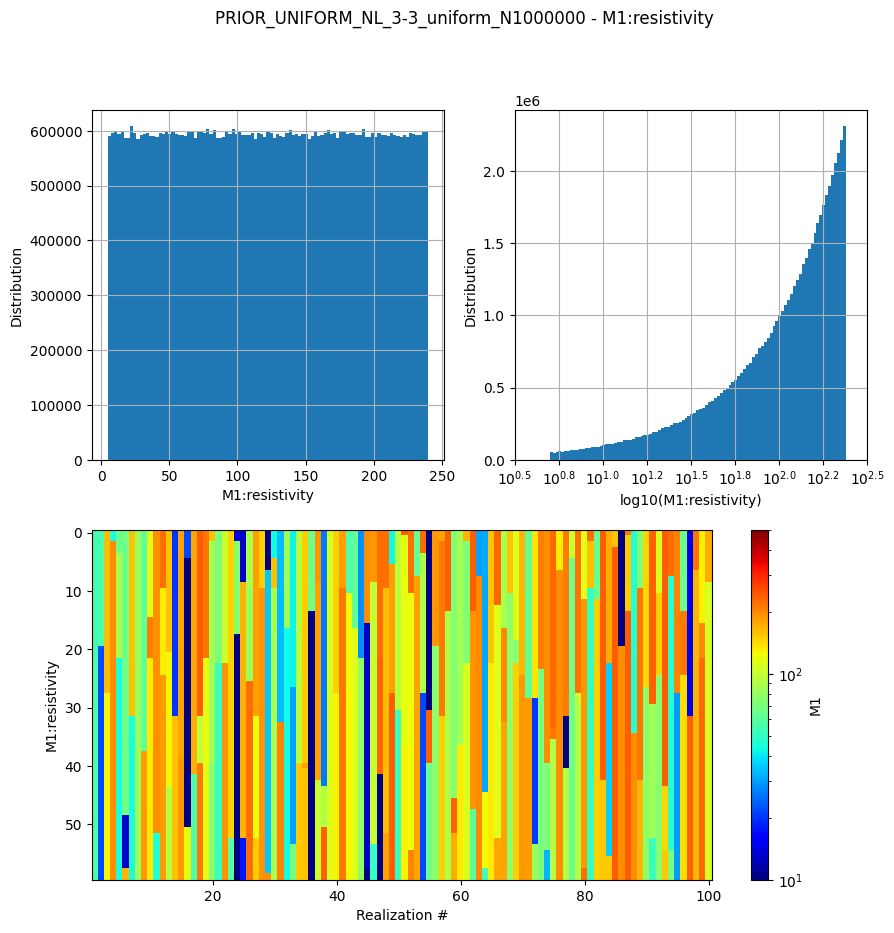

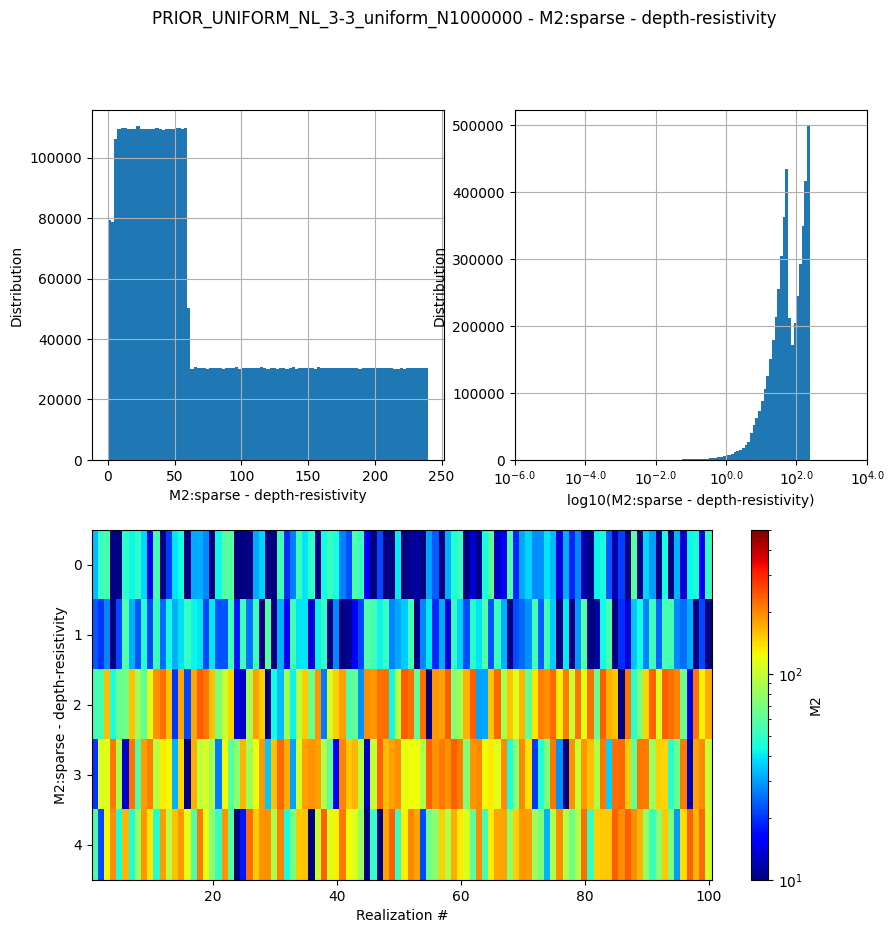

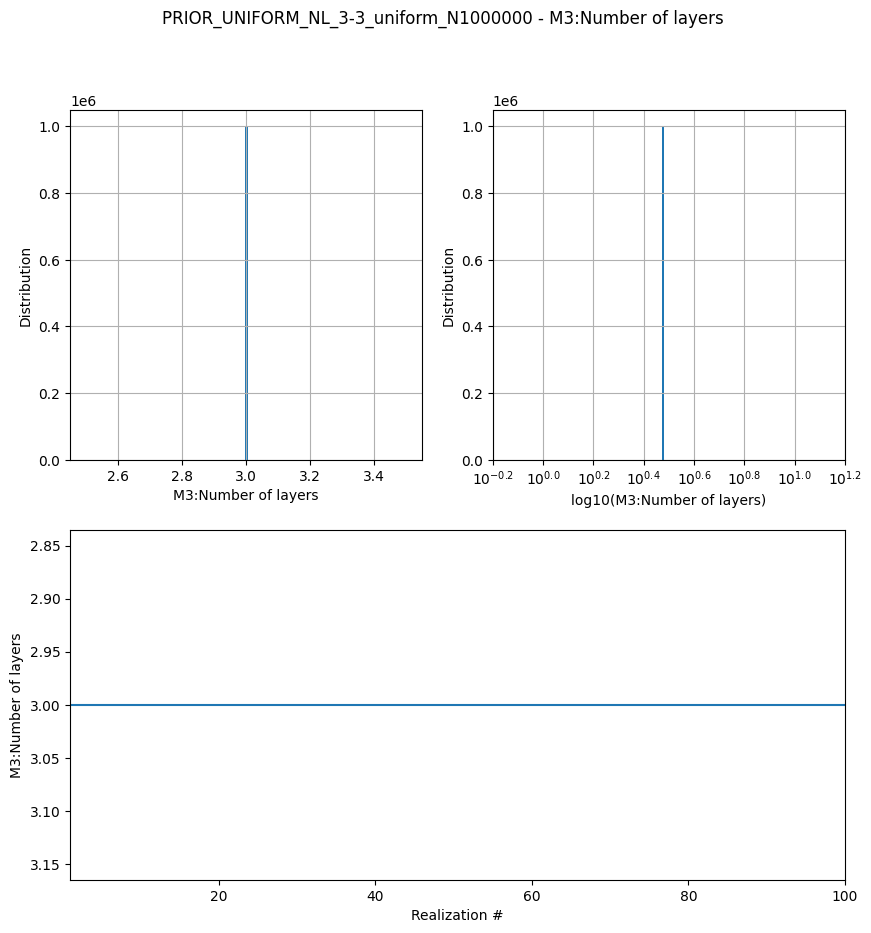

In [4]:
N=1000000 # sample size 
NLAY_min=3
NLAY_max=3


f_prior_data_h5='PRIOR_UNIFORM_NL_%d-%d_uniform_N%d_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5' % (NLAY_min, NLAY_max, N)
        

# make prior model realizations
f_prior_h5 = ig.prior_model_layered(N=N,
                                    lay_dist='uniform', z_max = z_max, 
                                    NLAY_min=NLAY_min, NLAY_max=NLAY_max, 
                                    RHO_dist='uniform', RHO_min=0.5*min(rho), RHO_max=2*max(rho))

# make prior data realizations
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex)

ig.plot_prior_stats(f_prior_h5)

## Different types of uncorrelated and correlated noise - No correlated noise

In [5]:
# The basic noise model: 3% relative noise and a noise floor at 1e-12
rng = np.random.default_rng()
d_std = 0.03 # standard deviation of the noise
d_std_base = 1e-12 # base noise
D_std = d_std * D_ref + d_std_base
D_noise = rng.normal(0, D_std, D_ref.shape)
D_obs = D_ref + D_noise
# Cd is a diagnoal matrix with the standard deviation of the data

In [6]:


# If a single correlated noise model is used, 
# it can represented by be the mean of the standard deviation of the data.
# This is though an approximation.
Cd_single = np.diag(np.mean(D_std, axis=0)**2)
Cd_single = np.diag(D_std[0]**2) 

# The full data covariance matrix is represented by a 3D array of shape (ns,nd,nd)
# Using this type of noise should provide identical results to using d_std, only slower as 
# the full covariance matrix is used.
# This type of noise model is useful when the noise is not the same for all data points,
# and the noise is correlated.
ns,nd=D_std.shape
Cd_mul = np.zeros((ns,nd,nd))
for i in range(ns):
    Cd_mul[i] = np.diag(D_std[i]**2)

# Wrie the three differet types of noise models to hdf5 files
f_data_h5_arr=[]
name_arr = []

f_out = ig.save_data_gaussian(D_obs, D_std = D_std, f_data_h5 = 'data_uncorr.h5', id=1, showInfo=0)
f_data_h5_arr.append(f_out)
name_arr.append('Uncorrelated noise')

f_out  = ig.save_data_gaussian(D_obs, Cd=Cd_single, f_data_h5 = 'data_corr1.h5', id=1, showInfo=0)
f_data_h5_arr.append(f_out)
name_arr.append('Correlated noise - mean')

f_out = ig.save_data_gaussian(D_obs, Cd=Cd_mul, f_data_h5 = 'data_corr2.h5', id=1, showInfo=0)
f_data_h5_arr.append(f_out)
name_arr.append('Correlated noise - individual')

Data has 200 stations and 40 channels
Removing group data_uncorr.h5:D1 
Adding group data_uncorr.h5:D1 
Data has 200 stations and 40 channels
Removing group data_corr1.h5:D1 
Adding group data_corr1.h5:D1 
Data has 200 stations and 40 channels
Removing group data_corr2.h5:D1 
Adding group data_corr2.h5:D1 


mean T1=-63.98344
mean T2=-63.98344
mean T3=-63.98344
t1, t2, t3 = 0.203169, 0.281084, 0.291940
SLOWDOWN = 1.000000, 1.383499, 1.436937


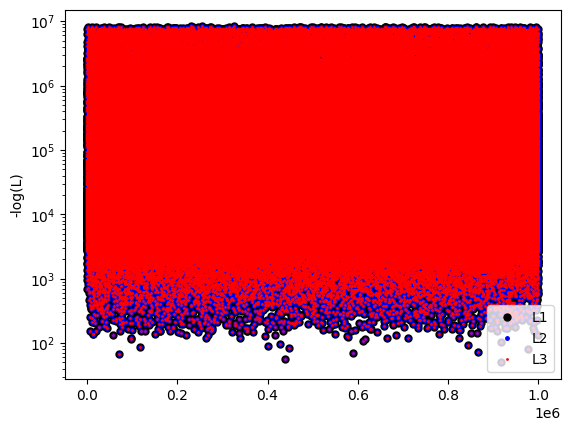

In [7]:
import time as time
# test likelhood
doTest = True
if doTest:
    id=0
    d_obs = D_obs[id]
    #d_obs[11]=np.nan
    d_std = D_std[id]

    C_single = np.diag(d_std**2)+1e-18

    with h5py.File(f_prior_data_h5, 'r') as f:
        D = f['/D1'][:]
        
    #D = D_ref
    t0=time.time()
    L1 = ig.likelihood_gaussian_diagonal(D, d_obs, d_std)
    t1 = time.time()-t0
    L2 = ig.likelihood_gaussian_full(D, d_obs, Cd_single, useVectorized=True)
    t2 = time.time()-t0-t1
    #L3 = ig.likelihood_gaussian_full(D, d_obs, Cd_single, N_app = 110, checkNaN=True, useVectorized=False)
    #L3 = ig.likelihood_gaussian_full(D, d_obs, Cd_mul[id], N_app = 1000, useVectorized=True)
    L3 = ig.likelihood_gaussian_full(D, d_obs, Cd_mul[id], useVectorized=True)
    t3 = time.time()-t2-t1-t0

    # L3 is a list of log-likelihood values. I would like to compute the log of the mean of the likelihood values, that is 
    # the log(mean(exp(L3))). exp(L3) may lead to such small numbers that this becomes NaN. Using log-sum-exp trick for numerical stability.
    
    def log_mean_exp(log_vals):
        """Compute log(mean(exp(log_vals))) using the log-sum-exp trick for numerical stability"""
        max_val = np.max(log_vals)
        return max_val + np.log(np.mean(np.exp(log_vals - max_val)))
    
    mean_L1 = log_mean_exp(L1)
    mean_L2 = log_mean_exp(L2)
    mean_L3 = log_mean_exp(L3)

    mean_L1 = np.log(np.mean(np.exp(L1)))


    #print("L1: %f, L2: %f, L3: %f" % (mean_L1, mean_L2, mean_L3))
    #¤
    #
    #print("L1: %f, L2: %f, L3: %f" % (L1[0], L2[0], L3[0]))
    print("mean T1=%3.5f" % (mean_L1))
    print("mean T2=%3.5f" % (mean_L2))
    print("mean T3=%3.5f" % (mean_L3))

    print("t1, t2, t3 = %f, %f, %f" % (t1, t2, t3))
    print("SLOWDOWN = %f, %f, %f" % (t1/t1, t2/t1, t3/t1))


    plt.semilogy(-L1, 'k.', label='L1', markersize=10)
    plt.plot(-L2, 'b.', label='L2', markersize=5)
    plt.plot(-L3, 'r.', label='L3', markersize=2)
    plt.legend()
    plt.ylabel('-log(L)')
    plt.show()

In [8]:
import time as time
f_post_h5_arr = []
T_arr = []
EV_arr = []
EV_post_arr = []
clim   = [min(rho)*0.8, max(rho)*1.25]
t_elapsed = []
for f_data_h5 in f_data_h5_arr: 
    t0 = time.time()
    f_post_h5 = ig.integrate_rejection(f_prior_data_h5, f_data_h5, 
                                       parallel=parallel, 
                                       Ncpu = 8,
                                       use_N_best=500
                                       )
    t_elapsed.append(time.time()-t0)
    with h5py.File(f_post_h5, 'r') as f_post:
        T_arr.append(f_post['/T'][:])
        EV_arr.append(f_post['/EV'][:])
        EV_post_arr.append(f_post['/EV_post'][:])

    f_post_h5_arr.append(f_post_h5)
    

for i in range(len(name_arr)):
    print('%s: t_elapsed = %f s' % (name_arr[i], t_elapsed[i]))

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:06,  3.48it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:08,  2.98it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:08,  2.97it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:08,  2.90it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:09,  2.61it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:09,  2.52it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:09,  2.56it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:10,  2.37it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:00<00:07,  3.23it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:00<00:07,  3.08it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:00<00:07,  3.08it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:00<00:07,  3.04it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:00<00:08,  2.86it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:00<00:08,  2.79it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:00<00:08,  2.80it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:00<00:08,  2.64it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:00<00:07,  3.05it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:00<00:07,  3.13it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:00<00:07,  3.05it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:00<00:07,  3.10it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:01<00:07,  2.94it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:01<00:07,  2.90it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:01<00:07,  2.90it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:01<00:07,  2.81it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:01<00:06,  3.07it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:01<00:06,  3.10it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:01<00:06,  3.17it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:01<00:07,  2.95it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:01<00:07,  2.94it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:01<00:06,  3.02it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:01<00:07,  2.91it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:01<00:07,  2.90it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:01<00:06,  3.04it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:01<00:06,  3.17it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:01<00:06,  3.13it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:01<00:06,  2.97it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:01<00:06,  3.01it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:01<00:06,  2.99it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:01<00:06,  2.91it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:01<00:06,  2.97it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:01<00:05,  3.17it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:01<00:06,  3.02it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:01<00:06,  3.07it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:01<00:06,  3.03it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:02<00:06,  3.03it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:02<00:06,  3.02it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:02<00:06,  2.96it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:02<00:06,  3.00it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:02<00:05,  3.14it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:02<00:05,  3.02it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:02<00:05,  3.07it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:02<00:05,  3.05it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:02<00:05,  3.02it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:02<00:05,  3.01it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:02<00:06,  2.98it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:02<00:05,  3.03it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:02<00:05,  3.13it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:02<00:05,  3.11it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:02<00:05,  3.02it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:02<00:05,  2.89it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:02<00:05,  3.06it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:02<00:05,  2.99it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:02<00:05,  2.97it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:02<00:05,  3.06it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:02<00:05,  3.17it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:02<00:05,  3.03it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:02<00:05,  3.05it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:02<00:05,  2.96it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:03<00:05,  3.06it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:03<00:05,  3.03it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:03<00:05,  3.08it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:03<00:05,  2.97it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:03<00:04,  3.15it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:03<00:04,  3.02it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:03<00:05,  3.00it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:03<00:04,  3.03it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:03<00:04,  3.09it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:03<00:04,  3.10it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:03<00:04,  3.12it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:03<00:05,  2.98it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:03<00:04,  3.11it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:03<00:04,  3.06it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:03<00:04,  3.05it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:03<00:04,  2.99it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:03<00:04,  3.12it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:03<00:04,  3.08it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:03<00:04,  3.10it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:03<00:04,  2.95it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:03<00:04,  3.13it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:03<00:04,  3.11it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:03<00:04,  3.04it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:03<00:04,  3.09it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:03<00:04,  2.89it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:03<00:04,  3.12it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:03<00:04,  3.13it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:04<00:04,  2.94it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:04<00:03,  3.07it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:04<00:03,  3.14it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:04<00:03,  3.15it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:04<00:04,  2.91it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:04<00:04,  2.93it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:04<00:03,  3.12it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:04<00:03,  3.11it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:04<00:04,  2.93it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:04<00:03,  3.02it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:04<00:03,  3.13it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:04<00:03,  3.19it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:04<00:03,  3.12it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:04<00:03,  2.92it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:04<00:03,  2.94it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:04<00:03,  3.09it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:04<00:03,  2.94it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:04<00:03,  3.06it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:04<00:03,  3.13it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:04<00:03,  3.15it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:04<00:03,  3.13it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:04<00:03,  2.98it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:05<00:03,  2.90it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:04<00:03,  3.09it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:05<00:02,  3.08it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:05<00:02,  3.12it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:05<00:03,  2.93it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:05<00:02,  3.12it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:05<00:02,  3.09it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:05<00:03,  2.98it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:05<00:03,  2.91it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:05<00:02,  3.09it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:05<00:02,  3.11it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:05<00:02,  3.13it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:05<00:03,  2.92it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:05<00:02,  3.06it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:05<00:02,  3.13it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:05<00:02,  3.04it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:05<00:02,  2.90it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:05<00:02,  3.11it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:05<00:02,  3.11it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:05<00:02,  3.11it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:05<00:02,  2.98it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:05<00:02,  3.15it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:05<00:02,  3.01it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:05<00:02,  3.08it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:05<00:02,  3.12it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:06<00:02,  2.91it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:06<00:01,  3.09it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:06<00:01,  3.09it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:06<00:02,  3.02it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:06<00:01,  3.14it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:06<00:01,  3.04it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:06<00:01,  3.06it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:06<00:01,  3.11it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:06<00:02,  2.98it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:06<00:01,  3.11it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:06<00:01,  3.10it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:06<00:02,  2.99it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:06<00:01,  3.17it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:06<00:01,  3.06it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:06<00:01,  3.16it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:06<00:01,  2.82it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:06<00:01,  2.96it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:06<00:01,  3.04it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:06<00:01,  3.10it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:06<00:01,  2.98it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:06<00:01,  3.14it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:06<00:01,  3.07it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:06<00:01,  3.15it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:06<00:01,  2.90it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:07<00:01,  2.93it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:07<00:00,  3.09it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:07<00:00,  3.12it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:07<00:01,  2.97it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:07<00:00,  3.15it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:07<00:00,  3.17it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:07<00:01,  2.99it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:07<00:01,  2.99it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:07<00:01,  2.87it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:07<00:00,  3.09it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:07<00:00,  3.11it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:07<00:00,  3.14it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:07<00:01,  2.99it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:07<00:00,  3.16it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:07<00:00,  2.96it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:07<00:00,  2.97it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:07<00:00,  2.96it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:07<00:00,  3.13it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:07<00:00,  2.99it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:07<00:00,  3.14it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:07<00:00,  3.03it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:07<00:00,  3.14it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:07<00:00,  3.02it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:07<00:00,  2.98it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:08<00:00,  2.96it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  3.05it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  3.04it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  3.16it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:08<00:00,  3.09it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  3.33it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  3.30it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  3.26it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  3.38it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:08<00:00,  3.60it/s]

integrate_rejection: Time=  8.5s/200 soundings, 42.6ms/sounding, 23.5it/s. T_av=33.7, EV_av=-48.2


Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:16,  1.41it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:19,  1.26it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:20,  1.20it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:20,  1.17it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:22,  1.06it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:24,  1.00s/it]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:23,  1.00it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:24,  1.02s/it]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.35it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:16,  1.41it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.30it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:20,  1.14it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:19,  1.15it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:20,  1.11it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:02<00:23,  1.01s/it]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:02<00:23,  1.02s/it]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:16,  1.34it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:16,  1.29it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:17,  1.25it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:17,  1.24it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:18,  1.16it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:19,  1.13it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:20,  1.07it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:16,  1.30it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:15,  1.32it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:03<00:21,  1.00it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:17,  1.21it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:17,  1.21it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.15it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.11it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.11it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:15,  1.31it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:19,  1.09it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:16,  1.24it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.19it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.20it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.16it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.13it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:04<00:14,  1.32it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.17it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.11it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:04<00:16,  1.18it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:04<00:16,  1.18it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:15,  1.21it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:16,  1.15it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:17,  1.10it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:14,  1.27it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:16,  1.16it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:16,  1.12it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:15,  1.17it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:15,  1.18it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:15,  1.20it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:15,  1.13it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:16,  1.12it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:13,  1.24it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:15,  1.16it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:16,  1.12it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:14,  1.15it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:14,  1.18it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:14,  1.21it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:14,  1.15it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:12,  1.23it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:14,  1.14it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:14,  1.15it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.12it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:14,  1.13it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:13,  1.18it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:13,  1.20it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:13,  1.15it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:07<00:12,  1.22it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:13,  1.16it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:14,  1.12it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:14,  1.11it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.16it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.21it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.22it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.16it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.17it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:08<00:11,  1.21it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:13,  1.10it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.20it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:13,  1.15it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.24it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.25it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:12,  1.15it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:12,  1.16it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:09<00:11,  1.14it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:09<00:10,  1.26it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.22it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.17it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:09<00:10,  1.29it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:09<00:10,  1.26it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:11,  1.17it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:10,  1.19it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:09,  1.30it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:10,  1.27it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:10,  1.18it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:09,  1.29it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:10,  1.20it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:09,  1.23it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:10,  1.20it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:09,  1.20it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:08,  1.30it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:09,  1.28it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:08,  1.32it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:09,  1.21it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:10,  1.15it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:09,  1.19it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:08,  1.23it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:08,  1.24it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:07,  1.33it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:11<00:07,  1.35it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:08,  1.27it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:08,  1.20it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:09,  1.13it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:08,  1.14it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:07,  1.29it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:07,  1.29it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:12<00:06,  1.36it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:12<00:06,  1.32it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:08,  1.22it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:07,  1.17it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:08,  1.12it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:07,  1.18it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:06,  1.31it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:06,  1.30it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:13<00:06,  1.32it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:13<00:06,  1.24it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:07,  1.20it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:13<00:06,  1.18it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:06,  1.21it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:07,  1.16it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:06,  1.30it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:06,  1.30it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:05,  1.25it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:05,  1.19it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:06,  1.16it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:06,  1.14it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:05,  1.26it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:05,  1.34it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:06,  1.22it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:05,  1.34it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:05,  1.18it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:05,  1.17it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:15<00:05,  1.28it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:04,  1.30it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:04,  1.36it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:15<00:05,  1.18it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:04,  1.36it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:05,  1.16it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:04,  1.16it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:03,  1.36it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:04,  1.19it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:03,  1.32it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:16<00:04,  1.29it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:16<00:04,  1.22it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:03,  1.35it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:04,  1.14it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:16<00:03,  1.26it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:03,  1.21it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:16<00:02,  1.36it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:02,  1.39it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:03,  1.35it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:03,  1.33it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:17<00:04,  1.17it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:03,  1.11it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.32it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.39it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.40it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.26it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:03,  1.28it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:18<00:02,  1.26it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:18<00:03,  1.13it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:18<00:02,  1.12it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.39it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.34it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.40it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.30it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:18<00:02,  1.22it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.20it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:19<00:02,  1.14it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.40it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:19<00:01,  1.19it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.36it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.41it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.23it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:19<00:01,  1.16it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.41it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:19<00:01,  1.20it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.41it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.25it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.37it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.15it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.27it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:20<00:00,  1.30it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:20<00:00,  1.36it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.37it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.28it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.49it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.56it/s]

integrate_rejection: Time= 20.9s/200 soundings, 104.7ms/sounding, 9.5it/s. T_av=54.9, EV_av=-206.6


Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:19,  1.24it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:19,  1.20it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:19,  1.22it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:21,  1.10it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:22,  1.06it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:24,  1.02s/it]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:25,  1.08s/it]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:26,  1.09s/it]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:18,  1.25it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:18,  1.23it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:19,  1.19it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:20,  1.11it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:21,  1.07it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:21,  1.06it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:21,  1.06it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:22,  1.04it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:18,  1.22it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:18,  1.20it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:18,  1.16it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:19,  1.14it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:19,  1.11it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:19,  1.11it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:19,  1.11it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:20,  1.10it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:17,  1.21it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:17,  1.22it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:17,  1.17it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.15it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.13it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.14it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.14it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.16it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.20it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.19it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.13it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.18it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:18,  1.11it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.23it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.19it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.20it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:04<00:15,  1.20it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:04<00:15,  1.19it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:15,  1.21it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:15,  1.26it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:14,  1.29it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:15,  1.23it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:16,  1.17it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:15,  1.23it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:14,  1.21it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:14,  1.21it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:13,  1.29it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:14,  1.25it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:14,  1.29it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:14,  1.25it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:14,  1.24it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:15,  1.18it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:13,  1.24it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:12,  1.31it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:13,  1.29it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:14,  1.20it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:13,  1.30it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:13,  1.28it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:13,  1.24it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:14,  1.16it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:12,  1.23it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:12,  1.32it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:12,  1.33it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:12,  1.33it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:12,  1.24it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:12,  1.25it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:13,  1.20it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:14,  1.14it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:07<00:11,  1.36it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:11,  1.29it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:10,  1.37it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:07<00:10,  1.37it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.24it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.19it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.16it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:13,  1.14it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:08<00:10,  1.38it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:08<00:10,  1.33it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:08<00:10,  1.39it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:08<00:10,  1.39it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:12,  1.16it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:12,  1.14it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.19it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:09<00:09,  1.41it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:09<00:09,  1.37it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:09<00:09,  1.41it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.19it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:09<00:09,  1.35it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:11,  1.14it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:10,  1.19it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:08,  1.43it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:10,  1.26it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:08,  1.39it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:08,  1.38it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:10,  1.22it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:09,  1.26it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:09,  1.33it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:09,  1.27it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:09,  1.22it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:10<00:07,  1.43it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:10<00:07,  1.38it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:10<00:08,  1.31it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:10,  1.19it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:09,  1.21it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:08,  1.27it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:08,  1.31it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:11<00:07,  1.33it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:11<00:07,  1.31it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:09,  1.17it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:11<00:07,  1.27it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:09,  1.17it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:08,  1.18it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:07,  1.27it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:07,  1.29it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:08,  1.20it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:12<00:06,  1.31it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:12<00:07,  1.26it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:08,  1.16it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:12<00:07,  1.16it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:12<00:07,  1.19it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:06,  1.30it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:06,  1.31it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:07,  1.22it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:13<00:06,  1.29it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:13<00:06,  1.17it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:07,  1.16it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:13<00:06,  1.23it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:13<00:06,  1.32it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:13<00:06,  1.33it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:13<00:07,  1.13it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:06,  1.21it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:05,  1.24it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:06,  1.19it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:05,  1.28it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:05,  1.34it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:05,  1.35it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:06,  1.11it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:14<00:06,  1.14it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:15<00:05,  1.18it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:05,  1.17it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:15<00:05,  1.26it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:04,  1.32it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:04,  1.37it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:04,  1.38it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:05,  1.13it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:05,  1.12it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:05,  1.15it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:15<00:04,  1.19it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:15<00:04,  1.29it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:15<00:03,  1.38it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:15<00:03,  1.38it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:15<00:03,  1.34it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:04,  1.11it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:04,  1.11it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:04,  1.22it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:16<00:03,  1.33it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:16<00:03,  1.25it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:16<00:02,  1.37it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:16<00:02,  1.40it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:16<00:02,  1.39it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:03,  1.11it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:03,  1.16it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:02,  1.35it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.28it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.35it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.37it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.36it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:03,  1.19it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.16it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:17<00:02,  1.23it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.33it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:18<00:02,  1.38it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.35it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.36it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.33it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:18<00:02,  1.15it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.40it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:18<00:00,  1.36it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.22it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:18<00:01,  1.29it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:18<00:00,  1.31it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:18<00:00,  1.32it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.25it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:19<00:01,  1.13it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.27it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.39it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:19<00:00,  1.24it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.28it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.29it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.24it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:20<00:00,  1.22it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.36it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.46it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.33it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:20<00:00,  1.46it/s]

integrate_rejection: Time= 20.6s/200 soundings, 103.1ms/sounding, 9.7it/s. T_av=33.7, EV_av=-48.2


Uncorrelated noise: t_elapsed = 9.498999 s
Correlated noise - mean: t_elapsed = 21.932713 s
Correlated noise - individual: t_elapsed = 21.584945 s


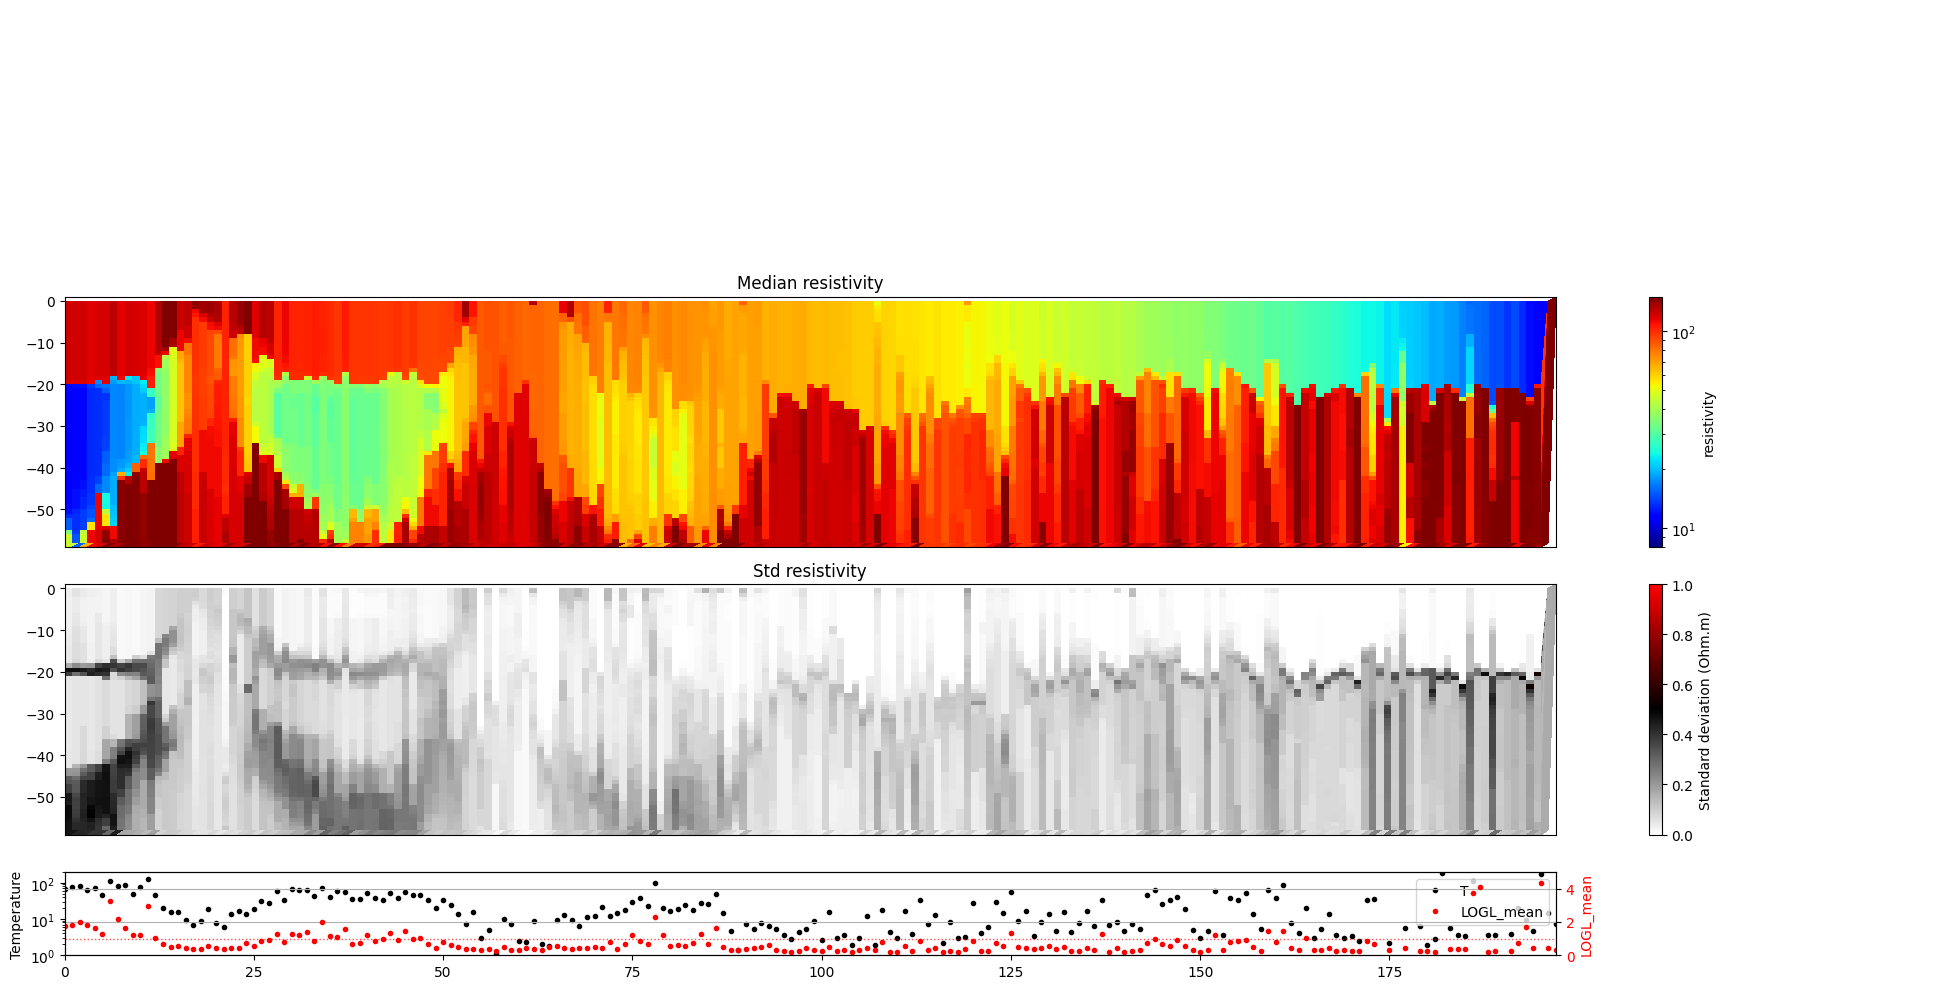

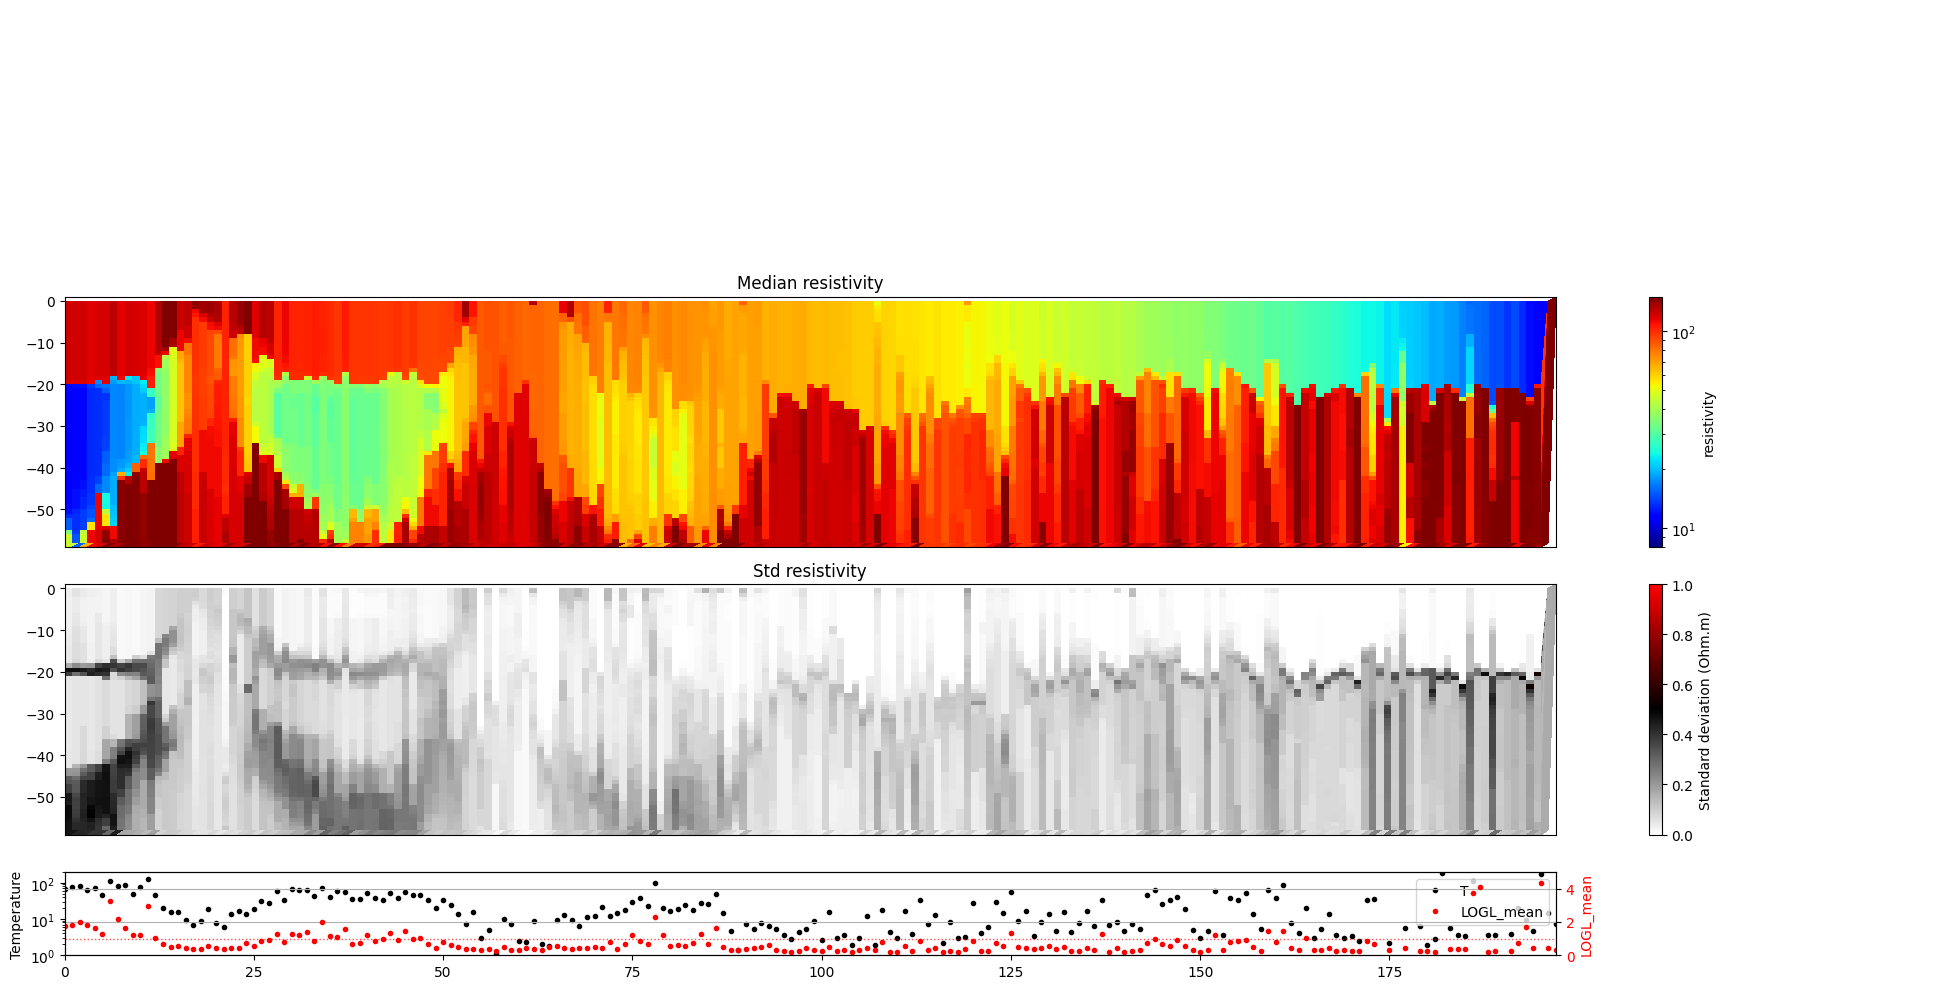

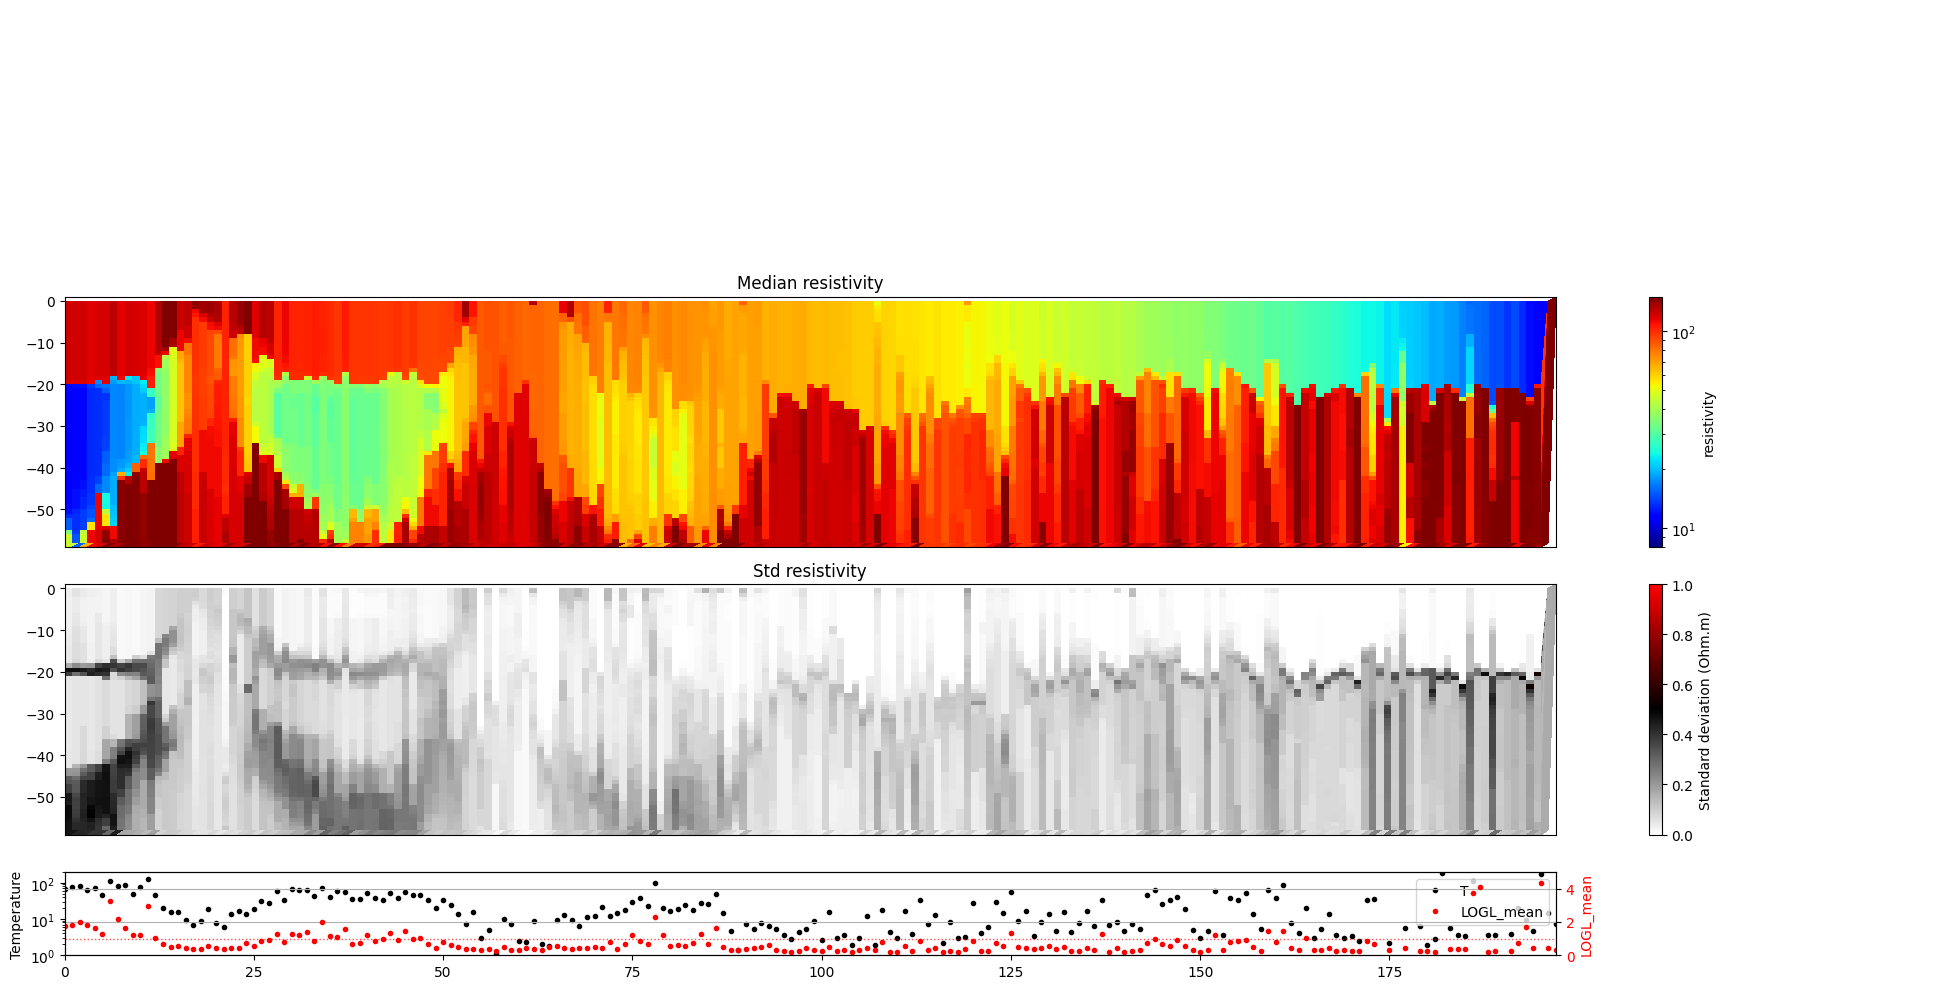

In [9]:
for i in range(len(f_post_h5_arr)):
    ig.plot_profile(f_post_h5_arr[i],hardcopy=hardcopy,  clim = clim, im=1)

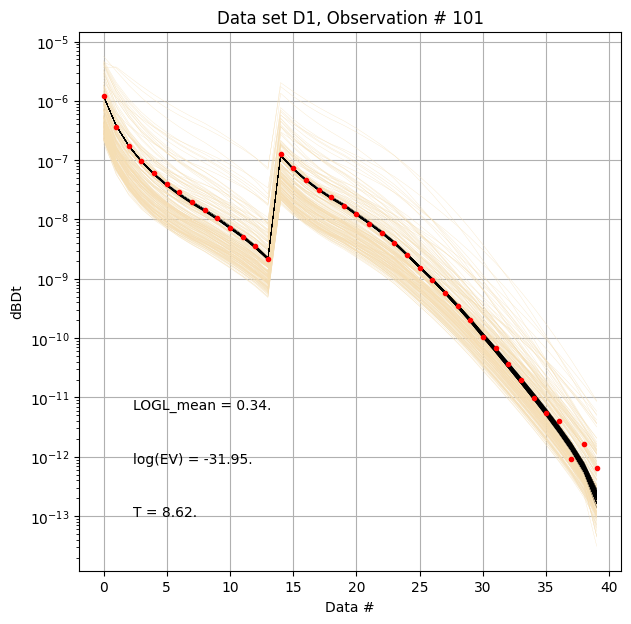

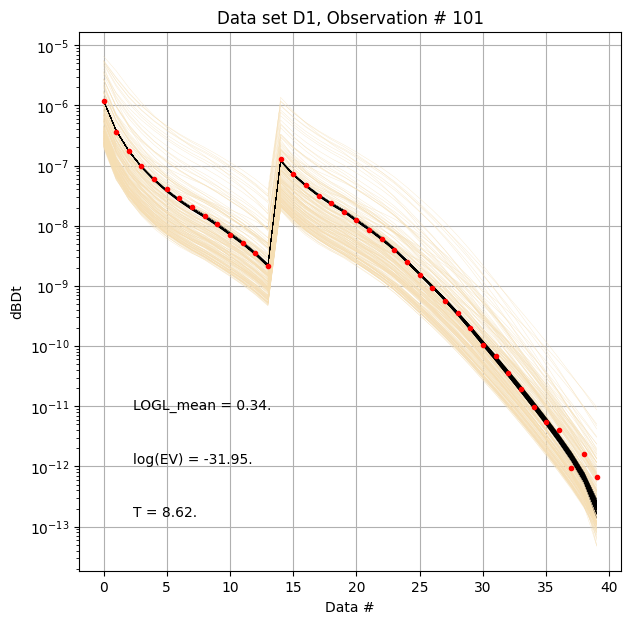

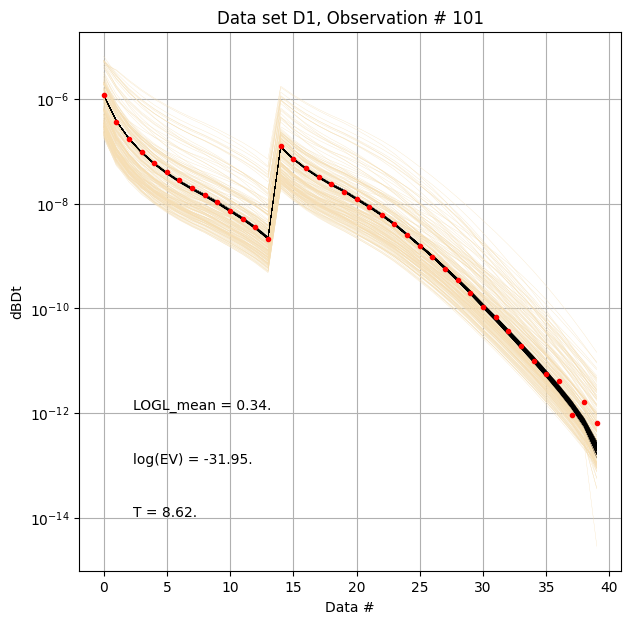

In [10]:
for i in range(len(f_post_h5_arr)):
    ig.plot_data_prior_post(f_post_h5_arr[0], i_plot=100, hardcopy=hardcopy)

Text(0, 0.5, 'EV_post')

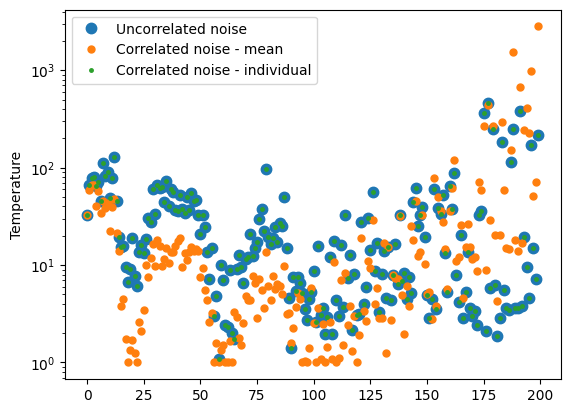

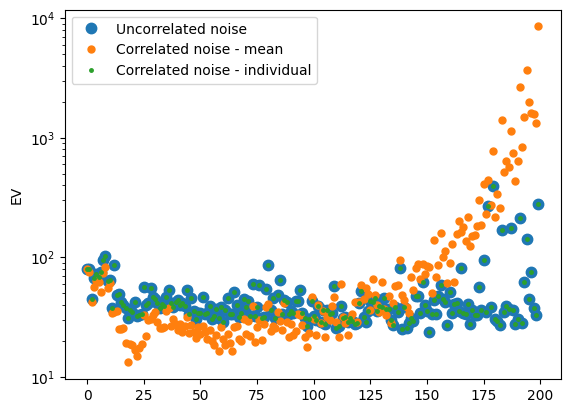

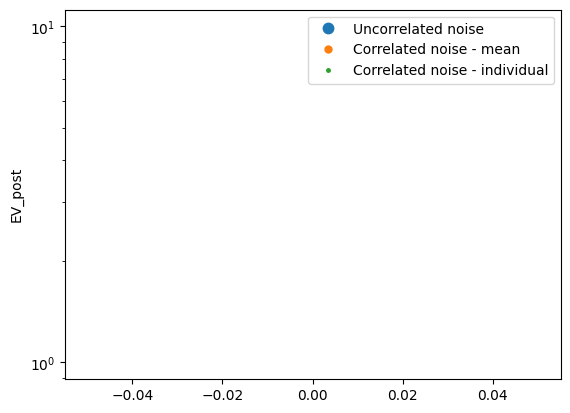

In [11]:
plt.figure()
for i in range(len(T_arr)):
    plt.semilogy(T_arr[i], '.', label=name_arr[i], markersize=15-5*i)
plt.legend()
plt.ylabel('Temperature')

plt.figure()
for i in range(len(T_arr)):
    plt.semilogy(-EV_arr[i], '.', label=name_arr[i], markersize=15-5*i)
plt.legend()
plt.ylabel('EV')


plt.figure()
for i in range(len(T_arr)):
    plt.semilogy(EV_post_arr[i], '.', label=name_arr[i], markersize=15-5*i)
plt.legend()
plt.ylabel('EV_post')



## Data in the log-space, and correlated Gaussian noise
The data can be transformed to the log-space, and the noise model can be applied in the log-space.


Data has 200 stations and 40 channels
Removing group data_log_uncorr:D1 
Adding group data_log_uncorr:D1 
Data has 200 stations and 40 channels
Removing group data_log_corr:D1 
Adding group data_log_corr:D1 
Data has 200 stations and 40 channels
Removing group data_log_corr2:D1 
Adding group data_log_corr2:D1 


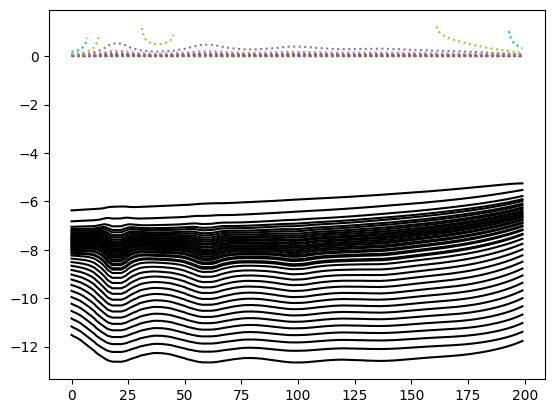

In [12]:

# Add constant covariance to Cd -->
# A simple way to introduce correlated noise
corrlev = 0.01**2

lD_obs = np.log10(D_ref)

lD_std_up = np.abs(np.log10(D_ref+D_std)-lD_obs)
lD_std_down = np.abs(np.log10(D_ref-D_std)-lD_obs)
lD_std = np.abs((lD_std_up+lD_std_down)/2) + np.sqrt(corrlev)

lCd_single = np.diag(np.mean(lD_std, axis=0)**2)+corrlev

ns,nd=D_std.shape
lCd_mul = np.zeros((ns,nd,nd))
for i in range(ns):
    lCd_mul[i] = np.diag(lD_std[i]**2)+corrlev

plt.figure()
plt.plot(lD_obs,'k-')
plt.plot(lD_std,':')


f_data_log_1_h5_f_out = ig.save_data_gaussian(lD_obs, D_std = lD_std, f_data_h5 = 'data_log_uncorr', id=1, showInfo=0, is_log=1)
f_data_log_2_h5_f_out = ig.save_data_gaussian(lD_obs, Cd = lCd_single, f_data_h5 = 'data_log_corr', id=1, showInfo=0, is_log=1)
f_data_log_3_h5_f_out = ig.save_data_gaussian(lD_obs, Cd = lCd_mul, f_data_h5 = 'data_log_corr2', id=1, showInfo=0, is_log=1)
f_data_arr = [f_data_log_1_h5_f_out,f_data_log_2_h5_f_out,f_data_log_3_h5_f_out]

In [13]:
recomputePriorData = False
if recomputePriorData:
    f_prior_log_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, N=N-1, is_log=True)
else:
    # Simple load the old data and save it in log-space
    f_prior_log_data_h5  = 'd_log.h5'
    ig.copy_hdf5_file(f_prior_h5, f_prior_log_data_h5)
    D, idx = ig.load_prior_data(f_prior_data_h5); 
    Dlog = np.log10(D[0])
    ig.save_prior_data(f_prior_log_data_h5, Dlog, id=1)

Loading prior data from PRIOR_UNIFORM_NL_3-3_uniform_N1000000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: []
  - /D1:  N,nd = 1000000/40


Saving new prior data '/D1' to file: d_log.h5 


New prior data '/D1' saved to file: d_log.h5 


In [14]:
f_post_log_h5_arr = []
for i in range(len(f_data_arr)):
    f_data_h5 = f_data_arr[i]
    f_post_h5 = ig.integrate_rejection(f_prior_log_data_h5, f_data_h5, 
                                       parallel=parallel, 
                                       Ncpu=8,
                                       nr=1000,
                                       updatePostStat = True,                                       
                                    )
    f_post_log_h5_arr.append(f_post_h5)

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:23,  1.04it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:24,  1.01s/it]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:24,  1.00s/it]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:22,  1.06it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:23,  1.02it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:24,  1.01s/it]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:23,  1.01it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:25,  1.06s/it]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:16,  1.37it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.29it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.30it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:18,  1.26it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:18,  1.24it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.32it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:18,  1.25it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.29it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:14,  1.54it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:14,  1.48it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:14,  1.49it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:14,  1.52it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:14,  1.52it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:15,  1.43it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:15,  1.44it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:15,  1.40it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:02<00:12,  1.65it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:02<00:13,  1.60it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:02<00:13,  1.58it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:02<00:12,  1.64it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:02<00:12,  1.64it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:02<00:13,  1.59it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:02<00:13,  1.54it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:02<00:13,  1.56it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:11,  1.75it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:11,  1.70it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:12,  1.64it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:11,  1.72it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:11,  1.72it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:12,  1.66it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:12,  1.64it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:12,  1.59it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:03<00:10,  1.80it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:03<00:10,  1.75it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:03<00:11,  1.70it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:03<00:10,  1.73it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:03<00:10,  1.74it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:03<00:10,  1.74it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:03<00:11,  1.68it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:03<00:11,  1.65it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:04<00:09,  1.82it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:04<00:10,  1.77it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:04<00:10,  1.75it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:04<00:10,  1.77it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:04<00:10,  1.75it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:04<00:10,  1.74it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:04<00:10,  1.73it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:04<00:10,  1.68it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:04<00:09,  1.86it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:04<00:09,  1.80it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:04<00:09,  1.79it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:04<00:09,  1.79it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:04<00:09,  1.78it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:04<00:09,  1.75it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:05<00:09,  1.73it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:05<00:10,  1.70it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:05<00:08,  1.87it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:05<00:08,  1.83it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:05<00:08,  1.83it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:05<00:08,  1.82it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:05<00:08,  1.80it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:05<00:09,  1.75it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:05<00:09,  1.74it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:05<00:09,  1.71it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:05<00:07,  1.88it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:05<00:08,  1.85it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:05<00:08,  1.84it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:05<00:08,  1.80it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:06<00:08,  1.83it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:06<00:08,  1.73it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:06<00:08,  1.73it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:06<00:08,  1.70it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:06<00:07,  1.89it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:06<00:07,  1.87it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:06<00:07,  1.85it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:06<00:07,  1.83it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:06<00:07,  1.84it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:06<00:07,  1.75it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:06<00:07,  1.76it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:06<00:08,  1.73it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:06<00:06,  1.88it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:06<00:06,  1.86it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:07<00:06,  1.86it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:07<00:07,  1.85it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:07<00:07,  1.82it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:07<00:07,  1.74it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:07<00:07,  1.76it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:07<00:07,  1.74it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:07<00:06,  1.88it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:07<00:06,  1.83it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:07<00:06,  1.88it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:07<00:06,  1.88it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:07<00:06,  1.82it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:07<00:06,  1.77it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:07<00:06,  1.75it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:07<00:05,  1.87it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:07<00:06,  1.76it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:08<00:05,  1.86it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:08<00:06,  1.81it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:08<00:05,  1.89it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:08<00:05,  1.84it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:08<00:06,  1.77it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:08<00:05,  1.90it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:08<00:06,  1.79it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:08<00:06,  1.76it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:08<00:05,  1.83it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:08<00:05,  1.89it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:08<00:05,  1.81it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:08<00:05,  1.85it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:08<00:05,  1.79it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:08<00:04,  1.84it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:09<00:05,  1.77it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:09<00:05,  1.76it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:09<00:04,  1.85it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:09<00:04,  1.91it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:09<00:04,  1.85it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:09<00:04,  1.86it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:09<00:05,  1.77it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:09<00:04,  1.84it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:09<00:05,  1.79it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:09<00:05,  1.78it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:09<00:04,  1.85it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:09<00:04,  1.91it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:09<00:04,  1.87it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:09<00:04,  1.84it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:09<00:04,  1.80it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:10<00:03,  1.81it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:10<00:04,  1.78it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:10<00:04,  1.80it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:10<00:03,  1.86it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:10<00:03,  1.88it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:10<00:03,  1.88it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:10<00:03,  1.82it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:10<00:03,  1.78it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:10<00:03,  1.82it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:10<00:03,  1.79it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:10<00:03,  1.78it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:10<00:03,  1.89it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:10<00:03,  1.86it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:10<00:03,  1.90it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:10<00:03,  1.82it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:11<00:03,  1.81it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:11<00:03,  1.81it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:11<00:02,  1.79it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:11<00:03,  1.76it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:11<00:02,  1.89it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:11<00:02,  1.86it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:11<00:02,  1.90it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:11<00:02,  1.88it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:11<00:02,  1.79it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:11<00:02,  1.82it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:11<00:02,  1.89it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:11<00:02,  1.86it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:11<00:02,  1.77it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:11<00:02,  1.85it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:11<00:02,  1.76it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:11<00:02,  1.92it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:12<00:02,  1.82it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:12<00:01,  1.88it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:12<00:02,  1.80it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:12<00:01,  1.85it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:12<00:01,  1.79it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:12<00:01,  1.85it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:12<00:02,  1.78it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:12<00:01,  1.92it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:12<00:01,  1.81it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:12<00:01,  1.88it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:12<00:01,  1.82it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:12<00:01,  1.82it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:12<00:01,  1.85it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:12<00:01,  1.85it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:12<00:01,  1.78it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:12<00:01,  1.90it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:13<00:01,  1.79it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:13<00:00,  1.87it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:13<00:01,  1.83it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:13<00:00,  1.83it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:13<00:00,  1.83it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:13<00:00,  1.90it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:13<00:00,  1.80it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:13<00:01,  1.78it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:13<00:00,  1.81it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:13<00:00,  1.86it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:13<00:00,  1.83it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:13<00:00,  1.82it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:13<00:00,  1.91it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:14<00:00,  1.83it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:14<00:00,  1.81it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:14<00:00,  1.80it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:14<00:00,  2.04it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:14<00:00,  2.11it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:14<00:00,  2.08it/s]

integrate_rejection: Time= 14.5s/200 soundings, 72.7ms/sounding, 13.7it/s. T_av=2.2, EV_av=-13.2


Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:15,  1.57it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:18,  1.31it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:20,  1.17it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:21,  1.14it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:20,  1.18it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:21,  1.12it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:24,  1.01s/it]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:01<00:25,  1.06s/it]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:18,  1.27it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.30it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.29it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:19,  1.17it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:20,  1.11it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:21,  1.08it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:21,  1.07it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:22,  1.03it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:16,  1.31it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:17,  1.25it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:18,  1.22it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:17,  1.26it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:19,  1.12it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:20,  1.07it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:20,  1.09it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:03<00:23,  1.06s/it]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:16,  1.29it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:17,  1.18it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:17,  1.18it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:19,  1.06it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.13it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.14it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:17,  1.19it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:03<00:16,  1.25it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.20it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.18it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.11it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.16it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:04<00:23,  1.13s/it]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.20it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.14it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:04<00:15,  1.20it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:16,  1.12it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:15,  1.19it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:16,  1.12it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:05<00:20,  1.04s/it]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:15,  1.19it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:17,  1.07it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:16,  1.13it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:05<00:14,  1.28it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:17,  1.06it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:15,  1.15it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:16,  1.11it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:15,  1.15it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:15,  1.18it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:16,  1.09it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:15,  1.15it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:14,  1.15it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:14,  1.16it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:14,  1.15it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:06<00:14,  1.18it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:17,  1.05it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.11it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.13it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.13it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:13,  1.15it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:12,  1.25it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:13,  1.20it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:13,  1.23it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.08it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:14,  1.10it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:14,  1.08it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:14,  1.11it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.18it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:11,  1.27it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.16it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:14,  1.06it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:15,  1.05it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:13,  1.07it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:14,  1.06it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.18it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.24it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:15,  1.00s/it]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.17it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:13,  1.11it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:12,  1.15it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:12,  1.08it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:12,  1.13it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:10<00:13,  1.02it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:11,  1.15it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:12,  1.06it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:13,  1.00s/it]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:11,  1.17it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:10<00:12,  1.12it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:12,  1.07it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:10<00:09,  1.25it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:12,  1.02it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:11<00:12,  1.03it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:10,  1.13it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:11,  1.03it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:11<00:11,  1.11it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:10,  1.11it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:11<00:08,  1.29it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:12,  1.02s/it]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:12<00:11,  1.00it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:09,  1.14it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:12<00:11,  1.02it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:09,  1.13it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:09,  1.14it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:12<00:11,  1.08it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:07,  1.30it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:10,  1.09it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:10,  1.07it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:11,  1.01s/it]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:08,  1.16it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:12<00:08,  1.13it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:08,  1.12it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:07,  1.27it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:13<00:10,  1.09it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:09,  1.11it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:09,  1.05it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:09,  1.08it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:08,  1.12it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:08,  1.11it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:08,  1.10it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:14<00:09,  1.03it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:07,  1.11it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:08,  1.12it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:08,  1.09it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:08,  1.11it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:06,  1.18it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:07,  1.02it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:08,  1.03s/it]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:15<00:08,  1.05it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:07,  1.07it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:15<00:06,  1.03it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:15<00:05,  1.26it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:07,  1.06it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:07,  1.07it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:15<00:06,  1.10it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:15<00:06,  1.06it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:16<00:04,  1.28it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:16<00:07,  1.02it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:16<00:06,  1.10it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:16<00:06,  1.11it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:16<00:05,  1.07it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:16<00:05,  1.09it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:16<00:05,  1.07it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:17<00:07,  1.10s/it]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:17<00:03,  1.26it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:17<00:05,  1.12it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:17<00:05,  1.13it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:17<00:04,  1.08it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:17<00:07,  1.01s/it]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:17<00:04,  1.09it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:17<00:04,  1.02it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:17<00:03,  1.25it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:18<00:04,  1.17it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:18<00:04,  1.16it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:18<00:06,  1.07s/it]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:18<00:03,  1.12it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:18<00:05,  1.06it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:18<00:03,  1.12it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:18<00:02,  1.30it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:18<00:03,  1.22it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:18<00:03,  1.02it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:18<00:03,  1.18it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:19<00:05,  1.03s/it]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:19<00:02,  1.09it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:19<00:04,  1.05it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:19<00:02,  1.15it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:19<00:01,  1.22it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:19<00:02,  1.18it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:19<00:02,  1.18it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:19<00:03,  1.01s/it]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:20<00:04,  1.05s/it]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:20<00:03,  1.06it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:20<00:02,  1.00s/it]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:20<00:00,  1.23it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:20<00:01,  1.19it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:20<00:01,  1.13it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:20<00:01,  1.03it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:20<00:01,  1.01it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:21<00:00,  1.06it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:21<00:02,  1.03it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:21<00:03,  1.06s/it]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:21<00:00,  1.17it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:21<00:00,  1.12it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:21<00:00,  1.08it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:21<00:00,  1.13it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:21<00:00,  1.11it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:21<00:01,  1.11it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:21<00:00,  1.11it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:21<00:01,  1.02it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.19it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.14it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.17it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.14it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:22<00:00,  1.21it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:22<00:00,  1.16it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.44it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.39it/s]

integrate_rejection: Time= 23.2s/200 soundings, 115.9ms/sounding, 8.6it/s. T_av=1.5, EV_av=-11.9


Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                            | 0/25 [00:00<?, ?it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:20,  1.15it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:20,  1.17it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:20,  1.20it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:19,  1.20it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:21,  1.10it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:21,  1.10it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:23,  1.00it/s]

Rejection Sampling:   4%|██▋                                                                 | 1/25 [00:00<00:23,  1.00it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.28it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.33it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:17,  1.29it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:19,  1.20it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:20,  1.14it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:19,  1.16it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:22,  1.03it/s]

Rejection Sampling:   8%|█████▍                                                              | 2/25 [00:01<00:22,  1.04it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:17,  1.28it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:17,  1.28it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:18,  1.16it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:20,  1.09it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:19,  1.13it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:21,  1.04it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:02<00:20,  1.07it/s]

Rejection Sampling:  12%|████████▏                                                           | 3/25 [00:03<00:22,  1.01s/it]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:17,  1.19it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:18,  1.15it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:19,  1.09it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:19,  1.10it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:20,  1.04it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:21,  1.01s/it]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:20,  1.04it/s]

Rejection Sampling:  16%|██████████▉                                                         | 4/25 [00:03<00:19,  1.06it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.23it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:16,  1.20it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.16it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.11it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:17,  1.12it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:19,  1.02it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:04<00:20,  1.02s/it]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:16,  1.16it/s]

Rejection Sampling:  20%|█████████████▌                                                      | 5/25 [00:05<00:20,  1.04s/it]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:17,  1.09it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:16,  1.15it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:17,  1.08it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:17,  1.09it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:19,  1.00s/it]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:17,  1.06it/s]

Rejection Sampling:  24%|████████████████▎                                                   | 6/25 [00:05<00:19,  1.03s/it]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:16,  1.10it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:15,  1.17it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:16,  1.06it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:15,  1.14it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:16,  1.12it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:16,  1.08it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:06<00:17,  1.00it/s]

Rejection Sampling:  28%|███████████████████                                                 | 7/25 [00:07<00:18,  1.05s/it]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.07it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:14,  1.14it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.08it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.12it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.12it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:16,  1.05it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:15,  1.07it/s]

Rejection Sampling:  32%|█████████████████████▊                                              | 8/25 [00:07<00:16,  1.03it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:07<00:14,  1.13it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:15,  1.06it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:15,  1.02it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:16,  1.01s/it]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:14,  1.12it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:14,  1.13it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:14,  1.11it/s]

Rejection Sampling:  36%|████████████████████████▍                                           | 9/25 [00:08<00:14,  1.12it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:12,  1.17it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:08<00:13,  1.14it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:15,  1.01s/it]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:13,  1.14it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:13,  1.14it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:13,  1.11it/s]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:15,  1.00s/it]

Rejection Sampling:  40%|██████████████████████████▊                                        | 10/25 [00:09<00:13,  1.08it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:13,  1.07it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:13,  1.07it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:13,  1.03it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:09<00:11,  1.19it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:10<00:12,  1.12it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:10<00:13,  1.00it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:10<00:13,  1.04it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:11,  1.17it/s]

Rejection Sampling:  44%|█████████████████████████████▍                                     | 11/25 [00:10<00:14,  1.03s/it]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:11,  1.11it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:11,  1.13it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:10<00:10,  1.18it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:10,  1.16it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:11<00:12,  1.03it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:11<00:13,  1.01s/it]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:11<00:13,  1.05s/it]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:10,  1.16it/s]

Rejection Sampling:  48%|████████████████████████████████▏                                  | 12/25 [00:11<00:13,  1.02s/it]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:11,  1.09it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:11<00:10,  1.17it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:12<00:10,  1.10it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:09,  1.16it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:09,  1.12it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:12<00:11,  1.02it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:12<00:11,  1.01it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:09,  1.17it/s]

Rejection Sampling:  52%|██████████████████████████████████▊                                | 13/25 [00:12<00:12,  1.06s/it]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:12<00:10,  1.03it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:13<00:09,  1.14it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:08,  1.15it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:13<00:10,  1.10it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:13<00:10,  1.05it/s]

Rejection Sampling:  56%|█████████████████████████████████████▌                             | 14/25 [00:13<00:11,  1.01s/it]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:09,  1.10it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:09,  1.04it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:08,  1.13it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:13<00:07,  1.21it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:08,  1.17it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:13<00:10,  1.06s/it]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:14<00:08,  1.11it/s]

Rejection Sampling:  60%|████████████████████████████████████████▏                          | 15/25 [00:14<00:09,  1.02it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:08,  1.08it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:08,  1.10it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:14<00:06,  1.23it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:07,  1.16it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:08,  1.10it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:14<00:09,  1.01s/it]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:15<00:08,  1.07it/s]

Rejection Sampling:  64%|██████████████████████████████████████████▉                        | 16/25 [00:15<00:08,  1.04it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:07,  1.07it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:07,  1.07it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:07,  1.01it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:07,  1.06it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:15<00:06,  1.09it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:15<00:07,  1.11it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:16<00:08,  1.00s/it]

Rejection Sampling:  68%|█████████████████████████████████████████████▌                     | 17/25 [00:16<00:07,  1.02it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:16<00:06,  1.04it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:16<00:06,  1.14it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:16<00:06,  1.05it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:16<00:07,  1.04s/it]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:16<00:05,  1.12it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:16<00:06,  1.14it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:17<00:06,  1.11it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:17<00:05,  1.05it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:17<00:05,  1.14it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████▏                  | 18/25 [00:17<00:07,  1.10s/it]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:17<00:04,  1.15it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:17<00:06,  1.02s/it]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:17<00:05,  1.02it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:17<00:05,  1.10it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:18<00:05,  1.03it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:18<00:04,  1.12it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████████▉                | 19/25 [00:18<00:06,  1.01s/it]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:18<00:04,  1.10it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:18<00:04,  1.05it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:18<00:03,  1.10it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:18<00:04,  1.05it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:18<00:04,  1.09it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:18<00:04,  1.12it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:19<00:03,  1.13it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████▌             | 20/25 [00:19<00:05,  1.00s/it]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:19<00:03,  1.09it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:19<00:03,  1.03it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:19<00:02,  1.03it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:19<00:03,  1.09it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:19<00:04,  1.05s/it]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:19<00:03,  1.14it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████▎          | 21/25 [00:19<00:03,  1.11it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:19<00:02,  1.12it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:20<00:02,  1.11it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:20<00:02,  1.03it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:20<00:02,  1.01it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:20<00:01,  1.02it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:20<00:02,  1.18it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:20<00:02,  1.12it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████▉        | 22/25 [00:20<00:02,  1.04it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:21<00:01,  1.08it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:21<00:00,  1.08it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:21<00:01,  1.04it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:21<00:02,  1.02s/it]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:21<00:01,  1.16it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:21<00:01,  1.06it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:21<00:01,  1.09it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████▋     | 23/25 [00:21<00:02,  1.01s/it]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:21<00:00,  1.12it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.12it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:22<00:00,  1.08it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:22<00:00,  1.16it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:22<00:00,  1.06it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:22<00:00,  1.15it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:22<00:00,  1.00it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.14it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████▎  | 24/25 [00:22<00:00,  1.02it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:23<00:00,  1.25it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:23<00:00,  1.14it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:23<00:00,  1.13it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:23<00:00,  1.19it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:23<00:00,  1.10it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████| 25/25 [00:23<00:00,  1.13it/s]

integrate_rejection: Time= 23.6s/200 soundings, 117.8ms/sounding, 8.5it/s. T_av=1.6, EV_av=-12.0


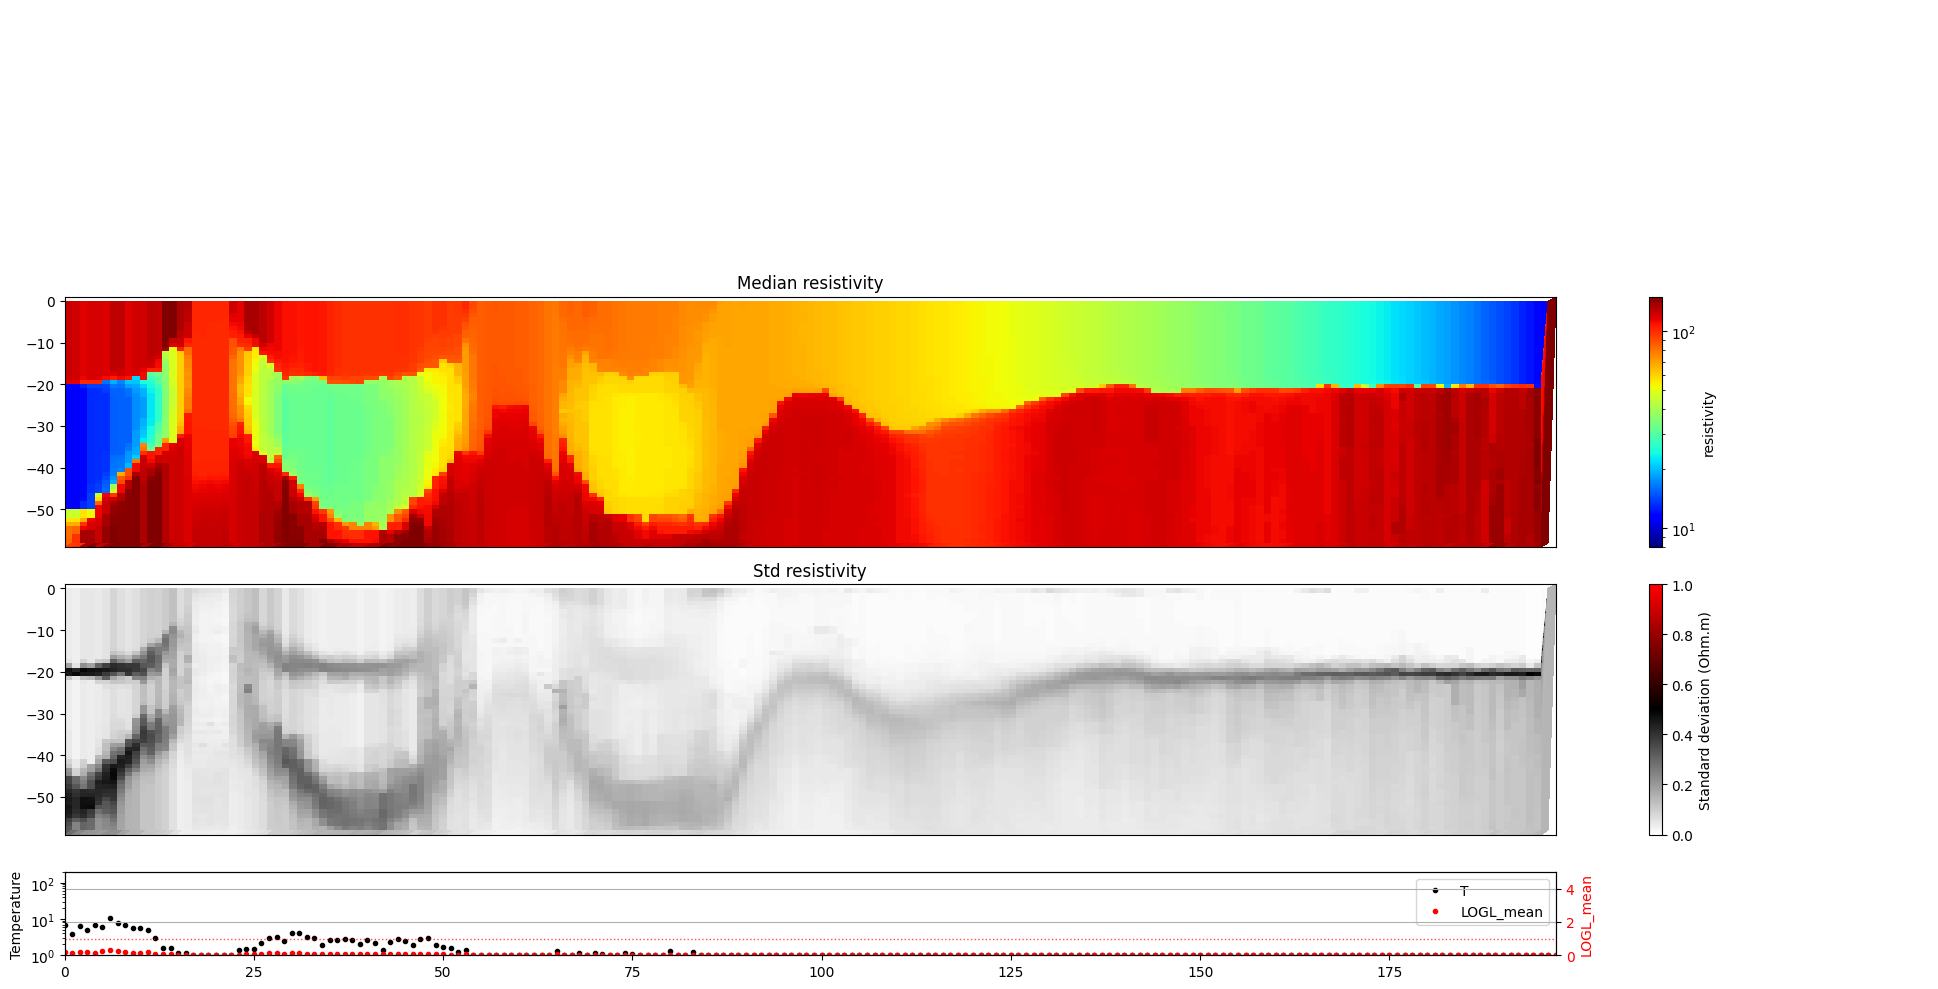

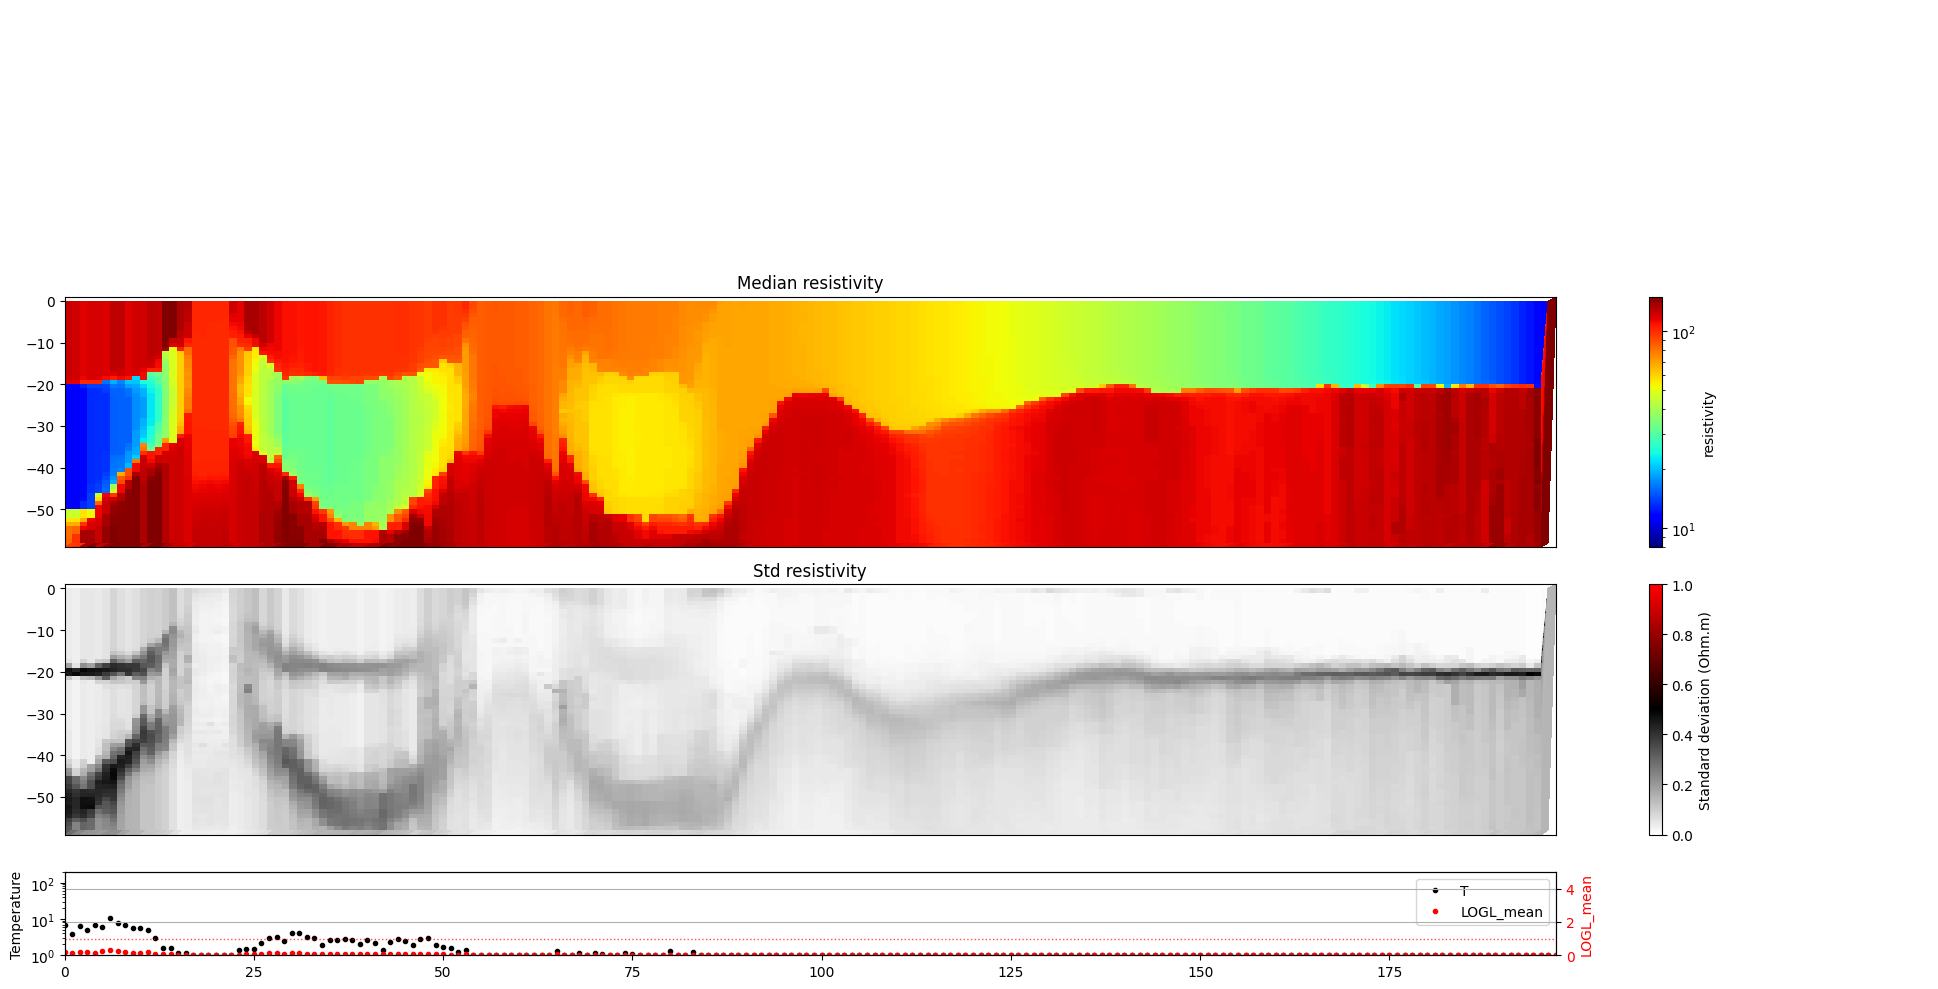

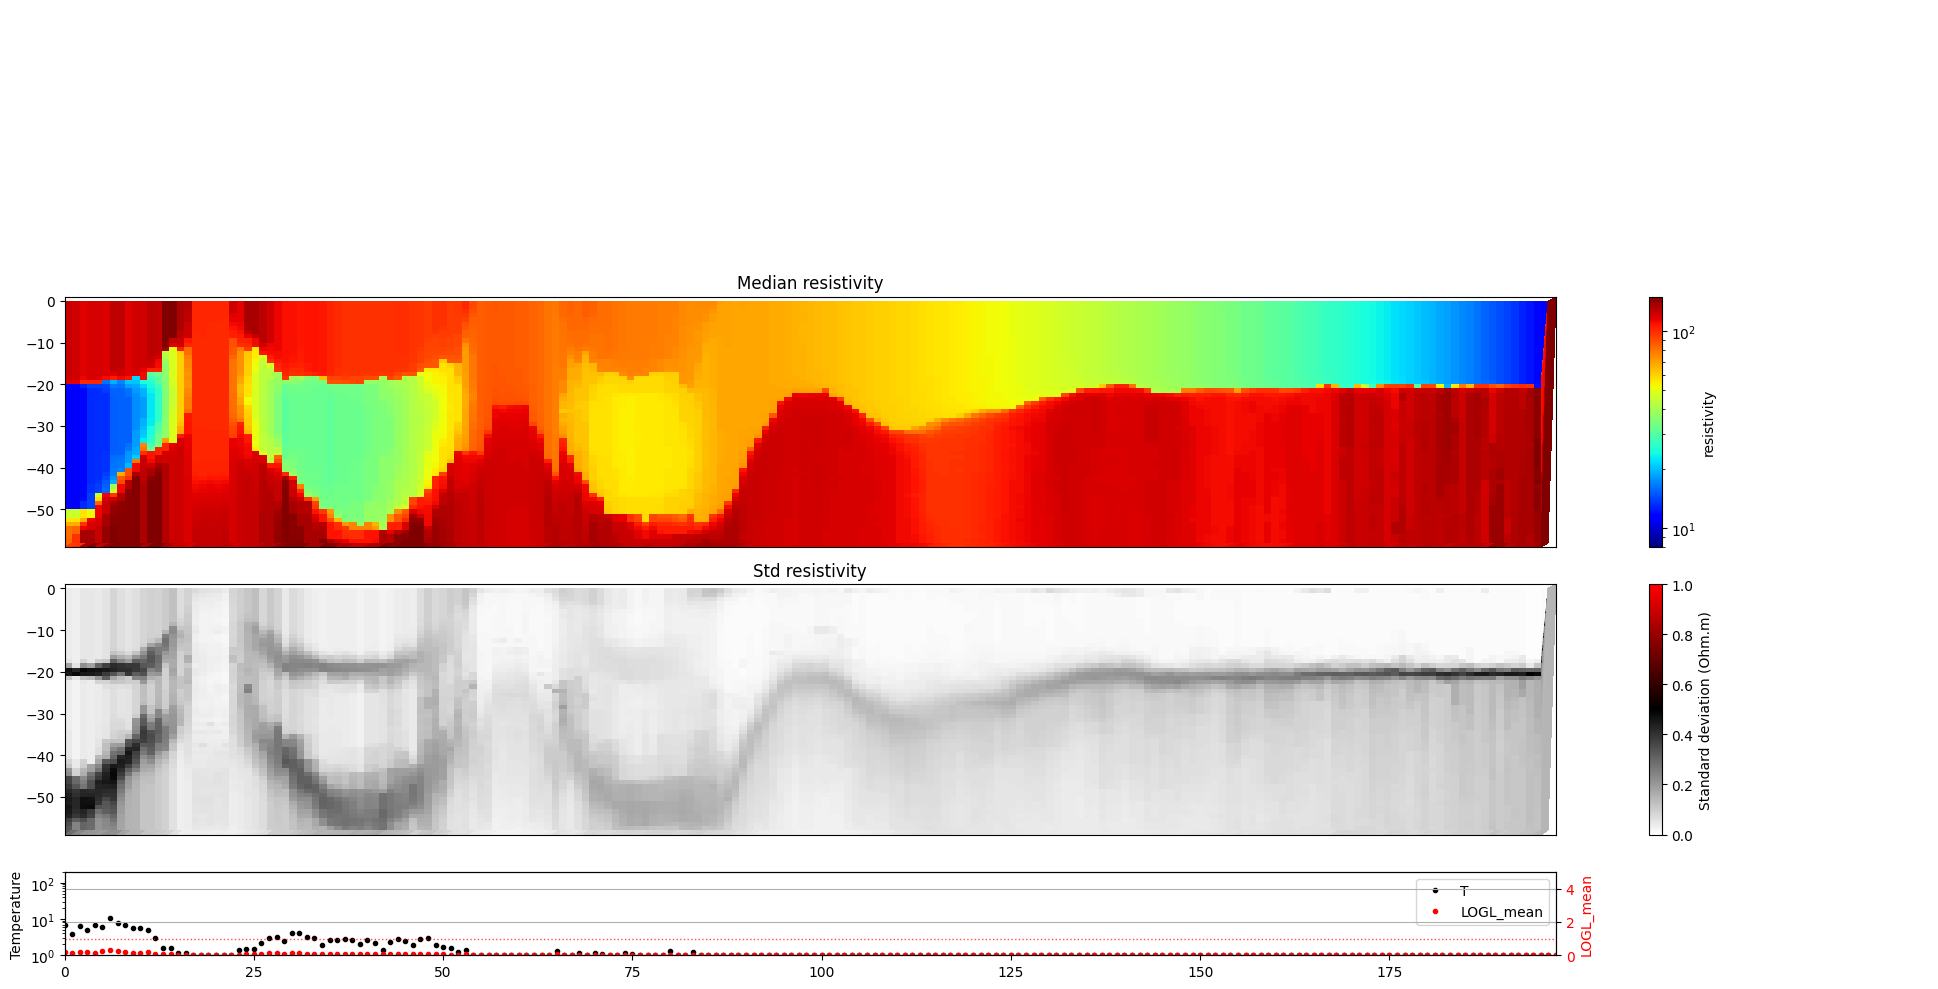

In [15]:
for i in range(len(f_post_log_h5_arr)):
    ig.plot_profile(f_post_log_h5_arr[i],hardcopy=hardcopy,  clim = clim, im=1)

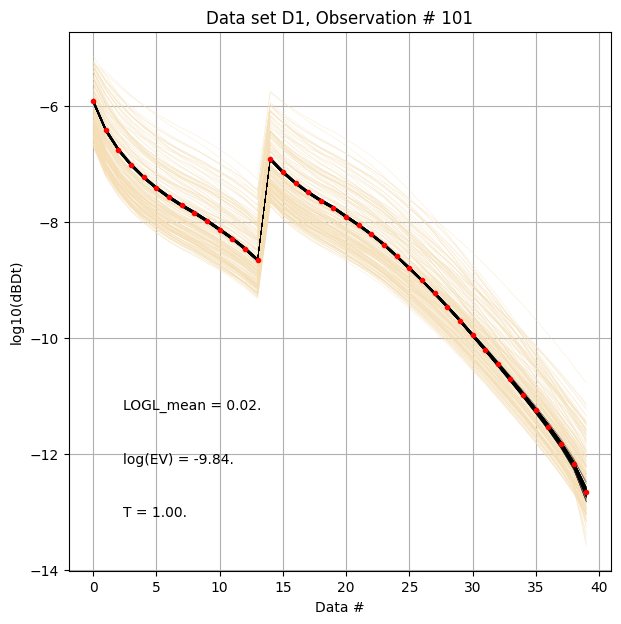

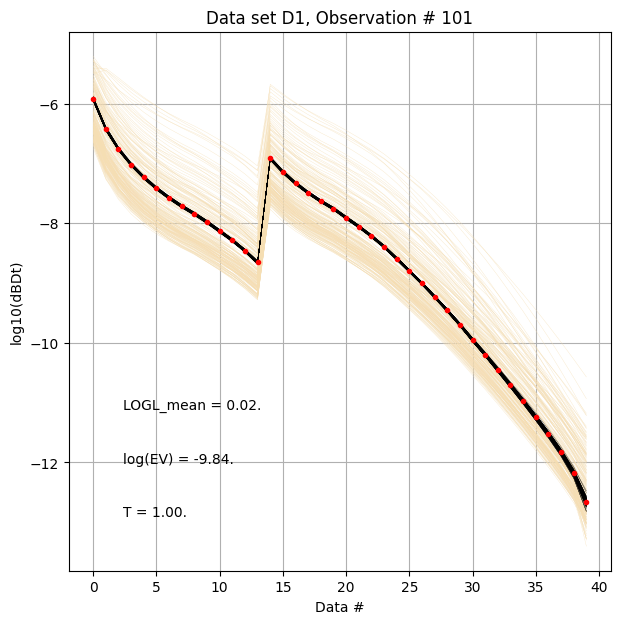

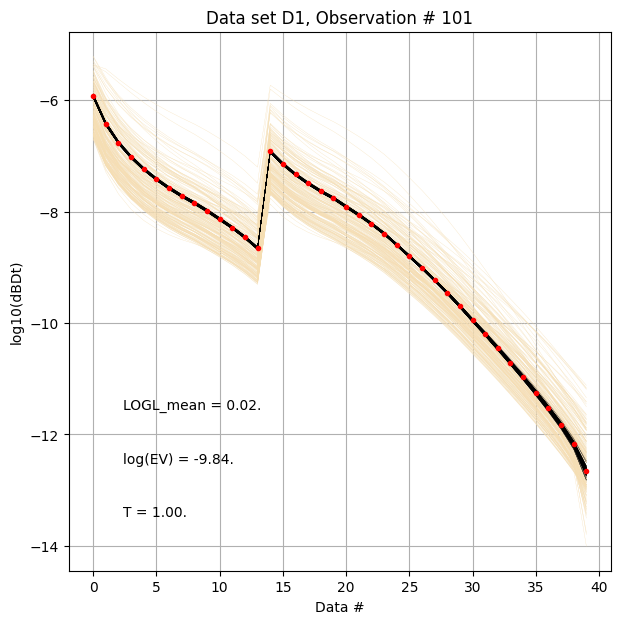

In [16]:

for i in range(len(f_post_log_h5_arr)):
    ig.plot_data_prior_post(f_post_log_h5_arr[i], i_plot=100, hardcopy=hardcopy, is_log=True)